## Import library for the database 

In [1]:
import sqlite3

# Create database connection

In [2]:
conn=sqlite3.connect("mavenfuzzyfactory.db")

## Create cursor object

Cursor object is created for the purpose of executing the queries in the databse such as table creation, data insertion, selection, updation, etc.

In [3]:
cursor=conn.cursor()

## Create database tables

Relational database has been used for the purpose of performing website analysis on the data. It contains data in the form of rows and columns which are known as tuples and attributes respectively.Relation is the table.

In [4]:
table1= '''
  CREATE TABLE website_sessions (
  website_session_id BIGINT NOT NULL PRIMARY KEY,
  created_at DATETIME NOT NULL,
  user_id BIGINT NOT NULL,
  is_repeat_session SMALLINT NOT NULL,
  utm_source VARCHAR(12),
  utm_campaign VARCHAR(20),
  utm_content VARCHAR(15),
  device_type VARCHAR(15),
  http_referer VARCHAR(30)
  );
'''

In [5]:
cursor.execute(table1)

In [6]:
table2='''
  CREATE TABLE website_pageviews (
  website_pageview_id BIGINT NOT NULL,
  created_at DATETIME NOT NULL,
  website_session_id BIGINT  LL,
  pageview_url VARCHAR(50) NOT NULL,
  PRIMARY KEY (website_pageview_id)
);
'''

In [7]:
cursor.execute(table2)

In [8]:
table3='''
CREATE TABLE products (
  product_id BIGINT NOT NULL,
  created_at DATETIME NOT NULL,
  product_name VARCHAR(50) NOT NULL,
  PRIMARY KEY (product_id)
);
'''

In [9]:
cursor.execute(table3)

In [10]:
table4='''
CREATE TABLE orders (
  order_id BIGINT NOT NULL,
  created_at DATETIME NOT NULL,
  website_session_id BIGINT NOT NULL,
  user_id BIGINT NOT NULL,
  primary_product_id SMALLINT  NOT NULL,
  items_purchased SMALLINT NOT NULL,
  price_usd DECIMAL(6,2) NOT NULL,
  cogs_usd DECIMAL(6,2) NOT NULL,
  PRIMARY KEY (order_id),
  FOREIGN KEY (website_session_id) REFERENCES website_sessions(website_session_id)
);
'''

In [11]:
cursor.execute(table4)

In [12]:
table5='''
CREATE TABLE order_items (
  order_item_id BIGINT NOT NULL,
  created_at DATETIME NOT NULL,
  order_id BIGINT NOT NULL,
  product_id SMALLINT NOT NULL,
  is_primary_item SMALLINT NOT NULL,
  price_usd DECIMAL(6,2) NOT NULL,
  cogs_usd DECIMAL(6,2) NOT NULL,
  PRIMARY KEY (order_item_id),
  FOREIGN KEY (order_id) REFERENCES orders (order_id)
);
'''

In [13]:
cursor.execute(table5)

In [14]:
table6='''
CREATE TABLE order_item_refunds (
  order_item_refund_id BIGINT NOT NULL,
  created_at DATETIME NOT NULL,
  order_item_id BIGINT NOT NULL,
  order_id BIGINT NOT NULL,
  refund_amount_usd DECIMAL(6,2) NOT NULL,
  PRIMARY KEY (order_item_refund_id),
  FOREIGN KEY(order_id) REFERENCES order_items(order_id),
  FOREIGN KEY (order_item_id) REFERENCES order_items(order_item_id)
);
'''

In [15]:
cursor.execute(table6)

## Data insertion

For inserting data in the relation, firstly a list has been created for each relation, then using executemany() function, multiple data items are inserted into the table according to the column name and data type. The statements are executed with the help of cursor function.

In [16]:
list1=[
(1,'2012-03-19 08:04:16',1,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2,'2012-03-19 08:16:49',2,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3,'2012-03-19 08:26:55',3,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4,'2012-03-19 08:37:33',4,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(5,'2012-03-19 09:00:55',5,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(6,'2012-03-19 09:05:46',6,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(7,'2012-03-19 09:06:27',7,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(8,'2012-03-19 09:17:17',8,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(9,'2012-03-19 09:27:56',9,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(10,'2012-03-19 09:35:37',10,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(11,'2012-03-19 09:37:42',11,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(12,'2012-03-19 09:39:57',12,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(13,'2012-03-19 09:45:29',13,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(14,'2012-03-19 09:45:47',14,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(15,'2012-03-19 09:57:14',15,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(16,'2012-03-19 10:01:35',16,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(17,'2012-03-19 10:14:34',17,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(18,'2012-03-19 10:16:57',18,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(19,'2012-03-19 10:17:38',19,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(20,'2012-03-19 10:22:58',20,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(21,'2012-03-19 10:51:38',21,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(22,'2012-03-19 10:54:55',22,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(23,'2012-03-19 10:59:03',23,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(24,'2012-03-19 11:08:58',24,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(25,'2012-03-19 11:16:42',25,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(26,'2012-03-19 11:20:14',26,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(27,'2012-03-19 11:22:58',27,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(28,'2012-03-19 11:24:59',28,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(29,'2012-03-19 11:33:47',29,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(30,'2012-03-19 11:43:21',30,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(31,'2012-03-19 11:46:37',31,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(32,'2012-03-19 11:53:24',32,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(33,'2012-03-19 11:58:52',33,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(34,'2012-03-19 12:01:28',34,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(35,'2012-03-19 12:02:18',35,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(36,'2012-03-19 12:07:36',36,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(37,'2012-03-19 12:09:24',37,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(38,'2012-03-19 12:23:11',38,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(39,'2012-03-19 12:35:54',39,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(40,'2012-03-19 12:45:10',40,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(41,'2012-03-19 12:55:38',41,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(42,'2012-03-19 12:55:57',42,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(43,'2012-03-19 12:57:35',43,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(44,'2012-03-19 13:10:20',44,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(45,'2012-03-19 13:11:43',45,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(46,'2012-03-19 13:14:49',46,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(47,'2012-03-19 13:19:35',47,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(48,'2012-03-19 13:25:51',48,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(49,'2012-03-19 13:29:52',49,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(50,'2012-03-19 13:30:31',50,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(51,'2012-03-19 13:37:56',51,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(52,'2012-03-19 13:39:26',52,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(53,'2012-03-19 14:01:42',53,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(54,'2012-03-19 14:12:09',54,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(55,'2012-03-19 14:15:08',55,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(56,'2012-03-19 14:20:38',56,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(57,'2012-03-19 14:23:51',57,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(58,'2012-03-19 14:42:54',58,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(59,'2012-03-19 14:51:15',59,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(60,'2012-03-19 14:58:46',60,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(61,'2012-03-19 15:01:00',61,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(62,'2012-03-19 15:03:11',62,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(63,'2012-03-19 15:03:57',63,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(64,'2012-03-19 15:05:50',64,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(65,'2012-03-19 15:13:54',65,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(66,'2012-03-19 15:20:18',66,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(67,'2012-03-19 15:29:46',67,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(68,'2012-03-19 15:33:50',68,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(69,'2012-03-19 15:56:47',69,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(70,'2012-03-19 16:03:21',70,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(71,'2012-03-19 16:03:55',71,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(72,'2012-03-19 16:20:19',72,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(73,'2012-03-19 16:32:16',73,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(74,'2012-03-19 16:38:30',74,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(75,'2012-03-19 16:39:59',75,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(76,'2012-03-19 16:47:52',76,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(77,'2012-03-19 16:55:37',77,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(78,'2012-03-19 16:56:43',78,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(79,'2012-03-19 16:59:12',79,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(80,'2012-03-19 17:02:42',80,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(81,'2012-03-19 17:05:02',81,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(82,'2012-03-19 17:06:31',82,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(83,'2012-03-19 17:08:45',83,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(84,'2012-03-19 17:20:04',84,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(85,'2012-03-19 17:23:41',85,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(86,'2012-03-19 17:39:03',86,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(87,'2012-03-19 17:43:37',87,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(88,'2012-03-19 17:49:08',88,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(89,'2012-03-19 17:56:53',89,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(90,'2012-03-19 17:58:38',90,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(91,'2012-03-19 18:06:16',91,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(92,'2012-03-19 18:07:02',92,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(93,'2012-03-19 18:08:27',93,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(94,'2012-03-19 18:09:58',94,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(95,'2012-03-19 18:11:39',95,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(96,'2012-03-19 18:20:34',96,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(97,'2012-03-19 18:29:05',97,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(98,'2012-03-19 18:31:53',98,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(99,'2012-03-19 18:40:42',99,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(100,'2012-03-19 18:53:45',100,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(101,'2012-03-19 18:59:38',101,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(102,'2012-03-19 19:01:33',102,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(103,'2012-03-19 19:11:54',103,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(104,'2012-03-19 19:14:04',104,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(105,'2012-03-19 19:28:17',105,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(106,'2012-03-19 19:30:25',106,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(107,'2012-03-19 19:34:54',107,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(108,'2012-03-19 19:37:11',108,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(109,'2012-03-19 19:39:36',109,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(110,'2012-03-19 19:48:14',110,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(111,'2012-03-19 20:02:14',111,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(112,'2012-03-19 20:08:20',112,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(113,'2012-03-19 20:10:52',113,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(114,'2012-03-19 20:23:35',114,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(115,'2012-03-19 20:25:21',115,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(116,'2012-03-19 20:29:39',116,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(117,'2012-03-19 20:58:37',117,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(118,'2012-03-19 21:01:15',118,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(119,'2012-03-19 21:22:09',119,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(120,'2012-03-19 21:30:49',120,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(121,'2012-03-19 21:32:08',121,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(122,'2012-03-19 21:41:17',122,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(123,'2012-03-19 22:00:05',123,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(124,'2012-03-19 22:09:49',124,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(125,'2012-03-19 22:18:00',125,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(126,'2012-03-19 22:19:11',126,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(127,'2012-03-19 22:22:24',127,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(128,'2012-03-19 22:24:02',128,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(129,'2012-03-19 22:31:05',129,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(130,'2012-03-19 22:31:36',130,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(131,'2012-03-19 23:28:33',131,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(132,'2012-03-19 23:41:36',132,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(133,'2012-03-19 23:44:23',133,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(134,'2012-03-19 23:45:14',134,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(135,'2012-03-19 23:52:18',135,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(136,'2012-03-19 23:54:44',136,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(137,'2012-03-19 23:55:20',137,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(138,'2012-03-20 00:22:20',138,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(139,'2012-03-20 01:12:11',139,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(140,'2012-03-20 01:28:23',140,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(141,'2012-03-20 01:32:34',141,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(142,'2012-03-20 01:35:47',142,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(143,'2012-03-20 02:12:02',143,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(144,'2012-03-20 02:40:42',144,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(145,'2012-03-20 03:30:54',145,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(146,'2012-03-20 05:35:30',146,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(147,'2012-03-20 06:21:56',147,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(148,'2012-03-20 07:18:18',148,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(149,'2012-03-20 07:42:52',149,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(150,'2012-03-20 08:09:54',150,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(151,'2012-03-20 08:19:02',151,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(152,'2012-03-20 08:19:22',152,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(153,'2012-03-20 08:28:03',153,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(154,'2012-03-20 08:30:10',154,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(155,'2012-03-20 08:38:28',155,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(156,'2012-03-20 08:59:58',156,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(157,'2012-03-20 09:00:16',157,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(158,'2012-03-20 09:02:11',158,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(159,'2012-03-20 09:09:26',159,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(160,'2012-03-20 09:23:55',160,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(161,'2012-03-20 09:30:07',161,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(162,'2012-03-20 09:40:56',162,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(163,'2012-03-20 10:09:03',163,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(164,'2012-03-20 10:12:30',164,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(165,'2012-03-20 10:16:01',165,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(166,'2012-03-20 10:22:17',166,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(167,'2012-03-20 10:26:00',167,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(168,'2012-03-20 10:34:01',168,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(169,'2012-03-20 10:37:57',169,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(170,'2012-03-20 10:41:41',170,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(171,'2012-03-20 10:44:23',171,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(172,'2012-03-20 10:48:42',172,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(173,'2012-03-20 10:53:28',173,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(174,'2012-03-20 10:59:23',174,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(175,'2012-03-20 11:12:46',175,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(176,'2012-03-20 11:15:05',176,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(177,'2012-03-20 11:15:15',177,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(178,'2012-03-20 11:29:00',178,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(179,'2012-03-20 11:31:03',179,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(180,'2012-03-20 11:35:18',180,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(181,'2012-03-20 11:37:53',181,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(182,'2012-03-20 11:54:25',182,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(183,'2012-03-20 11:55:12',183,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(184,'2012-03-20 12:00:45',184,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(185,'2012-03-20 12:04:21',185,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(186,'2012-03-20 12:06:58',186,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(187,'2012-03-20 12:09:05',187,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(188,'2012-03-20 12:09:14',188,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(189,'2012-03-20 12:17:45',189,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(190,'2012-03-20 12:21:14',190,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(191,'2012-03-20 12:21:24',191,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(192,'2012-03-20 12:24:50',192,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(193,'2012-03-20 12:26:29',193,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(194,'2012-03-20 12:28:32',194,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(195,'2012-03-20 12:39:07',195,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(196,'2012-03-20 12:42:51',196,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(197,'2012-03-20 12:48:08',197,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(198,'2012-03-20 12:51:01',198,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(199,'2012-03-20 13:12:04',199,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(200,'2012-03-20 13:15:35',200,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(201,'2012-03-20 13:30:48',201,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(202,'2012-03-20 13:32:15',202,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(203,'2012-03-20 13:45:10',203,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(204,'2012-03-20 13:47:15',204,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(205,'2012-03-20 13:48:36',205,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(206,'2012-03-20 13:49:16',206,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(207,'2012-03-20 13:58:38',207,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(208,'2012-03-20 14:03:04',208,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(209,'2012-03-20 14:09:31',209,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(210,'2012-03-20 14:13:57',210,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(211,'2012-03-20 14:22:06',211,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(212,'2012-03-20 14:33:41',212,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(213,'2012-03-20 14:36:16',213,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(214,'2012-03-20 14:41:07',214,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(215,'2012-03-20 14:42:35',215,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(216,'2012-03-20 14:42:56',216,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(217,'2012-03-20 14:43:30',217,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(218,'2012-03-20 14:52:07',218,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(219,'2012-03-20 14:54:17',219,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(220,'2012-03-20 15:10:28',220,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(221,'2012-03-20 15:24:21',221,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(222,'2012-03-20 15:25:38',222,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(223,'2012-03-20 15:25:41',223,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(224,'2012-03-20 15:30:55',224,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(225,'2012-03-20 15:35:04',225,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(226,'2012-03-20 15:37:17',226,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(227,'2012-03-20 15:38:07',227,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(228,'2012-03-20 15:40:02',228,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(229,'2012-03-20 15:40:29',229,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(230,'2012-03-20 15:41:52',230,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(231,'2012-03-20 15:46:40',231,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(232,'2012-03-20 15:54:22',232,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(233,'2012-03-20 16:04:32',233,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(234,'2012-03-20 16:06:32',234,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(235,'2012-03-20 16:07:59',235,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(236,'2012-03-20 16:17:19',236,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(237,'2012-03-20 16:19:26',237,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(238,'2012-03-20 16:21:53',238,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(239,'2012-03-20 16:38:04',239,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(240,'2012-03-20 16:39:45',240,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(241,'2012-03-20 16:46:01',241,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(242,'2012-03-20 16:47:02',242,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(243,'2012-03-20 16:55:31',243,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(244,'2012-03-20 17:12:39',244,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(245,'2012-03-20 17:17:09',245,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(246,'2012-03-20 17:17:58',246,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(247,'2012-03-20 17:51:31',247,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(248,'2012-03-20 17:55:13',248,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(249,'2012-03-20 18:05:37',249,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(250,'2012-03-20 18:07:26',250,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(251,'2012-03-20 18:11:14',251,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(252,'2012-03-20 18:15:48',252,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(253,'2012-03-20 18:22:01',253,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(254,'2012-03-20 18:29:20',254,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(255,'2012-03-20 18:39:29',255,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(256,'2012-03-20 18:39:39',256,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(257,'2012-03-20 18:51:03',257,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(258,'2012-03-20 18:54:14',258,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(259,'2012-03-20 18:56:27',259,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(260,'2012-03-20 19:26:01',260,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(261,'2012-03-20 19:29:45',261,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(262,'2012-03-20 19:30:41',262,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(263,'2012-03-20 19:44:50',263,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(264,'2012-03-20 19:46:49',264,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(265,'2012-03-20 19:47:23',265,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(266,'2012-03-20 19:56:00',266,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(267,'2012-03-20 19:58:41',267,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(268,'2012-03-20 20:06:39',268,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(269,'2012-03-20 20:08:27',269,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(270,'2012-03-20 20:16:26',270,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(271,'2012-03-20 20:16:38',271,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(272,'2012-03-20 20:30:41',272,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(273,'2012-03-20 20:36:12',273,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(274,'2012-03-20 20:38:48',274,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(275,'2012-03-20 20:41:53',275,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(276,'2012-03-20 20:42:00',276,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(277,'2012-03-20 20:42:09',277,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(278,'2012-03-20 21:01:34',278,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(279,'2012-03-20 21:03:49',279,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(280,'2012-03-20 21:05:15',280,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(281,'2012-03-20 21:11:48',281,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(282,'2012-03-20 21:24:43',282,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(283,'2012-03-20 21:26:18',283,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(284,'2012-03-20 22:05:47',284,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(285,'2012-03-20 22:06:52',285,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(286,'2012-03-20 22:10:54',286,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(287,'2012-03-20 22:13:08',287,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(288,'2012-03-20 22:13:45',288,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(289,'2012-03-20 22:16:17',289,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(290,'2012-03-20 22:34:57',290,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(291,'2012-03-20 22:35:15',291,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(292,'2012-03-20 22:52:38',292,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(293,'2012-03-20 23:02:02',293,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(294,'2012-03-20 23:17:59',294,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(295,'2012-03-20 23:23:40',295,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(296,'2012-03-20 23:39:47',296,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(297,'2012-03-20 23:47:04',297,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(298,'2012-03-20 23:48:57',298,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(299,'2012-03-21 00:14:36',299,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(300,'2012-03-21 00:34:13',300,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(301,'2012-03-21 00:47:33',301,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(302,'2012-03-21 01:02:44',302,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(303,'2012-03-21 01:44:48',303,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(304,'2012-03-21 02:16:10',304,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(305,'2012-03-21 02:22:16',305,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(306,'2012-03-21 02:55:51',306,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(307,'2012-03-21 03:12:20',307,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(308,'2012-03-21 03:12:45',308,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(309,'2012-03-21 03:27:16',309,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(310,'2012-03-21 03:48:00',310,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(311,'2012-03-21 04:03:19',311,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(312,'2012-03-21 04:27:56',312,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(313,'2012-03-21 04:28:31',313,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(314,'2012-03-21 05:26:17',314,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(315,'2012-03-21 05:49:04',315,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(316,'2012-03-21 06:12:02',316,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(317,'2012-03-21 06:30:14',317,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(318,'2012-03-21 06:42:14',318,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(319,'2012-03-21 06:45:06',319,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(320,'2012-03-21 06:53:16',320,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(321,'2012-03-21 07:11:43',321,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(322,'2012-03-21 07:25:39',322,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(323,'2012-03-21 07:27:31',323,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(324,'2012-03-21 07:33:32',324,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(325,'2012-03-21 07:37:52',325,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(326,'2012-03-21 07:50:28',326,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(327,'2012-03-21 07:58:18',327,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(328,'2012-03-21 07:59:11',328,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(329,'2012-03-21 08:04:39',329,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(330,'2012-03-21 08:17:16',330,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(331,'2012-03-21 08:23:19',331,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(332,'2012-03-21 08:29:38',332,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(333,'2012-03-21 08:35:42',333,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(334,'2012-03-21 08:44:16',334,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(335,'2012-03-21 08:51:40',335,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(336,'2012-03-21 08:56:05',336,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(337,'2012-03-21 09:08:16',337,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(338,'2012-03-21 09:09:33',338,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(339,'2012-03-21 09:14:54',339,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(340,'2012-03-21 09:15:26',340,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(341,'2012-03-21 09:24:52',341,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(342,'2012-03-21 09:28:07',342,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(343,'2012-03-21 09:29:40',343,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(344,'2012-03-21 09:34:23',344,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(345,'2012-03-21 09:42:19',345,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(346,'2012-03-21 09:55:03',346,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(347,'2012-03-21 10:02:11',347,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(348,'2012-03-21 10:02:28',348,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(349,'2012-03-21 10:02:59',349,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(350,'2012-03-21 10:07:35',350,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(351,'2012-03-21 10:08:38',351,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(352,'2012-03-21 10:13:36',352,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(353,'2012-03-21 10:15:51',353,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(354,'2012-03-21 10:16:52',354,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(355,'2012-03-21 10:17:54',355,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(356,'2012-03-21 10:23:42',356,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(357,'2012-03-21 10:27:07',357,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(358,'2012-03-21 10:30:07',358,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(359,'2012-03-21 10:37:22',359,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(360,'2012-03-21 10:42:30',360,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(361,'2012-03-21 10:53:57',361,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(362,'2012-03-21 10:58:57',362,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(363,'2012-03-21 11:03:00',363,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(364,'2012-03-21 11:10:12',364,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(365,'2012-03-21 11:11:14',365,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(366,'2012-03-21 11:11:56',366,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(367,'2012-03-21 11:17:41',367,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(368,'2012-03-21 11:23:31',368,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(369,'2012-03-21 11:29:58',369,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(370,'2012-03-21 11:34:30',370,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(371,'2012-03-21 11:36:38',371,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(372,'2012-03-21 11:38:51',372,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(373,'2012-03-21 11:43:54',373,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(374,'2012-03-21 11:45:46',374,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(375,'2012-03-21 11:46:13',375,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(376,'2012-03-21 12:00:29',376,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(377,'2012-03-21 12:03:50',377,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(378,'2012-03-21 12:08:18',378,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(379,'2012-03-21 12:11:01',379,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(380,'2012-03-21 12:18:53',380,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(381,'2012-03-21 12:25:40',381,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(382,'2012-03-21 12:26:36',382,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(383,'2012-03-21 12:34:06',383,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(384,'2012-03-21 12:42:29',384,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(385,'2012-03-21 12:55:20',385,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(386,'2012-03-21 13:01:56',386,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(387,'2012-03-21 13:12:56',387,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(388,'2012-03-21 13:27:08',388,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(389,'2012-03-21 13:40:13',389,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(390,'2012-03-21 13:45:59',390,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(391,'2012-03-21 13:47:26',391,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(392,'2012-03-21 13:50:57',392,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(393,'2012-03-21 13:53:06',393,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(394,'2012-03-21 13:54:34',394,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(395,'2012-03-21 13:55:23',395,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(396,'2012-03-21 13:55:42',396,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(397,'2012-03-21 13:59:02',397,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(398,'2012-03-21 14:00:43',398,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(399,'2012-03-21 14:03:06',399,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(400,'2012-03-21 14:04:55',400,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(401,'2012-03-21 14:18:57',401,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(402,'2012-03-21 14:27:53',402,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(403,'2012-03-21 14:30:42',403,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(404,'2012-03-21 14:33:23',404,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(405,'2012-03-21 14:34:48',405,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(406,'2012-03-21 14:45:11',406,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(407,'2012-03-21 14:54:54',407,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(408,'2012-03-21 15:01:10',408,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(409,'2012-03-21 15:06:07',409,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(410,'2012-03-21 15:10:48',410,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(411,'2012-03-21 15:12:36',411,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(412,'2012-03-21 15:21:32',412,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(413,'2012-03-21 15:25:32',413,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(414,'2012-03-21 15:27:38',414,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(415,'2012-03-21 15:28:11',415,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(416,'2012-03-21 15:30:50',416,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(417,'2012-03-21 15:30:59',417,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(418,'2012-03-21 15:34:22',418,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(419,'2012-03-21 15:35:18',419,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(420,'2012-03-21 15:50:20',420,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(421,'2012-03-21 15:54:11',421,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(422,'2012-03-21 16:03:10',422,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(423,'2012-03-21 16:03:32',423,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(424,'2012-03-21 16:17:35',424,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(425,'2012-03-21 16:17:37',425,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(426,'2012-03-21 16:18:44',426,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(427,'2012-03-21 16:23:29',427,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(428,'2012-03-21 16:23:54',428,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(429,'2012-03-21 16:27:53',429,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(430,'2012-03-21 16:29:09',430,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(431,'2012-03-21 16:40:09',431,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(432,'2012-03-21 16:40:44',432,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(433,'2012-03-21 16:50:15',433,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(434,'2012-03-21 16:51:07',434,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(435,'2012-03-21 16:55:07',435,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(436,'2012-03-21 17:01:36',436,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(437,'2012-03-21 17:02:33',437,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(438,'2012-03-21 17:02:40',438,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(439,'2012-03-21 17:07:05',439,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(440,'2012-03-21 17:21:32',440,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(441,'2012-03-21 17:24:36',441,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(442,'2012-03-21 17:26:56',442,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(443,'2012-03-21 17:29:12',443,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(444,'2012-03-21 17:31:05',444,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(445,'2012-03-21 17:33:26',445,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(446,'2012-03-21 17:46:05',446,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(447,'2012-03-21 17:48:21',447,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(448,'2012-03-21 18:00:23',448,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(449,'2012-03-21 18:00:54',449,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(450,'2012-03-21 18:14:01',450,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(451,'2012-03-21 18:15:07',451,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(452,'2012-03-21 18:15:19',452,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(453,'2012-03-21 18:18:18',453,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(454,'2012-03-21 18:20:18',454,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(455,'2012-03-21 18:30:35',455,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(456,'2012-03-21 18:44:08',456,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(457,'2012-03-21 18:45:29',457,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(458,'2012-03-21 18:50:32',458,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(459,'2012-03-21 18:53:45',459,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(460,'2012-03-21 19:08:09',460,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(461,'2012-03-21 19:12:35',461,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(462,'2012-03-21 19:48:12',462,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(463,'2012-03-21 19:51:46',463,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(464,'2012-03-21 19:53:25',464,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(465,'2012-03-21 20:08:13',465,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(466,'2012-03-21 20:18:20',466,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(467,'2012-03-21 20:23:28',467,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(468,'2012-03-21 20:33:29',468,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(469,'2012-03-21 20:36:59',469,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(470,'2012-03-21 20:40:09',470,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(471,'2012-03-21 20:40:57',471,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(472,'2012-03-21 20:41:45',472,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(473,'2012-03-21 20:42:19',473,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(474,'2012-03-21 20:49:59',474,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(475,'2012-03-21 20:56:32',475,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(476,'2012-03-21 21:01:57',476,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(477,'2012-03-21 21:02:22',477,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(478,'2012-03-21 21:15:58',478,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(479,'2012-03-21 21:25:25',479,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(480,'2012-03-21 21:25:58',480,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(481,'2012-03-21 21:26:03',481,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(482,'2012-03-21 21:27:17',482,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(483,'2012-03-21 22:06:19',483,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(484,'2012-03-21 22:19:18',484,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(485,'2012-03-21 22:24:26',485,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(486,'2012-03-21 22:50:02',486,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(487,'2012-03-21 23:17:50',487,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(488,'2012-03-21 23:30:09',488,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(489,'2012-03-21 23:50:37',489,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(490,'2012-03-22 00:08:50',490,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(491,'2012-03-22 00:37:07',491,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(492,'2012-03-22 01:14:52',492,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(493,'2012-03-22 01:18:08',493,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(494,'2012-03-22 01:31:51',494,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(495,'2012-03-22 01:39:32',495,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(496,'2012-03-22 01:54:22',496,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(497,'2012-03-22 02:01:05',497,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(498,'2012-03-22 02:15:43',498,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(499,'2012-03-22 02:16:18',499,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(500,'2012-03-22 02:57:12',500,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(501,'2012-03-22 04:19:47',501,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(502,'2012-03-22 04:31:34',502,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(503,'2012-03-22 04:57:32',503,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(504,'2012-03-22 05:04:28',504,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(505,'2012-03-22 05:36:22',505,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(506,'2012-03-22 05:38:43',506,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(507,'2012-03-22 06:02:32',507,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(508,'2012-03-22 06:19:13',508,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(509,'2012-03-22 06:27:59',509,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(510,'2012-03-22 06:51:18',510,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(511,'2012-03-22 07:14:05',511,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(512,'2012-03-22 07:17:59',512,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(513,'2012-03-22 07:18:42',513,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(514,'2012-03-22 07:25:26',514,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(515,'2012-03-22 07:32:44',515,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(516,'2012-03-22 07:41:41',516,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(517,'2012-03-22 07:53:22',517,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(518,'2012-03-22 08:00:12',518,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(519,'2012-03-22 08:05:45',519,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(520,'2012-03-22 08:25:04',520,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(521,'2012-03-22 08:36:41',521,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(522,'2012-03-22 08:46:20',522,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(523,'2012-03-22 08:46:24',523,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(524,'2012-03-22 08:52:42',524,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(525,'2012-03-22 08:52:58',525,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(526,'2012-03-22 08:59:32',526,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(527,'2012-03-22 09:03:28',527,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(528,'2012-03-22 09:08:14',528,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(529,'2012-03-22 09:20:56',529,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(530,'2012-03-22 09:31:02',530,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(531,'2012-03-22 09:31:46',531,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(532,'2012-03-22 09:34:17',532,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(533,'2012-03-22 09:39:36',533,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(534,'2012-03-22 09:43:21',534,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(535,'2012-03-22 09:46:50',535,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(536,'2012-03-22 09:47:19',536,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(537,'2012-03-22 09:48:41',537,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(538,'2012-03-22 09:51:22',538,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(539,'2012-03-22 09:58:43',539,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(540,'2012-03-22 10:02:58',540,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(541,'2012-03-22 10:22:58',541,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(542,'2012-03-22 10:23:41',542,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(543,'2012-03-22 10:31:49',543,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(544,'2012-03-22 10:47:14',544,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(545,'2012-03-22 10:49:14',545,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(546,'2012-03-22 11:00:44',546,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(547,'2012-03-22 11:21:39',547,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(548,'2012-03-22 11:36:35',548,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(549,'2012-03-22 11:57:51',549,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(550,'2012-03-22 11:58:46',550,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(551,'2012-03-22 12:00:54',551,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(552,'2012-03-22 12:03:59',552,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(553,'2012-03-22 12:09:30',553,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(554,'2012-03-22 12:22:38',554,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(555,'2012-03-22 12:24:49',555,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(556,'2012-03-22 12:27:34',556,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(557,'2012-03-22 12:34:20',557,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(558,'2012-03-22 12:39:27',558,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(559,'2012-03-22 12:42:31',559,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(560,'2012-03-22 12:56:14',560,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(561,'2012-03-22 13:03:04',561,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(562,'2012-03-22 13:04:39',562,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(563,'2012-03-22 13:06:34',563,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(564,'2012-03-22 13:08:33',564,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(565,'2012-03-22 13:08:45',565,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(566,'2012-03-22 13:16:54',566,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(567,'2012-03-22 13:31:33',567,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(568,'2012-03-22 13:31:35',568,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(569,'2012-03-22 13:38:07',569,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(570,'2012-03-22 13:41:12',570,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(571,'2012-03-22 13:42:00',571,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(572,'2012-03-22 13:43:03',572,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(573,'2012-03-22 13:45:26',573,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(574,'2012-03-22 13:45:27',574,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(575,'2012-03-22 13:47:54',575,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(576,'2012-03-22 13:50:48',576,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(577,'2012-03-22 13:54:43',577,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(578,'2012-03-22 13:57:52',578,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(579,'2012-03-22 13:58:34',579,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(580,'2012-03-22 14:10:00',580,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(581,'2012-03-22 14:15:38',581,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(582,'2012-03-22 14:22:53',582,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(583,'2012-03-22 14:25:55',583,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(584,'2012-03-22 14:42:11',584,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(585,'2012-03-22 14:47:21',585,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(586,'2012-03-22 14:52:21',586,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(587,'2012-03-22 15:00:51',587,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(588,'2012-03-22 15:07:32',588,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(589,'2012-03-22 15:23:36',589,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(590,'2012-03-22 15:43:44',590,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(591,'2012-03-22 15:50:13',591,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(592,'2012-03-22 15:50:39',592,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(593,'2012-03-22 15:51:05',593,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(594,'2012-03-22 15:52:18',594,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(595,'2012-03-22 15:52:23',595,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(596,'2012-03-22 15:54:12',596,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(597,'2012-03-22 15:59:51',597,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(598,'2012-03-22 16:03:28',598,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(599,'2012-03-22 16:13:26',599,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(600,'2012-03-22 16:19:29',600,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(601,'2012-03-22 16:30:18',601,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(602,'2012-03-22 16:31:41',602,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(603,'2012-03-22 16:37:32',603,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(604,'2012-03-22 16:46:01',604,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(605,'2012-03-22 16:49:11',605,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(606,'2012-03-22 16:51:14',606,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(607,'2012-03-22 16:54:44',607,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(608,'2012-03-22 17:02:26',608,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(609,'2012-03-22 17:03:58',609,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(610,'2012-03-22 17:09:46',610,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(611,'2012-03-22 17:20:47',611,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(612,'2012-03-22 17:26:32',612,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(613,'2012-03-22 17:29:49',613,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(614,'2012-03-22 17:30:17',614,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(615,'2012-03-22 17:30:44',615,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(616,'2012-03-22 17:31:38',616,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(617,'2012-03-22 17:43:16',617,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(618,'2012-03-22 17:48:33',618,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(619,'2012-03-22 17:52:16',619,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(620,'2012-03-22 17:56:35',620,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(621,'2012-03-22 17:56:37',621,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(622,'2012-03-22 17:57:42',622,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(623,'2012-03-22 18:11:37',623,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(624,'2012-03-22 18:23:18',624,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(625,'2012-03-22 18:31:32',625,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(626,'2012-03-22 18:33:51',626,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(627,'2012-03-22 18:33:53',627,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(628,'2012-03-22 18:42:37',628,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(629,'2012-03-22 19:08:53',629,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(630,'2012-03-22 19:16:52',630,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(631,'2012-03-22 19:20:06',631,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(632,'2012-03-22 19:28:03',632,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(633,'2012-03-22 19:36:44',633,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(634,'2012-03-22 19:45:51',634,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(635,'2012-03-22 19:48:08',635,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(636,'2012-03-22 19:50:44',636,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(637,'2012-03-22 19:52:11',637,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(638,'2012-03-22 19:56:06',638,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(639,'2012-03-22 20:10:25',639,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(640,'2012-03-22 20:13:20',640,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(641,'2012-03-22 20:40:40',641,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(642,'2012-03-22 20:59:52',642,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(643,'2012-03-22 21:06:00',643,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(644,'2012-03-22 21:10:17',644,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(645,'2012-03-22 21:10:51',645,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(646,'2012-03-22 21:13:08',646,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(647,'2012-03-22 21:21:24',647,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(648,'2012-03-22 21:21:48',648,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(649,'2012-03-22 21:31:54',649,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(650,'2012-03-22 21:44:34',650,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(651,'2012-03-22 21:47:20',651,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(652,'2012-03-22 21:50:07',652,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(653,'2012-03-22 21:53:37',653,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(654,'2012-03-22 21:56:55',654,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(655,'2012-03-22 22:14:49',655,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(656,'2012-03-22 22:15:12',656,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(657,'2012-03-22 22:29:26',657,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(658,'2012-03-22 22:40:24',658,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(659,'2012-03-22 22:41:35',659,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(660,'2012-03-22 23:06:06',660,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(661,'2012-03-22 23:07:21',661,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(662,'2012-03-22 23:33:17',662,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(663,'2012-03-22 23:37:12',663,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(664,'2012-03-22 23:37:37',664,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(665,'2012-03-22 23:38:26',665,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(666,'2012-03-22 23:45:13',666,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(667,'2012-03-23 01:08:57',667,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(668,'2012-03-23 01:31:11',668,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(669,'2012-03-23 02:20:56',669,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(670,'2012-03-23 02:33:37',670,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(671,'2012-03-23 03:03:20',671,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(672,'2012-03-23 03:03:30',672,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(673,'2012-03-23 03:58:56',673,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(674,'2012-03-23 04:47:10',674,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(675,'2012-03-23 05:10:05',675,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(676,'2012-03-23 05:13:09',676,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(677,'2012-03-23 05:22:11',677,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(678,'2012-03-23 05:53:07',678,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(679,'2012-03-23 06:04:47',679,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(680,'2012-03-23 06:29:07',680,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(681,'2012-03-23 06:29:59',681,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(682,'2012-03-23 06:41:53',682,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(683,'2012-03-23 06:47:12',683,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(684,'2012-03-23 07:37:25',684,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(685,'2012-03-23 07:39:21',685,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(686,'2012-03-23 07:42:17',686,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(687,'2012-03-23 07:53:24',687,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(688,'2012-03-23 08:11:58',688,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(689,'2012-03-23 08:16:36',689,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(690,'2012-03-23 08:27:49',690,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(691,'2012-03-23 08:29:08',691,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(692,'2012-03-23 08:34:12',692,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(693,'2012-03-23 08:46:37',693,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(694,'2012-03-23 08:47:24',694,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(695,'2012-03-23 08:50:26',695,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(696,'2012-03-23 09:08:26',696,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(697,'2012-03-23 09:11:30',697,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(698,'2012-03-23 09:15:45',698,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(699,'2012-03-23 09:19:27',699,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(700,'2012-03-23 09:24:58',700,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(701,'2012-03-23 09:27:25',701,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(702,'2012-03-23 09:32:52',702,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(703,'2012-03-23 09:38:10',703,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(704,'2012-03-23 09:39:08',704,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(705,'2012-03-23 09:40:37',705,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(706,'2012-03-23 09:42:17',706,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(707,'2012-03-23 09:47:28',707,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(708,'2012-03-23 09:52:12',708,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(709,'2012-03-23 10:11:11',709,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(710,'2012-03-23 10:12:08',710,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(711,'2012-03-23 10:12:09',711,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(712,'2012-03-23 10:13:10',712,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(713,'2012-03-23 10:27:29',713,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(714,'2012-03-23 10:30:06',714,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(715,'2012-03-23 10:31:00',715,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(716,'2012-03-23 10:39:14',716,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(717,'2012-03-23 10:40:05',717,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(718,'2012-03-23 10:45:38',718,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(719,'2012-03-23 10:51:06',719,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(720,'2012-03-23 10:56:35',720,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(721,'2012-03-23 10:59:27',721,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(722,'2012-03-23 11:08:23',722,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(723,'2012-03-23 11:10:53',723,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(724,'2012-03-23 11:11:16',724,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(725,'2012-03-23 11:13:06',725,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(726,'2012-03-23 11:14:00',726,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(727,'2012-03-23 11:34:59',727,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(728,'2012-03-23 11:42:58',728,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(729,'2012-03-23 11:44:39',729,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(730,'2012-03-23 11:47:15',730,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(731,'2012-03-23 11:51:31',731,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(732,'2012-03-23 11:52:04',732,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(733,'2012-03-23 12:02:59',733,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(734,'2012-03-23 12:11:16',734,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(735,'2012-03-23 12:17:18',735,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(736,'2012-03-23 12:18:11',736,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(737,'2012-03-23 12:27:57',737,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(738,'2012-03-23 12:33:45',738,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(739,'2012-03-23 12:53:02',739,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(740,'2012-03-23 13:04:51',740,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(741,'2012-03-23 13:14:13',741,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(742,'2012-03-23 13:39:49',742,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(743,'2012-03-23 13:42:56',743,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(744,'2012-03-23 13:45:31',744,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(745,'2012-03-23 13:47:53',745,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(746,'2012-03-23 13:48:30',746,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(747,'2012-03-23 13:51:38',747,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(748,'2012-03-23 13:54:10',748,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(749,'2012-03-23 13:54:42',749,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(750,'2012-03-23 13:58:45',750,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(751,'2012-03-23 13:59:52',751,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(752,'2012-03-23 14:02:25',752,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(753,'2012-03-23 14:11:22',753,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(754,'2012-03-23 14:16:17',754,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(755,'2012-03-23 14:19:15',755,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(756,'2012-03-23 14:22:19',756,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(757,'2012-03-23 14:27:11',757,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(758,'2012-03-23 14:27:59',758,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(759,'2012-03-23 14:38:26',759,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(760,'2012-03-23 14:45:30',760,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(761,'2012-03-23 14:57:06',761,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(762,'2012-03-23 15:39:48',762,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(763,'2012-03-23 15:41:03',763,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(764,'2012-03-23 15:47:46',764,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(765,'2012-03-23 15:55:28',765,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(766,'2012-03-23 15:55:33',766,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(767,'2012-03-23 15:59:31',767,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(768,'2012-03-23 16:03:36',768,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(769,'2012-03-23 16:04:06',769,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(770,'2012-03-23 16:08:22',770,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(771,'2012-03-23 16:09:14',771,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(772,'2012-03-23 16:12:44',772,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(773,'2012-03-23 16:21:43',773,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(774,'2012-03-23 16:23:35',774,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(775,'2012-03-23 16:26:04',775,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(776,'2012-03-23 16:29:47',776,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(777,'2012-03-23 16:32:35',777,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(778,'2012-03-23 16:33:24',778,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(779,'2012-03-23 16:34:31',779,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(780,'2012-03-23 16:44:48',780,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(781,'2012-03-23 16:45:03',781,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(782,'2012-03-23 16:53:10',782,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(783,'2012-03-23 16:54:50',783,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(784,'2012-03-23 17:02:04',784,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(785,'2012-03-23 17:11:27',785,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(786,'2012-03-23 17:19:30',786,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(787,'2012-03-23 17:22:15',787,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(788,'2012-03-23 17:24:39',788,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(789,'2012-03-23 17:24:53',789,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(790,'2012-03-23 17:34:13',790,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(791,'2012-03-23 18:00:32',791,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(792,'2012-03-23 18:11:48',792,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(793,'2012-03-23 18:13:16',793,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(794,'2012-03-23 18:16:22',794,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(795,'2012-03-23 18:20:42',795,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(796,'2012-03-23 18:24:31',796,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(797,'2012-03-23 18:25:01',797,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(798,'2012-03-23 18:29:03',798,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(799,'2012-03-23 18:38:45',799,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(800,'2012-03-23 18:40:36',800,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(801,'2012-03-23 18:42:55',801,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(802,'2012-03-23 18:45:14',802,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(803,'2012-03-23 18:48:28',803,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(804,'2012-03-23 18:51:25',804,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(805,'2012-03-23 18:54:33',805,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(806,'2012-03-23 19:12:55',806,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(807,'2012-03-23 19:21:23',807,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(808,'2012-03-23 19:32:00',808,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(809,'2012-03-23 20:25:44',809,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(810,'2012-03-23 21:10:16',810,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(811,'2012-03-23 21:28:43',811,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(812,'2012-03-23 21:39:48',812,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(813,'2012-03-23 21:50:13',813,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(814,'2012-03-23 21:54:27',814,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(815,'2012-03-23 22:12:26',815,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(816,'2012-03-23 22:27:34',816,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(817,'2012-03-23 22:39:41',817,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(818,'2012-03-23 23:05:56',818,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(819,'2012-03-23 23:32:59',819,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(820,'2012-03-23 23:35:23',820,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(821,'2012-03-23 23:39:21',821,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(822,'2012-03-23 23:57:23',822,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(823,'2012-03-24 00:04:16',823,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(824,'2012-03-24 00:26:32',824,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(825,'2012-03-24 00:36:36',825,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(826,'2012-03-24 00:44:01',826,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(827,'2012-03-24 00:46:54',827,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(828,'2012-03-24 00:50:02',828,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(829,'2012-03-24 02:09:11',829,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(830,'2012-03-24 02:21:15',830,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(831,'2012-03-24 02:46:39',831,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(832,'2012-03-24 03:12:30',832,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(833,'2012-03-24 03:45:39',833,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(834,'2012-03-24 04:01:42',834,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(835,'2012-03-24 04:33:13',835,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(836,'2012-03-24 07:08:55',836,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(837,'2012-03-24 07:12:28',837,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(838,'2012-03-24 07:18:58',838,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(839,'2012-03-24 08:20:12',839,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(840,'2012-03-24 08:20:44',840,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(841,'2012-03-24 08:55:10',841,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(842,'2012-03-24 09:02:46',842,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(843,'2012-03-24 09:08:56',843,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(844,'2012-03-24 09:09:46',844,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(845,'2012-03-24 09:10:29',845,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(846,'2012-03-24 10:16:31',846,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(847,'2012-03-24 11:02:13',847,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(848,'2012-03-24 11:06:05',848,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(849,'2012-03-24 11:09:05',849,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(850,'2012-03-24 11:24:40',850,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(851,'2012-03-24 11:34:15',851,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(852,'2012-03-24 11:48:17',852,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(853,'2012-03-24 11:50:09',853,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(854,'2012-03-24 11:54:10',854,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(855,'2012-03-24 12:00:09',855,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(856,'2012-03-24 12:14:05',856,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(857,'2012-03-24 12:26:13',857,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(858,'2012-03-24 12:41:16',858,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(859,'2012-03-24 13:08:09',859,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(860,'2012-03-24 13:10:48',860,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(861,'2012-03-24 13:15:40',861,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(862,'2012-03-24 13:36:27',862,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(863,'2012-03-24 13:58:12',863,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(864,'2012-03-24 14:33:59',864,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(865,'2012-03-24 14:37:54',865,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(866,'2012-03-24 14:44:16',866,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(867,'2012-03-24 14:45:25',867,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(868,'2012-03-24 14:48:27',868,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(869,'2012-03-24 15:07:25',869,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(870,'2012-03-24 15:21:08',870,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(871,'2012-03-24 15:24:22',871,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(872,'2012-03-24 15:51:19',872,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(873,'2012-03-24 15:55:20',873,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(874,'2012-03-24 15:55:24',874,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(875,'2012-03-24 16:16:44',875,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(876,'2012-03-24 17:29:14',876,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(877,'2012-03-24 18:14:24',877,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(878,'2012-03-24 18:14:37',878,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(879,'2012-03-24 18:30:18',879,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(880,'2012-03-24 18:38:54',880,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(881,'2012-03-24 19:39:01',881,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(882,'2012-03-24 20:15:58',882,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(883,'2012-03-24 20:19:45',883,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(884,'2012-03-24 20:27:18',884,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(885,'2012-03-24 20:29:16',885,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(886,'2012-03-24 20:30:45',886,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(887,'2012-03-24 21:10:31',887,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(888,'2012-03-24 21:21:32',888,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(889,'2012-03-24 21:34:25',889,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(890,'2012-03-24 21:45:38',890,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(891,'2012-03-24 22:15:40',891,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(892,'2012-03-24 22:39:06',892,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(893,'2012-03-24 22:41:39',893,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(894,'2012-03-24 23:08:48',894,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(895,'2012-03-24 23:11:59',895,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(896,'2012-03-24 23:55:32',896,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(897,'2012-03-25 01:00:54',897,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(898,'2012-03-25 02:23:06',898,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(899,'2012-03-25 04:09:49',899,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(900,'2012-03-25 04:22:39',900,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(901,'2012-03-25 04:46:37',901,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(902,'2012-03-25 05:24:52',902,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(903,'2012-03-25 06:09:33',903,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(904,'2012-03-25 06:33:03',904,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(905,'2012-03-25 07:24:18',905,0,None,None,None,'mobile',None),
(906,'2012-03-25 07:26:25',906,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(907,'2012-03-25 07:32:05',907,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(908,'2012-03-25 08:15:18',908,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(909,'2012-03-25 08:33:42',909,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(910,'2012-03-25 08:34:44',910,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(911,'2012-03-25 08:53:39',911,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(912,'2012-03-25 08:57:11',912,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(913,'2012-03-25 10:20:25',913,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(914,'2012-03-25 10:36:48',914,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(915,'2012-03-25 10:45:03',915,0,None,None,None,'mobile',None),
(916,'2012-03-25 10:51:40',916,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(917,'2012-03-25 10:51:42',917,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(918,'2012-03-25 10:55:15',918,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(919,'2012-03-25 11:04:12',919,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(920,'2012-03-25 11:08:16',920,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(921,'2012-03-25 11:09:39',921,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(922,'2012-03-25 11:41:21',922,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(923,'2012-03-25 11:44:34',923,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(924,'2012-03-25 12:00:59',924,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(925,'2012-03-25 12:09:03',925,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(926,'2012-03-25 12:39:19',926,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(927,'2012-03-25 12:59:37',927,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(928,'2012-03-25 13:03:32',928,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(929,'2012-03-25 13:06:25',929,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(930,'2012-03-25 13:12:17',930,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(931,'2012-03-25 13:35:13',931,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(932,'2012-03-25 13:47:02',932,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(933,'2012-03-25 14:09:31',933,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(934,'2012-03-25 14:23:48',934,0,None,None,None,'desktop','https://www.bsearch.com'),
(935,'2012-03-25 14:38:40',935,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(936,'2012-03-25 14:52:27',936,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(937,'2012-03-25 14:55:54',937,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(938,'2012-03-25 15:00:15',938,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(939,'2012-03-25 15:12:41',939,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(940,'2012-03-25 15:43:05',940,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(941,'2012-03-25 16:22:32',941,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(942,'2012-03-25 17:20:44',942,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(943,'2012-03-25 17:32:09',943,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(944,'2012-03-25 17:38:09',944,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(945,'2012-03-25 17:42:37',945,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(946,'2012-03-25 17:54:02',946,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(947,'2012-03-25 18:16:00',947,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(948,'2012-03-25 18:33:49',948,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(949,'2012-03-25 19:34:39',949,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(950,'2012-03-25 19:55:34',950,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(951,'2012-03-25 20:19:03',951,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(952,'2012-03-25 20:34:40',952,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(953,'2012-03-25 20:48:24',953,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(954,'2012-03-25 21:04:19',954,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(955,'2012-03-25 21:05:59',955,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(956,'2012-03-25 21:06:24',956,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(957,'2012-03-25 21:15:30',957,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(958,'2012-03-25 21:27:06',958,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(959,'2012-03-25 21:40:17',959,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(960,'2012-03-25 21:51:51',960,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(961,'2012-03-25 21:57:21',961,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(962,'2012-03-25 22:10:37',962,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(963,'2012-03-25 22:15:32',963,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(964,'2012-03-25 22:50:09',964,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(965,'2012-03-25 22:52:16',965,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(966,'2012-03-25 23:01:41',966,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(967,'2012-03-25 23:06:28',489,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(968,'2012-03-25 23:17:22',967,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(969,'2012-03-25 23:22:57',968,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(970,'2012-03-26 00:16:54',969,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(971,'2012-03-26 00:32:37',970,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(972,'2012-03-26 00:44:56',971,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(973,'2012-03-26 00:53:02',972,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(974,'2012-03-26 01:16:20',973,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(975,'2012-03-26 01:17:44',974,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(976,'2012-03-26 01:25:20',975,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(977,'2012-03-26 01:36:02',976,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(978,'2012-03-26 01:45:03',977,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(979,'2012-03-26 02:40:21',604,1,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(980,'2012-03-26 02:42:24',978,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(981,'2012-03-26 02:54:26',979,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(982,'2012-03-26 02:56:25',980,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(983,'2012-03-26 02:59:04',981,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(984,'2012-03-26 03:30:37',982,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(985,'2012-03-26 03:34:30',983,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(986,'2012-03-26 03:36:07',984,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(987,'2012-03-26 04:06:13',985,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(988,'2012-03-26 05:28:18',986,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(989,'2012-03-26 05:43:16',987,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(990,'2012-03-26 06:10:20',988,0,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(991,'2012-03-26 06:11:47',989,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(992,'2012-03-26 06:22:34',990,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(993,'2012-03-26 06:23:33',991,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(994,'2012-03-26 07:00:54',992,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(995,'2012-03-26 07:05:17',993,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(996,'2012-03-26 07:16:35',994,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(997,'2012-03-26 07:17:12',995,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(998,'2012-03-26 07:31:14',996,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(999,'2012-03-26 07:37:41',997,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1000,'2012-03-26 07:46:10',998,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1001,'2012-03-26 08:05:00',999,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1002,'2012-03-26 08:17:27',1000,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1003,'2012-03-26 08:35:50',1001,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1004,'2012-03-26 08:38:24',1002,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1005,'2012-03-26 08:44:10',1003,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1006,'2012-03-26 08:47:30',1004,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1007,'2012-03-26 08:50:02',1005,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1008,'2012-03-26 09:05:41',1006,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1009,'2012-03-26 09:06:05',1007,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1010,'2012-03-26 09:11:27',1008,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1011,'2012-03-26 09:19:11',1009,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1012,'2012-03-26 09:23:35',1010,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1013,'2012-03-26 09:23:41',1011,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1014,'2012-03-26 09:37:41',1012,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1015,'2012-03-26 09:38:25',1013,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1016,'2012-03-26 09:41:56',1014,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1017,'2012-03-26 09:48:08',1015,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1018,'2012-03-26 09:49:26',1016,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1019,'2012-03-26 09:57:12',1017,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1020,'2012-03-26 10:01:39',1018,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1021,'2012-03-26 10:05:33',1019,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1022,'2012-03-26 10:07:02',1020,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1023,'2012-03-26 10:07:29',1021,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1024,'2012-03-26 10:10:29',1022,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1025,'2012-03-26 10:10:31',1023,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1026,'2012-03-26 10:14:48',1024,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1027,'2012-03-26 10:16:09',1025,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1028,'2012-03-26 10:16:46',1026,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1029,'2012-03-26 10:19:55',1027,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1030,'2012-03-26 10:22:39',1028,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1031,'2012-03-26 10:25:44',1029,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1032,'2012-03-26 10:49:19',1030,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1033,'2012-03-26 10:54:00',1031,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1034,'2012-03-26 10:55:21',1032,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1035,'2012-03-26 11:01:59',1033,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1036,'2012-03-26 11:07:18',1034,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1037,'2012-03-26 11:24:23',1035,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1038,'2012-03-26 11:40:15',1036,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1039,'2012-03-26 11:41:25',1037,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1040,'2012-03-26 11:43:05',1038,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1041,'2012-03-26 11:44:08',1039,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1042,'2012-03-26 11:45:22',1040,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1043,'2012-03-26 11:50:08',1041,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1044,'2012-03-26 11:50:22',1042,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1045,'2012-03-26 11:54:49',846,1,None,None,None,"desktop",None),
(1046,'2012-03-26 11:58:40',1043,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1047,'2012-03-26 12:03:10',1044,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1048,'2012-03-26 12:15:06',1045,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1049,'2012-03-26 12:15:27',1046,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1050,'2012-03-26 12:21:17',1047,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1051,'2012-03-26 12:48:41',152,1,None,None,None,"desktop",None),
(1052,'2012-03-26 12:50:13',1048,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1053,'2012-03-26 12:58:13',1049,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1054,'2012-03-26 13:06:42',1050,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1055,'2012-03-26 13:24:12',1051,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1056,'2012-03-26 13:29:21',1052,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1057,'2012-03-26 13:34:25',1053,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1058,'2012-03-26 13:43:10',1054,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1059,'2012-03-26 13:51:37',1055,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1060,'2012-03-26 14:15:42',1056,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1061,'2012-03-26 14:16:16',1057,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1062,'2012-03-26 14:22:23',1058,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1063,'2012-03-26 14:23:58',1059,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1064,'2012-03-26 14:31:01',1060,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1065,'2012-03-26 14:39:31',1061,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1066,'2012-03-26 14:46:01',1062,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1067,'2012-03-26 14:47:52',1063,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1068,'2012-03-26 14:50:59',1064,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1069,'2012-03-26 14:51:52',1065,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1070,'2012-03-26 14:56:05',1066,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1071,'2012-03-26 14:56:24',1067,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1072,'2012-03-26 14:58:17',1068,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1073,'2012-03-26 15:00:39',1069,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1074,'2012-03-26 15:11:53',1070,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1075,'2012-03-26 15:22:29',1071,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1076,'2012-03-26 15:25:40',1072,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1077,'2012-03-26 15:41:49',1073,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1078,'2012-03-26 15:42:07',1074,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1079,'2012-03-26 15:42:08',1075,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1080,'2012-03-26 15:44:33',1076,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1081,'2012-03-26 15:45:43',1077,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1082,'2012-03-26 15:47:13',1078,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1083,'2012-03-26 15:57:10',1079,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1084,'2012-03-26 16:01:44',1080,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1085,'2012-03-26 16:17:08',1081,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1086,'2012-03-26 16:18:59',1082,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1087,'2012-03-26 16:25:57',1083,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1088,'2012-03-26 16:33:50',1084,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1089,'2012-03-26 16:38:41',1085,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1090,'2012-03-26 17:02:49',1086,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1091,'2012-03-26 17:12:10',1087,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1092,'2012-03-26 17:17:47',1088,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1093,'2012-03-26 17:29:02',1089,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1094,'2012-03-26 17:31:15',1090,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1095,'2012-03-26 17:33:46',1091,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1096,'2012-03-26 17:37:03',1092,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1097,'2012-03-26 17:40:26',1093,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1098,'2012-03-26 17:48:47',1094,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1099,'2012-03-26 17:53:11',1095,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1100,'2012-03-26 17:57:14',1096,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1101,'2012-03-26 18:05:19',1097,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1102,'2012-03-26 18:08:20',1098,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1103,'2012-03-26 18:17:29',1099,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1104,'2012-03-26 18:38:23',1100,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1105,'2012-03-26 18:38:32',1101,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1106,'2012-03-26 18:53:42',1102,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1107,'2012-03-26 18:58:37',1103,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1108,'2012-03-26 19:02:37',1104,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1109,'2012-03-26 19:09:36',1105,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1110,'2012-03-26 19:09:46',1106,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1111,'2012-03-26 19:17:48',1107,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1112,'2012-03-26 19:24:55',1108,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1113,'2012-03-26 19:33:09',1109,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1114,'2012-03-26 19:39:04',1110,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1115,'2012-03-26 19:39:51',1111,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1116,'2012-03-26 19:39:52',1112,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1117,'2012-03-26 19:44:17',1113,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1118,'2012-03-26 19:55:21',1114,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1119,'2012-03-26 20:02:07',1115,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1120,'2012-03-26 20:03:53',1116,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1121,'2012-03-26 20:09:24',1117,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1122,'2012-03-26 20:09:38',1118,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1123,'2012-03-26 20:26:15',1119,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1124,'2012-03-26 20:32:17',1120,0,None,None,None,'mobile','https://www.gsearch.com'),
(1125,'2012-03-26 20:56:57',1121,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1126,'2012-03-26 20:59:19',1122,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1127,'2012-03-26 20:59:40',1123,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1128,'2012-03-26 21:00:46',1124,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1129,'2012-03-26 21:12:16',1125,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1130,'2012-03-26 21:12:31',1126,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1131,'2012-03-26 21:40:29',1127,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1132,'2012-03-26 21:41:48',1128,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1133,'2012-03-26 22:10:52',1129,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1134,'2012-03-26 22:24:35',1130,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1135,'2012-03-26 22:25:59',1131,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1136,'2012-03-26 22:43:56',1132,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1137,'2012-03-26 22:46:56',1133,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1138,'2012-03-26 22:54:35',1134,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1139,'2012-03-26 23:05:06',1135,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1140,'2012-03-26 23:29:30',1136,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1141,'2012-03-26 23:41:03',1137,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1142,'2012-03-26 23:47:25',1138,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1143,'2012-03-26 23:51:33',1139,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1144,'2012-03-26 23:59:17',1140,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1145,'2012-03-27 00:05:27',1141,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1146,'2012-03-27 00:14:44',1142,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1147,'2012-03-27 00:44:11',1143,0,None,None,None,"desktop",None),
(1148,'2012-03-27 00:51:14',1144,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1149,'2012-03-27 01:46:51',1145,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1150,'2012-03-27 02:08:41',1146,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1151,'2012-03-27 02:30:58',1147,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1152,'2012-03-27 02:59:05',1148,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1153,'2012-03-27 03:03:56',1149,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1154,'2012-03-27 03:15:36',1150,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1155,'2012-03-27 03:23:46',1151,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1156,'2012-03-27 03:26:33',1152,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1157,'2012-03-27 03:53:31',1153,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1158,'2012-03-27 03:57:13',1154,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1159,'2012-03-27 04:30:52',1155,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1160,'2012-03-27 04:33:13',1156,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1161,'2012-03-27 05:03:50',1157,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1162,'2012-03-27 06:01:14',1158,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1163,'2012-03-27 06:08:11',1159,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1164,'2012-03-27 06:26:59',1160,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1165,'2012-03-27 06:27:28',1161,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1166,'2012-03-27 06:36:47',1162,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1167,'2012-03-27 07:04:17',1163,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1168,'2012-03-27 07:43:08',1164,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1169,'2012-03-27 07:46:42',1165,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1170,'2012-03-27 08:08:07',1166,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1171,'2012-03-27 08:13:51',1167,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1172,'2012-03-27 09:01:30',1168,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1173,'2012-03-27 09:14:02',1169,0,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(1174,'2012-03-27 09:25:53',1170,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1175,'2012-03-27 09:31:58',218,1,None,None,None,'mobile','https://www.gsearch.com'),
(1176,'2012-03-27 09:37:58',1171,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1177,'2012-03-27 09:38:23',1172,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1178,'2012-03-27 09:42:18',1173,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1179,'2012-03-27 09:48:37',1174,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1180,'2012-03-27 09:56:20',1175,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1181,'2012-03-27 09:56:46',1176,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1182,'2012-03-27 09:56:51',1177,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1183,'2012-03-27 10:09:13',1178,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1184,'2012-03-27 10:12:52',1179,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1185,'2012-03-27 10:15:49',1180,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1186,'2012-03-27 10:16:05',1181,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1187,'2012-03-27 10:20:11',1182,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1188,'2012-03-27 10:26:41',1183,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1189,'2012-03-27 10:29:50',1184,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1190,'2012-03-27 10:35:25',1185,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1191,'2012-03-27 10:39:50',1186,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1192,'2012-03-27 10:40:38',1187,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1193,'2012-03-27 10:50:25',1188,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1194,'2012-03-27 10:52:10',1189,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1195,'2012-03-27 10:57:06',1190,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1196,'2012-03-27 11:03:20',1191,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1197,'2012-03-27 11:07:00',1192,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1198,'2012-03-27 11:14:54',1193,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1199,'2012-03-27 11:17:30',1194,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1200,'2012-03-27 11:18:44',1195,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1201,'2012-03-27 11:19:38',1196,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1202,'2012-03-27 11:24:28',1197,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1203,'2012-03-27 11:32:04',1198,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1204,'2012-03-27 11:33:09',1199,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1205,'2012-03-27 11:35:28',1200,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1206,'2012-03-27 11:39:45',1201,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1207,'2012-03-27 11:42:58',1202,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1208,'2012-03-27 11:49:05',1203,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1209,'2012-03-27 11:53:35',1204,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1210,'2012-03-27 12:01:47',1205,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1211,'2012-03-27 12:03:20',1206,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1212,'2012-03-27 12:05:54',1207,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1213,'2012-03-27 12:11:31',1208,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1214,'2012-03-27 12:16:10',1209,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1215,'2012-03-27 12:23:53',1210,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1216,'2012-03-27 12:31:54',1211,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1217,'2012-03-27 12:34:58',1212,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1218,'2012-03-27 12:37:07',1213,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1219,'2012-03-27 12:58:15',1214,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1220,'2012-03-27 13:14:08',1215,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1221,'2012-03-27 13:14:56',1216,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1222,'2012-03-27 13:22:35',1217,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1223,'2012-03-27 13:24:30',1218,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1224,'2012-03-27 13:26:56',1219,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1225,'2012-03-27 13:39:08',1220,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1226,'2012-03-27 13:43:39',1221,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1227,'2012-03-27 13:53:22',1222,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1228,'2012-03-27 13:55:55',1223,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1229,'2012-03-27 14:07:53',1224,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1230,'2012-03-27 14:24:48',1225,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1231,'2012-03-27 14:27:20',1226,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1232,'2012-03-27 14:28:30',1227,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1233,'2012-03-27 14:30:37',1228,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1234,'2012-03-27 14:31:07',1229,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1235,'2012-03-27 14:32:19',1230,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1236,'2012-03-27 14:44:37',1231,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1237,'2012-03-27 14:47:13',1232,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1238,'2012-03-27 14:49:14',1233,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1239,'2012-03-27 14:49:21',1234,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1240,'2012-03-27 14:51:22',1235,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1241,'2012-03-27 14:55:22',1236,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1242,'2012-03-27 14:56:37',1237,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1243,'2012-03-27 15:02:40',1238,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1244,'2012-03-27 15:14:46',1239,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1245,'2012-03-27 15:16:39',1240,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1246,'2012-03-27 15:19:33',1241,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1247,'2012-03-27 15:31:23',1242,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1248,'2012-03-27 15:32:30',1243,0,None,None,None,'desktop','https://www.gsearch.com'),
(1249,'2012-03-27 15:43:54',1244,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1250,'2012-03-27 15:49:42',1245,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1251,'2012-03-27 16:14:00',1246,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1252,'2012-03-27 16:15:46',1247,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1253,'2012-03-27 16:29:25',1248,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1254,'2012-03-27 16:32:53',1249,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1255,'2012-03-27 16:36:34',1250,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1256,'2012-03-27 16:38:39',1251,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1257,'2012-03-27 16:39:53',1252,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1258,'2012-03-27 16:43:47',1253,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1259,'2012-03-27 16:44:52',1254,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1260,'2012-03-27 16:44:57',1255,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1261,'2012-03-27 16:48:38',1256,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1262,'2012-03-27 16:49:54',1257,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1263,'2012-03-27 16:53:21',1258,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1264,'2012-03-27 17:05:26',1259,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1265,'2012-03-27 17:10:15',1260,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1266,'2012-03-27 17:21:04',1261,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1267,'2012-03-27 17:32:20',1262,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1268,'2012-03-27 17:34:35',1263,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1269,'2012-03-27 17:36:14',1264,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1270,'2012-03-27 17:54:42',1265,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1271,'2012-03-27 18:16:37',1266,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1272,'2012-03-27 18:22:25',1267,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1273,'2012-03-27 18:29:32',1268,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1274,'2012-03-27 18:43:34',1269,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1275,'2012-03-27 18:58:56',1270,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1276,'2012-03-27 19:11:45',1271,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1277,'2012-03-27 19:15:30',1272,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1278,'2012-03-27 19:16:54',1273,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1279,'2012-03-27 19:27:01',1274,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1280,'2012-03-27 19:28:39',1275,0,None,None,None,'desktop','https://www.gsearch.com'),
(1281,'2012-03-27 19:37:41',1276,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1282,'2012-03-27 19:38:35',1277,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1283,'2012-03-27 19:45:39',1278,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1284,'2012-03-27 19:51:24',1279,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1285,'2012-03-27 20:12:18',1280,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1286,'2012-03-27 20:14:54',1281,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1287,'2012-03-27 20:14:54',1282,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1288,'2012-03-27 20:44:19',1283,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1289,'2012-03-27 20:49:06',1284,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1290,'2012-03-27 21:00:11',1285,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1291,'2012-03-27 21:04:07',1286,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1292,'2012-03-27 21:04:49',1287,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1293,'2012-03-27 21:21:19',1288,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1294,'2012-03-27 21:23:08',1289,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1295,'2012-03-27 21:24:12',1290,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1296,'2012-03-27 21:36:47',1291,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1297,'2012-03-27 21:52:33',1292,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1298,'2012-03-27 21:55:10',1293,0,None,None,None,'desktop',None),
(1299,'2012-03-27 21:58:22',1294,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1300,'2012-03-27 22:27:30',1295,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1301,'2012-03-27 22:33:09',1296,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1302,'2012-03-27 22:38:13',1297,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1303,'2012-03-27 22:41:16',1298,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1304,'2012-03-27 22:51:09',1299,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1305,'2012-03-27 22:52:45',1300,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1306,'2012-03-27 22:54:43',1301,0,'bsearch','brand','b_ad_2','desktop','https://www.bsearch.com'),
(1307,'2012-03-27 23:49:02',1302,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1308,'2012-03-28 00:02:21',1303,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1309,'2012-03-28 01:13:45',1304,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1310,'2012-03-28 01:18:34',1305,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1311,'2012-03-28 02:04:50',1306,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1312,'2012-03-28 02:08:05',1307,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1313,'2012-03-28 02:09:19',1308,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1314,'2012-03-28 02:37:19',1309,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1315,'2012-03-28 03:19:15',1310,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1316,'2012-03-28 04:10:39',1311,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1317,'2012-03-28 04:16:33',1312,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1318,'2012-03-28 04:51:24',1313,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1319,'2012-03-28 05:20:50',1314,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1320,'2012-03-28 05:27:02',1315,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1321,'2012-03-28 05:52:22',1316,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1322,'2012-03-28 05:57:17',1317,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1323,'2012-03-28 06:02:59',1318,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1324,'2012-03-28 06:09:12',1319,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1325,'2012-03-28 06:22:13',1320,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1326,'2012-03-28 07:28:41',1321,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1327,'2012-03-28 07:43:34',1322,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1328,'2012-03-28 07:52:12',1323,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1329,'2012-03-28 08:08:14',1324,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1330,'2012-03-28 08:19:45',1325,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1331,'2012-03-28 08:27:22',1326,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1332,'2012-03-28 08:45:30',1327,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1333,'2012-03-28 08:47:24',1328,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1334,'2012-03-28 08:53:20',1329,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1335,'2012-03-28 09:10:03',1330,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1336,'2012-03-28 09:12:00',416,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(1337,'2012-03-28 09:14:59',1331,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1338,'2012-03-28 09:29:49',1332,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1339,'2012-03-28 09:30:12',1333,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1340,'2012-03-28 09:35:48',1334,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1341,'2012-03-28 09:38:58',1335,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1342,'2012-03-28 09:41:21',1336,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1343,'2012-03-28 09:44:26',1337,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1344,'2012-03-28 09:49:31',1338,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1345,'2012-03-28 09:51:03',1339,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1346,'2012-03-28 09:51:28',1340,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1347,'2012-03-28 10:00:01',1341,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1348,'2012-03-28 10:02:39',1342,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1349,'2012-03-28 10:05:35',1343,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1350,'2012-03-28 10:07:03',1344,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1351,'2012-03-28 10:10:49',1345,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1352,'2012-03-28 10:14:08',1346,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1353,'2012-03-28 10:19:01',1347,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1354,'2012-03-28 10:28:19',1348,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1355,'2012-03-28 10:30:55',1349,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1356,'2012-03-28 10:32:06',1350,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1357,'2012-03-28 10:32:18',1351,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1358,'2012-03-28 10:34:46',1352,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1359,'2012-03-28 10:50:22',1353,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1360,'2012-03-28 10:53:42',1354,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1361,'2012-03-28 10:57:15',1355,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1362,'2012-03-28 11:28:44',1356,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1363,'2012-03-28 11:35:24',1357,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1364,'2012-03-28 11:46:56',1358,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1365,'2012-03-28 11:51:33',1359,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1366,'2012-03-28 12:04:45',1360,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1367,'2012-03-28 12:06:21',1361,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1368,'2012-03-28 12:06:41',1362,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1369,'2012-03-28 12:08:19',1363,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1370,'2012-03-28 12:08:19',1364,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1371,'2012-03-28 12:13:07',1365,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1372,'2012-03-28 12:14:37',1366,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1373,'2012-03-28 12:22:35',1367,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1374,'2012-03-28 12:23:37',1368,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1375,'2012-03-28 12:25:41',1369,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1376,'2012-03-28 12:27:49',1370,0,None,None,None,'mobile','https://www.gsearch.com'),
(1377,'2012-03-28 12:32:24',1371,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1378,'2012-03-28 12:41:58',1372,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1379,'2012-03-28 12:42:21',1373,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1380,'2012-03-28 12:58:20',1374,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1381,'2012-03-28 12:59:26',1375,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1382,'2012-03-28 13:01:04',634,1,None,None,None,'desktop','https://www.gsearch.com'),
(1383,'2012-03-28 13:01:34',1376,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1384,'2012-03-28 13:07:56',1377,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1385,'2012-03-28 13:22:09',1378,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1386,'2012-03-28 13:28:16',1379,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1387,'2012-03-28 13:35:03',1380,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1388,'2012-03-28 13:36:26',1381,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1389,'2012-03-28 13:41:39',1382,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1390,'2012-03-28 13:44:22',1383,0,None,None,None,'desktop',None),
(1391,'2012-03-28 14:07:12',1384,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1392,'2012-03-28 14:08:29',1385,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1393,'2012-03-28 14:15:23',1386,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1394,'2012-03-28 14:15:46',1387,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1395,'2012-03-28 14:16:49',1388,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1396,'2012-03-28 14:25:30',1389,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1397,'2012-03-28 14:28:40',1390,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1398,'2012-03-28 14:30:49',1391,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1399,'2012-03-28 14:35:44',1392,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1400,'2012-03-28 14:37:44',1393,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1401,'2012-03-28 14:41:23',1394,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1402,'2012-03-28 14:43:35',1395,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1403,'2012-03-28 14:49:08',1396,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1404,'2012-03-28 14:51:08',1397,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1405,'2012-03-28 14:53:25',1398,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1406,'2012-03-28 15:07:23',1399,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1407,'2012-03-28 15:20:07',1400,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1408,'2012-03-28 15:20:31',1401,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1409,'2012-03-28 15:22:43',1402,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1410,'2012-03-28 15:27:25',1403,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1411,'2012-03-28 15:29:31',1404,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1412,'2012-03-28 15:42:44',1405,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1413,'2012-03-28 15:46:27',1406,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1414,'2012-03-28 15:47:21',1407,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1415,'2012-03-28 15:55:03',1408,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1416,'2012-03-28 16:07:29',1409,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1417,'2012-03-28 16:19:04',1410,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1418,'2012-03-28 16:24:58',1411,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1419,'2012-03-28 16:44:41',1412,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1420,'2012-03-28 16:49:03',1413,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1421,'2012-03-28 16:53:24',1414,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1422,'2012-03-28 16:53:49',1415,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1423,'2012-03-28 16:55:00',1416,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1424,'2012-03-28 16:59:00',1417,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1425,'2012-03-28 17:03:21',1418,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1426,'2012-03-28 17:04:40',1419,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1427,'2012-03-28 17:08:30',1420,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1428,'2012-03-28 17:08:46',1421,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1429,'2012-03-28 17:09:25',1422,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1430,'2012-03-28 17:12:00',1423,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1431,'2012-03-28 17:13:06',1424,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1432,'2012-03-28 17:14:10',1425,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1433,'2012-03-28 17:25:39',1426,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1434,'2012-03-28 17:35:43',1427,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1435,'2012-03-28 17:46:09',1428,0,None,None,None,'mobile',None),
(1436,'2012-03-28 18:01:23',1429,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1437,'2012-03-28 18:11:57',1430,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1438,'2012-03-28 18:14:27',1431,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1439,'2012-03-28 18:15:58',1432,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1440,'2012-03-28 18:34:24',1433,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1441,'2012-03-28 18:44:52',1434,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1442,'2012-03-28 18:46:31',1435,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1443,'2012-03-28 19:03:56',1436,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1444,'2012-03-28 19:23:49',1437,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1445,'2012-03-28 19:37:22',1438,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1446,'2012-03-28 19:41:40',1439,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1447,'2012-03-28 19:52:16',1440,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1448,'2012-03-28 19:57:10',1441,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1449,'2012-03-28 20:12:37',1442,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1450,'2012-03-28 20:17:14',1443,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1451,'2012-03-28 20:27:32',1444,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1452,'2012-03-28 20:36:17',1445,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1453,'2012-03-28 20:39:11',1446,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1454,'2012-03-28 21:02:15',1447,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1455,'2012-03-28 21:07:49',1448,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1456,'2012-03-28 21:08:53',1449,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1457,'2012-03-28 21:12:16',1450,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1458,'2012-03-28 21:39:02',1451,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1459,'2012-03-28 21:47:33',1452,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1460,'2012-03-28 22:02:55',1453,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1461,'2012-03-28 22:03:01',1454,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1462,'2012-03-28 22:10:39',1455,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1463,'2012-03-28 22:29:45',1456,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1464,'2012-03-28 22:32:35',1457,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1465,'2012-03-28 22:45:18',1458,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1466,'2012-03-28 22:51:57',1459,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1467,'2012-03-28 23:23:17',1460,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1468,'2012-03-28 23:31:27',1461,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1469,'2012-03-28 23:34:41',1462,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1470,'2012-03-28 23:50:49',1463,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1471,'2012-03-28 23:52:59',1464,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1472,'2012-03-28 23:56:21',1465,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1473,'2012-03-29 00:06:24',1466,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1474,'2012-03-29 00:16:30',1467,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1475,'2012-03-29 00:31:52',1468,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1476,'2012-03-29 00:39:34',1469,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1477,'2012-03-29 01:05:09',1470,0,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(1478,'2012-03-29 01:10:43',1471,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1479,'2012-03-29 01:28:35',1472,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1480,'2012-03-29 01:33:13',1473,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1481,'2012-03-29 01:36:39',1474,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1482,'2012-03-29 01:36:43',1475,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1483,'2012-03-29 02:09:26',1476,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1484,'2012-03-29 02:11:18',1477,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1485,'2012-03-29 02:21:16',1478,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1486,'2012-03-29 02:23:17',1479,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1487,'2012-03-29 04:47:41',1480,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1488,'2012-03-29 05:19:46',1481,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1489,'2012-03-29 05:25:15',1482,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1490,'2012-03-29 05:39:22',1483,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1491,'2012-03-29 05:46:13',1484,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1492,'2012-03-29 06:16:52',1485,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1493,'2012-03-29 06:27:34',1486,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1494,'2012-03-29 06:54:09',1487,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1495,'2012-03-29 06:55:27',1488,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1496,'2012-03-29 07:05:28',1489,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1497,'2012-03-29 07:07:55',1490,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1498,'2012-03-29 07:24:12',1491,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1499,'2012-03-29 07:24:41',1492,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1500,'2012-03-29 07:52:17',1493,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1501,'2012-03-29 08:02:03',1494,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1502,'2012-03-29 08:02:52',1495,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1503,'2012-03-29 08:03:33',1496,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1504,'2012-03-29 08:43:01',1497,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1505,'2012-03-29 09:00:29',1498,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1506,'2012-03-29 09:03:58',1499,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1507,'2012-03-29 09:27:21',1500,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1508,'2012-03-29 09:31:30',1501,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1509,'2012-03-29 09:35:22',1502,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1510,'2012-03-29 09:37:24',1503,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1511,'2012-03-29 09:42:36',1504,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1512,'2012-03-29 09:47:16',1505,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1513,'2012-03-29 09:53:05',1506,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1514,'2012-03-29 09:54:40',1507,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1515,'2012-03-29 10:00:55',1508,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1516,'2012-03-29 10:13:07',1509,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1517,'2012-03-29 10:15:27',1510,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1518,'2012-03-29 10:18:40',1511,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1519,'2012-03-29 10:18:59',1512,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1520,'2012-03-29 10:19:10',1513,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1521,'2012-03-29 10:24:43',1514,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1522,'2012-03-29 10:29:32',1515,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1523,'2012-03-29 10:35:27',1516,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1524,'2012-03-29 10:39:15',1517,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1525,'2012-03-29 10:44:39',1518,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1526,'2012-03-29 10:49:25',1519,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1527,'2012-03-29 10:50:47',1520,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1528,'2012-03-29 10:56:02',1521,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1529,'2012-03-29 11:05:04',1522,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1530,'2012-03-29 11:08:10',1523,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1531,'2012-03-29 11:17:15',1524,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1532,'2012-03-29 11:21:03',1525,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1533,'2012-03-29 11:22:47',1526,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1534,'2012-03-29 11:34:13',1527,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1535,'2012-03-29 11:45:21',1528,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1536,'2012-03-29 11:47:21',1529,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1537,'2012-03-29 11:47:25',1530,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1538,'2012-03-29 11:48:30',1531,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1539,'2012-03-29 11:50:35',1532,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1540,'2012-03-29 12:05:25',1533,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1541,'2012-03-29 12:15:01',1534,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1542,'2012-03-29 12:22:18',1535,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1543,'2012-03-29 12:26:42',1536,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1544,'2012-03-29 12:41:04',1537,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1545,'2012-03-29 12:44:38',1538,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1546,'2012-03-29 13:08:45',1539,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1547,'2012-03-29 13:09:05',1540,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1548,'2012-03-29 13:10:44',1541,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1549,'2012-03-29 13:11:04',1542,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1550,'2012-03-29 13:12:01',1543,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1551,'2012-03-29 13:20:06',1544,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1552,'2012-03-29 13:49:49',1545,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1553,'2012-03-29 13:52:10',1546,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1554,'2012-03-29 13:52:25',1547,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1555,'2012-03-29 13:54:44',1548,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1556,'2012-03-29 13:54:49',1549,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1557,'2012-03-29 14:03:13',1550,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1558,'2012-03-29 14:03:26',1551,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1559,'2012-03-29 14:06:16',1552,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1560,'2012-03-29 14:13:38',1553,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1561,'2012-03-29 14:16:42',1554,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1562,'2012-03-29 14:23:11',1555,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1563,'2012-03-29 14:39:00',1556,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1564,'2012-03-29 14:39:59',1557,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1565,'2012-03-29 14:47:09',1558,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1566,'2012-03-29 14:56:01',1559,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1567,'2012-03-29 15:15:29',1560,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1568,'2012-03-29 15:17:28',1561,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1569,'2012-03-29 15:25:50',1562,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1570,'2012-03-29 15:27:03',1563,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1571,'2012-03-29 15:30:14',1564,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1572,'2012-03-29 15:34:33',1565,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1573,'2012-03-29 15:35:32',1566,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1574,'2012-03-29 15:36:36',1567,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1575,'2012-03-29 15:43:27',1568,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1576,'2012-03-29 15:44:47',1569,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1577,'2012-03-29 15:45:41',1570,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1578,'2012-03-29 15:47:00',1571,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1579,'2012-03-29 15:48:21',1572,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1580,'2012-03-29 15:49:12',1573,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1581,'2012-03-29 15:51:13',1574,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1582,'2012-03-29 15:51:44',1575,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1583,'2012-03-29 15:53:08',1576,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1584,'2012-03-29 15:54:22',1577,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1585,'2012-03-29 15:57:06',1578,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1586,'2012-03-29 15:58:35',1579,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1587,'2012-03-29 16:00:08',1580,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1588,'2012-03-29 16:07:53',1581,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1589,'2012-03-29 16:12:54',1582,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1590,'2012-03-29 16:15:40',1583,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1591,'2012-03-29 16:20:14',1584,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1592,'2012-03-29 16:23:16',1585,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1593,'2012-03-29 16:27:15',1586,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1594,'2012-03-29 16:33:43',1587,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1595,'2012-03-29 16:38:11',1588,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1596,'2012-03-29 16:39:54',1589,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1597,'2012-03-29 16:41:22',1590,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1598,'2012-03-29 16:53:19',1591,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1599,'2012-03-29 17:04:53',1592,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1600,'2012-03-29 17:05:37',1593,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1601,'2012-03-29 17:05:51',1594,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1602,'2012-03-29 17:15:30',1595,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1603,'2012-03-29 17:16:37',1596,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1604,'2012-03-29 17:33:10',1597,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1605,'2012-03-29 17:34:33',1598,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1606,'2012-03-29 17:51:54',1599,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1607,'2012-03-29 17:53:21',1600,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1608,'2012-03-29 17:55:27',1601,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1609,'2012-03-29 17:55:47',1602,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1610,'2012-03-29 18:18:25',1603,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1611,'2012-03-29 18:19:50',1604,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1612,'2012-03-29 18:22:56',1605,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1613,'2012-03-29 18:37:59',1606,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1614,'2012-03-29 18:38:57',1607,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1615,'2012-03-29 18:40:41',1608,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1616,'2012-03-29 18:42:33',1609,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1617,'2012-03-29 18:43:20',1610,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1618,'2012-03-29 18:45:13',213,1,'bsearch','brand','b_ad_2','mobile','https://www.bsearch.com'),
(1619,'2012-03-29 18:46:28',1611,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1620,'2012-03-29 18:49:31',1612,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1621,'2012-03-29 19:05:51',1613,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1622,'2012-03-29 19:16:45',1614,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1623,'2012-03-29 19:26:59',1615,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1624,'2012-03-29 19:36:02',1616,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1625,'2012-03-29 19:37:55',1617,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1626,'2012-03-29 20:02:29',1618,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1627,'2012-03-29 20:12:27',1619,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1628,'2012-03-29 20:13:07',1620,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1629,'2012-03-29 20:19:38',1621,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1630,'2012-03-29 20:24:02',1622,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1631,'2012-03-29 20:32:22',1623,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1632,'2012-03-29 20:35:18',1624,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1633,'2012-03-29 20:40:53',1625,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1634,'2012-03-29 20:44:37',1626,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1635,'2012-03-29 21:15:02',1627,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1636,'2012-03-29 21:20:20',1628,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1637,'2012-03-29 21:25:57',1629,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1638,'2012-03-29 21:58:16',1630,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1639,'2012-03-29 22:13:14',1631,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1640,'2012-03-29 22:14:57',1632,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1641,'2012-03-29 22:44:28',1633,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1642,'2012-03-29 22:53:15',1634,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1643,'2012-03-29 22:53:30',1635,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1644,'2012-03-29 23:03:27',1636,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1645,'2012-03-30 00:03:25',1637,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1646,'2012-03-30 00:12:40',1638,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1647,'2012-03-30 00:18:43',1639,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1648,'2012-03-30 00:49:18',1640,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1649,'2012-03-30 00:50:40',1641,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1650,'2012-03-30 00:51:59',1642,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1651,'2012-03-30 01:38:38',1643,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1652,'2012-03-30 01:45:04',1644,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1653,'2012-03-30 02:07:48',1645,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1654,'2012-03-30 02:12:08',1646,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1655,'2012-03-30 02:34:38',1647,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1656,'2012-03-30 02:47:36',1648,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1657,'2012-03-30 03:12:43',1649,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1658,'2012-03-30 03:51:46',1650,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1659,'2012-03-30 04:15:00',1651,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1660,'2012-03-30 04:55:35',1652,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1661,'2012-03-30 05:52:04',1653,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1662,'2012-03-30 06:37:57',1654,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1663,'2012-03-30 06:40:27',1655,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1664,'2012-03-30 06:50:35',1656,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1665,'2012-03-30 06:57:17',1657,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1666,'2012-03-30 07:26:14',1658,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1667,'2012-03-30 07:30:20',1659,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1668,'2012-03-30 07:36:22',1660,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1669,'2012-03-30 08:07:08',1661,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1670,'2012-03-30 08:09:55',1662,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1671,'2012-03-30 08:13:47',1663,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1672,'2012-03-30 08:24:08',1664,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1673,'2012-03-30 08:39:33',1665,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1674,'2012-03-30 08:42:59',1666,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1675,'2012-03-30 08:44:15',1667,0,None,None,None,'desktop','https://www.bsearch.com'),
(1676,'2012-03-30 08:52:46',1668,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1677,'2012-03-30 08:54:02',1669,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1678,'2012-03-30 09:20:24',1670,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1679,'2012-03-30 09:25:46',1671,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1680,'2012-03-30 09:31:20',1672,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1681,'2012-03-30 09:31:35',1673,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1682,'2012-03-30 09:38:55',1674,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1683,'2012-03-30 09:39:37',1675,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1684,'2012-03-30 09:42:52',1676,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1685,'2012-03-30 09:45:53',1677,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1686,'2012-03-30 09:49:44',1678,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1687,'2012-03-30 09:55:04',1679,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1688,'2012-03-30 09:56:25',1680,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1689,'2012-03-30 10:02:43',1681,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1690,'2012-03-30 10:06:03',1682,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1691,'2012-03-30 10:08:53',1683,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1692,'2012-03-30 10:09:14',1684,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1693,'2012-03-30 10:19:08',1685,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1694,'2012-03-30 10:49:56',1686,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1695,'2012-03-30 10:55:55',1687,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1696,'2012-03-30 10:59:37',1688,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1697,'2012-03-30 11:01:17',1689,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1698,'2012-03-30 11:10:04',1690,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1699,'2012-03-30 11:17:13',1691,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1700,'2012-03-30 11:17:28',1692,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1701,'2012-03-30 11:19:42',1693,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1702,'2012-03-30 11:22:41',1694,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1703,'2012-03-30 11:41:26',1695,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1704,'2012-03-30 11:59:28',1696,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1705,'2012-03-30 12:23:51',1697,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1706,'2012-03-30 12:24:31',1698,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1707,'2012-03-30 12:27:27',1699,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1708,'2012-03-30 12:29:21',1700,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1709,'2012-03-30 12:31:43',1701,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1710,'2012-03-30 12:33:09',1702,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1711,'2012-03-30 12:46:52',1703,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1712,'2012-03-30 12:50:16',1704,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1713,'2012-03-30 12:59:22',1705,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1714,'2012-03-30 13:01:24',1706,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1715,'2012-03-30 13:05:38',1707,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1716,'2012-03-30 13:20:16',1708,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1717,'2012-03-30 13:23:52',1709,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1718,'2012-03-30 13:40:11',1710,0,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(1719,'2012-03-30 13:48:17',1711,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1720,'2012-03-30 13:54:03',1712,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1721,'2012-03-30 13:56:09',1713,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1722,'2012-03-30 13:59:47',1714,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1723,'2012-03-30 14:02:55',1715,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1724,'2012-03-30 14:05:44',1716,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1725,'2012-03-30 14:08:22',1717,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1726,'2012-03-30 14:11:40',1718,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1727,'2012-03-30 14:17:48',1719,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1728,'2012-03-30 14:18:25',1720,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1729,'2012-03-30 14:20:43',1721,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1730,'2012-03-30 14:21:00',1722,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1731,'2012-03-30 14:25:50',1723,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1732,'2012-03-30 14:29:51',1724,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1733,'2012-03-30 14:43:19',1725,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1734,'2012-03-30 14:52:22',1726,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1735,'2012-03-30 14:56:49',1727,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1736,'2012-03-30 15:06:15',1728,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1737,'2012-03-30 15:08:42',1729,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1738,'2012-03-30 15:11:00',1730,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1739,'2012-03-30 15:11:13',1731,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1740,'2012-03-30 15:15:31',1732,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1741,'2012-03-30 15:23:23',1733,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1742,'2012-03-30 15:24:34',1734,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1743,'2012-03-30 15:26:40',1735,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1744,'2012-03-30 15:41:29',1736,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1745,'2012-03-30 15:45:35',1737,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1746,'2012-03-30 15:47:04',1738,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1747,'2012-03-30 15:55:36',1739,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1748,'2012-03-30 15:56:22',1740,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1749,'2012-03-30 15:58:50',1741,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1750,'2012-03-30 16:09:18',1742,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1751,'2012-03-30 16:18:24',1743,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1752,'2012-03-30 16:28:22',1744,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1753,'2012-03-30 16:50:54',1745,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1754,'2012-03-30 16:54:15',1746,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1755,'2012-03-30 17:00:41',1747,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1756,'2012-03-30 17:02:59',1748,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1757,'2012-03-30 17:16:03',1749,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1758,'2012-03-30 17:29:55',1750,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1759,'2012-03-30 17:34:39',1751,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1760,'2012-03-30 17:43:16',1752,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1761,'2012-03-30 17:44:41',1753,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1762,'2012-03-30 17:46:19',1754,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1763,'2012-03-30 18:09:25',1755,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1764,'2012-03-30 18:14:59',1756,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1765,'2012-03-30 18:18:09',1757,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1766,'2012-03-30 18:21:04',1758,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1767,'2012-03-30 18:22:16',1759,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1768,'2012-03-30 18:22:26',1760,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1769,'2012-03-30 18:54:53',1761,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1770,'2012-03-30 19:08:26',1762,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1771,'2012-03-30 19:22:42',1763,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1772,'2012-03-30 19:37:30',1764,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1773,'2012-03-30 19:52:24',1765,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1774,'2012-03-30 20:00:15',1766,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1775,'2012-03-30 20:02:59',1767,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1776,'2012-03-30 20:04:51',1768,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1777,'2012-03-30 20:28:02',1769,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1778,'2012-03-30 20:55:45',1770,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1779,'2012-03-30 21:02:27',1771,0,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(1780,'2012-03-30 21:05:33',1772,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1781,'2012-03-30 21:24:14',1773,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1782,'2012-03-30 21:30:40',1774,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1783,'2012-03-30 21:39:26',1775,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1784,'2012-03-30 21:41:30',1776,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1785,'2012-03-30 22:03:23',1777,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1786,'2012-03-30 22:14:53',1778,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1787,'2012-03-30 22:42:19',1779,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1788,'2012-03-30 22:58:47',1780,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1789,'2012-03-30 23:18:03',1781,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1790,'2012-03-31 00:07:08',1782,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1791,'2012-03-31 00:11:54',1783,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1792,'2012-03-31 00:14:08',1784,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1793,'2012-03-31 00:20:59',1785,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1794,'2012-03-31 00:27:46',1786,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1795,'2012-03-31 00:46:37',1787,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1796,'2012-03-31 00:47:08',1788,0,None,None,None,'desktop','https://www.bsearch.com'),
(1797,'2012-03-31 01:00:32',1789,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1798,'2012-03-31 01:04:16',1790,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1799,'2012-03-31 01:45:37',1791,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1800,'2012-03-31 01:46:01',1792,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1801,'2012-03-31 01:46:54',1793,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1802,'2012-03-31 02:17:09',1794,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1803,'2012-03-31 02:38:05',1795,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1804,'2012-03-31 02:48:35',1796,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1805,'2012-03-31 04:55:35',1797,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1806,'2012-03-31 05:16:25',1798,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1807,'2012-03-31 06:28:28',1799,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1808,'2012-03-31 06:42:00',1800,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1809,'2012-03-31 06:53:10',1801,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1810,'2012-03-31 06:56:42',1802,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1811,'2012-03-31 07:23:59',1803,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1812,'2012-03-31 07:29:32',1804,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1813,'2012-03-31 07:43:38',1805,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1814,'2012-03-31 08:18:34',1806,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1815,'2012-03-31 08:37:43',1807,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1816,'2012-03-31 08:40:45',1808,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1817,'2012-03-31 08:43:25',1809,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1818,'2012-03-31 09:12:51',1810,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1819,'2012-03-31 09:22:05',1811,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1820,'2012-03-31 09:31:30',1812,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1821,'2012-03-31 09:42:44',1813,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1822,'2012-03-31 09:51:57',1814,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1823,'2012-03-31 10:08:37',1815,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1824,'2012-03-31 10:32:58',1816,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1825,'2012-03-31 10:34:25',1817,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1826,'2012-03-31 10:35:59',1818,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1827,'2012-03-31 11:10:18',1819,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1828,'2012-03-31 11:20:21',1820,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1829,'2012-03-31 11:43:50',1821,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1830,'2012-03-31 11:44:04',1822,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1831,'2012-03-31 12:00:53',1823,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1832,'2012-03-31 12:19:48',1824,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1833,'2012-03-31 12:39:09',1825,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1834,'2012-03-31 13:06:29',1826,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1835,'2012-03-31 13:26:53',1827,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1836,'2012-03-31 13:30:57',1828,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1837,'2012-03-31 13:34:30',1829,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1838,'2012-03-31 13:36:08',1830,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1839,'2012-03-31 13:48:33',1831,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1840,'2012-03-31 13:55:09',1832,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1841,'2012-03-31 14:02:12',1833,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1842,'2012-03-31 14:06:01',1834,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1843,'2012-03-31 14:13:15',1835,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1844,'2012-03-31 14:26:21',1836,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1845,'2012-03-31 14:33:48',1837,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1846,'2012-03-31 15:14:11',1838,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1847,'2012-03-31 15:29:22',1839,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1848,'2012-03-31 15:43:47',1840,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1849,'2012-03-31 15:44:57',1841,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1850,'2012-03-31 15:48:28',1842,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1851,'2012-03-31 15:53:31',1843,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1852,'2012-03-31 15:54:54',1844,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1853,'2012-03-31 15:59:53',1845,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1854,'2012-03-31 16:15:10',1846,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1855,'2012-03-31 16:26:21',1847,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1856,'2012-03-31 16:30:54',1848,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1857,'2012-03-31 16:37:07',1849,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1858,'2012-03-31 16:38:00',1850,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1859,'2012-03-31 16:49:50',1851,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1860,'2012-03-31 18:30:08',1852,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1861,'2012-03-31 18:39:54',1853,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1862,'2012-03-31 18:47:05',1854,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1863,'2012-03-31 19:06:47',1855,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1864,'2012-03-31 19:19:48',1856,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1865,'2012-03-31 19:27:22',1857,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1866,'2012-03-31 19:55:29',1858,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1867,'2012-03-31 19:57:35',1859,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1868,'2012-03-31 20:14:57',1860,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1869,'2012-03-31 20:26:49',1861,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1870,'2012-03-31 20:38:26',1862,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1871,'2012-03-31 20:49:03',1863,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1872,'2012-03-31 20:54:57',1864,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1873,'2012-03-31 21:28:39',1865,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1874,'2012-03-31 21:56:46',1866,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1875,'2012-03-31 22:11:27',1867,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1876,'2012-03-31 22:18:24',1868,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1877,'2012-03-31 22:47:40',1869,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1878,'2012-03-31 23:34:01',1870,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1879,'2012-03-31 23:54:50',1871,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1880,'2012-04-01 00:24:09',1872,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1881,'2012-04-01 00:56:34',1873,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1882,'2012-04-01 01:56:10',1874,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1883,'2012-04-01 03:13:16',1875,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1884,'2012-04-01 04:46:41',1876,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1885,'2012-04-01 04:55:21',1877,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1886,'2012-04-01 06:03:56',1878,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1887,'2012-04-01 06:06:21',1879,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1888,'2012-04-01 06:21:42',1880,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1889,'2012-04-01 06:29:37',1881,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1890,'2012-04-01 06:32:18',1882,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1891,'2012-04-01 06:34:33',1883,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1892,'2012-04-01 07:58:28',1884,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1893,'2012-04-01 08:12:37',1885,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1894,'2012-04-01 08:32:01',1886,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1895,'2012-04-01 08:40:24',1887,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1896,'2012-04-01 08:49:57',1888,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1897,'2012-04-01 09:23:16',1889,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1898,'2012-04-01 09:35:23',1890,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1899,'2012-04-01 09:40:20',1891,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1900,'2012-04-01 09:46:59',1892,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1901,'2012-04-01 10:09:03',1893,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1902,'2012-04-01 10:09:04',1894,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1903,'2012-04-01 10:17:21',1895,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1904,'2012-04-01 10:39:32',1896,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1905,'2012-04-01 10:45:03',194,1,None,None,None,'desktop',None),
(1906,'2012-04-01 10:53:02',1897,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1907,'2012-04-01 11:19:15',1898,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1908,'2012-04-01 11:19:20',1318,1,None,None,None,'desktop','https://www.gsearch.com'),
(1909,'2012-04-01 11:25:02',1899,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1910,'2012-04-01 12:15:38',1900,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1911,'2012-04-01 12:17:47',1901,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1912,'2012-04-01 12:23:00',1902,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1913,'2012-04-01 12:26:08',1903,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1914,'2012-04-01 12:28:44',1904,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1915,'2012-04-01 12:39:53',1905,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1916,'2012-04-01 12:40:48',1906,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1917,'2012-04-01 12:47:17',1907,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1918,'2012-04-01 13:04:03',1908,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1919,'2012-04-01 13:09:15',1909,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1920,'2012-04-01 13:09:36',1910,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1921,'2012-04-01 13:18:47',1911,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1922,'2012-04-01 13:28:05',1912,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1923,'2012-04-01 13:34:45',1913,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1924,'2012-04-01 13:36:15',1914,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1925,'2012-04-01 13:47:14',1915,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1926,'2012-04-01 13:48:53',1916,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1927,'2012-04-01 13:53:27',1917,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1928,'2012-04-01 14:31:42',1918,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1929,'2012-04-01 14:46:44',1919,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1930,'2012-04-01 14:49:43',1920,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1931,'2012-04-01 14:56:30',1921,0,None,None,None,'desktop',None),
(1932,'2012-04-01 15:34:49',1922,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1933,'2012-04-01 16:16:13',1923,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1934,'2012-04-01 16:23:24',1924,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1935,'2012-04-01 16:44:44',1925,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1936,'2012-04-01 16:53:45',1926,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1937,'2012-04-01 16:59:05',1927,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1938,'2012-04-01 17:09:07',1928,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1939,'2012-04-01 17:20:02',1929,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1940,'2012-04-01 17:26:05',1930,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1941,'2012-04-01 17:46:17',1931,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1942,'2012-04-01 17:50:32',1932,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1943,'2012-04-01 17:59:07',1933,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1944,'2012-04-01 18:09:01',1934,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1945,'2012-04-01 18:45:50',1935,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1946,'2012-04-01 18:47:20',1936,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1947,'2012-04-01 19:06:01',1937,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1948,'2012-04-01 19:06:33',1938,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1949,'2012-04-01 19:24:15',1939,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1950,'2012-04-01 19:38:07',1940,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1951,'2012-04-01 19:57:09',1941,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1952,'2012-04-01 20:20:41',1942,0,None,None,None,'desktop','https://www.gsearch.com'),
(1953,'2012-04-01 20:23:20',1943,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1954,'2012-04-01 20:51:45',1944,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1955,'2012-04-01 20:53:48',1945,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1956,'2012-04-01 20:56:36',1946,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1957,'2012-04-01 21:03:12',1947,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1958,'2012-04-01 21:36:10',1948,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1959,'2012-04-01 21:44:52',1949,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1960,'2012-04-01 21:47:27',1950,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1961,'2012-04-01 21:48:43',1951,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1962,'2012-04-01 21:59:12',1952,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1963,'2012-04-01 22:07:47',1953,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1964,'2012-04-01 22:10:17',1954,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1965,'2012-04-01 22:24:08',1955,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1966,'2012-04-01 22:36:33',1956,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1967,'2012-04-01 22:43:07',1957,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1968,'2012-04-01 22:57:53',1958,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1969,'2012-04-01 22:58:17',1959,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1970,'2012-04-01 23:07:44',1960,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1971,'2012-04-01 23:10:16',1961,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1972,'2012-04-01 23:10:56',1962,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1973,'2012-04-01 23:20:39',1963,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1974,'2012-04-01 23:22:04',1964,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1975,'2012-04-01 23:55:36',1965,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1976,'2012-04-01 23:59:24',1966,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1977,'2012-04-02 00:22:20',1967,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1978,'2012-04-02 01:15:16',1968,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1979,'2012-04-02 02:06:13',1969,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1980,'2012-04-02 02:26:11',1970,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1981,'2012-04-02 02:32:32',1971,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1982,'2012-04-02 02:33:11',1972,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1983,'2012-04-02 02:39:46',1973,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1984,'2012-04-02 02:46:10',1974,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1985,'2012-04-02 02:57:06',1975,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1986,'2012-04-02 03:34:41',1976,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1987,'2012-04-02 03:39:56',1977,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1988,'2012-04-02 04:04:46',1978,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1989,'2012-04-02 04:10:09',1979,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1990,'2012-04-02 04:25:50',1980,0,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(1991,'2012-04-02 04:28:02',1981,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1992,'2012-04-02 05:26:19',1982,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1993,'2012-04-02 05:38:23',1983,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1994,'2012-04-02 06:10:53',1984,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1995,'2012-04-02 06:29:25',1985,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1996,'2012-04-02 06:35:15',1986,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1997,'2012-04-02 06:36:42',1987,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(1998,'2012-04-02 07:02:04',1988,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(1999,'2012-04-02 07:08:06',1989,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2000,'2012-04-02 07:34:07',1990,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2001,'2012-04-02 07:43:25',1991,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2002,'2012-04-02 07:51:26',1992,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2003,'2012-04-02 08:06:41',1993,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2004,'2012-04-02 08:13:16',1994,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2005,'2012-04-02 08:18:28',1995,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2006,'2012-04-02 08:24:03',1996,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2007,'2012-04-02 08:28:35',1997,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2008,'2012-04-02 08:34:31',1998,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2009,'2012-04-02 08:54:41',1999,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2010,'2012-04-02 08:56:08',2000,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2011,'2012-04-02 08:57:52',2001,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2012,'2012-04-02 08:58:59',2002,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2013,'2012-04-02 09:05:55',2003,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2014,'2012-04-02 09:17:41',2004,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2015,'2012-04-02 09:18:19',2005,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2016,'2012-04-02 09:18:34',2006,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2017,'2012-04-02 09:19:56',1557,1,None,None,None,'mobile','https://www.gsearch.com'),
(2018,'2012-04-02 09:27:39',2007,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2019,'2012-04-02 09:31:24',2008,0,'bsearch','brand','b_ad_2','desktop','https://www.bsearch.com'),
(2020,'2012-04-02 09:31:36',2009,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2021,'2012-04-02 09:41:56',2010,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2022,'2012-04-02 09:45:15',2011,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2023,'2012-04-02 09:53:01',2012,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2024,'2012-04-02 09:55:25',2013,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2025,'2012-04-02 10:03:31',2014,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2026,'2012-04-02 10:04:57',2015,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2027,'2012-04-02 10:16:49',2016,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2028,'2012-04-02 10:18:29',2017,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2029,'2012-04-02 10:23:16',2018,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2030,'2012-04-02 10:25:31',2019,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2031,'2012-04-02 10:28:20',2020,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2032,'2012-04-02 10:32:00',2021,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2033,'2012-04-02 10:40:46',2022,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2034,'2012-04-02 10:49:46',2023,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2035,'2012-04-02 10:50:21',2024,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2036,'2012-04-02 10:50:57',2025,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2037,'2012-04-02 10:54:27',2026,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2038,'2012-04-02 10:56:59',2027,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2039,'2012-04-02 10:57:38',2028,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2040,'2012-04-02 11:20:15',2029,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2041,'2012-04-02 11:20:52',443,1,None,None,None,'mobile',None),
(2042,'2012-04-02 11:38:28',2030,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2043,'2012-04-02 11:40:09',2031,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2044,'2012-04-02 11:45:32',2032,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2045,'2012-04-02 11:54:26',2033,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2046,'2012-04-02 12:03:26',2034,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2047,'2012-04-02 12:14:16',2035,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2048,'2012-04-02 12:21:50',2036,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2049,'2012-04-02 12:24:15',2037,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2050,'2012-04-02 12:25:29',2038,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2051,'2012-04-02 12:29:43',2039,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2052,'2012-04-02 12:32:05',2040,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2053,'2012-04-02 12:44:24',2041,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2054,'2012-04-02 12:46:05',2042,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2055,'2012-04-02 12:48:44',2043,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2056,'2012-04-02 12:49:36',1267,1,None,None,None,'desktop',None),
(2057,'2012-04-02 12:52:17',2044,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2058,'2012-04-02 13:00:20',2045,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2059,'2012-04-02 13:05:10',2046,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2060,'2012-04-02 13:12:14',2047,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2061,'2012-04-02 13:14:29',2048,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2062,'2012-04-02 13:29:23',2049,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2063,'2012-04-02 13:36:32',2050,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2064,'2012-04-02 13:39:22',2051,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2065,'2012-04-02 13:52:58',2052,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2066,'2012-04-02 13:54:48',2053,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2067,'2012-04-02 14:42:06',2054,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2068,'2012-04-02 14:42:48',2055,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2069,'2012-04-02 14:44:24',2056,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2070,'2012-04-02 14:47:30',2057,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2071,'2012-04-02 14:49:29',2058,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2072,'2012-04-02 15:04:05',2059,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2073,'2012-04-02 15:07:36',2060,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2074,'2012-04-02 15:14:22',2061,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2075,'2012-04-02 15:18:44',2062,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2076,'2012-04-02 15:26:13',2063,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2077,'2012-04-02 15:32:54',2064,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2078,'2012-04-02 15:34:30',2065,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2079,'2012-04-02 15:41:32',2066,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2080,'2012-04-02 15:45:06',2067,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2081,'2012-04-02 15:52:27',2068,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2082,'2012-04-02 15:58:22',2069,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2083,'2012-04-02 16:04:07',2070,0,None,None,None,'desktop',None),
(2084,'2012-04-02 16:10:02',2071,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2085,'2012-04-02 16:10:27',2072,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2086,'2012-04-02 16:20:08',2073,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2087,'2012-04-02 16:21:38',2074,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2088,'2012-04-02 16:23:00',2075,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2089,'2012-04-02 16:23:26',2076,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2090,'2012-04-02 16:24:29',2077,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2091,'2012-04-02 16:28:57',2078,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2092,'2012-04-02 16:31:39',2079,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2093,'2012-04-02 16:33:26',2080,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2094,'2012-04-02 16:42:42',2081,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2095,'2012-04-02 16:45:16',2082,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2096,'2012-04-02 16:45:52',2083,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2097,'2012-04-02 16:46:38',2084,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2098,'2012-04-02 16:48:00',2085,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2099,'2012-04-02 16:57:36',2086,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2100,'2012-04-02 17:00:55',2087,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2101,'2012-04-02 17:03:21',2088,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2102,'2012-04-02 17:04:45',2089,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2103,'2012-04-02 17:05:24',2090,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2104,'2012-04-02 17:21:35',2091,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2105,'2012-04-02 17:33:14',2092,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2106,'2012-04-02 17:35:19',2093,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2107,'2012-04-02 17:39:28',2094,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2108,'2012-04-02 17:45:07',2095,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2109,'2012-04-02 17:53:12',2096,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2110,'2012-04-02 18:00:22',2097,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2111,'2012-04-02 18:01:42',2098,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2112,'2012-04-02 18:04:54',2099,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2113,'2012-04-02 18:05:32',2100,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2114,'2012-04-02 18:12:38',2101,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2115,'2012-04-02 18:16:51',2102,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2116,'2012-04-02 18:19:16',2103,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2117,'2012-04-02 18:40:33',2104,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2118,'2012-04-02 18:41:05',2105,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2119,'2012-04-02 18:56:50',2106,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2120,'2012-04-02 18:57:44',2107,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2121,'2012-04-02 18:58:25',2108,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2122,'2012-04-02 18:58:26',2109,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2123,'2012-04-02 19:08:23',2110,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2124,'2012-04-02 19:09:53',2111,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2125,'2012-04-02 19:10:54',2112,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2126,'2012-04-02 19:33:43',2113,0,None,None,None,'desktop',None),
(2127,'2012-04-02 19:43:41',2114,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2128,'2012-04-02 19:49:13',2115,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2129,'2012-04-02 19:52:10',2116,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2130,'2012-04-02 19:52:24',2117,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2131,'2012-04-02 20:06:14',2118,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2132,'2012-04-02 20:23:44',2119,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2133,'2012-04-02 20:33:54',2120,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2134,'2012-04-02 20:39:09',2121,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2135,'2012-04-02 20:47:31',2122,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2136,'2012-04-02 20:48:08',2123,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2137,'2012-04-02 21:03:03',2124,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2138,'2012-04-02 21:07:41',2125,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2139,'2012-04-02 21:11:11',2126,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2140,'2012-04-02 21:20:58',2127,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2141,'2012-04-02 21:24:12',2128,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2142,'2012-04-02 21:24:18',2129,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2143,'2012-04-02 21:35:19',2130,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2144,'2012-04-02 21:37:33',2131,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2145,'2012-04-02 21:44:18',2132,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2146,'2012-04-02 21:49:14',2133,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2147,'2012-04-02 22:00:07',2134,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2148,'2012-04-02 22:00:58',2135,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2149,'2012-04-02 22:09:17',2136,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2150,'2012-04-02 22:16:56',2137,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2151,'2012-04-02 22:38:08',2138,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2152,'2012-04-02 22:50:11',2139,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2153,'2012-04-02 23:29:04',2140,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2154,'2012-04-02 23:45:47',2141,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2155,'2012-04-02 23:52:34',2142,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2156,'2012-04-02 23:56:02',2143,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2157,'2012-04-02 23:58:40',2144,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2158,'2012-04-03 00:05:35',2145,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2159,'2012-04-03 00:06:05',2146,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2160,'2012-04-03 00:14:05',2147,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2161,'2012-04-03 00:53:37',2148,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2162,'2012-04-03 00:54:31',2149,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2163,'2012-04-03 01:20:29',2150,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2164,'2012-04-03 01:23:03',1760,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(2165,'2012-04-03 01:42:04',2151,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2166,'2012-04-03 02:31:35',2152,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2167,'2012-04-03 02:37:39',2153,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2168,'2012-04-03 02:40:11',2154,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2169,'2012-04-03 02:48:02',2155,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2170,'2012-04-03 03:12:49',2156,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2171,'2012-04-03 04:11:28',2157,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2172,'2012-04-03 04:15:11',2158,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2173,'2012-04-03 04:25:27',2159,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2174,'2012-04-03 04:31:23',2160,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2175,'2012-04-03 05:07:53',2161,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2176,'2012-04-03 05:08:54',2162,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2177,'2012-04-03 05:25:31',2163,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2178,'2012-04-03 05:37:21',2164,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2179,'2012-04-03 06:08:57',2165,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2180,'2012-04-03 06:22:18',2166,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2181,'2012-04-03 06:47:40',2167,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2182,'2012-04-03 06:48:37',2168,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2183,'2012-04-03 07:08:16',2169,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2184,'2012-04-03 07:12:38',2170,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2185,'2012-04-03 07:13:40',2171,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2186,'2012-04-03 07:37:47',2172,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2187,'2012-04-03 07:49:19',2173,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2188,'2012-04-03 08:21:09',2174,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2189,'2012-04-03 08:22:59',2175,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2190,'2012-04-03 08:33:23',2176,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2191,'2012-04-03 08:41:40',2177,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2192,'2012-04-03 08:46:54',2178,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2193,'2012-04-03 08:55:38',2179,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2194,'2012-04-03 08:57:13',2180,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2195,'2012-04-03 09:11:27',2181,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2196,'2012-04-03 09:15:45',2182,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2197,'2012-04-03 09:18:58',2183,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2198,'2012-04-03 09:21:10',2184,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2199,'2012-04-03 09:25:18',2185,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2200,'2012-04-03 09:41:36',2186,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2201,'2012-04-03 09:41:41',2187,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2202,'2012-04-03 09:47:24',2188,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2203,'2012-04-03 09:52:13',2189,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2204,'2012-04-03 10:01:40',2190,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2205,'2012-04-03 10:03:19',2191,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2206,'2012-04-03 10:04:49',2192,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2207,'2012-04-03 10:05:12',2193,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2208,'2012-04-03 10:07:04',2194,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2209,'2012-04-03 10:09:37',2195,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2210,'2012-04-03 10:16:54',2196,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2211,'2012-04-03 10:17:17',2197,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2212,'2012-04-03 10:17:58',2198,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2213,'2012-04-03 10:18:09',2199,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2214,'2012-04-03 10:23:47',2200,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2215,'2012-04-03 10:29:48',2201,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2216,'2012-04-03 10:32:28',2202,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2217,'2012-04-03 10:32:39',2203,0,None,None,None,'desktop','https://www.bsearch.com'),
(2218,'2012-04-03 10:38:03',2204,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2219,'2012-04-03 10:40:26',2205,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2220,'2012-04-03 10:40:42',2206,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2221,'2012-04-03 10:44:58',2207,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2222,'2012-04-03 10:46:20',2208,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2223,'2012-04-03 10:49:37',2209,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2224,'2012-04-03 10:55:29',2210,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2225,'2012-04-03 10:58:40',2211,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2226,'2012-04-03 11:05:53',2212,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2227,'2012-04-03 11:10:17',2213,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2228,'2012-04-03 11:19:04',2214,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2229,'2012-04-03 11:31:23',2215,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2230,'2012-04-03 11:38:00',2216,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2231,'2012-04-03 11:40:47',2217,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2232,'2012-04-03 11:44:57',2218,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2233,'2012-04-03 11:51:56',2219,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2234,'2012-04-03 11:57:56',2220,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2235,'2012-04-03 12:10:50',254,1,None,None,None,'mobile','https://www.gsearch.com'),
(2236,'2012-04-03 12:13:27',2221,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2237,'2012-04-03 12:14:29',2222,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2238,'2012-04-03 12:23:10',2223,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2239,'2012-04-03 12:25:46',2224,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2240,'2012-04-03 12:30:31',2225,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2241,'2012-04-03 12:30:40',2226,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2242,'2012-04-03 12:32:35',2227,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2243,'2012-04-03 12:37:14',2228,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2244,'2012-04-03 12:41:36',2229,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2245,'2012-04-03 12:49:47',2230,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2246,'2012-04-03 12:54:17',2231,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2247,'2012-04-03 12:57:46',2232,0,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(2248,'2012-04-03 13:00:45',2233,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2249,'2012-04-03 13:07:38',2234,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2250,'2012-04-03 13:12:07',2235,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2251,'2012-04-03 13:19:54',2236,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2252,'2012-04-03 13:25:58',2237,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2253,'2012-04-03 13:26:48',2238,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2254,'2012-04-03 13:42:56',2239,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2255,'2012-04-03 13:43:59',2240,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2256,'2012-04-03 13:54:14',2241,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2257,'2012-04-03 13:57:28',2242,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2258,'2012-04-03 14:08:24',2243,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2259,'2012-04-03 14:13:24',2244,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2260,'2012-04-03 14:25:43',2245,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2261,'2012-04-03 14:31:59',2246,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2262,'2012-04-03 14:45:04',2247,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2263,'2012-04-03 14:50:22',2248,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2264,'2012-04-03 14:56:03',2249,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2265,'2012-04-03 15:03:31',2250,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2266,'2012-04-03 15:07:02',2251,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2267,'2012-04-03 15:07:12',2252,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2268,'2012-04-03 15:09:52',2253,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2269,'2012-04-03 15:11:41',2254,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2270,'2012-04-03 15:12:11',2255,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2271,'2012-04-03 15:13:27',2256,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2272,'2012-04-03 15:16:23',2257,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2273,'2012-04-03 15:16:46',2258,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2274,'2012-04-03 15:17:21',2259,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2275,'2012-04-03 15:17:54',2260,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2276,'2012-04-03 15:20:31',2261,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2277,'2012-04-03 15:23:35',2262,0,None,None,None,'mobile','https://www.gsearch.com'),
(2278,'2012-04-03 15:31:36',2263,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2279,'2012-04-03 15:33:29',2264,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2280,'2012-04-03 15:35:06',2265,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2281,'2012-04-03 15:41:40',2266,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2282,'2012-04-03 15:42:33',2267,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2283,'2012-04-03 15:47:23',2268,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2284,'2012-04-03 15:52:05',2269,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2285,'2012-04-03 15:58:49',2270,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2286,'2012-04-03 16:00:23',2271,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2287,'2012-04-03 16:09:38',2272,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2288,'2012-04-03 16:11:47',2273,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2289,'2012-04-03 16:12:44',2274,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2290,'2012-04-03 16:17:39',2275,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2291,'2012-04-03 16:19:59',2276,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2292,'2012-04-03 16:20:50',2277,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2293,'2012-04-03 16:21:05',2278,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2294,'2012-04-03 16:21:35',2279,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2295,'2012-04-03 16:24:04',1752,1,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(2296,'2012-04-03 16:27:36',2280,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2297,'2012-04-03 16:28:33',2281,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2298,'2012-04-03 16:43:05',2282,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2299,'2012-04-03 16:48:13',2283,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2300,'2012-04-03 16:50:10',2284,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2301,'2012-04-03 16:52:09',2285,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2302,'2012-04-03 16:55:11',2286,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2303,'2012-04-03 16:57:58',2287,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2304,'2012-04-03 17:00:10',2288,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2305,'2012-04-03 17:03:40',2289,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2306,'2012-04-03 17:11:25',2290,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2307,'2012-04-03 17:14:50',2291,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2308,'2012-04-03 17:21:45',2292,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2309,'2012-04-03 17:30:45',2293,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2310,'2012-04-03 17:31:40',2294,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2311,'2012-04-03 17:35:40',2295,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2312,'2012-04-03 17:35:47',2296,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2313,'2012-04-03 17:37:23',2297,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2314,'2012-04-03 17:46:51',2298,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2315,'2012-04-03 17:48:57',2299,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2316,'2012-04-03 17:49:39',2300,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2317,'2012-04-03 17:55:25',2301,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2318,'2012-04-03 18:02:12',2302,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2319,'2012-04-03 18:09:10',2303,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2320,'2012-04-03 18:16:09',2304,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2321,'2012-04-03 18:20:09',2305,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2322,'2012-04-03 18:20:17',2306,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2323,'2012-04-03 18:22:47',2307,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2324,'2012-04-03 18:31:55',2308,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2325,'2012-04-03 18:50:39',2309,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2326,'2012-04-03 19:02:50',2310,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2327,'2012-04-03 19:17:17',2311,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2328,'2012-04-03 19:21:08',2312,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2329,'2012-04-03 19:42:27',2313,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2330,'2012-04-03 19:43:31',2314,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2331,'2012-04-03 19:57:03',2315,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2332,'2012-04-03 19:57:49',2316,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2333,'2012-04-03 19:58:00',2317,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2334,'2012-04-03 19:58:44',2318,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2335,'2012-04-03 20:03:01',2319,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2336,'2012-04-03 20:04:10',2320,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2337,'2012-04-03 20:06:00',2321,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2338,'2012-04-03 20:11:28',2322,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2339,'2012-04-03 20:17:39',2323,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2340,'2012-04-03 20:26:18',2324,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2341,'2012-04-03 20:30:47',2325,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2342,'2012-04-03 20:46:40',2326,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2343,'2012-04-03 20:58:49',2327,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2344,'2012-04-03 21:01:12',2328,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2345,'2012-04-03 21:07:56',2329,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2346,'2012-04-03 21:31:22',2330,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2347,'2012-04-03 21:42:19',2331,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2348,'2012-04-03 22:00:21',2332,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2349,'2012-04-03 22:01:17',2333,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2350,'2012-04-03 22:03:36',2334,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2351,'2012-04-03 22:07:49',2335,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2352,'2012-04-03 22:10:47',2336,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2353,'2012-04-03 22:32:16',2337,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2354,'2012-04-03 22:39:44',2338,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2355,'2012-04-03 22:41:10',2339,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2356,'2012-04-03 22:43:12',2340,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2357,'2012-04-03 22:57:58',2341,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2358,'2012-04-03 23:01:18',2342,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2359,'2012-04-03 23:02:21',2343,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2360,'2012-04-03 23:11:01',2344,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2361,'2012-04-03 23:18:23',2345,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2362,'2012-04-03 23:24:02',2346,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2363,'2012-04-03 23:40:07',2347,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2364,'2012-04-03 23:57:33',2348,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2365,'2012-04-04 01:12:25',2349,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2366,'2012-04-04 01:40:42',2350,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2367,'2012-04-04 01:46:38',2351,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2368,'2012-04-04 02:49:52',2352,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2369,'2012-04-04 03:07:19',2353,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2370,'2012-04-04 03:28:12',2354,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2371,'2012-04-04 03:36:26',2355,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2372,'2012-04-04 03:43:30',2356,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2373,'2012-04-04 03:47:18',2357,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2374,'2012-04-04 03:48:03',2358,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2375,'2012-04-04 03:52:28',2359,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2376,'2012-04-04 03:58:32',2360,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2377,'2012-04-04 04:21:27',2361,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2378,'2012-04-04 04:38:41',2362,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2379,'2012-04-04 04:41:52',2363,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2380,'2012-04-04 04:51:05',2364,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2381,'2012-04-04 05:11:35',2365,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2382,'2012-04-04 05:26:21',2366,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2383,'2012-04-04 05:39:08',2367,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2384,'2012-04-04 05:39:17',2368,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2385,'2012-04-04 05:59:37',2369,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2386,'2012-04-04 06:37:37',2370,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2387,'2012-04-04 06:41:17',2371,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2388,'2012-04-04 07:15:17',2372,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2389,'2012-04-04 07:22:43',2373,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2390,'2012-04-04 07:26:28',2374,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2391,'2012-04-04 07:32:25',2375,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2392,'2012-04-04 07:33:19',2376,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2393,'2012-04-04 07:34:53',2377,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2394,'2012-04-04 07:54:58',2378,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2395,'2012-04-04 08:01:45',2379,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2396,'2012-04-04 08:04:06',2380,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2397,'2012-04-04 08:33:11',2381,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2398,'2012-04-04 08:33:40',2382,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2399,'2012-04-04 08:36:29',2383,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2400,'2012-04-04 08:42:29',2384,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2401,'2012-04-04 08:47:57',2385,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2402,'2012-04-04 09:00:02',2386,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2403,'2012-04-04 09:03:39',2387,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2404,'2012-04-04 09:15:08',2388,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2405,'2012-04-04 09:16:39',2389,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2406,'2012-04-04 09:26:46',2390,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2407,'2012-04-04 09:38:00',2391,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2408,'2012-04-04 09:43:10',2392,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2409,'2012-04-04 09:45:15',2393,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2410,'2012-04-04 09:57:28',2394,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2411,'2012-04-04 09:59:42',2395,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2412,'2012-04-04 10:03:12',2396,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2413,'2012-04-04 10:04:47',2397,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2414,'2012-04-04 10:06:09',2398,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2415,'2012-04-04 10:14:20',2399,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2416,'2012-04-04 10:15:37',2400,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2417,'2012-04-04 10:16:03',2401,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2418,'2012-04-04 10:34:41',1208,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(2419,'2012-04-04 10:40:31',2402,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2420,'2012-04-04 10:40:43',2403,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2421,'2012-04-04 10:53:07',2404,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2422,'2012-04-04 10:56:22',2405,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2423,'2012-04-04 10:56:33',2406,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2424,'2012-04-04 10:59:18',2407,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2425,'2012-04-04 11:05:37',2408,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2426,'2012-04-04 11:06:36',2409,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2427,'2012-04-04 11:07:49',2410,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2428,'2012-04-04 11:12:08',2411,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2429,'2012-04-04 11:13:07',2412,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2430,'2012-04-04 11:18:30',2413,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2431,'2012-04-04 11:20:13',2414,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2432,'2012-04-04 11:26:17',2415,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2433,'2012-04-04 11:29:37',2416,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2434,'2012-04-04 11:30:22',2417,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2435,'2012-04-04 11:31:51',2418,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2436,'2012-04-04 11:36:17',2419,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2437,'2012-04-04 11:50:59',2420,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2438,'2012-04-04 12:02:53',2421,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2439,'2012-04-04 12:08:07',2422,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2440,'2012-04-04 12:18:26',2423,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2441,'2012-04-04 12:20:14',2424,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2442,'2012-04-04 12:21:08',2425,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2443,'2012-04-04 12:21:17',2426,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2444,'2012-04-04 12:27:42',2427,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2445,'2012-04-04 12:32:06',2428,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2446,'2012-04-04 12:40:51',2429,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2447,'2012-04-04 12:46:00',2430,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2448,'2012-04-04 12:47:47',2431,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2449,'2012-04-04 12:54:41',2432,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2450,'2012-04-04 12:59:48',525,1,'bsearch','brand','b_ad_2','desktop','https://www.bsearch.com'),
(2451,'2012-04-04 13:01:48',2433,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2452,'2012-04-04 13:06:08',2434,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2453,'2012-04-04 13:09:50',2435,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2454,'2012-04-04 13:14:09',2436,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2455,'2012-04-04 13:15:23',2437,0,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(2456,'2012-04-04 13:27:17',2438,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2457,'2012-04-04 13:37:35',2439,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2458,'2012-04-04 13:44:42',2440,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2459,'2012-04-04 13:46:32',2441,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2460,'2012-04-04 13:47:25',2442,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2461,'2012-04-04 13:47:26',2443,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2462,'2012-04-04 13:51:14',2444,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2463,'2012-04-04 13:55:57',2445,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2464,'2012-04-04 13:56:52',2446,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2465,'2012-04-04 14:07:15',2447,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2466,'2012-04-04 14:08:07',2448,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2467,'2012-04-04 14:19:55',2449,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2468,'2012-04-04 14:20:08',2450,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2469,'2012-04-04 14:21:17',2451,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2470,'2012-04-04 14:25:20',2452,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2471,'2012-04-04 14:34:57',2453,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2472,'2012-04-04 14:37:23',2454,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2473,'2012-04-04 14:38:01',2455,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2474,'2012-04-04 14:40:32',2456,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2475,'2012-04-04 14:47:26',2457,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2476,'2012-04-04 14:53:11',2458,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2477,'2012-04-04 14:55:20',2459,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2478,'2012-04-04 14:55:43',2460,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2479,'2012-04-04 15:02:09',2461,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2480,'2012-04-04 15:05:21',2462,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2481,'2012-04-04 15:07:38',2463,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2482,'2012-04-04 15:16:14',2464,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2483,'2012-04-04 15:18:43',2465,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2484,'2012-04-04 15:22:15',2466,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2485,'2012-04-04 15:24:00',2467,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2486,'2012-04-04 15:25:31',2468,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2487,'2012-04-04 15:32:54',2469,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2488,'2012-04-04 15:38:20',2470,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2489,'2012-04-04 15:46:12',2471,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2490,'2012-04-04 15:51:14',2472,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2491,'2012-04-04 15:54:02',2473,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2492,'2012-04-04 15:56:20',2474,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2493,'2012-04-04 16:03:18',2475,0,None,None,None,'desktop','https://www.gsearch.com'),
(2494,'2012-04-04 16:04:51',2476,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2495,'2012-04-04 16:05:24',2477,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2496,'2012-04-04 16:18:41',2478,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2497,'2012-04-04 16:20:30',2479,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2498,'2012-04-04 16:24:52',2480,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2499,'2012-04-04 16:26:21',2481,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2500,'2012-04-04 16:31:04',2482,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2501,'2012-04-04 16:40:31',2483,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2502,'2012-04-04 16:44:02',2484,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2503,'2012-04-04 16:49:37',2485,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2504,'2012-04-04 16:58:14',2486,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2505,'2012-04-04 17:13:04',2487,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2506,'2012-04-04 17:15:47',2488,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2507,'2012-04-04 17:16:00',2489,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2508,'2012-04-04 17:18:07',2490,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2509,'2012-04-04 17:18:27',2491,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2510,'2012-04-04 17:19:34',2492,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2511,'2012-04-04 17:47:52',274,1,None,None,None,'mobile',None),
(2512,'2012-04-04 17:48:43',2493,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2513,'2012-04-04 17:54:14',2494,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2514,'2012-04-04 18:01:18',2495,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2515,'2012-04-04 18:01:31',2496,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2516,'2012-04-04 18:02:24',2497,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2517,'2012-04-04 18:11:50',2498,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2518,'2012-04-04 18:20:18',2499,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2519,'2012-04-04 18:23:09',2500,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2520,'2012-04-04 18:27:31',2501,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2521,'2012-04-04 18:33:08',2502,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2522,'2012-04-04 18:41:17',2503,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2523,'2012-04-04 18:44:44',2504,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2524,'2012-04-04 18:49:01',2505,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2525,'2012-04-04 18:53:24',2506,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2526,'2012-04-04 19:09:28',2507,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2527,'2012-04-04 19:24:28',2508,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2528,'2012-04-04 19:26:51',2509,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2529,'2012-04-04 19:27:34',2510,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2530,'2012-04-04 19:42:04',2511,0,None,None,None,'mobile','https://www.gsearch.com'),
(2531,'2012-04-04 19:53:52',2512,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2532,'2012-04-04 19:54:48',2513,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2533,'2012-04-04 20:07:29',2514,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2534,'2012-04-04 20:08:45',2515,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2535,'2012-04-04 20:10:31',2516,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2536,'2012-04-04 20:33:34',2517,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2537,'2012-04-04 20:39:42',2518,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2538,'2012-04-04 20:44:46',2519,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2539,'2012-04-04 20:47:59',2520,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2540,'2012-04-04 20:54:20',2521,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2541,'2012-04-04 21:02:23',2522,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2542,'2012-04-04 21:22:41',2523,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2543,'2012-04-04 21:25:35',2524,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2544,'2012-04-04 21:33:17',2525,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2545,'2012-04-04 21:37:30',2526,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2546,'2012-04-04 21:39:06',2527,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2547,'2012-04-04 21:40:27',1694,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(2548,'2012-04-04 21:41:23',2528,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2549,'2012-04-04 21:44:44',1510,1,None,None,None,'mobile',None),
(2550,'2012-04-04 21:45:08',2529,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2551,'2012-04-04 21:45:28',2530,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2552,'2012-04-04 21:50:15',2531,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2553,'2012-04-04 22:00:59',2532,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2554,'2012-04-04 22:08:03',2533,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2555,'2012-04-04 22:11:47',2534,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2556,'2012-04-04 22:44:15',2535,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2557,'2012-04-04 22:49:00',2536,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2558,'2012-04-04 23:17:04',2537,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2559,'2012-04-04 23:27:32',2538,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2560,'2012-04-04 23:39:00',2539,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2561,'2012-04-04 23:40:42',2540,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2562,'2012-04-04 23:43:47',2541,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2563,'2012-04-04 23:52:54',2542,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2564,'2012-04-05 00:02:20',2543,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2565,'2012-04-05 00:17:47',2544,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2566,'2012-04-05 00:23:47',2545,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2567,'2012-04-05 00:25:20',2546,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2568,'2012-04-05 00:29:36',2547,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2569,'2012-04-05 00:34:55',2548,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2570,'2012-04-05 00:37:08',2549,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2571,'2012-04-05 01:09:05',2550,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2572,'2012-04-05 01:22:30',2551,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2573,'2012-04-05 01:26:34',2552,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2574,'2012-04-05 01:38:03',2553,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2575,'2012-04-05 02:53:38',2554,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2576,'2012-04-05 03:05:04',2555,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2577,'2012-04-05 03:30:12',2556,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2578,'2012-04-05 04:05:09',2557,0,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(2579,'2012-04-05 04:09:22',2558,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2580,'2012-04-05 04:20:11',2559,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2581,'2012-04-05 04:26:37',2560,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2582,'2012-04-05 04:47:49',2561,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2583,'2012-04-05 04:52:32',2562,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2584,'2012-04-05 04:55:52',2563,0,None,None,None,'desktop',None),
(2585,'2012-04-05 05:23:28',2564,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2586,'2012-04-05 06:01:48',2565,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2587,'2012-04-05 06:21:35',2566,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2588,'2012-04-05 06:35:24',2567,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2589,'2012-04-05 06:53:54',2568,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2590,'2012-04-05 07:05:32',2569,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2591,'2012-04-05 07:27:10',2570,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2592,'2012-04-05 07:28:28',2571,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2593,'2012-04-05 07:36:56',1395,1,None,None,None,'desktop',None),
(2594,'2012-04-05 07:39:00',1100,1,None,None,None,'desktop',None),
(2595,'2012-04-05 07:39:10',2572,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2596,'2012-04-05 07:51:39',2573,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2597,'2012-04-05 07:59:22',2574,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2598,'2012-04-05 08:04:13',2575,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2599,'2012-04-05 08:10:15',2576,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2600,'2012-04-05 08:20:18',2577,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2601,'2012-04-05 08:28:11',2578,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2602,'2012-04-05 08:29:40',2579,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2603,'2012-04-05 08:31:36',2580,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2604,'2012-04-05 08:33:44',2581,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2605,'2012-04-05 08:41:12',2582,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2606,'2012-04-05 08:45:17',2583,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2607,'2012-04-05 08:45:48',2584,0,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(2608,'2012-04-05 08:48:49',2585,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2609,'2012-04-05 08:56:07',2586,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2610,'2012-04-05 08:57:38',2587,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2611,'2012-04-05 09:15:12',2588,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2612,'2012-04-05 09:18:48',2589,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2613,'2012-04-05 09:20:20',2590,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2614,'2012-04-05 09:23:09',2591,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2615,'2012-04-05 09:27:19',2592,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2616,'2012-04-05 09:29:37',2593,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2617,'2012-04-05 09:37:58',2594,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2618,'2012-04-05 09:38:59',2595,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2619,'2012-04-05 09:48:14',2596,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2620,'2012-04-05 09:52:44',2597,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2621,'2012-04-05 10:03:37',2598,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2622,'2012-04-05 10:11:11',2599,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2623,'2012-04-05 10:13:28',2600,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2624,'2012-04-05 10:16:43',383,1,None,None,None,'mobile',None),
(2625,'2012-04-05 10:18:21',2601,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2626,'2012-04-05 10:22:19',2602,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2627,'2012-04-05 10:24:18',2603,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2628,'2012-04-05 10:25:59',2604,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2629,'2012-04-05 10:28:05',2605,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2630,'2012-04-05 10:29:20',2606,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2631,'2012-04-05 10:30:58',2607,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2632,'2012-04-05 10:33:32',2608,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2633,'2012-04-05 10:34:04',2609,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2634,'2012-04-05 10:37:20',2610,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2635,'2012-04-05 10:43:21',2611,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2636,'2012-04-05 10:44:58',2612,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2637,'2012-04-05 10:49:18',2613,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2638,'2012-04-05 10:55:50',2614,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2639,'2012-04-05 10:59:05',2615,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2640,'2012-04-05 11:03:12',2616,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2641,'2012-04-05 11:04:51',2617,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2642,'2012-04-05 11:11:10',2618,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2643,'2012-04-05 11:14:16',2619,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2644,'2012-04-05 11:14:42',2620,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2645,'2012-04-05 11:19:08',2621,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2646,'2012-04-05 11:36:04',2622,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2647,'2012-04-05 11:36:49',2623,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2648,'2012-04-05 11:41:48',2624,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2649,'2012-04-05 11:41:59',2625,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2650,'2012-04-05 11:44:12',2626,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2651,'2012-04-05 11:44:35',2627,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2652,'2012-04-05 11:52:10',2628,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2653,'2012-04-05 11:54:02',2629,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2654,'2012-04-05 11:56:05',2630,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2655,'2012-04-05 12:00:36',2631,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2656,'2012-04-05 12:06:52',2632,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2657,'2012-04-05 12:17:09',2633,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2658,'2012-04-05 12:25:08',2634,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2659,'2012-04-05 12:27:14',2635,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2660,'2012-04-05 12:34:24',2636,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2661,'2012-04-05 12:37:40',2637,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2662,'2012-04-05 12:38:29',2638,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2663,'2012-04-05 12:45:08',2639,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2664,'2012-04-05 12:45:57',2640,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2665,'2012-04-05 12:53:23',2641,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2666,'2012-04-05 12:53:24',2642,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2667,'2012-04-05 12:54:11',2643,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2668,'2012-04-05 12:55:35',2644,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2669,'2012-04-05 12:55:54',2645,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2670,'2012-04-05 13:00:15',2646,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2671,'2012-04-05 13:02:45',2647,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2672,'2012-04-05 13:05:01',2648,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2673,'2012-04-05 13:06:53',2649,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2674,'2012-04-05 13:10:12',2650,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2675,'2012-04-05 13:11:35',2651,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2676,'2012-04-05 13:18:05',2652,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2677,'2012-04-05 13:19:28',2653,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2678,'2012-04-05 13:28:22',2654,0,None,None,None,'mobile',None),
(2679,'2012-04-05 13:28:27',2655,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2680,'2012-04-05 13:28:54',2656,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2681,'2012-04-05 13:30:21',2657,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2682,'2012-04-05 13:31:50',2658,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2683,'2012-04-05 13:33:01',2659,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2684,'2012-04-05 13:42:33',2660,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2685,'2012-04-05 13:45:19',2661,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2686,'2012-04-05 13:45:47',2662,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2687,'2012-04-05 13:52:48',2663,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2688,'2012-04-05 13:53:44',2664,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2689,'2012-04-05 13:55:28',2665,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2690,'2012-04-05 13:59:25',2666,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2691,'2012-04-05 14:09:51',2667,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2692,'2012-04-05 14:10:41',2668,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2693,'2012-04-05 14:11:17',2669,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2694,'2012-04-05 14:15:37',2670,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2695,'2012-04-05 14:16:16',2671,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2696,'2012-04-05 14:19:13',2672,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2697,'2012-04-05 14:19:42',2673,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2698,'2012-04-05 14:20:35',2674,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2699,'2012-04-05 14:20:58',2675,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2700,'2012-04-05 14:23:47',2676,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2701,'2012-04-05 14:23:52',2677,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2702,'2012-04-05 14:27:42',2678,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2703,'2012-04-05 14:36:56',2679,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2704,'2012-04-05 14:41:27',2680,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2705,'2012-04-05 14:42:58',2681,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2706,'2012-04-05 14:45:07',2682,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2707,'2012-04-05 14:50:06',2683,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2708,'2012-04-05 14:52:52',2684,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2709,'2012-04-05 14:56:55',2685,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2710,'2012-04-05 14:57:56',2686,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2711,'2012-04-05 15:07:27',2687,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2712,'2012-04-05 15:09:47',2688,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2713,'2012-04-05 15:11:07',2689,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2714,'2012-04-05 15:17:42',2690,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2715,'2012-04-05 15:22:03',2691,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2716,'2012-04-05 15:24:05',2692,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2717,'2012-04-05 15:34:25',2693,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2718,'2012-04-05 15:37:07',2694,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2719,'2012-04-05 15:48:12',2695,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2720,'2012-04-05 15:52:24',2696,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2721,'2012-04-05 15:52:26',2697,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2722,'2012-04-05 15:54:59',2698,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2723,'2012-04-05 15:56:55',2699,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2724,'2012-04-05 15:58:18',2700,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2725,'2012-04-05 15:58:37',2701,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2726,'2012-04-05 16:00:45',2702,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2727,'2012-04-05 16:03:34',2703,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2728,'2012-04-05 16:04:25',2704,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2729,'2012-04-05 16:05:31',2705,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2730,'2012-04-05 16:11:48',2706,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2731,'2012-04-05 16:14:39',2707,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2732,'2012-04-05 16:14:47',2708,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2733,'2012-04-05 16:17:47',2709,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2734,'2012-04-05 16:26:27',2710,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2735,'2012-04-05 16:30:48',2711,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2736,'2012-04-05 16:31:20',2712,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2737,'2012-04-05 16:36:38',2713,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2738,'2012-04-05 16:44:31',2714,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2739,'2012-04-05 16:46:35',2715,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2740,'2012-04-05 16:47:29',2716,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2741,'2012-04-05 17:02:24',2717,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2742,'2012-04-05 17:03:34',2718,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2743,'2012-04-05 17:12:35',2719,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2744,'2012-04-05 17:14:53',2720,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2745,'2012-04-05 17:15:35',2721,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2746,'2012-04-05 17:24:19',2722,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2747,'2012-04-05 17:27:34',2723,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2748,'2012-04-05 17:36:09',2724,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2749,'2012-04-05 17:43:19',2725,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2750,'2012-04-05 17:46:12',2726,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2751,'2012-04-05 17:58:21',2727,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2752,'2012-04-05 17:59:14',2728,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2753,'2012-04-05 17:59:24',2729,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2754,'2012-04-05 18:08:53',2730,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2755,'2012-04-05 18:13:16',2731,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2756,'2012-04-05 18:15:18',2732,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2757,'2012-04-05 18:31:05',2733,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2758,'2012-04-05 18:39:05',2734,0,None,None,None,'mobile',None),
(2759,'2012-04-05 18:42:31',2735,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2760,'2012-04-05 18:50:14',2736,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2761,'2012-04-05 19:10:34',2737,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2762,'2012-04-05 19:15:18',2738,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2763,'2012-04-05 19:21:41',2739,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2764,'2012-04-05 19:28:08',2740,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2765,'2012-04-05 19:33:40',2741,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2766,'2012-04-05 19:41:52',2742,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2767,'2012-04-05 19:43:52',2743,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2768,'2012-04-05 19:51:50',2744,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2769,'2012-04-05 19:53:48',2745,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2770,'2012-04-05 19:56:44',2746,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2771,'2012-04-05 20:08:11',2747,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2772,'2012-04-05 20:14:33',2748,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2773,'2012-04-05 20:21:36',2749,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2774,'2012-04-05 20:24:42',2750,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2775,'2012-04-05 20:42:14',2751,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2776,'2012-04-05 20:47:52',2752,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2777,'2012-04-05 20:48:27',2753,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2778,'2012-04-05 20:54:31',2754,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2779,'2012-04-05 21:13:44',2755,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2780,'2012-04-05 21:24:14',2756,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2781,'2012-04-05 21:37:18',2757,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2782,'2012-04-05 21:40:38',2758,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2783,'2012-04-05 21:40:53',2759,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2784,'2012-04-05 21:42:06',2760,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2785,'2012-04-05 21:49:20',2761,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2786,'2012-04-05 22:07:11',2762,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2787,'2012-04-05 22:52:00',2763,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2788,'2012-04-05 23:11:17',2764,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2789,'2012-04-05 23:13:22',2765,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2790,'2012-04-05 23:25:15',2766,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2791,'2012-04-05 23:32:26',2767,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2792,'2012-04-05 23:37:01',2768,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2793,'2012-04-05 23:42:22',2769,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2794,'2012-04-05 23:56:29',2770,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2795,'2012-04-05 23:56:52',2771,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2796,'2012-04-06 00:12:33',2772,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2797,'2012-04-06 00:18:17',2773,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2798,'2012-04-06 00:19:01',2774,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2799,'2012-04-06 00:34:59',2775,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2800,'2012-04-06 00:42:09',2776,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2801,'2012-04-06 01:13:58',2777,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2802,'2012-04-06 01:15:32',2778,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2803,'2012-04-06 01:22:17',2779,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2804,'2012-04-06 01:41:53',2780,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2805,'2012-04-06 02:03:50',2781,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2806,'2012-04-06 02:12:16',2782,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2807,'2012-04-06 02:42:18',2783,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2808,'2012-04-06 02:51:56',2784,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2809,'2012-04-06 03:00:24',2785,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2810,'2012-04-06 03:42:25',2786,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2811,'2012-04-06 03:57:15',2787,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2812,'2012-04-06 04:09:02',2788,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2813,'2012-04-06 04:16:44',2789,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2814,'2012-04-06 04:27:11',2790,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2815,'2012-04-06 04:36:59',2791,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2816,'2012-04-06 04:52:00',2792,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2817,'2012-04-06 05:10:12',2793,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2818,'2012-04-06 06:12:40',2794,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2819,'2012-04-06 06:49:35',2795,0,None,None,None,'desktop',None),
(2820,'2012-04-06 07:10:03',2796,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2821,'2012-04-06 07:26:53',2797,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2822,'2012-04-06 07:32:53',2798,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2823,'2012-04-06 07:41:33',2799,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2824,'2012-04-06 07:58:41',2800,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2825,'2012-04-06 08:06:03',2801,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2826,'2012-04-06 08:09:01',2802,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2827,'2012-04-06 08:43:46',2803,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2828,'2012-04-06 08:52:37',2804,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2829,'2012-04-06 08:56:32',2805,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2830,'2012-04-06 08:59:33',2806,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2831,'2012-04-06 09:04:09',2807,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2832,'2012-04-06 09:07:15',2808,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2833,'2012-04-06 09:09:13',2809,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2834,'2012-04-06 09:14:52',2810,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2835,'2012-04-06 09:18:06',2811,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2836,'2012-04-06 09:20:11',2812,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2837,'2012-04-06 09:27:14',2813,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2838,'2012-04-06 09:27:28',2814,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2839,'2012-04-06 09:30:33',2815,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2840,'2012-04-06 09:31:50',2816,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2841,'2012-04-06 09:36:20',2817,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2842,'2012-04-06 09:44:13',2818,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2843,'2012-04-06 09:49:36',2819,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2844,'2012-04-06 09:59:06',2820,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2845,'2012-04-06 10:01:42',2821,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2846,'2012-04-06 10:03:21',2822,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2847,'2012-04-06 10:12:46',2823,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2848,'2012-04-06 10:14:12',2824,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2849,'2012-04-06 10:15:19',2825,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2850,'2012-04-06 10:17:13',2826,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2851,'2012-04-06 10:17:16',2827,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2852,'2012-04-06 10:17:26',2828,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2853,'2012-04-06 10:19:09',2829,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2854,'2012-04-06 10:24:00',1237,1,None,None,None,'mobile',None),
(2855,'2012-04-06 10:29:24',2830,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2856,'2012-04-06 10:29:50',2831,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2857,'2012-04-06 10:30:26',2832,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2858,'2012-04-06 10:32:39',2833,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2859,'2012-04-06 10:38:22',2834,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2860,'2012-04-06 10:43:15',2835,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2861,'2012-04-06 10:55:23',2836,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2862,'2012-04-06 10:58:51',2837,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2863,'2012-04-06 11:00:51',2838,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2864,'2012-04-06 11:05:51',2839,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2865,'2012-04-06 11:07:13',2840,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2866,'2012-04-06 11:17:52',2841,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2867,'2012-04-06 11:18:38',2842,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2868,'2012-04-06 11:25:26',2843,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2869,'2012-04-06 11:26:46',2844,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2870,'2012-04-06 11:27:46',2845,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2871,'2012-04-06 11:32:18',2846,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2872,'2012-04-06 11:33:29',2847,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2873,'2012-04-06 11:47:07',2848,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2874,'2012-04-06 11:47:47',2849,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2875,'2012-04-06 11:50:29',2850,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2876,'2012-04-06 11:51:36',2851,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2877,'2012-04-06 11:57:37',2852,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2878,'2012-04-06 11:58:44',2853,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2879,'2012-04-06 11:59:52',2854,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2880,'2012-04-06 12:00:38',2855,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2881,'2012-04-06 12:05:18',2856,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2882,'2012-04-06 12:06:17',2857,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2883,'2012-04-06 12:08:16',2858,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2884,'2012-04-06 12:17:38',2859,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2885,'2012-04-06 12:26:37',2860,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2886,'2012-04-06 12:28:50',2861,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2887,'2012-04-06 12:34:16',2862,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2888,'2012-04-06 12:37:34',2863,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2889,'2012-04-06 12:38:46',2864,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2890,'2012-04-06 12:45:20',2865,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2891,'2012-04-06 12:47:30',2866,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2892,'2012-04-06 12:48:10',2867,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2893,'2012-04-06 12:52:06',2868,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2894,'2012-04-06 12:52:50',2869,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2895,'2012-04-06 13:02:46',2870,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2896,'2012-04-06 13:05:15',2871,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2897,'2012-04-06 13:05:51',2872,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2898,'2012-04-06 13:16:01',2873,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2899,'2012-04-06 13:26:39',2874,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2900,'2012-04-06 13:32:10',2875,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2901,'2012-04-06 13:32:42',2876,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2902,'2012-04-06 13:43:03',2877,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2903,'2012-04-06 13:44:31',2878,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2904,'2012-04-06 13:49:00',2879,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2905,'2012-04-06 13:52:08',2880,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2906,'2012-04-06 13:56:55',2881,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2907,'2012-04-06 13:58:58',2882,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2908,'2012-04-06 14:08:56',2883,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2909,'2012-04-06 14:22:19',2884,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2910,'2012-04-06 14:22:25',2885,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2911,'2012-04-06 14:30:44',2886,0,None,None,None,'desktop',None),
(2912,'2012-04-06 14:35:05',2887,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2913,'2012-04-06 14:48:55',2888,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2914,'2012-04-06 14:49:59',2889,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2915,'2012-04-06 15:06:21',2890,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2916,'2012-04-06 15:06:32',2891,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2917,'2012-04-06 15:09:19',2892,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2918,'2012-04-06 15:12:24',2893,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2919,'2012-04-06 15:15:19',2894,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2920,'2012-04-06 15:16:00',2895,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2921,'2012-04-06 15:25:05',2896,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2922,'2012-04-06 15:27:41',2897,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2923,'2012-04-06 15:28:28',2898,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2924,'2012-04-06 15:30:01',2899,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2925,'2012-04-06 15:46:00',856,1,None,None,None,'mobile',None),
(2926,'2012-04-06 15:49:41',2900,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2927,'2012-04-06 15:53:00',2901,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2928,'2012-04-06 15:54:03',2902,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2929,'2012-04-06 15:58:40',2903,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2930,'2012-04-06 16:05:41',2904,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2931,'2012-04-06 16:07:39',2905,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2932,'2012-04-06 16:21:50',2906,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2933,'2012-04-06 16:23:11',2907,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2934,'2012-04-06 16:27:06',2908,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2935,'2012-04-06 16:34:11',2909,0,None,None,None,'desktop',None),
(2936,'2012-04-06 16:38:47',2910,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2937,'2012-04-06 16:41:54',2911,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2938,'2012-04-06 16:44:20',2912,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2939,'2012-04-06 16:48:24',2913,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2940,'2012-04-06 16:52:01',2914,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2941,'2012-04-06 16:52:05',2915,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2942,'2012-04-06 16:52:47',2916,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2943,'2012-04-06 16:56:01',2917,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2944,'2012-04-06 16:57:14',2918,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2945,'2012-04-06 17:00:04',2919,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2946,'2012-04-06 17:10:22',2920,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2947,'2012-04-06 17:12:57',2921,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2948,'2012-04-06 17:21:17',2922,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2949,'2012-04-06 17:36:05',2923,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2950,'2012-04-06 17:37:35',2924,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2951,'2012-04-06 17:40:45',2925,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2952,'2012-04-06 17:42:45',2926,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2953,'2012-04-06 17:51:01',2927,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2954,'2012-04-06 17:51:05',2928,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2955,'2012-04-06 18:17:07',2929,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2956,'2012-04-06 18:28:39',2930,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2957,'2012-04-06 18:34:51',2931,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2958,'2012-04-06 18:46:37',2932,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2959,'2012-04-06 18:49:44',2933,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2960,'2012-04-06 18:53:49',2934,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2961,'2012-04-06 18:54:23',2935,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2962,'2012-04-06 19:00:59',2936,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2963,'2012-04-06 19:04:10',2937,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2964,'2012-04-06 19:10:22',2938,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2965,'2012-04-06 19:11:28',2939,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2966,'2012-04-06 19:17:29',2940,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2967,'2012-04-06 19:25:05',2941,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2968,'2012-04-06 19:37:27',2942,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2969,'2012-04-06 19:44:14',2943,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2970,'2012-04-06 19:49:29',2944,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2971,'2012-04-06 19:56:39',2945,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2972,'2012-04-06 20:01:40',2946,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2973,'2012-04-06 20:06:37',2947,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2974,'2012-04-06 20:08:51',2948,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2975,'2012-04-06 20:40:41',2949,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2976,'2012-04-06 20:51:57',2950,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2977,'2012-04-06 20:57:28',2951,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2978,'2012-04-06 21:40:32',2952,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2979,'2012-04-06 21:45:51',2953,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2980,'2012-04-06 22:10:19',2954,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2981,'2012-04-06 22:30:02',2955,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2982,'2012-04-06 22:34:17',2956,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2983,'2012-04-06 22:35:22',2957,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2984,'2012-04-06 22:40:29',2958,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2985,'2012-04-06 22:56:32',2959,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2986,'2012-04-06 22:58:28',2960,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2987,'2012-04-06 23:01:38',2961,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2988,'2012-04-06 23:38:40',2962,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2989,'2012-04-07 00:02:50',333,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(2990,'2012-04-07 00:03:34',1573,1,None,None,None,'desktop',None),
(2991,'2012-04-07 00:07:30',2963,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2992,'2012-04-07 00:32:27',2964,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2993,'2012-04-07 00:40:29',2965,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2994,'2012-04-07 00:46:46',2966,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2995,'2012-04-07 00:49:15',2967,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2996,'2012-04-07 01:24:39',2968,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2997,'2012-04-07 03:37:06',2969,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(2998,'2012-04-07 03:48:44',2970,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(2999,'2012-04-07 04:30:35',2971,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3000,'2012-04-07 04:34:06',2972,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3001,'2012-04-07 05:28:12',2973,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3002,'2012-04-07 05:32:10',2974,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3003,'2012-04-07 05:42:08',2975,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3004,'2012-04-07 06:15:17',2976,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3005,'2012-04-07 07:08:17',2977,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3006,'2012-04-07 07:50:42',2978,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3007,'2012-04-07 08:27:54',2979,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3008,'2012-04-07 08:31:27',2980,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3009,'2012-04-07 08:45:43',2981,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3010,'2012-04-07 09:01:20',2982,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3011,'2012-04-07 09:01:55',2983,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3012,'2012-04-07 09:41:06',2984,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3013,'2012-04-07 10:12:26',2985,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3014,'2012-04-07 10:16:51',2986,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3015,'2012-04-07 10:29:54',2987,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3016,'2012-04-07 10:37:43',2988,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3017,'2012-04-07 10:39:58',2989,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3018,'2012-04-07 12:42:56',2990,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3019,'2012-04-07 12:43:24',2991,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3020,'2012-04-07 12:52:32',2992,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3021,'2012-04-07 13:13:51',2993,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3022,'2012-04-07 13:18:58',2994,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3023,'2012-04-07 13:20:12',2995,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3024,'2012-04-07 13:54:34',2996,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3025,'2012-04-07 13:56:19',2997,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3026,'2012-04-07 14:07:00',2998,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3027,'2012-04-07 14:11:17',2999,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3028,'2012-04-07 14:12:30',3000,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3029,'2012-04-07 14:21:20',3001,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3030,'2012-04-07 14:43:32',3002,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3031,'2012-04-07 14:53:38',3003,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3032,'2012-04-07 14:56:20',3004,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3033,'2012-04-07 15:14:16',3005,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3034,'2012-04-07 15:25:59',3006,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3035,'2012-04-07 15:33:42',3007,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3036,'2012-04-07 15:40:37',3008,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3037,'2012-04-07 15:48:56',3009,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3038,'2012-04-07 15:50:28',3010,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3039,'2012-04-07 15:52:03',3011,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3040,'2012-04-07 16:00:38',3012,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3041,'2012-04-07 16:13:03',3013,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3042,'2012-04-07 16:23:55',3014,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3043,'2012-04-07 16:36:16',3015,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3044,'2012-04-07 16:37:53',3016,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3045,'2012-04-07 16:54:18',3017,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3046,'2012-04-07 17:12:02',3018,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3047,'2012-04-07 17:40:09',3019,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3048,'2012-04-07 17:48:48',3020,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3049,'2012-04-07 17:54:27',3021,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3050,'2012-04-07 18:09:42',3022,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3051,'2012-04-07 18:27:40',3023,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3052,'2012-04-07 18:33:50',3024,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3053,'2012-04-07 18:39:35',1143,1,None,None,None,'desktop',None),
(3054,'2012-04-07 18:55:15',3025,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3055,'2012-04-07 19:00:01',3026,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3056,'2012-04-07 19:08:50',3027,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3057,'2012-04-07 19:26:04',3028,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3058,'2012-04-07 19:56:11',3029,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3059,'2012-04-07 20:26:58',3030,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3060,'2012-04-07 20:44:48',3031,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3061,'2012-04-07 21:25:07',3032,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3062,'2012-04-07 21:46:01',3033,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3063,'2012-04-07 22:17:52',3034,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3064,'2012-04-07 22:32:48',3035,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3065,'2012-04-07 22:34:42',3036,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3066,'2012-04-07 23:06:40',3037,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3067,'2012-04-07 23:09:06',3038,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3068,'2012-04-07 23:11:06',3039,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3069,'2012-04-07 23:24:44',3040,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3070,'2012-04-07 23:36:22',3041,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3071,'2012-04-07 23:40:36',3042,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3072,'2012-04-07 23:49:16',3043,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3073,'2012-04-08 00:38:30',3044,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3074,'2012-04-08 00:40:51',3045,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3075,'2012-04-08 00:46:30',3046,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3076,'2012-04-08 01:38:26',3047,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3077,'2012-04-08 02:10:57',3048,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3078,'2012-04-08 02:22:23',3049,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3079,'2012-04-08 02:55:05',3050,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3080,'2012-04-08 04:14:58',3051,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3081,'2012-04-08 05:23:55',3052,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3082,'2012-04-08 05:28:20',3053,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3083,'2012-04-08 05:32:41',3054,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3084,'2012-04-08 05:45:47',3055,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3085,'2012-04-08 06:50:08',3056,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3086,'2012-04-08 06:52:57',3057,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3087,'2012-04-08 07:29:42',3058,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3088,'2012-04-08 07:40:21',3059,0,None,None,None,'desktop',None),
(3089,'2012-04-08 08:02:25',3060,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3090,'2012-04-08 08:31:49',3061,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3091,'2012-04-08 09:11:17',3062,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3092,'2012-04-08 09:18:32',3063,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3093,'2012-04-08 09:47:40',3064,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3094,'2012-04-08 10:09:19',3065,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3095,'2012-04-08 10:12:40',3066,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3096,'2012-04-08 10:29:19',3067,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3097,'2012-04-08 10:30:47',3068,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3098,'2012-04-08 10:41:18',3069,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3099,'2012-04-08 10:57:40',3070,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3100,'2012-04-08 11:33:43',3071,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3101,'2012-04-08 11:45:33',3072,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3102,'2012-04-08 11:57:39',3073,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3103,'2012-04-08 12:02:10',3074,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3104,'2012-04-08 12:16:00',3075,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3105,'2012-04-08 13:07:16',3076,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3106,'2012-04-08 13:15:20',3077,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3107,'2012-04-08 13:24:00',3078,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3108,'2012-04-08 14:05:38',3079,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3109,'2012-04-08 14:13:24',3080,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3110,'2012-04-08 14:18:14',3081,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3111,'2012-04-08 15:01:16',3082,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3112,'2012-04-08 15:06:24',971,1,'bsearch','brand','b_ad_2','desktop','https://www.bsearch.com'),
(3113,'2012-04-08 15:09:51',3083,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3114,'2012-04-08 15:33:19',3084,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3115,'2012-04-08 15:41:30',3085,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3116,'2012-04-08 15:42:25',3086,0,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(3117,'2012-04-08 15:51:37',3087,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3118,'2012-04-08 15:55:29',3088,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3119,'2012-04-08 15:55:44',3089,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3120,'2012-04-08 16:16:57',3090,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3121,'2012-04-08 16:17:07',3091,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3122,'2012-04-08 16:23:45',3092,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3123,'2012-04-08 16:27:14',3093,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3124,'2012-04-08 16:35:20',3094,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3125,'2012-04-08 16:37:03',3095,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3126,'2012-04-08 16:37:37',3096,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3127,'2012-04-08 16:44:23',3097,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3128,'2012-04-08 16:53:35',3098,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3129,'2012-04-08 17:01:24',3099,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3130,'2012-04-08 17:18:32',3100,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3131,'2012-04-08 17:34:18',3101,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3132,'2012-04-08 17:35:34',3102,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3133,'2012-04-08 17:54:48',3103,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3134,'2012-04-08 19:14:14',3104,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3135,'2012-04-08 20:12:15',3105,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3136,'2012-04-08 20:12:59',3106,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3137,'2012-04-08 20:27:04',3107,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3138,'2012-04-08 20:47:45',3108,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3139,'2012-04-08 20:51:49',3109,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3140,'2012-04-08 21:07:26',3110,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3141,'2012-04-08 21:10:39',3111,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3142,'2012-04-08 21:13:24',3112,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3143,'2012-04-08 21:32:38',3113,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3144,'2012-04-08 21:43:11',3114,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3145,'2012-04-08 21:46:34',930,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(3146,'2012-04-08 22:06:06',3115,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3147,'2012-04-08 22:12:05',3116,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3148,'2012-04-08 22:17:29',3117,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3149,'2012-04-08 22:17:55',3118,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3150,'2012-04-08 22:22:34',3119,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3151,'2012-04-08 22:23:10',3120,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3152,'2012-04-08 22:36:00',3121,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3153,'2012-04-08 22:42:58',3122,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3154,'2012-04-08 22:48:39',3123,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3155,'2012-04-08 23:00:31',3124,0,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(3156,'2012-04-08 23:41:34',3125,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3157,'2012-04-09 00:02:32',3126,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3158,'2012-04-09 00:47:20',3127,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3159,'2012-04-09 01:23:50',3128,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3160,'2012-04-09 01:37:10',3129,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3161,'2012-04-09 02:07:23',3130,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3162,'2012-04-09 02:09:01',3131,0,None,None,None,'desktop',None),
(3163,'2012-04-09 02:22:11',3132,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3164,'2012-04-09 02:26:24',3133,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3165,'2012-04-09 02:27:56',3134,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3166,'2012-04-09 02:41:42',3135,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3167,'2012-04-09 02:56:54',3136,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3168,'2012-04-09 04:57:05',3137,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3169,'2012-04-09 05:12:16',3138,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3170,'2012-04-09 05:20:26',3139,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3171,'2012-04-09 05:49:32',3140,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3172,'2012-04-09 06:06:06',3141,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3173,'2012-04-09 06:13:00',3142,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3174,'2012-04-09 07:33:29',3143,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3175,'2012-04-09 07:41:43',3144,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3176,'2012-04-09 07:46:46',3145,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3177,'2012-04-09 07:58:20',3146,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3178,'2012-04-09 08:04:58',3147,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3179,'2012-04-09 08:05:31',3148,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3180,'2012-04-09 08:08:42',3149,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3181,'2012-04-09 08:23:39',3150,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3182,'2012-04-09 08:29:03',3151,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3183,'2012-04-09 08:29:27',3152,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3184,'2012-04-09 08:36:14',3153,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3185,'2012-04-09 08:50:17',3154,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3186,'2012-04-09 09:06:45',3155,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3187,'2012-04-09 09:21:00',3156,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3188,'2012-04-09 09:30:10',3157,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3189,'2012-04-09 09:31:09',3158,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3190,'2012-04-09 09:35:48',3159,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3191,'2012-04-09 09:36:36',3160,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3192,'2012-04-09 09:42:01',3161,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3193,'2012-04-09 09:51:20',3162,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3194,'2012-04-09 10:21:05',3163,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3195,'2012-04-09 10:21:43',3164,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3196,'2012-04-09 10:26:05',3165,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3197,'2012-04-09 10:34:02',3166,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3198,'2012-04-09 10:34:55',3167,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3199,'2012-04-09 10:39:35',3168,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3200,'2012-04-09 10:45:52',3169,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3201,'2012-04-09 10:47:37',3170,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3202,'2012-04-09 10:47:41',3171,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3203,'2012-04-09 10:49:37',3172,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3204,'2012-04-09 10:50:36',3173,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3205,'2012-04-09 10:55:59',3174,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3206,'2012-04-09 10:58:18',3175,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3207,'2012-04-09 11:05:54',3176,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3208,'2012-04-09 11:11:37',3177,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3209,'2012-04-09 11:12:57',3178,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3210,'2012-04-09 11:20:51',3179,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3211,'2012-04-09 11:24:35',3180,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3212,'2012-04-09 11:33:37',3181,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3213,'2012-04-09 11:42:36',3182,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3214,'2012-04-09 11:44:57',3183,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3215,'2012-04-09 11:56:13',3184,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3216,'2012-04-09 11:56:26',3185,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3217,'2012-04-09 12:00:00',3186,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3218,'2012-04-09 12:01:09',3187,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3219,'2012-04-09 12:07:01',3188,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3220,'2012-04-09 12:08:54',3189,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3221,'2012-04-09 12:13:16',3190,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3222,'2012-04-09 12:20:38',3191,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3223,'2012-04-09 12:21:13',3192,0,'bsearch','brand','b_ad_2','desktop','https://www.bsearch.com'),
(3224,'2012-04-09 12:23:24',3193,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3225,'2012-04-09 12:31:55',3194,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3226,'2012-04-09 12:41:04',3195,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3227,'2012-04-09 12:42:59',3196,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3228,'2012-04-09 12:44:42',3197,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3229,'2012-04-09 12:53:36',3198,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3230,'2012-04-09 12:58:55',3199,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3231,'2012-04-09 13:08:55',3200,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3232,'2012-04-09 13:16:06',3201,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3233,'2012-04-09 13:23:35',3202,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3234,'2012-04-09 13:24:26',3203,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3235,'2012-04-09 13:29:50',3204,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3236,'2012-04-09 13:34:24',1207,1,None,None,None,'desktop',None),
(3237,'2012-04-09 13:34:28',3205,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3238,'2012-04-09 13:36:52',3206,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3239,'2012-04-09 13:40:19',3207,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3240,'2012-04-09 13:48:11',3208,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3241,'2012-04-09 13:54:20',3209,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3242,'2012-04-09 13:57:55',3210,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3243,'2012-04-09 14:02:09',3211,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3244,'2012-04-09 14:35:23',3212,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3245,'2012-04-09 14:36:00',3213,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3246,'2012-04-09 14:36:31',3214,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3247,'2012-04-09 14:45:39',3215,0,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(3248,'2012-04-09 15:12:32',3216,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3249,'2012-04-09 15:13:38',3217,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3250,'2012-04-09 15:14:32',3218,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3251,'2012-04-09 15:14:39',3219,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3252,'2012-04-09 15:19:11',3220,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3253,'2012-04-09 15:23:08',3221,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3254,'2012-04-09 15:32:06',3222,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3255,'2012-04-09 15:33:07',3223,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3256,'2012-04-09 15:37:03',3224,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3257,'2012-04-09 15:37:41',3225,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3258,'2012-04-09 15:39:51',3226,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3259,'2012-04-09 15:42:33',3227,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3260,'2012-04-09 15:47:12',3228,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3261,'2012-04-09 15:49:35',3229,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3262,'2012-04-09 15:51:38',3230,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3263,'2012-04-09 16:10:52',3231,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3264,'2012-04-09 16:20:50',3232,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3265,'2012-04-09 16:25:10',3233,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3266,'2012-04-09 16:25:19',3234,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3267,'2012-04-09 16:25:37',3235,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3268,'2012-04-09 16:34:07',3236,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3269,'2012-04-09 16:38:35',3237,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3270,'2012-04-09 16:49:13',3238,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3271,'2012-04-09 16:59:19',3239,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3272,'2012-04-09 17:02:28',3240,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3273,'2012-04-09 17:04:46',3241,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3274,'2012-04-09 17:10:15',3242,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3275,'2012-04-09 17:20:50',3243,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3276,'2012-04-09 17:29:44',3244,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3277,'2012-04-09 17:32:09',3245,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3278,'2012-04-09 17:38:02',3246,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3279,'2012-04-09 17:38:20',3247,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3280,'2012-04-09 17:42:50',3248,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3281,'2012-04-09 17:44:20',3249,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3282,'2012-04-09 17:46:54',3250,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3283,'2012-04-09 17:47:49',3251,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3284,'2012-04-09 17:51:22',3252,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3285,'2012-04-09 17:55:02',3253,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3286,'2012-04-09 18:02:54',3254,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3287,'2012-04-09 18:08:13',3255,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3288,'2012-04-09 18:14:02',3256,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3289,'2012-04-09 18:22:01',3257,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3290,'2012-04-09 18:32:35',3258,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3291,'2012-04-09 18:37:49',3259,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3292,'2012-04-09 19:03:52',3260,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3293,'2012-04-09 19:09:31',3261,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3294,'2012-04-09 19:27:17',3262,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3295,'2012-04-09 19:29:11',3263,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3296,'2012-04-09 19:39:53',3264,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3297,'2012-04-09 19:52:04',3265,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3298,'2012-04-09 20:08:00',3266,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3299,'2012-04-09 20:09:49',3267,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3300,'2012-04-09 20:17:01',3268,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3301,'2012-04-09 20:30:37',3269,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3302,'2012-04-09 20:44:15',3270,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3303,'2012-04-09 20:44:43',3271,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3304,'2012-04-09 20:51:36',3272,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3305,'2012-04-09 20:53:04',3273,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3306,'2012-04-09 21:03:08',3274,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3307,'2012-04-09 21:03:49',3275,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3308,'2012-04-09 21:27:55',3276,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3309,'2012-04-09 21:35:12',3277,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3310,'2012-04-09 21:39:07',3278,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3311,'2012-04-09 21:39:35',3279,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3312,'2012-04-09 21:45:17',3280,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3313,'2012-04-09 21:51:17',3281,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3314,'2012-04-09 22:03:28',3282,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3315,'2012-04-09 22:13:12',3283,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3316,'2012-04-09 22:27:42',3284,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3317,'2012-04-09 22:33:07',2605,1,'bsearch','brand','b_ad_2','desktop','https://www.bsearch.com'),
(3318,'2012-04-09 22:35:59',3285,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3319,'2012-04-09 22:43:50',3286,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3320,'2012-04-09 23:06:57',3287,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3321,'2012-04-09 23:08:19',3288,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3322,'2012-04-09 23:11:23',3289,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3323,'2012-04-09 23:14:29',3290,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3324,'2012-04-09 23:18:28',3291,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3325,'2012-04-09 23:29:54',3292,0,None,None,None,'desktop',None),
(3326,'2012-04-09 23:35:12',3293,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3327,'2012-04-09 23:44:19',3294,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3328,'2012-04-09 23:54:11',3295,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3329,'2012-04-09 23:55:16',3296,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3330,'2012-04-10 00:04:42',3297,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3331,'2012-04-10 00:14:39',3298,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3332,'2012-04-10 00:30:21',3299,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3333,'2012-04-10 00:30:44',3300,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3334,'2012-04-10 00:42:21',3301,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3335,'2012-04-10 00:55:06',3302,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3336,'2012-04-10 01:40:12',3303,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3337,'2012-04-10 02:00:15',3304,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3338,'2012-04-10 02:05:01',3305,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3339,'2012-04-10 02:12:29',3306,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3340,'2012-04-10 02:19:05',3307,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3341,'2012-04-10 03:34:19',3308,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3342,'2012-04-10 04:22:25',3309,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3343,'2012-04-10 05:13:01',3310,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3344,'2012-04-10 05:31:02',3311,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3345,'2012-04-10 05:59:31',3312,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3346,'2012-04-10 06:13:28',3313,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3347,'2012-04-10 06:14:06',3314,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3348,'2012-04-10 06:25:06',3315,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3349,'2012-04-10 06:27:39',3316,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3350,'2012-04-10 06:39:03',3317,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3351,'2012-04-10 06:53:13',3318,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3352,'2012-04-10 06:56:10',3319,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3353,'2012-04-10 07:11:13',3320,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3354,'2012-04-10 07:13:14',3321,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3355,'2012-04-10 08:20:41',3322,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3356,'2012-04-10 08:23:58',3323,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3357,'2012-04-10 08:24:42',3324,0,None,None,None,'desktop',None),
(3358,'2012-04-10 09:00:45',3325,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3359,'2012-04-10 09:04:02',3326,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3360,'2012-04-10 09:27:32',3327,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3361,'2012-04-10 09:43:39',3328,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3362,'2012-04-10 09:51:23',3329,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3363,'2012-04-10 10:08:12',3330,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3364,'2012-04-10 10:09:53',3331,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3365,'2012-04-10 10:11:28',3332,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3366,'2012-04-10 10:14:22',3333,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3367,'2012-04-10 10:29:41',3334,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3368,'2012-04-10 10:30:18',3335,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3369,'2012-04-10 10:33:18',3336,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3370,'2012-04-10 10:36:10',3337,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3371,'2012-04-10 10:47:40',3338,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3372,'2012-04-10 10:51:05',3339,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3373,'2012-04-10 10:51:59',3340,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3374,'2012-04-10 10:52:07',3341,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3375,'2012-04-10 11:13:18',3342,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3376,'2012-04-10 11:18:09',3343,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3377,'2012-04-10 11:24:06',3344,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3378,'2012-04-10 11:28:09',3345,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3379,'2012-04-10 11:37:40',3346,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3380,'2012-04-10 11:39:30',3347,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3381,'2012-04-10 11:40:58',3348,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3382,'2012-04-10 11:44:08',3349,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3383,'2012-04-10 11:50:05',1215,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(3384,'2012-04-10 11:50:30',3350,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3385,'2012-04-10 11:51:34',3351,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3386,'2012-04-10 11:56:19',3352,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3387,'2012-04-10 11:58:08',3353,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3388,'2012-04-10 12:02:21',3354,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3389,'2012-04-10 12:04:37',3355,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3390,'2012-04-10 12:09:52',3356,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3391,'2012-04-10 12:18:03',3357,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3392,'2012-04-10 12:19:26',3358,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3393,'2012-04-10 12:19:50',3359,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3394,'2012-04-10 12:20:16',2272,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3395,'2012-04-10 12:23:27',3360,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3396,'2012-04-10 12:25:05',3361,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3397,'2012-04-10 12:28:06',3362,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3398,'2012-04-10 12:28:27',3363,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3399,'2012-04-10 12:33:31',3364,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3400,'2012-04-10 12:35:41',3365,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3401,'2012-04-10 12:37:27',3366,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3402,'2012-04-10 12:39:01',3367,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3403,'2012-04-10 12:40:25',3368,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3404,'2012-04-10 12:44:32',3369,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3405,'2012-04-10 12:54:34',3370,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3406,'2012-04-10 13:07:26',3371,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3407,'2012-04-10 13:10:01',3372,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3408,'2012-04-10 13:15:08',3373,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3409,'2012-04-10 13:22:03',3374,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3410,'2012-04-10 13:25:33',3375,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3411,'2012-04-10 13:25:43',3376,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3412,'2012-04-10 13:26:42',3377,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3413,'2012-04-10 13:43:05',3378,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3414,'2012-04-10 13:48:44',3379,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3415,'2012-04-10 13:51:32',3380,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3416,'2012-04-10 13:52:39',3381,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3417,'2012-04-10 13:54:26',3382,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3418,'2012-04-10 13:54:36',3383,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3419,'2012-04-10 14:02:57',3384,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3420,'2012-04-10 14:03:23',3385,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3421,'2012-04-10 14:09:38',3386,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3422,'2012-04-10 14:13:29',3387,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3423,'2012-04-10 14:17:35',3388,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3424,'2012-04-10 14:24:48',3389,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3425,'2012-04-10 14:28:47',3390,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3426,'2012-04-10 14:29:34',3391,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3427,'2012-04-10 14:30:15',3392,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3428,'2012-04-10 14:35:16',3393,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3429,'2012-04-10 14:35:48',3394,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3430,'2012-04-10 14:44:21',3395,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3431,'2012-04-10 14:45:05',3396,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3432,'2012-04-10 14:47:05',3397,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3433,'2012-04-10 14:48:16',3398,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3434,'2012-04-10 14:54:37',3399,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3435,'2012-04-10 15:04:01',3400,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3436,'2012-04-10 15:13:27',3401,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3437,'2012-04-10 15:14:17',3402,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3438,'2012-04-10 15:31:13',3403,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3439,'2012-04-10 15:34:49',3404,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3440,'2012-04-10 15:36:53',3405,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3441,'2012-04-10 15:40:43',3406,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3442,'2012-04-10 16:00:25',3407,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3443,'2012-04-10 16:05:18',3408,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3444,'2012-04-10 16:08:40',3409,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3445,'2012-04-10 16:09:32',3410,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3446,'2012-04-10 16:16:31',3411,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3447,'2012-04-10 16:23:10',3412,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3448,'2012-04-10 16:27:27',3413,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3449,'2012-04-10 16:27:30',3414,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3450,'2012-04-10 16:31:19',3415,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3451,'2012-04-10 16:38:35',3416,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3452,'2012-04-10 16:40:12',3417,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3453,'2012-04-10 16:40:20',3418,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3454,'2012-04-10 16:41:12',3419,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3455,'2012-04-10 16:50:01',3420,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3456,'2012-04-10 16:51:38',3421,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3457,'2012-04-10 16:54:40',3422,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3458,'2012-04-10 16:56:26',3423,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3459,'2012-04-10 16:57:55',3424,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3460,'2012-04-10 17:02:45',3425,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3461,'2012-04-10 17:08:23',3426,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3462,'2012-04-10 17:09:10',3427,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3463,'2012-04-10 17:37:32',3428,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3464,'2012-04-10 17:40:38',3429,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3465,'2012-04-10 17:40:38',3430,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3466,'2012-04-10 17:48:09',3431,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3467,'2012-04-10 17:48:47',3432,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3468,'2012-04-10 17:53:11',3433,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3469,'2012-04-10 18:01:23',3434,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3470,'2012-04-10 18:17:33',3435,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3471,'2012-04-10 18:20:49',3436,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3472,'2012-04-10 18:22:27',3437,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3473,'2012-04-10 18:55:10',3438,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3474,'2012-04-10 19:07:36',2685,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3475,'2012-04-10 19:40:38',3439,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3476,'2012-04-10 19:41:52',3440,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3477,'2012-04-10 19:41:54',3441,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3478,'2012-04-10 19:51:22',3442,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3479,'2012-04-10 19:54:58',3443,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3480,'2012-04-10 19:57:08',3444,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3481,'2012-04-10 20:32:49',3445,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3482,'2012-04-10 20:47:29',3446,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3483,'2012-04-10 20:48:26',3447,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3484,'2012-04-10 21:04:54',3448,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3485,'2012-04-10 21:12:08',3449,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3486,'2012-04-10 21:22:56',3450,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3487,'2012-04-10 21:30:07',3451,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3488,'2012-04-10 21:31:55',3452,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3489,'2012-04-10 21:47:43',3453,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3490,'2012-04-10 21:50:12',3454,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3491,'2012-04-10 21:51:13',3455,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3492,'2012-04-10 21:59:11',3456,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3493,'2012-04-10 22:03:54',3457,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3494,'2012-04-10 22:11:45',3458,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3495,'2012-04-10 22:13:16',3459,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3496,'2012-04-10 22:15:47',3460,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3497,'2012-04-10 22:24:44',3461,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3498,'2012-04-10 22:28:25',3462,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3499,'2012-04-10 22:34:01',3463,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3500,'2012-04-10 22:40:15',3464,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3501,'2012-04-10 22:41:49',3465,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3502,'2012-04-10 22:55:43',3466,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3503,'2012-04-10 23:22:02',3467,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3504,'2012-04-10 23:26:46',3468,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3505,'2012-04-10 23:27:54',3469,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3506,'2012-04-10 23:30:10',1205,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3507,'2012-04-11 00:02:19',3470,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3508,'2012-04-11 00:14:07',3471,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3509,'2012-04-11 00:33:15',3472,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3510,'2012-04-11 01:00:09',3473,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3511,'2012-04-11 01:22:22',3474,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3512,'2012-04-11 01:54:48',3475,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3513,'2012-04-11 02:01:37',3476,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3514,'2012-04-11 02:21:29',3477,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3515,'2012-04-11 02:51:23',3478,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3516,'2012-04-11 03:04:10',3479,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3517,'2012-04-11 03:09:43',3480,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3518,'2012-04-11 03:43:10',3481,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3519,'2012-04-11 04:19:56',3482,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3520,'2012-04-11 05:56:26',3483,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3521,'2012-04-11 06:08:45',3484,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3522,'2012-04-11 06:17:43',3485,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3523,'2012-04-11 06:30:24',3486,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3524,'2012-04-11 06:43:21',2710,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3525,'2012-04-11 06:46:29',3487,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3526,'2012-04-11 06:58:16',3488,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3527,'2012-04-11 07:16:51',3489,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3528,'2012-04-11 07:47:19',3490,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3529,'2012-04-11 08:16:11',3491,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3530,'2012-04-11 08:24:54',3492,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3531,'2012-04-11 08:28:30',3493,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3532,'2012-04-11 08:32:32',3494,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3533,'2012-04-11 08:58:23',3495,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3534,'2012-04-11 08:58:55',3496,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3535,'2012-04-11 09:10:13',3497,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3536,'2012-04-11 09:11:44',3498,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3537,'2012-04-11 09:14:41',3499,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3538,'2012-04-11 09:29:10',3500,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3539,'2012-04-11 09:36:43',3501,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3540,'2012-04-11 09:38:00',3502,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3541,'2012-04-11 09:45:00',3503,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3542,'2012-04-11 09:46:16',3504,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3543,'2012-04-11 09:50:28',3505,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3544,'2012-04-11 09:53:17',3506,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3545,'2012-04-11 09:58:10',3507,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3546,'2012-04-11 10:04:18',3508,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3547,'2012-04-11 10:06:51',3509,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3548,'2012-04-11 10:11:36',3510,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3549,'2012-04-11 10:14:38',3511,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3550,'2012-04-11 10:23:31',3512,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3551,'2012-04-11 10:26:20',3513,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3552,'2012-04-11 10:32:06',3514,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3553,'2012-04-11 10:33:17',3515,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3554,'2012-04-11 10:39:01',3516,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3555,'2012-04-11 10:40:47',3517,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3556,'2012-04-11 10:40:53',3518,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3557,'2012-04-11 10:41:55',3519,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3558,'2012-04-11 10:46:40',3520,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3559,'2012-04-11 10:48:39',3521,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3560,'2012-04-11 10:56:42',3522,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3561,'2012-04-11 10:59:37',3523,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3562,'2012-04-11 11:03:05',3524,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3563,'2012-04-11 11:03:21',3525,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3564,'2012-04-11 11:15:48',3526,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3565,'2012-04-11 11:19:13',3527,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3566,'2012-04-11 11:24:00',3528,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3567,'2012-04-11 11:32:15',3529,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3568,'2012-04-11 11:35:17',3530,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3569,'2012-04-11 11:43:58',3531,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3570,'2012-04-11 11:46:09',3532,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3571,'2012-04-11 11:49:14',3533,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3572,'2012-04-11 11:52:43',3534,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3573,'2012-04-11 11:56:41',3535,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3574,'2012-04-11 12:07:46',3536,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3575,'2012-04-11 12:11:43',3537,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3576,'2012-04-11 12:12:51',3538,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3577,'2012-04-11 12:21:10',3539,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3578,'2012-04-11 12:22:50',3540,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3579,'2012-04-11 12:34:12',3541,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3580,'2012-04-11 12:38:52',3542,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3581,'2012-04-11 12:39:41',3543,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3582,'2012-04-11 12:47:37',949,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(3583,'2012-04-11 12:50:38',3544,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3584,'2012-04-11 12:51:52',3545,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3585,'2012-04-11 12:52:23',3546,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3586,'2012-04-11 12:52:46',3547,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3587,'2012-04-11 12:53:35',3548,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3588,'2012-04-11 12:57:05',3549,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3589,'2012-04-11 13:01:43',3550,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3590,'2012-04-11 13:15:24',3551,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3591,'2012-04-11 13:16:02',3552,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3592,'2012-04-11 13:18:38',3553,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3593,'2012-04-11 13:19:24',3554,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3594,'2012-04-11 13:25:14',3555,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3595,'2012-04-11 13:29:11',3556,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3596,'2012-04-11 13:37:55',3557,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3597,'2012-04-11 13:38:03',3558,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3598,'2012-04-11 13:40:47',3559,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3599,'2012-04-11 13:41:11',3560,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3600,'2012-04-11 13:43:46',3561,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3601,'2012-04-11 13:46:54',3562,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3602,'2012-04-11 13:48:40',3563,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3603,'2012-04-11 13:52:42',3564,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3604,'2012-04-11 13:56:03',3565,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3605,'2012-04-11 14:09:17',3566,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3606,'2012-04-11 14:10:18',3567,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3607,'2012-04-11 14:13:20',3568,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3608,'2012-04-11 14:17:10',3569,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3609,'2012-04-11 14:19:55',3570,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3610,'2012-04-11 14:22:45',3571,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3611,'2012-04-11 14:35:01',3572,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3612,'2012-04-11 14:45:27',3573,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3613,'2012-04-11 14:54:27',3574,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3614,'2012-04-11 14:57:00',3575,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3615,'2012-04-11 14:57:25',3576,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3616,'2012-04-11 15:00:25',3577,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3617,'2012-04-11 15:01:11',3578,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3618,'2012-04-11 15:02:38',3579,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3619,'2012-04-11 15:02:44',3580,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3620,'2012-04-11 15:06:06',3581,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3621,'2012-04-11 15:08:09',3582,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3622,'2012-04-11 15:12:33',3583,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3623,'2012-04-11 15:14:50',3584,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3624,'2012-04-11 15:17:21',3585,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3625,'2012-04-11 15:20:58',3586,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3626,'2012-04-11 15:31:55',3587,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3627,'2012-04-11 15:34:08',3588,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3628,'2012-04-11 15:35:24',3589,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3629,'2012-04-11 15:35:29',766,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(3630,'2012-04-11 15:37:45',3590,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3631,'2012-04-11 15:38:06',3591,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3632,'2012-04-11 15:39:03',3592,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3633,'2012-04-11 15:41:34',3593,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3634,'2012-04-11 15:53:44',3594,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3635,'2012-04-11 16:03:06',3595,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3636,'2012-04-11 16:03:42',3596,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3637,'2012-04-11 16:05:27',3597,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3638,'2012-04-11 16:08:56',3598,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3639,'2012-04-11 16:15:04',3599,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3640,'2012-04-11 16:18:48',3600,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3641,'2012-04-11 16:24:08',3601,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3642,'2012-04-11 16:24:39',3602,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3643,'2012-04-11 16:32:24',3603,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3644,'2012-04-11 16:35:25',3604,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3645,'2012-04-11 16:38:35',3605,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3646,'2012-04-11 16:38:35',3606,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3647,'2012-04-11 16:38:43',662,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3648,'2012-04-11 16:38:44',3607,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3649,'2012-04-11 16:39:46',3608,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3650,'2012-04-11 16:43:54',3609,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3651,'2012-04-11 16:46:11',3610,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3652,'2012-04-11 16:48:24',3611,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3653,'2012-04-11 16:55:55',3612,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3654,'2012-04-11 16:57:23',3613,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3655,'2012-04-11 17:01:49',3614,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3656,'2012-04-11 17:04:40',3615,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3657,'2012-04-11 17:07:13',3616,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3658,'2012-04-11 17:37:53',3617,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3659,'2012-04-11 17:54:06',3618,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3660,'2012-04-11 18:01:44',3619,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3661,'2012-04-11 18:04:18',3620,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3662,'2012-04-11 18:05:10',3621,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3663,'2012-04-11 18:08:23',3622,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3664,'2012-04-11 18:11:28',3623,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3665,'2012-04-11 18:13:32',3624,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3666,'2012-04-11 18:20:51',3625,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3667,'2012-04-11 18:23:09',3626,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3668,'2012-04-11 18:23:59',3627,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3669,'2012-04-11 18:31:11',3628,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3670,'2012-04-11 18:38:55',3629,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3671,'2012-04-11 18:40:19',3630,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3672,'2012-04-11 18:40:21',3631,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3673,'2012-04-11 18:44:07',3632,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3674,'2012-04-11 18:47:25',3633,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3675,'2012-04-11 18:54:30',3634,0,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(3676,'2012-04-11 18:57:47',3635,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3677,'2012-04-11 19:20:36',3636,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3678,'2012-04-11 19:21:42',3637,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3679,'2012-04-11 19:36:48',3638,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3680,'2012-04-11 19:47:33',3639,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3681,'2012-04-11 19:56:09',3640,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3682,'2012-04-11 20:00:50',3641,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3683,'2012-04-11 20:03:07',3642,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3684,'2012-04-11 20:03:27',3643,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3685,'2012-04-11 20:03:50',3644,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3686,'2012-04-11 20:13:45',3645,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3687,'2012-04-11 20:25:06',3646,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3688,'2012-04-11 20:55:02',3647,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3689,'2012-04-11 21:44:08',3648,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3690,'2012-04-11 21:48:12',3649,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3691,'2012-04-11 21:48:46',877,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3692,'2012-04-11 21:50:53',3650,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3693,'2012-04-11 22:03:15',3651,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3694,'2012-04-11 22:24:34',3652,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3695,'2012-04-11 22:27:00',3653,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3696,'2012-04-11 22:30:01',3654,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3697,'2012-04-11 22:32:20',3655,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3698,'2012-04-11 22:32:47',3656,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3699,'2012-04-11 22:35:57',3657,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3700,'2012-04-11 22:38:50',3658,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3701,'2012-04-11 22:39:30',3659,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3702,'2012-04-11 22:45:29',3660,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3703,'2012-04-11 22:54:11',3661,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3704,'2012-04-11 22:55:44',3662,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3705,'2012-04-11 22:56:34',3663,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3706,'2012-04-11 22:59:48',3664,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3707,'2012-04-11 23:16:46',3665,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3708,'2012-04-11 23:47:15',3666,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3709,'2012-04-12 00:05:03',3667,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3710,'2012-04-12 00:11:55',3668,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3711,'2012-04-12 00:25:41',3669,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3712,'2012-04-12 00:46:31',3670,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3713,'2012-04-12 00:53:36',3671,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3714,'2012-04-12 01:24:50',3672,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3715,'2012-04-12 01:37:41',3673,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3716,'2012-04-12 02:14:28',3674,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3717,'2012-04-12 02:24:29',3675,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3718,'2012-04-12 02:25:33',3676,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3719,'2012-04-12 02:35:18',3677,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3720,'2012-04-12 02:48:28',3678,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3721,'2012-04-12 03:29:49',3679,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3722,'2012-04-12 03:50:21',3680,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3723,'2012-04-12 04:40:38',3681,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3724,'2012-04-12 05:30:56',3682,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3725,'2012-04-12 05:45:08',3683,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3726,'2012-04-12 05:51:06',3684,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3727,'2012-04-12 05:59:39',3685,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3728,'2012-04-12 06:03:38',3686,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3729,'2012-04-12 06:46:56',3687,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3730,'2012-04-12 06:49:08',3688,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3731,'2012-04-12 07:25:05',3689,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3732,'2012-04-12 07:32:26',3690,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3733,'2012-04-12 08:03:12',466,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3734,'2012-04-12 08:04:42',3691,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3735,'2012-04-12 08:22:39',3692,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3736,'2012-04-12 08:24:43',3693,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3737,'2012-04-12 08:27:39',3694,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3738,'2012-04-12 08:28:58',3695,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3739,'2012-04-12 08:32:30',3696,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3740,'2012-04-12 08:39:51',3697,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3741,'2012-04-12 09:11:51',3698,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3742,'2012-04-12 09:15:18',3699,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3743,'2012-04-12 09:21:37',3700,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3744,'2012-04-12 09:30:33',3701,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3745,'2012-04-12 09:46:18',3702,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3746,'2012-04-12 09:49:52',3703,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3747,'2012-04-12 09:51:06',3704,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3748,'2012-04-12 09:52:00',3705,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3749,'2012-04-12 09:52:19',3706,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3750,'2012-04-12 09:57:30',3707,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3751,'2012-04-12 09:58:56',3708,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3752,'2012-04-12 10:00:50',3709,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3753,'2012-04-12 10:02:19',3710,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3754,'2012-04-12 10:04:14',3711,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3755,'2012-04-12 10:05:41',3712,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3756,'2012-04-12 10:12:45',3713,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3757,'2012-04-12 10:16:00',3714,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3758,'2012-04-12 10:26:38',3715,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3759,'2012-04-12 10:31:30',3716,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3760,'2012-04-12 10:31:49',3717,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3761,'2012-04-12 10:33:56',3718,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3762,'2012-04-12 10:37:08',3719,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3763,'2012-04-12 10:40:53',3720,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3764,'2012-04-12 10:42:42',3721,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3765,'2012-04-12 10:44:25',3722,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3766,'2012-04-12 10:46:58',3723,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3767,'2012-04-12 11:07:23',3724,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3768,'2012-04-12 11:24:59',3725,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3769,'2012-04-12 11:31:53',3726,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3770,'2012-04-12 11:39:52',3727,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3771,'2012-04-12 11:41:02',3728,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3772,'2012-04-12 11:55:55',3729,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3773,'2012-04-12 11:59:16',1639,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(3774,'2012-04-12 12:06:36',3730,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3775,'2012-04-12 12:10:01',3731,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3776,'2012-04-12 12:12:40',3732,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3777,'2012-04-12 12:15:18',3733,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3778,'2012-04-12 12:21:21',3734,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3779,'2012-04-12 12:28:51',3735,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3780,'2012-04-12 12:30:44',3736,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3781,'2012-04-12 12:39:01',3737,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3782,'2012-04-12 12:43:02',3738,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3783,'2012-04-12 12:43:25',3739,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3784,'2012-04-12 12:45:32',3740,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3785,'2012-04-12 12:58:59',3741,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3786,'2012-04-12 13:11:24',3742,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3787,'2012-04-12 13:16:09',3743,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3788,'2012-04-12 13:16:20',3744,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3789,'2012-04-12 13:17:47',811,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(3790,'2012-04-12 13:26:57',3745,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3791,'2012-04-12 13:35:39',3746,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3792,'2012-04-12 13:40:00',3747,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3793,'2012-04-12 13:50:11',3748,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3794,'2012-04-12 14:07:55',3749,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3795,'2012-04-12 14:14:42',3750,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3796,'2012-04-12 14:27:56',3751,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3797,'2012-04-12 14:28:35',3752,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3798,'2012-04-12 14:31:06',166,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3799,'2012-04-12 14:41:15',3753,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3800,'2012-04-12 14:44:40',3754,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3801,'2012-04-12 14:45:53',3755,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3802,'2012-04-12 14:48:49',3756,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3803,'2012-04-12 15:00:33',3757,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3804,'2012-04-12 15:05:32',3758,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3805,'2012-04-12 15:10:40',3759,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3806,'2012-04-12 15:19:27',3760,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3807,'2012-04-12 15:33:41',3761,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3808,'2012-04-12 15:54:22',3762,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3809,'2012-04-12 15:58:52',3763,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3810,'2012-04-12 15:59:50',3764,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3811,'2012-04-12 16:02:08',3765,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3812,'2012-04-12 16:03:14',3766,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3813,'2012-04-12 16:03:23',3767,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3814,'2012-04-12 16:15:33',3768,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3815,'2012-04-12 16:25:56',1283,1,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(3816,'2012-04-12 16:28:44',3769,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3817,'2012-04-12 16:34:04',3770,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3818,'2012-04-12 16:37:02',3771,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3819,'2012-04-12 16:53:04',3772,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3820,'2012-04-12 16:55:32',3773,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3821,'2012-04-12 16:55:51',1900,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3822,'2012-04-12 17:03:15',3774,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3823,'2012-04-12 17:16:22',3775,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3824,'2012-04-12 17:17:53',3776,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3825,'2012-04-12 17:28:35',3777,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3826,'2012-04-12 17:43:13',3778,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3827,'2012-04-12 17:44:28',3779,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3828,'2012-04-12 17:56:15',3780,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3829,'2012-04-12 18:09:53',3781,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3830,'2012-04-12 18:17:58',3782,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3831,'2012-04-12 18:18:21',3783,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3832,'2012-04-12 18:35:32',3784,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3833,'2012-04-12 18:35:48',3785,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3834,'2012-04-12 18:41:44',3786,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3835,'2012-04-12 18:43:11',3787,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3836,'2012-04-12 18:45:01',3788,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3837,'2012-04-12 18:53:02',3789,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3838,'2012-04-12 19:07:29',3790,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3839,'2012-04-12 19:10:51',3791,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3840,'2012-04-12 19:43:18',3792,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3841,'2012-04-12 19:44:10',3793,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3842,'2012-04-12 19:53:50',3794,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3843,'2012-04-12 19:56:15',3795,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3844,'2012-04-12 20:10:07',3796,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3845,'2012-04-12 20:29:46',3797,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3846,'2012-04-12 21:22:02',3798,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3847,'2012-04-12 21:39:41',3799,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3848,'2012-04-12 21:58:48',3800,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3849,'2012-04-12 22:02:09',3801,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3850,'2012-04-12 22:13:40',3802,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3851,'2012-04-12 22:38:34',3803,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3852,'2012-04-12 22:44:28',2052,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3853,'2012-04-12 22:53:39',3804,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3854,'2012-04-12 23:01:26',3805,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3855,'2012-04-12 23:12:43',3806,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3856,'2012-04-12 23:18:07',3807,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3857,'2012-04-12 23:23:17',3808,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3858,'2012-04-12 23:23:36',3809,0,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(3859,'2012-04-12 23:30:42',3810,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3860,'2012-04-12 23:45:31',3811,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3861,'2012-04-12 23:47:21',3812,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3862,'2012-04-12 23:54:20',3813,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3863,'2012-04-12 23:57:53',3814,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3864,'2012-04-13 00:13:40',3815,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3865,'2012-04-13 00:14:49',3816,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3866,'2012-04-13 00:41:10',3817,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3867,'2012-04-13 00:44:22',3818,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3868,'2012-04-13 00:53:16',3819,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3869,'2012-04-13 00:58:51',3820,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3870,'2012-04-13 01:23:36',3821,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3871,'2012-04-13 01:29:07',3822,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3872,'2012-04-13 01:55:00',3823,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3873,'2012-04-13 01:57:14',3824,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3874,'2012-04-13 01:59:45',3825,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3875,'2012-04-13 03:04:55',3826,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3876,'2012-04-13 03:08:55',3827,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3877,'2012-04-13 03:19:52',3828,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3878,'2012-04-13 03:34:31',3829,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3879,'2012-04-13 04:51:12',3830,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3880,'2012-04-13 05:23:41',3831,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3881,'2012-04-13 05:53:28',3832,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3882,'2012-04-13 06:21:13',3833,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3883,'2012-04-13 06:29:05',3834,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3884,'2012-04-13 06:31:46',3835,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3885,'2012-04-13 07:08:23',3836,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3886,'2012-04-13 07:29:52',3837,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3887,'2012-04-13 07:36:20',3838,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3888,'2012-04-13 07:38:36',3839,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3889,'2012-04-13 08:07:17',3840,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3890,'2012-04-13 08:09:39',3841,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3891,'2012-04-13 08:34:30',3842,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3892,'2012-04-13 08:39:14',3843,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3893,'2012-04-13 08:43:33',3844,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3894,'2012-04-13 08:45:36',3845,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3895,'2012-04-13 09:04:24',3846,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3896,'2012-04-13 09:07:32',3847,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3897,'2012-04-13 09:13:13',3848,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3898,'2012-04-13 09:20:29',3849,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3899,'2012-04-13 09:22:00',3850,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3900,'2012-04-13 09:56:40',3851,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3901,'2012-04-13 09:57:05',3852,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3902,'2012-04-13 10:09:45',3853,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3903,'2012-04-13 10:10:38',3854,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3904,'2012-04-13 10:11:35',3855,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3905,'2012-04-13 10:22:50',3856,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3906,'2012-04-13 10:23:20',3857,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3907,'2012-04-13 10:23:22',3858,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3908,'2012-04-13 10:34:53',3859,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3909,'2012-04-13 10:46:41',3860,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3910,'2012-04-13 10:54:13',3861,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3911,'2012-04-13 10:55:04',3862,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3912,'2012-04-13 10:57:25',2580,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3913,'2012-04-13 10:59:53',3863,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3914,'2012-04-13 11:02:50',878,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3915,'2012-04-13 11:07:07',3864,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3916,'2012-04-13 11:08:47',3865,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3917,'2012-04-13 11:15:33',3866,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3918,'2012-04-13 11:16:39',3867,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3919,'2012-04-13 11:29:01',3868,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3920,'2012-04-13 11:32:33',3869,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3921,'2012-04-13 11:48:22',3870,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3922,'2012-04-13 11:51:43',3871,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3923,'2012-04-13 11:53:18',3872,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3924,'2012-04-13 11:53:57',3873,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3925,'2012-04-13 11:54:14',3874,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3926,'2012-04-13 12:03:13',3875,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3927,'2012-04-13 12:11:46',3876,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3928,'2012-04-13 12:37:03',3877,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3929,'2012-04-13 12:41:27',3878,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3930,'2012-04-13 12:43:36',3879,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3931,'2012-04-13 12:52:35',2680,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3932,'2012-04-13 13:09:24',3880,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3933,'2012-04-13 13:23:06',3881,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3934,'2012-04-13 13:24:14',3882,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3935,'2012-04-13 13:25:26',3883,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3936,'2012-04-13 13:34:27',3884,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3937,'2012-04-13 13:40:21',3885,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3938,'2012-04-13 13:51:10',3886,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3939,'2012-04-13 13:53:57',3887,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3940,'2012-04-13 13:54:35',3888,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3941,'2012-04-13 13:59:05',3889,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3942,'2012-04-13 14:07:06',3890,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3943,'2012-04-13 14:18:20',3891,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3944,'2012-04-13 14:18:34',3892,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3945,'2012-04-13 14:24:44',3893,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3946,'2012-04-13 14:31:20',3894,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3947,'2012-04-13 14:43:13',3895,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3948,'2012-04-13 14:49:56',3896,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3949,'2012-04-13 14:52:31',3897,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3950,'2012-04-13 15:02:16',3898,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3951,'2012-04-13 15:08:25',3899,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3952,'2012-04-13 15:08:54',3900,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3953,'2012-04-13 15:16:37',3901,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3954,'2012-04-13 15:25:05',3902,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3955,'2012-04-13 15:39:38',3903,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3956,'2012-04-13 15:39:50',3904,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3957,'2012-04-13 15:48:10',3905,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3958,'2012-04-13 15:49:30',3906,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3959,'2012-04-13 15:55:55',3907,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3960,'2012-04-13 15:56:59',3908,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3961,'2012-04-13 16:01:24',3909,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3962,'2012-04-13 16:07:06',3910,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3963,'2012-04-13 16:09:23',3911,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3964,'2012-04-13 16:12:45',3912,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3965,'2012-04-13 16:14:33',3913,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3966,'2012-04-13 16:15:50',3914,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3967,'2012-04-13 16:20:10',3915,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3968,'2012-04-13 16:21:02',3916,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3969,'2012-04-13 16:23:41',3917,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3970,'2012-04-13 16:54:06',3918,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3971,'2012-04-13 17:01:02',3919,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3972,'2012-04-13 17:53:11',3920,0,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(3973,'2012-04-13 17:55:25',3921,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3974,'2012-04-13 18:03:25',3922,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3975,'2012-04-13 18:12:48',3923,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3976,'2012-04-13 18:18:24',3924,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3977,'2012-04-13 18:31:10',3925,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3978,'2012-04-13 18:34:52',3926,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3979,'2012-04-13 18:42:55',3927,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3980,'2012-04-13 18:54:17',3928,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3981,'2012-04-13 18:57:39',3929,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3982,'2012-04-13 19:03:19',3930,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3983,'2012-04-13 19:09:03',3931,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3984,'2012-04-13 19:09:08',3932,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3985,'2012-04-13 19:26:40',3933,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3986,'2012-04-13 19:34:00',3934,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3987,'2012-04-13 20:11:06',3935,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3988,'2012-04-13 20:15:26',3936,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3989,'2012-04-13 20:16:40',3937,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3990,'2012-04-13 20:22:37',3938,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3991,'2012-04-13 20:23:14',3939,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3992,'2012-04-13 20:34:25',3940,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3993,'2012-04-13 20:35:36',3941,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3994,'2012-04-13 20:36:45',3942,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3995,'2012-04-13 20:59:28',3943,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3996,'2012-04-13 21:04:21',3944,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3997,'2012-04-13 21:15:43',3945,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(3998,'2012-04-13 21:34:15',3946,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(3999,'2012-04-13 21:39:42',3947,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4000,'2012-04-13 21:41:54',3948,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4001,'2012-04-13 21:55:12',1635,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4002,'2012-04-13 21:58:20',3949,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4003,'2012-04-13 22:02:57',3950,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4004,'2012-04-13 22:22:20',3951,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4005,'2012-04-13 23:02:31',3952,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4006,'2012-04-13 23:19:18',3953,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4007,'2012-04-13 23:50:24',3954,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4008,'2012-04-13 23:58:48',3955,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4009,'2012-04-14 00:07:09',3956,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4010,'2012-04-14 00:08:37',3957,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4011,'2012-04-14 00:14:37',3958,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4012,'2012-04-14 00:28:18',3959,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4013,'2012-04-14 00:35:35',3960,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4014,'2012-04-14 00:50:41',3961,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4015,'2012-04-14 00:58:02',3962,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4016,'2012-04-14 01:10:36',3963,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4017,'2012-04-14 01:22:08',3964,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4018,'2012-04-14 01:51:03',3965,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4019,'2012-04-14 01:52:27',3966,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4020,'2012-04-14 03:07:13',3967,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4021,'2012-04-14 04:20:24',3968,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4022,'2012-04-14 04:29:00',3969,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4023,'2012-04-14 05:33:40',3970,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4024,'2012-04-14 06:56:11',3971,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4025,'2012-04-14 07:02:26',3972,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4026,'2012-04-14 07:07:46',3973,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4027,'2012-04-14 07:09:36',3974,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4028,'2012-04-14 07:51:25',3975,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4029,'2012-04-14 08:32:24',3976,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4030,'2012-04-14 08:32:38',3977,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4031,'2012-04-14 08:46:13',3978,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4032,'2012-04-14 08:55:20',3979,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4033,'2012-04-14 09:37:35',3980,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4034,'2012-04-14 09:50:41',3981,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4035,'2012-04-14 10:21:26',3982,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4036,'2012-04-14 10:22:39',3983,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4037,'2012-04-14 10:30:36',3984,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4038,'2012-04-14 10:41:10',3985,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4039,'2012-04-14 10:42:52',3986,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4040,'2012-04-14 10:43:16',3987,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4041,'2012-04-14 10:46:35',3988,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4042,'2012-04-14 10:47:15',3989,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4043,'2012-04-14 10:47:16',3990,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4044,'2012-04-14 11:29:43',3991,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4045,'2012-04-14 11:34:57',3992,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4046,'2012-04-14 11:47:25',3993,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4047,'2012-04-14 11:52:51',3994,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4048,'2012-04-14 11:54:54',3995,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4049,'2012-04-14 12:13:53',3996,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4050,'2012-04-14 12:27:13',3997,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4051,'2012-04-14 12:29:45',3998,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4052,'2012-04-14 12:41:11',3999,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4053,'2012-04-14 12:51:35',4000,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4054,'2012-04-14 12:57:00',4001,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4055,'2012-04-14 13:08:26',4002,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4056,'2012-04-14 13:08:34',4003,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4057,'2012-04-14 13:18:30',4004,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4058,'2012-04-14 13:30:02',4005,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4059,'2012-04-14 14:24:02',4006,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4060,'2012-04-14 14:33:16',4007,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4061,'2012-04-14 14:46:39',4008,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4062,'2012-04-14 15:10:09',4009,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4063,'2012-04-14 15:34:43',4010,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4064,'2012-04-14 15:48:49',4011,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4065,'2012-04-14 15:51:18',4012,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4066,'2012-04-14 16:02:29',4013,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4067,'2012-04-14 16:22:25',4014,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4068,'2012-04-14 16:22:28',4015,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4069,'2012-04-14 17:29:28',4016,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4070,'2012-04-14 17:41:34',4017,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4071,'2012-04-14 18:03:14',4018,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4072,'2012-04-14 18:14:32',4019,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4073,'2012-04-14 18:22:02',4020,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4074,'2012-04-14 18:32:32',4021,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4075,'2012-04-14 18:40:34',4022,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4076,'2012-04-14 18:50:32',4023,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4077,'2012-04-14 18:54:22',4024,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4078,'2012-04-14 18:55:26',4025,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4079,'2012-04-14 18:58:07',4026,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4080,'2012-04-14 19:15:57',4027,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4081,'2012-04-14 19:19:45',4028,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4082,'2012-04-14 19:25:06',4029,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4083,'2012-04-14 19:26:11',4030,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4084,'2012-04-14 19:31:49',4031,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4085,'2012-04-14 20:08:32',4032,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4086,'2012-04-14 20:15:47',4033,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4087,'2012-04-14 20:27:56',4034,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4088,'2012-04-14 20:51:34',4035,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4089,'2012-04-14 21:09:34',4036,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4090,'2012-04-14 21:21:42',4037,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4091,'2012-04-14 21:45:41',4038,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4092,'2012-04-14 22:03:15',4039,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4093,'2012-04-14 22:08:59',4040,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4094,'2012-04-14 22:11:22',4041,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4095,'2012-04-14 22:11:45',4042,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4096,'2012-04-14 22:15:03',4043,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4097,'2012-04-14 22:16:21',4044,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4098,'2012-04-14 22:46:01',4045,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4099,'2012-04-14 22:50:12',4046,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4100,'2012-04-14 23:11:45',4047,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4101,'2012-04-14 23:50:50',4048,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4102,'2012-04-15 00:07:13',4049,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4103,'2012-04-15 00:39:41',4050,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4104,'2012-04-15 01:37:20',4051,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4105,'2012-04-15 02:45:50',4052,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4106,'2012-04-15 03:31:34',4053,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4107,'2012-04-15 03:51:19',4054,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4108,'2012-04-15 04:39:28',4055,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4109,'2012-04-15 04:55:30',3645,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4110,'2012-04-15 05:56:15',4056,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4111,'2012-04-15 06:09:27',4057,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4112,'2012-04-15 06:48:07',4058,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4113,'2012-04-15 08:09:27',4059,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4114,'2012-04-15 08:13:06',4060,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4115,'2012-04-15 08:19:06',4061,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4116,'2012-04-15 08:23:35',4062,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4117,'2012-04-15 08:26:06',4063,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4118,'2012-04-15 08:31:26',4064,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4119,'2012-04-15 08:48:54',4065,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4120,'2012-04-15 09:11:16',4066,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4121,'2012-04-15 09:19:18',4067,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4122,'2012-04-15 09:27:20',4068,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4123,'2012-04-15 10:58:44',4069,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4124,'2012-04-15 11:08:21',4070,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4125,'2012-04-15 11:37:42',4071,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4126,'2012-04-15 12:11:39',4072,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4127,'2012-04-15 12:25:51',4073,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4128,'2012-04-15 12:30:34',4074,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4129,'2012-04-15 12:48:28',4075,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4130,'2012-04-15 13:05:43',4076,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4131,'2012-04-15 13:30:30',4077,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4132,'2012-04-15 13:50:24',4078,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4133,'2012-04-15 13:54:48',4079,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4134,'2012-04-15 14:32:38',4080,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4135,'2012-04-15 14:37:30',4081,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4136,'2012-04-15 14:59:02',4082,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4137,'2012-04-15 15:11:51',4083,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4138,'2012-04-15 15:37:08',4084,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4139,'2012-04-15 16:24:55',4085,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4140,'2012-04-15 16:26:27',4086,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4141,'2012-04-15 16:44:25',4087,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4142,'2012-04-15 16:48:55',4088,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4143,'2012-04-15 16:56:05',4089,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4144,'2012-04-15 17:09:11',4090,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4145,'2012-04-15 17:12:11',4091,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4146,'2012-04-15 17:54:45',4092,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4147,'2012-04-15 19:49:50',4093,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4148,'2012-04-15 19:58:57',4094,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4149,'2012-04-15 20:36:17',4095,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4150,'2012-04-15 20:44:48',4096,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4151,'2012-04-15 21:02:19',4097,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4152,'2012-04-15 21:06:27',4098,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4153,'2012-04-15 21:11:09',4099,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4154,'2012-04-15 21:22:09',4100,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4155,'2012-04-15 21:48:46',4101,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4156,'2012-04-15 21:51:05',4102,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4157,'2012-04-15 21:52:45',4103,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4158,'2012-04-15 21:53:10',4104,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4159,'2012-04-15 21:59:12',4105,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4160,'2012-04-15 22:14:11',4106,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4161,'2012-04-15 22:17:06',4107,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4162,'2012-04-15 22:37:42',4108,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4163,'2012-04-15 23:30:03',4109,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4164,'2012-04-15 23:41:14',4110,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4165,'2012-04-15 23:50:25',4111,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4166,'2012-04-16 00:42:51',4112,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4167,'2012-04-16 01:32:28',4113,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4168,'2012-04-16 01:50:46',4114,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4169,'2012-04-16 02:10:03',4115,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4170,'2012-04-16 03:13:41',4116,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4171,'2012-04-16 03:29:11',4117,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4172,'2012-04-16 03:30:34',4118,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4173,'2012-04-16 04:22:19',4119,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4174,'2012-04-16 05:25:54',4120,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4175,'2012-04-16 05:37:56',4121,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4176,'2012-04-16 05:38:02',4122,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4177,'2012-04-16 05:48:53',4123,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4178,'2012-04-16 06:02:38',4124,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4179,'2012-04-16 06:25:02',4125,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4180,'2012-04-16 06:27:42',4126,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4181,'2012-04-16 06:54:22',4127,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4182,'2012-04-16 06:56:37',4128,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4183,'2012-04-16 07:00:28',4129,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4184,'2012-04-16 07:56:07',4130,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4185,'2012-04-16 08:00:26',4131,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4186,'2012-04-16 08:14:25',4132,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4187,'2012-04-16 08:22:04',4133,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4188,'2012-04-16 08:34:00',4134,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4189,'2012-04-16 08:46:17',4135,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4190,'2012-04-16 08:49:29',4136,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4191,'2012-04-16 09:04:47',4137,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4192,'2012-04-16 09:17:18',4138,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4193,'2012-04-16 09:43:33',4139,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4194,'2012-04-16 09:47:16',4140,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4195,'2012-04-16 09:55:03',4141,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4196,'2012-04-16 09:57:55',4142,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4197,'2012-04-16 10:05:10',4143,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4198,'2012-04-16 10:16:52',4144,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4199,'2012-04-16 10:18:25',4145,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4200,'2012-04-16 10:24:18',4146,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4201,'2012-04-16 10:26:44',4147,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4202,'2012-04-16 10:35:23',4148,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4203,'2012-04-16 10:44:35',4149,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4204,'2012-04-16 10:47:13',4150,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4205,'2012-04-16 10:56:30',4151,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4206,'2012-04-16 10:57:26',4152,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4207,'2012-04-16 11:01:59',4153,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4208,'2012-04-16 11:08:29',4154,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4209,'2012-04-16 11:17:37',4155,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4210,'2012-04-16 11:28:55',4156,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4211,'2012-04-16 11:33:42',4157,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4212,'2012-04-16 11:35:02',4158,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4213,'2012-04-16 11:36:37',4159,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4214,'2012-04-16 11:43:30',4160,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4215,'2012-04-16 11:51:55',4161,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4216,'2012-04-16 12:10:39',4162,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4217,'2012-04-16 12:12:31',4163,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4218,'2012-04-16 12:13:21',4164,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4219,'2012-04-16 12:21:52',2955,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4220,'2012-04-16 12:26:06',4165,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4221,'2012-04-16 12:40:11',4166,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4222,'2012-04-16 12:43:28',4167,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4223,'2012-04-16 12:43:29',4168,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4224,'2012-04-16 13:10:16',3313,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4225,'2012-04-16 13:30:43',4169,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4226,'2012-04-16 13:40:11',322,1,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(4227,'2012-04-16 13:41:41',4170,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4228,'2012-04-16 13:47:12',4171,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4229,'2012-04-16 13:54:59',662,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4230,'2012-04-16 14:02:03',4172,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4231,'2012-04-16 14:13:13',4173,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4232,'2012-04-16 14:36:09',4174,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4233,'2012-04-16 14:36:58',4175,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4234,'2012-04-16 14:42:32',4176,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4235,'2012-04-16 14:45:25',4177,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4236,'2012-04-16 14:52:53',4178,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4237,'2012-04-16 15:06:31',4179,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4238,'2012-04-16 15:10:35',4180,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4239,'2012-04-16 15:17:34',4181,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4240,'2012-04-16 15:34:23',4182,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4241,'2012-04-16 15:53:32',4183,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4242,'2012-04-16 16:24:32',4184,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4243,'2012-04-16 16:39:51',4185,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4244,'2012-04-16 16:47:39',4186,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4245,'2012-04-16 17:17:47',4187,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4246,'2012-04-16 17:19:04',4188,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4247,'2012-04-16 17:26:04',4189,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4248,'2012-04-16 17:34:23',4190,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4249,'2012-04-16 17:40:12',4191,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4250,'2012-04-16 17:42:12',4192,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4251,'2012-04-16 18:03:51',4193,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4252,'2012-04-16 18:12:48',4194,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4253,'2012-04-16 18:28:47',4195,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4254,'2012-04-16 18:34:27',4196,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4255,'2012-04-16 18:35:12',4197,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4256,'2012-04-16 18:38:33',4198,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4257,'2012-04-16 18:38:43',4199,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4258,'2012-04-16 19:13:58',167,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4259,'2012-04-16 19:19:03',4200,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4260,'2012-04-16 19:20:42',4201,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4261,'2012-04-16 20:11:22',4202,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4262,'2012-04-16 20:37:58',4203,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4263,'2012-04-16 20:51:15',4204,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4264,'2012-04-16 21:05:43',4205,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4265,'2012-04-16 21:17:56',4206,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4266,'2012-04-16 21:41:17',4207,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4267,'2012-04-16 21:48:19',4208,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4268,'2012-04-16 22:10:43',4209,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4269,'2012-04-16 22:14:43',4210,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4270,'2012-04-16 22:14:48',4211,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4271,'2012-04-16 22:51:28',4212,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4272,'2012-04-16 23:22:59',4213,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4273,'2012-04-16 23:27:36',4214,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4274,'2012-04-16 23:31:05',4215,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4275,'2012-04-16 23:39:06',4216,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4276,'2012-04-17 00:08:35',4217,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4277,'2012-04-17 00:39:25',4218,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4278,'2012-04-17 01:08:55',4219,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4279,'2012-04-17 01:36:05',4220,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4280,'2012-04-17 01:37:49',4221,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4281,'2012-04-17 01:55:59',4222,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4282,'2012-04-17 02:08:42',4223,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4283,'2012-04-17 03:08:19',4224,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4284,'2012-04-17 03:52:41',4225,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4285,'2012-04-17 04:04:26',4226,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4286,'2012-04-17 05:01:38',4227,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4287,'2012-04-17 05:26:40',4228,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4288,'2012-04-17 05:35:49',4229,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4289,'2012-04-17 05:41:08',4230,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4290,'2012-04-17 06:17:18',4231,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4291,'2012-04-17 07:04:44',4232,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4292,'2012-04-17 07:38:54',4233,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4293,'2012-04-17 08:05:05',4234,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4294,'2012-04-17 08:05:15',4235,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4295,'2012-04-17 08:10:30',960,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4296,'2012-04-17 08:16:36',4236,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4297,'2012-04-17 08:16:46',4237,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4298,'2012-04-17 08:18:29',4238,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4299,'2012-04-17 08:46:36',4239,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4300,'2012-04-17 09:11:39',4240,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4301,'2012-04-17 09:45:15',4241,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4302,'2012-04-17 09:51:59',4242,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4303,'2012-04-17 10:22:34',43,1,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(4304,'2012-04-17 10:22:52',4243,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4305,'2012-04-17 10:48:07',4244,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4306,'2012-04-17 10:52:51',4245,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4307,'2012-04-17 10:54:00',4246,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4308,'2012-04-17 11:01:44',4247,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4309,'2012-04-17 11:02:27',4248,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4310,'2012-04-17 11:12:02',4249,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4311,'2012-04-17 11:22:55',4250,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4312,'2012-04-17 11:31:48',3349,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4313,'2012-04-17 11:36:53',180,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4314,'2012-04-17 11:44:13',4251,0,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(4315,'2012-04-17 11:48:11',4252,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4316,'2012-04-17 11:50:31',4253,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4317,'2012-04-17 11:54:20',4254,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4318,'2012-04-17 11:54:56',1038,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4319,'2012-04-17 11:59:04',4255,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4320,'2012-04-17 12:07:57',4256,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4321,'2012-04-17 12:13:51',4257,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4322,'2012-04-17 12:20:53',4258,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4323,'2012-04-17 12:29:37',4259,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4324,'2012-04-17 12:44:49',4260,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4325,'2012-04-17 12:46:10',4261,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4326,'2012-04-17 13:12:50',4262,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4327,'2012-04-17 13:16:32',4263,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4328,'2012-04-17 13:16:50',4264,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4329,'2012-04-17 13:18:48',4265,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4330,'2012-04-17 13:38:09',4266,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4331,'2012-04-17 14:09:43',4267,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4332,'2012-04-17 14:21:38',4268,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4333,'2012-04-17 14:25:19',4269,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4334,'2012-04-17 14:28:36',4270,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4335,'2012-04-17 14:29:22',4271,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4336,'2012-04-17 14:37:13',1131,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4337,'2012-04-17 14:39:28',4272,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4338,'2012-04-17 14:47:03',4273,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4339,'2012-04-17 14:48:41',4274,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4340,'2012-04-17 15:09:59',4275,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4341,'2012-04-17 15:12:33',4276,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4342,'2012-04-17 15:18:57',331,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4343,'2012-04-17 15:42:39',4277,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4344,'2012-04-17 15:45:31',4278,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4345,'2012-04-17 16:01:29',4279,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4346,'2012-04-17 16:03:26',4280,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4347,'2012-04-17 16:10:14',653,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4348,'2012-04-17 16:22:41',4281,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4349,'2012-04-17 16:29:09',4282,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4350,'2012-04-17 16:31:11',4283,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4351,'2012-04-17 16:39:52',4284,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4352,'2012-04-17 16:42:47',2495,1,'bsearch','brand','b_ad_2','desktop','https://www.bsearch.com'),
(4353,'2012-04-17 16:48:18',4285,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4354,'2012-04-17 16:49:35',4286,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4355,'2012-04-17 16:50:17',4287,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4356,'2012-04-17 17:00:14',4288,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4357,'2012-04-17 17:10:47',4289,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4358,'2012-04-17 17:18:22',4290,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4359,'2012-04-17 17:24:54',4291,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4360,'2012-04-17 17:32:12',4292,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4361,'2012-04-17 17:33:02',4293,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4362,'2012-04-17 17:45:56',4294,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4363,'2012-04-17 17:50:39',4295,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4364,'2012-04-17 17:53:30',4296,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4365,'2012-04-17 18:02:32',4297,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4366,'2012-04-17 18:10:08',4298,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4367,'2012-04-17 18:13:37',4299,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4368,'2012-04-17 18:21:07',4300,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4369,'2012-04-17 18:26:02',4301,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4370,'2012-04-17 18:47:14',729,1,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(4371,'2012-04-17 18:53:54',4302,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4372,'2012-04-17 19:04:48',455,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4373,'2012-04-17 19:19:57',4303,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4374,'2012-04-17 19:37:10',4304,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4375,'2012-04-17 19:39:04',4305,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4376,'2012-04-17 19:43:58',4306,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4377,'2012-04-17 19:52:02',4307,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4378,'2012-04-17 20:28:17',4308,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4379,'2012-04-17 20:43:57',4309,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4380,'2012-04-17 21:04:44',4310,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4381,'2012-04-17 21:05:03',4311,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4382,'2012-04-17 21:08:46',4312,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4383,'2012-04-17 22:36:19',4313,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4384,'2012-04-17 22:39:45',4314,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4385,'2012-04-17 23:38:22',526,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4386,'2012-04-17 23:43:45',4315,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4387,'2012-04-17 23:58:50',4316,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4388,'2012-04-18 02:42:36',4317,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4389,'2012-04-18 02:54:34',4318,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4390,'2012-04-18 04:26:05',4319,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4391,'2012-04-18 04:35:42',4320,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4392,'2012-04-18 04:47:08',4321,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4393,'2012-04-18 04:56:58',4322,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4394,'2012-04-18 05:47:47',4323,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4395,'2012-04-18 06:23:04',4324,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4396,'2012-04-18 06:35:21',4325,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4397,'2012-04-18 06:59:05',4326,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4398,'2012-04-18 07:06:00',4327,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4399,'2012-04-18 07:24:09',4328,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4400,'2012-04-18 07:33:27',4329,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4401,'2012-04-18 07:50:24',4330,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4402,'2012-04-18 08:06:14',3787,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4403,'2012-04-18 08:06:38',1037,1,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(4404,'2012-04-18 08:07:34',4331,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4405,'2012-04-18 08:09:35',4332,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4406,'2012-04-18 08:11:56',4333,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4407,'2012-04-18 08:31:02',4334,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4408,'2012-04-18 08:46:25',4335,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4409,'2012-04-18 09:00:03',4336,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4410,'2012-04-18 09:12:26',4337,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4411,'2012-04-18 09:13:36',4338,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4412,'2012-04-18 09:17:48',4339,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4413,'2012-04-18 09:25:45',4340,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4414,'2012-04-18 09:42:04',4341,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4415,'2012-04-18 09:49:10',4342,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4416,'2012-04-18 09:59:11',4343,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4417,'2012-04-18 10:06:47',1910,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4418,'2012-04-18 10:07:34',4344,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4419,'2012-04-18 10:08:01',4345,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4420,'2012-04-18 10:11:30',4346,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4421,'2012-04-18 10:12:41',4347,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4422,'2012-04-18 10:16:12',4348,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4423,'2012-04-18 10:29:31',4349,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4424,'2012-04-18 10:31:44',4350,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4425,'2012-04-18 10:35:39',4351,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4426,'2012-04-18 10:38:43',4352,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4427,'2012-04-18 10:39:13',4353,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4428,'2012-04-18 10:45:17',4354,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4429,'2012-04-18 10:48:58',4355,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4430,'2012-04-18 10:49:55',647,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4431,'2012-04-18 11:01:25',4356,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4432,'2012-04-18 11:08:52',4357,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4433,'2012-04-18 11:14:57',4358,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4434,'2012-04-18 11:22:06',4359,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4435,'2012-04-18 11:50:26',4360,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4436,'2012-04-18 11:50:30',4361,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4437,'2012-04-18 11:51:50',4362,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4438,'2012-04-18 11:51:51',4363,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4439,'2012-04-18 12:04:06',4364,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4440,'2012-04-18 12:09:38',4365,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4441,'2012-04-18 12:16:53',4366,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4442,'2012-04-18 12:20:47',4367,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4443,'2012-04-18 12:28:44',4368,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4444,'2012-04-18 12:38:23',4369,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4445,'2012-04-18 12:47:31',4370,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4446,'2012-04-18 12:57:17',4371,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4447,'2012-04-18 13:01:09',4372,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4448,'2012-04-18 13:11:36',4373,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4449,'2012-04-18 13:12:22',4374,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4450,'2012-04-18 13:13:53',4375,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4451,'2012-04-18 13:22:38',4376,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4452,'2012-04-18 13:24:20',4377,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4453,'2012-04-18 13:27:12',4378,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4454,'2012-04-18 13:38:49',4379,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4455,'2012-04-18 13:59:23',4380,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4456,'2012-04-18 14:00:51',4381,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4457,'2012-04-18 14:08:18',4382,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4458,'2012-04-18 14:17:32',4383,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4459,'2012-04-18 14:24:24',4384,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4460,'2012-04-18 14:29:24',4385,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4461,'2012-04-18 14:52:38',4386,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4462,'2012-04-18 14:59:39',4387,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4463,'2012-04-18 15:01:41',4388,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4464,'2012-04-18 15:10:28',4389,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4465,'2012-04-18 15:11:35',4390,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4466,'2012-04-18 15:34:11',4391,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4467,'2012-04-18 15:41:12',4392,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4468,'2012-04-18 15:43:56',4393,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4469,'2012-04-18 15:54:58',4394,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4470,'2012-04-18 16:07:44',4395,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4471,'2012-04-18 16:20:18',4396,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4472,'2012-04-18 16:23:07',4397,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4473,'2012-04-18 16:26:00',4398,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4474,'2012-04-18 16:28:02',4399,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4475,'2012-04-18 16:31:00',4400,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4476,'2012-04-18 16:36:01',4401,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4477,'2012-04-18 16:41:25',4402,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4478,'2012-04-18 16:50:34',1313,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4479,'2012-04-18 16:51:57',4403,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4480,'2012-04-18 17:03:28',4404,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4481,'2012-04-18 17:24:51',4405,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4482,'2012-04-18 17:32:08',4406,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4483,'2012-04-18 17:36:33',4407,0,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4484,'2012-04-18 17:39:18',4408,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4485,'2012-04-18 17:51:20',4409,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4486,'2012-04-18 17:54:56',4410,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4487,'2012-04-18 18:11:07',4411,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4488,'2012-04-18 18:13:03',4412,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4489,'2012-04-18 18:19:33',4413,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4490,'2012-04-18 18:33:55',755,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4491,'2012-04-18 18:36:02',815,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4492,'2012-04-18 18:38:20',4414,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4493,'2012-04-18 18:45:55',4415,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4494,'2012-04-18 18:52:10',4416,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4495,'2012-04-18 18:52:52',4417,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4496,'2012-04-18 19:01:47',4418,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4497,'2012-04-18 19:15:06',4419,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4498,'2012-04-18 19:19:36',4420,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4499,'2012-04-18 19:21:57',4421,0,'bsearch','brand','b_ad_2','desktop','https://www.bsearch.com'),
(4500,'2012-04-18 19:22:54',4422,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4501,'2012-04-18 19:45:26',4423,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4502,'2012-04-18 19:47:48',4424,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4503,'2012-04-18 20:05:00',1943,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4504,'2012-04-18 20:12:06',4425,0,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(4505,'2012-04-18 20:40:33',4426,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4506,'2012-04-18 20:45:05',4427,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4507,'2012-04-18 20:47:57',3057,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4508,'2012-04-18 21:01:06',4428,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4509,'2012-04-18 21:06:54',2353,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4510,'2012-04-18 21:38:32',4429,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4511,'2012-04-18 21:43:42',4430,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4512,'2012-04-18 21:45:01',4431,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4513,'2012-04-18 21:50:44',4432,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4514,'2012-04-18 22:03:43',4433,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4515,'2012-04-18 22:07:01',4434,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4516,'2012-04-18 23:45:20',4435,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4517,'2012-04-18 23:49:39',4436,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4518,'2012-04-19 00:23:11',4437,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4519,'2012-04-19 00:48:39',4438,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4520,'2012-04-19 00:53:06',4439,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4521,'2012-04-19 01:23:33',4440,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4522,'2012-04-19 01:41:31',4441,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4523,'2012-04-19 02:12:38',4442,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4524,'2012-04-19 02:54:20',1645,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4525,'2012-04-19 03:25:50',4443,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4526,'2012-04-19 05:30:07',4444,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4527,'2012-04-19 05:40:49',4445,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4528,'2012-04-19 05:51:44',4446,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4529,'2012-04-19 05:57:54',4447,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4530,'2012-04-19 06:33:04',4448,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4531,'2012-04-19 07:28:48',59,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4532,'2012-04-19 08:06:51',4449,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4533,'2012-04-19 08:08:48',4450,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4534,'2012-04-19 08:23:22',514,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4535,'2012-04-19 08:25:05',4451,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4536,'2012-04-19 08:26:06',4452,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4537,'2012-04-19 08:28:04',4453,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4538,'2012-04-19 08:28:40',4454,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4539,'2012-04-19 08:31:06',4455,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4540,'2012-04-19 09:01:21',4456,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4541,'2012-04-19 09:25:45',4457,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4542,'2012-04-19 09:44:54',4458,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4543,'2012-04-19 09:45:06',4459,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4544,'2012-04-19 09:46:28',4460,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4545,'2012-04-19 09:56:35',4461,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4546,'2012-04-19 10:09:43',4462,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4547,'2012-04-19 10:53:42',4463,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4548,'2012-04-19 11:00:23',4464,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4549,'2012-04-19 11:03:16',4465,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4550,'2012-04-19 11:04:24',4466,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4551,'2012-04-19 11:16:54',4467,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4552,'2012-04-19 11:42:52',1386,1,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(4553,'2012-04-19 11:49:26',4468,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4554,'2012-04-19 11:51:05',4469,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4555,'2012-04-19 12:06:35',4470,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4556,'2012-04-19 12:10:22',4471,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4557,'2012-04-19 12:39:27',4472,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4558,'2012-04-19 12:46:53',4473,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4559,'2012-04-19 13:03:18',4474,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4560,'2012-04-19 13:04:43',1812,1,'gsearch','brand','g_ad_1','desktop','https://www.gsearch.com'),
(4561,'2012-04-19 13:05:46',4475,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4562,'2012-04-19 13:35:15',4476,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4563,'2012-04-19 13:39:48',4477,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4564,'2012-04-19 13:41:07',4478,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4565,'2012-04-19 14:00:12',4479,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4566,'2012-04-19 14:02:24',4480,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4567,'2012-04-19 14:02:54',4481,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4568,'2012-04-19 14:11:21',4482,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4569,'2012-04-19 14:29:34',4483,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4570,'2012-04-19 14:30:17',4484,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4571,'2012-04-19 14:31:29',4485,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4572,'2012-04-19 14:38:53',4486,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4573,'2012-04-19 14:40:31',4487,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4574,'2012-04-19 14:53:30',4488,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4575,'2012-04-19 14:58:58',4489,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4576,'2012-04-19 15:12:04',4490,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4577,'2012-04-19 15:12:12',4491,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4578,'2012-04-19 15:20:42',4492,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4579,'2012-04-19 15:28:19',4493,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4580,'2012-04-19 15:35:34',4494,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4581,'2012-04-19 15:40:39',4495,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4582,'2012-04-19 15:47:19',4496,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4583,'2012-04-19 15:49:54',4497,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4584,'2012-04-19 15:53:10',4498,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4585,'2012-04-19 16:00:28',4499,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4586,'2012-04-19 16:01:20',4500,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4587,'2012-04-19 16:12:40',4501,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4588,'2012-04-19 16:21:39',4502,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4589,'2012-04-19 16:29:06',4503,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4590,'2012-04-19 16:46:39',4504,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4591,'2012-04-19 16:55:35',4505,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4592,'2012-04-19 17:03:35',4506,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4593,'2012-04-19 17:15:36',4507,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4594,'2012-04-19 17:16:54',4508,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4595,'2012-04-19 17:22:37',4509,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4596,'2012-04-19 17:30:11',4510,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4597,'2012-04-19 17:35:34',4511,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4598,'2012-04-19 17:44:27',4512,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4599,'2012-04-19 17:47:03',4513,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4600,'2012-04-19 17:57:51',4514,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4601,'2012-04-19 18:08:17',4515,0,None,None,None,'desktop','https://www.bsearch.com'),
(4602,'2012-04-19 18:23:04',4516,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4603,'2012-04-19 18:44:49',4517,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4604,'2012-04-19 18:45:51',4518,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4605,'2012-04-19 18:47:49',4519,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4606,'2012-04-19 18:54:55',4520,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4607,'2012-04-19 18:58:44',4521,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4608,'2012-04-19 19:06:59',4522,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4609,'2012-04-19 19:10:43',4523,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4610,'2012-04-19 19:21:18',4524,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4611,'2012-04-19 19:42:08',4525,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4612,'2012-04-19 19:54:13',4526,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4613,'2012-04-19 20:18:24',4527,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4614,'2012-04-19 20:22:36',4528,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4615,'2012-04-19 20:30:16',4529,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4616,'2012-04-19 20:35:31',4530,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4617,'2012-04-19 20:53:10',4531,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4618,'2012-04-19 20:55:03',4532,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4619,'2012-04-19 21:05:13',1997,1,None,None,None,'desktop','https://www.bsearch.com'),
(4620,'2012-04-19 21:28:36',4533,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4621,'2012-04-19 21:35:27',4534,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4622,'2012-04-19 21:36:30',4535,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4623,'2012-04-19 21:42:39',4536,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4624,'2012-04-19 21:48:35',373,1,None,None,None,'desktop','https://www.bsearch.com'),
(4625,'2012-04-19 21:50:08',4537,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4626,'2012-04-19 22:30:53',2954,1,None,None,None,'desktop','https://www.bsearch.com'),
(4627,'2012-04-19 22:48:52',4538,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4628,'2012-04-19 23:01:17',4539,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4629,'2012-04-19 23:40:25',4540,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4630,'2012-04-19 23:47:23',4541,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4631,'2012-04-20 00:02:01',4542,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4632,'2012-04-20 00:21:48',4543,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4633,'2012-04-20 01:19:03',4544,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4634,'2012-04-20 02:08:47',4545,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4635,'2012-04-20 03:05:01',4546,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4636,'2012-04-20 03:15:55',4547,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4637,'2012-04-20 03:20:52',4548,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4638,'2012-04-20 04:12:03',4549,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4639,'2012-04-20 04:32:00',4550,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4640,'2012-04-20 04:41:41',4551,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4641,'2012-04-20 05:41:19',4552,0,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4642,'2012-04-20 06:40:10',4553,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4643,'2012-04-20 06:59:12',4554,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4644,'2012-04-20 07:15:23',4555,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4645,'2012-04-20 07:28:34',768,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4646,'2012-04-20 08:26:45',4556,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4647,'2012-04-20 08:37:59',4557,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4648,'2012-04-20 08:39:51',4558,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4649,'2012-04-20 08:51:11',4559,0,None,None,None,'desktop',None),
(4650,'2012-04-20 09:13:16',4560,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4651,'2012-04-20 09:16:06',4561,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4652,'2012-04-20 09:44:41',4562,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4653,'2012-04-20 09:51:13',4563,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4654,'2012-04-20 09:57:13',2141,1,None,None,None,'desktop',None),
(4655,'2012-04-20 09:59:48',1846,1,None,None,None,'desktop',None),
(4656,'2012-04-20 10:07:10',4564,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4657,'2012-04-20 10:10:05',4565,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4658,'2012-04-20 10:13:58',4566,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4659,'2012-04-20 10:15:13',4567,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4660,'2012-04-20 10:20:33',3943,1,None,None,None,'desktop',None),
(4661,'2012-04-20 10:23:51',4568,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4662,'2012-04-20 10:36:34',4569,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4663,'2012-04-20 11:19:13',4570,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4664,'2012-04-20 11:31:02',4571,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4665,'2012-04-20 11:32:28',4572,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4666,'2012-04-20 11:32:42',4573,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4667,'2012-04-20 11:37:45',4574,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4668,'2012-04-20 11:44:36',4575,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4669,'2012-04-20 11:45:57',4576,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4670,'2012-04-20 12:02:39',4577,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4671,'2012-04-20 12:26:29',4578,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4672,'2012-04-20 12:28:01',4579,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4673,'2012-04-20 12:28:56',629,1,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(4674,'2012-04-20 12:29:34',4580,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4675,'2012-04-20 12:34:09',4581,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4676,'2012-04-20 12:38:40',4582,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4677,'2012-04-20 12:50:23',4583,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4678,'2012-04-20 12:59:19',4584,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4679,'2012-04-20 13:03:22',4585,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4680,'2012-04-20 13:05:33',4586,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4681,'2012-04-20 13:15:56',4587,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4682,'2012-04-20 13:16:49',4588,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4683,'2012-04-20 13:22:16',4589,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4684,'2012-04-20 13:44:27',2902,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4685,'2012-04-20 13:46:27',4590,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4686,'2012-04-20 13:55:18',4591,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4687,'2012-04-20 13:58:36',4592,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4688,'2012-04-20 14:22:29',4593,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4689,'2012-04-20 14:29:40',4594,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4690,'2012-04-20 14:33:06',4595,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4691,'2012-04-20 15:04:46',4596,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4692,'2012-04-20 15:05:40',4597,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4693,'2012-04-20 15:20:03',4598,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4694,'2012-04-20 15:20:46',4599,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4695,'2012-04-20 15:20:48',4600,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4696,'2012-04-20 15:22:45',4601,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4697,'2012-04-20 15:28:32',4602,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4698,'2012-04-20 15:30:20',4603,0,None,None,None,'desktop','https://www.bsearch.com'),
(4699,'2012-04-20 15:44:19',4604,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4700,'2012-04-20 15:44:53',4605,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4701,'2012-04-20 15:58:45',4606,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4702,'2012-04-20 16:08:48',4607,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4703,'2012-04-20 16:13:21',4608,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4704,'2012-04-20 16:13:44',4609,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4705,'2012-04-20 16:24:16',4610,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4706,'2012-04-20 16:26:39',4611,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4707,'2012-04-20 16:33:25',4612,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4708,'2012-04-20 16:36:02',4613,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4709,'2012-04-20 16:38:11',4614,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4710,'2012-04-20 16:55:15',4615,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4711,'2012-04-20 17:54:21',4616,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4712,'2012-04-20 17:56:41',4617,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4713,'2012-04-20 18:22:36',4618,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4714,'2012-04-20 18:25:34',4619,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4715,'2012-04-20 18:31:35',4620,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4716,'2012-04-20 19:06:19',4621,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4717,'2012-04-20 19:19:22',4622,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4718,'2012-04-20 19:24:25',4623,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4719,'2012-04-20 19:30:37',4624,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4720,'2012-04-20 20:17:18',4625,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4721,'2012-04-20 20:20:24',4626,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4722,'2012-04-20 20:32:23',4627,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4723,'2012-04-20 20:37:46',4628,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4724,'2012-04-20 20:54:40',4629,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4725,'2012-04-20 20:57:12',4630,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4726,'2012-04-20 21:05:11',4631,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4727,'2012-04-20 21:12:02',4632,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4728,'2012-04-20 21:26:17',4633,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4729,'2012-04-20 21:41:57',4634,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4730,'2012-04-20 21:55:30',4635,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4731,'2012-04-20 23:08:10',4636,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4732,'2012-04-20 23:13:02',4637,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4733,'2012-04-20 23:54:29',4638,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4734,'2012-04-21 01:07:11',994,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4735,'2012-04-21 01:59:10',4639,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4736,'2012-04-21 02:26:13',4640,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4737,'2012-04-21 03:06:00',4641,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4738,'2012-04-21 05:45:35',4642,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4739,'2012-04-21 07:36:18',4643,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4740,'2012-04-21 08:08:55',4644,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4741,'2012-04-21 09:03:35',4645,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4742,'2012-04-21 09:06:23',4646,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4743,'2012-04-21 10:24:33',4647,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4744,'2012-04-21 10:34:14',4648,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4745,'2012-04-21 11:01:57',4649,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4746,'2012-04-21 11:04:10',4650,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4747,'2012-04-21 11:11:52',4651,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4748,'2012-04-21 11:12:37',4652,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4749,'2012-04-21 11:20:27',4653,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4750,'2012-04-21 11:35:59',4654,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4751,'2012-04-21 11:47:30',4655,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4752,'2012-04-21 12:24:02',4656,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4753,'2012-04-21 12:37:59',4657,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4754,'2012-04-21 13:13:59',4658,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4755,'2012-04-21 13:14:09',4659,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4756,'2012-04-21 13:23:46',4660,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4757,'2012-04-21 13:28:24',4661,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4758,'2012-04-21 14:04:56',4662,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4759,'2012-04-21 14:16:40',4663,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4760,'2012-04-21 14:34:03',4664,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4761,'2012-04-21 14:43:56',4665,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4762,'2012-04-21 14:53:36',4666,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4763,'2012-04-21 14:56:22',4667,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4764,'2012-04-21 15:14:36',4668,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4765,'2012-04-21 15:16:21',4669,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4766,'2012-04-21 15:31:19',4670,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4767,'2012-04-21 15:41:11',4671,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4768,'2012-04-21 15:44:21',4672,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4769,'2012-04-21 16:42:39',4673,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4770,'2012-04-21 17:22:36',4674,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4771,'2012-04-21 17:40:09',4675,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4772,'2012-04-21 17:53:09',4676,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4773,'2012-04-21 19:04:37',4677,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4774,'2012-04-21 19:42:26',4678,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4775,'2012-04-21 19:46:22',4679,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4776,'2012-04-21 21:00:36',4680,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4777,'2012-04-21 21:02:04',4681,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4778,'2012-04-21 21:14:09',4682,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4779,'2012-04-21 22:56:40',4683,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4780,'2012-04-21 23:55:25',4684,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4781,'2012-04-22 00:08:47',4685,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4782,'2012-04-22 00:36:42',4686,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4783,'2012-04-22 00:43:29',4090,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4784,'2012-04-22 01:13:16',4687,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4785,'2012-04-22 02:42:42',4688,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4786,'2012-04-22 04:43:38',4689,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4787,'2012-04-22 04:53:21',4690,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4788,'2012-04-22 05:02:13',4691,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4789,'2012-04-22 05:05:22',4692,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4790,'2012-04-22 06:27:28',4693,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4791,'2012-04-22 06:29:40',4694,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4792,'2012-04-22 07:22:39',4695,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4793,'2012-04-22 07:39:02',4696,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4794,'2012-04-22 08:13:24',4697,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4795,'2012-04-22 08:49:14',4698,0,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(4796,'2012-04-22 08:56:03',4699,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4797,'2012-04-22 09:25:28',4700,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4798,'2012-04-22 10:11:25',4701,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4799,'2012-04-22 10:36:19',4702,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4800,'2012-04-22 10:42:50',4703,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4801,'2012-04-22 10:44:00',4704,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4802,'2012-04-22 11:27:01',4705,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4803,'2012-04-22 11:39:39',4706,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4804,'2012-04-22 11:42:24',4707,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4805,'2012-04-22 13:36:52',4708,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4806,'2012-04-22 13:42:41',4709,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4807,'2012-04-22 13:55:27',4710,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4808,'2012-04-22 14:06:07',4711,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4809,'2012-04-22 14:16:30',4712,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4810,'2012-04-22 15:15:49',4713,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4811,'2012-04-22 15:17:51',4714,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4812,'2012-04-22 15:47:47',4715,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4813,'2012-04-22 15:56:26',4716,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4814,'2012-04-22 16:02:34',4717,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4815,'2012-04-22 16:44:52',4718,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4816,'2012-04-22 16:47:25',514,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4817,'2012-04-22 17:22:01',437,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4818,'2012-04-22 17:44:59',4719,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4819,'2012-04-22 17:56:35',4720,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4820,'2012-04-22 17:58:49',4721,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4821,'2012-04-22 18:25:37',4722,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4822,'2012-04-22 19:11:14',4723,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4823,'2012-04-22 19:12:10',526,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4824,'2012-04-22 19:32:30',4724,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4825,'2012-04-22 19:34:11',4725,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4826,'2012-04-22 19:55:08',4726,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4827,'2012-04-22 20:47:48',4727,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4828,'2012-04-22 21:02:39',4728,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4829,'2012-04-22 21:44:09',4729,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4830,'2012-04-22 21:49:59',4730,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4831,'2012-04-22 21:54:38',4731,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4832,'2012-04-22 22:18:50',4732,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4833,'2012-04-22 22:36:29',4733,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4834,'2012-04-22 23:09:26',4734,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4835,'2012-04-22 23:09:42',4735,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4836,'2012-04-22 23:12:06',4736,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4837,'2012-04-22 23:32:39',4737,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4838,'2012-04-22 23:42:53',4738,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4839,'2012-04-23 00:06:01',4739,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4840,'2012-04-23 00:28:26',4740,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4841,'2012-04-23 00:33:08',4741,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4842,'2012-04-23 00:52:49',4742,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4843,'2012-04-23 00:53:32',2178,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4844,'2012-04-23 00:57:21',4743,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4845,'2012-04-23 01:10:20',436,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4846,'2012-04-23 01:29:52',4744,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4847,'2012-04-23 02:35:20',4745,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4848,'2012-04-23 02:46:53',4746,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4849,'2012-04-23 02:52:54',4747,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4850,'2012-04-23 03:04:49',4748,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4851,'2012-04-23 03:51:42',4749,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4852,'2012-04-23 03:53:41',4750,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4853,'2012-04-23 04:01:06',4751,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4854,'2012-04-23 04:17:38',4752,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4855,'2012-04-23 04:27:13',4753,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4856,'2012-04-23 04:56:11',4754,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4857,'2012-04-23 05:04:07',3952,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4858,'2012-04-23 05:14:56',4755,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4859,'2012-04-23 06:27:10',4756,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4860,'2012-04-23 07:18:22',4757,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4861,'2012-04-23 07:27:01',4758,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4862,'2012-04-23 08:00:09',4759,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4863,'2012-04-23 08:10:18',4760,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4864,'2012-04-23 08:15:33',4761,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4865,'2012-04-23 08:15:42',4762,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4866,'2012-04-23 09:20:16',4763,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4867,'2012-04-23 09:25:13',4764,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4868,'2012-04-23 09:27:15',4765,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4869,'2012-04-23 09:37:41',3167,1,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(4870,'2012-04-23 09:45:11',4766,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4871,'2012-04-23 09:52:29',4767,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4872,'2012-04-23 10:01:09',4768,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4873,'2012-04-23 10:19:13',4769,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4874,'2012-04-23 10:28:12',4770,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4875,'2012-04-23 10:28:26',4771,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4876,'2012-04-23 10:33:18',4772,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4877,'2012-04-23 10:38:44',4773,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4878,'2012-04-23 10:48:32',4774,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4879,'2012-04-23 11:01:26',4775,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4880,'2012-04-23 11:03:40',4776,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4881,'2012-04-23 11:10:40',4777,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4882,'2012-04-23 11:13:43',4778,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4883,'2012-04-23 11:18:03',4779,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4884,'2012-04-23 11:27:57',4780,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4885,'2012-04-23 11:37:13',4781,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4886,'2012-04-23 11:58:09',4782,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4887,'2012-04-23 11:58:36',4783,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4888,'2012-04-23 12:09:31',4784,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4889,'2012-04-23 12:13:59',4785,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4890,'2012-04-23 12:15:48',4786,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4891,'2012-04-23 12:20:40',4787,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4892,'2012-04-23 12:24:36',4788,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4893,'2012-04-23 12:25:10',4789,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4894,'2012-04-23 12:25:22',4790,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4895,'2012-04-23 12:26:40',4791,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4896,'2012-04-23 12:30:27',4792,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4897,'2012-04-23 12:38:29',4793,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4898,'2012-04-23 12:41:46',950,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4899,'2012-04-23 12:48:33',4794,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4900,'2012-04-23 12:55:06',4795,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4901,'2012-04-23 13:00:17',4796,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4902,'2012-04-23 13:00:20',4797,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4903,'2012-04-23 13:04:21',4798,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4904,'2012-04-23 13:07:59',4799,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4905,'2012-04-23 13:09:33',4800,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4906,'2012-04-23 13:12:06',4801,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4907,'2012-04-23 13:18:31',4802,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4908,'2012-04-23 13:34:02',4803,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4909,'2012-04-23 13:48:55',4804,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4910,'2012-04-23 14:07:43',4805,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4911,'2012-04-23 14:09:02',4806,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4912,'2012-04-23 14:11:40',4807,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4913,'2012-04-23 14:29:05',4808,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4914,'2012-04-23 14:47:00',4809,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4915,'2012-04-23 15:13:31',4810,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4916,'2012-04-23 15:16:23',428,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4917,'2012-04-23 15:35:34',1207,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4918,'2012-04-23 15:36:30',4811,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4919,'2012-04-23 16:06:07',2676,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4920,'2012-04-23 16:10:07',4812,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4921,'2012-04-23 16:16:36',4813,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4922,'2012-04-23 16:32:26',4814,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4923,'2012-04-23 16:49:52',2368,1,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4924,'2012-04-23 16:52:02',4815,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4925,'2012-04-23 17:00:19',4816,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4926,'2012-04-23 17:03:27',2392,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4927,'2012-04-23 17:08:38',4817,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4928,'2012-04-23 17:31:06',4818,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4929,'2012-04-23 17:55:30',4819,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4930,'2012-04-23 18:12:54',4820,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4931,'2012-04-23 18:28:14',4821,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4932,'2012-04-23 18:31:19',4822,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4933,'2012-04-23 18:36:52',4823,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4934,'2012-04-23 18:40:37',4824,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4935,'2012-04-23 19:05:37',4825,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4936,'2012-04-23 19:23:43',4826,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4937,'2012-04-23 19:25:07',4827,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4938,'2012-04-23 19:27:48',4828,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4939,'2012-04-23 19:31:14',4829,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4940,'2012-04-23 19:47:52',4830,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4941,'2012-04-23 20:12:52',4831,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4942,'2012-04-23 20:24:21',2148,1,'bsearch','brand','b_ad_1','desktop','https://www.bsearch.com'),
(4943,'2012-04-23 20:43:50',4832,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4944,'2012-04-23 20:44:20',4833,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4945,'2012-04-23 21:12:48',4834,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4946,'2012-04-23 21:19:01',4835,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4947,'2012-04-23 21:27:08',4836,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4948,'2012-04-23 21:39:19',4837,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4949,'2012-04-23 22:03:47',4838,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4950,'2012-04-23 22:21:56',4839,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4951,'2012-04-23 22:22:46',4840,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4952,'2012-04-23 22:37:16',3291,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4953,'2012-04-23 22:54:55',4841,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4954,'2012-04-23 23:01:49',4560,1,'bsearch','brand','b_ad_1','desktop','https://www.bsearch.com'),
(4955,'2012-04-23 23:44:17',4842,0,'bsearch','brand','b_ad_1','desktop','https://www.bsearch.com'),
(4956,'2012-04-24 00:10:50',4843,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4957,'2012-04-24 00:26:02',4844,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4958,'2012-04-24 00:39:06',4845,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4959,'2012-04-24 00:39:30',4846,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4960,'2012-04-24 00:44:06',4847,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4961,'2012-04-24 00:50:18',4848,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4962,'2012-04-24 01:35:27',4849,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4963,'2012-04-24 03:23:28',4850,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4964,'2012-04-24 03:34:46',4851,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4965,'2012-04-24 04:07:20',2510,1,'bsearch','brand','b_ad_1','desktop','https://www.bsearch.com'),
(4966,'2012-04-24 04:16:33',4852,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4967,'2012-04-24 04:16:45',4853,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4968,'2012-04-24 04:58:34',4854,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4969,'2012-04-24 05:45:38',1379,1,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4970,'2012-04-24 06:09:33',4855,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4971,'2012-04-24 07:06:44',4856,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4972,'2012-04-24 07:32:45',4857,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4973,'2012-04-24 07:53:00',2573,1,'gsearch','brand','g_ad_2','mobile','https://www.gsearch.com'),
(4974,'2012-04-24 08:10:52',4858,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4975,'2012-04-24 08:40:10',4859,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4976,'2012-04-24 08:41:19',4860,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4977,'2012-04-24 08:56:52',4861,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4978,'2012-04-24 08:58:58',4862,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4979,'2012-04-24 08:59:00',4863,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4980,'2012-04-24 09:05:52',4864,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4981,'2012-04-24 09:07:06',4865,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4982,'2012-04-24 09:22:41',4866,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4983,'2012-04-24 09:33:08',4867,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4984,'2012-04-24 10:09:30',4868,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4985,'2012-04-24 10:21:31',4869,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4986,'2012-04-24 10:26:02',4870,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4987,'2012-04-24 10:30:56',4871,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4988,'2012-04-24 10:53:09',4872,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4989,'2012-04-24 10:54:46',4873,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4990,'2012-04-24 10:55:57',4874,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4991,'2012-04-24 11:00:59',4875,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4992,'2012-04-24 11:07:19',4876,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4993,'2012-04-24 11:14:39',4877,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4994,'2012-04-24 11:15:40',4878,0,'gsearch','brand','g_ad_2','desktop','https://www.gsearch.com'),
(4995,'2012-04-24 11:23:16',3933,1,None,None,None,'desktop',None),
(4996,'2012-04-24 11:24:34',4879,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4997,'2012-04-24 11:31:03',4880,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com'),
(4998,'2012-04-24 11:40:32',4881,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(4999,'2012-04-24 11:48:36',4882,0,'gsearch','nonbrand','g_ad_1','desktop','https://www.gsearch.com'),
(5000,'2012-04-24 11:56:01',4883,0,'gsearch','nonbrand','g_ad_1','mobile','https://www.gsearch.com')
]

In [17]:
cursor.executemany("INSERT INTO website_sessions(website_session_id,created_at,user_id,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer) VALUES(?,?,?,?,?,?,?,?,?)", list1)

After inserting the data into the table, thw whole is fetched from the relation, and is stored in the form of a dataframe which is a two dimensional data structure containing data in the for of rows and columns. At last , the data stored in dataframe is converted into an excel file which can be imported later for the purpose of data analysis and other uses.

In [18]:
one="select * from website_sessions;"
first=cursor.execute(one)

In [19]:
import pandas as pd
a=cursor.fetchall()
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
l6=[]
l7=[]
l8=[]
l9=[]
for i in a:
  a1=i[0]
  a2=i[1]
  a3=i[2]
  a4=i[3]
  a5=i[4]
  a6=i[5]
  a7=i[6]
  a8=i[7]
  a9=i[8]
  l1.append(a1)
  l2.append(a2)
  l3.append(a3)
  l4.append(a4)
  l5.append(a5)
  l6.append(a6)
  l7.append(a7)
  l8.append(a8)
  l9.append(a9)
df1=pd.DataFrame({"website_session_id":l1, "created_at":l2, "user_id":l3, "is_repeat_session":l4, "utm_source":l5, "utm_content":l6, "utm_campaign":l7, "device_type":l8, "http_referer":l9})
print(df1.head())

   website_session_id           created_at  user_id  is_repeat_session  \
0                   1  2012-03-19 08:04:16        1                  0   
1                   2  2012-03-19 08:16:49        2                  0   
2                   3  2012-03-19 08:26:55        3                  0   
3                   4  2012-03-19 08:37:33        4                  0   
4                   5  2012-03-19 09:00:55        5                  0   

  utm_source utm_content utm_campaign device_type             http_referer  
0    gsearch    nonbrand       g_ad_1      mobile  https://www.gsearch.com  
1    gsearch    nonbrand       g_ad_1     desktop  https://www.gsearch.com  
2    gsearch    nonbrand       g_ad_1     desktop  https://www.gsearch.com  
3    gsearch    nonbrand       g_ad_1     desktop  https://www.gsearch.com  
4    gsearch    nonbrand       g_ad_1      mobile  https://www.gsearch.com  


In [20]:
df1.to_excel("website_sessions.xlsx")
print("Converted succesfully into excel sheet")

Converted succesfully into excel sheet


In [21]:
list2=[
(1,'2012-03-19 08:04:16',1,'/home'),
(2,'2012-03-19 08:16:49',2,'/home'),
(3,'2012-03-19 08:26:55',3,'/home'),
(4,'2012-03-19 08:37:33',4,'/home'),
(5,'2012-03-19 09:00:55',5,'/home'),
(6,'2012-03-19 09:05:46',6,'/home'),
(7,'2012-03-19 09:06:27',7,'/home'),
(8,'2012-03-19 09:10:08',6,'/products'),
(9,'2012-03-19 09:10:52',6,'/the-original-mr-fuzzy'),
(10,'2012-03-19 09:14:02',6,'/cart'),
(11,'2012-03-19 09:16:52',6,'/shipping'),
(12,'2012-03-19 09:17:17',8,'/home'),
(13,'2012-03-19 09:19:52',6,'/billing'),
(14,'2012-03-19 09:27:56',9,'/home'),
(15,'2012-03-19 09:35:37',10,'/home'),
(16,'2012-03-19 09:37:42',11,'/home'),
(17,'2012-03-19 09:39:57',12,'/home'),
(18,'2012-03-19 09:45:29',13,'/home'),
(19,'2012-03-19 09:45:47',14,'/home'),
(20,'2012-03-19 09:57:14',15,'/home'),
(21,'2012-03-19 10:01:35',16,'/home'),
(22,'2012-03-19 10:01:46',15,'/products'),
(23,'2012-03-19 10:05:34',15,'/the-original-mr-fuzzy'),
(24,'2012-03-19 10:07:07',16,'/products'),
(25,'2012-03-19 10:14:34',17,'/home'),
(26,'2012-03-19 10:16:57',18,'/home'),
(27,'2012-03-19 10:17:38',19,'/home'),
(28,'2012-03-19 10:18:58',18,'/products'),
(29,'2012-03-19 10:22:17',18,'/the-original-mr-fuzzy'),
(30,'2012-03-19 10:22:58',20,'/home'),
(31,'2012-03-19 10:23:23',18,'/cart'),
(32,'2012-03-19 10:28:09',20,'/products'),
(33,'2012-03-19 10:28:37',20,'/the-original-mr-fuzzy'),
(34,'2012-03-19 10:31:29',20,'/cart'),
(35,'2012-03-19 10:34:43',20,'/shipping'),
(36,'2012-03-19 10:36:31',20,'/billing'),
(37,'2012-03-19 10:42:46',20,'/thank-you-for-your-order'),
(38,'2012-03-19 10:51:38',21,'/home'),
(39,'2012-03-19 10:54:55',22,'/home'),
(40,'2012-03-19 10:59:03',23,'/home'),
(41,'2012-03-19 11:08:58',24,'/home'),
(42,'2012-03-19 11:16:42',25,'/home'),
(43,'2012-03-19 11:20:14',26,'/home'),
(44,'2012-03-19 11:22:58',27,'/home'),
(45,'2012-03-19 11:24:59',28,'/home'),
(46,'2012-03-19 11:28:43',27,'/products'),
(47,'2012-03-19 11:33:47',29,'/home'),
(48,'2012-03-19 11:43:21',30,'/home'),
(49,'2012-03-19 11:46:37',31,'/home'),
(50,'2012-03-19 11:47:49',30,'/products'),
(51,'2012-03-19 11:53:24',32,'/home'),
(52,'2012-03-19 11:58:52',33,'/home'),
(53,'2012-03-19 11:59:59',33,'/products'),
(54,'2012-03-19 12:01:00',33,'/the-original-mr-fuzzy'),
(55,'2012-03-19 12:01:28',34,'/home'),
(56,'2012-03-19 12:02:18',35,'/home'),
(57,'2012-03-19 12:03:01',34,'/products'),
(58,'2012-03-19 12:06:27',34,'/the-original-mr-fuzzy'),
(59,'2012-03-19 12:07:36',36,'/home'),
(60,'2012-03-19 12:09:24',37,'/home'),
(61,'2012-03-19 12:23:11',38,'/home'),
(62,'2012-03-19 12:35:54',39,'/home'),
(63,'2012-03-19 12:39:06',39,'/products'),
(64,'2012-03-19 12:39:43',39,'/the-original-mr-fuzzy'),
(65,'2012-03-19 12:45:10',40,'/home'),
(66,'2012-03-19 12:49:41',40,'/products'),
(67,'2012-03-19 12:51:04',40,'/the-original-mr-fuzzy'),
(68,'2012-03-19 12:55:38',41,'/home'),
(69,'2012-03-19 12:55:57',42,'/home'),
(70,'2012-03-19 12:56:57',41,'/products'),
(71,'2012-03-19 12:57:22',41,'/the-original-mr-fuzzy'),
(72,'2012-03-19 12:57:35',43,'/home'),
(73,'2012-03-19 12:59:12',42,'/products'),
(74,'2012-03-19 13:01:15',42,'/the-original-mr-fuzzy'),
(75,'2012-03-19 13:10:20',44,'/home'),
(76,'2012-03-19 13:11:43',45,'/home'),
(77,'2012-03-19 13:14:49',46,'/home'),
(78,'2012-03-19 13:17:36',46,'/products'),
(79,'2012-03-19 13:19:35',47,'/home'),
(80,'2012-03-19 13:21:56',46,'/the-original-mr-fuzzy'),
(81,'2012-03-19 13:25:17',46,'/cart'),
(82,'2012-03-19 13:25:51',48,'/home'),
(83,'2012-03-19 13:28:21',48,'/products'),
(84,'2012-03-19 13:29:52',49,'/home'),
(85,'2012-03-19 13:30:31',50,'/home'),
(86,'2012-03-19 13:34:27',49,'/products'),
(87,'2012-03-19 13:36:27',49,'/the-original-mr-fuzzy'),
(88,'2012-03-19 13:36:54',49,'/cart'),
(89,'2012-03-19 13:37:56',51,'/home'),
(90,'2012-03-19 13:39:26',52,'/home'),
(91,'2012-03-19 13:40:38',49,'/shipping'),
(92,'2012-03-19 13:41:46',52,'/products'),
(93,'2012-03-19 13:42:58',52,'/the-original-mr-fuzzy'),
(94,'2012-03-19 13:43:13',49,'/billing'),
(95,'2012-03-19 14:01:42',53,'/home'),
(96,'2012-03-19 14:12:09',54,'/home'),
(97,'2012-03-19 14:14:07',54,'/products'),
(98,'2012-03-19 14:15:08',55,'/home'),
(99,'2012-03-19 14:18:16',54,'/the-original-mr-fuzzy'),
(100,'2012-03-19 14:20:38',56,'/home'),
(101,'2012-03-19 14:23:51',57,'/home'),
(102,'2012-03-19 14:42:54',58,'/home'),
(103,'2012-03-19 14:48:35',58,'/products'),
(104,'2012-03-19 14:51:15',59,'/home'),
(105,'2012-03-19 14:52:13',58,'/the-original-mr-fuzzy'),
(106,'2012-03-19 14:54:57',58,'/cart'),
(107,'2012-03-19 14:56:28',58,'/shipping'),
(108,'2012-03-19 14:58:46',60,'/home'),
(109,'2012-03-19 15:01:00',61,'/home'),
(110,'2012-03-19 15:03:11',62,'/home'),
(111,'2012-03-19 15:03:57',63,'/home'),
(112,'2012-03-19 15:04:18',62,'/products'),
(113,'2012-03-19 15:05:50',64,'/home'),
(114,'2012-03-19 15:06:10',63,'/products'),
(115,'2012-03-19 15:09:02',64,'/products'),
(116,'2012-03-19 15:13:54',65,'/home'),
(117,'2012-03-19 15:20:18',66,'/home'),
(118,'2012-03-19 15:29:46',67,'/home'),
(119,'2012-03-19 15:33:50',68,'/home'),
(120,'2012-03-19 15:56:47',69,'/home'),
(121,'2012-03-19 16:03:21',70,'/home'),
(122,'2012-03-19 16:03:55',71,'/home'),
(123,'2012-03-19 16:20:19',72,'/home'),
(124,'2012-03-19 16:32:16',73,'/home'),
(125,'2012-03-19 16:37:11',73,'/products'),
(126,'2012-03-19 16:38:15',73,'/the-original-mr-fuzzy'),
(127,'2012-03-19 16:38:30',74,'/home'),
(128,'2012-03-19 16:39:59',75,'/home'),
(129,'2012-03-19 16:47:52',76,'/home'),
(130,'2012-03-19 16:51:35',76,'/products'),
(131,'2012-03-19 16:54:36',76,'/the-original-mr-fuzzy'),
(132,'2012-03-19 16:55:37',77,'/home'),
(133,'2012-03-19 16:56:43',78,'/home'),
(134,'2012-03-19 16:59:12',79,'/home'),
(135,'2012-03-19 17:02:42',80,'/home'),
(136,'2012-03-19 17:04:42',79,'/products'),
(137,'2012-03-19 17:05:02',81,'/home'),
(138,'2012-03-19 17:06:31',82,'/home'),
(139,'2012-03-19 17:08:45',83,'/home'),
(140,'2012-03-19 17:09:01',81,'/products'),
(141,'2012-03-19 17:11:50',81,'/the-original-mr-fuzzy'),
(142,'2012-03-19 17:20:04',84,'/home'),
(143,'2012-03-19 17:23:41',85,'/home'),
(144,'2012-03-19 17:39:03',86,'/home'),
(145,'2012-03-19 17:43:37',87,'/home'),
(146,'2012-03-19 17:48:18',87,'/products'),
(147,'2012-03-19 17:48:41',87,'/the-original-mr-fuzzy'),
(148,'2012-03-19 17:49:08',88,'/home'),
(149,'2012-03-19 17:56:53',89,'/home'),
(150,'2012-03-19 17:58:38',90,'/home'),
(151,'2012-03-19 18:04:10',90,'/products'),
(152,'2012-03-19 18:06:13',90,'/the-original-mr-fuzzy'),
(153,'2012-03-19 18:06:16',91,'/home'),
(154,'2012-03-19 18:07:02',92,'/home'),
(155,'2012-03-19 18:07:07',90,'/cart'),
(156,'2012-03-19 18:08:27',93,'/home'),
(157,'2012-03-19 18:09:58',94,'/home'),
(158,'2012-03-19 18:10:16',90,'/shipping'),
(159,'2012-03-19 18:11:37',90,'/billing'),
(160,'2012-03-19 18:11:39',95,'/home'),
(161,'2012-03-19 18:20:34',96,'/home'),
(162,'2012-03-19 18:29:05',97,'/home'),
(163,'2012-03-19 18:31:53',98,'/home'),
(164,'2012-03-19 18:34:16',97,'/products'),
(165,'2012-03-19 18:38:40',97,'/the-original-mr-fuzzy'),
(166,'2012-03-19 18:40:42',99,'/home'),
(167,'2012-03-19 18:41:53',97,'/cart'),
(168,'2012-03-19 18:53:45',100,'/home'),
(169,'2012-03-19 18:55:24',100,'/products'),
(170,'2012-03-19 18:57:46',100,'/the-original-mr-fuzzy'),
(171,'2012-03-19 18:59:38',101,'/home'),
(172,'2012-03-19 18:59:45',100,'/cart'),
(173,'2012-03-19 19:01:33',102,'/home'),
(174,'2012-03-19 19:03:19',101,'/products'),
(175,'2012-03-19 19:03:30',100,'/shipping'),
(176,'2012-03-19 19:05:03',100,'/billing'),
(177,'2012-03-19 19:11:54',103,'/home'),
(178,'2012-03-19 19:14:04',104,'/home'),
(179,'2012-03-19 19:15:13',104,'/products'),
(180,'2012-03-19 19:17:59',104,'/the-original-mr-fuzzy'),
(181,'2012-03-19 19:21:31',104,'/cart'),
(182,'2012-03-19 19:23:19',104,'/shipping'),
(183,'2012-03-19 19:23:47',104,'/billing'),
(184,'2012-03-19 19:27:37',104,'/thank-you-for-your-order'),
(185,'2012-03-19 19:28:17',105,'/home'),
(186,'2012-03-19 19:30:25',106,'/home'),
(187,'2012-03-19 19:34:54',107,'/home'),
(188,'2012-03-19 19:37:11',108,'/home'),
(189,'2012-03-19 19:39:36',109,'/home'),
(190,'2012-03-19 19:40:41',107,'/products'),
(191,'2012-03-19 19:41:16',108,'/products'),
(192,'2012-03-19 19:42:47',107,'/the-original-mr-fuzzy'),
(193,'2012-03-19 19:43:13',108,'/the-original-mr-fuzzy'),
(194,'2012-03-19 19:44:09',109,'/products'),
(195,'2012-03-19 19:46:47',107,'/cart'),
(196,'2012-03-19 19:47:20',109,'/the-original-mr-fuzzy'),
(197,'2012-03-19 19:48:14',110,'/home'),
(198,'2012-03-19 20:02:14',111,'/home'),
(199,'2012-03-19 20:08:20',112,'/home'),
(200,'2012-03-19 20:10:52',113,'/home'),
(201,'2012-03-19 20:23:35',114,'/home'),
(202,'2012-03-19 20:25:21',115,'/home'),
(203,'2012-03-19 20:28:31',115,'/products'),
(204,'2012-03-19 20:29:32',115,'/the-original-mr-fuzzy'),
(205,'2012-03-19 20:29:39',116,'/home'),
(206,'2012-03-19 20:31:11',115,'/cart'),
(207,'2012-03-19 20:32:09',115,'/shipping'),
(208,'2012-03-19 20:35:19',115,'/billing'),
(209,'2012-03-19 20:58:37',117,'/home'),
(210,'2012-03-19 21:01:15',118,'/home'),
(211,'2012-03-19 21:02:57',118,'/products'),
(212,'2012-03-19 21:07:04',118,'/the-original-mr-fuzzy'),
(213,'2012-03-19 21:22:09',119,'/home'),
(214,'2012-03-19 21:30:49',120,'/home'),
(215,'2012-03-19 21:32:08',121,'/home'),
(216,'2012-03-19 21:32:33',121,'/products'),
(217,'2012-03-19 21:41:17',122,'/home'),
(218,'2012-03-19 22:00:05',123,'/home'),
(219,'2012-03-19 22:09:49',124,'/home'),
(220,'2012-03-19 22:18:00',125,'/home'),
(221,'2012-03-19 22:19:11',126,'/home'),
(222,'2012-03-19 22:19:34',125,'/products'),
(223,'2012-03-19 22:22:24',127,'/home'),
(224,'2012-03-19 22:23:33',125,'/the-original-mr-fuzzy'),
(225,'2012-03-19 22:23:46',126,'/products'),
(226,'2012-03-19 22:24:02',128,'/home'),
(227,'2012-03-19 22:26:25',128,'/products'),
(228,'2012-03-19 22:26:43',126,'/the-original-mr-fuzzy'),
(229,'2012-03-19 22:28:57',128,'/the-original-mr-fuzzy'),
(230,'2012-03-19 22:29:54',126,'/cart'),
(231,'2012-03-19 22:31:05',129,'/home'),
(232,'2012-03-19 22:31:36',130,'/home'),
(233,'2012-03-19 23:28:33',131,'/home'),
(234,'2012-03-19 23:30:25',131,'/products'),
(235,'2012-03-19 23:33:57',131,'/the-original-mr-fuzzy'),
(236,'2012-03-19 23:41:36',132,'/home'),
(237,'2012-03-19 23:44:23',133,'/home'),
(238,'2012-03-19 23:45:14',134,'/home'),
(239,'2012-03-19 23:47:22',132,'/products'),
(240,'2012-03-19 23:48:22',132,'/the-original-mr-fuzzy'),
(241,'2012-03-19 23:50:07',133,'/products'),
(242,'2012-03-19 23:52:18',135,'/home'),
(243,'2012-03-19 23:54:44',136,'/home'),
(244,'2012-03-19 23:55:20',137,'/home'),
(245,'2012-03-20 00:22:20',138,'/home'),
(246,'2012-03-20 01:12:11',139,'/home'),
(247,'2012-03-20 01:28:23',140,'/home'),
(248,'2012-03-20 01:32:34',141,'/home'),
(249,'2012-03-20 01:35:47',142,'/home'),
(250,'2012-03-20 02:12:02',143,'/home'),
(251,'2012-03-20 02:40:42',144,'/home'),
(252,'2012-03-20 03:30:54',145,'/home'),
(253,'2012-03-20 05:35:30',146,'/home'),
(254,'2012-03-20 06:21:56',147,'/home'),
(255,'2012-03-20 06:26:08',147,'/products'),
(256,'2012-03-20 06:29:09',147,'/the-original-mr-fuzzy'),
(257,'2012-03-20 06:32:22',147,'/cart'),
(258,'2012-03-20 06:35:05',147,'/shipping'),
(259,'2012-03-20 06:37:30',147,'/billing'),
(260,'2012-03-20 06:44:45',147,'/thank-you-for-your-order'),
(261,'2012-03-20 07:18:18',148,'/home'),
(262,'2012-03-20 07:42:52',149,'/home'),
(263,'2012-03-20 08:09:54',150,'/home'),
(264,'2012-03-20 08:19:02',151,'/home'),
(265,'2012-03-20 08:19:22',152,'/home'),
(266,'2012-03-20 08:20:33',152,'/products'),
(267,'2012-03-20 08:23:30',152,'/the-original-mr-fuzzy'),
(268,'2012-03-20 08:26:01',152,'/cart'),
(269,'2012-03-20 08:28:03',153,'/home'),
(270,'2012-03-20 08:29:04',153,'/products'),
(271,'2012-03-20 08:29:11',152,'/shipping'),
(272,'2012-03-20 08:30:10',154,'/home'),
(273,'2012-03-20 08:31:26',152,'/billing'),
(274,'2012-03-20 08:31:53',154,'/products'),
(275,'2012-03-20 08:32:56',154,'/the-original-mr-fuzzy'),
(276,'2012-03-20 08:38:28',155,'/home'),
(277,'2012-03-20 08:59:58',156,'/home'),
(278,'2012-03-20 09:00:16',157,'/home'),
(279,'2012-03-20 09:01:19',156,'/products'),
(280,'2012-03-20 09:01:54',156,'/the-original-mr-fuzzy'),
(281,'2012-03-20 09:02:11',158,'/home'),
(282,'2012-03-20 09:09:26',159,'/home'),
(283,'2012-03-20 09:14:21',159,'/products'),
(284,'2012-03-20 09:23:55',160,'/home'),
(285,'2012-03-20 09:29:32',160,'/products'),
(286,'2012-03-20 09:30:07',161,'/home'),
(287,'2012-03-20 09:33:30',160,'/the-original-mr-fuzzy'),
(288,'2012-03-20 09:35:58',160,'/cart'),
(289,'2012-03-20 09:39:45',160,'/shipping'),
(290,'2012-03-20 09:40:31',160,'/billing'),
(291,'2012-03-20 09:40:56',162,'/home'),
(292,'2012-03-20 09:41:45',160,'/thank-you-for-your-order'),
(293,'2012-03-20 09:43:31',162,'/products'),
(294,'2012-03-20 10:09:03',163,'/home'),
(295,'2012-03-20 10:12:30',164,'/home'),
(296,'2012-03-20 10:13:45',163,'/products'),
(297,'2012-03-20 10:16:01',165,'/home'),
(298,'2012-03-20 10:20:19',165,'/products'),
(299,'2012-03-20 10:22:17',166,'/home'),
(300,'2012-03-20 10:24:50',165,'/the-original-mr-fuzzy'),
(301,'2012-03-20 10:25:32',165,'/cart'),
(302,'2012-03-20 10:26:00',167,'/home'),
(303,'2012-03-20 10:27:25',165,'/shipping'),
(304,'2012-03-20 10:29:58',165,'/billing'),
(305,'2012-03-20 10:34:01',168,'/home'),
(306,'2012-03-20 10:37:57',169,'/home'),
(307,'2012-03-20 10:38:31',169,'/products'),
(308,'2012-03-20 10:40:10',169,'/the-original-mr-fuzzy'),
(309,'2012-03-20 10:41:41',170,'/home'),
(310,'2012-03-20 10:44:23',171,'/home'),
(311,'2012-03-20 10:48:35',171,'/products'),
(312,'2012-03-20 10:48:42',172,'/home'),
(313,'2012-03-20 10:51:50',171,'/the-original-mr-fuzzy'),
(314,'2012-03-20 10:51:54',172,'/products'),
(315,'2012-03-20 10:53:28',173,'/home'),
(316,'2012-03-20 10:57:44',173,'/products'),
(317,'2012-03-20 10:59:23',174,'/home'),
(318,'2012-03-20 10:59:56',173,'/the-original-mr-fuzzy'),
(319,'2012-03-20 11:02:56',173,'/cart'),
(320,'2012-03-20 11:03:02',174,'/products'),
(321,'2012-03-20 11:04:14',173,'/shipping'),
(322,'2012-03-20 11:12:46',175,'/home'),
(323,'2012-03-20 11:15:05',176,'/home'),
(324,'2012-03-20 11:15:15',177,'/home'),
(325,'2012-03-20 11:17:18',177,'/products'),
(326,'2012-03-20 11:18:18',177,'/the-original-mr-fuzzy'),
(327,'2012-03-20 11:19:51',177,'/cart'),
(328,'2012-03-20 11:20:23',177,'/shipping'),
(329,'2012-03-20 11:21:48',177,'/billing'),
(330,'2012-03-20 11:28:15',177,'/thank-you-for-your-order'),
(331,'2012-03-20 11:29:00',178,'/home'),
(332,'2012-03-20 11:31:03',179,'/home'),
(333,'2012-03-20 11:33:28',179,'/products'),
(334,'2012-03-20 11:35:18',180,'/home'),
(335,'2012-03-20 11:36:03',179,'/the-original-mr-fuzzy'),
(336,'2012-03-20 11:37:53',181,'/home'),
(337,'2012-03-20 11:54:25',182,'/home'),
(338,'2012-03-20 11:55:12',183,'/home'),
(339,'2012-03-20 12:00:45',184,'/home'),
(340,'2012-03-20 12:01:21',184,'/products'),
(341,'2012-03-20 12:02:11',184,'/the-original-mr-fuzzy'),
(342,'2012-03-20 12:04:08',184,'/cart'),
(343,'2012-03-20 12:04:21',185,'/home'),
(344,'2012-03-20 12:06:08',184,'/shipping'),
(345,'2012-03-20 12:06:58',186,'/home'),
(346,'2012-03-20 12:08:07',184,'/billing'),
(347,'2012-03-20 12:09:05',187,'/home'),
(348,'2012-03-20 12:09:14',188,'/home'),
(349,'2012-03-20 12:17:45',189,'/home'),
(350,'2012-03-20 12:20:06',189,'/products'),
(351,'2012-03-20 12:20:41',189,'/the-original-mr-fuzzy'),
(352,'2012-03-20 12:21:14',190,'/home'),
(353,'2012-03-20 12:21:24',191,'/home'),
(354,'2012-03-20 12:24:50',192,'/home'),
(355,'2012-03-20 12:26:29',193,'/home'),
(356,'2012-03-20 12:28:32',194,'/home'),
(357,'2012-03-20 12:28:44',192,'/products'),
(358,'2012-03-20 12:33:19',192,'/the-original-mr-fuzzy'),
(359,'2012-03-20 12:39:07',195,'/home'),
(360,'2012-03-20 12:42:51',196,'/home'),
(361,'2012-03-20 12:48:08',197,'/home'),
(362,'2012-03-20 12:51:01',198,'/home'),
(363,'2012-03-20 12:51:42',197,'/products'),
(364,'2012-03-20 12:54:55',197,'/the-original-mr-fuzzy'),
(365,'2012-03-20 13:12:04',199,'/home'),
(366,'2012-03-20 13:15:35',200,'/home'),
(367,'2012-03-20 13:30:48',201,'/home'),
(368,'2012-03-20 13:32:15',202,'/home'),
(369,'2012-03-20 13:34:44',201,'/products'),
(370,'2012-03-20 13:36:50',201,'/the-original-mr-fuzzy'),
(371,'2012-03-20 13:45:10',203,'/home'),
(372,'2012-03-20 13:47:15',204,'/home'),
(373,'2012-03-20 13:48:36',205,'/home'),
(374,'2012-03-20 13:49:16',206,'/home'),
(375,'2012-03-20 13:49:52',203,'/products'),
(376,'2012-03-20 13:50:28',203,'/the-original-mr-fuzzy'),
(377,'2012-03-20 13:58:38',207,'/home'),
(378,'2012-03-20 13:59:30',207,'/products'),
(379,'2012-03-20 14:03:04',208,'/home'),
(380,'2012-03-20 14:09:31',209,'/home'),
(381,'2012-03-20 14:13:57',210,'/home'),
(382,'2012-03-20 14:22:06',211,'/home'),
(383,'2012-03-20 14:25:21',211,'/products'),
(384,'2012-03-20 14:26:13',211,'/the-original-mr-fuzzy'),
(385,'2012-03-20 14:27:17',211,'/cart'),
(386,'2012-03-20 14:28:12',211,'/shipping'),
(387,'2012-03-20 14:30:40',211,'/billing'),
(388,'2012-03-20 14:33:41',212,'/home'),
(389,'2012-03-20 14:36:16',213,'/home'),
(390,'2012-03-20 14:41:07',214,'/home'),
(391,'2012-03-20 14:42:35',215,'/home'),
(392,'2012-03-20 14:42:56',216,'/home'),
(393,'2012-03-20 14:43:30',217,'/home'),
(394,'2012-03-20 14:43:59',217,'/products'),
(395,'2012-03-20 14:46:16',217,'/the-original-mr-fuzzy'),
(396,'2012-03-20 14:52:07',218,'/home'),
(397,'2012-03-20 14:54:17',219,'/home'),
(398,'2012-03-20 15:10:28',220,'/home'),
(399,'2012-03-20 15:24:21',221,'/home'),
(400,'2012-03-20 15:25:38',222,'/home'),
(401,'2012-03-20 15:25:41',223,'/home'),
(402,'2012-03-20 15:27:56',222,'/products'),
(403,'2012-03-20 15:28:32',223,'/products'),
(404,'2012-03-20 15:30:55',224,'/home'),
(405,'2012-03-20 15:32:42',223,'/the-original-mr-fuzzy'),
(406,'2012-03-20 15:33:53',224,'/products'),
(407,'2012-03-20 15:35:04',225,'/home'),
(408,'2012-03-20 15:35:26',223,'/cart'),
(409,'2012-03-20 15:37:17',226,'/home'),
(410,'2012-03-20 15:38:07',227,'/home'),
(411,'2012-03-20 15:40:02',228,'/home'),
(412,'2012-03-20 15:40:17',227,'/products'),
(413,'2012-03-20 15:40:29',229,'/home'),
(414,'2012-03-20 15:41:52',230,'/home'),
(415,'2012-03-20 15:42:25',226,'/products'),
(416,'2012-03-20 15:42:55',226,'/the-original-mr-fuzzy'),
(417,'2012-03-20 15:43:14',227,'/the-original-mr-fuzzy'),
(418,'2012-03-20 15:46:40',231,'/home'),
(419,'2012-03-20 15:50:20',231,'/products'),
(420,'2012-03-20 15:54:22',232,'/home'),
(421,'2012-03-20 15:54:33',231,'/the-original-mr-fuzzy'),
(422,'2012-03-20 15:57:15',231,'/cart'),
(423,'2012-03-20 15:59:04',231,'/shipping'),
(424,'2012-03-20 15:59:10',232,'/products'),
(425,'2012-03-20 16:02:08',231,'/billing'),
(426,'2012-03-20 16:02:16',232,'/the-original-mr-fuzzy'),
(427,'2012-03-20 16:03:33',232,'/cart'),
(428,'2012-03-20 16:04:32',233,'/home'),
(429,'2012-03-20 16:05:57',232,'/shipping'),
(430,'2012-03-20 16:06:32',234,'/home'),
(431,'2012-03-20 16:07:00',233,'/products'),
(432,'2012-03-20 16:07:37',234,'/products'),
(433,'2012-03-20 16:07:46',232,'/billing'),
(434,'2012-03-20 16:07:59',235,'/home'),
(435,'2012-03-20 16:09:37',233,'/the-original-mr-fuzzy'),
(436,'2012-03-20 16:11:08',233,'/cart'),
(437,'2012-03-20 16:12:47',232,'/thank-you-for-your-order'),
(438,'2012-03-20 16:13:48',233,'/shipping'),
(439,'2012-03-20 16:17:19',236,'/home'),
(440,'2012-03-20 16:19:26',237,'/home'),
(441,'2012-03-20 16:21:53',238,'/home'),
(442,'2012-03-20 16:23:46',237,'/products'),
(443,'2012-03-20 16:38:04',239,'/home'),
(444,'2012-03-20 16:39:45',240,'/home'),
(445,'2012-03-20 16:43:35',239,'/products'),
(446,'2012-03-20 16:46:01',241,'/home'),
(447,'2012-03-20 16:47:02',242,'/home'),
(448,'2012-03-20 16:47:14',241,'/products'),
(449,'2012-03-20 16:50:44',241,'/the-original-mr-fuzzy'),
(450,'2012-03-20 16:54:02',241,'/cart'),
(451,'2012-03-20 16:55:31',243,'/home'),
(452,'2012-03-20 16:56:15',241,'/shipping'),
(453,'2012-03-20 16:58:42',241,'/billing'),
(454,'2012-03-20 17:03:41',241,'/thank-you-for-your-order'),
(455,'2012-03-20 17:12:39',244,'/home'),
(456,'2012-03-20 17:14:00',244,'/products'),
(457,'2012-03-20 17:17:09',245,'/home'),
(458,'2012-03-20 17:17:58',246,'/home'),
(459,'2012-03-20 17:22:56',246,'/products'),
(460,'2012-03-20 17:23:34',246,'/the-original-mr-fuzzy'),
(461,'2012-03-20 17:51:31',247,'/home'),
(462,'2012-03-20 17:55:13',248,'/home'),
(463,'2012-03-20 17:56:40',247,'/products'),
(464,'2012-03-20 17:57:52',247,'/the-original-mr-fuzzy'),
(465,'2012-03-20 17:58:51',248,'/products'),
(466,'2012-03-20 18:02:41',248,'/the-original-mr-fuzzy'),
(467,'2012-03-20 18:05:37',249,'/home'),
(468,'2012-03-20 18:07:26',250,'/home'),
(469,'2012-03-20 18:11:14',251,'/home'),
(470,'2012-03-20 18:15:48',252,'/home'),
(471,'2012-03-20 18:16:36',252,'/products'),
(472,'2012-03-20 18:22:01',253,'/home'),
(473,'2012-03-20 18:29:20',254,'/home'),
(474,'2012-03-20 18:39:29',255,'/home'),
(475,'2012-03-20 18:39:39',256,'/home'),
(476,'2012-03-20 18:51:03',257,'/home'),
(477,'2012-03-20 18:54:14',258,'/home'),
(478,'2012-03-20 18:56:27',259,'/home'),
(479,'2012-03-20 19:26:01',260,'/home'),
(480,'2012-03-20 19:29:45',261,'/home'),
(481,'2012-03-20 19:30:41',262,'/home'),
(482,'2012-03-20 19:33:32',262,'/products'),
(483,'2012-03-20 19:44:50',263,'/home'),
(484,'2012-03-20 19:46:49',264,'/home'),
(485,'2012-03-20 19:47:23',265,'/home'),
(486,'2012-03-20 19:51:16',264,'/products'),
(487,'2012-03-20 19:56:00',266,'/home'),
(488,'2012-03-20 19:58:41',267,'/home'),
(489,'2012-03-20 20:06:39',268,'/home'),
(490,'2012-03-20 20:08:27',269,'/home'),
(491,'2012-03-20 20:10:21',268,'/products'),
(492,'2012-03-20 20:16:26',270,'/home'),
(493,'2012-03-20 20:16:38',271,'/home'),
(494,'2012-03-20 20:17:46',271,'/products'),
(495,'2012-03-20 20:19:53',271,'/the-original-mr-fuzzy'),
(496,'2012-03-20 20:30:41',272,'/home'),
(497,'2012-03-20 20:35:15',272,'/products'),
(498,'2012-03-20 20:36:12',273,'/home'),
(499,'2012-03-20 20:38:30',272,'/the-original-mr-fuzzy'),
(500,'2012-03-20 20:38:48',274,'/home'),
(501,'2012-03-20 20:41:53',275,'/home'),
(502,'2012-03-20 20:42:00',276,'/home'),
(503,'2012-03-20 20:42:09',277,'/home'),
(504,'2012-03-20 21:01:34',278,'/home'),
(505,'2012-03-20 21:02:24',278,'/products'),
(506,'2012-03-20 21:03:49',279,'/home'),
(507,'2012-03-20 21:05:15',280,'/home'),
(508,'2012-03-20 21:06:13',279,'/products'),
(509,'2012-03-20 21:11:48',281,'/home'),
(510,'2012-03-20 21:24:43',282,'/home'),
(511,'2012-03-20 21:26:18',283,'/home'),
(512,'2012-03-20 21:26:39',283,'/products'),
(513,'2012-03-20 21:27:25',283,'/the-original-mr-fuzzy'),
(514,'2012-03-20 21:28:00',283,'/cart'),
(515,'2012-03-20 21:30:44',283,'/shipping'),
(516,'2012-03-20 21:31:20',283,'/billing'),
(517,'2012-03-20 22:05:47',284,'/home'),
(518,'2012-03-20 22:06:52',285,'/home'),
(519,'2012-03-20 22:09:48',284,'/products'),
(520,'2012-03-20 22:10:54',286,'/home'),
(521,'2012-03-20 22:12:04',286,'/products'),
(522,'2012-03-20 22:13:08',287,'/home'),
(523,'2012-03-20 22:13:45',288,'/home'),
(524,'2012-03-20 22:14:47',286,'/the-original-mr-fuzzy'),
(525,'2012-03-20 22:16:17',289,'/home'),
(526,'2012-03-20 22:18:21',286,'/cart'),
(527,'2012-03-20 22:21:03',289,'/products'),
(528,'2012-03-20 22:21:27',286,'/shipping'),
(529,'2012-03-20 22:22:38',286,'/billing'),
(530,'2012-03-20 22:23:12',289,'/the-original-mr-fuzzy'),
(531,'2012-03-20 22:34:57',290,'/home'),
(532,'2012-03-20 22:35:15',291,'/home'),
(533,'2012-03-20 22:52:38',292,'/home'),
(534,'2012-03-20 23:02:02',293,'/home'),
(535,'2012-03-20 23:17:59',294,'/home'),
(536,'2012-03-20 23:23:40',295,'/home'),
(537,'2012-03-20 23:26:17',295,'/products'),
(538,'2012-03-20 23:28:39',295,'/the-original-mr-fuzzy'),
(539,'2012-03-20 23:29:41',295,'/cart'),
(540,'2012-03-20 23:33:05',295,'/shipping'),
(541,'2012-03-20 23:33:58',295,'/billing'),
(542,'2012-03-20 23:35:27',295,'/thank-you-for-your-order'),
(543,'2012-03-20 23:39:47',296,'/home'),
(544,'2012-03-20 23:42:38',296,'/products'),
(545,'2012-03-20 23:47:04',297,'/home'),
(546,'2012-03-20 23:48:57',298,'/home'),
(547,'2012-03-21 00:14:36',299,'/home'),
(548,'2012-03-21 00:34:13',300,'/home'),
(549,'2012-03-21 00:47:33',301,'/home'),
(550,'2012-03-21 00:49:54',301,'/products'),
(551,'2012-03-21 00:50:37',301,'/the-original-mr-fuzzy'),
(552,'2012-03-21 00:52:01',301,'/cart'),
(553,'2012-03-21 01:02:44',302,'/home'),
(554,'2012-03-21 01:44:48',303,'/home'),
(555,'2012-03-21 02:16:10',304,'/home'),
(556,'2012-03-21 02:19:43',304,'/products'),
(557,'2012-03-21 02:20:23',304,'/the-original-mr-fuzzy'),
(558,'2012-03-21 02:22:16',305,'/home'),
(559,'2012-03-21 02:23:51',304,'/cart'),
(560,'2012-03-21 02:27:36',304,'/shipping'),
(561,'2012-03-21 02:28:05',304,'/billing'),
(562,'2012-03-21 02:35:01',304,'/thank-you-for-your-order'),
(563,'2012-03-21 02:55:51',306,'/home'),
(564,'2012-03-21 03:12:20',307,'/home'),
(565,'2012-03-21 03:12:45',308,'/home'),
(566,'2012-03-21 03:27:16',309,'/home'),
(567,'2012-03-21 03:48:00',310,'/home'),
(568,'2012-03-21 03:50:29',310,'/products'),
(569,'2012-03-21 04:03:19',311,'/home'),
(570,'2012-03-21 04:08:30',311,'/products'),
(571,'2012-03-21 04:27:56',312,'/home'),
(572,'2012-03-21 04:28:31',313,'/home'),
(573,'2012-03-21 04:29:46',313,'/products'),
(574,'2012-03-21 05:26:17',314,'/home'),
(575,'2012-03-21 05:49:04',315,'/home'),
(576,'2012-03-21 06:12:02',316,'/home'),
(577,'2012-03-21 06:30:14',317,'/home'),
(578,'2012-03-21 06:33:09',317,'/products'),
(579,'2012-03-21 06:34:02',317,'/the-original-mr-fuzzy'),
(580,'2012-03-21 06:35:47',317,'/cart'),
(581,'2012-03-21 06:36:52',317,'/shipping'),
(582,'2012-03-21 06:39:16',317,'/billing'),
(583,'2012-03-21 06:42:14',318,'/home'),
(584,'2012-03-21 06:45:06',319,'/home'),
(585,'2012-03-21 06:45:58',317,'/thank-you-for-your-order'),
(586,'2012-03-21 06:48:23',319,'/products'),
(587,'2012-03-21 06:50:36',319,'/the-original-mr-fuzzy'),
(588,'2012-03-21 06:53:16',320,'/home'),
(589,'2012-03-21 07:11:43',321,'/home'),
(590,'2012-03-21 07:15:55',321,'/products'),
(591,'2012-03-21 07:19:42',321,'/the-original-mr-fuzzy'),
(592,'2012-03-21 07:21:16',321,'/cart'),
(593,'2012-03-21 07:22:17',321,'/shipping'),
(594,'2012-03-21 07:23:44',321,'/billing'),
(595,'2012-03-21 07:25:39',322,'/home'),
(596,'2012-03-21 07:27:31',323,'/home'),
(597,'2012-03-21 07:28:02',321,'/thank-you-for-your-order'),
(598,'2012-03-21 07:33:32',324,'/home'),
(599,'2012-03-21 07:37:52',325,'/home'),
(600,'2012-03-21 07:50:28',326,'/home'),
(601,'2012-03-21 07:58:18',327,'/home'),
(602,'2012-03-21 07:59:11',328,'/home'),
(603,'2012-03-21 08:03:45',327,'/products'),
(604,'2012-03-21 08:04:39',329,'/home'),
(605,'2012-03-21 08:06:55',327,'/the-original-mr-fuzzy'),
(606,'2012-03-21 08:09:08',327,'/cart'),
(607,'2012-03-21 08:09:43',329,'/products'),
(608,'2012-03-21 08:10:39',327,'/shipping'),
(609,'2012-03-21 08:13:15',327,'/billing'),
(610,'2012-03-21 08:17:16',330,'/home'),
(611,'2012-03-21 08:17:40',330,'/products'),
(612,'2012-03-21 08:21:33',327,'/thank-you-for-your-order'),
(613,'2012-03-21 08:23:19',331,'/home'),
(614,'2012-03-21 08:25:15',331,'/products'),
(615,'2012-03-21 08:29:38',332,'/home'),
(616,'2012-03-21 08:30:56',332,'/products'),
(617,'2012-03-21 08:35:08',332,'/the-original-mr-fuzzy'),
(618,'2012-03-21 08:35:42',333,'/home'),
(619,'2012-03-21 08:37:26',332,'/cart'),
(620,'2012-03-21 08:38:00',332,'/shipping'),
(621,'2012-03-21 08:40:31',332,'/billing'),
(622,'2012-03-21 08:44:16',334,'/home'),
(623,'2012-03-21 08:45:32',332,'/thank-you-for-your-order'),
(624,'2012-03-21 08:51:40',335,'/home'),
(625,'2012-03-21 08:56:05',336,'/home'),
(626,'2012-03-21 08:58:42',336,'/products'),
(627,'2012-03-21 09:01:09',336,'/the-original-mr-fuzzy'),
(628,'2012-03-21 09:01:54',336,'/cart'),
(629,'2012-03-21 09:03:29',336,'/shipping'),
(630,'2012-03-21 09:05:02',336,'/billing'),
(631,'2012-03-21 09:08:16',337,'/home'),
(632,'2012-03-21 09:09:33',338,'/home'),
(633,'2012-03-21 09:12:05',336,'/thank-you-for-your-order'),
(634,'2012-03-21 09:14:54',339,'/home'),
(635,'2012-03-21 09:15:26',340,'/home'),
(636,'2012-03-21 09:18:18',339,'/products'),
(637,'2012-03-21 09:19:10',340,'/products'),
(638,'2012-03-21 09:21:43',340,'/the-original-mr-fuzzy'),
(639,'2012-03-21 09:22:06',339,'/the-original-mr-fuzzy'),
(640,'2012-03-21 09:24:52',341,'/home'),
(641,'2012-03-21 09:25:50',339,'/cart'),
(642,'2012-03-21 09:28:06',339,'/shipping'),
(643,'2012-03-21 09:28:07',342,'/home'),
(644,'2012-03-21 09:28:56',341,'/products'),
(645,'2012-03-21 09:29:40',343,'/home'),
(646,'2012-03-21 09:30:05',341,'/the-original-mr-fuzzy'),
(647,'2012-03-21 09:30:54',339,'/billing'),
(648,'2012-03-21 09:34:23',344,'/home'),
(649,'2012-03-21 09:37:48',344,'/products'),
(650,'2012-03-21 09:40:03',344,'/the-original-mr-fuzzy'),
(651,'2012-03-21 09:42:19',345,'/home'),
(652,'2012-03-21 09:55:03',346,'/home'),
(653,'2012-03-21 10:02:11',347,'/home'),
(654,'2012-03-21 10:02:28',348,'/home'),
(655,'2012-03-21 10:02:59',349,'/home'),
(656,'2012-03-21 10:04:06',348,'/products'),
(657,'2012-03-21 10:07:12',348,'/the-original-mr-fuzzy'),
(658,'2012-03-21 10:07:35',350,'/home'),
(659,'2012-03-21 10:08:37',348,'/cart'),
(660,'2012-03-21 10:08:38',351,'/home'),
(661,'2012-03-21 10:10:44',351,'/products'),
(662,'2012-03-21 10:11:19',348,'/shipping'),
(663,'2012-03-21 10:11:58',350,'/products'),
(664,'2012-03-21 10:12:47',351,'/the-original-mr-fuzzy'),
(665,'2012-03-21 10:13:36',352,'/home'),
(666,'2012-03-21 10:14:28',348,'/billing'),
(667,'2012-03-21 10:15:51',353,'/home'),
(668,'2012-03-21 10:16:03',350,'/the-original-mr-fuzzy'),
(669,'2012-03-21 10:16:52',354,'/home'),
(670,'2012-03-21 10:17:54',355,'/home'),
(671,'2012-03-21 10:23:06',355,'/products'),
(672,'2012-03-21 10:23:42',356,'/home'),
(673,'2012-03-21 10:25:15',355,'/the-original-mr-fuzzy'),
(674,'2012-03-21 10:27:07',357,'/home'),
(675,'2012-03-21 10:29:14',356,'/products'),
(676,'2012-03-21 10:30:07',358,'/home'),
(677,'2012-03-21 10:32:16',357,'/products'),
(678,'2012-03-21 10:33:35',356,'/the-original-mr-fuzzy'),
(679,'2012-03-21 10:34:05',357,'/the-original-mr-fuzzy'),
(680,'2012-03-21 10:37:22',359,'/home'),
(681,'2012-03-21 10:39:34',359,'/products'),
(682,'2012-03-21 10:42:30',360,'/home'),
(683,'2012-03-21 10:44:09',359,'/the-original-mr-fuzzy'),
(684,'2012-03-21 10:53:57',361,'/home'),
(685,'2012-03-21 10:57:38',361,'/products'),
(686,'2012-03-21 10:58:57',362,'/home'),
(687,'2012-03-21 11:01:39',361,'/the-original-mr-fuzzy'),
(688,'2012-03-21 11:03:00',363,'/home'),
(689,'2012-03-21 11:04:01',362,'/products'),
(690,'2012-03-21 11:04:27',361,'/cart'),
(691,'2012-03-21 11:05:38',362,'/the-original-mr-fuzzy'),
(692,'2012-03-21 11:05:50',363,'/products'),
(693,'2012-03-21 11:10:12',364,'/home'),
(694,'2012-03-21 11:10:28',363,'/the-original-mr-fuzzy'),
(695,'2012-03-21 11:11:14',365,'/home'),
(696,'2012-03-21 11:11:56',366,'/home'),
(697,'2012-03-21 11:17:41',367,'/home'),
(698,'2012-03-21 11:23:31',368,'/home'),
(699,'2012-03-21 11:29:58',369,'/home'),
(700,'2012-03-21 11:34:30',370,'/home'),
(701,'2012-03-21 11:36:38',371,'/home'),
(702,'2012-03-21 11:37:05',370,'/products'),
(703,'2012-03-21 11:38:51',372,'/home'),
(704,'2012-03-21 11:40:41',371,'/products'),
(705,'2012-03-21 11:41:03',371,'/the-original-mr-fuzzy'),
(706,'2012-03-21 11:43:02',371,'/cart'),
(707,'2012-03-21 11:43:54',373,'/home'),
(708,'2012-03-21 11:45:46',374,'/home'),
(709,'2012-03-21 11:46:13',375,'/home'),
(710,'2012-03-21 11:50:05',375,'/products'),
(711,'2012-03-21 11:50:59',374,'/products'),
(712,'2012-03-21 11:51:58',374,'/the-original-mr-fuzzy'),
(713,'2012-03-21 11:53:04',374,'/cart'),
(714,'2012-03-21 11:53:40',375,'/the-original-mr-fuzzy'),
(715,'2012-03-21 12:00:29',376,'/home'),
(716,'2012-03-21 12:03:50',377,'/home'),
(717,'2012-03-21 12:05:40',376,'/products'),
(718,'2012-03-21 12:06:05',377,'/products'),
(719,'2012-03-21 12:07:30',377,'/the-original-mr-fuzzy'),
(720,'2012-03-21 12:08:18',378,'/home'),
(721,'2012-03-21 12:11:01',379,'/home'),
(722,'2012-03-21 12:13:19',379,'/products'),
(723,'2012-03-21 12:18:53',380,'/home'),
(724,'2012-03-21 12:25:40',381,'/home'),
(725,'2012-03-21 12:26:36',382,'/home'),
(726,'2012-03-21 12:29:48',382,'/products'),
(727,'2012-03-21 12:30:21',382,'/the-original-mr-fuzzy'),
(728,'2012-03-21 12:33:09',382,'/cart'),
(729,'2012-03-21 12:34:06',383,'/home'),
(730,'2012-03-21 12:42:29',384,'/home'),
(731,'2012-03-21 12:55:20',385,'/home'),
(732,'2012-03-21 12:58:18',385,'/products'),
(733,'2012-03-21 13:01:56',386,'/home'),
(734,'2012-03-21 13:02:38',386,'/products'),
(735,'2012-03-21 13:05:16',386,'/the-original-mr-fuzzy'),
(736,'2012-03-21 13:08:14',386,'/cart'),
(737,'2012-03-21 13:12:56',387,'/home'),
(738,'2012-03-21 13:16:09',387,'/products'),
(739,'2012-03-21 13:18:36',387,'/the-original-mr-fuzzy'),
(740,'2012-03-21 13:27:08',388,'/home'),
(741,'2012-03-21 13:40:13',389,'/home'),
(742,'2012-03-21 13:45:59',390,'/home'),
(743,'2012-03-21 13:47:26',391,'/home'),
(744,'2012-03-21 13:48:34',390,'/products'),
(745,'2012-03-21 13:50:57',392,'/home'),
(746,'2012-03-21 13:51:22',391,'/products'),
(747,'2012-03-21 13:53:06',393,'/home'),
(748,'2012-03-21 13:54:34',394,'/home'),
(749,'2012-03-21 13:55:23',395,'/home'),
(750,'2012-03-21 13:55:29',391,'/the-original-mr-fuzzy'),
(751,'2012-03-21 13:55:42',396,'/home'),
(752,'2012-03-21 13:57:51',391,'/cart'),
(753,'2012-03-21 13:59:02',397,'/home'),
(754,'2012-03-21 14:00:37',391,'/shipping'),
(755,'2012-03-21 14:00:43',398,'/home'),
(756,'2012-03-21 14:03:06',399,'/home'),
(757,'2012-03-21 14:04:55',400,'/home'),
(758,'2012-03-21 14:06:12',398,'/products'),
(759,'2012-03-21 14:18:57',401,'/home'),
(760,'2012-03-21 14:22:45',401,'/products'),
(761,'2012-03-21 14:27:53',402,'/home'),
(762,'2012-03-21 14:30:42',403,'/home'),
(763,'2012-03-21 14:32:02',402,'/products'),
(764,'2012-03-21 14:33:05',403,'/products'),
(765,'2012-03-21 14:33:23',404,'/home'),
(766,'2012-03-21 14:34:36',404,'/products'),
(767,'2012-03-21 14:34:48',405,'/home'),
(768,'2012-03-21 14:36:11',402,'/the-original-mr-fuzzy'),
(769,'2012-03-21 14:36:49',403,'/the-original-mr-fuzzy'),
(770,'2012-03-21 14:45:11',406,'/home'),
(771,'2012-03-21 14:54:54',407,'/home'),
(772,'2012-03-21 14:59:22',407,'/products'),
(773,'2012-03-21 15:00:53',407,'/the-original-mr-fuzzy'),
(774,'2012-03-21 15:01:10',408,'/home'),
(775,'2012-03-21 15:03:24',407,'/cart'),
(776,'2012-03-21 15:06:07',409,'/home'),
(777,'2012-03-21 15:10:48',410,'/home'),
(778,'2012-03-21 15:12:36',411,'/home'),
(779,'2012-03-21 15:12:53',410,'/products'),
(780,'2012-03-21 15:13:28',410,'/the-original-mr-fuzzy'),
(781,'2012-03-21 15:21:32',412,'/home'),
(782,'2012-03-21 15:23:40',412,'/products'),
(783,'2012-03-21 15:25:32',413,'/home'),
(784,'2012-03-21 15:26:13',412,'/the-original-mr-fuzzy'),
(785,'2012-03-21 15:27:38',414,'/home'),
(786,'2012-03-21 15:28:11',415,'/home'),
(787,'2012-03-21 15:30:50',416,'/home'),
(788,'2012-03-21 15:30:59',417,'/home'),
(789,'2012-03-21 15:34:22',418,'/home'),
(790,'2012-03-21 15:35:18',419,'/home'),
(791,'2012-03-21 15:36:44',418,'/products'),
(792,'2012-03-21 15:38:38',418,'/the-original-mr-fuzzy'),
(793,'2012-03-21 15:50:20',420,'/home'),
(794,'2012-03-21 15:54:11',421,'/home'),
(795,'2012-03-21 15:58:03',421,'/products'),
(796,'2012-03-21 16:03:10',422,'/home'),
(797,'2012-03-21 16:03:32',423,'/home'),
(798,'2012-03-21 16:04:49',422,'/products'),
(799,'2012-03-21 16:05:32',423,'/products'),
(800,'2012-03-21 16:06:26',422,'/the-original-mr-fuzzy'),
(801,'2012-03-21 16:07:38',423,'/the-original-mr-fuzzy'),
(802,'2012-03-21 16:09:05',423,'/cart'),
(803,'2012-03-21 16:17:35',424,'/home'),
(804,'2012-03-21 16:17:37',425,'/home'),
(805,'2012-03-21 16:18:44',426,'/home'),
(806,'2012-03-21 16:18:54',425,'/products'),
(807,'2012-03-21 16:19:52',425,'/the-original-mr-fuzzy'),
(808,'2012-03-21 16:23:29',427,'/home'),
(809,'2012-03-21 16:23:54',428,'/home'),
(810,'2012-03-21 16:27:11',428,'/products'),
(811,'2012-03-21 16:27:53',429,'/home'),
(812,'2012-03-21 16:29:09',430,'/home'),
(813,'2012-03-21 16:29:29',429,'/products'),
(814,'2012-03-21 16:29:56',428,'/the-original-mr-fuzzy'),
(815,'2012-03-21 16:30:54',430,'/products'),
(816,'2012-03-21 16:31:14',429,'/the-original-mr-fuzzy'),
(817,'2012-03-21 16:32:51',428,'/cart'),
(818,'2012-03-21 16:34:40',428,'/shipping'),
(819,'2012-03-21 16:35:50',428,'/billing'),
(820,'2012-03-21 16:40:06',428,'/thank-you-for-your-order'),
(821,'2012-03-21 16:40:09',431,'/home'),
(822,'2012-03-21 16:40:44',432,'/home'),
(823,'2012-03-21 16:50:15',433,'/home'),
(824,'2012-03-21 16:51:07',434,'/home'),
(825,'2012-03-21 16:55:07',435,'/home'),
(826,'2012-03-21 16:55:24',433,'/products'),
(827,'2012-03-21 16:56:41',434,'/products'),
(828,'2012-03-21 17:00:03',433,'/the-original-mr-fuzzy'),
(829,'2012-03-21 17:01:12',434,'/the-original-mr-fuzzy'),
(830,'2012-03-21 17:01:36',436,'/home'),
(831,'2012-03-21 17:02:33',437,'/home'),
(832,'2012-03-21 17:02:40',438,'/home'),
(833,'2012-03-21 17:03:07',436,'/products'),
(834,'2012-03-21 17:03:43',434,'/cart'),
(835,'2012-03-21 17:04:09',434,'/shipping'),
(836,'2012-03-21 17:06:05',434,'/billing'),
(837,'2012-03-21 17:07:05',439,'/home'),
(838,'2012-03-21 17:07:06',436,'/the-original-mr-fuzzy'),
(839,'2012-03-21 17:07:31',437,'/products'),
(840,'2012-03-21 17:10:16',439,'/products'),
(841,'2012-03-21 17:11:55',439,'/the-original-mr-fuzzy'),
(842,'2012-03-21 17:13:05',434,'/thank-you-for-your-order'),
(843,'2012-03-21 17:15:19',439,'/cart'),
(844,'2012-03-21 17:18:54',439,'/shipping'),
(845,'2012-03-21 17:21:32',440,'/home'),
(846,'2012-03-21 17:22:50',440,'/products'),
(847,'2012-03-21 17:23:20',440,'/the-original-mr-fuzzy'),
(848,'2012-03-21 17:24:36',441,'/home'),
(849,'2012-03-21 17:26:56',442,'/home'),
(850,'2012-03-21 17:27:57',441,'/products'),
(851,'2012-03-21 17:29:12',443,'/home'),
(852,'2012-03-21 17:29:40',441,'/the-original-mr-fuzzy'),
(853,'2012-03-21 17:30:55',443,'/products'),
(854,'2012-03-21 17:31:05',444,'/home'),
(855,'2012-03-21 17:33:19',443,'/the-original-mr-fuzzy'),
(856,'2012-03-21 17:33:26',445,'/home'),
(857,'2012-03-21 17:46:05',446,'/home'),
(858,'2012-03-21 17:47:48',446,'/products'),
(859,'2012-03-21 17:48:21',447,'/home'),
(860,'2012-03-21 18:00:23',448,'/home'),
(861,'2012-03-21 18:00:54',449,'/home'),
(862,'2012-03-21 18:14:01',450,'/home'),
(863,'2012-03-21 18:15:07',451,'/home'),
(864,'2012-03-21 18:15:19',452,'/home'),
(865,'2012-03-21 18:18:18',453,'/home'),
(866,'2012-03-21 18:18:25',452,'/products'),
(867,'2012-03-21 18:20:18',454,'/home'),
(868,'2012-03-21 18:20:38',452,'/the-original-mr-fuzzy'),
(869,'2012-03-21 18:22:23',452,'/cart'),
(870,'2012-03-21 18:23:44',453,'/products'),
(871,'2012-03-21 18:24:19',452,'/shipping'),
(872,'2012-03-21 18:27:13',452,'/billing'),
(873,'2012-03-21 18:27:22',453,'/the-original-mr-fuzzy'),
(874,'2012-03-21 18:29:08',453,'/cart'),
(875,'2012-03-21 18:30:35',455,'/home'),
(876,'2012-03-21 18:44:08',456,'/home'),
(877,'2012-03-21 18:45:29',457,'/home'),
(878,'2012-03-21 18:46:17',456,'/products'),
(879,'2012-03-21 18:48:43',456,'/the-original-mr-fuzzy'),
(880,'2012-03-21 18:50:32',458,'/home'),
(881,'2012-03-21 18:53:31',458,'/products'),
(882,'2012-03-21 18:53:45',459,'/home'),
(883,'2012-03-21 18:54:33',459,'/products'),
(884,'2012-03-21 19:08:09',460,'/home'),
(885,'2012-03-21 19:11:22',460,'/products'),
(886,'2012-03-21 19:12:35',461,'/home'),
(887,'2012-03-21 19:48:12',462,'/home'),
(888,'2012-03-21 19:51:46',463,'/home'),
(889,'2012-03-21 19:53:25',464,'/home'),
(890,'2012-03-21 20:08:13',465,'/home'),
(891,'2012-03-21 20:12:59',465,'/products'),
(892,'2012-03-21 20:14:01',465,'/the-original-mr-fuzzy'),
(893,'2012-03-21 20:17:14',465,'/cart'),
(894,'2012-03-21 20:18:20',466,'/home'),
(895,'2012-03-21 20:19:25',465,'/shipping'),
(896,'2012-03-21 20:19:46',466,'/products'),
(897,'2012-03-21 20:21:56',465,'/billing'),
(898,'2012-03-21 20:23:28',467,'/home'),
(899,'2012-03-21 20:28:11',465,'/thank-you-for-your-order'),
(900,'2012-03-21 20:33:29',468,'/home'),
(901,'2012-03-21 20:33:52',468,'/products'),
(902,'2012-03-21 20:35:54',468,'/the-original-mr-fuzzy'),
(903,'2012-03-21 20:36:59',469,'/home'),
(904,'2012-03-21 20:40:03',469,'/products'),
(905,'2012-03-21 20:40:09',470,'/home'),
(906,'2012-03-21 20:40:57',471,'/home'),
(907,'2012-03-21 20:41:45',472,'/home'),
(908,'2012-03-21 20:42:19',473,'/home'),
(909,'2012-03-21 20:42:22',470,'/products'),
(910,'2012-03-21 20:42:24',469,'/the-original-mr-fuzzy'),
(911,'2012-03-21 20:43:23',473,'/products'),
(912,'2012-03-21 20:43:24',470,'/the-original-mr-fuzzy'),
(913,'2012-03-21 20:49:59',474,'/home'),
(914,'2012-03-21 20:56:32',475,'/home'),
(915,'2012-03-21 21:00:43',475,'/products'),
(916,'2012-03-21 21:01:57',476,'/home'),
(917,'2012-03-21 21:02:22',477,'/home'),
(918,'2012-03-21 21:06:47',477,'/products'),
(919,'2012-03-21 21:09:04',477,'/the-original-mr-fuzzy'),
(920,'2012-03-21 21:15:58',478,'/home'),
(921,'2012-03-21 21:25:25',479,'/home'),
(922,'2012-03-21 21:25:58',480,'/home'),
(923,'2012-03-21 21:26:03',481,'/home'),
(924,'2012-03-21 21:27:17',482,'/home'),
(925,'2012-03-21 21:28:16',481,'/products'),
(926,'2012-03-21 22:06:19',483,'/home'),
(927,'2012-03-21 22:08:52',483,'/products'),
(928,'2012-03-21 22:12:30',483,'/the-original-mr-fuzzy'),
(929,'2012-03-21 22:19:18',484,'/home'),
(930,'2012-03-21 22:24:26',485,'/home'),
(931,'2012-03-21 22:50:02',486,'/home'),
(932,'2012-03-21 23:17:50',487,'/home'),
(933,'2012-03-21 23:18:20',487,'/products'),
(934,'2012-03-21 23:30:09',488,'/home'),
(935,'2012-03-21 23:30:38',488,'/products'),
(936,'2012-03-21 23:50:37',489,'/home'),
(937,'2012-03-22 00:08:50',490,'/home'),
(938,'2012-03-22 00:37:07',491,'/home'),
(939,'2012-03-22 01:14:52',492,'/home'),
(940,'2012-03-22 01:18:08',493,'/home'),
(941,'2012-03-22 01:31:51',494,'/home'),
(942,'2012-03-22 01:36:25',494,'/products'),
(943,'2012-03-22 01:38:41',494,'/the-original-mr-fuzzy'),
(944,'2012-03-22 01:39:32',495,'/home'),
(945,'2012-03-22 01:54:22',496,'/home'),
(946,'2012-03-22 02:01:05',497,'/home'),
(947,'2012-03-22 02:15:43',498,'/home'),
(948,'2012-03-22 02:16:18',499,'/home'),
(949,'2012-03-22 02:20:25',498,'/products'),
(950,'2012-03-22 02:24:59',498,'/the-original-mr-fuzzy'),
(951,'2012-03-22 02:57:12',500,'/home'),
(952,'2012-03-22 04:19:47',501,'/home'),
(953,'2012-03-22 04:31:34',502,'/home'),
(954,'2012-03-22 04:36:29',502,'/products'),
(955,'2012-03-22 04:57:32',503,'/home'),
(956,'2012-03-22 05:04:28',504,'/home'),
(957,'2012-03-22 05:36:22',505,'/home'),
(958,'2012-03-22 05:38:43',506,'/home'),
(959,'2012-03-22 06:02:32',507,'/home'),
(960,'2012-03-22 06:06:12',507,'/products'),
(961,'2012-03-22 06:08:46',507,'/the-original-mr-fuzzy'),
(962,'2012-03-22 06:11:46',507,'/cart'),
(963,'2012-03-22 06:12:59',507,'/shipping'),
(964,'2012-03-22 06:13:38',507,'/billing'),
(965,'2012-03-22 06:15:33',507,'/thank-you-for-your-order'),
(966,'2012-03-22 06:19:13',508,'/home'),
(967,'2012-03-22 06:27:59',509,'/home'),
(968,'2012-03-22 06:51:18',510,'/home'),
(969,'2012-03-22 06:53:42',510,'/products'),
(970,'2012-03-22 06:56:58',510,'/the-original-mr-fuzzy'),
(971,'2012-03-22 07:14:05',511,'/home'),
(972,'2012-03-22 07:17:59',512,'/home'),
(973,'2012-03-22 07:18:42',513,'/home'),
(974,'2012-03-22 07:21:41',512,'/products'),
(975,'2012-03-22 07:25:26',514,'/home'),
(976,'2012-03-22 07:25:41',512,'/the-original-mr-fuzzy'),
(977,'2012-03-22 07:26:59',514,'/products'),
(978,'2012-03-22 07:27:01',512,'/cart'),
(979,'2012-03-22 07:28:06',514,'/the-original-mr-fuzzy'),
(980,'2012-03-22 07:29:47',512,'/shipping'),
(981,'2012-03-22 07:30:58',512,'/billing'),
(982,'2012-03-22 07:32:44',515,'/home'),
(983,'2012-03-22 07:33:24',515,'/products'),
(984,'2012-03-22 07:35:32',515,'/the-original-mr-fuzzy'),
(985,'2012-03-22 07:41:41',516,'/home'),
(986,'2012-03-22 07:53:22',517,'/home'),
(987,'2012-03-22 08:00:12',518,'/home'),
(988,'2012-03-22 08:05:24',518,'/products'),
(989,'2012-03-22 08:05:45',519,'/home'),
(990,'2012-03-22 08:08:06',518,'/the-original-mr-fuzzy'),
(991,'2012-03-22 08:09:00',518,'/cart'),
(992,'2012-03-22 08:25:04',520,'/home'),
(993,'2012-03-22 08:27:28',520,'/products'),
(994,'2012-03-22 08:36:41',521,'/home'),
(995,'2012-03-22 08:37:20',521,'/products'),
(996,'2012-03-22 08:39:44',521,'/the-original-mr-fuzzy'),
(997,'2012-03-22 08:43:28',521,'/cart'),
(998,'2012-03-22 08:46:20',522,'/home'),
(999,'2012-03-22 08:46:24',523,'/home'),
(1000,'2012-03-22 08:52:42',524,'/home'),
(1001,'2012-03-22 08:52:58',525,'/home'),
(1002,'2012-03-22 08:58:11',525,'/products'),
(1003,'2012-03-22 08:59:32',526,'/home'),
(1004,'2012-03-22 09:03:28',527,'/home'),
(1005,'2012-03-22 09:04:16',527,'/products'),
(1006,'2012-03-22 09:08:14',528,'/home'),
(1007,'2012-03-22 09:13:01',528,'/products'),
(1008,'2012-03-22 09:20:56',529,'/home'),
(1009,'2012-03-22 09:31:02',530,'/home'),
(1010,'2012-03-22 09:31:46',531,'/home'),
(1011,'2012-03-22 09:34:17',532,'/home'),
(1012,'2012-03-22 09:39:36',533,'/home'),
(1013,'2012-03-22 09:43:21',534,'/home'),
(1014,'2012-03-22 09:43:36',533,'/products'),
(1015,'2012-03-22 09:46:50',535,'/home'),
(1016,'2012-03-22 09:47:17',533,'/the-original-mr-fuzzy'),
(1017,'2012-03-22 09:47:19',536,'/home'),
(1018,'2012-03-22 09:47:27',535,'/products'),
(1019,'2012-03-22 09:48:41',537,'/home'),
(1020,'2012-03-22 09:48:49',536,'/products'),
(1021,'2012-03-22 09:49:36',535,'/the-original-mr-fuzzy'),
(1022,'2012-03-22 09:50:31',535,'/cart'),
(1023,'2012-03-22 09:51:22',538,'/home'),
(1024,'2012-03-22 09:52:39',536,'/the-original-mr-fuzzy'),
(1025,'2012-03-22 09:53:12',535,'/shipping'),
(1026,'2012-03-22 09:56:34',536,'/cart'),
(1027,'2012-03-22 09:57:47',536,'/shipping'),
(1028,'2012-03-22 09:58:32',536,'/billing'),
(1029,'2012-03-22 09:58:43',539,'/home'),
(1030,'2012-03-22 09:59:38',539,'/products'),
(1031,'2012-03-22 10:02:58',540,'/home'),
(1032,'2012-03-22 10:03:15',539,'/the-original-mr-fuzzy'),
(1033,'2012-03-22 10:03:49',536,'/thank-you-for-your-order'),
(1034,'2012-03-22 10:05:06',539,'/cart'),
(1035,'2012-03-22 10:22:58',541,'/home'),
(1036,'2012-03-22 10:23:41',542,'/home'),
(1037,'2012-03-22 10:26:08',541,'/products'),
(1038,'2012-03-22 10:31:49',543,'/home'),
(1039,'2012-03-22 10:37:08',543,'/products'),
(1040,'2012-03-22 10:47:14',544,'/home'),
(1041,'2012-03-22 10:49:14',545,'/home'),
(1042,'2012-03-22 10:50:33',544,'/products'),
(1043,'2012-03-22 10:52:27',544,'/the-original-mr-fuzzy'),
(1044,'2012-03-22 10:53:02',545,'/products'),
(1045,'2012-03-22 10:53:09',544,'/cart'),
(1046,'2012-03-22 10:54:25',544,'/shipping'),
(1047,'2012-03-22 10:55:53',545,'/the-original-mr-fuzzy'),
(1048,'2012-03-22 10:57:05',545,'/cart'),
(1049,'2012-03-22 10:59:27',545,'/shipping'),
(1050,'2012-03-22 11:00:44',546,'/home'),
(1051,'2012-03-22 11:01:21',546,'/products'),
(1052,'2012-03-22 11:02:12',545,'/billing'),
(1053,'2012-03-22 11:05:15',546,'/the-original-mr-fuzzy'),
(1054,'2012-03-22 11:21:39',547,'/home'),
(1055,'2012-03-22 11:25:58',547,'/products'),
(1056,'2012-03-22 11:27:48',547,'/the-original-mr-fuzzy'),
(1057,'2012-03-22 11:36:35',548,'/home'),
(1058,'2012-03-22 11:57:51',549,'/home'),
(1059,'2012-03-22 11:58:46',550,'/home'),
(1060,'2012-03-22 11:59:29',550,'/products'),
(1061,'2012-03-22 12:00:54',551,'/home'),
(1062,'2012-03-22 12:02:05',550,'/the-original-mr-fuzzy'),
(1063,'2012-03-22 12:02:11',549,'/products'),
(1064,'2012-03-22 12:03:51',549,'/the-original-mr-fuzzy'),
(1065,'2012-03-22 12:03:59',552,'/home'),
(1066,'2012-03-22 12:09:30',553,'/home'),
(1067,'2012-03-22 12:09:58',553,'/products'),
(1068,'2012-03-22 12:13:15',553,'/the-original-mr-fuzzy'),
(1069,'2012-03-22 12:16:44',553,'/cart'),
(1070,'2012-03-22 12:17:17',553,'/shipping'),
(1071,'2012-03-22 12:19:41',553,'/billing'),
(1072,'2012-03-22 12:22:38',554,'/home'),
(1073,'2012-03-22 12:24:49',555,'/home'),
(1074,'2012-03-22 12:27:34',556,'/home'),
(1075,'2012-03-22 12:34:20',557,'/home'),
(1076,'2012-03-22 12:39:27',558,'/home'),
(1077,'2012-03-22 12:42:31',559,'/home'),
(1078,'2012-03-22 12:45:27',559,'/products'),
(1079,'2012-03-22 12:49:27',559,'/the-original-mr-fuzzy'),
(1080,'2012-03-22 12:56:14',560,'/home'),
(1081,'2012-03-22 13:03:04',561,'/home'),
(1082,'2012-03-22 13:04:39',562,'/home'),
(1083,'2012-03-22 13:06:27',562,'/products'),
(1084,'2012-03-22 13:06:34',563,'/home'),
(1085,'2012-03-22 13:07:29',562,'/the-original-mr-fuzzy'),
(1086,'2012-03-22 13:08:33',564,'/home'),
(1087,'2012-03-22 13:08:45',565,'/home'),
(1088,'2012-03-22 13:09:04',563,'/products'),
(1089,'2012-03-22 13:09:58',562,'/cart'),
(1090,'2012-03-22 13:10:48',563,'/the-original-mr-fuzzy'),
(1091,'2012-03-22 13:14:09',564,'/products'),
(1092,'2012-03-22 13:15:04',564,'/the-original-mr-fuzzy'),
(1093,'2012-03-22 13:16:35',564,'/cart'),
(1094,'2012-03-22 13:16:54',566,'/home'),
(1095,'2012-03-22 13:31:33',567,'/home'),
(1096,'2012-03-22 13:31:35',568,'/home'),
(1097,'2012-03-22 13:38:07',569,'/home'),
(1098,'2012-03-22 13:41:12',570,'/home'),
(1099,'2012-03-22 13:42:00',571,'/home'),
(1100,'2012-03-22 13:42:41',569,'/products'),
(1101,'2012-03-22 13:43:03',572,'/home'),
(1102,'2012-03-22 13:45:26',573,'/home'),
(1103,'2012-03-22 13:45:27',574,'/home'),
(1104,'2012-03-22 13:46:16',569,'/the-original-mr-fuzzy'),
(1105,'2012-03-22 13:47:25',571,'/products'),
(1106,'2012-03-22 13:47:54',575,'/home'),
(1107,'2012-03-22 13:49:03',571,'/the-original-mr-fuzzy'),
(1108,'2012-03-22 13:50:48',576,'/home'),
(1109,'2012-03-22 13:54:43',577,'/home'),
(1110,'2012-03-22 13:57:52',578,'/home'),
(1111,'2012-03-22 13:58:16',577,'/products'),
(1112,'2012-03-22 13:58:34',579,'/home'),
(1113,'2012-03-22 14:00:53',578,'/products'),
(1114,'2012-03-22 14:03:51',579,'/products'),
(1115,'2012-03-22 14:05:27',579,'/the-original-mr-fuzzy'),
(1116,'2012-03-22 14:10:00',580,'/home'),
(1117,'2012-03-22 14:15:38',581,'/home'),
(1118,'2012-03-22 14:19:31',581,'/products'),
(1119,'2012-03-22 14:22:23',581,'/the-original-mr-fuzzy'),
(1120,'2012-03-22 14:22:53',582,'/home'),
(1121,'2012-03-22 14:25:47',581,'/cart'),
(1122,'2012-03-22 14:25:55',583,'/home'),
(1123,'2012-03-22 14:26:56',582,'/products'),
(1124,'2012-03-22 14:28:17',581,'/shipping'),
(1125,'2012-03-22 14:28:49',581,'/billing'),
(1126,'2012-03-22 14:42:11',584,'/home'),
(1127,'2012-03-22 14:47:21',585,'/home'),
(1128,'2012-03-22 14:50:07',585,'/products'),
(1129,'2012-03-22 14:50:31',585,'/the-original-mr-fuzzy'),
(1130,'2012-03-22 14:52:21',586,'/home'),
(1131,'2012-03-22 15:00:51',587,'/home'),
(1132,'2012-03-22 15:07:32',588,'/home'),
(1133,'2012-03-22 15:23:36',589,'/home'),
(1134,'2012-03-22 15:43:44',590,'/home'),
(1135,'2012-03-22 15:50:13',591,'/home'),
(1136,'2012-03-22 15:50:39',592,'/home'),
(1137,'2012-03-22 15:51:05',593,'/home'),
(1138,'2012-03-22 15:52:18',594,'/home'),
(1139,'2012-03-22 15:52:22',592,'/products'),
(1140,'2012-03-22 15:52:23',595,'/home'),
(1141,'2012-03-22 15:54:12',596,'/home'),
(1142,'2012-03-22 15:57:24',595,'/products'),
(1143,'2012-03-22 15:59:26',595,'/the-original-mr-fuzzy'),
(1144,'2012-03-22 15:59:51',597,'/home'),
(1145,'2012-03-22 16:03:28',598,'/home'),
(1146,'2012-03-22 16:04:47',598,'/products'),
(1147,'2012-03-22 16:09:03',598,'/the-original-mr-fuzzy'),
(1148,'2012-03-22 16:13:26',599,'/home'),
(1149,'2012-03-22 16:19:29',600,'/home'),
(1150,'2012-03-22 16:30:18',601,'/home'),
(1151,'2012-03-22 16:31:41',602,'/home'),
(1152,'2012-03-22 16:32:23',602,'/products'),
(1153,'2012-03-22 16:34:10',602,'/the-original-mr-fuzzy'),
(1154,'2012-03-22 16:37:32',603,'/home'),
(1155,'2012-03-22 16:41:06',603,'/products'),
(1156,'2012-03-22 16:46:01',604,'/home'),
(1157,'2012-03-22 16:49:11',605,'/home'),
(1158,'2012-03-22 16:50:43',604,'/products'),
(1159,'2012-03-22 16:51:14',606,'/home'),
(1160,'2012-03-22 16:54:44',607,'/home'),
(1161,'2012-03-22 16:55:22',604,'/the-original-mr-fuzzy'),
(1162,'2012-03-22 17:02:26',608,'/home'),
(1163,'2012-03-22 17:03:58',609,'/home'),
(1164,'2012-03-22 17:09:46',610,'/home'),
(1165,'2012-03-22 17:20:47',611,'/home'),
(1166,'2012-03-22 17:23:03',611,'/products'),
(1167,'2012-03-22 17:26:32',612,'/home'),
(1168,'2012-03-22 17:27:29',611,'/the-original-mr-fuzzy'),
(1169,'2012-03-22 17:28:35',611,'/cart'),
(1170,'2012-03-22 17:29:49',613,'/home'),
(1171,'2012-03-22 17:30:17',614,'/home'),
(1172,'2012-03-22 17:30:27',613,'/products'),
(1173,'2012-03-22 17:30:44',615,'/home'),
(1174,'2012-03-22 17:31:38',616,'/home'),
(1175,'2012-03-22 17:31:53',611,'/shipping'),
(1176,'2012-03-22 17:32:50',611,'/billing'),
(1177,'2012-03-22 17:33:44',614,'/products'),
(1178,'2012-03-22 17:34:00',613,'/the-original-mr-fuzzy'),
(1179,'2012-03-22 17:36:11',615,'/products'),
(1180,'2012-03-22 17:37:32',615,'/the-original-mr-fuzzy'),
(1181,'2012-03-22 17:37:57',614,'/the-original-mr-fuzzy'),
(1182,'2012-03-22 17:40:05',614,'/cart'),
(1183,'2012-03-22 17:40:53',615,'/cart'),
(1184,'2012-03-22 17:42:24',615,'/shipping'),
(1185,'2012-03-22 17:43:16',617,'/home'),
(1186,'2012-03-22 17:45:13',615,'/billing'),
(1187,'2012-03-22 17:48:33',618,'/home'),
(1188,'2012-03-22 17:49:57',615,'/thank-you-for-your-order'),
(1189,'2012-03-22 17:52:16',619,'/home'),
(1190,'2012-03-22 17:56:35',620,'/home'),
(1191,'2012-03-22 17:56:37',621,'/home'),
(1192,'2012-03-22 17:57:42',622,'/home'),
(1193,'2012-03-22 17:57:58',620,'/products'),
(1194,'2012-03-22 18:11:37',623,'/home'),
(1195,'2012-03-22 18:23:18',624,'/home'),
(1196,'2012-03-22 18:24:39',624,'/products'),
(1197,'2012-03-22 18:27:20',624,'/the-original-mr-fuzzy'),
(1198,'2012-03-22 18:29:55',624,'/cart'),
(1199,'2012-03-22 18:31:32',625,'/home'),
(1200,'2012-03-22 18:33:51',626,'/home'),
(1201,'2012-03-22 18:33:53',627,'/home'),
(1202,'2012-03-22 18:34:56',627,'/products'),
(1203,'2012-03-22 18:35:14',627,'/the-original-mr-fuzzy'),
(1204,'2012-03-22 18:42:37',628,'/home'),
(1205,'2012-03-22 18:48:16',628,'/products'),
(1206,'2012-03-22 18:50:17',628,'/the-original-mr-fuzzy'),
(1207,'2012-03-22 18:52:46',628,'/cart'),
(1208,'2012-03-22 19:08:53',629,'/home'),
(1209,'2012-03-22 19:16:52',630,'/home'),
(1210,'2012-03-22 19:20:06',631,'/home'),
(1211,'2012-03-22 19:24:17',631,'/products'),
(1212,'2012-03-22 19:28:03',632,'/home'),
(1213,'2012-03-22 19:28:46',631,'/the-original-mr-fuzzy'),
(1214,'2012-03-22 19:29:24',631,'/cart'),
(1215,'2012-03-22 19:30:22',631,'/shipping'),
(1216,'2012-03-22 19:36:44',633,'/home'),
(1217,'2012-03-22 19:40:09',633,'/products'),
(1218,'2012-03-22 19:43:02',633,'/the-original-mr-fuzzy'),
(1219,'2012-03-22 19:45:51',634,'/home'),
(1220,'2012-03-22 19:48:08',635,'/home'),
(1221,'2012-03-22 19:50:44',636,'/home'),
(1222,'2012-03-22 19:51:00',635,'/products'),
(1223,'2012-03-22 19:52:11',637,'/home'),
(1224,'2012-03-22 19:55:46',636,'/products'),
(1225,'2012-03-22 19:56:06',638,'/home'),
(1226,'2012-03-22 19:56:30',636,'/the-original-mr-fuzzy'),
(1227,'2012-03-22 19:56:43',637,'/products'),
(1228,'2012-03-22 20:00:17',637,'/the-original-mr-fuzzy'),
(1229,'2012-03-22 20:02:49',637,'/cart'),
(1230,'2012-03-22 20:10:25',639,'/home'),
(1231,'2012-03-22 20:13:20',640,'/home'),
(1232,'2012-03-22 20:15:45',639,'/products'),
(1233,'2012-03-22 20:17:53',639,'/the-original-mr-fuzzy'),
(1234,'2012-03-22 20:18:40',640,'/products'),
(1235,'2012-03-22 20:20:59',639,'/cart'),
(1236,'2012-03-22 20:22:47',640,'/the-original-mr-fuzzy'),
(1237,'2012-03-22 20:24:28',639,'/shipping'),
(1238,'2012-03-22 20:26:39',639,'/billing'),
(1239,'2012-03-22 20:33:40',639,'/thank-you-for-your-order'),
(1240,'2012-03-22 20:40:40',641,'/home'),
(1241,'2012-03-22 20:43:24',641,'/products'),
(1242,'2012-03-22 20:44:06',641,'/the-original-mr-fuzzy'),
(1243,'2012-03-22 20:59:52',642,'/home'),
(1244,'2012-03-22 21:00:17',642,'/products'),
(1245,'2012-03-22 21:04:28',642,'/the-original-mr-fuzzy'),
(1246,'2012-03-22 21:06:00',643,'/home'),
(1247,'2012-03-22 21:09:29',643,'/products'),
(1248,'2012-03-22 21:10:17',644,'/home'),
(1249,'2012-03-22 21:10:51',645,'/home'),
(1250,'2012-03-22 21:13:08',646,'/home'),
(1251,'2012-03-22 21:21:24',647,'/home'),
(1252,'2012-03-22 21:21:48',648,'/home'),
(1253,'2012-03-22 21:23:53',647,'/products'),
(1254,'2012-03-22 21:31:54',649,'/home'),
(1255,'2012-03-22 21:44:34',650,'/home'),
(1256,'2012-03-22 21:47:20',651,'/home'),
(1257,'2012-03-22 21:50:07',652,'/home'),
(1258,'2012-03-22 21:52:56',651,'/products'),
(1259,'2012-03-22 21:53:37',653,'/home'),
(1260,'2012-03-22 21:53:49',651,'/the-original-mr-fuzzy'),
(1261,'2012-03-22 21:56:55',654,'/home'),
(1262,'2012-03-22 22:14:49',655,'/home'),
(1263,'2012-03-22 22:15:12',656,'/home'),
(1264,'2012-03-22 22:16:43',656,'/products'),
(1265,'2012-03-22 22:17:09',656,'/the-original-mr-fuzzy'),
(1266,'2012-03-22 22:29:26',657,'/home'),
(1267,'2012-03-22 22:40:24',658,'/home'),
(1268,'2012-03-22 22:41:35',659,'/home'),
(1269,'2012-03-22 22:42:01',658,'/products'),
(1270,'2012-03-22 22:46:19',659,'/products'),
(1271,'2012-03-22 23:06:06',660,'/home'),
(1272,'2012-03-22 23:07:21',661,'/home'),
(1273,'2012-03-22 23:08:02',660,'/products'),
(1274,'2012-03-22 23:11:45',660,'/the-original-mr-fuzzy'),
(1275,'2012-03-22 23:15:32',660,'/cart'),
(1276,'2012-03-22 23:18:58',660,'/shipping'),
(1277,'2012-03-22 23:21:05',660,'/billing'),
(1278,'2012-03-22 23:33:17',662,'/home'),
(1279,'2012-03-22 23:37:12',663,'/home'),
(1280,'2012-03-22 23:37:37',664,'/home'),
(1281,'2012-03-22 23:38:26',665,'/home'),
(1282,'2012-03-22 23:40:18',664,'/products'),
(1283,'2012-03-22 23:44:03',664,'/the-original-mr-fuzzy'),
(1284,'2012-03-22 23:45:13',666,'/home'),
(1285,'2012-03-22 23:48:25',666,'/products'),
(1286,'2012-03-22 23:51:23',666,'/the-original-mr-fuzzy'),
(1287,'2012-03-22 23:53:20',666,'/cart'),
(1288,'2012-03-23 01:08:57',667,'/home'),
(1289,'2012-03-23 01:31:11',668,'/home'),
(1290,'2012-03-23 01:32:32',668,'/products'),
(1291,'2012-03-23 01:35:52',668,'/the-original-mr-fuzzy'),
(1292,'2012-03-23 02:20:56',669,'/home'),
(1293,'2012-03-23 02:33:37',670,'/home'),
(1294,'2012-03-23 03:03:20',671,'/home'),
(1295,'2012-03-23 03:03:30',672,'/home'),
(1296,'2012-03-23 03:04:17',671,'/products'),
(1297,'2012-03-23 03:07:21',671,'/the-original-mr-fuzzy'),
(1298,'2012-03-23 03:07:42',672,'/products'),
(1299,'2012-03-23 03:58:56',673,'/home'),
(1300,'2012-03-23 04:47:10',674,'/home'),
(1301,'2012-03-23 04:50:04',674,'/products'),
(1302,'2012-03-23 05:10:05',675,'/home'),
(1303,'2012-03-23 05:13:09',676,'/home'),
(1304,'2012-03-23 05:17:41',676,'/products'),
(1305,'2012-03-23 05:18:23',676,'/the-original-mr-fuzzy'),
(1306,'2012-03-23 05:19:59',676,'/cart'),
(1307,'2012-03-23 05:22:11',677,'/home'),
(1308,'2012-03-23 05:53:07',678,'/home'),
(1309,'2012-03-23 06:04:47',679,'/home'),
(1310,'2012-03-23 06:06:24',679,'/products'),
(1311,'2012-03-23 06:29:07',680,'/home'),
(1312,'2012-03-23 06:29:59',681,'/home'),
(1313,'2012-03-23 06:30:28',680,'/products'),
(1314,'2012-03-23 06:33:20',680,'/the-original-mr-fuzzy'),
(1315,'2012-03-23 06:41:53',682,'/home'),
(1316,'2012-03-23 06:43:27',682,'/products'),
(1317,'2012-03-23 06:46:37',682,'/the-original-mr-fuzzy'),
(1318,'2012-03-23 06:47:12',683,'/home'),
(1319,'2012-03-23 06:48:21',682,'/cart'),
(1320,'2012-03-23 06:51:11',682,'/shipping'),
(1321,'2012-03-23 07:37:25',684,'/home'),
(1322,'2012-03-23 07:39:21',685,'/home'),
(1323,'2012-03-23 07:42:17',686,'/home'),
(1324,'2012-03-23 07:43:42',686,'/products'),
(1325,'2012-03-23 07:46:14',686,'/the-original-mr-fuzzy'),
(1326,'2012-03-23 07:49:41',686,'/cart'),
(1327,'2012-03-23 07:53:12',686,'/shipping'),
(1328,'2012-03-23 07:53:24',687,'/home'),
(1329,'2012-03-23 07:54:00',686,'/billing'),
(1330,'2012-03-23 08:11:58',688,'/home'),
(1331,'2012-03-23 08:16:36',689,'/home'),
(1332,'2012-03-23 08:16:41',688,'/products'),
(1333,'2012-03-23 08:19:37',688,'/the-original-mr-fuzzy'),
(1334,'2012-03-23 08:20:19',688,'/cart'),
(1335,'2012-03-23 08:21:53',688,'/shipping'),
(1336,'2012-03-23 08:24:59',688,'/billing'),
(1337,'2012-03-23 08:27:49',690,'/home'),
(1338,'2012-03-23 08:29:08',691,'/home'),
(1339,'2012-03-23 08:29:57',690,'/products'),
(1340,'2012-03-23 08:34:12',692,'/home'),
(1341,'2012-03-23 08:37:31',692,'/products'),
(1342,'2012-03-23 08:39:54',692,'/the-original-mr-fuzzy'),
(1343,'2012-03-23 08:46:37',693,'/home'),
(1344,'2012-03-23 08:47:24',694,'/home'),
(1345,'2012-03-23 08:50:26',695,'/home'),
(1346,'2012-03-23 08:51:59',693,'/products'),
(1347,'2012-03-23 09:08:26',696,'/home'),
(1348,'2012-03-23 09:11:30',697,'/home'),
(1349,'2012-03-23 09:12:21',696,'/products'),
(1350,'2012-03-23 09:15:14',696,'/the-original-mr-fuzzy'),
(1351,'2012-03-23 09:15:45',698,'/home'),
(1352,'2012-03-23 09:19:27',699,'/home'),
(1353,'2012-03-23 09:24:58',700,'/home'),
(1354,'2012-03-23 09:27:25',701,'/home'),
(1355,'2012-03-23 09:32:52',702,'/home'),
(1356,'2012-03-23 09:38:10',703,'/home'),
(1357,'2012-03-23 09:39:08',704,'/home'),
(1358,'2012-03-23 09:40:37',705,'/home'),
(1359,'2012-03-23 09:42:17',706,'/home'),
(1360,'2012-03-23 09:47:28',707,'/home'),
(1361,'2012-03-23 09:52:12',708,'/home'),
(1362,'2012-03-23 10:11:11',709,'/home'),
(1363,'2012-03-23 10:12:08',710,'/home'),
(1364,'2012-03-23 10:12:09',711,'/home'),
(1365,'2012-03-23 10:13:10',712,'/home'),
(1366,'2012-03-23 10:14:24',711,'/products'),
(1367,'2012-03-23 10:17:01',711,'/the-original-mr-fuzzy'),
(1368,'2012-03-23 10:27:29',713,'/home'),
(1369,'2012-03-23 10:30:06',714,'/home'),
(1370,'2012-03-23 10:31:00',715,'/home'),
(1371,'2012-03-23 10:39:14',716,'/home'),
(1372,'2012-03-23 10:40:05',717,'/home'),
(1373,'2012-03-23 10:45:38',718,'/home'),
(1374,'2012-03-23 10:51:06',719,'/home'),
(1375,'2012-03-23 10:54:38',719,'/products'),
(1376,'2012-03-23 10:56:35',720,'/home'),
(1377,'2012-03-23 10:58:50',719,'/the-original-mr-fuzzy'),
(1378,'2012-03-23 10:59:27',721,'/home'),
(1379,'2012-03-23 11:01:11',721,'/products'),
(1380,'2012-03-23 11:02:32',719,'/cart'),
(1381,'2012-03-23 11:03:04',719,'/shipping'),
(1382,'2012-03-23 11:04:12',719,'/billing'),
(1383,'2012-03-23 11:05:14',721,'/the-original-mr-fuzzy'),
(1384,'2012-03-23 11:08:23',722,'/home'),
(1385,'2012-03-23 11:10:53',723,'/home'),
(1386,'2012-03-23 11:11:16',724,'/home'),
(1387,'2012-03-23 11:13:06',725,'/home'),
(1388,'2012-03-23 11:14:00',726,'/home'),
(1389,'2012-03-23 11:14:31',726,'/products'),
(1390,'2012-03-23 11:15:35',723,'/products'),
(1391,'2012-03-23 11:17:10',726,'/the-original-mr-fuzzy'),
(1392,'2012-03-23 11:18:36',723,'/the-original-mr-fuzzy'),
(1393,'2012-03-23 11:19:57',723,'/cart'),
(1394,'2012-03-23 11:34:59',727,'/home'),
(1395,'2012-03-23 11:42:58',728,'/home'),
(1396,'2012-03-23 11:44:39',729,'/home'),
(1397,'2012-03-23 11:46:01',728,'/products'),
(1398,'2012-03-23 11:47:15',730,'/home'),
(1399,'2012-03-23 11:51:31',731,'/home'),
(1400,'2012-03-23 11:52:04',732,'/home'),
(1401,'2012-03-23 11:52:20',731,'/products'),
(1402,'2012-03-23 11:56:17',731,'/the-original-mr-fuzzy'),
(1403,'2012-03-23 11:57:45',732,'/products'),
(1404,'2012-03-23 11:58:48',731,'/cart'),
(1405,'2012-03-23 12:00:04',731,'/shipping'),
(1406,'2012-03-23 12:00:30',732,'/the-original-mr-fuzzy'),
(1407,'2012-03-23 12:01:21',732,'/cart'),
(1408,'2012-03-23 12:01:56',731,'/billing'),
(1409,'2012-03-23 12:02:06',732,'/shipping'),
(1410,'2012-03-23 12:02:59',733,'/home'),
(1411,'2012-03-23 12:04:47',732,'/billing'),
(1412,'2012-03-23 12:09:46',732,'/thank-you-for-your-order'),
(1413,'2012-03-23 12:11:16',734,'/home'),
(1414,'2012-03-23 12:15:57',734,'/products'),
(1415,'2012-03-23 12:17:18',735,'/home'),
(1416,'2012-03-23 12:17:33',734,'/the-original-mr-fuzzy'),
(1417,'2012-03-23 12:18:11',736,'/home'),
(1418,'2012-03-23 12:24:00',736,'/products'),
(1419,'2012-03-23 12:27:56',736,'/the-original-mr-fuzzy'),
(1420,'2012-03-23 12:27:57',737,'/home'),
(1421,'2012-03-23 12:28:41',737,'/products'),
(1422,'2012-03-23 12:30:05',737,'/the-original-mr-fuzzy'),
(1423,'2012-03-23 12:31:31',736,'/cart'),
(1424,'2012-03-23 12:33:45',738,'/home'),
(1425,'2012-03-23 12:38:20',738,'/products'),
(1426,'2012-03-23 12:42:06',738,'/the-original-mr-fuzzy'),
(1427,'2012-03-23 12:46:06',738,'/cart'),
(1428,'2012-03-23 12:53:02',739,'/home'),
(1429,'2012-03-23 13:04:51',740,'/home'),
(1430,'2012-03-23 13:14:13',741,'/home'),
(1431,'2012-03-23 13:19:05',741,'/products'),
(1432,'2012-03-23 13:20:12',741,'/the-original-mr-fuzzy'),
(1433,'2012-03-23 13:39:49',742,'/home'),
(1434,'2012-03-23 13:42:56',743,'/home'),
(1435,'2012-03-23 13:45:31',744,'/home'),
(1436,'2012-03-23 13:46:48',743,'/products'),
(1437,'2012-03-23 13:47:07',744,'/products'),
(1438,'2012-03-23 13:47:53',745,'/home'),
(1439,'2012-03-23 13:48:30',746,'/home'),
(1440,'2012-03-23 13:49:04',744,'/the-original-mr-fuzzy'),
(1441,'2012-03-23 13:49:18',746,'/products'),
(1442,'2012-03-23 13:49:41',743,'/the-original-mr-fuzzy'),
(1443,'2012-03-23 13:50:09',746,'/the-original-mr-fuzzy'),
(1444,'2012-03-23 13:51:11',743,'/cart'),
(1445,'2012-03-23 13:51:38',747,'/home'),
(1446,'2012-03-23 13:54:10',748,'/home'),
(1447,'2012-03-23 13:54:25',743,'/shipping'),
(1448,'2012-03-23 13:54:42',749,'/home'),
(1449,'2012-03-23 13:58:45',750,'/home'),
(1450,'2012-03-23 13:59:52',751,'/home'),
(1451,'2012-03-23 13:59:56',748,'/products'),
(1452,'2012-03-23 14:02:25',752,'/home'),
(1453,'2012-03-23 14:03:09',751,'/products'),
(1454,'2012-03-23 14:03:46',750,'/products'),
(1455,'2012-03-23 14:04:18',751,'/the-original-mr-fuzzy'),
(1456,'2012-03-23 14:06:19',750,'/the-original-mr-fuzzy'),
(1457,'2012-03-23 14:08:45',750,'/cart'),
(1458,'2012-03-23 14:11:22',753,'/home'),
(1459,'2012-03-23 14:11:35',750,'/shipping'),
(1460,'2012-03-23 14:13:16',750,'/billing'),
(1461,'2012-03-23 14:16:17',754,'/home'),
(1462,'2012-03-23 14:16:23',750,'/thank-you-for-your-order'),
(1463,'2012-03-23 14:19:15',755,'/home'),
(1464,'2012-03-23 14:20:43',755,'/products'),
(1465,'2012-03-23 14:22:19',756,'/home'),
(1466,'2012-03-23 14:22:59',755,'/the-original-mr-fuzzy'),
(1467,'2012-03-23 14:27:11',757,'/home'),
(1468,'2012-03-23 14:27:59',758,'/home'),
(1469,'2012-03-23 14:38:26',759,'/home'),
(1470,'2012-03-23 14:45:30',760,'/home'),
(1471,'2012-03-23 14:57:06',761,'/home'),
(1472,'2012-03-23 15:39:48',762,'/home'),
(1473,'2012-03-23 15:41:03',763,'/home'),
(1474,'2012-03-23 15:47:46',764,'/home'),
(1475,'2012-03-23 15:51:06',764,'/products'),
(1476,'2012-03-23 15:55:28',765,'/home'),
(1477,'2012-03-23 15:55:33',766,'/home'),
(1478,'2012-03-23 15:59:31',767,'/home'),
(1479,'2012-03-23 16:03:36',768,'/home'),
(1480,'2012-03-23 16:04:06',769,'/home'),
(1481,'2012-03-23 16:06:51',769,'/products'),
(1482,'2012-03-23 16:08:22',770,'/home'),
(1483,'2012-03-23 16:08:55',768,'/products'),
(1484,'2012-03-23 16:09:14',771,'/home'),
(1485,'2012-03-23 16:11:26',769,'/the-original-mr-fuzzy'),
(1486,'2012-03-23 16:12:08',768,'/the-original-mr-fuzzy'),
(1487,'2012-03-23 16:12:44',772,'/home'),
(1488,'2012-03-23 16:13:02',771,'/products'),
(1489,'2012-03-23 16:16:38',772,'/products'),
(1490,'2012-03-23 16:17:13',771,'/the-original-mr-fuzzy'),
(1491,'2012-03-23 16:19:08',772,'/the-original-mr-fuzzy'),
(1492,'2012-03-23 16:21:43',773,'/home'),
(1493,'2012-03-23 16:22:43',772,'/cart'),
(1494,'2012-03-23 16:23:18',772,'/shipping'),
(1495,'2012-03-23 16:23:35',774,'/home'),
(1496,'2012-03-23 16:26:04',775,'/home'),
(1497,'2012-03-23 16:26:13',772,'/billing'),
(1498,'2012-03-23 16:29:47',776,'/home'),
(1499,'2012-03-23 16:30:34',776,'/products'),
(1500,'2012-03-23 16:32:35',777,'/home'),
(1501,'2012-03-23 16:33:24',778,'/home'),
(1502,'2012-03-23 16:34:31',779,'/home'),
(1503,'2012-03-23 16:44:48',780,'/home'),
(1504,'2012-03-23 16:45:03',781,'/home'),
(1505,'2012-03-23 16:53:10',782,'/home'),
(1506,'2012-03-23 16:54:50',783,'/home'),
(1507,'2012-03-23 16:58:40',783,'/products'),
(1508,'2012-03-23 17:02:04',784,'/home'),
(1509,'2012-03-23 17:02:49',783,'/the-original-mr-fuzzy'),
(1510,'2012-03-23 17:05:41',783,'/cart'),
(1511,'2012-03-23 17:06:54',783,'/shipping'),
(1512,'2012-03-23 17:07:21',783,'/billing'),
(1513,'2012-03-23 17:11:27',785,'/home'),
(1514,'2012-03-23 17:14:48',783,'/thank-you-for-your-order'),
(1515,'2012-03-23 17:19:30',786,'/home'),
(1516,'2012-03-23 17:22:15',787,'/home'),
(1517,'2012-03-23 17:22:44',786,'/products'),
(1518,'2012-03-23 17:24:39',788,'/home'),
(1519,'2012-03-23 17:24:53',789,'/home'),
(1520,'2012-03-23 17:26:52',786,'/the-original-mr-fuzzy'),
(1521,'2012-03-23 17:34:13',790,'/home'),
(1522,'2012-03-23 18:00:32',791,'/home'),
(1523,'2012-03-23 18:11:48',792,'/home'),
(1524,'2012-03-23 18:13:16',793,'/home'),
(1525,'2012-03-23 18:13:58',793,'/products'),
(1526,'2012-03-23 18:16:22',794,'/home'),
(1527,'2012-03-23 18:17:32',793,'/the-original-mr-fuzzy'),
(1528,'2012-03-23 18:17:41',794,'/products'),
(1529,'2012-03-23 18:20:42',795,'/home'),
(1530,'2012-03-23 18:20:43',793,'/cart'),
(1531,'2012-03-23 18:21:07',793,'/shipping'),
(1532,'2012-03-23 18:24:31',796,'/home'),
(1533,'2012-03-23 18:25:01',797,'/home'),
(1534,'2012-03-23 18:29:03',798,'/home'),
(1535,'2012-03-23 18:38:45',799,'/home'),
(1536,'2012-03-23 18:40:36',800,'/home'),
(1537,'2012-03-23 18:42:55',801,'/home'),
(1538,'2012-03-23 18:45:14',802,'/home'),
(1539,'2012-03-23 18:48:28',803,'/home'),
(1540,'2012-03-23 18:51:25',804,'/home'),
(1541,'2012-03-23 18:54:33',805,'/home'),
(1542,'2012-03-23 18:54:35',804,'/products'),
(1543,'2012-03-23 18:55:21',804,'/the-original-mr-fuzzy'),
(1544,'2012-03-23 18:59:51',805,'/products'),
(1545,'2012-03-23 19:12:55',806,'/home'),
(1546,'2012-03-23 19:18:33',806,'/products'),
(1547,'2012-03-23 19:20:15',806,'/the-original-mr-fuzzy'),
(1548,'2012-03-23 19:21:23',807,'/home'),
(1549,'2012-03-23 19:23:30',806,'/cart'),
(1550,'2012-03-23 19:25:09',806,'/shipping'),
(1551,'2012-03-23 19:32:00',808,'/home'),
(1552,'2012-03-23 20:25:44',809,'/home'),
(1553,'2012-03-23 21:10:16',810,'/home'),
(1554,'2012-03-23 21:13:10',810,'/products'),
(1555,'2012-03-23 21:28:43',811,'/home'),
(1556,'2012-03-23 21:31:51',811,'/products'),
(1557,'2012-03-23 21:39:48',812,'/home'),
(1558,'2012-03-23 21:42:00',812,'/products'),
(1559,'2012-03-23 21:50:13',813,'/home'),
(1560,'2012-03-23 21:54:27',814,'/home'),
(1561,'2012-03-23 21:57:49',814,'/products'),
(1562,'2012-03-23 21:59:21',814,'/the-original-mr-fuzzy'),
(1563,'2012-03-23 22:02:01',814,'/cart'),
(1564,'2012-03-23 22:12:26',815,'/home'),
(1565,'2012-03-23 22:27:34',816,'/home'),
(1566,'2012-03-23 22:39:41',817,'/home'),
(1567,'2012-03-23 23:05:56',818,'/home'),
(1568,'2012-03-23 23:08:14',818,'/products'),
(1569,'2012-03-23 23:10:33',818,'/the-original-mr-fuzzy'),
(1570,'2012-03-23 23:13:42',818,'/cart'),
(1571,'2012-03-23 23:32:59',819,'/home'),
(1572,'2012-03-23 23:35:23',820,'/home'),
(1573,'2012-03-23 23:35:58',819,'/products'),
(1574,'2012-03-23 23:38:17',819,'/the-original-mr-fuzzy'),
(1575,'2012-03-23 23:39:21',821,'/home'),
(1576,'2012-03-23 23:41:59',819,'/cart'),
(1577,'2012-03-23 23:45:05',819,'/shipping'),
(1578,'2012-03-23 23:47:02',819,'/billing'),
(1579,'2012-03-23 23:57:23',822,'/home'),
(1580,'2012-03-24 00:04:16',823,'/home'),
(1581,'2012-03-24 00:26:32',824,'/home'),
(1582,'2012-03-24 00:36:36',825,'/home'),
(1583,'2012-03-24 00:44:01',826,'/home'),
(1584,'2012-03-24 00:46:54',827,'/home'),
(1585,'2012-03-24 00:50:02',828,'/home'),
(1586,'2012-03-24 00:54:23',828,'/products'),
(1587,'2012-03-24 00:58:47',828,'/the-original-mr-fuzzy'),
(1588,'2012-03-24 01:00:07',828,'/cart'),
(1589,'2012-03-24 02:09:11',829,'/home'),
(1590,'2012-03-24 02:21:15',830,'/home'),
(1591,'2012-03-24 02:46:39',831,'/home'),
(1592,'2012-03-24 03:12:30',832,'/home'),
(1593,'2012-03-24 03:45:39',833,'/home'),
(1594,'2012-03-24 03:49:21',833,'/products'),
(1595,'2012-03-24 03:50:53',833,'/the-original-mr-fuzzy'),
(1596,'2012-03-24 04:01:42',834,'/home'),
(1597,'2012-03-24 04:33:13',835,'/home'),
(1598,'2012-03-24 07:08:55',836,'/home'),
(1599,'2012-03-24 07:12:28',837,'/home'),
(1600,'2012-03-24 07:15:52',837,'/products'),
(1601,'2012-03-24 07:18:57',837,'/the-original-mr-fuzzy'),
(1602,'2012-03-24 07:18:58',838,'/home'),
(1603,'2012-03-24 07:21:25',837,'/cart'),
(1604,'2012-03-24 07:24:27',837,'/shipping'),
(1605,'2012-03-24 07:26:40',837,'/billing'),
(1606,'2012-03-24 08:20:12',839,'/home'),
(1607,'2012-03-24 08:20:44',840,'/home'),
(1608,'2012-03-24 08:55:10',841,'/home'),
(1609,'2012-03-24 09:02:46',842,'/home'),
(1610,'2012-03-24 09:08:56',843,'/home'),
(1611,'2012-03-24 09:09:46',844,'/home'),
(1612,'2012-03-24 09:10:29',845,'/home'),
(1613,'2012-03-24 09:11:06',844,'/products'),
(1614,'2012-03-24 09:12:26',845,'/products'),
(1615,'2012-03-24 09:12:48',844,'/the-original-mr-fuzzy'),
(1616,'2012-03-24 09:13:22',844,'/cart'),
(1617,'2012-03-24 09:15:21',844,'/shipping'),
(1618,'2012-03-24 09:15:51',845,'/the-original-mr-fuzzy'),
(1619,'2012-03-24 09:17:20',844,'/billing'),
(1620,'2012-03-24 09:21:40',844,'/thank-you-for-your-order'),
(1621,'2012-03-24 10:16:31',846,'/home'),
(1622,'2012-03-24 11:02:13',847,'/home'),
(1623,'2012-03-24 11:06:05',848,'/home'),
(1624,'2012-03-24 11:09:05',849,'/home'),
(1625,'2012-03-24 11:24:40',850,'/home'),
(1626,'2012-03-24 11:34:15',851,'/home'),
(1627,'2012-03-24 11:48:17',852,'/home'),
(1628,'2012-03-24 11:50:09',853,'/home'),
(1629,'2012-03-24 11:52:09',853,'/products'),
(1630,'2012-03-24 11:53:11',852,'/products'),
(1631,'2012-03-24 11:54:10',854,'/home'),
(1632,'2012-03-24 11:56:04',852,'/the-original-mr-fuzzy'),
(1633,'2012-03-24 11:56:04',853,'/the-original-mr-fuzzy'),
(1634,'2012-03-24 12:00:09',855,'/home'),
(1635,'2012-03-24 12:14:05',856,'/home'),
(1636,'2012-03-24 12:26:13',857,'/home'),
(1637,'2012-03-24 12:30:59',857,'/products'),
(1638,'2012-03-24 12:32:53',857,'/the-original-mr-fuzzy'),
(1639,'2012-03-24 12:41:16',858,'/home'),
(1640,'2012-03-24 12:46:08',858,'/products'),
(1641,'2012-03-24 13:08:09',859,'/home'),
(1642,'2012-03-24 13:10:48',860,'/home'),
(1643,'2012-03-24 13:12:13',860,'/products'),
(1644,'2012-03-24 13:14:04',860,'/the-original-mr-fuzzy'),
(1645,'2012-03-24 13:15:40',861,'/home'),
(1646,'2012-03-24 13:16:20',861,'/products'),
(1647,'2012-03-24 13:36:27',862,'/home'),
(1648,'2012-03-24 13:58:12',863,'/home'),
(1649,'2012-03-24 14:33:59',864,'/home'),
(1650,'2012-03-24 14:37:54',865,'/home'),
(1651,'2012-03-24 14:44:16',866,'/home'),
(1652,'2012-03-24 14:45:25',867,'/home'),
(1653,'2012-03-24 14:48:27',868,'/home'),
(1654,'2012-03-24 15:07:25',869,'/home'),
(1655,'2012-03-24 15:21:08',870,'/home'),
(1656,'2012-03-24 15:23:52',870,'/products'),
(1657,'2012-03-24 15:24:22',871,'/home'),
(1658,'2012-03-24 15:28:45',871,'/products'),
(1659,'2012-03-24 15:32:07',871,'/the-original-mr-fuzzy'),
(1660,'2012-03-24 15:51:19',872,'/home'),
(1661,'2012-03-24 15:55:20',873,'/home'),
(1662,'2012-03-24 15:55:24',874,'/home'),
(1663,'2012-03-24 16:16:44',875,'/home'),
(1664,'2012-03-24 17:29:14',876,'/home'),
(1665,'2012-03-24 18:14:24',877,'/home'),
(1666,'2012-03-24 18:14:37',878,'/home'),
(1667,'2012-03-24 18:30:18',879,'/home'),
(1668,'2012-03-24 18:38:54',880,'/home'),
(1669,'2012-03-24 18:41:06',880,'/products'),
(1670,'2012-03-24 18:43:16',880,'/the-original-mr-fuzzy'),
(1671,'2012-03-24 19:39:01',881,'/home'),
(1672,'2012-03-24 20:15:58',882,'/home'),
(1673,'2012-03-24 20:16:20',882,'/products'),
(1674,'2012-03-24 20:19:45',883,'/home'),
(1675,'2012-03-24 20:27:18',884,'/home'),
(1676,'2012-03-24 20:29:16',885,'/home'),
(1677,'2012-03-24 20:30:45',886,'/home'),
(1678,'2012-03-24 20:34:30',885,'/products'),
(1679,'2012-03-24 20:34:57',885,'/the-original-mr-fuzzy'),
(1680,'2012-03-24 21:10:31',887,'/home'),
(1681,'2012-03-24 21:21:32',888,'/home'),
(1682,'2012-03-24 21:34:25',889,'/home'),
(1683,'2012-03-24 21:45:38',890,'/home'),
(1684,'2012-03-24 21:48:31',890,'/products'),
(1685,'2012-03-24 21:52:53',890,'/the-original-mr-fuzzy'),
(1686,'2012-03-24 21:55:13',890,'/cart'),
(1687,'2012-03-24 22:15:40',891,'/home'),
(1688,'2012-03-24 22:39:06',892,'/home'),
(1689,'2012-03-24 22:41:39',893,'/home'),
(1690,'2012-03-24 22:45:21',893,'/products'),
(1691,'2012-03-24 23:08:48',894,'/home'),
(1692,'2012-03-24 23:11:59',895,'/home'),
(1693,'2012-03-24 23:12:03',894,'/products'),
(1694,'2012-03-24 23:14:03',895,'/products'),
(1695,'2012-03-24 23:14:39',894,'/the-original-mr-fuzzy'),
(1696,'2012-03-24 23:16:55',894,'/cart'),
(1697,'2012-03-24 23:55:32',896,'/home'),
(1698,'2012-03-25 01:00:54',897,'/home'),
(1699,'2012-03-25 02:23:06',898,'/home'),
(1700,'2012-03-25 02:28:29',898,'/products'),
(1701,'2012-03-25 02:32:29',898,'/the-original-mr-fuzzy'),
(1702,'2012-03-25 04:09:49',899,'/home'),
(1703,'2012-03-25 04:22:39',900,'/home'),
(1704,'2012-03-25 04:46:37',901,'/home'),
(1705,'2012-03-25 04:49:18',901,'/products'),
(1706,'2012-03-25 05:24:52',902,'/home'),
(1707,'2012-03-25 06:09:33',903,'/home'),
(1708,'2012-03-25 06:10:09',903,'/products'),
(1709,'2012-03-25 06:13:19',903,'/the-original-mr-fuzzy'),
(1710,'2012-03-25 06:17:15',903,'/cart'),
(1711,'2012-03-25 06:17:41',903,'/shipping'),
(1712,'2012-03-25 06:20:35',903,'/billing'),
(1713,'2012-03-25 06:33:03',904,'/home'),
(1714,'2012-03-25 07:24:18',905,'/home'),
(1715,'2012-03-25 07:26:25',906,'/home'),
(1716,'2012-03-25 07:28:38',905,'/products'),
(1717,'2012-03-25 07:32:05',907,'/home'),
(1718,'2012-03-25 08:15:18',908,'/home'),
(1719,'2012-03-25 08:15:56',908,'/products'),
(1720,'2012-03-25 08:19:32',908,'/the-original-mr-fuzzy'),
(1721,'2012-03-25 08:21:00',908,'/cart'),
(1722,'2012-03-25 08:24:06',908,'/shipping'),
(1723,'2012-03-25 08:26:31',908,'/billing'),
(1724,'2012-03-25 08:32:41',908,'/thank-you-for-your-order'),
(1725,'2012-03-25 08:33:42',909,'/home'),
(1726,'2012-03-25 08:34:44',910,'/home'),
(1727,'2012-03-25 08:37:06',909,'/products'),
(1728,'2012-03-25 08:40:55',909,'/the-original-mr-fuzzy'),
(1729,'2012-03-25 08:43:21',909,'/cart'),
(1730,'2012-03-25 08:46:28',909,'/shipping'),
(1731,'2012-03-25 08:49:32',909,'/billing'),
(1732,'2012-03-25 08:51:27',909,'/thank-you-for-your-order'),
(1733,'2012-03-25 08:53:39',911,'/home'),
(1734,'2012-03-25 08:57:11',912,'/home'),
(1735,'2012-03-25 10:20:25',913,'/home'),
(1736,'2012-03-25 10:36:48',914,'/home'),
(1737,'2012-03-25 10:37:30',914,'/products'),
(1738,'2012-03-25 10:41:05',914,'/the-original-mr-fuzzy'),
(1739,'2012-03-25 10:45:03',915,'/home'),
(1740,'2012-03-25 10:48:08',915,'/products'),
(1741,'2012-03-25 10:51:40',916,'/home'),
(1742,'2012-03-25 10:51:42',917,'/home'),
(1743,'2012-03-25 10:55:15',918,'/home'),
(1744,'2012-03-25 10:57:09',917,'/products'),
(1745,'2012-03-25 11:04:12',919,'/home'),
(1746,'2012-03-25 11:08:16',920,'/home'),
(1747,'2012-03-25 11:09:39',921,'/home'),
(1748,'2012-03-25 11:10:35',920,'/products'),
(1749,'2012-03-25 11:14:10',921,'/products'),
(1750,'2012-03-25 11:41:21',922,'/home'),
(1751,'2012-03-25 11:44:34',923,'/home'),
(1752,'2012-03-25 11:48:52',923,'/products'),
(1753,'2012-03-25 11:50:42',923,'/the-original-mr-fuzzy'),
(1754,'2012-03-25 12:00:59',924,'/home'),
(1755,'2012-03-25 12:09:03',925,'/home'),
(1756,'2012-03-25 12:39:19',926,'/home'),
(1757,'2012-03-25 12:41:51',926,'/products'),
(1758,'2012-03-25 12:44:26',926,'/the-original-mr-fuzzy'),
(1759,'2012-03-25 12:59:37',927,'/home'),
(1760,'2012-03-25 13:03:32',928,'/home'),
(1761,'2012-03-25 13:04:46',928,'/products'),
(1762,'2012-03-25 13:06:25',929,'/home'),
(1763,'2012-03-25 13:07:29',928,'/the-original-mr-fuzzy'),
(1764,'2012-03-25 13:11:12',928,'/cart'),
(1765,'2012-03-25 13:12:17',930,'/home'),
(1766,'2012-03-25 13:13:31',928,'/shipping'),
(1767,'2012-03-25 13:14:20',930,'/products'),
(1768,'2012-03-25 13:15:27',928,'/billing'),
(1769,'2012-03-25 13:35:13',931,'/home'),
(1770,'2012-03-25 13:47:02',932,'/home'),
(1771,'2012-03-25 14:09:31',933,'/home'),
(1772,'2012-03-25 14:23:48',934,'/home'),
(1773,'2012-03-25 14:38:40',935,'/home'),
(1774,'2012-03-25 14:52:27',936,'/home'),
(1775,'2012-03-25 14:55:54',937,'/home'),
(1776,'2012-03-25 14:56:59',936,'/products'),
(1777,'2012-03-25 14:57:49',937,'/products'),
(1778,'2012-03-25 14:58:10',936,'/the-original-mr-fuzzy'),
(1779,'2012-03-25 15:00:15',938,'/home'),
(1780,'2012-03-25 15:01:14',938,'/products'),
(1781,'2012-03-25 15:03:09',938,'/the-original-mr-fuzzy'),
(1782,'2012-03-25 15:12:41',939,'/home'),
(1783,'2012-03-25 15:13:36',939,'/products'),
(1784,'2012-03-25 15:15:00',939,'/the-original-mr-fuzzy'),
(1785,'2012-03-25 15:43:05',940,'/home'),
(1786,'2012-03-25 15:45:13',940,'/products'),
(1787,'2012-03-25 15:46:11',940,'/the-original-mr-fuzzy'),
(1788,'2012-03-25 15:49:42',940,'/cart'),
(1789,'2012-03-25 15:51:39',940,'/shipping'),
(1790,'2012-03-25 15:54:41',940,'/billing'),
(1791,'2012-03-25 16:00:12',940,'/thank-you-for-your-order'),
(1792,'2012-03-25 16:22:32',941,'/home'),
(1793,'2012-03-25 16:25:02',941,'/products'),
(1794,'2012-03-25 16:25:24',941,'/the-original-mr-fuzzy'),
(1795,'2012-03-25 17:20:44',942,'/home'),
(1796,'2012-03-25 17:32:09',943,'/home'),
(1797,'2012-03-25 17:38:09',944,'/home'),
(1798,'2012-03-25 17:42:37',945,'/home'),
(1799,'2012-03-25 17:47:31',945,'/products'),
(1800,'2012-03-25 17:50:40',945,'/the-original-mr-fuzzy'),
(1801,'2012-03-25 17:53:05',945,'/cart'),
(1802,'2012-03-25 17:54:02',946,'/home'),
(1803,'2012-03-25 17:54:47',946,'/products'),
(1804,'2012-03-25 17:55:32',945,'/shipping'),
(1805,'2012-03-25 18:16:00',947,'/home'),
(1806,'2012-03-25 18:33:49',948,'/home'),
(1807,'2012-03-25 18:36:32',948,'/products'),
(1808,'2012-03-25 18:37:38',948,'/the-original-mr-fuzzy'),
(1809,'2012-03-25 19:34:39',949,'/home'),
(1810,'2012-03-25 19:39:14',949,'/products'),
(1811,'2012-03-25 19:43:53',949,'/the-original-mr-fuzzy'),
(1812,'2012-03-25 19:55:34',950,'/home'),
(1813,'2012-03-25 20:19:03',951,'/home'),
(1814,'2012-03-25 20:19:58',951,'/products'),
(1815,'2012-03-25 20:34:40',952,'/home'),
(1816,'2012-03-25 20:48:24',953,'/home'),
(1817,'2012-03-25 21:04:19',954,'/home'),
(1818,'2012-03-25 21:05:59',955,'/home'),
(1819,'2012-03-25 21:06:24',956,'/home'),
(1820,'2012-03-25 21:08:33',954,'/products'),
(1821,'2012-03-25 21:10:36',954,'/the-original-mr-fuzzy'),
(1822,'2012-03-25 21:11:42',954,'/cart'),
(1823,'2012-03-25 21:14:10',954,'/shipping'),
(1824,'2012-03-25 21:15:30',957,'/home'),
(1825,'2012-03-25 21:17:22',954,'/billing'),
(1826,'2012-03-25 21:23:16',954,'/thank-you-for-your-order'),
(1827,'2012-03-25 21:27:06',958,'/home'),
(1828,'2012-03-25 21:40:17',959,'/home'),
(1829,'2012-03-25 21:51:51',960,'/home'),
(1830,'2012-03-25 21:57:21',961,'/home'),
(1831,'2012-03-25 22:10:37',962,'/home'),
(1832,'2012-03-25 22:15:32',963,'/home'),
(1833,'2012-03-25 22:16:07',962,'/products'),
(1834,'2012-03-25 22:16:35',962,'/the-original-mr-fuzzy'),
(1835,'2012-03-25 22:18:04',962,'/cart'),
(1836,'2012-03-25 22:19:09',962,'/shipping'),
(1837,'2012-03-25 22:50:09',964,'/home'),
(1838,'2012-03-25 22:52:16',965,'/home'),
(1839,'2012-03-25 23:01:41',966,'/home'),
(1840,'2012-03-25 23:06:28',967,'/home'),
(1841,'2012-03-25 23:07:52',967,'/products'),
(1842,'2012-03-25 23:08:14',967,'/the-original-mr-fuzzy'),
(1843,'2012-03-25 23:17:22',968,'/home'),
(1844,'2012-03-25 23:22:57',969,'/home'),
(1845,'2012-03-25 23:26:51',969,'/products'),
(1846,'2012-03-26 00:16:54',970,'/home'),
(1847,'2012-03-26 00:32:37',971,'/home'),
(1848,'2012-03-26 00:38:06',971,'/products'),
(1849,'2012-03-26 00:42:43',971,'/the-original-mr-fuzzy'),
(1850,'2012-03-26 00:44:56',972,'/home'),
(1851,'2012-03-26 00:50:25',972,'/products'),
(1852,'2012-03-26 00:53:02',973,'/home'),
(1853,'2012-03-26 00:58:17',973,'/products'),
(1854,'2012-03-26 01:02:20',973,'/the-original-mr-fuzzy'),
(1855,'2012-03-26 01:06:00',973,'/cart'),
(1856,'2012-03-26 01:16:20',974,'/home'),
(1857,'2012-03-26 01:17:25',974,'/products'),
(1858,'2012-03-26 01:17:44',975,'/home'),
(1859,'2012-03-26 01:19:08',974,'/the-original-mr-fuzzy'),
(1860,'2012-03-26 01:21:42',974,'/cart'),
(1861,'2012-03-26 01:22:57',974,'/shipping'),
(1862,'2012-03-26 01:23:41',974,'/billing'),
(1863,'2012-03-26 01:25:20',976,'/home'),
(1864,'2012-03-26 01:30:19',976,'/products'),
(1865,'2012-03-26 01:30:55',976,'/the-original-mr-fuzzy'),
(1866,'2012-03-26 01:36:02',977,'/home'),
(1867,'2012-03-26 01:39:07',977,'/products'),
(1868,'2012-03-26 01:41:10',977,'/the-original-mr-fuzzy'),
(1869,'2012-03-26 01:45:03',978,'/home'),
(1870,'2012-03-26 02:40:21',979,'/home'),
(1871,'2012-03-26 02:42:24',980,'/home'),
(1872,'2012-03-26 02:44:18',979,'/products'),
(1873,'2012-03-26 02:54:26',981,'/home'),
(1874,'2012-03-26 02:55:27',981,'/products'),
(1875,'2012-03-26 02:56:25',982,'/home'),
(1876,'2012-03-26 02:59:04',983,'/home'),
(1877,'2012-03-26 02:59:14',981,'/the-original-mr-fuzzy'),
(1878,'2012-03-26 03:00:57',983,'/products'),
(1879,'2012-03-26 03:01:41',982,'/products'),
(1880,'2012-03-26 03:03:21',983,'/the-original-mr-fuzzy'),
(1881,'2012-03-26 03:05:22',982,'/the-original-mr-fuzzy'),
(1882,'2012-03-26 03:30:37',984,'/home'),
(1883,'2012-03-26 03:34:30',985,'/home'),
(1884,'2012-03-26 03:36:07',986,'/home'),
(1885,'2012-03-26 03:39:37',985,'/products'),
(1886,'2012-03-26 03:40:20',985,'/the-original-mr-fuzzy'),
(1887,'2012-03-26 03:41:03',986,'/products'),
(1888,'2012-03-26 03:41:44',985,'/cart'),
(1889,'2012-03-26 03:44:23',985,'/shipping'),
(1890,'2012-03-26 04:06:13',987,'/home'),
(1891,'2012-03-26 05:28:18',988,'/home'),
(1892,'2012-03-26 05:43:16',989,'/home'),
(1893,'2012-03-26 05:45:01',989,'/products'),
(1894,'2012-03-26 05:45:34',989,'/the-original-mr-fuzzy'),
(1895,'2012-03-26 06:10:20',990,'/home'),
(1896,'2012-03-26 06:11:47',991,'/home'),
(1897,'2012-03-26 06:22:34',992,'/home'),
(1898,'2012-03-26 06:23:33',993,'/home'),
(1899,'2012-03-26 07:00:54',994,'/home'),
(1900,'2012-03-26 07:05:17',995,'/home'),
(1901,'2012-03-26 07:16:35',996,'/home'),
(1902,'2012-03-26 07:17:12',997,'/home'),
(1903,'2012-03-26 07:17:34',996,'/products'),
(1904,'2012-03-26 07:17:56',996,'/the-original-mr-fuzzy'),
(1905,'2012-03-26 07:20:28',996,'/cart'),
(1906,'2012-03-26 07:31:14',998,'/home'),
(1907,'2012-03-26 07:35:59',998,'/products'),
(1908,'2012-03-26 07:37:41',999,'/home'),
(1909,'2012-03-26 07:40:19',998,'/the-original-mr-fuzzy'),
(1910,'2012-03-26 07:46:10',1000,'/home'),
(1911,'2012-03-26 08:05:00',1001,'/home'),
(1912,'2012-03-26 08:07:25',1001,'/products'),
(1913,'2012-03-26 08:17:27',1002,'/home'),
(1914,'2012-03-26 08:35:50',1003,'/home'),
(1915,'2012-03-26 08:38:24',1004,'/home'),
(1916,'2012-03-26 08:44:10',1005,'/home'),
(1917,'2012-03-26 08:46:02',1005,'/products'),
(1918,'2012-03-26 08:47:30',1006,'/home'),
(1919,'2012-03-26 08:48:42',1005,'/the-original-mr-fuzzy'),
(1920,'2012-03-26 08:50:02',1007,'/home'),
(1921,'2012-03-26 09:05:41',1008,'/home'),
(1922,'2012-03-26 09:06:05',1009,'/home'),
(1923,'2012-03-26 09:06:31',1009,'/products'),
(1924,'2012-03-26 09:11:27',1010,'/home'),
(1925,'2012-03-26 09:19:11',1011,'/home'),
(1926,'2012-03-26 09:23:35',1012,'/home'),
(1927,'2012-03-26 09:23:41',1013,'/home'),
(1928,'2012-03-26 09:37:41',1014,'/home'),
(1929,'2012-03-26 09:38:25',1015,'/home'),
(1930,'2012-03-26 09:41:56',1016,'/home'),
(1931,'2012-03-26 09:45:59',1016,'/products'),
(1932,'2012-03-26 09:48:08',1017,'/home'),
(1933,'2012-03-26 09:49:26',1018,'/home'),
(1934,'2012-03-26 09:50:29',1016,'/the-original-mr-fuzzy'),
(1935,'2012-03-26 09:52:50',1018,'/products'),
(1936,'2012-03-26 09:53:47',1018,'/the-original-mr-fuzzy'),
(1937,'2012-03-26 09:54:33',1018,'/cart'),
(1938,'2012-03-26 09:56:34',1018,'/shipping'),
(1939,'2012-03-26 09:57:12',1019,'/home'),
(1940,'2012-03-26 09:59:03',1018,'/billing'),
(1941,'2012-03-26 10:01:39',1020,'/home'),
(1942,'2012-03-26 10:02:31',1020,'/products'),
(1943,'2012-03-26 10:03:39',1018,'/thank-you-for-your-order'),
(1944,'2012-03-26 10:05:33',1021,'/home'),
(1945,'2012-03-26 10:06:50',1020,'/the-original-mr-fuzzy'),
(1946,'2012-03-26 10:07:02',1022,'/home'),
(1947,'2012-03-26 10:07:29',1023,'/home'),
(1948,'2012-03-26 10:09:56',1020,'/cart'),
(1949,'2012-03-26 10:10:29',1024,'/home'),
(1950,'2012-03-26 10:10:31',1025,'/home'),
(1951,'2012-03-26 10:11:03',1021,'/products'),
(1952,'2012-03-26 10:11:43',1020,'/shipping'),
(1953,'2012-03-26 10:11:48',1023,'/products'),
(1954,'2012-03-26 10:11:49',1021,'/the-original-mr-fuzzy'),
(1955,'2012-03-26 10:14:48',1026,'/home'),
(1956,'2012-03-26 10:15:43',1023,'/the-original-mr-fuzzy'),
(1957,'2012-03-26 10:16:09',1027,'/home'),
(1958,'2012-03-26 10:16:46',1028,'/home'),
(1959,'2012-03-26 10:17:32',1023,'/cart'),
(1960,'2012-03-26 10:17:55',1027,'/products'),
(1961,'2012-03-26 10:19:52',1026,'/products'),
(1962,'2012-03-26 10:19:55',1029,'/home'),
(1963,'2012-03-26 10:20:03',1023,'/shipping'),
(1964,'2012-03-26 10:21:12',1023,'/billing'),
(1965,'2012-03-26 10:21:40',1027,'/the-original-mr-fuzzy'),
(1966,'2012-03-26 10:22:39',1030,'/home'),
(1967,'2012-03-26 10:23:03',1029,'/products'),
(1968,'2012-03-26 10:25:44',1023,'/thank-you-for-your-order'),
(1969,'2012-03-26 10:25:44',1031,'/home'),
(1970,'2012-03-26 10:27:20',1030,'/products'),
(1971,'2012-03-26 10:49:19',1032,'/home'),
(1972,'2012-03-26 10:49:58',1032,'/products'),
(1973,'2012-03-26 10:52:21',1032,'/the-original-mr-fuzzy'),
(1974,'2012-03-26 10:54:00',1033,'/home'),
(1975,'2012-03-26 10:54:51',1033,'/products'),
(1976,'2012-03-26 10:55:21',1034,'/home'),
(1977,'2012-03-26 10:55:24',1032,'/cart'),
(1978,'2012-03-26 10:58:43',1032,'/shipping'),
(1979,'2012-03-26 11:01:59',1035,'/home'),
(1980,'2012-03-26 11:05:25',1035,'/products'),
(1981,'2012-03-26 11:05:46',1035,'/the-original-mr-fuzzy'),
(1982,'2012-03-26 11:07:18',1036,'/home'),
(1983,'2012-03-26 11:24:23',1037,'/home'),
(1984,'2012-03-26 11:40:15',1038,'/home'),
(1985,'2012-03-26 11:41:25',1039,'/home'),
(1986,'2012-03-26 11:43:05',1040,'/home'),
(1987,'2012-03-26 11:44:08',1041,'/home'),
(1988,'2012-03-26 11:45:22',1042,'/home'),
(1989,'2012-03-26 11:50:08',1043,'/home'),
(1990,'2012-03-26 11:50:22',1044,'/home'),
(1991,'2012-03-26 11:54:49',1045,'/home'),
(1992,'2012-03-26 11:58:30',1045,'/products'),
(1993,'2012-03-26 11:58:40',1046,'/home'),
(1994,'2012-03-26 12:01:45',1045,'/the-original-mr-fuzzy'),
(1995,'2012-03-26 12:03:10',1047,'/home'),
(1996,'2012-03-26 12:03:47',1045,'/cart'),
(1997,'2012-03-26 12:04:25',1047,'/products'),
(1998,'2012-03-26 12:05:22',1045,'/shipping'),
(1999,'2012-03-26 12:06:04',1047,'/the-original-mr-fuzzy'),
(2000,'2012-03-26 12:06:15',1045,'/billing'),
(2001,'2012-03-26 12:06:42',1047,'/cart'),
(2002,'2012-03-26 12:07:52',1047,'/shipping'),
(2003,'2012-03-26 12:08:30',1047,'/billing'),
(2004,'2012-03-26 12:15:06',1048,'/home'),
(2005,'2012-03-26 12:15:27',1049,'/home'),
(2006,'2012-03-26 12:17:39',1049,'/products'),
(2007,'2012-03-26 12:20:21',1049,'/the-original-mr-fuzzy'),
(2008,'2012-03-26 12:21:17',1050,'/home'),
(2009,'2012-03-26 12:24:19',1049,'/cart'),
(2010,'2012-03-26 12:25:04',1049,'/shipping'),
(2011,'2012-03-26 12:48:41',1051,'/home'),
(2012,'2012-03-26 12:50:13',1052,'/home'),
(2013,'2012-03-26 12:52:59',1052,'/products'),
(2014,'2012-03-26 12:53:04',1051,'/products'),
(2015,'2012-03-26 12:55:02',1052,'/the-original-mr-fuzzy'),
(2016,'2012-03-26 12:56:54',1051,'/the-original-mr-fuzzy'),
(2017,'2012-03-26 12:57:06',1052,'/cart'),
(2018,'2012-03-26 12:57:49',1052,'/shipping'),
(2019,'2012-03-26 12:58:13',1053,'/home'),
(2020,'2012-03-26 12:59:46',1051,'/cart'),
(2021,'2012-03-26 13:00:56',1052,'/billing'),
(2022,'2012-03-26 13:02:10',1053,'/products'),
(2023,'2012-03-26 13:03:18',1051,'/shipping'),
(2024,'2012-03-26 13:05:02',1053,'/the-original-mr-fuzzy'),
(2025,'2012-03-26 13:06:19',1053,'/cart'),
(2026,'2012-03-26 13:06:42',1054,'/home'),
(2027,'2012-03-26 13:09:36',1054,'/products'),
(2028,'2012-03-26 13:09:44',1053,'/shipping'),
(2029,'2012-03-26 13:13:08',1054,'/the-original-mr-fuzzy'),
(2030,'2012-03-26 13:24:12',1055,'/home'),
(2031,'2012-03-26 13:27:36',1055,'/products'),
(2032,'2012-03-26 13:29:21',1056,'/home'),
(2033,'2012-03-26 13:31:59',1055,'/the-original-mr-fuzzy'),
(2034,'2012-03-26 13:34:25',1057,'/home'),
(2035,'2012-03-26 13:38:32',1057,'/products'),
(2036,'2012-03-26 13:40:48',1057,'/the-original-mr-fuzzy'),
(2037,'2012-03-26 13:43:10',1058,'/home'),
(2038,'2012-03-26 13:43:53',1058,'/products'),
(2039,'2012-03-26 13:51:37',1059,'/home'),
(2040,'2012-03-26 13:54:27',1059,'/products'),
(2041,'2012-03-26 13:56:48',1059,'/the-original-mr-fuzzy'),
(2042,'2012-03-26 14:00:14',1059,'/cart'),
(2043,'2012-03-26 14:04:06',1059,'/shipping'),
(2044,'2012-03-26 14:05:47',1059,'/billing'),
(2045,'2012-03-26 14:13:56',1059,'/thank-you-for-your-order'),
(2046,'2012-03-26 14:15:42',1060,'/home'),
(2047,'2012-03-26 14:16:16',1061,'/home'),
(2048,'2012-03-26 14:22:23',1062,'/home'),
(2049,'2012-03-26 14:23:58',1063,'/home'),
(2050,'2012-03-26 14:24:10',1062,'/products'),
(2051,'2012-03-26 14:24:27',1062,'/the-original-mr-fuzzy'),
(2052,'2012-03-26 14:31:01',1064,'/home'),
(2053,'2012-03-26 14:39:31',1065,'/home'),
(2054,'2012-03-26 14:46:01',1066,'/home'),
(2055,'2012-03-26 14:47:52',1067,'/home'),
(2056,'2012-03-26 14:49:10',1067,'/products'),
(2057,'2012-03-26 14:50:59',1068,'/home'),
(2058,'2012-03-26 14:51:52',1069,'/home'),
(2059,'2012-03-26 14:56:05',1070,'/home'),
(2060,'2012-03-26 14:56:24',1071,'/home'),
(2061,'2012-03-26 14:58:17',1072,'/home'),
(2062,'2012-03-26 14:59:06',1072,'/products'),
(2063,'2012-03-26 14:59:24',1070,'/products'),
(2064,'2012-03-26 15:00:39',1073,'/home'),
(2065,'2012-03-26 15:02:03',1072,'/the-original-mr-fuzzy'),
(2066,'2012-03-26 15:11:53',1074,'/home'),
(2067,'2012-03-26 15:13:38',1074,'/products'),
(2068,'2012-03-26 15:22:29',1075,'/home'),
(2069,'2012-03-26 15:24:06',1075,'/products'),
(2070,'2012-03-26 15:24:28',1075,'/the-original-mr-fuzzy'),
(2071,'2012-03-26 15:25:40',1076,'/home'),
(2072,'2012-03-26 15:30:51',1076,'/products'),
(2073,'2012-03-26 15:32:27',1076,'/the-original-mr-fuzzy'),
(2074,'2012-03-26 15:34:26',1076,'/cart'),
(2075,'2012-03-26 15:41:49',1077,'/home'),
(2076,'2012-03-26 15:42:07',1078,'/home'),
(2077,'2012-03-26 15:42:08',1079,'/home'),
(2078,'2012-03-26 15:44:16',1077,'/products'),
(2079,'2012-03-26 15:44:33',1080,'/home'),
(2080,'2012-03-26 15:45:39',1079,'/products'),
(2081,'2012-03-26 15:45:43',1081,'/home'),
(2082,'2012-03-26 15:46:31',1077,'/the-original-mr-fuzzy'),
(2083,'2012-03-26 15:47:13',1082,'/home'),
(2084,'2012-03-26 15:47:26',1079,'/the-original-mr-fuzzy'),
(2085,'2012-03-26 15:47:37',1080,'/products'),
(2086,'2012-03-26 15:47:42',1081,'/products'),
(2087,'2012-03-26 15:48:11',1082,'/products'),
(2088,'2012-03-26 15:49:19',1077,'/cart'),
(2089,'2012-03-26 15:49:31',1080,'/the-original-mr-fuzzy'),
(2090,'2012-03-26 15:50:53',1077,'/shipping'),
(2091,'2012-03-26 15:51:29',1079,'/cart'),
(2092,'2012-03-26 15:51:35',1081,'/the-original-mr-fuzzy'),
(2093,'2012-03-26 15:52:01',1081,'/cart'),
(2094,'2012-03-26 15:52:48',1082,'/the-original-mr-fuzzy'),
(2095,'2012-03-26 15:55:05',1081,'/shipping'),
(2096,'2012-03-26 15:56:45',1081,'/billing'),
(2097,'2012-03-26 15:57:10',1083,'/home'),
(2098,'2012-03-26 15:58:37',1083,'/products'),
(2099,'2012-03-26 16:00:19',1081,'/thank-you-for-your-order'),
(2100,'2012-03-26 16:00:59',1083,'/the-original-mr-fuzzy'),
(2101,'2012-03-26 16:01:44',1084,'/home'),
(2102,'2012-03-26 16:17:08',1085,'/home'),
(2103,'2012-03-26 16:18:59',1086,'/home'),
(2104,'2012-03-26 16:21:48',1086,'/products'),
(2105,'2012-03-26 16:23:58',1086,'/the-original-mr-fuzzy'),
(2106,'2012-03-26 16:24:34',1086,'/cart'),
(2107,'2012-03-26 16:25:57',1087,'/home'),
(2108,'2012-03-26 16:33:50',1088,'/home'),
(2109,'2012-03-26 16:38:41',1089,'/home'),
(2110,'2012-03-26 17:02:49',1090,'/home'),
(2111,'2012-03-26 17:08:21',1090,'/products'),
(2112,'2012-03-26 17:12:10',1091,'/home'),
(2113,'2012-03-26 17:14:27',1091,'/products'),
(2114,'2012-03-26 17:17:47',1092,'/home'),
(2115,'2012-03-26 17:29:02',1093,'/home'),
(2116,'2012-03-26 17:31:15',1094,'/home'),
(2117,'2012-03-26 17:33:46',1095,'/home'),
(2118,'2012-03-26 17:36:48',1094,'/products'),
(2119,'2012-03-26 17:37:03',1096,'/home'),
(2120,'2012-03-26 17:38:34',1095,'/products'),
(2121,'2012-03-26 17:40:16',1094,'/the-original-mr-fuzzy'),
(2122,'2012-03-26 17:40:21',1095,'/the-original-mr-fuzzy'),
(2123,'2012-03-26 17:40:26',1097,'/home'),
(2124,'2012-03-26 17:41:31',1094,'/cart'),
(2125,'2012-03-26 17:42:24',1096,'/products'),
(2126,'2012-03-26 17:44:22',1095,'/cart'),
(2127,'2012-03-26 17:44:40',1094,'/shipping'),
(2128,'2012-03-26 17:46:59',1095,'/shipping'),
(2129,'2012-03-26 17:47:35',1095,'/billing'),
(2130,'2012-03-26 17:47:36',1094,'/billing'),
(2131,'2012-03-26 17:48:47',1098,'/home'),
(2132,'2012-03-26 17:52:00',1098,'/products'),
(2133,'2012-03-26 17:53:11',1099,'/home'),
(2134,'2012-03-26 17:54:39',1098,'/the-original-mr-fuzzy'),
(2135,'2012-03-26 17:55:25',1094,'/thank-you-for-your-order'),
(2136,'2012-03-26 17:55:58',1098,'/cart'),
(2137,'2012-03-26 17:57:14',1100,'/home'),
(2138,'2012-03-26 17:59:15',1098,'/shipping'),
(2139,'2012-03-26 18:01:50',1098,'/billing'),
(2140,'2012-03-26 18:05:19',1101,'/home'),
(2141,'2012-03-26 18:06:39',1098,'/thank-you-for-your-order'),
(2142,'2012-03-26 18:08:20',1102,'/home'),
(2143,'2012-03-26 18:17:29',1103,'/home'),
(2144,'2012-03-26 18:38:23',1104,'/home'),
(2145,'2012-03-26 18:38:32',1105,'/home'),
(2146,'2012-03-26 18:39:18',1105,'/products'),
(2147,'2012-03-26 18:42:33',1105,'/the-original-mr-fuzzy'),
(2148,'2012-03-26 18:44:00',1105,'/cart'),
(2149,'2012-03-26 18:45:05',1105,'/shipping'),
(2150,'2012-03-26 18:47:09',1105,'/billing'),
(2151,'2012-03-26 18:53:42',1106,'/home'),
(2152,'2012-03-26 18:54:41',1105,'/thank-you-for-your-order'),
(2153,'2012-03-26 18:58:37',1107,'/home'),
(2154,'2012-03-26 19:01:00',1107,'/products'),
(2155,'2012-03-26 19:02:37',1108,'/home'),
(2156,'2012-03-26 19:04:39',1107,'/the-original-mr-fuzzy'),
(2157,'2012-03-26 19:07:31',1107,'/cart'),
(2158,'2012-03-26 19:09:36',1109,'/home'),
(2159,'2012-03-26 19:09:46',1110,'/home'),
(2160,'2012-03-26 19:09:56',1107,'/shipping'),
(2161,'2012-03-26 19:11:15',1109,'/products'),
(2162,'2012-03-26 19:12:12',1107,'/billing'),
(2163,'2012-03-26 19:14:57',1110,'/products'),
(2164,'2012-03-26 19:15:05',1109,'/the-original-mr-fuzzy'),
(2165,'2012-03-26 19:17:48',1111,'/home'),
(2166,'2012-03-26 19:19:25',1107,'/thank-you-for-your-order'),
(2167,'2012-03-26 19:21:06',1111,'/products'),
(2168,'2012-03-26 19:24:55',1112,'/home'),
(2169,'2012-03-26 19:33:09',1113,'/home'),
(2170,'2012-03-26 19:39:04',1114,'/home'),
(2171,'2012-03-26 19:39:51',1115,'/home'),
(2172,'2012-03-26 19:39:52',1116,'/home'),
(2173,'2012-03-26 19:44:17',1117,'/home'),
(2174,'2012-03-26 19:45:38',1116,'/products'),
(2175,'2012-03-26 19:49:11',1116,'/the-original-mr-fuzzy'),
(2176,'2012-03-26 19:55:21',1118,'/home'),
(2177,'2012-03-26 20:02:07',1119,'/home'),
(2178,'2012-03-26 20:03:53',1120,'/home'),
(2179,'2012-03-26 20:09:24',1121,'/home'),
(2180,'2012-03-26 20:09:38',1122,'/home'),
(2181,'2012-03-26 20:26:15',1123,'/home'),
(2182,'2012-03-26 20:32:17',1124,'/home'),
(2183,'2012-03-26 20:56:57',1125,'/home'),
(2184,'2012-03-26 20:59:19',1126,'/home'),
(2185,'2012-03-26 20:59:40',1127,'/home'),
(2186,'2012-03-26 21:00:46',1128,'/home'),
(2187,'2012-03-26 21:01:02',1125,'/products'),
(2188,'2012-03-26 21:02:35',1125,'/the-original-mr-fuzzy'),
(2189,'2012-03-26 21:04:49',1125,'/cart'),
(2190,'2012-03-26 21:06:07',1125,'/shipping'),
(2191,'2012-03-26 21:07:57',1125,'/billing'),
(2192,'2012-03-26 21:12:16',1129,'/home'),
(2193,'2012-03-26 21:12:31',1130,'/home'),
(2194,'2012-03-26 21:13:07',1125,'/thank-you-for-your-order'),
(2195,'2012-03-26 21:40:29',1131,'/home'),
(2196,'2012-03-26 21:41:48',1132,'/home'),
(2197,'2012-03-26 21:42:44',1132,'/products'),
(2198,'2012-03-26 21:44:01',1132,'/the-original-mr-fuzzy'),
(2199,'2012-03-26 21:46:13',1132,'/cart'),
(2200,'2012-03-26 22:10:52',1133,'/home'),
(2201,'2012-03-26 22:24:35',1134,'/home'),
(2202,'2012-03-26 22:25:59',1135,'/home'),
(2203,'2012-03-26 22:43:56',1136,'/home'),
(2204,'2012-03-26 22:46:56',1137,'/home'),
(2205,'2012-03-26 22:48:05',1136,'/products'),
(2206,'2012-03-26 22:54:35',1138,'/home'),
(2207,'2012-03-26 23:05:06',1139,'/home'),
(2208,'2012-03-26 23:29:30',1140,'/home'),
(2209,'2012-03-26 23:32:31',1140,'/products'),
(2210,'2012-03-26 23:34:04',1140,'/the-original-mr-fuzzy'),
(2211,'2012-03-26 23:41:03',1141,'/home'),
(2212,'2012-03-26 23:47:25',1142,'/home'),
(2213,'2012-03-26 23:49:57',1142,'/products'),
(2214,'2012-03-26 23:51:33',1143,'/home'),
(2215,'2012-03-26 23:59:17',1144,'/home'),
(2216,'2012-03-27 00:02:18',1144,'/products'),
(2217,'2012-03-27 00:05:27',1145,'/home'),
(2218,'2012-03-27 00:14:44',1146,'/home'),
(2219,'2012-03-27 00:44:11',1147,'/home'),
(2220,'2012-03-27 00:48:54',1147,'/products'),
(2221,'2012-03-27 00:51:14',1148,'/home'),
(2222,'2012-03-27 00:52:32',1147,'/the-original-mr-fuzzy'),
(2223,'2012-03-27 00:55:14',1148,'/products'),
(2224,'2012-03-27 00:56:25',1147,'/cart'),
(2225,'2012-03-27 00:58:57',1147,'/shipping'),
(2226,'2012-03-27 01:01:02',1147,'/billing'),
(2227,'2012-03-27 01:46:51',1149,'/home'),
(2228,'2012-03-27 01:50:33',1149,'/products'),
(2229,'2012-03-27 01:54:59',1149,'/the-original-mr-fuzzy'),
(2230,'2012-03-27 01:56:26',1149,'/cart'),
(2231,'2012-03-27 02:08:41',1150,'/home'),
(2232,'2012-03-27 02:09:43',1150,'/products'),
(2233,'2012-03-27 02:11:53',1150,'/the-original-mr-fuzzy'),
(2234,'2012-03-27 02:14:22',1150,'/cart'),
(2235,'2012-03-27 02:15:38',1150,'/shipping'),
(2236,'2012-03-27 02:30:58',1151,'/home'),
(2237,'2012-03-27 02:34:26',1151,'/products'),
(2238,'2012-03-27 02:59:05',1152,'/home'),
(2239,'2012-03-27 03:03:56',1153,'/home'),
(2240,'2012-03-27 03:07:35',1153,'/products'),
(2241,'2012-03-27 03:15:36',1154,'/home'),
(2242,'2012-03-27 03:16:25',1154,'/products'),
(2243,'2012-03-27 03:18:06',1154,'/the-original-mr-fuzzy'),
(2244,'2012-03-27 03:23:46',1155,'/home'),
(2245,'2012-03-27 03:26:33',1156,'/home'),
(2246,'2012-03-27 03:53:31',1157,'/home'),
(2247,'2012-03-27 03:56:26',1157,'/products'),
(2248,'2012-03-27 03:57:13',1158,'/home'),
(2249,'2012-03-27 03:58:56',1158,'/products'),
(2250,'2012-03-27 04:30:52',1159,'/home'),
(2251,'2012-03-27 04:33:13',1160,'/home'),
(2252,'2012-03-27 05:03:50',1161,'/home'),
(2253,'2012-03-27 06:01:14',1162,'/home'),
(2254,'2012-03-27 06:06:40',1162,'/products'),
(2255,'2012-03-27 06:08:11',1163,'/home'),
(2256,'2012-03-27 06:08:22',1162,'/the-original-mr-fuzzy'),
(2257,'2012-03-27 06:12:45',1163,'/products'),
(2258,'2012-03-27 06:15:57',1163,'/the-original-mr-fuzzy'),
(2259,'2012-03-27 06:26:59',1164,'/home'),
(2260,'2012-03-27 06:27:26',1164,'/products'),
(2261,'2012-03-27 06:27:28',1165,'/home'),
(2262,'2012-03-27 06:29:15',1164,'/the-original-mr-fuzzy'),
(2263,'2012-03-27 06:29:49',1165,'/products'),
(2264,'2012-03-27 06:33:15',1164,'/cart'),
(2265,'2012-03-27 06:36:47',1166,'/home'),
(2266,'2012-03-27 07:04:17',1167,'/home'),
(2267,'2012-03-27 07:05:28',1167,'/products'),
(2268,'2012-03-27 07:43:08',1168,'/home'),
(2269,'2012-03-27 07:46:42',1169,'/home'),
(2270,'2012-03-27 07:48:27',1168,'/products'),
(2271,'2012-03-27 08:08:07',1170,'/home'),
(2272,'2012-03-27 08:10:51',1170,'/products'),
(2273,'2012-03-27 08:13:51',1171,'/home'),
(2274,'2012-03-27 08:15:07',1171,'/products'),
(2275,'2012-03-27 09:01:30',1172,'/home'),
(2276,'2012-03-27 09:04:41',1172,'/products'),
(2277,'2012-03-27 09:08:19',1172,'/the-original-mr-fuzzy'),
(2278,'2012-03-27 09:14:02',1173,'/home'),
(2279,'2012-03-27 09:25:53',1174,'/home'),
(2280,'2012-03-27 09:31:58',1175,'/home'),
(2281,'2012-03-27 09:37:43',1175,'/products'),
(2282,'2012-03-27 09:37:58',1176,'/home'),
(2283,'2012-03-27 09:38:23',1177,'/home'),
(2284,'2012-03-27 09:39:44',1177,'/products'),
(2285,'2012-03-27 09:41:58',1176,'/products'),
(2286,'2012-03-27 09:42:18',1178,'/home'),
(2287,'2012-03-27 09:43:22',1177,'/the-original-mr-fuzzy'),
(2288,'2012-03-27 09:48:37',1179,'/home'),
(2289,'2012-03-27 09:56:20',1180,'/home'),
(2290,'2012-03-27 09:56:46',1181,'/home'),
(2291,'2012-03-27 09:56:51',1182,'/home'),
(2292,'2012-03-27 10:09:13',1183,'/home'),
(2293,'2012-03-27 10:12:52',1184,'/home'),
(2294,'2012-03-27 10:15:49',1185,'/home'),
(2295,'2012-03-27 10:16:05',1186,'/home'),
(2296,'2012-03-27 10:16:57',1185,'/products'),
(2297,'2012-03-27 10:19:35',1185,'/the-original-mr-fuzzy'),
(2298,'2012-03-27 10:20:11',1187,'/home'),
(2299,'2012-03-27 10:26:41',1188,'/home'),
(2300,'2012-03-27 10:29:50',1189,'/home'),
(2301,'2012-03-27 10:35:25',1190,'/home'),
(2302,'2012-03-27 10:39:50',1191,'/home'),
(2303,'2012-03-27 10:40:38',1192,'/home'),
(2304,'2012-03-27 10:50:25',1193,'/home'),
(2305,'2012-03-27 10:52:10',1194,'/home'),
(2306,'2012-03-27 10:55:28',1193,'/products'),
(2307,'2012-03-27 10:57:06',1195,'/home'),
(2308,'2012-03-27 10:57:28',1193,'/the-original-mr-fuzzy'),
(2309,'2012-03-27 11:00:30',1195,'/products'),
(2310,'2012-03-27 11:03:20',1196,'/home'),
(2311,'2012-03-27 11:03:47',1196,'/products'),
(2312,'2012-03-27 11:05:36',1196,'/the-original-mr-fuzzy'),
(2313,'2012-03-27 11:06:46',1196,'/cart'),
(2314,'2012-03-27 11:07:00',1197,'/home'),
(2315,'2012-03-27 11:11:13',1197,'/products'),
(2316,'2012-03-27 11:14:03',1197,'/the-original-mr-fuzzy'),
(2317,'2012-03-27 11:14:54',1198,'/home'),
(2318,'2012-03-27 11:17:30',1199,'/home'),
(2319,'2012-03-27 11:17:54',1199,'/products'),
(2320,'2012-03-27 11:18:44',1200,'/home'),
(2321,'2012-03-27 11:19:38',1201,'/home'),
(2322,'2012-03-27 11:21:59',1199,'/the-original-mr-fuzzy'),
(2323,'2012-03-27 11:22:11',1200,'/products'),
(2324,'2012-03-27 11:24:28',1202,'/home'),
(2325,'2012-03-27 11:25:01',1200,'/the-original-mr-fuzzy'),
(2326,'2012-03-27 11:26:47',1202,'/products'),
(2327,'2012-03-27 11:28:27',1202,'/the-original-mr-fuzzy'),
(2328,'2012-03-27 11:29:11',1202,'/cart'),
(2329,'2012-03-27 11:31:08',1202,'/shipping'),
(2330,'2012-03-27 11:32:04',1203,'/home'),
(2331,'2012-03-27 11:32:47',1202,'/billing'),
(2332,'2012-03-27 11:33:09',1204,'/home'),
(2333,'2012-03-27 11:35:28',1205,'/home'),
(2334,'2012-03-27 11:39:45',1206,'/home'),
(2335,'2012-03-27 11:42:11',1206,'/products'),
(2336,'2012-03-27 11:42:58',1207,'/home'),
(2337,'2012-03-27 11:43:45',1207,'/products'),
(2338,'2012-03-27 11:46:10',1206,'/the-original-mr-fuzzy'),
(2339,'2012-03-27 11:49:05',1208,'/home'),
(2340,'2012-03-27 11:53:35',1209,'/home'),
(2341,'2012-03-27 12:01:47',1210,'/home'),
(2342,'2012-03-27 12:03:20',1211,'/home'),
(2343,'2012-03-27 12:04:33',1211,'/products'),
(2344,'2012-03-27 12:05:54',1212,'/home'),
(2345,'2012-03-27 12:09:04',1212,'/products'),
(2346,'2012-03-27 12:10:28',1212,'/the-original-mr-fuzzy'),
(2347,'2012-03-27 12:11:31',1213,'/home'),
(2348,'2012-03-27 12:13:52',1212,'/cart'),
(2349,'2012-03-27 12:14:05',1213,'/products'),
(2350,'2012-03-27 12:15:54',1212,'/shipping'),
(2351,'2012-03-27 12:16:10',1214,'/home'),
(2352,'2012-03-27 12:16:57',1214,'/products'),
(2353,'2012-03-27 12:17:32',1212,'/billing'),
(2354,'2012-03-27 12:20:37',1214,'/the-original-mr-fuzzy'),
(2355,'2012-03-27 12:23:53',1215,'/home'),
(2356,'2012-03-27 12:31:54',1216,'/home'),
(2357,'2012-03-27 12:34:58',1217,'/home'),
(2358,'2012-03-27 12:35:51',1216,'/products'),
(2359,'2012-03-27 12:36:29',1216,'/the-original-mr-fuzzy'),
(2360,'2012-03-27 12:37:07',1218,'/home'),
(2361,'2012-03-27 12:38:18',1217,'/products'),
(2362,'2012-03-27 12:39:56',1216,'/cart'),
(2363,'2012-03-27 12:58:15',1219,'/home'),
(2364,'2012-03-27 13:03:28',1219,'/products'),
(2365,'2012-03-27 13:04:12',1219,'/the-original-mr-fuzzy'),
(2366,'2012-03-27 13:07:11',1219,'/cart'),
(2367,'2012-03-27 13:14:08',1220,'/home'),
(2368,'2012-03-27 13:14:56',1221,'/home'),
(2369,'2012-03-27 13:18:16',1220,'/products'),
(2370,'2012-03-27 13:19:48',1220,'/the-original-mr-fuzzy'),
(2371,'2012-03-27 13:22:35',1222,'/home'),
(2372,'2012-03-27 13:24:30',1223,'/home'),
(2373,'2012-03-27 13:25:39',1223,'/products'),
(2374,'2012-03-27 13:26:56',1224,'/home'),
(2375,'2012-03-27 13:32:08',1224,'/products'),
(2376,'2012-03-27 13:39:08',1225,'/home'),
(2377,'2012-03-27 13:43:39',1226,'/home'),
(2378,'2012-03-27 13:44:27',1226,'/products'),
(2379,'2012-03-27 13:45:14',1226,'/the-original-mr-fuzzy'),
(2380,'2012-03-27 13:53:22',1227,'/home'),
(2381,'2012-03-27 13:55:55',1228,'/home'),
(2382,'2012-03-27 13:57:38',1227,'/products'),
(2383,'2012-03-27 13:59:57',1228,'/products'),
(2384,'2012-03-27 14:01:08',1227,'/the-original-mr-fuzzy'),
(2385,'2012-03-27 14:01:37',1228,'/the-original-mr-fuzzy'),
(2386,'2012-03-27 14:01:39',1227,'/cart'),
(2387,'2012-03-27 14:02:05',1228,'/cart'),
(2388,'2012-03-27 14:02:30',1228,'/shipping'),
(2389,'2012-03-27 14:07:53',1229,'/home'),
(2390,'2012-03-27 14:24:48',1230,'/home'),
(2391,'2012-03-27 14:27:20',1231,'/home'),
(2392,'2012-03-27 14:28:30',1232,'/home'),
(2393,'2012-03-27 14:30:37',1233,'/home'),
(2394,'2012-03-27 14:31:07',1234,'/home'),
(2395,'2012-03-27 14:31:20',1233,'/products'),
(2396,'2012-03-27 14:32:19',1235,'/home'),
(2397,'2012-03-27 14:32:46',1231,'/products'),
(2398,'2012-03-27 14:34:46',1231,'/the-original-mr-fuzzy'),
(2399,'2012-03-27 14:36:39',1235,'/products'),
(2400,'2012-03-27 14:36:56',1235,'/the-original-mr-fuzzy'),
(2401,'2012-03-27 14:38:48',1231,'/cart'),
(2402,'2012-03-27 14:40:40',1235,'/cart'),
(2403,'2012-03-27 14:44:37',1236,'/home'),
(2404,'2012-03-27 14:47:13',1237,'/home'),
(2405,'2012-03-27 14:49:14',1238,'/home'),
(2406,'2012-03-27 14:49:21',1239,'/home'),
(2407,'2012-03-27 14:50:36',1238,'/products'),
(2408,'2012-03-27 14:51:22',1240,'/home'),
(2409,'2012-03-27 14:54:39',1238,'/the-original-mr-fuzzy'),
(2410,'2012-03-27 14:55:22',1241,'/home'),
(2411,'2012-03-27 14:56:37',1242,'/home'),
(2412,'2012-03-27 15:02:40',1243,'/home'),
(2413,'2012-03-27 15:05:39',1243,'/products'),
(2414,'2012-03-27 15:07:06',1243,'/the-original-mr-fuzzy'),
(2415,'2012-03-27 15:09:37',1243,'/cart'),
(2416,'2012-03-27 15:12:24',1243,'/shipping'),
(2417,'2012-03-27 15:14:46',1244,'/home'),
(2418,'2012-03-27 15:15:17',1243,'/billing'),
(2419,'2012-03-27 15:16:39',1245,'/home'),
(2420,'2012-03-27 15:17:24',1245,'/products'),
(2421,'2012-03-27 15:18:43',1243,'/thank-you-for-your-order'),
(2422,'2012-03-27 15:19:33',1246,'/home'),
(2423,'2012-03-27 15:21:07',1245,'/the-original-mr-fuzzy'),
(2424,'2012-03-27 15:22:05',1245,'/cart'),
(2425,'2012-03-27 15:22:12',1246,'/products'),
(2426,'2012-03-27 15:22:55',1246,'/the-original-mr-fuzzy'),
(2427,'2012-03-27 15:31:23',1247,'/home'),
(2428,'2012-03-27 15:32:30',1248,'/home'),
(2429,'2012-03-27 15:33:07',1248,'/products'),
(2430,'2012-03-27 15:34:09',1248,'/the-original-mr-fuzzy'),
(2431,'2012-03-27 15:34:38',1248,'/cart'),
(2432,'2012-03-27 15:36:15',1248,'/shipping'),
(2433,'2012-03-27 15:36:42',1248,'/billing'),
(2434,'2012-03-27 15:43:54',1249,'/home'),
(2435,'2012-03-27 15:49:42',1250,'/home'),
(2436,'2012-03-27 16:14:00',1251,'/home'),
(2437,'2012-03-27 16:15:46',1252,'/home'),
(2438,'2012-03-27 16:21:27',1252,'/products'),
(2439,'2012-03-27 16:24:12',1252,'/the-original-mr-fuzzy'),
(2440,'2012-03-27 16:29:25',1253,'/home'),
(2441,'2012-03-27 16:32:53',1254,'/home'),
(2442,'2012-03-27 16:36:34',1255,'/home'),
(2443,'2012-03-27 16:38:39',1256,'/home'),
(2444,'2012-03-27 16:39:53',1257,'/home'),
(2445,'2012-03-27 16:40:03',1255,'/products'),
(2446,'2012-03-27 16:41:36',1255,'/the-original-mr-fuzzy'),
(2447,'2012-03-27 16:42:44',1256,'/products'),
(2448,'2012-03-27 16:43:47',1258,'/home'),
(2449,'2012-03-27 16:44:24',1255,'/cart'),
(2450,'2012-03-27 16:44:52',1259,'/home'),
(2451,'2012-03-27 16:44:57',1260,'/home'),
(2452,'2012-03-27 16:46:26',1256,'/the-original-mr-fuzzy'),
(2453,'2012-03-27 16:47:38',1256,'/cart'),
(2454,'2012-03-27 16:48:38',1261,'/home'),
(2455,'2012-03-27 16:49:26',1259,'/products'),
(2456,'2012-03-27 16:49:54',1262,'/home'),
(2457,'2012-03-27 16:50:36',1256,'/shipping'),
(2458,'2012-03-27 16:51:24',1261,'/products'),
(2459,'2012-03-27 16:51:44',1261,'/the-original-mr-fuzzy'),
(2460,'2012-03-27 16:52:37',1256,'/billing'),
(2461,'2012-03-27 16:53:21',1263,'/home'),
(2462,'2012-03-27 16:53:30',1256,'/thank-you-for-your-order'),
(2463,'2012-03-27 17:05:26',1264,'/home'),
(2464,'2012-03-27 17:10:15',1265,'/home'),
(2465,'2012-03-27 17:21:04',1266,'/home'),
(2466,'2012-03-27 17:32:20',1267,'/home'),
(2467,'2012-03-27 17:34:35',1268,'/home'),
(2468,'2012-03-27 17:36:14',1269,'/home'),
(2469,'2012-03-27 17:36:32',1267,'/products'),
(2470,'2012-03-27 17:40:08',1267,'/the-original-mr-fuzzy'),
(2471,'2012-03-27 17:41:12',1269,'/products'),
(2472,'2012-03-27 17:44:40',1269,'/the-original-mr-fuzzy'),
(2473,'2012-03-27 17:45:28',1269,'/cart'),
(2474,'2012-03-27 17:47:58',1269,'/shipping'),
(2475,'2012-03-27 17:54:42',1270,'/home'),
(2476,'2012-03-27 18:16:37',1271,'/home'),
(2477,'2012-03-27 18:21:48',1271,'/products'),
(2478,'2012-03-27 18:22:25',1272,'/home'),
(2479,'2012-03-27 18:23:40',1271,'/the-original-mr-fuzzy'),
(2480,'2012-03-27 18:27:16',1271,'/cart'),
(2481,'2012-03-27 18:29:32',1273,'/home'),
(2482,'2012-03-27 18:43:34',1274,'/home'),
(2483,'2012-03-27 18:45:17',1274,'/products'),
(2484,'2012-03-27 18:48:25',1274,'/the-original-mr-fuzzy'),
(2485,'2012-03-27 18:58:56',1275,'/home'),
(2486,'2012-03-27 19:03:42',1275,'/products'),
(2487,'2012-03-27 19:04:40',1275,'/the-original-mr-fuzzy'),
(2488,'2012-03-27 19:11:45',1276,'/home'),
(2489,'2012-03-27 19:15:30',1277,'/home'),
(2490,'2012-03-27 19:15:45',1276,'/products'),
(2491,'2012-03-27 19:16:54',1278,'/home'),
(2492,'2012-03-27 19:19:45',1276,'/the-original-mr-fuzzy'),
(2493,'2012-03-27 19:27:01',1279,'/home'),
(2494,'2012-03-27 19:28:39',1280,'/home'),
(2495,'2012-03-27 19:31:06',1280,'/products'),
(2496,'2012-03-27 19:34:43',1280,'/the-original-mr-fuzzy'),
(2497,'2012-03-27 19:37:41',1281,'/home'),
(2498,'2012-03-27 19:38:35',1282,'/home'),
(2499,'2012-03-27 19:45:39',1283,'/home'),
(2500,'2012-03-27 19:46:56',1283,'/products'),
(2501,'2012-03-27 19:51:24',1284,'/home'),
(2502,'2012-03-27 19:54:25',1284,'/products'),
(2503,'2012-03-27 19:55:48',1284,'/the-original-mr-fuzzy'),
(2504,'2012-03-27 20:12:18',1285,'/home'),
(2505,'2012-03-27 20:14:54',1286,'/home'),
(2506,'2012-03-27 20:14:54',1287,'/home'),
(2507,'2012-03-27 20:17:52',1285,'/products'),
(2508,'2012-03-27 20:18:08',1285,'/the-original-mr-fuzzy'),
(2509,'2012-03-27 20:20:31',1287,'/products'),
(2510,'2012-03-27 20:21:51',1287,'/the-original-mr-fuzzy'),
(2511,'2012-03-27 20:44:19',1288,'/home'),
(2512,'2012-03-27 20:48:20',1288,'/products'),
(2513,'2012-03-27 20:49:06',1289,'/home'),
(2514,'2012-03-27 20:49:32',1288,'/the-original-mr-fuzzy'),
(2515,'2012-03-27 20:50:10',1288,'/cart'),
(2516,'2012-03-27 20:54:09',1289,'/products'),
(2517,'2012-03-27 20:55:54',1289,'/the-original-mr-fuzzy'),
(2518,'2012-03-27 21:00:11',1290,'/home'),
(2519,'2012-03-27 21:03:23',1290,'/products'),
(2520,'2012-03-27 21:04:07',1291,'/home'),
(2521,'2012-03-27 21:04:49',1292,'/home'),
(2522,'2012-03-27 21:21:19',1293,'/home'),
(2523,'2012-03-27 21:23:08',1294,'/home'),
(2524,'2012-03-27 21:24:12',1295,'/home'),
(2525,'2012-03-27 21:36:47',1296,'/home'),
(2526,'2012-03-27 21:52:33',1297,'/home'),
(2527,'2012-03-27 21:55:10',1298,'/home'),
(2528,'2012-03-27 21:58:22',1299,'/home'),
(2529,'2012-03-27 22:01:47',1299,'/products'),
(2530,'2012-03-27 22:02:15',1299,'/the-original-mr-fuzzy'),
(2531,'2012-03-27 22:27:30',1300,'/home'),
(2532,'2012-03-27 22:33:09',1301,'/home'),
(2533,'2012-03-27 22:38:13',1302,'/home'),
(2534,'2012-03-27 22:41:16',1303,'/home'),
(2535,'2012-03-27 22:51:09',1304,'/home'),
(2536,'2012-03-27 22:52:45',1305,'/home'),
(2537,'2012-03-27 22:54:43',1306,'/home'),
(2538,'2012-03-27 23:49:02',1307,'/home'),
(2539,'2012-03-27 23:54:22',1307,'/products'),
(2540,'2012-03-27 23:55:37',1307,'/the-original-mr-fuzzy'),
(2541,'2012-03-28 00:02:21',1308,'/home'),
(2542,'2012-03-28 00:04:05',1308,'/products'),
(2543,'2012-03-28 00:08:41',1308,'/the-original-mr-fuzzy'),
(2544,'2012-03-28 00:11:33',1308,'/cart'),
(2545,'2012-03-28 00:14:48',1308,'/shipping'),
(2546,'2012-03-28 00:17:23',1308,'/billing'),
(2547,'2012-03-28 01:13:45',1309,'/home'),
(2548,'2012-03-28 01:18:34',1310,'/home'),
(2549,'2012-03-28 01:23:13',1310,'/products'),
(2550,'2012-03-28 02:04:50',1311,'/home'),
(2551,'2012-03-28 02:05:43',1311,'/products'),
(2552,'2012-03-28 02:08:05',1312,'/home'),
(2553,'2012-03-28 02:09:19',1313,'/home'),
(2554,'2012-03-28 02:13:40',1312,'/products'),
(2555,'2012-03-28 02:15:00',1312,'/the-original-mr-fuzzy'),
(2556,'2012-03-28 02:16:03',1312,'/cart'),
(2557,'2012-03-28 02:17:20',1312,'/shipping'),
(2558,'2012-03-28 02:37:19',1314,'/home'),
(2559,'2012-03-28 02:37:47',1314,'/products'),
(2560,'2012-03-28 03:19:15',1315,'/home'),
(2561,'2012-03-28 04:10:39',1316,'/home'),
(2562,'2012-03-28 04:16:33',1317,'/home'),
(2563,'2012-03-28 04:18:58',1317,'/products'),
(2564,'2012-03-28 04:20:24',1317,'/the-original-mr-fuzzy'),
(2565,'2012-03-28 04:23:56',1317,'/cart'),
(2566,'2012-03-28 04:51:24',1318,'/home'),
(2567,'2012-03-28 05:20:50',1319,'/home'),
(2568,'2012-03-28 05:27:02',1320,'/home'),
(2569,'2012-03-28 05:27:36',1320,'/products'),
(2570,'2012-03-28 05:30:32',1320,'/the-original-mr-fuzzy'),
(2571,'2012-03-28 05:52:22',1321,'/home'),
(2572,'2012-03-28 05:57:17',1322,'/home'),
(2573,'2012-03-28 05:57:54',1321,'/products'),
(2574,'2012-03-28 05:59:13',1321,'/the-original-mr-fuzzy'),
(2575,'2012-03-28 06:02:24',1321,'/cart'),
(2576,'2012-03-28 06:02:59',1323,'/home'),
(2577,'2012-03-28 06:06:37',1323,'/products'),
(2578,'2012-03-28 06:09:12',1324,'/home'),
(2579,'2012-03-28 06:22:13',1325,'/home'),
(2580,'2012-03-28 07:28:41',1326,'/home'),
(2581,'2012-03-28 07:43:34',1327,'/home'),
(2582,'2012-03-28 07:52:12',1328,'/home'),
(2583,'2012-03-28 08:08:14',1329,'/home'),
(2584,'2012-03-28 08:19:45',1330,'/home'),
(2585,'2012-03-28 08:21:49',1330,'/products'),
(2586,'2012-03-28 08:23:45',1330,'/the-original-mr-fuzzy'),
(2587,'2012-03-28 08:25:00',1330,'/cart'),
(2588,'2012-03-28 08:27:22',1331,'/home'),
(2589,'2012-03-28 08:28:27',1330,'/shipping'),
(2590,'2012-03-28 08:29:07',1330,'/billing'),
(2591,'2012-03-28 08:30:06',1330,'/thank-you-for-your-order'),
(2592,'2012-03-28 08:45:30',1332,'/home'),
(2593,'2012-03-28 08:47:24',1333,'/home'),
(2594,'2012-03-28 08:53:20',1334,'/home'),
(2595,'2012-03-28 08:56:34',1334,'/products'),
(2596,'2012-03-28 08:57:36',1334,'/the-original-mr-fuzzy'),
(2597,'2012-03-28 09:10:03',1335,'/home'),
(2598,'2012-03-28 09:12:00',1336,'/home'),
(2599,'2012-03-28 09:14:46',1336,'/products'),
(2600,'2012-03-28 09:14:59',1337,'/home'),
(2601,'2012-03-28 09:29:49',1338,'/home'),
(2602,'2012-03-28 09:30:12',1339,'/home'),
(2603,'2012-03-28 09:34:18',1339,'/products'),
(2604,'2012-03-28 09:35:48',1340,'/home'),
(2605,'2012-03-28 09:38:43',1340,'/products'),
(2606,'2012-03-28 09:38:58',1341,'/home'),
(2607,'2012-03-28 09:41:21',1342,'/home'),
(2608,'2012-03-28 09:42:15',1340,'/the-original-mr-fuzzy'),
(2609,'2012-03-28 09:44:26',1341,'/products'),
(2610,'2012-03-28 09:44:26',1343,'/home'),
(2611,'2012-03-28 09:45:07',1343,'/products'),
(2612,'2012-03-28 09:45:30',1341,'/the-original-mr-fuzzy'),
(2613,'2012-03-28 09:48:26',1343,'/the-original-mr-fuzzy'),
(2614,'2012-03-28 09:49:31',1344,'/home'),
(2615,'2012-03-28 09:51:03',1345,'/home'),
(2616,'2012-03-28 09:51:28',1346,'/home'),
(2617,'2012-03-28 09:52:01',1343,'/cart'),
(2618,'2012-03-28 09:54:22',1343,'/shipping'),
(2619,'2012-03-28 09:55:26',1343,'/billing'),
(2620,'2012-03-28 09:56:58',1343,'/thank-you-for-your-order'),
(2621,'2012-03-28 10:00:01',1347,'/home'),
(2622,'2012-03-28 10:02:39',1348,'/home'),
(2623,'2012-03-28 10:05:35',1349,'/home'),
(2624,'2012-03-28 10:05:57',1349,'/products'),
(2625,'2012-03-28 10:07:03',1350,'/home'),
(2626,'2012-03-28 10:10:49',1351,'/home'),
(2627,'2012-03-28 10:14:08',1352,'/home'),
(2628,'2012-03-28 10:16:09',1351,'/products'),
(2629,'2012-03-28 10:19:01',1353,'/home'),
(2630,'2012-03-28 10:20:25',1351,'/the-original-mr-fuzzy'),
(2631,'2012-03-28 10:28:19',1354,'/home'),
(2632,'2012-03-28 10:30:55',1355,'/home'),
(2633,'2012-03-28 10:32:06',1356,'/home'),
(2634,'2012-03-28 10:32:18',1357,'/home'),
(2635,'2012-03-28 10:34:46',1358,'/home'),
(2636,'2012-03-28 10:50:22',1359,'/home'),
(2637,'2012-03-28 10:53:42',1360,'/home'),
(2638,'2012-03-28 10:55:49',1359,'/products'),
(2639,'2012-03-28 10:57:15',1361,'/home'),
(2640,'2012-03-28 10:58:09',1359,'/the-original-mr-fuzzy'),
(2641,'2012-03-28 10:59:39',1361,'/products'),
(2642,'2012-03-28 11:02:40',1361,'/the-original-mr-fuzzy'),
(2643,'2012-03-28 11:28:44',1362,'/home'),
(2644,'2012-03-28 11:35:24',1363,'/home'),
(2645,'2012-03-28 11:46:56',1364,'/home'),
(2646,'2012-03-28 11:51:33',1365,'/home'),
(2647,'2012-03-28 11:55:50',1365,'/products'),
(2648,'2012-03-28 11:59:17',1365,'/the-original-mr-fuzzy'),
(2649,'2012-03-28 12:02:03',1365,'/cart'),
(2650,'2012-03-28 12:03:05',1365,'/shipping'),
(2651,'2012-03-28 12:04:45',1366,'/home'),
(2652,'2012-03-28 12:06:08',1365,'/billing'),
(2653,'2012-03-28 12:06:21',1367,'/home'),
(2654,'2012-03-28 12:06:41',1368,'/home'),
(2655,'2012-03-28 12:07:14',1368,'/products'),
(2656,'2012-03-28 12:08:19',1369,'/home'),
(2657,'2012-03-28 12:08:19',1370,'/home'),
(2658,'2012-03-28 12:08:53',1367,'/products'),
(2659,'2012-03-28 12:09:51',1368,'/the-original-mr-fuzzy'),
(2660,'2012-03-28 12:11:31',1370,'/products'),
(2661,'2012-03-28 12:12:25',1367,'/the-original-mr-fuzzy'),
(2662,'2012-03-28 12:13:01',1369,'/products'),
(2663,'2012-03-28 12:13:07',1371,'/home'),
(2664,'2012-03-28 12:14:37',1372,'/home'),
(2665,'2012-03-28 12:14:44',1370,'/the-original-mr-fuzzy'),
(2666,'2012-03-28 12:15:17',1369,'/the-original-mr-fuzzy'),
(2667,'2012-03-28 12:17:56',1369,'/cart'),
(2668,'2012-03-28 12:22:35',1373,'/home'),
(2669,'2012-03-28 12:23:37',1374,'/home'),
(2670,'2012-03-28 12:24:49',1374,'/products'),
(2671,'2012-03-28 12:25:41',1375,'/home'),
(2672,'2012-03-28 12:27:49',1376,'/home'),
(2673,'2012-03-28 12:28:25',1376,'/products'),
(2674,'2012-03-28 12:29:22',1375,'/products'),
(2675,'2012-03-28 12:32:24',1377,'/home'),
(2676,'2012-03-28 12:33:58',1375,'/the-original-mr-fuzzy'),
(2677,'2012-03-28 12:34:54',1375,'/cart'),
(2678,'2012-03-28 12:36:15',1375,'/shipping'),
(2679,'2012-03-28 12:39:13',1375,'/billing'),
(2680,'2012-03-28 12:41:58',1378,'/home'),
(2681,'2012-03-28 12:42:21',1379,'/home'),
(2682,'2012-03-28 12:46:01',1378,'/products'),
(2683,'2012-03-28 12:50:16',1378,'/the-original-mr-fuzzy'),
(2684,'2012-03-28 12:53:52',1378,'/cart'),
(2685,'2012-03-28 12:57:14',1378,'/shipping'),
(2686,'2012-03-28 12:58:20',1380,'/home'),
(2687,'2012-03-28 12:59:26',1381,'/home'),
(2688,'2012-03-28 12:59:41',1378,'/billing'),
(2689,'2012-03-28 13:01:04',1382,'/home'),
(2690,'2012-03-28 13:01:34',1383,'/home'),
(2691,'2012-03-28 13:04:23',1382,'/products'),
(2692,'2012-03-28 13:07:13',1382,'/the-original-mr-fuzzy'),
(2693,'2012-03-28 13:07:56',1384,'/home'),
(2694,'2012-03-28 13:22:09',1385,'/home'),
(2695,'2012-03-28 13:28:16',1386,'/home'),
(2696,'2012-03-28 13:35:03',1387,'/home'),
(2697,'2012-03-28 13:36:26',1388,'/home'),
(2698,'2012-03-28 13:41:39',1389,'/home'),
(2699,'2012-03-28 13:42:15',1389,'/products'),
(2700,'2012-03-28 13:44:22',1390,'/home'),
(2701,'2012-03-28 14:07:12',1391,'/home'),
(2702,'2012-03-28 14:08:29',1392,'/home'),
(2703,'2012-03-28 14:15:23',1393,'/home'),
(2704,'2012-03-28 14:15:46',1394,'/home'),
(2705,'2012-03-28 14:16:32',1393,'/products'),
(2706,'2012-03-28 14:16:49',1395,'/home'),
(2707,'2012-03-28 14:17:40',1393,'/the-original-mr-fuzzy'),
(2708,'2012-03-28 14:18:16',1395,'/products'),
(2709,'2012-03-28 14:25:30',1396,'/home'),
(2710,'2012-03-28 14:28:40',1397,'/home'),
(2711,'2012-03-28 14:29:18',1396,'/products'),
(2712,'2012-03-28 14:30:37',1396,'/the-original-mr-fuzzy'),
(2713,'2012-03-28 14:30:49',1398,'/home'),
(2714,'2012-03-28 14:31:56',1398,'/products'),
(2715,'2012-03-28 14:34:54',1398,'/the-original-mr-fuzzy'),
(2716,'2012-03-28 14:35:44',1399,'/home'),
(2717,'2012-03-28 14:37:44',1400,'/home'),
(2718,'2012-03-28 14:38:24',1399,'/products'),
(2719,'2012-03-28 14:38:43',1398,'/cart'),
(2720,'2012-03-28 14:41:23',1401,'/home'),
(2721,'2012-03-28 14:43:35',1402,'/home'),
(2722,'2012-03-28 14:49:08',1403,'/home'),
(2723,'2012-03-28 14:51:08',1404,'/home'),
(2724,'2012-03-28 14:53:25',1405,'/home'),
(2725,'2012-03-28 14:55:52',1405,'/products'),
(2726,'2012-03-28 14:57:38',1405,'/the-original-mr-fuzzy'),
(2727,'2012-03-28 14:58:12',1405,'/cart'),
(2728,'2012-03-28 14:59:52',1405,'/shipping'),
(2729,'2012-03-28 15:02:50',1405,'/billing'),
(2730,'2012-03-28 15:07:23',1406,'/home'),
(2731,'2012-03-28 15:09:55',1406,'/products'),
(2732,'2012-03-28 15:20:07',1407,'/home'),
(2733,'2012-03-28 15:20:31',1408,'/home'),
(2734,'2012-03-28 15:22:43',1409,'/home'),
(2735,'2012-03-28 15:27:25',1410,'/home'),
(2736,'2012-03-28 15:29:21',1410,'/products'),
(2737,'2012-03-28 15:29:31',1411,'/home'),
(2738,'2012-03-28 15:30:13',1411,'/products'),
(2739,'2012-03-28 15:33:29',1410,'/the-original-mr-fuzzy'),
(2740,'2012-03-28 15:42:44',1412,'/home'),
(2741,'2012-03-28 15:46:27',1413,'/home'),
(2742,'2012-03-28 15:47:21',1414,'/home'),
(2743,'2012-03-28 15:52:46',1414,'/products'),
(2744,'2012-03-28 15:54:39',1414,'/the-original-mr-fuzzy'),
(2745,'2012-03-28 15:55:03',1415,'/home'),
(2746,'2012-03-28 16:07:29',1416,'/home'),
(2747,'2012-03-28 16:19:04',1417,'/home'),
(2748,'2012-03-28 16:24:58',1418,'/home'),
(2749,'2012-03-28 16:44:41',1419,'/home'),
(2750,'2012-03-28 16:46:01',1419,'/products'),
(2751,'2012-03-28 16:47:12',1419,'/the-original-mr-fuzzy'),
(2752,'2012-03-28 16:49:03',1420,'/home'),
(2753,'2012-03-28 16:49:07',1419,'/cart'),
(2754,'2012-03-28 16:50:37',1419,'/shipping'),
(2755,'2012-03-28 16:51:57',1419,'/billing'),
(2756,'2012-03-28 16:53:24',1421,'/home'),
(2757,'2012-03-28 16:53:49',1422,'/home'),
(2758,'2012-03-28 16:54:08',1421,'/products'),
(2759,'2012-03-28 16:55:00',1423,'/home'),
(2760,'2012-03-28 16:55:52',1419,'/thank-you-for-your-order'),
(2761,'2012-03-28 16:56:16',1423,'/products'),
(2762,'2012-03-28 16:56:55',1423,'/the-original-mr-fuzzy'),
(2763,'2012-03-28 16:57:19',1422,'/products'),
(2764,'2012-03-28 16:58:33',1421,'/the-original-mr-fuzzy'),
(2765,'2012-03-28 16:59:00',1424,'/home'),
(2766,'2012-03-28 17:03:21',1425,'/home'),
(2767,'2012-03-28 17:04:40',1426,'/home'),
(2768,'2012-03-28 17:07:25',1425,'/products'),
(2769,'2012-03-28 17:08:30',1427,'/home'),
(2770,'2012-03-28 17:08:46',1428,'/home'),
(2771,'2012-03-28 17:09:25',1429,'/home'),
(2772,'2012-03-28 17:09:34',1427,'/products'),
(2773,'2012-03-28 17:09:40',1426,'/products'),
(2774,'2012-03-28 17:10:22',1425,'/the-original-mr-fuzzy'),
(2775,'2012-03-28 17:10:23',1427,'/the-original-mr-fuzzy'),
(2776,'2012-03-28 17:11:12',1428,'/products'),
(2777,'2012-03-28 17:12:00',1430,'/home'),
(2778,'2012-03-28 17:12:38',1428,'/the-original-mr-fuzzy'),
(2779,'2012-03-28 17:13:06',1431,'/home'),
(2780,'2012-03-28 17:13:25',1426,'/the-original-mr-fuzzy'),
(2781,'2012-03-28 17:14:10',1432,'/home'),
(2782,'2012-03-28 17:14:50',1429,'/products'),
(2783,'2012-03-28 17:16:10',1432,'/products'),
(2784,'2012-03-28 17:16:26',1428,'/cart'),
(2785,'2012-03-28 17:16:53',1430,'/products'),
(2786,'2012-03-28 17:18:21',1431,'/products'),
(2787,'2012-03-28 17:18:32',1432,'/the-original-mr-fuzzy'),
(2788,'2012-03-28 17:18:35',1428,'/shipping'),
(2789,'2012-03-28 17:18:56',1428,'/billing'),
(2790,'2012-03-28 17:19:16',1429,'/the-original-mr-fuzzy'),
(2791,'2012-03-28 17:19:48',1432,'/cart'),
(2792,'2012-03-28 17:21:00',1432,'/shipping'),
(2793,'2012-03-28 17:21:17',1430,'/the-original-mr-fuzzy'),
(2794,'2012-03-28 17:22:24',1431,'/the-original-mr-fuzzy'),
(2795,'2012-03-28 17:24:17',1431,'/cart'),
(2796,'2012-03-28 17:25:39',1433,'/home'),
(2797,'2012-03-28 17:26:36',1431,'/shipping'),
(2798,'2012-03-28 17:26:57',1431,'/billing'),
(2799,'2012-03-28 17:35:43',1434,'/home'),
(2800,'2012-03-28 17:46:09',1435,'/home'),
(2801,'2012-03-28 17:51:33',1435,'/products'),
(2802,'2012-03-28 18:01:23',1436,'/home'),
(2803,'2012-03-28 18:11:57',1437,'/home'),
(2804,'2012-03-28 18:14:27',1438,'/home'),
(2805,'2012-03-28 18:15:58',1439,'/home'),
(2806,'2012-03-28 18:16:21',1437,'/products'),
(2807,'2012-03-28 18:19:00',1438,'/products'),
(2808,'2012-03-28 18:22:49',1438,'/the-original-mr-fuzzy'),
(2809,'2012-03-28 18:34:24',1440,'/home'),
(2810,'2012-03-28 18:37:07',1440,'/products'),
(2811,'2012-03-28 18:40:04',1440,'/the-original-mr-fuzzy'),
(2812,'2012-03-28 18:44:52',1441,'/home'),
(2813,'2012-03-28 18:46:31',1442,'/home'),
(2814,'2012-03-28 19:03:56',1443,'/home'),
(2815,'2012-03-28 19:23:49',1444,'/home'),
(2816,'2012-03-28 19:37:22',1445,'/home'),
(2817,'2012-03-28 19:41:40',1446,'/home'),
(2818,'2012-03-28 19:42:16',1445,'/products'),
(2819,'2012-03-28 19:46:13',1446,'/products'),
(2820,'2012-03-28 19:49:13',1446,'/the-original-mr-fuzzy'),
(2821,'2012-03-28 19:52:16',1447,'/home'),
(2822,'2012-03-28 19:57:10',1448,'/home'),
(2823,'2012-03-28 20:12:37',1449,'/home'),
(2824,'2012-03-28 20:17:14',1450,'/home'),
(2825,'2012-03-28 20:17:42',1449,'/products'),
(2826,'2012-03-28 20:19:13',1449,'/the-original-mr-fuzzy'),
(2827,'2012-03-28 20:21:04',1450,'/products'),
(2828,'2012-03-28 20:23:50',1450,'/the-original-mr-fuzzy'),
(2829,'2012-03-28 20:27:32',1451,'/home'),
(2830,'2012-03-28 20:36:17',1452,'/home'),
(2831,'2012-03-28 20:39:11',1453,'/home'),
(2832,'2012-03-28 20:41:46',1453,'/products'),
(2833,'2012-03-28 21:02:15',1454,'/home'),
(2834,'2012-03-28 21:06:19',1454,'/products'),
(2835,'2012-03-28 21:07:49',1455,'/home'),
(2836,'2012-03-28 21:08:53',1456,'/home'),
(2837,'2012-03-28 21:10:54',1454,'/the-original-mr-fuzzy'),
(2838,'2012-03-28 21:12:16',1457,'/home'),
(2839,'2012-03-28 21:12:36',1455,'/products'),
(2840,'2012-03-28 21:13:44',1455,'/the-original-mr-fuzzy'),
(2841,'2012-03-28 21:14:49',1454,'/cart'),
(2842,'2012-03-28 21:17:09',1454,'/shipping'),
(2843,'2012-03-28 21:17:29',1454,'/billing'),
(2844,'2012-03-28 21:24:10',1454,'/thank-you-for-your-order'),
(2845,'2012-03-28 21:39:02',1458,'/home'),
(2846,'2012-03-28 21:39:31',1458,'/products'),
(2847,'2012-03-28 21:40:00',1458,'/the-original-mr-fuzzy'),
(2848,'2012-03-28 21:47:33',1459,'/home'),
(2849,'2012-03-28 22:02:55',1460,'/home'),
(2850,'2012-03-28 22:03:01',1461,'/home'),
(2851,'2012-03-28 22:06:36',1461,'/products'),
(2852,'2012-03-28 22:09:48',1461,'/the-original-mr-fuzzy'),
(2853,'2012-03-28 22:10:35',1461,'/cart'),
(2854,'2012-03-28 22:10:39',1462,'/home'),
(2855,'2012-03-28 22:11:09',1461,'/shipping'),
(2856,'2012-03-28 22:14:22',1461,'/billing'),
(2857,'2012-03-28 22:29:45',1463,'/home'),
(2858,'2012-03-28 22:30:40',1463,'/products'),
(2859,'2012-03-28 22:31:41',1463,'/the-original-mr-fuzzy'),
(2860,'2012-03-28 22:32:35',1464,'/home'),
(2861,'2012-03-28 22:34:24',1463,'/cart'),
(2862,'2012-03-28 22:37:06',1463,'/shipping'),
(2863,'2012-03-28 22:40:11',1463,'/billing'),
(2864,'2012-03-28 22:45:18',1465,'/home'),
(2865,'2012-03-28 22:45:52',1463,'/thank-you-for-your-order'),
(2866,'2012-03-28 22:49:42',1465,'/products'),
(2867,'2012-03-28 22:51:57',1466,'/home'),
(2868,'2012-03-28 22:53:06',1466,'/products'),
(2869,'2012-03-28 22:53:47',1465,'/the-original-mr-fuzzy'),
(2870,'2012-03-28 22:56:57',1466,'/the-original-mr-fuzzy'),
(2871,'2012-03-28 23:00:25',1466,'/cart'),
(2872,'2012-03-28 23:01:05',1466,'/shipping'),
(2873,'2012-03-28 23:23:17',1467,'/home'),
(2874,'2012-03-28 23:31:27',1468,'/home'),
(2875,'2012-03-28 23:34:41',1469,'/home'),
(2876,'2012-03-28 23:50:49',1470,'/home'),
(2877,'2012-03-28 23:52:59',1471,'/home'),
(2878,'2012-03-28 23:56:21',1472,'/home'),
(2879,'2012-03-29 00:06:24',1473,'/home'),
(2880,'2012-03-29 00:11:41',1473,'/products'),
(2881,'2012-03-29 00:16:30',1474,'/home'),
(2882,'2012-03-29 00:31:52',1475,'/home'),
(2883,'2012-03-29 00:39:34',1476,'/home'),
(2884,'2012-03-29 00:44:48',1476,'/products'),
(2885,'2012-03-29 00:47:11',1476,'/the-original-mr-fuzzy'),
(2886,'2012-03-29 00:48:41',1476,'/cart'),
(2887,'2012-03-29 00:50:45',1476,'/shipping'),
(2888,'2012-03-29 00:53:17',1476,'/billing'),
(2889,'2012-03-29 01:05:09',1477,'/home'),
(2890,'2012-03-29 01:07:50',1477,'/products'),
(2891,'2012-03-29 01:10:43',1478,'/home'),
(2892,'2012-03-29 01:12:20',1477,'/the-original-mr-fuzzy'),
(2893,'2012-03-29 01:28:35',1479,'/home'),
(2894,'2012-03-29 01:29:27',1479,'/products'),
(2895,'2012-03-29 01:31:18',1479,'/the-original-mr-fuzzy'),
(2896,'2012-03-29 01:33:13',1480,'/home'),
(2897,'2012-03-29 01:35:08',1480,'/products'),
(2898,'2012-03-29 01:36:39',1481,'/home'),
(2899,'2012-03-29 01:36:43',1482,'/home'),
(2900,'2012-03-29 01:39:29',1480,'/the-original-mr-fuzzy'),
(2901,'2012-03-29 02:09:26',1483,'/home'),
(2902,'2012-03-29 02:11:18',1484,'/home'),
(2903,'2012-03-29 02:14:22',1483,'/products'),
(2904,'2012-03-29 02:17:02',1483,'/the-original-mr-fuzzy'),
(2905,'2012-03-29 02:21:16',1485,'/home'),
(2906,'2012-03-29 02:23:17',1486,'/home'),
(2907,'2012-03-29 02:26:29',1486,'/products'),
(2908,'2012-03-29 02:30:57',1486,'/the-original-mr-fuzzy'),
(2909,'2012-03-29 02:34:55',1486,'/cart'),
(2910,'2012-03-29 04:47:41',1487,'/home'),
(2911,'2012-03-29 05:19:46',1488,'/home'),
(2912,'2012-03-29 05:24:40',1488,'/products'),
(2913,'2012-03-29 05:25:15',1489,'/home'),
(2914,'2012-03-29 05:39:22',1490,'/home'),
(2915,'2012-03-29 05:46:13',1491,'/home'),
(2916,'2012-03-29 06:16:52',1492,'/home'),
(2917,'2012-03-29 06:18:40',1492,'/products'),
(2918,'2012-03-29 06:27:34',1493,'/home'),
(2919,'2012-03-29 06:54:09',1494,'/home'),
(2920,'2012-03-29 06:55:27',1495,'/home'),
(2921,'2012-03-29 06:56:04',1494,'/products'),
(2922,'2012-03-29 06:56:52',1494,'/the-original-mr-fuzzy'),
(2923,'2012-03-29 06:58:12',1495,'/products'),
(2924,'2012-03-29 07:00:50',1494,'/cart'),
(2925,'2012-03-29 07:01:51',1495,'/the-original-mr-fuzzy'),
(2926,'2012-03-29 07:05:28',1496,'/home'),
(2927,'2012-03-29 07:07:55',1497,'/home'),
(2928,'2012-03-29 07:08:23',1496,'/products'),
(2929,'2012-03-29 07:10:43',1496,'/the-original-mr-fuzzy'),
(2930,'2012-03-29 07:24:12',1498,'/home'),
(2931,'2012-03-29 07:24:41',1499,'/home'),
(2932,'2012-03-29 07:29:59',1498,'/products'),
(2933,'2012-03-29 07:30:27',1498,'/the-original-mr-fuzzy'),
(2934,'2012-03-29 07:34:18',1498,'/cart'),
(2935,'2012-03-29 07:52:17',1500,'/home'),
(2936,'2012-03-29 08:02:03',1501,'/home'),
(2937,'2012-03-29 08:02:52',1502,'/home'),
(2938,'2012-03-29 08:03:33',1503,'/home'),
(2939,'2012-03-29 08:05:16',1502,'/products'),
(2940,'2012-03-29 08:09:13',1502,'/the-original-mr-fuzzy'),
(2941,'2012-03-29 08:43:01',1504,'/home'),
(2942,'2012-03-29 09:00:29',1505,'/home'),
(2943,'2012-03-29 09:03:58',1506,'/home'),
(2944,'2012-03-29 09:27:21',1507,'/home'),
(2945,'2012-03-29 09:28:22',1507,'/products'),
(2946,'2012-03-29 09:28:46',1507,'/the-original-mr-fuzzy'),
(2947,'2012-03-29 09:31:30',1508,'/home'),
(2948,'2012-03-29 09:32:04',1507,'/cart'),
(2949,'2012-03-29 09:32:56',1507,'/shipping'),
(2950,'2012-03-29 09:35:22',1509,'/home'),
(2951,'2012-03-29 09:36:02',1507,'/billing'),
(2952,'2012-03-29 09:37:24',1510,'/home'),
(2953,'2012-03-29 09:38:57',1510,'/products'),
(2954,'2012-03-29 09:42:36',1511,'/home'),
(2955,'2012-03-29 09:47:16',1512,'/home'),
(2956,'2012-03-29 09:47:49',1511,'/products'),
(2957,'2012-03-29 09:51:00',1511,'/the-original-mr-fuzzy'),
(2958,'2012-03-29 09:52:32',1512,'/products'),
(2959,'2012-03-29 09:53:05',1513,'/home'),
(2960,'2012-03-29 09:53:45',1512,'/the-original-mr-fuzzy'),
(2961,'2012-03-29 09:54:38',1512,'/cart'),
(2962,'2012-03-29 09:54:40',1514,'/home'),
(2963,'2012-03-29 10:00:55',1515,'/home'),
(2964,'2012-03-29 10:04:05',1515,'/products'),
(2965,'2012-03-29 10:04:47',1515,'/the-original-mr-fuzzy'),
(2966,'2012-03-29 10:13:07',1516,'/home'),
(2967,'2012-03-29 10:15:27',1517,'/home'),
(2968,'2012-03-29 10:16:09',1516,'/products'),
(2969,'2012-03-29 10:18:40',1518,'/home'),
(2970,'2012-03-29 10:18:59',1519,'/home'),
(2971,'2012-03-29 10:19:10',1520,'/home'),
(2972,'2012-03-29 10:21:50',1520,'/products'),
(2973,'2012-03-29 10:22:40',1519,'/products'),
(2974,'2012-03-29 10:24:43',1521,'/home'),
(2975,'2012-03-29 10:25:51',1520,'/the-original-mr-fuzzy'),
(2976,'2012-03-29 10:29:32',1522,'/home'),
(2977,'2012-03-29 10:35:27',1523,'/home'),
(2978,'2012-03-29 10:39:15',1524,'/home'),
(2979,'2012-03-29 10:44:39',1525,'/home'),
(2980,'2012-03-29 10:49:25',1526,'/home'),
(2981,'2012-03-29 10:50:47',1527,'/home'),
(2982,'2012-03-29 10:51:59',1526,'/products'),
(2983,'2012-03-29 10:52:10',1527,'/products'),
(2984,'2012-03-29 10:56:02',1528,'/home'),
(2985,'2012-03-29 10:56:37',1527,'/the-original-mr-fuzzy'),
(2986,'2012-03-29 10:58:01',1527,'/cart'),
(2987,'2012-03-29 10:59:23',1527,'/shipping'),
(2988,'2012-03-29 11:01:06',1527,'/billing'),
(2989,'2012-03-29 11:05:04',1529,'/home'),
(2990,'2012-03-29 11:07:12',1529,'/products'),
(2991,'2012-03-29 11:08:10',1530,'/home'),
(2992,'2012-03-29 11:08:20',1529,'/the-original-mr-fuzzy'),
(2993,'2012-03-29 11:11:10',1530,'/products'),
(2994,'2012-03-29 11:12:06',1530,'/the-original-mr-fuzzy'),
(2995,'2012-03-29 11:16:02',1530,'/cart'),
(2996,'2012-03-29 11:17:15',1531,'/home'),
(2997,'2012-03-29 11:19:55',1530,'/shipping'),
(2998,'2012-03-29 11:21:03',1532,'/home'),
(2999,'2012-03-29 11:22:47',1533,'/home'),
(3000,'2012-03-29 11:34:13',1534,'/home'),
(3001,'2012-03-29 11:38:39',1534,'/products'),
(3002,'2012-03-29 11:39:39',1534,'/the-original-mr-fuzzy'),
(3003,'2012-03-29 11:45:21',1535,'/home'),
(3004,'2012-03-29 11:47:21',1536,'/home'),
(3005,'2012-03-29 11:47:25',1537,'/home'),
(3006,'2012-03-29 11:48:30',1538,'/home'),
(3007,'2012-03-29 11:50:35',1539,'/home'),
(3008,'2012-03-29 11:52:20',1537,'/products'),
(3009,'2012-03-29 11:54:18',1537,'/the-original-mr-fuzzy'),
(3010,'2012-03-29 12:05:25',1540,'/home'),
(3011,'2012-03-29 12:15:01',1541,'/home'),
(3012,'2012-03-29 12:22:18',1542,'/home'),
(3013,'2012-03-29 12:26:42',1543,'/home'),
(3014,'2012-03-29 12:41:04',1544,'/home'),
(3015,'2012-03-29 12:44:38',1544,'/products'),
(3016,'2012-03-29 12:44:38',1545,'/home'),
(3017,'2012-03-29 12:46:48',1544,'/the-original-mr-fuzzy'),
(3018,'2012-03-29 13:08:45',1546,'/home'),
(3019,'2012-03-29 13:09:05',1547,'/home'),
(3020,'2012-03-29 13:10:44',1548,'/home'),
(3021,'2012-03-29 13:11:04',1549,'/home'),
(3022,'2012-03-29 13:12:01',1550,'/home'),
(3023,'2012-03-29 13:20:06',1551,'/home'),
(3024,'2012-03-29 13:49:49',1552,'/home'),
(3025,'2012-03-29 13:52:10',1553,'/home'),
(3026,'2012-03-29 13:52:25',1554,'/home'),
(3027,'2012-03-29 13:54:36',1553,'/products'),
(3028,'2012-03-29 13:54:44',1555,'/home'),
(3029,'2012-03-29 13:54:49',1556,'/home'),
(3030,'2012-03-29 13:54:53',1553,'/the-original-mr-fuzzy'),
(3031,'2012-03-29 13:55:22',1553,'/cart'),
(3032,'2012-03-29 13:59:11',1555,'/products'),
(3033,'2012-03-29 14:02:42',1555,'/the-original-mr-fuzzy'),
(3034,'2012-03-29 14:03:13',1557,'/home'),
(3035,'2012-03-29 14:03:26',1558,'/home'),
(3036,'2012-03-29 14:03:48',1555,'/cart'),
(3037,'2012-03-29 14:04:28',1555,'/shipping'),
(3038,'2012-03-29 14:06:16',1559,'/home'),
(3039,'2012-03-29 14:06:22',1555,'/billing'),
(3040,'2012-03-29 14:06:38',1557,'/products'),
(3041,'2012-03-29 14:09:50',1557,'/the-original-mr-fuzzy'),
(3042,'2012-03-29 14:10:42',1559,'/products'),
(3043,'2012-03-29 14:11:28',1559,'/the-original-mr-fuzzy'),
(3044,'2012-03-29 14:13:38',1560,'/home'),
(3045,'2012-03-29 14:16:42',1561,'/home'),
(3046,'2012-03-29 14:23:11',1562,'/home'),
(3047,'2012-03-29 14:39:00',1563,'/home'),
(3048,'2012-03-29 14:39:59',1564,'/home'),
(3049,'2012-03-29 14:47:09',1565,'/home'),
(3050,'2012-03-29 14:56:01',1566,'/home'),
(3051,'2012-03-29 15:15:29',1567,'/home'),
(3052,'2012-03-29 15:17:28',1568,'/home'),
(3053,'2012-03-29 15:18:25',1567,'/products'),
(3054,'2012-03-29 15:21:16',1567,'/the-original-mr-fuzzy'),
(3055,'2012-03-29 15:25:50',1569,'/home'),
(3056,'2012-03-29 15:27:03',1570,'/home'),
(3057,'2012-03-29 15:27:04',1569,'/products'),
(3058,'2012-03-29 15:29:57',1569,'/the-original-mr-fuzzy'),
(3059,'2012-03-29 15:30:14',1571,'/home'),
(3060,'2012-03-29 15:33:34',1569,'/cart'),
(3061,'2012-03-29 15:34:33',1572,'/home'),
(3062,'2012-03-29 15:35:32',1573,'/home'),
(3063,'2012-03-29 15:35:38',1569,'/shipping'),
(3064,'2012-03-29 15:36:36',1574,'/home'),
(3065,'2012-03-29 15:37:30',1572,'/products'),
(3066,'2012-03-29 15:38:41',1572,'/the-original-mr-fuzzy'),
(3067,'2012-03-29 15:39:45',1574,'/products'),
(3068,'2012-03-29 15:42:09',1572,'/cart'),
(3069,'2012-03-29 15:42:59',1572,'/shipping'),
(3070,'2012-03-29 15:43:27',1575,'/home'),
(3071,'2012-03-29 15:44:47',1576,'/home'),
(3072,'2012-03-29 15:45:41',1577,'/home'),
(3073,'2012-03-29 15:47:00',1578,'/home'),
(3074,'2012-03-29 15:47:45',1576,'/products'),
(3075,'2012-03-29 15:48:21',1579,'/home'),
(3076,'2012-03-29 15:49:10',1576,'/the-original-mr-fuzzy'),
(3077,'2012-03-29 15:49:12',1580,'/home'),
(3078,'2012-03-29 15:51:13',1581,'/home'),
(3079,'2012-03-29 15:51:44',1582,'/home'),
(3080,'2012-03-29 15:53:08',1583,'/home'),
(3081,'2012-03-29 15:54:22',1584,'/home'),
(3082,'2012-03-29 15:55:28',1581,'/products'),
(3083,'2012-03-29 15:57:06',1585,'/home'),
(3084,'2012-03-29 15:58:35',1586,'/home'),
(3085,'2012-03-29 15:58:45',1581,'/the-original-mr-fuzzy'),
(3086,'2012-03-29 15:59:33',1585,'/products'),
(3087,'2012-03-29 16:00:08',1587,'/home'),
(3088,'2012-03-29 16:01:10',1581,'/cart'),
(3089,'2012-03-29 16:02:24',1581,'/shipping'),
(3090,'2012-03-29 16:02:39',1585,'/the-original-mr-fuzzy'),
(3091,'2012-03-29 16:03:27',1581,'/billing'),
(3092,'2012-03-29 16:03:52',1585,'/cart'),
(3093,'2012-03-29 16:05:10',1587,'/products'),
(3094,'2012-03-29 16:07:53',1588,'/home'),
(3095,'2012-03-29 16:11:05',1581,'/thank-you-for-your-order'),
(3096,'2012-03-29 16:12:54',1589,'/home'),
(3097,'2012-03-29 16:15:40',1590,'/home'),
(3098,'2012-03-29 16:20:14',1591,'/home'),
(3099,'2012-03-29 16:20:29',1590,'/products'),
(3100,'2012-03-29 16:21:27',1590,'/the-original-mr-fuzzy'),
(3101,'2012-03-29 16:22:19',1591,'/products'),
(3102,'2012-03-29 16:23:16',1592,'/home'),
(3103,'2012-03-29 16:26:25',1591,'/the-original-mr-fuzzy'),
(3104,'2012-03-29 16:27:15',1593,'/home'),
(3105,'2012-03-29 16:33:43',1594,'/home'),
(3106,'2012-03-29 16:38:11',1595,'/home'),
(3107,'2012-03-29 16:39:54',1596,'/home'),
(3108,'2012-03-29 16:41:22',1597,'/home'),
(3109,'2012-03-29 16:53:19',1598,'/home'),
(3110,'2012-03-29 17:04:53',1599,'/home'),
(3111,'2012-03-29 17:05:37',1600,'/home'),
(3112,'2012-03-29 17:05:51',1601,'/home'),
(3113,'2012-03-29 17:06:53',1599,'/products'),
(3114,'2012-03-29 17:07:59',1600,'/products'),
(3115,'2012-03-29 17:11:35',1601,'/products'),
(3116,'2012-03-29 17:15:30',1602,'/home'),
(3117,'2012-03-29 17:15:42',1601,'/the-original-mr-fuzzy'),
(3118,'2012-03-29 17:16:37',1603,'/home'),
(3119,'2012-03-29 17:19:11',1602,'/products'),
(3120,'2012-03-29 17:22:47',1602,'/the-original-mr-fuzzy'),
(3121,'2012-03-29 17:33:10',1604,'/home'),
(3122,'2012-03-29 17:34:33',1605,'/home'),
(3123,'2012-03-29 17:35:21',1605,'/products'),
(3124,'2012-03-29 17:36:21',1605,'/the-original-mr-fuzzy'),
(3125,'2012-03-29 17:38:27',1605,'/cart'),
(3126,'2012-03-29 17:41:49',1605,'/shipping'),
(3127,'2012-03-29 17:43:57',1605,'/billing'),
(3128,'2012-03-29 17:49:07',1605,'/thank-you-for-your-order'),
(3129,'2012-03-29 17:51:54',1606,'/home'),
(3130,'2012-03-29 17:53:21',1607,'/home'),
(3131,'2012-03-29 17:55:27',1608,'/home'),
(3132,'2012-03-29 17:55:47',1609,'/home'),
(3133,'2012-03-29 17:56:45',1609,'/products'),
(3134,'2012-03-29 18:00:26',1608,'/products'),
(3135,'2012-03-29 18:18:25',1610,'/home'),
(3136,'2012-03-29 18:19:50',1611,'/home'),
(3137,'2012-03-29 18:22:56',1612,'/home'),
(3138,'2012-03-29 18:23:48',1610,'/products'),
(3139,'2012-03-29 18:26:35',1610,'/the-original-mr-fuzzy'),
(3140,'2012-03-29 18:37:59',1613,'/home'),
(3141,'2012-03-29 18:38:57',1614,'/home'),
(3142,'2012-03-29 18:40:41',1615,'/home'),
(3143,'2012-03-29 18:42:33',1616,'/home'),
(3144,'2012-03-29 18:43:20',1617,'/home'),
(3145,'2012-03-29 18:44:40',1616,'/products'),
(3146,'2012-03-29 18:45:13',1618,'/home'),
(3147,'2012-03-29 18:46:28',1616,'/the-original-mr-fuzzy'),
(3148,'2012-03-29 18:46:28',1619,'/home'),
(3149,'2012-03-29 18:49:31',1620,'/home'),
(3150,'2012-03-29 18:51:22',1620,'/products'),
(3151,'2012-03-29 18:51:47',1620,'/the-original-mr-fuzzy'),
(3152,'2012-03-29 19:05:51',1621,'/home'),
(3153,'2012-03-29 19:16:45',1622,'/home'),
(3154,'2012-03-29 19:20:19',1622,'/products'),
(3155,'2012-03-29 19:26:59',1623,'/home'),
(3156,'2012-03-29 19:36:02',1624,'/home'),
(3157,'2012-03-29 19:37:55',1625,'/home'),
(3158,'2012-03-29 20:02:29',1626,'/home'),
(3159,'2012-03-29 20:12:27',1627,'/home'),
(3160,'2012-03-29 20:12:54',1627,'/products'),
(3161,'2012-03-29 20:13:07',1628,'/home'),
(3162,'2012-03-29 20:13:43',1627,'/the-original-mr-fuzzy'),
(3163,'2012-03-29 20:17:23',1628,'/products'),
(3164,'2012-03-29 20:19:38',1629,'/home'),
(3165,'2012-03-29 20:20:00',1628,'/the-original-mr-fuzzy'),
(3166,'2012-03-29 20:22:47',1628,'/cart'),
(3167,'2012-03-29 20:24:02',1630,'/home'),
(3168,'2012-03-29 20:24:47',1628,'/shipping'),
(3169,'2012-03-29 20:25:11',1629,'/products'),
(3170,'2012-03-29 20:26:45',1629,'/the-original-mr-fuzzy'),
(3171,'2012-03-29 20:29:27',1630,'/products'),
(3172,'2012-03-29 20:30:20',1629,'/cart'),
(3173,'2012-03-29 20:32:22',1631,'/home'),
(3174,'2012-03-29 20:33:31',1629,'/shipping'),
(3175,'2012-03-29 20:33:36',1630,'/the-original-mr-fuzzy'),
(3176,'2012-03-29 20:34:51',1629,'/billing'),
(3177,'2012-03-29 20:35:18',1632,'/home'),
(3178,'2012-03-29 20:35:24',1630,'/cart'),
(3179,'2012-03-29 20:36:09',1631,'/products'),
(3180,'2012-03-29 20:37:47',1630,'/shipping'),
(3181,'2012-03-29 20:38:42',1631,'/the-original-mr-fuzzy'),
(3182,'2012-03-29 20:40:11',1631,'/cart'),
(3183,'2012-03-29 20:40:40',1630,'/billing'),
(3184,'2012-03-29 20:40:53',1633,'/home'),
(3185,'2012-03-29 20:42:14',1631,'/shipping'),
(3186,'2012-03-29 20:43:34',1631,'/billing'),
(3187,'2012-03-29 20:44:37',1634,'/home'),
(3188,'2012-03-29 21:15:02',1635,'/home'),
(3189,'2012-03-29 21:20:20',1636,'/home'),
(3190,'2012-03-29 21:25:57',1637,'/home'),
(3191,'2012-03-29 21:58:16',1638,'/home'),
(3192,'2012-03-29 21:59:23',1638,'/products'),
(3193,'2012-03-29 22:03:51',1638,'/the-original-mr-fuzzy'),
(3194,'2012-03-29 22:05:29',1638,'/cart'),
(3195,'2012-03-29 22:08:14',1638,'/shipping'),
(3196,'2012-03-29 22:08:49',1638,'/billing'),
(3197,'2012-03-29 22:13:14',1639,'/home'),
(3198,'2012-03-29 22:14:57',1640,'/home'),
(3199,'2012-03-29 22:16:52',1640,'/products'),
(3200,'2012-03-29 22:18:03',1640,'/the-original-mr-fuzzy'),
(3201,'2012-03-29 22:44:28',1641,'/home'),
(3202,'2012-03-29 22:48:26',1641,'/products'),
(3203,'2012-03-29 22:49:31',1641,'/the-original-mr-fuzzy'),
(3204,'2012-03-29 22:53:15',1642,'/home'),
(3205,'2012-03-29 22:53:30',1643,'/home'),
(3206,'2012-03-29 22:57:15',1643,'/products'),
(3207,'2012-03-29 22:58:53',1643,'/the-original-mr-fuzzy'),
(3208,'2012-03-29 23:02:08',1643,'/cart'),
(3209,'2012-03-29 23:03:27',1644,'/home'),
(3210,'2012-03-29 23:05:49',1643,'/shipping'),
(3211,'2012-03-29 23:07:17',1643,'/billing'),
(3212,'2012-03-29 23:07:42',1644,'/products'),
(3213,'2012-03-29 23:09:30',1643,'/thank-you-for-your-order'),
(3214,'2012-03-29 23:12:22',1644,'/the-original-mr-fuzzy'),
(3215,'2012-03-30 00:03:25',1645,'/home'),
(3216,'2012-03-30 00:12:40',1646,'/home'),
(3217,'2012-03-30 00:13:43',1646,'/products'),
(3218,'2012-03-30 00:14:13',1646,'/the-original-mr-fuzzy'),
(3219,'2012-03-30 00:17:53',1646,'/cart'),
(3220,'2012-03-30 00:18:43',1647,'/home'),
(3221,'2012-03-30 00:20:31',1646,'/shipping'),
(3222,'2012-03-30 00:22:55',1646,'/billing'),
(3223,'2012-03-30 00:25:18',1646,'/thank-you-for-your-order'),
(3224,'2012-03-30 00:49:18',1648,'/home'),
(3225,'2012-03-30 00:49:59',1648,'/products'),
(3226,'2012-03-30 00:50:40',1649,'/home'),
(3227,'2012-03-30 00:51:30',1648,'/the-original-mr-fuzzy'),
(3228,'2012-03-30 00:51:59',1650,'/home'),
(3229,'2012-03-30 00:52:46',1650,'/products'),
(3230,'2012-03-30 00:54:13',1650,'/the-original-mr-fuzzy'),
(3231,'2012-03-30 00:55:05',1650,'/cart'),
(3232,'2012-03-30 00:56:01',1649,'/products'),
(3233,'2012-03-30 00:56:55',1650,'/shipping'),
(3234,'2012-03-30 00:58:19',1650,'/billing'),
(3235,'2012-03-30 01:38:38',1651,'/home'),
(3236,'2012-03-30 01:42:31',1651,'/products'),
(3237,'2012-03-30 01:44:54',1651,'/the-original-mr-fuzzy'),
(3238,'2012-03-30 01:45:04',1652,'/home'),
(3239,'2012-03-30 01:48:47',1651,'/cart'),
(3240,'2012-03-30 02:07:48',1653,'/home'),
(3241,'2012-03-30 02:09:23',1653,'/products'),
(3242,'2012-03-30 02:12:08',1654,'/home'),
(3243,'2012-03-30 02:12:20',1653,'/the-original-mr-fuzzy'),
(3244,'2012-03-30 02:14:09',1653,'/cart'),
(3245,'2012-03-30 02:15:06',1653,'/shipping'),
(3246,'2012-03-30 02:15:32',1654,'/products'),
(3247,'2012-03-30 02:17:28',1653,'/billing'),
(3248,'2012-03-30 02:18:29',1654,'/the-original-mr-fuzzy'),
(3249,'2012-03-30 02:19:06',1654,'/cart'),
(3250,'2012-03-30 02:21:34',1654,'/shipping'),
(3251,'2012-03-30 02:23:01',1654,'/billing'),
(3252,'2012-03-30 02:27:35',1654,'/thank-you-for-your-order'),
(3253,'2012-03-30 02:34:38',1655,'/home'),
(3254,'2012-03-30 02:47:36',1656,'/home'),
(3255,'2012-03-30 02:50:00',1656,'/products'),
(3256,'2012-03-30 02:51:14',1656,'/the-original-mr-fuzzy'),
(3257,'2012-03-30 03:12:43',1657,'/home'),
(3258,'2012-03-30 03:16:40',1657,'/products'),
(3259,'2012-03-30 03:18:06',1657,'/the-original-mr-fuzzy'),
(3260,'2012-03-30 03:51:46',1658,'/home'),
(3261,'2012-03-30 04:15:00',1659,'/home'),
(3262,'2012-03-30 04:19:14',1659,'/products'),
(3263,'2012-03-30 04:22:29',1659,'/the-original-mr-fuzzy'),
(3264,'2012-03-30 04:23:21',1659,'/cart'),
(3265,'2012-03-30 04:55:35',1660,'/home'),
(3266,'2012-03-30 05:52:04',1661,'/home'),
(3267,'2012-03-30 05:54:30',1661,'/products'),
(3268,'2012-03-30 06:37:57',1662,'/home'),
(3269,'2012-03-30 06:40:27',1663,'/home'),
(3270,'2012-03-30 06:45:15',1663,'/products'),
(3271,'2012-03-30 06:48:06',1663,'/the-original-mr-fuzzy'),
(3272,'2012-03-30 06:50:35',1664,'/home'),
(3273,'2012-03-30 06:54:03',1664,'/products'),
(3274,'2012-03-30 06:57:17',1665,'/home'),
(3275,'2012-03-30 07:26:14',1666,'/home'),
(3276,'2012-03-30 07:30:20',1667,'/home'),
(3277,'2012-03-30 07:36:22',1668,'/home'),
(3278,'2012-03-30 08:07:08',1669,'/home'),
(3279,'2012-03-30 08:09:55',1670,'/home'),
(3280,'2012-03-30 08:13:07',1670,'/products'),
(3281,'2012-03-30 08:13:47',1671,'/home'),
(3282,'2012-03-30 08:14:13',1671,'/products'),
(3283,'2012-03-30 08:17:23',1670,'/the-original-mr-fuzzy'),
(3284,'2012-03-30 08:17:56',1671,'/the-original-mr-fuzzy'),
(3285,'2012-03-30 08:24:08',1672,'/home'),
(3286,'2012-03-30 08:39:33',1673,'/home'),
(3287,'2012-03-30 08:40:00',1673,'/products'),
(3288,'2012-03-30 08:41:06',1673,'/the-original-mr-fuzzy'),
(3289,'2012-03-30 08:42:59',1674,'/home'),
(3290,'2012-03-30 08:44:15',1675,'/home'),
(3291,'2012-03-30 08:46:49',1674,'/products'),
(3292,'2012-03-30 08:48:53',1675,'/products'),
(3293,'2012-03-30 08:49:45',1674,'/the-original-mr-fuzzy'),
(3294,'2012-03-30 08:51:11',1675,'/the-original-mr-fuzzy'),
(3295,'2012-03-30 08:52:46',1676,'/home'),
(3296,'2012-03-30 08:54:02',1677,'/home'),
(3297,'2012-03-30 09:20:24',1678,'/home'),
(3298,'2012-03-30 09:20:46',1678,'/products'),
(3299,'2012-03-30 09:23:13',1678,'/the-original-mr-fuzzy'),
(3300,'2012-03-30 09:25:46',1679,'/home'),
(3301,'2012-03-30 09:31:20',1680,'/home'),
(3302,'2012-03-30 09:31:35',1681,'/home'),
(3303,'2012-03-30 09:34:10',1680,'/products'),
(3304,'2012-03-30 09:38:55',1682,'/home'),
(3305,'2012-03-30 09:39:37',1683,'/home'),
(3306,'2012-03-30 09:42:52',1684,'/home'),
(3307,'2012-03-30 09:44:44',1683,'/products'),
(3308,'2012-03-30 09:45:23',1683,'/the-original-mr-fuzzy'),
(3309,'2012-03-30 09:45:53',1685,'/home'),
(3310,'2012-03-30 09:46:55',1684,'/products'),
(3311,'2012-03-30 09:49:37',1685,'/products'),
(3312,'2012-03-30 09:49:44',1686,'/home'),
(3313,'2012-03-30 09:51:25',1684,'/the-original-mr-fuzzy'),
(3314,'2012-03-30 09:52:15',1685,'/the-original-mr-fuzzy'),
(3315,'2012-03-30 09:54:22',1685,'/cart'),
(3316,'2012-03-30 09:55:04',1687,'/home'),
(3317,'2012-03-30 09:56:22',1685,'/shipping'),
(3318,'2012-03-30 09:56:25',1688,'/home'),
(3319,'2012-03-30 09:57:39',1688,'/products'),
(3320,'2012-03-30 09:59:07',1685,'/billing'),
(3321,'2012-03-30 10:01:30',1688,'/the-original-mr-fuzzy'),
(3322,'2012-03-30 10:02:43',1689,'/home'),
(3323,'2012-03-30 10:05:22',1688,'/cart'),
(3324,'2012-03-30 10:06:03',1690,'/home'),
(3325,'2012-03-30 10:06:25',1685,'/thank-you-for-your-order'),
(3326,'2012-03-30 10:07:39',1688,'/shipping'),
(3327,'2012-03-30 10:08:53',1691,'/home'),
(3328,'2012-03-30 10:09:14',1692,'/home'),
(3329,'2012-03-30 10:10:17',1691,'/products'),
(3330,'2012-03-30 10:10:51',1688,'/billing'),
(3331,'2012-03-30 10:12:32',1691,'/the-original-mr-fuzzy'),
(3332,'2012-03-30 10:14:09',1691,'/cart'),
(3333,'2012-03-30 10:15:36',1691,'/shipping'),
(3334,'2012-03-30 10:17:14',1691,'/billing'),
(3335,'2012-03-30 10:19:08',1693,'/home'),
(3336,'2012-03-30 10:24:06',1691,'/thank-you-for-your-order'),
(3337,'2012-03-30 10:49:56',1694,'/home'),
(3338,'2012-03-30 10:55:55',1695,'/home'),
(3339,'2012-03-30 10:59:37',1696,'/home'),
(3340,'2012-03-30 11:01:17',1697,'/home'),
(3341,'2012-03-30 11:01:19',1696,'/products'),
(3342,'2012-03-30 11:10:04',1698,'/home'),
(3343,'2012-03-30 11:17:13',1699,'/home'),
(3344,'2012-03-30 11:17:28',1700,'/home'),
(3345,'2012-03-30 11:19:42',1701,'/home'),
(3346,'2012-03-30 11:21:09',1701,'/products'),
(3347,'2012-03-30 11:22:41',1702,'/home'),
(3348,'2012-03-30 11:25:03',1701,'/the-original-mr-fuzzy'),
(3349,'2012-03-30 11:41:26',1703,'/home'),
(3350,'2012-03-30 11:59:28',1704,'/home'),
(3351,'2012-03-30 12:23:51',1705,'/home'),
(3352,'2012-03-30 12:24:31',1706,'/home'),
(3353,'2012-03-30 12:25:20',1706,'/products'),
(3354,'2012-03-30 12:27:27',1707,'/home'),
(3355,'2012-03-30 12:28:57',1706,'/the-original-mr-fuzzy'),
(3356,'2012-03-30 12:29:21',1708,'/home'),
(3357,'2012-03-30 12:31:43',1709,'/home'),
(3358,'2012-03-30 12:33:09',1710,'/home'),
(3359,'2012-03-30 12:34:22',1708,'/products'),
(3360,'2012-03-30 12:35:58',1709,'/products'),
(3361,'2012-03-30 12:36:05',1708,'/the-original-mr-fuzzy'),
(3362,'2012-03-30 12:37:54',1709,'/the-original-mr-fuzzy'),
(3363,'2012-03-30 12:38:36',1709,'/cart'),
(3364,'2012-03-30 12:39:28',1708,'/cart'),
(3365,'2012-03-30 12:42:19',1709,'/shipping'),
(3366,'2012-03-30 12:43:27',1709,'/billing'),
(3367,'2012-03-30 12:46:52',1711,'/home'),
(3368,'2012-03-30 12:47:30',1709,'/thank-you-for-your-order'),
(3369,'2012-03-30 12:49:09',1711,'/products'),
(3370,'2012-03-30 12:50:16',1712,'/home'),
(3371,'2012-03-30 12:53:25',1711,'/the-original-mr-fuzzy'),
(3372,'2012-03-30 12:57:17',1711,'/cart'),
(3373,'2012-03-30 12:59:22',1713,'/home'),
(3374,'2012-03-30 13:00:22',1711,'/shipping'),
(3375,'2012-03-30 13:01:24',1714,'/home'),
(3376,'2012-03-30 13:05:38',1715,'/home'),
(3377,'2012-03-30 13:06:00',1714,'/products'),
(3378,'2012-03-30 13:06:09',1715,'/products'),
(3379,'2012-03-30 13:07:46',1715,'/the-original-mr-fuzzy'),
(3380,'2012-03-30 13:08:03',1714,'/the-original-mr-fuzzy'),
(3381,'2012-03-30 13:10:02',1715,'/cart'),
(3382,'2012-03-30 13:20:16',1716,'/home'),
(3383,'2012-03-30 13:23:52',1717,'/home'),
(3384,'2012-03-30 13:26:45',1717,'/products'),
(3385,'2012-03-30 13:28:25',1717,'/the-original-mr-fuzzy'),
(3386,'2012-03-30 13:40:11',1718,'/home'),
(3387,'2012-03-30 13:48:17',1719,'/home'),
(3388,'2012-03-30 13:48:47',1719,'/products'),
(3389,'2012-03-30 13:54:03',1720,'/home'),
(3390,'2012-03-30 13:56:09',1721,'/home'),
(3391,'2012-03-30 13:57:53',1720,'/products'),
(3392,'2012-03-30 13:59:47',1722,'/home'),
(3393,'2012-03-30 14:01:07',1720,'/the-original-mr-fuzzy'),
(3394,'2012-03-30 14:02:55',1723,'/home'),
(3395,'2012-03-30 14:05:44',1724,'/home'),
(3396,'2012-03-30 14:07:55',1723,'/products'),
(3397,'2012-03-30 14:08:22',1725,'/home'),
(3398,'2012-03-30 14:09:59',1723,'/the-original-mr-fuzzy'),
(3399,'2012-03-30 14:11:40',1726,'/home'),
(3400,'2012-03-30 14:16:09',1726,'/products'),
(3401,'2012-03-30 14:16:35',1726,'/the-original-mr-fuzzy'),
(3402,'2012-03-30 14:17:48',1727,'/home'),
(3403,'2012-03-30 14:18:25',1728,'/home'),
(3404,'2012-03-30 14:19:30',1726,'/cart'),
(3405,'2012-03-30 14:19:49',1728,'/products'),
(3406,'2012-03-30 14:19:53',1726,'/shipping'),
(3407,'2012-03-30 14:20:19',1726,'/billing'),
(3408,'2012-03-30 14:20:43',1729,'/home'),
(3409,'2012-03-30 14:21:00',1730,'/home'),
(3410,'2012-03-30 14:22:16',1730,'/products'),
(3411,'2012-03-30 14:23:11',1729,'/products'),
(3412,'2012-03-30 14:24:20',1728,'/the-original-mr-fuzzy'),
(3413,'2012-03-30 14:25:50',1731,'/home'),
(3414,'2012-03-30 14:26:32',1729,'/the-original-mr-fuzzy'),
(3415,'2012-03-30 14:26:49',1726,'/thank-you-for-your-order'),
(3416,'2012-03-30 14:26:53',1731,'/products'),
(3417,'2012-03-30 14:29:51',1731,'/the-original-mr-fuzzy'),
(3418,'2012-03-30 14:29:51',1732,'/home'),
(3419,'2012-03-30 14:30:17',1729,'/cart'),
(3420,'2012-03-30 14:33:23',1729,'/shipping'),
(3421,'2012-03-30 14:34:43',1729,'/billing'),
(3422,'2012-03-30 14:39:09',1729,'/thank-you-for-your-order'),
(3423,'2012-03-30 14:43:19',1733,'/home'),
(3424,'2012-03-30 14:52:22',1734,'/home'),
(3425,'2012-03-30 14:56:49',1735,'/home'),
(3426,'2012-03-30 14:59:38',1735,'/products'),
(3427,'2012-03-30 15:04:12',1735,'/the-original-mr-fuzzy'),
(3428,'2012-03-30 15:06:15',1736,'/home'),
(3429,'2012-03-30 15:06:27',1735,'/cart'),
(3430,'2012-03-30 15:08:42',1737,'/home'),
(3431,'2012-03-30 15:08:48',1736,'/products'),
(3432,'2012-03-30 15:09:42',1735,'/shipping'),
(3433,'2012-03-30 15:11:00',1738,'/home'),
(3434,'2012-03-30 15:11:13',1739,'/home'),
(3435,'2012-03-30 15:11:50',1735,'/billing'),
(3436,'2012-03-30 15:15:31',1740,'/home'),
(3437,'2012-03-30 15:15:53',1739,'/products'),
(3438,'2012-03-30 15:17:15',1740,'/products'),
(3439,'2012-03-30 15:17:39',1740,'/the-original-mr-fuzzy'),
(3440,'2012-03-30 15:23:23',1741,'/home'),
(3441,'2012-03-30 15:24:34',1742,'/home'),
(3442,'2012-03-30 15:26:40',1743,'/home'),
(3443,'2012-03-30 15:31:35',1743,'/products'),
(3444,'2012-03-30 15:41:29',1744,'/home'),
(3445,'2012-03-30 15:43:22',1744,'/products'),
(3446,'2012-03-30 15:44:39',1744,'/the-original-mr-fuzzy'),
(3447,'2012-03-30 15:45:35',1745,'/home'),
(3448,'2012-03-30 15:47:04',1746,'/home'),
(3449,'2012-03-30 15:52:36',1746,'/products'),
(3450,'2012-03-30 15:53:12',1746,'/the-original-mr-fuzzy'),
(3451,'2012-03-30 15:55:36',1747,'/home'),
(3452,'2012-03-30 15:56:22',1748,'/home'),
(3453,'2012-03-30 15:58:07',1747,'/products'),
(3454,'2012-03-30 15:58:50',1749,'/home'),
(3455,'2012-03-30 16:01:23',1747,'/the-original-mr-fuzzy'),
(3456,'2012-03-30 16:04:37',1747,'/cart'),
(3457,'2012-03-30 16:09:18',1750,'/home'),
(3458,'2012-03-30 16:09:54',1750,'/products'),
(3459,'2012-03-30 16:10:59',1750,'/the-original-mr-fuzzy'),
(3460,'2012-03-30 16:18:24',1751,'/home'),
(3461,'2012-03-30 16:28:22',1752,'/home'),
(3462,'2012-03-30 16:30:01',1752,'/products'),
(3463,'2012-03-30 16:34:12',1752,'/the-original-mr-fuzzy'),
(3464,'2012-03-30 16:35:56',1752,'/cart'),
(3465,'2012-03-30 16:38:59',1752,'/shipping'),
(3466,'2012-03-30 16:39:30',1752,'/billing'),
(3467,'2012-03-30 16:50:54',1753,'/home'),
(3468,'2012-03-30 16:54:15',1754,'/home'),
(3469,'2012-03-30 16:54:31',1753,'/products'),
(3470,'2012-03-30 16:57:04',1754,'/products'),
(3471,'2012-03-30 16:58:43',1753,'/the-original-mr-fuzzy'),
(3472,'2012-03-30 17:00:41',1755,'/home'),
(3473,'2012-03-30 17:00:48',1754,'/the-original-mr-fuzzy'),
(3474,'2012-03-30 17:01:45',1755,'/products'),
(3475,'2012-03-30 17:02:59',1756,'/home'),
(3476,'2012-03-30 17:04:07',1756,'/products'),
(3477,'2012-03-30 17:16:03',1757,'/home'),
(3478,'2012-03-30 17:19:06',1757,'/products'),
(3479,'2012-03-30 17:20:30',1757,'/the-original-mr-fuzzy'),
(3480,'2012-03-30 17:29:55',1758,'/home'),
(3481,'2012-03-30 17:32:09',1758,'/products'),
(3482,'2012-03-30 17:34:39',1759,'/home'),
(3483,'2012-03-30 17:43:16',1760,'/home'),
(3484,'2012-03-30 17:44:41',1761,'/home'),
(3485,'2012-03-30 17:46:19',1762,'/home'),
(3486,'2012-03-30 17:49:02',1761,'/products'),
(3487,'2012-03-30 17:53:27',1761,'/the-original-mr-fuzzy'),
(3488,'2012-03-30 18:09:25',1763,'/home'),
(3489,'2012-03-30 18:12:46',1763,'/products'),
(3490,'2012-03-30 18:14:59',1764,'/home'),
(3491,'2012-03-30 18:18:09',1765,'/home'),
(3492,'2012-03-30 18:21:04',1766,'/home'),
(3493,'2012-03-30 18:22:16',1767,'/home'),
(3494,'2012-03-30 18:22:26',1768,'/home'),
(3495,'2012-03-30 18:27:27',1767,'/products'),
(3496,'2012-03-30 18:27:28',1768,'/products'),
(3497,'2012-03-30 18:31:19',1768,'/the-original-mr-fuzzy'),
(3498,'2012-03-30 18:31:48',1767,'/the-original-mr-fuzzy'),
(3499,'2012-03-30 18:54:53',1769,'/home'),
(3500,'2012-03-30 18:57:10',1769,'/products'),
(3501,'2012-03-30 18:58:42',1769,'/the-original-mr-fuzzy'),
(3502,'2012-03-30 19:00:52',1769,'/cart'),
(3503,'2012-03-30 19:02:25',1769,'/shipping'),
(3504,'2012-03-30 19:04:07',1769,'/billing'),
(3505,'2012-03-30 19:08:26',1770,'/home'),
(3506,'2012-03-30 19:11:58',1770,'/products'),
(3507,'2012-03-30 19:22:42',1771,'/home'),
(3508,'2012-03-30 19:37:30',1772,'/home'),
(3509,'2012-03-30 19:42:12',1772,'/products'),
(3510,'2012-03-30 19:52:24',1773,'/home'),
(3511,'2012-03-30 20:00:15',1774,'/home'),
(3512,'2012-03-30 20:02:59',1775,'/home'),
(3513,'2012-03-30 20:04:51',1776,'/home'),
(3514,'2012-03-30 20:07:17',1775,'/products'),
(3515,'2012-03-30 20:09:19',1776,'/products'),
(3516,'2012-03-30 20:11:57',1775,'/the-original-mr-fuzzy'),
(3517,'2012-03-30 20:13:32',1775,'/cart'),
(3518,'2012-03-30 20:28:02',1777,'/home'),
(3519,'2012-03-30 20:55:45',1778,'/home'),
(3520,'2012-03-30 21:02:27',1779,'/home'),
(3521,'2012-03-30 21:05:33',1780,'/home'),
(3522,'2012-03-30 21:08:00',1780,'/products'),
(3523,'2012-03-30 21:08:50',1780,'/the-original-mr-fuzzy'),
(3524,'2012-03-30 21:24:14',1781,'/home'),
(3525,'2012-03-30 21:30:40',1782,'/home'),
(3526,'2012-03-30 21:39:26',1783,'/home'),
(3527,'2012-03-30 21:41:30',1784,'/home'),
(3528,'2012-03-30 21:44:54',1783,'/products'),
(3529,'2012-03-30 21:48:02',1783,'/the-original-mr-fuzzy'),
(3530,'2012-03-30 22:03:23',1785,'/home'),
(3531,'2012-03-30 22:14:53',1786,'/home'),
(3532,'2012-03-30 22:42:19',1787,'/home'),
(3533,'2012-03-30 22:58:47',1788,'/home'),
(3534,'2012-03-30 23:18:03',1789,'/home'),
(3535,'2012-03-31 00:07:08',1790,'/home'),
(3536,'2012-03-31 00:11:54',1791,'/home'),
(3537,'2012-03-31 00:12:43',1790,'/products'),
(3538,'2012-03-31 00:14:08',1792,'/home'),
(3539,'2012-03-31 00:16:51',1790,'/the-original-mr-fuzzy'),
(3540,'2012-03-31 00:17:49',1790,'/cart'),
(3541,'2012-03-31 00:19:40',1790,'/shipping'),
(3542,'2012-03-31 00:20:24',1790,'/billing'),
(3543,'2012-03-31 00:20:59',1793,'/home'),
(3544,'2012-03-31 00:22:18',1790,'/thank-you-for-your-order'),
(3545,'2012-03-31 00:26:21',1793,'/products'),
(3546,'2012-03-31 00:27:46',1794,'/home'),
(3547,'2012-03-31 00:28:15',1794,'/products'),
(3548,'2012-03-31 00:30:24',1794,'/the-original-mr-fuzzy'),
(3549,'2012-03-31 00:33:44',1794,'/cart'),
(3550,'2012-03-31 00:34:25',1794,'/shipping'),
(3551,'2012-03-31 00:35:36',1794,'/billing'),
(3552,'2012-03-31 00:46:37',1795,'/home'),
(3553,'2012-03-31 00:47:08',1796,'/home'),
(3554,'2012-03-31 00:48:32',1796,'/products'),
(3555,'2012-03-31 00:51:03',1796,'/the-original-mr-fuzzy'),
(3556,'2012-03-31 01:00:32',1797,'/home'),
(3557,'2012-03-31 01:01:01',1797,'/products'),
(3558,'2012-03-31 01:02:29',1797,'/the-original-mr-fuzzy'),
(3559,'2012-03-31 01:04:16',1798,'/home'),
(3560,'2012-03-31 01:09:09',1798,'/products'),
(3561,'2012-03-31 01:45:37',1799,'/home'),
(3562,'2012-03-31 01:46:01',1800,'/home'),
(3563,'2012-03-31 01:46:54',1801,'/home'),
(3564,'2012-03-31 02:17:09',1802,'/home'),
(3565,'2012-03-31 02:21:41',1802,'/products'),
(3566,'2012-03-31 02:25:38',1802,'/the-original-mr-fuzzy'),
(3567,'2012-03-31 02:28:03',1802,'/cart'),
(3568,'2012-03-31 02:29:11',1802,'/shipping'),
(3569,'2012-03-31 02:29:39',1802,'/billing'),
(3570,'2012-03-31 02:32:43',1802,'/thank-you-for-your-order'),
(3571,'2012-03-31 02:38:05',1803,'/home'),
(3572,'2012-03-31 02:48:35',1804,'/home'),
(3573,'2012-03-31 02:52:51',1804,'/products'),
(3574,'2012-03-31 04:55:35',1805,'/home'),
(3575,'2012-03-31 04:56:46',1805,'/products'),
(3576,'2012-03-31 05:16:25',1806,'/home'),
(3577,'2012-03-31 06:28:28',1807,'/home'),
(3578,'2012-03-31 06:30:46',1807,'/products'),
(3579,'2012-03-31 06:32:36',1807,'/the-original-mr-fuzzy'),
(3580,'2012-03-31 06:34:17',1807,'/cart'),
(3581,'2012-03-31 06:37:32',1807,'/shipping'),
(3582,'2012-03-31 06:38:55',1807,'/billing'),
(3583,'2012-03-31 06:40:10',1807,'/thank-you-for-your-order'),
(3584,'2012-03-31 06:42:00',1808,'/home'),
(3585,'2012-03-31 06:53:10',1809,'/home'),
(3586,'2012-03-31 06:56:42',1810,'/home'),
(3587,'2012-03-31 07:01:15',1810,'/products'),
(3588,'2012-03-31 07:23:59',1811,'/home'),
(3589,'2012-03-31 07:29:32',1812,'/home'),
(3590,'2012-03-31 07:43:38',1813,'/home'),
(3591,'2012-03-31 08:18:34',1814,'/home'),
(3592,'2012-03-31 08:37:43',1815,'/home'),
(3593,'2012-03-31 08:38:21',1815,'/products'),
(3594,'2012-03-31 08:39:49',1815,'/the-original-mr-fuzzy'),
(3595,'2012-03-31 08:40:45',1816,'/home'),
(3596,'2012-03-31 08:43:25',1817,'/home'),
(3597,'2012-03-31 08:49:13',1817,'/products'),
(3598,'2012-03-31 08:50:50',1817,'/the-original-mr-fuzzy'),
(3599,'2012-03-31 09:12:51',1818,'/home'),
(3600,'2012-03-31 09:22:05',1819,'/home'),
(3601,'2012-03-31 09:31:30',1820,'/home'),
(3602,'2012-03-31 09:34:17',1820,'/products'),
(3603,'2012-03-31 09:37:42',1820,'/the-original-mr-fuzzy'),
(3604,'2012-03-31 09:38:27',1820,'/cart'),
(3605,'2012-03-31 09:42:44',1821,'/home'),
(3606,'2012-03-31 09:43:08',1821,'/products'),
(3607,'2012-03-31 09:46:17',1821,'/the-original-mr-fuzzy'),
(3608,'2012-03-31 09:48:12',1821,'/cart'),
(3609,'2012-03-31 09:49:58',1821,'/shipping'),
(3610,'2012-03-31 09:51:57',1822,'/home'),
(3611,'2012-03-31 10:08:37',1823,'/home'),
(3612,'2012-03-31 10:13:06',1823,'/products'),
(3613,'2012-03-31 10:13:55',1823,'/the-original-mr-fuzzy'),
(3614,'2012-03-31 10:17:09',1823,'/cart'),
(3615,'2012-03-31 10:19:29',1823,'/shipping'),
(3616,'2012-03-31 10:21:42',1823,'/billing'),
(3617,'2012-03-31 10:25:39',1823,'/thank-you-for-your-order'),
(3618,'2012-03-31 10:32:58',1824,'/home'),
(3619,'2012-03-31 10:34:25',1825,'/home'),
(3620,'2012-03-31 10:35:59',1826,'/home'),
(3621,'2012-03-31 11:10:18',1827,'/home'),
(3622,'2012-03-31 11:15:02',1827,'/products'),
(3623,'2012-03-31 11:20:21',1828,'/home'),
(3624,'2012-03-31 11:43:50',1829,'/home'),
(3625,'2012-03-31 11:44:04',1830,'/home'),
(3626,'2012-03-31 11:48:34',1830,'/products'),
(3627,'2012-03-31 12:00:53',1831,'/home'),
(3628,'2012-03-31 12:19:48',1832,'/home'),
(3629,'2012-03-31 12:23:27',1832,'/products'),
(3630,'2012-03-31 12:26:43',1832,'/the-original-mr-fuzzy'),
(3631,'2012-03-31 12:39:09',1833,'/home'),
(3632,'2012-03-31 13:06:29',1834,'/home'),
(3633,'2012-03-31 13:26:53',1835,'/home'),
(3634,'2012-03-31 13:29:39',1835,'/products'),
(3635,'2012-03-31 13:30:57',1836,'/home'),
(3636,'2012-03-31 13:34:30',1837,'/home'),
(3637,'2012-03-31 13:36:08',1838,'/home'),
(3638,'2012-03-31 13:48:33',1839,'/home'),
(3639,'2012-03-31 13:50:31',1839,'/products'),
(3640,'2012-03-31 13:50:51',1839,'/the-original-mr-fuzzy'),
(3641,'2012-03-31 13:55:09',1840,'/home'),
(3642,'2012-03-31 14:02:12',1841,'/home'),
(3643,'2012-03-31 14:06:01',1842,'/home'),
(3644,'2012-03-31 14:07:46',1841,'/products'),
(3645,'2012-03-31 14:08:12',1841,'/the-original-mr-fuzzy'),
(3646,'2012-03-31 14:13:15',1843,'/home'),
(3647,'2012-03-31 14:14:16',1843,'/products'),
(3648,'2012-03-31 14:15:14',1843,'/the-original-mr-fuzzy'),
(3649,'2012-03-31 14:17:58',1843,'/cart'),
(3650,'2012-03-31 14:26:21',1844,'/home'),
(3651,'2012-03-31 14:33:48',1845,'/home'),
(3652,'2012-03-31 15:14:11',1846,'/home'),
(3653,'2012-03-31 15:29:22',1847,'/home'),
(3654,'2012-03-31 15:43:47',1848,'/home'),
(3655,'2012-03-31 15:44:57',1849,'/home'),
(3656,'2012-03-31 15:48:28',1850,'/home'),
(3657,'2012-03-31 15:53:31',1851,'/home'),
(3658,'2012-03-31 15:54:54',1852,'/home'),
(3659,'2012-03-31 15:59:53',1853,'/home'),
(3660,'2012-03-31 16:00:40',1852,'/products'),
(3661,'2012-03-31 16:03:55',1852,'/the-original-mr-fuzzy'),
(3662,'2012-03-31 16:15:10',1854,'/home'),
(3663,'2012-03-31 16:20:42',1854,'/products'),
(3664,'2012-03-31 16:26:21',1855,'/home'),
(3665,'2012-03-31 16:30:08',1855,'/products'),
(3666,'2012-03-31 16:30:54',1856,'/home'),
(3667,'2012-03-31 16:34:26',1855,'/the-original-mr-fuzzy'),
(3668,'2012-03-31 16:37:07',1857,'/home'),
(3669,'2012-03-31 16:37:54',1857,'/products'),
(3670,'2012-03-31 16:38:00',1855,'/cart'),
(3671,'2012-03-31 16:38:00',1858,'/home'),
(3672,'2012-03-31 16:40:27',1855,'/shipping'),
(3673,'2012-03-31 16:40:35',1857,'/the-original-mr-fuzzy'),
(3674,'2012-03-31 16:41:15',1855,'/billing'),
(3675,'2012-03-31 16:49:50',1859,'/home'),
(3676,'2012-03-31 18:30:08',1860,'/home'),
(3677,'2012-03-31 18:39:54',1861,'/home'),
(3678,'2012-03-31 18:44:56',1861,'/products'),
(3679,'2012-03-31 18:45:11',1861,'/the-original-mr-fuzzy'),
(3680,'2012-03-31 18:47:03',1861,'/cart'),
(3681,'2012-03-31 18:47:05',1862,'/home'),
(3682,'2012-03-31 18:47:26',1862,'/products'),
(3683,'2012-03-31 18:49:14',1862,'/the-original-mr-fuzzy'),
(3684,'2012-03-31 19:06:47',1863,'/home'),
(3685,'2012-03-31 19:07:19',1863,'/products'),
(3686,'2012-03-31 19:10:52',1863,'/the-original-mr-fuzzy'),
(3687,'2012-03-31 19:12:46',1863,'/cart'),
(3688,'2012-03-31 19:14:05',1863,'/shipping'),
(3689,'2012-03-31 19:16:56',1863,'/billing'),
(3690,'2012-03-31 19:19:48',1864,'/home'),
(3691,'2012-03-31 19:24:33',1863,'/thank-you-for-your-order'),
(3692,'2012-03-31 19:27:22',1865,'/home'),
(3693,'2012-03-31 19:31:59',1865,'/products'),
(3694,'2012-03-31 19:55:29',1866,'/home'),
(3695,'2012-03-31 19:57:35',1867,'/home'),
(3696,'2012-03-31 20:14:57',1868,'/home'),
(3697,'2012-03-31 20:26:49',1869,'/home'),
(3698,'2012-03-31 20:38:26',1870,'/home'),
(3699,'2012-03-31 20:43:00',1870,'/products'),
(3700,'2012-03-31 20:46:16',1870,'/the-original-mr-fuzzy'),
(3701,'2012-03-31 20:49:03',1871,'/home'),
(3702,'2012-03-31 20:54:57',1872,'/home'),
(3703,'2012-03-31 21:28:39',1873,'/home'),
(3704,'2012-03-31 21:56:46',1874,'/home'),
(3705,'2012-03-31 22:00:12',1874,'/products'),
(3706,'2012-03-31 22:01:15',1874,'/the-original-mr-fuzzy'),
(3707,'2012-03-31 22:11:27',1875,'/home'),
(3708,'2012-03-31 22:15:34',1875,'/products'),
(3709,'2012-03-31 22:18:24',1876,'/home'),
(3710,'2012-03-31 22:19:37',1875,'/the-original-mr-fuzzy'),
(3711,'2012-03-31 22:23:08',1875,'/cart'),
(3712,'2012-03-31 22:23:30',1876,'/products'),
(3713,'2012-03-31 22:27:03',1876,'/the-original-mr-fuzzy'),
(3714,'2012-03-31 22:47:40',1877,'/home'),
(3715,'2012-03-31 23:34:01',1878,'/home'),
(3716,'2012-03-31 23:36:51',1878,'/products'),
(3717,'2012-03-31 23:54:50',1879,'/home'),
(3718,'2012-03-31 23:58:43',1879,'/products'),
(3719,'2012-03-31 23:59:42',1879,'/the-original-mr-fuzzy'),
(3720,'2012-04-01 00:00:10',1879,'/cart'),
(3721,'2012-04-01 00:02:39',1879,'/shipping'),
(3722,'2012-04-01 00:05:23',1879,'/billing'),
(3723,'2012-04-01 00:24:09',1880,'/home'),
(3724,'2012-04-01 00:56:34',1881,'/home'),
(3725,'2012-04-01 01:56:10',1882,'/home'),
(3726,'2012-04-01 03:13:16',1883,'/home'),
(3727,'2012-04-01 04:46:41',1884,'/home'),
(3728,'2012-04-01 04:48:32',1884,'/products'),
(3729,'2012-04-01 04:55:21',1885,'/home'),
(3730,'2012-04-01 04:59:54',1885,'/products'),
(3731,'2012-04-01 05:02:42',1885,'/the-original-mr-fuzzy'),
(3732,'2012-04-01 05:05:02',1885,'/cart'),
(3733,'2012-04-01 06:03:56',1886,'/home'),
(3734,'2012-04-01 06:05:14',1886,'/products'),
(3735,'2012-04-01 06:06:21',1887,'/home'),
(3736,'2012-04-01 06:07:14',1886,'/the-original-mr-fuzzy'),
(3737,'2012-04-01 06:09:46',1886,'/cart'),
(3738,'2012-04-01 06:10:54',1887,'/products'),
(3739,'2012-04-01 06:12:13',1887,'/the-original-mr-fuzzy'),
(3740,'2012-04-01 06:21:42',1888,'/home'),
(3741,'2012-04-01 06:29:37',1889,'/home'),
(3742,'2012-04-01 06:32:18',1890,'/home'),
(3743,'2012-04-01 06:34:20',1889,'/products'),
(3744,'2012-04-01 06:34:33',1891,'/home'),
(3745,'2012-04-01 06:34:42',1889,'/the-original-mr-fuzzy'),
(3746,'2012-04-01 06:35:58',1890,'/products'),
(3747,'2012-04-01 06:37:59',1890,'/the-original-mr-fuzzy'),
(3748,'2012-04-01 06:39:37',1890,'/cart'),
(3749,'2012-04-01 06:40:36',1890,'/shipping'),
(3750,'2012-04-01 06:42:31',1890,'/billing'),
(3751,'2012-04-01 06:45:11',1890,'/thank-you-for-your-order'),
(3752,'2012-04-01 07:58:28',1892,'/home'),
(3753,'2012-04-01 08:12:37',1893,'/home'),
(3754,'2012-04-01 08:18:09',1893,'/products'),
(3755,'2012-04-01 08:22:29',1893,'/the-original-mr-fuzzy'),
(3756,'2012-04-01 08:32:01',1894,'/home'),
(3757,'2012-04-01 08:40:24',1895,'/home'),
(3758,'2012-04-01 08:49:57',1896,'/home'),
(3759,'2012-04-01 09:23:16',1897,'/home'),
(3760,'2012-04-01 09:28:36',1897,'/products'),
(3761,'2012-04-01 09:35:23',1898,'/home'),
(3762,'2012-04-01 09:36:53',1898,'/products'),
(3763,'2012-04-01 09:38:58',1898,'/the-original-mr-fuzzy'),
(3764,'2012-04-01 09:40:20',1899,'/home'),
(3765,'2012-04-01 09:46:59',1900,'/home'),
(3766,'2012-04-01 10:09:03',1901,'/home'),
(3767,'2012-04-01 10:09:04',1902,'/home'),
(3768,'2012-04-01 10:17:21',1903,'/home'),
(3769,'2012-04-01 10:39:32',1904,'/home'),
(3770,'2012-04-01 10:45:03',1905,'/home'),
(3771,'2012-04-01 10:46:34',1905,'/products'),
(3772,'2012-04-01 10:48:11',1905,'/the-original-mr-fuzzy'),
(3773,'2012-04-01 10:53:02',1906,'/home'),
(3774,'2012-04-01 11:19:15',1907,'/home'),
(3775,'2012-04-01 11:19:20',1908,'/home'),
(3776,'2012-04-01 11:24:48',1908,'/products'),
(3777,'2012-04-01 11:25:02',1909,'/home'),
(3778,'2012-04-01 11:26:24',1908,'/the-original-mr-fuzzy'),
(3779,'2012-04-01 12:15:38',1910,'/home'),
(3780,'2012-04-01 12:17:32',1910,'/products'),
(3781,'2012-04-01 12:17:47',1911,'/home'),
(3782,'2012-04-01 12:20:24',1910,'/the-original-mr-fuzzy'),
(3783,'2012-04-01 12:23:00',1912,'/home'),
(3784,'2012-04-01 12:26:08',1913,'/home'),
(3785,'2012-04-01 12:27:28',1912,'/products'),
(3786,'2012-04-01 12:27:56',1912,'/the-original-mr-fuzzy'),
(3787,'2012-04-01 12:28:44',1914,'/home'),
(3788,'2012-04-01 12:30:28',1914,'/products'),
(3789,'2012-04-01 12:31:45',1912,'/cart'),
(3790,'2012-04-01 12:32:28',1912,'/shipping'),
(3791,'2012-04-01 12:33:30',1912,'/billing'),
(3792,'2012-04-01 12:38:27',1912,'/thank-you-for-your-order'),
(3793,'2012-04-01 12:39:53',1915,'/home'),
(3794,'2012-04-01 12:40:48',1916,'/home'),
(3795,'2012-04-01 12:41:48',1915,'/products'),
(3796,'2012-04-01 12:44:05',1915,'/the-original-mr-fuzzy'),
(3797,'2012-04-01 12:45:36',1916,'/products'),
(3798,'2012-04-01 12:46:33',1916,'/the-original-mr-fuzzy'),
(3799,'2012-04-01 12:46:51',1915,'/cart'),
(3800,'2012-04-01 12:47:17',1917,'/home'),
(3801,'2012-04-01 12:48:31',1916,'/cart'),
(3802,'2012-04-01 12:49:44',1917,'/products'),
(3803,'2012-04-01 12:51:50',1917,'/the-original-mr-fuzzy'),
(3804,'2012-04-01 12:52:26',1916,'/shipping'),
(3805,'2012-04-01 12:54:28',1916,'/billing'),
(3806,'2012-04-01 13:04:03',1918,'/home'),
(3807,'2012-04-01 13:09:15',1919,'/home'),
(3808,'2012-04-01 13:09:36',1920,'/home'),
(3809,'2012-04-01 13:10:35',1919,'/products'),
(3810,'2012-04-01 13:13:32',1919,'/the-original-mr-fuzzy'),
(3811,'2012-04-01 13:18:47',1921,'/home'),
(3812,'2012-04-01 13:22:16',1921,'/products'),
(3813,'2012-04-01 13:28:05',1922,'/home'),
(3814,'2012-04-01 13:34:45',1923,'/home'),
(3815,'2012-04-01 13:36:15',1924,'/home'),
(3816,'2012-04-01 13:36:28',1923,'/products'),
(3817,'2012-04-01 13:40:17',1923,'/the-original-mr-fuzzy'),
(3818,'2012-04-01 13:41:12',1924,'/products'),
(3819,'2012-04-01 13:41:25',1923,'/cart'),
(3820,'2012-04-01 13:42:20',1924,'/the-original-mr-fuzzy'),
(3821,'2012-04-01 13:44:08',1923,'/shipping'),
(3822,'2012-04-01 13:44:59',1923,'/billing'),
(3823,'2012-04-01 13:47:14',1925,'/home'),
(3824,'2012-04-01 13:48:53',1926,'/home'),
(3825,'2012-04-01 13:53:27',1927,'/home'),
(3826,'2012-04-01 13:54:06',1927,'/products'),
(3827,'2012-04-01 13:56:55',1927,'/the-original-mr-fuzzy'),
(3828,'2012-04-01 13:59:56',1927,'/cart'),
(3829,'2012-04-01 14:01:27',1927,'/shipping'),
(3830,'2012-04-01 14:02:14',1927,'/billing'),
(3831,'2012-04-01 14:31:42',1928,'/home'),
(3832,'2012-04-01 14:35:59',1928,'/products'),
(3833,'2012-04-01 14:46:44',1929,'/home'),
(3834,'2012-04-01 14:49:43',1930,'/home'),
(3835,'2012-04-01 14:50:33',1929,'/products'),
(3836,'2012-04-01 14:52:07',1929,'/the-original-mr-fuzzy'),
(3837,'2012-04-01 14:56:30',1931,'/home'),
(3838,'2012-04-01 15:01:21',1931,'/products'),
(3839,'2012-04-01 15:34:49',1932,'/home'),
(3840,'2012-04-01 15:38:23',1932,'/products'),
(3841,'2012-04-01 16:16:13',1933,'/home'),
(3842,'2012-04-01 16:23:24',1934,'/home'),
(3843,'2012-04-01 16:44:44',1935,'/home'),
(3844,'2012-04-01 16:53:45',1936,'/home'),
(3845,'2012-04-01 16:56:54',1936,'/products'),
(3846,'2012-04-01 16:59:05',1937,'/home'),
(3847,'2012-04-01 16:59:47',1937,'/products'),
(3848,'2012-04-01 17:00:26',1936,'/the-original-mr-fuzzy'),
(3849,'2012-04-01 17:03:41',1937,'/the-original-mr-fuzzy'),
(3850,'2012-04-01 17:09:07',1938,'/home'),
(3851,'2012-04-01 17:14:56',1938,'/products'),
(3852,'2012-04-01 17:19:09',1938,'/the-original-mr-fuzzy'),
(3853,'2012-04-01 17:20:02',1939,'/home'),
(3854,'2012-04-01 17:23:07',1938,'/cart'),
(3855,'2012-04-01 17:25:33',1939,'/products'),
(3856,'2012-04-01 17:25:54',1939,'/the-original-mr-fuzzy'),
(3857,'2012-04-01 17:26:05',1940,'/home'),
(3858,'2012-04-01 17:28:57',1939,'/cart'),
(3859,'2012-04-01 17:31:37',1939,'/shipping'),
(3860,'2012-04-01 17:32:38',1939,'/billing'),
(3861,'2012-04-01 17:33:26',1939,'/thank-you-for-your-order'),
(3862,'2012-04-01 17:46:17',1941,'/home'),
(3863,'2012-04-01 17:49:33',1941,'/products'),
(3864,'2012-04-01 17:50:32',1942,'/home'),
(3865,'2012-04-01 17:51:50',1942,'/products'),
(3866,'2012-04-01 17:59:07',1943,'/home'),
(3867,'2012-04-01 18:04:36',1943,'/products'),
(3868,'2012-04-01 18:09:01',1944,'/home'),
(3869,'2012-04-01 18:14:01',1944,'/products'),
(3870,'2012-04-01 18:16:05',1944,'/the-original-mr-fuzzy'),
(3871,'2012-04-01 18:19:01',1944,'/cart'),
(3872,'2012-04-01 18:20:20',1944,'/shipping'),
(3873,'2012-04-01 18:22:43',1944,'/billing'),
(3874,'2012-04-01 18:26:19',1944,'/thank-you-for-your-order'),
(3875,'2012-04-01 18:45:50',1945,'/home'),
(3876,'2012-04-01 18:46:27',1945,'/products'),
(3877,'2012-04-01 18:47:20',1946,'/home'),
(3878,'2012-04-01 18:52:15',1946,'/products'),
(3879,'2012-04-01 19:06:01',1947,'/home'),
(3880,'2012-04-01 19:06:33',1948,'/home'),
(3881,'2012-04-01 19:07:23',1947,'/products'),
(3882,'2012-04-01 19:12:01',1947,'/the-original-mr-fuzzy'),
(3883,'2012-04-01 19:24:15',1949,'/home'),
(3884,'2012-04-01 19:26:17',1949,'/products'),
(3885,'2012-04-01 19:29:42',1949,'/the-original-mr-fuzzy'),
(3886,'2012-04-01 19:31:11',1949,'/cart'),
(3887,'2012-04-01 19:38:07',1950,'/home'),
(3888,'2012-04-01 19:57:09',1951,'/home'),
(3889,'2012-04-01 19:58:24',1951,'/products'),
(3890,'2012-04-01 20:01:24',1951,'/the-original-mr-fuzzy'),
(3891,'2012-04-01 20:20:41',1952,'/home'),
(3892,'2012-04-01 20:23:20',1953,'/home'),
(3893,'2012-04-01 20:25:22',1952,'/products'),
(3894,'2012-04-01 20:51:45',1954,'/home'),
(3895,'2012-04-01 20:53:48',1955,'/home'),
(3896,'2012-04-01 20:56:36',1956,'/home'),
(3897,'2012-04-01 20:57:22',1955,'/products'),
(3898,'2012-04-01 21:01:42',1956,'/products'),
(3899,'2012-04-01 21:03:12',1957,'/home'),
(3900,'2012-04-01 21:08:16',1957,'/products'),
(3901,'2012-04-01 21:36:10',1958,'/home'),
(3902,'2012-04-01 21:44:52',1959,'/home'),
(3903,'2012-04-01 21:47:27',1960,'/home'),
(3904,'2012-04-01 21:48:43',1961,'/home'),
(3905,'2012-04-01 21:49:45',1959,'/products'),
(3906,'2012-04-01 21:54:12',1959,'/the-original-mr-fuzzy'),
(3907,'2012-04-01 21:56:01',1959,'/cart'),
(3908,'2012-04-01 21:59:12',1962,'/home'),
(3909,'2012-04-01 22:00:03',1962,'/products'),
(3910,'2012-04-01 22:07:47',1963,'/home'),
(3911,'2012-04-01 22:10:17',1964,'/home'),
(3912,'2012-04-01 22:24:08',1965,'/home'),
(3913,'2012-04-01 22:36:33',1966,'/home'),
(3914,'2012-04-01 22:43:07',1967,'/home'),
(3915,'2012-04-01 22:57:53',1968,'/home'),
(3916,'2012-04-01 22:58:17',1969,'/home'),
(3917,'2012-04-01 22:58:58',1968,'/products'),
(3918,'2012-04-01 23:01:35',1969,'/products'),
(3919,'2012-04-01 23:03:08',1968,'/the-original-mr-fuzzy'),
(3920,'2012-04-01 23:07:44',1970,'/home'),
(3921,'2012-04-01 23:10:16',1971,'/home'),
(3922,'2012-04-01 23:10:56',1972,'/home'),
(3923,'2012-04-01 23:14:17',1972,'/products'),
(3924,'2012-04-01 23:20:39',1973,'/home'),
(3925,'2012-04-01 23:22:04',1974,'/home'),
(3926,'2012-04-01 23:25:31',1974,'/products'),
(3927,'2012-04-01 23:28:21',1974,'/the-original-mr-fuzzy'),
(3928,'2012-04-01 23:55:36',1975,'/home'),
(3929,'2012-04-01 23:56:24',1975,'/products'),
(3930,'2012-04-01 23:59:24',1976,'/home'),
(3931,'2012-04-02 00:04:50',1976,'/products'),
(3932,'2012-04-02 00:22:20',1977,'/home'),
(3933,'2012-04-02 00:25:47',1977,'/products'),
(3934,'2012-04-02 00:27:13',1977,'/the-original-mr-fuzzy'),
(3935,'2012-04-02 01:15:16',1978,'/home'),
(3936,'2012-04-02 02:06:13',1979,'/home'),
(3937,'2012-04-02 02:26:11',1980,'/home'),
(3938,'2012-04-02 02:29:22',1980,'/products'),
(3939,'2012-04-02 02:32:13',1980,'/the-original-mr-fuzzy'),
(3940,'2012-04-02 02:32:32',1981,'/home'),
(3941,'2012-04-02 02:32:46',1980,'/cart'),
(3942,'2012-04-02 02:33:11',1982,'/home'),
(3943,'2012-04-02 02:34:37',1980,'/shipping'),
(3944,'2012-04-02 02:37:20',1980,'/billing'),
(3945,'2012-04-02 02:39:46',1983,'/home'),
(3946,'2012-04-02 02:46:10',1984,'/home'),
(3947,'2012-04-02 02:57:06',1985,'/home'),
(3948,'2012-04-02 02:57:57',1985,'/products'),
(3949,'2012-04-02 02:58:47',1985,'/the-original-mr-fuzzy'),
(3950,'2012-04-02 02:59:21',1985,'/cart'),
(3951,'2012-04-02 03:00:43',1985,'/shipping'),
(3952,'2012-04-02 03:03:53',1985,'/billing'),
(3953,'2012-04-02 03:34:41',1986,'/home'),
(3954,'2012-04-02 03:39:56',1987,'/home'),
(3955,'2012-04-02 04:04:46',1988,'/home'),
(3956,'2012-04-02 04:10:09',1989,'/home'),
(3957,'2012-04-02 04:25:50',1990,'/home'),
(3958,'2012-04-02 04:28:02',1991,'/home'),
(3959,'2012-04-02 05:26:19',1992,'/home'),
(3960,'2012-04-02 05:27:47',1992,'/products'),
(3961,'2012-04-02 05:32:02',1992,'/the-original-mr-fuzzy'),
(3962,'2012-04-02 05:38:23',1993,'/home'),
(3963,'2012-04-02 06:10:53',1994,'/home'),
(3964,'2012-04-02 06:13:25',1994,'/products'),
(3965,'2012-04-02 06:14:11',1994,'/the-original-mr-fuzzy'),
(3966,'2012-04-02 06:29:25',1995,'/home'),
(3967,'2012-04-02 06:35:15',1996,'/home'),
(3968,'2012-04-02 06:36:42',1997,'/home'),
(3969,'2012-04-02 06:38:32',1996,'/products'),
(3970,'2012-04-02 07:02:04',1998,'/home'),
(3971,'2012-04-02 07:05:22',1998,'/products'),
(3972,'2012-04-02 07:08:06',1999,'/home'),
(3973,'2012-04-02 07:08:54',1999,'/products'),
(3974,'2012-04-02 07:09:30',1998,'/the-original-mr-fuzzy'),
(3975,'2012-04-02 07:10:15',1998,'/cart'),
(3976,'2012-04-02 07:11:10',1998,'/shipping'),
(3977,'2012-04-02 07:34:07',2000,'/home'),
(3978,'2012-04-02 07:35:19',2000,'/products'),
(3979,'2012-04-02 07:35:47',2000,'/the-original-mr-fuzzy'),
(3980,'2012-04-02 07:37:25',2000,'/cart'),
(3981,'2012-04-02 07:41:11',2000,'/shipping'),
(3982,'2012-04-02 07:42:43',2000,'/billing'),
(3983,'2012-04-02 07:43:25',2001,'/home'),
(3984,'2012-04-02 07:51:26',2002,'/home'),
(3985,'2012-04-02 07:53:26',2002,'/products'),
(3986,'2012-04-02 07:56:20',2002,'/the-original-mr-fuzzy'),
(3987,'2012-04-02 07:58:11',2002,'/cart'),
(3988,'2012-04-02 08:06:41',2003,'/home'),
(3989,'2012-04-02 08:13:16',2004,'/home'),
(3990,'2012-04-02 08:18:28',2005,'/home'),
(3991,'2012-04-02 08:21:05',2005,'/products'),
(3992,'2012-04-02 08:24:03',2006,'/home'),
(3993,'2012-04-02 08:25:08',2005,'/the-original-mr-fuzzy'),
(3994,'2012-04-02 08:28:35',2007,'/home'),
(3995,'2012-04-02 08:28:47',2006,'/products'),
(3996,'2012-04-02 08:29:03',2005,'/cart'),
(3997,'2012-04-02 08:30:26',2007,'/products'),
(3998,'2012-04-02 08:31:16',2006,'/the-original-mr-fuzzy'),
(3999,'2012-04-02 08:34:31',2008,'/home'),
(4000,'2012-04-02 08:34:50',2007,'/the-original-mr-fuzzy'),
(4001,'2012-04-02 08:35:05',2008,'/products'),
(4002,'2012-04-02 08:54:41',2009,'/home'),
(4003,'2012-04-02 08:56:08',2010,'/home'),
(4004,'2012-04-02 08:57:52',2011,'/home'),
(4005,'2012-04-02 08:58:59',2012,'/home'),
(4006,'2012-04-02 09:00:39',2012,'/products'),
(4007,'2012-04-02 09:01:43',2012,'/the-original-mr-fuzzy'),
(4008,'2012-04-02 09:05:55',2013,'/home'),
(4009,'2012-04-02 09:17:41',2014,'/home'),
(4010,'2012-04-02 09:18:19',2015,'/home'),
(4011,'2012-04-02 09:18:34',2016,'/home'),
(4012,'2012-04-02 09:19:56',2017,'/home'),
(4013,'2012-04-02 09:27:39',2018,'/home'),
(4014,'2012-04-02 09:31:24',2019,'/home'),
(4015,'2012-04-02 09:31:36',2020,'/home'),
(4016,'2012-04-02 09:32:26',2019,'/products'),
(4017,'2012-04-02 09:33:08',2019,'/the-original-mr-fuzzy'),
(4018,'2012-04-02 09:41:56',2021,'/home'),
(4019,'2012-04-02 09:45:15',2022,'/home'),
(4020,'2012-04-02 09:53:01',2023,'/home'),
(4021,'2012-04-02 09:55:25',2024,'/home'),
(4022,'2012-04-02 09:58:26',2024,'/products'),
(4023,'2012-04-02 10:03:31',2025,'/home'),
(4024,'2012-04-02 10:04:57',2026,'/home'),
(4025,'2012-04-02 10:16:49',2027,'/home'),
(4026,'2012-04-02 10:18:29',2028,'/home'),
(4027,'2012-04-02 10:23:16',2029,'/home'),
(4028,'2012-04-02 10:23:44',2028,'/products'),
(4029,'2012-04-02 10:25:31',2030,'/home'),
(4030,'2012-04-02 10:28:13',2028,'/the-original-mr-fuzzy'),
(4031,'2012-04-02 10:28:20',2031,'/home'),
(4032,'2012-04-02 10:30:54',2028,'/cart'),
(4033,'2012-04-02 10:32:00',2032,'/home'),
(4034,'2012-04-02 10:40:46',2033,'/home'),
(4035,'2012-04-02 10:49:46',2034,'/home'),
(4036,'2012-04-02 10:50:21',2035,'/home'),
(4037,'2012-04-02 10:50:57',2036,'/home'),
(4038,'2012-04-02 10:52:01',2034,'/products'),
(4039,'2012-04-02 10:54:18',2036,'/products'),
(4040,'2012-04-02 10:54:26',2034,'/the-original-mr-fuzzy'),
(4041,'2012-04-02 10:54:27',2037,'/home'),
(4042,'2012-04-02 10:56:11',2037,'/products'),
(4043,'2012-04-02 10:56:59',2038,'/home'),
(4044,'2012-04-02 10:57:06',2036,'/the-original-mr-fuzzy'),
(4045,'2012-04-02 10:57:38',2039,'/home'),
(4046,'2012-04-02 10:58:16',2037,'/the-original-mr-fuzzy'),
(4047,'2012-04-02 10:58:20',2036,'/cart'),
(4048,'2012-04-02 10:59:45',2036,'/shipping'),
(4049,'2012-04-02 11:00:31',2036,'/billing'),
(4050,'2012-04-02 11:07:48',2036,'/thank-you-for-your-order'),
(4051,'2012-04-02 11:20:15',2040,'/home'),
(4052,'2012-04-02 11:20:52',2041,'/home'),
(4053,'2012-04-02 11:22:32',2040,'/products'),
(4054,'2012-04-02 11:24:19',2040,'/the-original-mr-fuzzy'),
(4055,'2012-04-02 11:25:39',2040,'/cart'),
(4056,'2012-04-02 11:28:17',2040,'/shipping'),
(4057,'2012-04-02 11:30:05',2040,'/billing'),
(4058,'2012-04-02 11:38:28',2042,'/home'),
(4059,'2012-04-02 11:40:09',2043,'/home'),
(4060,'2012-04-02 11:41:27',2042,'/products'),
(4061,'2012-04-02 11:42:57',2043,'/products'),
(4062,'2012-04-02 11:43:49',2042,'/the-original-mr-fuzzy'),
(4063,'2012-04-02 11:44:48',2043,'/the-original-mr-fuzzy'),
(4064,'2012-04-02 11:45:32',2044,'/home'),
(4065,'2012-04-02 11:47:21',2043,'/cart'),
(4066,'2012-04-02 11:48:45',2043,'/shipping'),
(4067,'2012-04-02 11:49:18',2043,'/billing'),
(4068,'2012-04-02 11:54:26',2045,'/home'),
(4069,'2012-04-02 11:57:26',2045,'/products'),
(4070,'2012-04-02 11:59:20',2045,'/the-original-mr-fuzzy'),
(4071,'2012-04-02 12:03:26',2046,'/home'),
(4072,'2012-04-02 12:04:26',2046,'/products'),
(4073,'2012-04-02 12:14:16',2047,'/home'),
(4074,'2012-04-02 12:21:50',2048,'/home'),
(4075,'2012-04-02 12:24:15',2049,'/home'),
(4076,'2012-04-02 12:25:29',2050,'/home'),
(4077,'2012-04-02 12:29:43',2051,'/home'),
(4078,'2012-04-02 12:30:42',2050,'/products'),
(4079,'2012-04-02 12:31:44',2051,'/products'),
(4080,'2012-04-02 12:32:05',2052,'/home'),
(4081,'2012-04-02 12:35:28',2051,'/the-original-mr-fuzzy'),
(4082,'2012-04-02 12:36:33',2051,'/cart'),
(4083,'2012-04-02 12:44:24',2053,'/home'),
(4084,'2012-04-02 12:45:04',2053,'/products'),
(4085,'2012-04-02 12:46:05',2054,'/home'),
(4086,'2012-04-02 12:48:44',2055,'/home'),
(4087,'2012-04-02 12:49:36',2056,'/home'),
(4088,'2012-04-02 12:52:17',2057,'/home'),
(4089,'2012-04-02 12:56:11',2057,'/products'),
(4090,'2012-04-02 13:00:20',2058,'/home'),
(4091,'2012-04-02 13:05:10',2059,'/home'),
(4092,'2012-04-02 13:12:14',2060,'/home'),
(4093,'2012-04-02 13:14:29',2061,'/home'),
(4094,'2012-04-02 13:29:23',2062,'/home'),
(4095,'2012-04-02 13:34:48',2062,'/products'),
(4096,'2012-04-02 13:36:32',2063,'/home'),
(4097,'2012-04-02 13:38:39',2062,'/the-original-mr-fuzzy'),
(4098,'2012-04-02 13:39:22',2064,'/home'),
(4099,'2012-04-02 13:52:58',2065,'/home'),
(4100,'2012-04-02 13:54:48',2066,'/home'),
(4101,'2012-04-02 13:55:40',2066,'/products'),
(4102,'2012-04-02 14:42:06',2067,'/home'),
(4103,'2012-04-02 14:42:48',2068,'/home'),
(4104,'2012-04-02 14:43:05',2067,'/products'),
(4105,'2012-04-02 14:44:24',2069,'/home'),
(4106,'2012-04-02 14:47:30',2070,'/home'),
(4107,'2012-04-02 14:47:39',2069,'/products'),
(4108,'2012-04-02 14:49:29',2071,'/home'),
(4109,'2012-04-02 14:51:00',2069,'/the-original-mr-fuzzy'),
(4110,'2012-04-02 15:04:05',2072,'/home'),
(4111,'2012-04-02 15:07:36',2073,'/home'),
(4112,'2012-04-02 15:14:22',2074,'/home'),
(4113,'2012-04-02 15:18:44',2075,'/home'),
(4114,'2012-04-02 15:26:13',2076,'/home'),
(4115,'2012-04-02 15:32:54',2077,'/home'),
(4116,'2012-04-02 15:34:30',2078,'/home'),
(4117,'2012-04-02 15:38:20',2077,'/products'),
(4118,'2012-04-02 15:38:55',2077,'/the-original-mr-fuzzy'),
(4119,'2012-04-02 15:41:32',2079,'/home'),
(4120,'2012-04-02 15:45:06',2080,'/home'),
(4121,'2012-04-02 15:52:27',2081,'/home'),
(4122,'2012-04-02 15:56:28',2081,'/products'),
(4123,'2012-04-02 15:58:22',2082,'/home'),
(4124,'2012-04-02 16:04:07',2083,'/home'),
(4125,'2012-04-02 16:05:48',2083,'/products'),
(4126,'2012-04-02 16:07:12',2083,'/the-original-mr-fuzzy'),
(4127,'2012-04-02 16:08:09',2083,'/cart'),
(4128,'2012-04-02 16:10:02',2084,'/home'),
(4129,'2012-04-02 16:10:27',2085,'/home'),
(4130,'2012-04-02 16:10:31',2083,'/shipping'),
(4131,'2012-04-02 16:13:23',2083,'/billing'),
(4132,'2012-04-02 16:14:43',2085,'/products'),
(4133,'2012-04-02 16:15:21',2085,'/the-original-mr-fuzzy'),
(4134,'2012-04-02 16:16:29',2085,'/cart'),
(4135,'2012-04-02 16:20:08',2086,'/home'),
(4136,'2012-04-02 16:20:12',2085,'/shipping'),
(4137,'2012-04-02 16:21:38',2087,'/home'),
(4138,'2012-04-02 16:23:00',2088,'/home'),
(4139,'2012-04-02 16:23:26',2089,'/home'),
(4140,'2012-04-02 16:24:29',2090,'/home'),
(4141,'2012-04-02 16:25:10',2086,'/products'),
(4142,'2012-04-02 16:27:04',2088,'/products'),
(4143,'2012-04-02 16:27:24',2088,'/the-original-mr-fuzzy'),
(4144,'2012-04-02 16:27:44',2089,'/products'),
(4145,'2012-04-02 16:28:19',2086,'/the-original-mr-fuzzy'),
(4146,'2012-04-02 16:28:30',2089,'/the-original-mr-fuzzy'),
(4147,'2012-04-02 16:28:57',2091,'/home'),
(4148,'2012-04-02 16:29:08',2089,'/cart'),
(4149,'2012-04-02 16:29:32',2089,'/shipping'),
(4150,'2012-04-02 16:30:13',2089,'/billing'),
(4151,'2012-04-02 16:30:40',2086,'/cart'),
(4152,'2012-04-02 16:31:16',2091,'/products'),
(4153,'2012-04-02 16:31:39',2092,'/home'),
(4154,'2012-04-02 16:32:15',2089,'/thank-you-for-your-order'),
(4155,'2012-04-02 16:33:26',2093,'/home'),
(4156,'2012-04-02 16:33:51',2091,'/the-original-mr-fuzzy'),
(4157,'2012-04-02 16:37:09',2092,'/products'),
(4158,'2012-04-02 16:38:44',2092,'/the-original-mr-fuzzy'),
(4159,'2012-04-02 16:41:43',2092,'/cart'),
(4160,'2012-04-02 16:42:42',2094,'/home'),
(4161,'2012-04-02 16:42:59',2092,'/shipping'),
(4162,'2012-04-02 16:45:16',2095,'/home'),
(4163,'2012-04-02 16:45:52',2096,'/home'),
(4164,'2012-04-02 16:46:12',2092,'/billing'),
(4165,'2012-04-02 16:46:38',2097,'/home'),
(4166,'2012-04-02 16:48:00',2098,'/home'),
(4167,'2012-04-02 16:50:13',2095,'/products'),
(4168,'2012-04-02 16:51:28',2096,'/products'),
(4169,'2012-04-02 16:57:36',2099,'/home'),
(4170,'2012-04-02 17:00:55',2100,'/home'),
(4171,'2012-04-02 17:03:21',2101,'/home'),
(4172,'2012-04-02 17:04:45',2102,'/home'),
(4173,'2012-04-02 17:05:15',2101,'/products'),
(4174,'2012-04-02 17:05:24',2103,'/home'),
(4175,'2012-04-02 17:06:00',2102,'/products'),
(4176,'2012-04-02 17:09:09',2102,'/the-original-mr-fuzzy'),
(4177,'2012-04-02 17:09:32',2101,'/the-original-mr-fuzzy'),
(4178,'2012-04-02 17:11:11',2101,'/cart'),
(4179,'2012-04-02 17:11:43',2102,'/cart'),
(4180,'2012-04-02 17:12:54',2102,'/shipping'),
(4181,'2012-04-02 17:14:54',2102,'/billing'),
(4182,'2012-04-02 17:17:42',2102,'/thank-you-for-your-order'),
(4183,'2012-04-02 17:21:35',2104,'/home'),
(4184,'2012-04-02 17:33:14',2105,'/home'),
(4185,'2012-04-02 17:35:19',2106,'/home'),
(4186,'2012-04-02 17:39:28',2107,'/home'),
(4187,'2012-04-02 17:45:07',2108,'/home'),
(4188,'2012-04-02 17:48:42',2108,'/products'),
(4189,'2012-04-02 17:51:23',2108,'/the-original-mr-fuzzy'),
(4190,'2012-04-02 17:53:12',2109,'/home'),
(4191,'2012-04-02 18:00:22',2110,'/home'),
(4192,'2012-04-02 18:01:42',2111,'/home'),
(4193,'2012-04-02 18:04:54',2112,'/home'),
(4194,'2012-04-02 18:05:32',2113,'/home'),
(4195,'2012-04-02 18:08:38',2112,'/products'),
(4196,'2012-04-02 18:12:23',2112,'/the-original-mr-fuzzy'),
(4197,'2012-04-02 18:12:38',2114,'/home'),
(4198,'2012-04-02 18:16:09',2112,'/cart'),
(4199,'2012-04-02 18:16:51',2115,'/home'),
(4200,'2012-04-02 18:17:43',2114,'/products'),
(4201,'2012-04-02 18:17:59',2112,'/shipping'),
(4202,'2012-04-02 18:19:16',2116,'/home'),
(4203,'2012-04-02 18:19:17',2114,'/the-original-mr-fuzzy'),
(4204,'2012-04-02 18:20:58',2112,'/billing'),
(4205,'2012-04-02 18:22:40',2115,'/products'),
(4206,'2012-04-02 18:22:45',2114,'/cart'),
(4207,'2012-04-02 18:23:27',2115,'/the-original-mr-fuzzy'),
(4208,'2012-04-02 18:24:26',2114,'/shipping'),
(4209,'2012-04-02 18:25:26',2115,'/cart'),
(4210,'2012-04-02 18:27:08',2114,'/billing'),
(4211,'2012-04-02 18:28:02',2115,'/shipping'),
(4212,'2012-04-02 18:29:21',2115,'/billing'),
(4213,'2012-04-02 18:36:27',2115,'/thank-you-for-your-order'),
(4214,'2012-04-02 18:40:33',2117,'/home'),
(4215,'2012-04-02 18:41:05',2118,'/home'),
(4216,'2012-04-02 18:45:03',2117,'/products'),
(4217,'2012-04-02 18:56:50',2119,'/home'),
(4218,'2012-04-02 18:57:44',2120,'/home'),
(4219,'2012-04-02 18:58:25',2121,'/home'),
(4220,'2012-04-02 18:58:26',2122,'/home'),
(4221,'2012-04-02 19:01:31',2121,'/products'),
(4222,'2012-04-02 19:02:19',2119,'/products'),
(4223,'2012-04-02 19:02:27',2121,'/the-original-mr-fuzzy'),
(4224,'2012-04-02 19:05:40',2119,'/the-original-mr-fuzzy'),
(4225,'2012-04-02 19:06:03',2121,'/cart'),
(4226,'2012-04-02 19:06:31',2121,'/shipping'),
(4227,'2012-04-02 19:08:23',2119,'/cart'),
(4228,'2012-04-02 19:08:23',2123,'/home'),
(4229,'2012-04-02 19:09:53',2124,'/home'),
(4230,'2012-04-02 19:10:54',2125,'/home'),
(4231,'2012-04-02 19:13:00',2123,'/products'),
(4232,'2012-04-02 19:16:12',2123,'/the-original-mr-fuzzy'),
(4233,'2012-04-02 19:33:43',2126,'/home'),
(4234,'2012-04-02 19:36:02',2126,'/products'),
(4235,'2012-04-02 19:40:10',2126,'/the-original-mr-fuzzy'),
(4236,'2012-04-02 19:43:41',2127,'/home'),
(4237,'2012-04-02 19:49:13',2128,'/home'),
(4238,'2012-04-02 19:52:10',2129,'/home'),
(4239,'2012-04-02 19:52:24',2130,'/home'),
(4240,'2012-04-02 19:52:43',2128,'/products'),
(4241,'2012-04-02 19:52:59',2129,'/products'),
(4242,'2012-04-02 19:54:39',2128,'/the-original-mr-fuzzy'),
(4243,'2012-04-02 19:56:34',2130,'/products'),
(4244,'2012-04-02 19:58:03',2130,'/the-original-mr-fuzzy'),
(4245,'2012-04-02 20:06:14',2131,'/home'),
(4246,'2012-04-02 20:23:44',2132,'/home'),
(4247,'2012-04-02 20:33:54',2133,'/home'),
(4248,'2012-04-02 20:39:09',2134,'/home'),
(4249,'2012-04-02 20:43:42',2134,'/products'),
(4250,'2012-04-02 20:47:31',2135,'/home'),
(4251,'2012-04-02 20:48:08',2136,'/home'),
(4252,'2012-04-02 20:49:54',2136,'/products'),
(4253,'2012-04-02 21:03:03',2137,'/home'),
(4254,'2012-04-02 21:03:59',2137,'/products'),
(4255,'2012-04-02 21:07:41',2138,'/home'),
(4256,'2012-04-02 21:11:11',2139,'/home'),
(4257,'2012-04-02 21:20:58',2140,'/home'),
(4258,'2012-04-02 21:24:12',2141,'/home'),
(4259,'2012-04-02 21:24:18',2142,'/home'),
(4260,'2012-04-02 21:35:19',2143,'/home'),
(4261,'2012-04-02 21:37:33',2144,'/home'),
(4262,'2012-04-02 21:44:18',2145,'/home'),
(4263,'2012-04-02 21:49:14',2146,'/home'),
(4264,'2012-04-02 21:49:23',2145,'/products'),
(4265,'2012-04-02 21:50:42',2145,'/the-original-mr-fuzzy'),
(4266,'2012-04-02 22:00:07',2147,'/home'),
(4267,'2012-04-02 22:00:58',2148,'/home'),
(4268,'2012-04-02 22:01:38',2147,'/products'),
(4269,'2012-04-02 22:04:30',2148,'/products'),
(4270,'2012-04-02 22:06:26',2148,'/the-original-mr-fuzzy'),
(4271,'2012-04-02 22:09:17',2149,'/home'),
(4272,'2012-04-02 22:16:56',2150,'/home'),
(4273,'2012-04-02 22:20:16',2150,'/products'),
(4274,'2012-04-02 22:21:17',2150,'/the-original-mr-fuzzy'),
(4275,'2012-04-02 22:23:23',2150,'/cart'),
(4276,'2012-04-02 22:38:08',2151,'/home'),
(4277,'2012-04-02 22:50:11',2152,'/home'),
(4278,'2012-04-02 23:29:04',2153,'/home'),
(4279,'2012-04-02 23:32:49',2153,'/products'),
(4280,'2012-04-02 23:36:17',2153,'/the-original-mr-fuzzy'),
(4281,'2012-04-02 23:39:16',2153,'/cart'),
(4282,'2012-04-02 23:40:35',2153,'/shipping'),
(4283,'2012-04-02 23:45:47',2154,'/home'),
(4284,'2012-04-02 23:47:50',2154,'/products'),
(4285,'2012-04-02 23:48:39',2154,'/the-original-mr-fuzzy'),
(4286,'2012-04-02 23:52:34',2155,'/home'),
(4287,'2012-04-02 23:56:02',2156,'/home'),
(4288,'2012-04-02 23:58:40',2157,'/home'),
(4289,'2012-04-02 23:58:58',2156,'/products'),
(4290,'2012-04-03 00:01:11',2156,'/the-original-mr-fuzzy'),
(4291,'2012-04-03 00:05:35',2158,'/home'),
(4292,'2012-04-03 00:06:05',2159,'/home'),
(4293,'2012-04-03 00:14:05',2160,'/home'),
(4294,'2012-04-03 00:53:37',2161,'/home'),
(4295,'2012-04-03 00:54:31',2162,'/home'),
(4296,'2012-04-03 01:20:29',2163,'/home'),
(4297,'2012-04-03 01:23:03',2164,'/home'),
(4298,'2012-04-03 01:27:16',2164,'/products'),
(4299,'2012-04-03 01:31:14',2164,'/the-original-mr-fuzzy'),
(4300,'2012-04-03 01:32:05',2164,'/cart'),
(4301,'2012-04-03 01:42:04',2165,'/home'),
(4302,'2012-04-03 01:44:19',2165,'/products'),
(4303,'2012-04-03 01:48:26',2165,'/the-original-mr-fuzzy'),
(4304,'2012-04-03 02:31:35',2166,'/home'),
(4305,'2012-04-03 02:35:35',2166,'/products'),
(4306,'2012-04-03 02:37:39',2167,'/home'),
(4307,'2012-04-03 02:40:11',2168,'/home'),
(4308,'2012-04-03 02:48:02',2169,'/home'),
(4309,'2012-04-03 03:12:49',2170,'/home'),
(4310,'2012-04-03 04:11:28',2171,'/home'),
(4311,'2012-04-03 04:15:11',2172,'/home'),
(4312,'2012-04-03 04:25:27',2173,'/home'),
(4313,'2012-04-03 04:29:33',2173,'/products'),
(4314,'2012-04-03 04:31:23',2174,'/home'),
(4315,'2012-04-03 05:07:53',2175,'/home'),
(4316,'2012-04-03 05:08:54',2176,'/home'),
(4317,'2012-04-03 05:25:31',2177,'/home'),
(4318,'2012-04-03 05:37:21',2178,'/home'),
(4319,'2012-04-03 06:08:57',2179,'/home'),
(4320,'2012-04-03 06:22:18',2180,'/home'),
(4321,'2012-04-03 06:47:40',2181,'/home'),
(4322,'2012-04-03 06:48:37',2182,'/home'),
(4323,'2012-04-03 07:08:16',2183,'/home'),
(4324,'2012-04-03 07:12:38',2184,'/home'),
(4325,'2012-04-03 07:13:40',2185,'/home'),
(4326,'2012-04-03 07:14:17',2185,'/products'),
(4327,'2012-04-03 07:18:20',2185,'/the-original-mr-fuzzy'),
(4328,'2012-04-03 07:20:33',2185,'/cart'),
(4329,'2012-04-03 07:37:47',2186,'/home'),
(4330,'2012-04-03 07:49:19',2187,'/home'),
(4331,'2012-04-03 08:21:09',2188,'/home'),
(4332,'2012-04-03 08:22:52',2188,'/products'),
(4333,'2012-04-03 08:22:59',2189,'/home'),
(4334,'2012-04-03 08:33:23',2190,'/home'),
(4335,'2012-04-03 08:34:50',2190,'/products'),
(4336,'2012-04-03 08:41:40',2191,'/home'),
(4337,'2012-04-03 08:46:54',2192,'/home'),
(4338,'2012-04-03 08:49:12',2192,'/products'),
(4339,'2012-04-03 08:55:38',2193,'/home'),
(4340,'2012-04-03 08:57:13',2194,'/home'),
(4341,'2012-04-03 08:57:26',2193,'/products'),
(4342,'2012-04-03 09:00:36',2193,'/the-original-mr-fuzzy'),
(4343,'2012-04-03 09:01:22',2193,'/cart'),
(4344,'2012-04-03 09:02:38',2193,'/shipping'),
(4345,'2012-04-03 09:11:27',2195,'/home'),
(4346,'2012-04-03 09:15:45',2196,'/home'),
(4347,'2012-04-03 09:18:58',2197,'/home'),
(4348,'2012-04-03 09:21:10',2198,'/home'),
(4349,'2012-04-03 09:22:21',2198,'/products'),
(4350,'2012-04-03 09:25:18',2199,'/home'),
(4351,'2012-04-03 09:25:51',2198,'/the-original-mr-fuzzy'),
(4352,'2012-04-03 09:41:36',2200,'/home'),
(4353,'2012-04-03 09:41:41',2201,'/home'),
(4354,'2012-04-03 09:42:48',2200,'/products'),
(4355,'2012-04-03 09:46:04',2200,'/the-original-mr-fuzzy'),
(4356,'2012-04-03 09:47:24',2202,'/home'),
(4357,'2012-04-03 09:52:13',2203,'/home'),
(4358,'2012-04-03 10:01:40',2204,'/home'),
(4359,'2012-04-03 10:03:19',2205,'/home'),
(4360,'2012-04-03 10:04:49',2206,'/home'),
(4361,'2012-04-03 10:05:12',2207,'/home'),
(4362,'2012-04-03 10:07:04',2208,'/home'),
(4363,'2012-04-03 10:08:16',2207,'/products'),
(4364,'2012-04-03 10:09:30',2207,'/the-original-mr-fuzzy'),
(4365,'2012-04-03 10:09:37',2209,'/home'),
(4366,'2012-04-03 10:16:54',2210,'/home'),
(4367,'2012-04-03 10:17:17',2211,'/home'),
(4368,'2012-04-03 10:17:58',2212,'/home'),
(4369,'2012-04-03 10:18:09',2213,'/home'),
(4370,'2012-04-03 10:21:38',2210,'/products'),
(4371,'2012-04-03 10:22:08',2210,'/the-original-mr-fuzzy'),
(4372,'2012-04-03 10:22:37',2210,'/cart'),
(4373,'2012-04-03 10:23:44',2213,'/products'),
(4374,'2012-04-03 10:23:47',2214,'/home'),
(4375,'2012-04-03 10:24:42',2210,'/shipping'),
(4376,'2012-04-03 10:25:45',2210,'/billing'),
(4377,'2012-04-03 10:26:40',2213,'/the-original-mr-fuzzy'),
(4378,'2012-04-03 10:29:20',2210,'/thank-you-for-your-order'),
(4379,'2012-04-03 10:29:48',2215,'/home'),
(4380,'2012-04-03 10:32:28',2216,'/home'),
(4381,'2012-04-03 10:32:39',2217,'/home'),
(4382,'2012-04-03 10:37:16',2216,'/products'),
(4383,'2012-04-03 10:38:03',2218,'/home'),
(4384,'2012-04-03 10:40:26',2219,'/home'),
(4385,'2012-04-03 10:40:42',2220,'/home'),
(4386,'2012-04-03 10:41:23',2216,'/the-original-mr-fuzzy'),
(4387,'2012-04-03 10:44:58',2221,'/home'),
(4388,'2012-04-03 10:46:20',2222,'/home'),
(4389,'2012-04-03 10:48:50',2221,'/products'),
(4390,'2012-04-03 10:49:37',2223,'/home'),
(4391,'2012-04-03 10:51:33',2221,'/the-original-mr-fuzzy'),
(4392,'2012-04-03 10:55:29',2224,'/home'),
(4393,'2012-04-03 10:58:16',2224,'/products'),
(4394,'2012-04-03 10:58:40',2225,'/home'),
(4395,'2012-04-03 11:05:53',2226,'/home'),
(4396,'2012-04-03 11:10:15',2226,'/products'),
(4397,'2012-04-03 11:10:17',2227,'/home'),
(4398,'2012-04-03 11:11:11',2226,'/the-original-mr-fuzzy'),
(4399,'2012-04-03 11:14:28',2226,'/cart'),
(4400,'2012-04-03 11:19:04',2228,'/home'),
(4401,'2012-04-03 11:31:23',2229,'/home'),
(4402,'2012-04-03 11:34:35',2229,'/products'),
(4403,'2012-04-03 11:35:17',2229,'/the-original-mr-fuzzy'),
(4404,'2012-04-03 11:38:00',2230,'/home'),
(4405,'2012-04-03 11:40:47',2231,'/home'),
(4406,'2012-04-03 11:42:19',2231,'/products'),
(4407,'2012-04-03 11:42:48',2231,'/the-original-mr-fuzzy'),
(4408,'2012-04-03 11:44:57',2232,'/home'),
(4409,'2012-04-03 11:45:54',2232,'/products'),
(4410,'2012-04-03 11:46:27',2231,'/cart'),
(4411,'2012-04-03 11:49:09',2231,'/shipping'),
(4412,'2012-04-03 11:50:09',2231,'/billing'),
(4413,'2012-04-03 11:51:56',2233,'/home'),
(4414,'2012-04-03 11:53:36',2231,'/thank-you-for-your-order'),
(4415,'2012-04-03 11:57:56',2234,'/home'),
(4416,'2012-04-03 12:10:50',2235,'/home'),
(4417,'2012-04-03 12:13:01',2235,'/products'),
(4418,'2012-04-03 12:13:27',2236,'/home'),
(4419,'2012-04-03 12:14:29',2237,'/home'),
(4420,'2012-04-03 12:17:29',2235,'/the-original-mr-fuzzy'),
(4421,'2012-04-03 12:23:10',2238,'/home'),
(4422,'2012-04-03 12:24:51',2238,'/products'),
(4423,'2012-04-03 12:25:46',2239,'/home'),
(4424,'2012-04-03 12:27:49',2238,'/the-original-mr-fuzzy'),
(4425,'2012-04-03 12:30:31',2240,'/home'),
(4426,'2012-04-03 12:30:40',2241,'/home'),
(4427,'2012-04-03 12:30:52',2239,'/products'),
(4428,'2012-04-03 12:32:35',2242,'/home'),
(4429,'2012-04-03 12:33:47',2242,'/products'),
(4430,'2012-04-03 12:34:59',2242,'/the-original-mr-fuzzy'),
(4431,'2012-04-03 12:37:14',2243,'/home'),
(4432,'2012-04-03 12:41:36',2244,'/home'),
(4433,'2012-04-03 12:49:47',2245,'/home'),
(4434,'2012-04-03 12:54:17',2246,'/home'),
(4435,'2012-04-03 12:57:46',2247,'/home'),
(4436,'2012-04-03 13:00:45',2248,'/home'),
(4437,'2012-04-03 13:03:04',2247,'/products'),
(4438,'2012-04-03 13:04:14',2248,'/products'),
(4439,'2012-04-03 13:04:19',2247,'/the-original-mr-fuzzy'),
(4440,'2012-04-03 13:05:01',2247,'/cart'),
(4441,'2012-04-03 13:06:39',2248,'/the-original-mr-fuzzy'),
(4442,'2012-04-03 13:07:38',2249,'/home'),
(4443,'2012-04-03 13:12:07',2250,'/home'),
(4444,'2012-04-03 13:19:54',2251,'/home'),
(4445,'2012-04-03 13:25:58',2252,'/home'),
(4446,'2012-04-03 13:26:48',2253,'/home'),
(4447,'2012-04-03 13:42:56',2254,'/home'),
(4448,'2012-04-03 13:43:59',2255,'/home'),
(4449,'2012-04-03 13:44:20',2255,'/products'),
(4450,'2012-04-03 13:47:58',2255,'/the-original-mr-fuzzy'),
(4451,'2012-04-03 13:54:14',2256,'/home'),
(4452,'2012-04-03 13:57:28',2257,'/home'),
(4453,'2012-04-03 14:01:16',2257,'/products'),
(4454,'2012-04-03 14:08:24',2258,'/home'),
(4455,'2012-04-03 14:13:24',2259,'/home'),
(4456,'2012-04-03 14:19:11',2259,'/products'),
(4457,'2012-04-03 14:21:01',2259,'/the-original-mr-fuzzy'),
(4458,'2012-04-03 14:25:43',2260,'/home'),
(4459,'2012-04-03 14:31:59',2261,'/home'),
(4460,'2012-04-03 14:45:04',2262,'/home'),
(4461,'2012-04-03 14:47:44',2262,'/products'),
(4462,'2012-04-03 14:50:09',2262,'/the-original-mr-fuzzy'),
(4463,'2012-04-03 14:50:22',2263,'/home'),
(4464,'2012-04-03 14:53:12',2262,'/cart'),
(4465,'2012-04-03 14:56:03',2264,'/home'),
(4466,'2012-04-03 14:56:33',2262,'/shipping'),
(4467,'2012-04-03 14:58:04',2262,'/billing'),
(4468,'2012-04-03 15:03:31',2265,'/home'),
(4469,'2012-04-03 15:03:48',2262,'/thank-you-for-your-order'),
(4470,'2012-04-03 15:07:02',2266,'/home'),
(4471,'2012-04-03 15:07:12',2267,'/home'),
(4472,'2012-04-03 15:09:34',2266,'/products'),
(4473,'2012-04-03 15:09:52',2268,'/home'),
(4474,'2012-04-03 15:11:31',2266,'/the-original-mr-fuzzy'),
(4475,'2012-04-03 15:11:41',2269,'/home'),
(4476,'2012-04-03 15:12:11',2270,'/home'),
(4477,'2012-04-03 15:13:27',2271,'/home'),
(4478,'2012-04-03 15:13:54',2268,'/products'),
(4479,'2012-04-03 15:14:00',2271,'/products'),
(4480,'2012-04-03 15:14:40',2271,'/the-original-mr-fuzzy'),
(4481,'2012-04-03 15:16:08',2268,'/the-original-mr-fuzzy'),
(4482,'2012-04-03 15:16:23',2272,'/home'),
(4483,'2012-04-03 15:16:46',2273,'/home'),
(4484,'2012-04-03 15:17:21',2274,'/home'),
(4485,'2012-04-03 15:17:46',2274,'/products'),
(4486,'2012-04-03 15:17:54',2275,'/home'),
(4487,'2012-04-03 15:17:57',2268,'/cart'),
(4488,'2012-04-03 15:19:06',2268,'/shipping'),
(4489,'2012-04-03 15:20:27',2268,'/billing'),
(4490,'2012-04-03 15:20:31',2276,'/home'),
(4491,'2012-04-03 15:21:41',2273,'/products'),
(4492,'2012-04-03 15:22:29',2273,'/the-original-mr-fuzzy'),
(4493,'2012-04-03 15:23:35',2277,'/home'),
(4494,'2012-04-03 15:25:37',2273,'/cart'),
(4495,'2012-04-03 15:31:36',2278,'/home'),
(4496,'2012-04-03 15:33:29',2279,'/home'),
(4497,'2012-04-03 15:33:52',2279,'/products'),
(4498,'2012-04-03 15:35:06',2280,'/home'),
(4499,'2012-04-03 15:35:32',2279,'/the-original-mr-fuzzy'),
(4500,'2012-04-03 15:36:02',2278,'/products'),
(4501,'2012-04-03 15:37:47',2278,'/the-original-mr-fuzzy'),
(4502,'2012-04-03 15:40:19',2278,'/cart'),
(4503,'2012-04-03 15:40:49',2280,'/products'),
(4504,'2012-04-03 15:41:40',2281,'/home'),
(4505,'2012-04-03 15:42:33',2282,'/home'),
(4506,'2012-04-03 15:42:51',2278,'/shipping'),
(4507,'2012-04-03 15:43:13',2282,'/products'),
(4508,'2012-04-03 15:43:41',2280,'/the-original-mr-fuzzy'),
(4509,'2012-04-03 15:44:44',2278,'/billing'),
(4510,'2012-04-03 15:47:23',2283,'/home'),
(4511,'2012-04-03 15:52:05',2284,'/home'),
(4512,'2012-04-03 15:58:49',2285,'/home'),
(4513,'2012-04-03 16:00:23',2286,'/home'),
(4514,'2012-04-03 16:09:38',2287,'/home'),
(4515,'2012-04-03 16:11:47',2288,'/home'),
(4516,'2012-04-03 16:12:44',2289,'/home'),
(4517,'2012-04-03 16:13:12',2289,'/products'),
(4518,'2012-04-03 16:17:39',2290,'/home'),
(4519,'2012-04-03 16:17:50',2289,'/the-original-mr-fuzzy'),
(4520,'2012-04-03 16:19:59',2291,'/home'),
(4521,'2012-04-03 16:20:50',2292,'/home'),
(4522,'2012-04-03 16:21:05',2293,'/home'),
(4523,'2012-04-03 16:21:35',2294,'/home'),
(4524,'2012-04-03 16:21:45',2291,'/products'),
(4525,'2012-04-03 16:22:50',2291,'/the-original-mr-fuzzy'),
(4526,'2012-04-03 16:24:04',2295,'/home'),
(4527,'2012-04-03 16:25:28',2295,'/products'),
(4528,'2012-04-03 16:25:41',2291,'/cart'),
(4529,'2012-04-03 16:27:23',2291,'/shipping'),
(4530,'2012-04-03 16:27:36',2296,'/home'),
(4531,'2012-04-03 16:28:33',2297,'/home'),
(4532,'2012-04-03 16:29:27',2291,'/billing'),
(4533,'2012-04-03 16:29:57',2295,'/the-original-mr-fuzzy'),
(4534,'2012-04-03 16:30:39',2296,'/products'),
(4535,'2012-04-03 16:31:50',2291,'/thank-you-for-your-order'),
(4536,'2012-04-03 16:31:56',2296,'/the-original-mr-fuzzy'),
(4537,'2012-04-03 16:32:31',2295,'/cart'),
(4538,'2012-04-03 16:33:03',2295,'/shipping'),
(4539,'2012-04-03 16:34:30',2295,'/billing'),
(4540,'2012-04-03 16:36:02',2295,'/thank-you-for-your-order'),
(4541,'2012-04-03 16:43:05',2298,'/home'),
(4542,'2012-04-03 16:48:13',2299,'/home'),
(4543,'2012-04-03 16:50:10',2300,'/home'),
(4544,'2012-04-03 16:51:02',2300,'/products'),
(4545,'2012-04-03 16:52:09',2301,'/home'),
(4546,'2012-04-03 16:52:34',2300,'/the-original-mr-fuzzy'),
(4547,'2012-04-03 16:52:45',2301,'/products'),
(4548,'2012-04-03 16:55:11',2302,'/home'),
(4549,'2012-04-03 16:56:24',2300,'/cart'),
(4550,'2012-04-03 16:57:16',2300,'/shipping'),
(4551,'2012-04-03 16:57:16',2302,'/products'),
(4552,'2012-04-03 16:57:58',2303,'/home'),
(4553,'2012-04-03 17:00:10',2304,'/home'),
(4554,'2012-04-03 17:00:50',2302,'/the-original-mr-fuzzy'),
(4555,'2012-04-03 17:03:29',2303,'/products'),
(4556,'2012-04-03 17:03:40',2305,'/home'),
(4557,'2012-04-03 17:07:37',2303,'/the-original-mr-fuzzy'),
(4558,'2012-04-03 17:11:25',2303,'/cart'),
(4559,'2012-04-03 17:11:25',2306,'/home'),
(4560,'2012-04-03 17:13:49',2303,'/shipping'),
(4561,'2012-04-03 17:14:32',2303,'/billing'),
(4562,'2012-04-03 17:14:50',2307,'/home'),
(4563,'2012-04-03 17:21:45',2308,'/home'),
(4564,'2012-04-03 17:30:45',2309,'/home'),
(4565,'2012-04-03 17:31:40',2310,'/home'),
(4566,'2012-04-03 17:35:40',2311,'/home'),
(4567,'2012-04-03 17:35:47',2312,'/home'),
(4568,'2012-04-03 17:36:44',2310,'/products'),
(4569,'2012-04-03 17:37:23',2313,'/home'),
(4570,'2012-04-03 17:37:38',2310,'/the-original-mr-fuzzy'),
(4571,'2012-04-03 17:42:05',2313,'/products'),
(4572,'2012-04-03 17:42:48',2313,'/the-original-mr-fuzzy'),
(4573,'2012-04-03 17:46:11',2313,'/cart'),
(4574,'2012-04-03 17:46:51',2314,'/home'),
(4575,'2012-04-03 17:48:57',2315,'/home'),
(4576,'2012-04-03 17:49:39',2316,'/home'),
(4577,'2012-04-03 17:55:25',2317,'/home'),
(4578,'2012-04-03 17:59:02',2317,'/products'),
(4579,'2012-04-03 17:59:37',2317,'/the-original-mr-fuzzy'),
(4580,'2012-04-03 18:02:12',2318,'/home'),
(4581,'2012-04-03 18:09:10',2319,'/home'),
(4582,'2012-04-03 18:10:42',2319,'/products'),
(4583,'2012-04-03 18:11:16',2319,'/the-original-mr-fuzzy'),
(4584,'2012-04-03 18:16:09',2320,'/home'),
(4585,'2012-04-03 18:20:09',2321,'/home'),
(4586,'2012-04-03 18:20:13',2320,'/products'),
(4587,'2012-04-03 18:20:17',2322,'/home'),
(4588,'2012-04-03 18:21:01',2320,'/the-original-mr-fuzzy'),
(4589,'2012-04-03 18:22:47',2323,'/home'),
(4590,'2012-04-03 18:24:59',2321,'/products'),
(4591,'2012-04-03 18:31:55',2324,'/home'),
(4592,'2012-04-03 18:50:39',2325,'/home'),
(4593,'2012-04-03 18:55:03',2325,'/products'),
(4594,'2012-04-03 18:57:06',2325,'/the-original-mr-fuzzy'),
(4595,'2012-04-03 18:58:36',2325,'/cart'),
(4596,'2012-04-03 19:00:28',2325,'/shipping'),
(4597,'2012-04-03 19:02:19',2325,'/billing'),
(4598,'2012-04-03 19:02:50',2326,'/home'),
(4599,'2012-04-03 19:09:43',2325,'/thank-you-for-your-order'),
(4600,'2012-04-03 19:17:17',2327,'/home'),
(4601,'2012-04-03 19:21:08',2328,'/home'),
(4602,'2012-04-03 19:42:27',2329,'/home'),
(4603,'2012-04-03 19:43:31',2330,'/home'),
(4604,'2012-04-03 19:48:10',2329,'/products'),
(4605,'2012-04-03 19:51:20',2329,'/the-original-mr-fuzzy'),
(4606,'2012-04-03 19:51:55',2329,'/cart'),
(4607,'2012-04-03 19:53:45',2329,'/shipping'),
(4608,'2012-04-03 19:54:39',2329,'/billing'),
(4609,'2012-04-03 19:57:03',2331,'/home'),
(4610,'2012-04-03 19:57:31',2331,'/products'),
(4611,'2012-04-03 19:57:49',2332,'/home'),
(4612,'2012-04-03 19:58:00',2333,'/home'),
(4613,'2012-04-03 19:58:44',2334,'/home'),
(4614,'2012-04-03 19:59:06',2334,'/products'),
(4615,'2012-04-03 19:59:42',2334,'/the-original-mr-fuzzy'),
(4616,'2012-04-03 20:01:19',2334,'/cart'),
(4617,'2012-04-03 20:03:01',2335,'/home'),
(4618,'2012-04-03 20:03:09',2332,'/products'),
(4619,'2012-04-03 20:04:10',2336,'/home'),
(4620,'2012-04-03 20:06:00',2337,'/home'),
(4621,'2012-04-03 20:11:28',2338,'/home'),
(4622,'2012-04-03 20:13:08',2338,'/products'),
(4623,'2012-04-03 20:17:39',2339,'/home'),
(4624,'2012-04-03 20:26:18',2340,'/home'),
(4625,'2012-04-03 20:30:47',2341,'/home'),
(4626,'2012-04-03 20:46:40',2342,'/home'),
(4627,'2012-04-03 20:58:49',2343,'/home'),
(4628,'2012-04-03 21:00:55',2343,'/products'),
(4629,'2012-04-03 21:01:12',2344,'/home'),
(4630,'2012-04-03 21:03:01',2343,'/the-original-mr-fuzzy'),
(4631,'2012-04-03 21:07:56',2345,'/home'),
(4632,'2012-04-03 21:11:11',2345,'/products'),
(4633,'2012-04-03 21:31:22',2346,'/home'),
(4634,'2012-04-03 21:42:19',2347,'/home'),
(4635,'2012-04-03 22:00:21',2348,'/home'),
(4636,'2012-04-03 22:01:17',2349,'/home'),
(4637,'2012-04-03 22:03:36',2350,'/home'),
(4638,'2012-04-03 22:07:49',2351,'/home'),
(4639,'2012-04-03 22:09:13',2351,'/products'),
(4640,'2012-04-03 22:10:47',2352,'/home'),
(4641,'2012-04-03 22:32:16',2353,'/home'),
(4642,'2012-04-03 22:39:44',2354,'/home'),
(4643,'2012-04-03 22:41:10',2355,'/home'),
(4644,'2012-04-03 22:43:12',2356,'/home'),
(4645,'2012-04-03 22:57:58',2357,'/home'),
(4646,'2012-04-03 22:59:14',2357,'/products'),
(4647,'2012-04-03 23:01:18',2358,'/home'),
(4648,'2012-04-03 23:02:21',2359,'/home'),
(4649,'2012-04-03 23:03:16',2357,'/the-original-mr-fuzzy'),
(4650,'2012-04-03 23:11:01',2360,'/home'),
(4651,'2012-04-03 23:18:23',2361,'/home'),
(4652,'2012-04-03 23:24:02',2362,'/home'),
(4653,'2012-04-03 23:27:16',2362,'/products'),
(4654,'2012-04-03 23:40:07',2363,'/home'),
(4655,'2012-04-03 23:57:33',2364,'/home'),
(4656,'2012-04-04 01:12:25',2365,'/home'),
(4657,'2012-04-04 01:40:42',2366,'/home'),
(4658,'2012-04-04 01:46:38',2367,'/home'),
(4659,'2012-04-04 02:49:52',2368,'/home'),
(4660,'2012-04-04 03:07:19',2369,'/home'),
(4661,'2012-04-04 03:28:12',2370,'/home'),
(4662,'2012-04-04 03:33:54',2370,'/products'),
(4663,'2012-04-04 03:34:14',2370,'/the-original-mr-fuzzy'),
(4664,'2012-04-04 03:36:26',2371,'/home'),
(4665,'2012-04-04 03:36:32',2370,'/cart'),
(4666,'2012-04-04 03:43:30',2372,'/home'),
(4667,'2012-04-04 03:47:18',2373,'/home'),
(4668,'2012-04-04 03:48:03',2374,'/home'),
(4669,'2012-04-04 03:49:30',2373,'/products'),
(4670,'2012-04-04 03:52:06',2373,'/the-original-mr-fuzzy'),
(4671,'2012-04-04 03:52:28',2375,'/home'),
(4672,'2012-04-04 03:54:12',2375,'/products'),
(4673,'2012-04-04 03:54:40',2373,'/cart'),
(4674,'2012-04-04 03:57:55',2373,'/shipping'),
(4675,'2012-04-04 03:58:32',2376,'/home'),
(4676,'2012-04-04 03:59:27',2373,'/billing'),
(4677,'2012-04-04 04:21:27',2377,'/home'),
(4678,'2012-04-04 04:38:41',2378,'/home'),
(4679,'2012-04-04 04:41:52',2379,'/home'),
(4680,'2012-04-04 04:51:05',2380,'/home'),
(4681,'2012-04-04 05:11:35',2381,'/home'),
(4682,'2012-04-04 05:26:21',2382,'/home'),
(4683,'2012-04-04 05:31:18',2382,'/products'),
(4684,'2012-04-04 05:34:12',2382,'/the-original-mr-fuzzy'),
(4685,'2012-04-04 05:36:06',2382,'/cart'),
(4686,'2012-04-04 05:39:08',2383,'/home'),
(4687,'2012-04-04 05:39:17',2384,'/home'),
(4688,'2012-04-04 05:41:23',2383,'/products'),
(4689,'2012-04-04 05:43:25',2383,'/the-original-mr-fuzzy'),
(4690,'2012-04-04 05:59:37',2385,'/home'),
(4691,'2012-04-04 06:37:37',2386,'/home'),
(4692,'2012-04-04 06:41:17',2387,'/home'),
(4693,'2012-04-04 06:41:39',2387,'/products'),
(4694,'2012-04-04 06:42:54',2387,'/the-original-mr-fuzzy'),
(4695,'2012-04-04 07:15:17',2388,'/home'),
(4696,'2012-04-04 07:22:43',2389,'/home'),
(4697,'2012-04-04 07:23:08',2389,'/products'),
(4698,'2012-04-04 07:26:28',2390,'/home'),
(4699,'2012-04-04 07:32:25',2391,'/home'),
(4700,'2012-04-04 07:33:19',2392,'/home'),
(4701,'2012-04-04 07:34:53',2393,'/home'),
(4702,'2012-04-04 07:35:50',2391,'/products'),
(4703,'2012-04-04 07:35:55',2392,'/products'),
(4704,'2012-04-04 07:40:03',2392,'/the-original-mr-fuzzy'),
(4705,'2012-04-04 07:40:07',2391,'/the-original-mr-fuzzy'),
(4706,'2012-04-04 07:41:24',2392,'/cart'),
(4707,'2012-04-04 07:44:39',2392,'/shipping'),
(4708,'2012-04-04 07:46:22',2392,'/billing'),
(4709,'2012-04-04 07:47:38',2392,'/thank-you-for-your-order'),
(4710,'2012-04-04 07:54:58',2394,'/home'),
(4711,'2012-04-04 07:58:13',2394,'/products'),
(4712,'2012-04-04 08:01:26',2394,'/the-original-mr-fuzzy'),
(4713,'2012-04-04 08:01:45',2395,'/home'),
(4714,'2012-04-04 08:04:06',2396,'/home'),
(4715,'2012-04-04 08:08:12',2396,'/products'),
(4716,'2012-04-04 08:33:11',2397,'/home'),
(4717,'2012-04-04 08:33:40',2398,'/home'),
(4718,'2012-04-04 08:36:29',2399,'/home'),
(4719,'2012-04-04 08:42:29',2400,'/home'),
(4720,'2012-04-04 08:45:53',2400,'/products'),
(4721,'2012-04-04 08:47:57',2401,'/home'),
(4722,'2012-04-04 08:49:02',2401,'/products'),
(4723,'2012-04-04 08:49:16',2400,'/the-original-mr-fuzzy'),
(4724,'2012-04-04 09:00:02',2402,'/home'),
(4725,'2012-04-04 09:03:39',2403,'/home'),
(4726,'2012-04-04 09:15:08',2404,'/home'),
(4727,'2012-04-04 09:16:39',2405,'/home'),
(4728,'2012-04-04 09:17:08',2404,'/products'),
(4729,'2012-04-04 09:26:46',2406,'/home'),
(4730,'2012-04-04 09:27:16',2406,'/products'),
(4731,'2012-04-04 09:29:53',2406,'/the-original-mr-fuzzy'),
(4732,'2012-04-04 09:38:00',2407,'/home'),
(4733,'2012-04-04 09:43:10',2408,'/home'),
(4734,'2012-04-04 09:45:15',2409,'/home'),
(4735,'2012-04-04 09:57:28',2410,'/home'),
(4736,'2012-04-04 09:59:42',2411,'/home'),
(4737,'2012-04-04 10:01:58',2411,'/products'),
(4738,'2012-04-04 10:03:12',2412,'/home'),
(4739,'2012-04-04 10:04:40',2411,'/the-original-mr-fuzzy'),
(4740,'2012-04-04 10:04:47',2413,'/home'),
(4741,'2012-04-04 10:06:09',2414,'/home'),
(4742,'2012-04-04 10:06:12',2412,'/products'),
(4743,'2012-04-04 10:07:09',2412,'/the-original-mr-fuzzy'),
(4744,'2012-04-04 10:14:20',2415,'/home'),
(4745,'2012-04-04 10:15:37',2416,'/home'),
(4746,'2012-04-04 10:16:03',2417,'/home'),
(4747,'2012-04-04 10:16:25',2415,'/products'),
(4748,'2012-04-04 10:17:14',2415,'/the-original-mr-fuzzy'),
(4749,'2012-04-04 10:34:41',2418,'/home'),
(4750,'2012-04-04 10:40:31',2419,'/home'),
(4751,'2012-04-04 10:40:43',2420,'/home'),
(4752,'2012-04-04 10:44:02',2419,'/products'),
(4753,'2012-04-04 10:45:20',2420,'/products'),
(4754,'2012-04-04 10:46:18',2420,'/the-original-mr-fuzzy'),
(4755,'2012-04-04 10:53:07',2421,'/home'),
(4756,'2012-04-04 10:56:22',2422,'/home'),
(4757,'2012-04-04 10:56:33',2423,'/home'),
(4758,'2012-04-04 10:59:18',2424,'/home'),
(4759,'2012-04-04 11:01:42',2422,'/products'),
(4760,'2012-04-04 11:03:50',2422,'/the-original-mr-fuzzy'),
(4761,'2012-04-04 11:04:26',2422,'/cart'),
(4762,'2012-04-04 11:05:37',2425,'/home'),
(4763,'2012-04-04 11:06:36',2426,'/home'),
(4764,'2012-04-04 11:06:59',2422,'/shipping'),
(4765,'2012-04-04 11:07:44',2422,'/billing'),
(4766,'2012-04-04 11:07:49',2427,'/home'),
(4767,'2012-04-04 11:12:08',2428,'/home'),
(4768,'2012-04-04 11:13:07',2429,'/home'),
(4769,'2012-04-04 11:13:55',2422,'/thank-you-for-your-order'),
(4770,'2012-04-04 11:18:30',2430,'/home'),
(4771,'2012-04-04 11:20:13',2431,'/home'),
(4772,'2012-04-04 11:22:11',2431,'/products'),
(4773,'2012-04-04 11:25:16',2431,'/the-original-mr-fuzzy'),
(4774,'2012-04-04 11:26:17',2432,'/home'),
(4775,'2012-04-04 11:27:30',2431,'/cart'),
(4776,'2012-04-04 11:29:37',2433,'/home'),
(4777,'2012-04-04 11:30:09',2431,'/shipping'),
(4778,'2012-04-04 11:30:22',2434,'/home'),
(4779,'2012-04-04 11:31:18',2431,'/billing'),
(4780,'2012-04-04 11:31:51',2435,'/home'),
(4781,'2012-04-04 11:34:52',2431,'/thank-you-for-your-order'),
(4782,'2012-04-04 11:36:17',2436,'/home'),
(4783,'2012-04-04 11:50:59',2437,'/home'),
(4784,'2012-04-04 12:02:53',2438,'/home'),
(4785,'2012-04-04 12:04:32',2438,'/products'),
(4786,'2012-04-04 12:08:07',2439,'/home'),
(4787,'2012-04-04 12:08:55',2438,'/the-original-mr-fuzzy'),
(4788,'2012-04-04 12:11:31',2439,'/products'),
(4789,'2012-04-04 12:15:07',2439,'/the-original-mr-fuzzy'),
(4790,'2012-04-04 12:18:26',2440,'/home'),
(4791,'2012-04-04 12:19:57',2440,'/products'),
(4792,'2012-04-04 12:20:14',2441,'/home'),
(4793,'2012-04-04 12:21:08',2442,'/home'),
(4794,'2012-04-04 12:21:17',2443,'/home'),
(4795,'2012-04-04 12:21:48',2441,'/products'),
(4796,'2012-04-04 12:24:31',2440,'/the-original-mr-fuzzy'),
(4797,'2012-04-04 12:24:46',2441,'/the-original-mr-fuzzy'),
(4798,'2012-04-04 12:25:59',2441,'/cart'),
(4799,'2012-04-04 12:26:11',2440,'/cart'),
(4800,'2012-04-04 12:27:42',2441,'/shipping'),
(4801,'2012-04-04 12:27:42',2444,'/home'),
(4802,'2012-04-04 12:32:06',2445,'/home'),
(4803,'2012-04-04 12:33:47',2445,'/products'),
(4804,'2012-04-04 12:34:39',2445,'/the-original-mr-fuzzy'),
(4805,'2012-04-04 12:35:17',2445,'/cart'),
(4806,'2012-04-04 12:40:51',2446,'/home'),
(4807,'2012-04-04 12:44:33',2446,'/products'),
(4808,'2012-04-04 12:46:00',2447,'/home'),
(4809,'2012-04-04 12:47:47',2448,'/home'),
(4810,'2012-04-04 12:48:42',2447,'/products'),
(4811,'2012-04-04 12:52:42',2447,'/the-original-mr-fuzzy'),
(4812,'2012-04-04 12:54:41',2449,'/home'),
(4813,'2012-04-04 12:59:48',2450,'/home'),
(4814,'2012-04-04 13:01:48',2451,'/home'),
(4815,'2012-04-04 13:02:52',2451,'/products'),
(4816,'2012-04-04 13:03:46',2450,'/products'),
(4817,'2012-04-04 13:05:47',2451,'/the-original-mr-fuzzy'),
(4818,'2012-04-04 13:06:08',2452,'/home'),
(4819,'2012-04-04 13:07:41',2450,'/the-original-mr-fuzzy'),
(4820,'2012-04-04 13:09:50',2453,'/home'),
(4821,'2012-04-04 13:10:27',2450,'/cart'),
(4822,'2012-04-04 13:14:09',2454,'/home'),
(4823,'2012-04-04 13:14:19',2450,'/shipping'),
(4824,'2012-04-04 13:15:23',2455,'/home'),
(4825,'2012-04-04 13:17:32',2450,'/billing'),
(4826,'2012-04-04 13:18:18',2454,'/products'),
(4827,'2012-04-04 13:27:17',2456,'/home'),
(4828,'2012-04-04 13:37:35',2457,'/home'),
(4829,'2012-04-04 13:44:42',2458,'/home'),
(4830,'2012-04-04 13:46:32',2459,'/home'),
(4831,'2012-04-04 13:47:25',2460,'/home'),
(4832,'2012-04-04 13:47:26',2461,'/home'),
(4833,'2012-04-04 13:51:14',2462,'/home'),
(4834,'2012-04-04 13:55:57',2463,'/home'),
(4835,'2012-04-04 13:56:52',2464,'/home'),
(4836,'2012-04-04 14:07:15',2465,'/home'),
(4837,'2012-04-04 14:08:07',2466,'/home'),
(4838,'2012-04-04 14:13:28',2466,'/products'),
(4839,'2012-04-04 14:16:02',2466,'/the-original-mr-fuzzy'),
(4840,'2012-04-04 14:19:55',2467,'/home'),
(4841,'2012-04-04 14:20:08',2468,'/home'),
(4842,'2012-04-04 14:21:17',2469,'/home'),
(4843,'2012-04-04 14:21:54',2468,'/products'),
(4844,'2012-04-04 14:23:00',2467,'/products'),
(4845,'2012-04-04 14:24:28',2468,'/the-original-mr-fuzzy'),
(4846,'2012-04-04 14:25:20',2470,'/home'),
(4847,'2012-04-04 14:26:52',2467,'/the-original-mr-fuzzy'),
(4848,'2012-04-04 14:34:57',2471,'/home'),
(4849,'2012-04-04 14:37:23',2472,'/home'),
(4850,'2012-04-04 14:38:01',2473,'/home'),
(4851,'2012-04-04 14:39:21',2471,'/products'),
(4852,'2012-04-04 14:40:32',2474,'/home'),
(4853,'2012-04-04 14:47:26',2475,'/home'),
(4854,'2012-04-04 14:51:06',2475,'/products'),
(4855,'2012-04-04 14:52:03',2475,'/the-original-mr-fuzzy'),
(4856,'2012-04-04 14:53:11',2476,'/home'),
(4857,'2012-04-04 14:55:20',2477,'/home'),
(4858,'2012-04-04 14:55:43',2478,'/home'),
(4859,'2012-04-04 15:00:39',2477,'/products'),
(4860,'2012-04-04 15:01:54',2477,'/the-original-mr-fuzzy'),
(4861,'2012-04-04 15:02:09',2479,'/home'),
(4862,'2012-04-04 15:05:07',2479,'/products'),
(4863,'2012-04-04 15:05:21',2480,'/home'),
(4864,'2012-04-04 15:07:19',2480,'/products'),
(4865,'2012-04-04 15:07:38',2481,'/home'),
(4866,'2012-04-04 15:08:14',2479,'/the-original-mr-fuzzy'),
(4867,'2012-04-04 15:08:47',2479,'/cart'),
(4868,'2012-04-04 15:10:06',2480,'/the-original-mr-fuzzy'),
(4869,'2012-04-04 15:11:52',2479,'/shipping'),
(4870,'2012-04-04 15:12:28',2479,'/billing'),
(4871,'2012-04-04 15:16:14',2482,'/home'),
(4872,'2012-04-04 15:17:57',2482,'/products'),
(4873,'2012-04-04 15:18:43',2483,'/home'),
(4874,'2012-04-04 15:22:15',2484,'/home'),
(4875,'2012-04-04 15:23:39',2483,'/products'),
(4876,'2012-04-04 15:24:00',2485,'/home'),
(4877,'2012-04-04 15:25:31',2486,'/home'),
(4878,'2012-04-04 15:28:18',2485,'/products'),
(4879,'2012-04-04 15:32:36',2485,'/the-original-mr-fuzzy'),
(4880,'2012-04-04 15:32:54',2487,'/home'),
(4881,'2012-04-04 15:33:57',2485,'/cart'),
(4882,'2012-04-04 15:37:28',2485,'/shipping'),
(4883,'2012-04-04 15:38:20',2488,'/home'),
(4884,'2012-04-04 15:41:36',2488,'/products'),
(4885,'2012-04-04 15:45:40',2488,'/the-original-mr-fuzzy'),
(4886,'2012-04-04 15:46:12',2489,'/home'),
(4887,'2012-04-04 15:51:14',2490,'/home'),
(4888,'2012-04-04 15:54:02',2491,'/home'),
(4889,'2012-04-04 15:56:20',2492,'/home'),
(4890,'2012-04-04 16:03:18',2493,'/home'),
(4891,'2012-04-04 16:04:51',2494,'/home'),
(4892,'2012-04-04 16:05:24',2495,'/home'),
(4893,'2012-04-04 16:18:41',2496,'/home'),
(4894,'2012-04-04 16:19:52',2496,'/products'),
(4895,'2012-04-04 16:20:30',2497,'/home'),
(4896,'2012-04-04 16:22:37',2496,'/the-original-mr-fuzzy'),
(4897,'2012-04-04 16:23:38',2496,'/cart'),
(4898,'2012-04-04 16:24:11',2497,'/products'),
(4899,'2012-04-04 16:24:29',2496,'/shipping'),
(4900,'2012-04-04 16:24:52',2498,'/home'),
(4901,'2012-04-04 16:26:15',2496,'/billing'),
(4902,'2012-04-04 16:26:21',2499,'/home'),
(4903,'2012-04-04 16:31:04',2500,'/home'),
(4904,'2012-04-04 16:40:31',2501,'/home'),
(4905,'2012-04-04 16:44:02',2502,'/home'),
(4906,'2012-04-04 16:49:37',2503,'/home'),
(4907,'2012-04-04 16:58:14',2504,'/home'),
(4908,'2012-04-04 17:13:04',2505,'/home'),
(4909,'2012-04-04 17:15:47',2506,'/home'),
(4910,'2012-04-04 17:16:00',2507,'/home'),
(4911,'2012-04-04 17:16:53',2505,'/products'),
(4912,'2012-04-04 17:18:07',2508,'/home'),
(4913,'2012-04-04 17:18:10',2505,'/the-original-mr-fuzzy'),
(4914,'2012-04-04 17:18:13',2506,'/products'),
(4915,'2012-04-04 17:18:27',2509,'/home'),
(4916,'2012-04-04 17:19:34',2510,'/home'),
(4917,'2012-04-04 17:20:34',2506,'/the-original-mr-fuzzy'),
(4918,'2012-04-04 17:20:47',2508,'/products'),
(4919,'2012-04-04 17:21:01',2507,'/products'),
(4920,'2012-04-04 17:21:12',2506,'/cart'),
(4921,'2012-04-04 17:21:41',2506,'/shipping'),
(4922,'2012-04-04 17:23:12',2509,'/products'),
(4923,'2012-04-04 17:24:15',2507,'/the-original-mr-fuzzy'),
(4924,'2012-04-04 17:24:51',2510,'/products'),
(4925,'2012-04-04 17:25:13',2508,'/the-original-mr-fuzzy'),
(4926,'2012-04-04 17:28:14',2510,'/the-original-mr-fuzzy'),
(4927,'2012-04-04 17:47:52',2511,'/home'),
(4928,'2012-04-04 17:48:43',2512,'/home'),
(4929,'2012-04-04 17:52:06',2511,'/products'),
(4930,'2012-04-04 17:54:14',2513,'/home'),
(4931,'2012-04-04 18:01:18',2514,'/home'),
(4932,'2012-04-04 18:01:31',2515,'/home'),
(4933,'2012-04-04 18:02:24',2516,'/home'),
(4934,'2012-04-04 18:04:53',2514,'/products'),
(4935,'2012-04-04 18:05:50',2516,'/products'),
(4936,'2012-04-04 18:08:15',2514,'/the-original-mr-fuzzy'),
(4937,'2012-04-04 18:11:36',2514,'/cart'),
(4938,'2012-04-04 18:11:50',2517,'/home'),
(4939,'2012-04-04 18:14:45',2514,'/shipping'),
(4940,'2012-04-04 18:15:36',2514,'/billing'),
(4941,'2012-04-04 18:16:30',2517,'/products'),
(4942,'2012-04-04 18:20:18',2518,'/home'),
(4943,'2012-04-04 18:21:44',2514,'/thank-you-for-your-order'),
(4944,'2012-04-04 18:23:09',2519,'/home'),
(4945,'2012-04-04 18:24:37',2519,'/products'),
(4946,'2012-04-04 18:26:38',2519,'/the-original-mr-fuzzy'),
(4947,'2012-04-04 18:27:31',2520,'/home'),
(4948,'2012-04-04 18:30:08',2519,'/cart'),
(4949,'2012-04-04 18:33:08',2521,'/home'),
(4950,'2012-04-04 18:41:17',2522,'/home'),
(4951,'2012-04-04 18:43:49',2522,'/products'),
(4952,'2012-04-04 18:44:44',2523,'/home'),
(4953,'2012-04-04 18:47:58',2522,'/the-original-mr-fuzzy'),
(4954,'2012-04-04 18:49:01',2524,'/home'),
(4955,'2012-04-04 18:51:22',2522,'/cart'),
(4956,'2012-04-04 18:53:24',2525,'/home'),
(4957,'2012-04-04 18:53:56',2525,'/products'),
(4958,'2012-04-04 18:54:33',2522,'/shipping'),
(4959,'2012-04-04 18:56:04',2522,'/billing'),
(4960,'2012-04-04 19:00:06',2522,'/thank-you-for-your-order'),
(4961,'2012-04-04 19:09:28',2526,'/home'),
(4962,'2012-04-04 19:24:28',2527,'/home'),
(4963,'2012-04-04 19:26:51',2528,'/home'),
(4964,'2012-04-04 19:27:34',2529,'/home'),
(4965,'2012-04-04 19:42:04',2530,'/home'),
(4966,'2012-04-04 19:53:52',2531,'/home'),
(4967,'2012-04-04 19:54:48',2532,'/home'),
(4968,'2012-04-04 20:07:29',2533,'/home'),
(4969,'2012-04-04 20:08:45',2534,'/home'),
(4970,'2012-04-04 20:10:31',2535,'/home'),
(4971,'2012-04-04 20:12:10',2535,'/products'),
(4972,'2012-04-04 20:12:29',2534,'/products'),
(4973,'2012-04-04 20:13:41',2534,'/the-original-mr-fuzzy'),
(4974,'2012-04-04 20:33:34',2536,'/home'),
(4975,'2012-04-04 20:39:42',2537,'/home'),
(4976,'2012-04-04 20:44:41',2537,'/products'),
(4977,'2012-04-04 20:44:46',2538,'/home'),
(4978,'2012-04-04 20:45:21',2538,'/products'),
(4979,'2012-04-04 20:46:50',2537,'/the-original-mr-fuzzy'),
(4980,'2012-04-04 20:47:50',2538,'/the-original-mr-fuzzy'),
(4981,'2012-04-04 20:47:59',2539,'/home'),
(4982,'2012-04-04 20:54:20',2540,'/home'),
(4983,'2012-04-04 20:59:09',2540,'/products'),
(4984,'2012-04-04 21:00:25',2540,'/the-original-mr-fuzzy'),
(4985,'2012-04-04 21:02:23',2541,'/home'),
(4986,'2012-04-04 21:05:01',2541,'/products'),
(4987,'2012-04-04 21:08:07',2541,'/the-original-mr-fuzzy'),
(4988,'2012-04-04 21:22:41',2542,'/home'),
(4989,'2012-04-04 21:23:42',2542,'/products'),
(4990,'2012-04-04 21:25:35',2543,'/home'),
(4991,'2012-04-04 21:26:17',2542,'/the-original-mr-fuzzy'),
(4992,'2012-04-04 21:33:17',2544,'/home'),
(4993,'2012-04-04 21:35:52',2544,'/products'),
(4994,'2012-04-04 21:37:30',2545,'/home'),
(4995,'2012-04-04 21:39:06',2546,'/home'),
(4996,'2012-04-04 21:39:14',2544,'/the-original-mr-fuzzy'),
(4997,'2012-04-04 21:40:27',2547,'/home'),
(4998,'2012-04-04 21:41:23',2548,'/home'),
(4999,'2012-04-04 21:42:06',2547,'/products'),
(5000,'2012-04-04 21:42:37',2545,'/products')
]

In [22]:
cursor.executemany("INSERT INTO  website_pageviews (website_pageview_id, created_at, website_session_id, pageview_url) VALUES (?, ?, ?, ?)", list2)

In [23]:
two="select * from website_pageviews;"
second=cursor.execute(two)

In [24]:
import pandas as pd
a=cursor.fetchall()
l1=[]
l2=[]
l3=[]
l4=[]

for i in a:
  a1=i[0]
  a2=i[1]
  a3=i[2]
  a4=i[3]

  l1.append(a1)
  l2.append(a2)
  l3.append(a3)
  l4.append(a4)

df2=pd.DataFrame({"website_pageview_id":l1, "created_at":l2, "website_session_id":l3, "pageview_url":l4})
print(df2.head())

   website_pageview_id           created_at  website_session_id pageview_url
0                    1  2012-03-19 08:04:16                   1        /home
1                    2  2012-03-19 08:16:49                   2        /home
2                    3  2012-03-19 08:26:55                   3        /home
3                    4  2012-03-19 08:37:33                   4        /home
4                    5  2012-03-19 09:00:55                   5        /home


In [25]:
df2.to_excel("website_pageviews.xlsx")
print("Converted successfully into excel file")

Converted successfully into excel file


In [26]:
list3=[
(1,'2012-03-19 08:00:00','The Original Mr. Fuzzy'),
(2,'2013-01-06 13:00:00','The Forever Love Bear'),
(3,'2013-12-12 09:00:00','The Birthday Sugar Panda')
]

In [27]:
#(4,'2014-02-05 10:00:00','The Hudson River Mini bear')
cursor.executemany("INSERT INTO products(product_id, created_at, product_name) VALUES(?,?,?)",list3)

A GUI (stands for graphical user interface) has been created while inserting the data in the product table. With the help of this GUI, the seller can add the products in the product list if there is an addition of any new product with the values such as the product id, the date and time at which the product is created and the name of the product.


NOTE: CALL THE CREATE_GUI() FUNCTION WHEN YOU WANT TO ADD ANY PRODUCT IN THE PRODUCT RELATION.

In [126]:
#GUI to add products from the seller
import tkinter as tk

def create_gui():
    def add_to_database():
        # Get the input from the Entry widgets
        id_value = entry1.get()
        date_value = entry2.get()
        name_value = entry3.get()
        cursor.execute("INSERT INTO products(product_id, created_at, product_name) VALUES(?,?,?)",[id_value,date_value,name_value])
        print("ID:", id_value)
        print("Date:", date_value)
        print("Name:", name_value)
    window=tk.Tk()
    window.title("Product details")
    
    label1=tk.Label(window,text="product_id")
    label1.pack()
    entry1=tk.Entry(window)
    entry1.pack()

    label2=tk.Label(window,text="product_date")
    label2.pack()
    entry2=tk.Entry(window)
    entry2.pack()

    label3=tk.Label(window,text="product_name")
    label3.pack()
    entry3=tk.Entry(window)
    entry3.pack()

    button=tk.Button(window,text="submit",command=add_to_database)
    button.pack()

    window.mainloop()
    
create_gui()

ID: 5
Date: 2015-04-05 09:00:00
Name: The Mini Teddy


In [127]:
three="select * from products;"
third=cursor.execute(three)

In [128]:
import pandas as pd
a=cursor.fetchall()
l1=[]
l2=[]
l3=[]
for i in a:
  a1=i[0]
  a2=i[1]
  a3=i[2]

  l1.append(a1)
  l2.append(a2)
  l3.append(a3)

df3=pd.DataFrame({"product_id":l1, "created_at":l2, "product_name":l3})
print(df3.head())

   product_id           created_at                product_name
0           1  2012-03-19 08:00:00      The Original Mr. Fuzzy
1           2  2013-01-06 13:00:00       The Forever Love Bear
2           3  2013-12-12 09:00:00    The Birthday Sugar Panda
3           4  2014-02-05 10:00:00  The Hudson River Mini bear
4           5  2015-04-05 09:00:00              The Mini Teddy


In [130]:
df3=df3.drop(4)

In [131]:
df3

,product_id,created_at,product_name
0,1,2012-03-19 08:00:00,The Original Mr. Fuzzy
1,2,2013-01-06 13:00:00,The Forever Love Bear
2,3,2013-12-12 09:00:00,The Birthday Sugar Panda
3,4,2014-02-05 10:00:00,The Hudson River Mini bear


In [132]:
df3.to_excel("products.xlsx")
print("Converted successfully into excel file")

Converted successfully into excel file


In [50]:
list4=[
(1,'2012-03-19 10:42:46',20,20,1,1,49.99,19.49),
(2,'2012-03-19 19:27:37',104,104,1,1,49.99,19.49),
(3,'2012-03-20 06:44:45',147,147,1,1,49.99,19.49),
(4,'2012-03-20 09:41:45',160,160,1,1,49.99,19.49),
(5,'2012-03-20 11:28:15',177,177,1,1,49.99,19.49),
(6,'2012-03-20 16:12:47',232,232,1,1,49.99,19.49),
(7,'2012-03-20 17:03:41',241,241,1,1,49.99,19.49),
(8,'2012-03-20 23:35:27',295,295,1,1,49.99,19.49),
(9,'2012-03-21 02:35:01',304,304,1,1,49.99,19.49),
(10,'2012-03-21 06:45:58',317,317,1,1,49.99,19.49),
(11,'2012-03-21 07:28:02',321,321,1,1,49.99,19.49),
(12,'2012-03-21 08:21:33',327,327,1,1,49.99,19.49),
(13,'2012-03-21 08:45:32',332,332,1,1,49.99,19.49),
(14,'2012-03-21 09:12:05',336,336,1,1,49.99,19.49),
(15,'2012-03-21 16:40:06',428,428,1,1,49.99,19.49),
(16,'2012-03-21 17:13:05',434,434,1,1,49.99,19.49),
(17,'2012-03-21 20:28:11',465,465,1,1,49.99,19.49),
(18,'2012-03-22 06:15:33',507,507,1,1,49.99,19.49),
(19,'2012-03-22 10:03:49',536,536,1,1,49.99,19.49),
(20,'2012-03-22 17:49:57',615,615,1,1,49.99,19.49),
(21,'2012-03-22 20:33:40',639,639,1,1,49.99,19.49),
(22,'2012-03-23 12:09:46',732,732,1,1,49.99,19.49),
(23,'2012-03-23 14:16:23',750,750,1,1,49.99,19.49),
(24,'2012-03-23 17:14:48',783,783,1,1,49.99,19.49),
(25,'2012-03-24 09:21:40',844,844,1,1,49.99,19.49),
(26,'2012-03-25 08:32:41',908,908,1,1,49.99,19.49),
(27,'2012-03-25 08:51:27',909,909,1,1,49.99,19.49),
(28,'2012-03-25 16:00:12',940,940,1,1,49.99,19.49),
(29,'2012-03-25 21:23:16',954,954,1,1,49.99,19.49),
(30,'2012-03-26 10:03:39',1018,1016,1,1,49.99,19.49),
(31,'2012-03-26 10:25:44',1023,1021,1,1,49.99,19.49),
(32,'2012-03-26 14:13:56',1059,1055,1,1,49.99,19.49),
(33,'2012-03-26 16:00:19',1081,1077,1,1,49.99,19.49),
(34,'2012-03-26 17:55:25',1094,1090,1,1,49.99,19.49),
(35,'2012-03-26 18:06:39',1098,1094,1,1,49.99,19.49),
(36,'2012-03-26 18:54:41',1105,1101,1,1,49.99,19.49),
(37,'2012-03-26 19:19:25',1107,1103,1,1,49.99,19.49),
(38,'2012-03-26 21:13:07',1125,1121,1,1,49.99,19.49),
(39,'2012-03-27 15:18:43',1243,1238,1,1,49.99,19.49),
(40,'2012-03-27 16:53:30',1256,1251,1,1,49.99,19.49),
(41,'2012-03-28 08:30:06',1330,1325,1,1,49.99,19.49),
(42,'2012-03-28 09:56:58',1343,1337,1,1,49.99,19.49),
(43,'2012-03-28 16:55:52',1419,1412,1,1,49.99,19.49),
(44,'2012-03-28 21:24:10',1454,1447,1,1,49.99,19.49),
(45,'2012-03-28 22:45:52',1463,1456,1,1,49.99,19.49),
(46,'2012-03-29 16:11:05',1581,1574,1,1,49.99,19.49),
(47,'2012-03-29 17:49:07',1605,1598,1,1,49.99,19.49),
(48,'2012-03-29 23:09:30',1643,1635,1,1,49.99,19.49),
(49,'2012-03-30 00:25:18',1646,1638,1,1,49.99,19.49),
(50,'2012-03-30 02:27:35',1654,1646,1,1,49.99,19.49),
(51,'2012-03-30 10:06:25',1685,1677,1,1,49.99,19.49),
(52,'2012-03-30 10:24:06',1691,1683,1,1,49.99,19.49),
(53,'2012-03-30 12:47:30',1709,1701,1,1,49.99,19.49),
(54,'2012-03-30 14:26:49',1726,1718,1,1,49.99,19.49),
(55,'2012-03-30 14:39:09',1729,1721,1,1,49.99,19.49),
(56,'2012-03-31 00:22:18',1790,1782,1,1,49.99,19.49),
(57,'2012-03-31 02:32:43',1802,1794,1,1,49.99,19.49),
(58,'2012-03-31 06:40:10',1807,1799,1,1,49.99,19.49),
(59,'2012-03-31 10:25:39',1823,1815,1,1,49.99,19.49),
(60,'2012-03-31 19:24:33',1863,1855,1,1,49.99,19.49),
(61,'2012-04-01 06:45:11',1890,1882,1,1,49.99,19.49),
(62,'2012-04-01 12:38:27',1912,1902,1,1,49.99,19.49),
(63,'2012-04-01 17:33:26',1939,1929,1,1,49.99,19.49),
(64,'2012-04-01 18:26:19',1944,1934,1,1,49.99,19.49),
(65,'2012-04-02 11:07:48',2036,2025,1,1,49.99,19.49),
(66,'2012-04-02 16:32:15',2089,2076,1,1,49.99,19.49),
(67,'2012-04-02 17:17:42',2102,2089,1,1,49.99,19.49),
(68,'2012-04-02 18:36:27',2115,2102,1,1,49.99,19.49),
(69,'2012-04-03 10:29:20',2210,2196,1,1,49.99,19.49),
(70,'2012-04-03 11:53:36',2231,2217,1,1,49.99,19.49),
(71,'2012-04-03 15:03:48',2262,2247,1,1,49.99,19.49),
(72,'2012-04-03 16:31:50',2291,2276,1,1,49.99,19.49),
(73,'2012-04-03 16:36:02',2295,1752,1,1,49.99,19.49),
(74,'2012-04-03 19:09:43',2325,2309,1,1,49.99,19.49),
(75,'2012-04-04 07:47:38',2392,2376,1,1,49.99,19.49),
(76,'2012-04-04 11:13:55',2422,2405,1,1,49.99,19.49),
(77,'2012-04-04 11:34:52',2431,2414,1,1,49.99,19.49),
(78,'2012-04-04 18:21:44',2514,2495,1,1,49.99,19.49),
(79,'2012-04-04 19:00:06',2522,2503,1,1,49.99,19.49),
(80,'2012-04-05 10:34:00',2624,383,1,1,49.99,19.49),
(81,'2012-04-05 13:15:34',2668,2644,1,1,49.99,19.49),
(82,'2012-04-05 20:11:27',2770,2746,1,1,49.99,19.49),
(83,'2012-04-06 04:04:23',2810,2786,1,1,49.99,19.49),
(84,'2012-04-06 12:16:39',2879,2854,1,1,49.99,19.49),
(85,'2012-04-06 17:13:09',2942,2916,1,1,49.99,19.49),
(86,'2012-04-06 22:48:48',2982,2956,1,1,49.99,19.49),
(87,'2012-04-07 04:47:20',3000,2972,1,1,49.99,19.49),
(88,'2012-04-07 16:15:03',3040,3012,1,1,49.99,19.49),
(89,'2012-04-07 16:55:38',3044,3016,1,1,49.99,19.49),
(90,'2012-04-08 02:25:16',3077,3048,1,1,49.99,19.49),
(91,'2012-04-08 05:52:53',3082,3053,1,1,49.99,19.49),
(92,'2012-04-08 20:50:48',3137,3107,1,1,49.99,19.49),
(93,'2012-04-08 21:10:18',3139,3109,1,1,49.99,19.49),
(94,'2012-04-08 22:33:08',3147,3116,1,1,49.99,19.49),
(95,'2012-04-09 09:49:50',3189,3158,1,1,49.99,19.49),
(96,'2012-04-09 09:50:14',3188,3157,1,1,49.99,19.49),
(97,'2012-04-09 11:25:30',3208,3177,1,1,49.99,19.49),
(98,'2012-04-09 15:01:23',3247,3215,1,1,49.99,19.49),
(99,'2012-04-09 19:48:47',3295,3263,1,1,49.99,19.49),
(100,'2012-04-09 20:28:57',3299,3267,1,1,49.99,19.49),
(101,'2012-04-09 22:56:37',3318,3285,1,1,49.99,19.49),
(102,'2012-04-09 23:25:30',3322,3289,1,1,49.99,19.49),
(103,'2012-04-10 14:21:17',3421,3386,1,1,49.99,19.49),
(104,'2012-04-10 16:40:18',3446,3411,1,1,49.99,19.49),
(105,'2012-04-10 22:27:09',3496,3460,1,1,49.99,19.49),
(106,'2012-04-11 14:13:17',3604,3565,1,1,49.99,19.49),
(107,'2012-04-11 15:22:47',3618,3579,1,1,49.99,19.49),
(108,'2012-04-11 16:38:56',3642,3602,1,1,49.99,19.49),
(109,'2012-04-11 20:19:28',3683,3642,1,1,49.99,19.49),
(110,'2012-04-11 21:59:27',3689,3648,1,1,49.99,19.49),
(111,'2012-04-12 10:03:06',3746,3703,1,1,49.99,19.49),
(112,'2012-04-12 10:51:25',3765,3722,1,1,49.99,19.49),
(113,'2012-04-12 13:30:14',3789,811,1,1,49.99,19.49),
(114,'2012-04-12 15:50:47',3807,3761,1,1,49.99,19.49),
(115,'2012-04-13 02:13:16',3873,3824,1,1,49.99,19.49),
(116,'2012-04-13 14:53:49',3947,3895,1,1,49.99,19.49),
(117,'2012-04-14 23:26:48',4100,4047,1,1,49.99,19.49),
(118,'2012-04-15 09:00:37',4119,4065,1,1,49.99,19.49),
(119,'2012-04-15 13:20:39',4130,4076,1,1,49.99,19.49),
(120,'2012-04-15 15:10:58',4136,4082,1,1,49.99,19.49),
(121,'2012-04-15 16:36:31',4140,4086,1,1,49.99,19.49),
(122,'2012-04-16 13:22:52',4224,3313,1,1,49.99,19.49),
(123,'2012-04-16 14:54:24',4232,4174,1,1,49.99,19.49),
(124,'2012-04-16 15:03:23',4235,4177,1,1,49.99,19.49),
(125,'2012-04-16 17:59:57',4249,4191,1,1,49.99,19.49),
(126,'2012-04-16 19:33:33',4258,167,1,1,49.99,19.49),
(127,'2012-04-17 19:20:42',4372,455,1,1,49.99,19.49),
(128,'2012-04-18 10:28:38',4420,4346,1,1,49.99,19.49),
(129,'2012-04-18 12:10:33',4437,4362,1,1,49.99,19.49),
(130,'2012-04-18 18:51:07',4490,755,1,1,49.99,19.49),
(131,'2012-04-18 19:59:44',4501,4423,1,1,49.99,19.49),
(132,'2012-04-19 07:42:08',4531,59,1,1,49.99,19.49),
(133,'2012-04-19 13:21:03',4559,4474,1,1,49.99,19.49),
(134,'2012-04-19 14:19:40',4566,4480,1,1,49.99,19.49),
(135,'2012-04-19 14:20:15',4567,4481,1,1,49.99,19.49),
(136,'2012-04-19 19:02:48',4605,4519,1,1,49.99,19.49),
(137,'2012-04-19 21:50:45',4620,4533,1,1,49.99,19.49),
(138,'2012-04-20 14:02:15',4685,4590,1,1,49.99,19.49),
(139,'2012-04-21 17:39:59',4770,4674,1,1,49.99,19.49),
(140,'2012-04-22 11:01:02',4801,4704,1,1,49.99,19.49),
(141,'2012-04-22 16:58:22',4815,4718,1,1,49.99,19.49),
(142,'2012-04-22 21:22:31',4828,4728,1,1,49.99,19.49),
(143,'2012-04-23 11:07:52',4878,4774,1,1,49.99,19.49),
(144,'2012-04-23 11:27:53',4881,4777,1,1,49.99,19.49),
(145,'2012-04-23 12:31:17',4889,4785,1,1,49.99,19.49),
(146,'2012-04-23 17:12:15',4923,2368,1,1,49.99,19.49),
(147,'2012-04-23 20:59:07',4943,4832,1,1,49.99,19.49),
(148,'2012-04-23 22:39:58',4951,4840,1,1,49.99,19.49),
(149,'2012-04-23 22:57:17',4952,3291,1,1,49.99,19.49),
(150,'2012-04-24 19:22:17',5054,4933,1,1,49.99,19.49),
(151,'2012-04-24 23:13:26',5065,210,1,1,49.99,19.49),
(152,'2012-04-25 21:05:32',5151,13,1,1,49.99,19.49),
(153,'2012-04-26 15:35:59',5252,5116,1,1,49.99,19.49),
(154,'2012-04-26 17:43:19',5270,5134,1,1,49.99,19.49),
(155,'2012-04-26 22:22:55',5292,5154,1,1,49.99,19.49),
(156,'2012-04-27 01:22:32',5297,5158,1,1,49.99,19.49),
(157,'2012-04-27 19:42:18',5386,5243,1,1,49.99,19.49),
(158,'2012-04-29 16:58:56',5458,5312,1,1,49.99,19.49),
(159,'2012-04-30 12:14:59',5538,5387,1,1,49.99,19.49),
(160,'2012-05-01 03:50:09',5619,5461,1,1,49.99,19.49),
(161,'2012-05-01 10:34:08',5650,5488,1,1,49.99,19.49),
(162,'2012-05-01 11:20:19',5654,876,1,1,49.99,19.49),
(163,'2012-05-01 12:10:41',5663,4038,1,1,49.99,19.49),
(164,'2012-05-01 16:25:31',5705,5539,1,1,49.99,19.49),
(165,'2012-05-02 11:50:21',5820,5640,1,1,49.99,19.49),
(166,'2012-05-02 12:56:44',5830,5649,1,1,49.99,19.49),
(167,'2012-05-02 17:15:10',5870,5688,1,1,49.99,19.49),
(168,'2012-05-02 17:24:00',5873,5691,1,1,49.99,19.49),
(169,'2012-05-03 09:03:53',5925,3057,1,1,49.99,19.49),
(170,'2012-05-03 09:40:22',5927,2617,1,1,49.99,19.49),
(171,'2012-05-03 15:19:38',5976,5788,1,1,49.99,19.49),
(172,'2012-05-03 16:24:32',5987,5797,1,1,49.99,19.49),
(173,'2012-05-03 23:52:58',6017,5824,1,1,49.99,19.49),
(174,'2012-05-04 05:22:36',6036,5840,1,1,49.99,19.49),
(175,'2012-05-04 10:24:35',6056,5858,1,1,49.99,19.49),
(176,'2012-05-04 16:56:05',6123,5918,1,1,49.99,19.49),
(177,'2012-05-08 15:59:05',6481,6237,1,1,49.99,19.49),
(178,'2012-05-08 16:18:21',6487,6242,1,1,49.99,19.49),
(179,'2012-05-09 01:00:09',6536,6288,1,1,49.99,19.49),
(180,'2012-05-09 01:40:07',6539,6291,1,1,49.99,19.49),
(181,'2012-05-09 09:04:41',6562,6313,1,1,49.99,19.49),
(182,'2012-05-09 10:16:50',6571,6322,1,1,49.99,19.49),
(183,'2012-05-09 13:36:25',6603,6352,1,1,49.99,19.49),
(184,'2012-05-09 14:59:36',6614,2020,1,1,49.99,19.49),
(185,'2012-05-09 17:01:21',6629,6374,1,1,49.99,19.49),
(186,'2012-05-09 17:41:14',6637,6381,1,1,49.99,19.49),
(187,'2012-05-10 09:54:16',6692,6433,1,1,49.99,19.49),
(188,'2012-05-10 18:45:17',6765,6500,1,1,49.99,19.49),
(189,'2012-05-10 21:29:58',6781,6515,1,1,49.99,19.49),
(190,'2012-05-11 11:10:14',6836,6565,1,1,49.99,19.49),
(191,'2012-05-11 15:06:01',6889,5115,1,1,49.99,19.49),
(192,'2012-05-11 21:20:08',6927,6648,1,1,49.99,19.49),
(193,'2012-05-12 20:44:15',6993,6711,1,1,49.99,19.49),
(194,'2012-05-13 08:21:23',7018,6732,1,1,49.99,19.49),
(195,'2012-05-13 15:56:25',7035,6747,1,1,49.99,19.49),
(196,'2012-05-13 17:04:33',7042,6754,1,1,49.99,19.49),
(197,'2012-05-14 18:33:40',7140,3659,1,1,49.99,19.49),
(198,'2012-05-14 18:51:18',7144,6841,1,1,49.99,19.49),
(199,'2012-05-15 03:20:44',7175,6869,1,1,49.99,19.49),
(200,'2012-05-15 05:20:02',7178,3123,1,1,49.99,19.49),
(201,'2012-05-15 05:28:05',7179,6872,1,1,49.99,19.49),
(202,'2012-05-15 08:13:34',7188,6880,1,1,49.99,19.49),
(203,'2012-05-15 08:56:05',7191,6882,1,1,49.99,19.49),
(204,'2012-05-15 15:06:45',7240,6929,1,1,49.99,19.49),
(205,'2012-05-15 15:29:52',7245,872,1,1,49.99,19.49),
(206,'2012-05-15 17:26:16',7263,6948,1,1,49.99,19.49),
(207,'2012-05-16 05:07:43',7311,6994,1,1,49.99,19.49),
(208,'2012-05-16 05:33:50',7312,6995,1,1,49.99,19.49),
(209,'2012-05-17 00:34:13',7421,7097,1,1,49.99,19.49),
(210,'2012-05-17 16:23:20',7507,7176,1,1,49.99,19.49),
(211,'2012-05-17 19:33:38',7528,7195,1,1,49.99,19.49),
(212,'2012-05-18 10:29:28',7577,4607,1,1,49.99,19.49),
(213,'2012-05-18 11:38:07',7590,7248,1,1,49.99,19.49),
(214,'2012-05-18 13:43:00',7597,3264,1,1,49.99,19.49),
(215,'2012-05-18 14:24:34',7604,7260,1,1,49.99,19.49),
(216,'2012-05-19 03:45:52',7663,7314,1,1,49.99,19.49),
(217,'2012-05-20 00:54:14',7710,7355,1,1,49.99,19.49),
(218,'2012-05-20 09:53:49',7734,7379,1,1,49.99,19.49),
(219,'2012-05-20 22:54:22',7787,7425,1,1,49.99,19.49),
(220,'2012-05-20 23:15:35',7792,7430,1,1,49.99,19.49),
(221,'2012-05-20 23:36:57',7795,7432,1,1,49.99,19.49),
(222,'2012-05-21 05:26:35',7820,7455,1,1,49.99,19.49),
(223,'2012-05-21 11:52:18',7864,7498,1,1,49.99,19.49),
(224,'2012-05-21 16:48:12',7906,7533,1,1,49.99,19.49),
(225,'2012-05-21 22:15:20',7947,7569,1,1,49.99,19.49),
(226,'2012-05-22 05:15:47',7973,7594,1,1,49.99,19.49),
(227,'2012-05-22 06:15:19',7978,7599,1,1,49.99,19.49),
(228,'2012-05-22 11:40:48',8001,4430,1,1,49.99,19.49),
(229,'2012-05-22 13:00:49',8011,7630,1,1,49.99,19.49),
(230,'2012-05-22 16:53:01',8060,1997,1,1,49.99,19.49),
(231,'2012-05-23 03:29:12',8130,7735,1,1,49.99,19.49),
(232,'2012-05-23 22:13:43',8265,4098,1,1,49.99,19.49),
(233,'2012-05-23 23:24:06',8272,7867,1,1,49.99,19.49),
(234,'2012-05-24 19:34:52',8435,8016,1,1,49.99,19.49),
(235,'2012-05-24 20:47:20',8447,8026,1,1,49.99,19.49),
(236,'2012-05-25 04:56:43',8479,8053,1,1,49.99,19.49),
(237,'2012-05-25 05:03:31',8480,8054,1,1,49.99,19.49),
(238,'2012-05-25 11:32:25',8519,8090,1,1,49.99,19.49),
(239,'2012-05-25 14:34:54',8543,8114,1,1,49.99,19.49),
(240,'2012-05-25 14:47:19',8546,8116,1,1,49.99,19.49),
(241,'2012-05-25 16:22:45',8569,8136,1,1,49.99,19.49),
(242,'2012-05-26 13:48:44',8642,8202,1,1,49.99,19.49),
(243,'2012-05-26 14:12:31',8643,8203,1,1,49.99,19.49),
(244,'2012-05-26 17:15:58',8656,8216,1,1,49.99,19.49),
(245,'2012-05-27 09:35:20',8694,8250,1,1,49.99,19.49),
(246,'2012-05-27 23:20:09',8738,8289,1,1,49.99,19.49),
(247,'2012-05-28 01:00:08',8748,8299,1,1,49.99,19.49),
(248,'2012-05-28 06:32:53',8766,8314,1,1,49.99,19.49),
(249,'2012-05-28 15:16:53',8810,8353,1,1,49.99,19.49),
(250,'2012-05-29 06:08:15',8874,8409,1,1,49.99,19.49),
(251,'2012-05-29 10:25:35',8903,8436,1,1,49.99,19.49),
(252,'2012-05-29 10:28:05',8905,8438,1,1,49.99,19.49),
(253,'2012-05-29 11:52:28',8921,8453,1,1,49.99,19.49),
(254,'2012-05-29 15:26:24',8953,8484,1,1,49.99,19.49),
(255,'2012-05-29 16:36:43',8963,8493,1,1,49.99,19.49),
(256,'2012-05-29 17:05:01',8971,8501,1,1,49.99,19.49),
(257,'2012-05-29 23:52:45',9020,8548,1,1,49.99,19.49),
(258,'2012-05-30 03:09:09',9032,8559,1,1,49.99,19.49),
(259,'2012-05-30 07:56:12',9042,8567,1,1,49.99,19.49),
(260,'2012-05-30 12:03:14',9073,8594,1,1,49.99,19.49),
(261,'2012-05-30 20:49:37',9166,8676,1,1,49.99,19.49),
(262,'2012-05-30 23:02:24',9176,8684,1,1,49.99,19.49),
(263,'2012-05-31 05:33:03',9193,8701,1,1,49.99,19.49),
(264,'2012-05-31 09:04:38',9216,8721,1,1,49.99,19.49),
(265,'2012-05-31 11:07:52',9240,7771,1,1,49.99,19.49),
(266,'2012-05-31 16:48:56',9294,8792,1,1,49.99,19.49),
(267,'2012-05-31 23:09:54',9342,8836,1,1,49.99,19.49),
(268,'2012-06-01 06:22:07',9363,8855,1,1,49.99,19.49),
(269,'2012-06-01 12:48:56',9412,8898,1,1,49.99,19.49),
(270,'2012-06-01 12:57:29',9413,8899,1,1,49.99,19.49),
(271,'2012-06-01 14:22:14',9428,8911,1,1,49.99,19.49),
(272,'2012-06-01 18:27:57',9460,8941,1,1,49.99,19.49),
(273,'2012-06-01 20:13:43',9467,8948,1,1,49.99,19.49),
(274,'2012-06-02 13:04:20',9514,8992,1,1,49.99,19.49),
(275,'2012-06-02 23:36:33',9547,9022,1,1,49.99,19.49),
(276,'2012-06-03 07:08:32',9562,9033,1,1,49.99,19.49),
(277,'2012-06-03 10:20:20',9568,9038,1,1,49.99,19.49),
(278,'2012-06-03 17:07:33',9590,4154,1,1,49.99,19.49),
(279,'2012-06-03 18:13:27',9592,9057,1,1,49.99,19.49),
(280,'2012-06-04 01:52:42',9617,9082,1,1,49.99,19.49),
(281,'2012-06-04 18:54:32',9735,9182,1,1,49.99,19.49),
(282,'2012-06-05 00:05:08',9765,9209,1,1,49.99,19.49),
(283,'2012-06-05 00:43:45',9769,9213,1,1,49.99,19.49),
(284,'2012-06-05 03:25:52',9779,9222,1,1,49.99,19.49),
(285,'2012-06-05 11:58:32',9819,9259,1,1,49.99,19.49),
(286,'2012-06-05 14:05:13',9849,9284,1,1,49.99,19.49),
(287,'2012-06-06 01:28:55',9915,9342,1,1,49.99,19.49),
(288,'2012-06-06 08:14:09',9932,9357,1,1,49.99,19.49),
(289,'2012-06-06 09:43:17',9942,9364,1,1,49.99,19.49),
(290,'2012-06-06 10:54:47',9954,9374,1,1,49.99,19.49),
(291,'2012-06-06 13:05:33',9989,9406,1,1,49.99,19.49),
(292,'2012-06-06 16:36:33',10020,9433,1,1,49.99,19.49),
(293,'2012-06-06 17:40:07',10033,9446,1,1,49.99,19.49),
(294,'2012-06-06 18:13:18',10041,9454,1,1,49.99,19.49),
(295,'2012-06-07 06:41:57',10105,9509,1,1,49.99,19.49),
(296,'2012-06-07 09:31:47',10122,9525,1,1,49.99,19.49),
(297,'2012-06-07 11:52:01',10151,9553,1,1,49.99,19.49),
(298,'2012-06-07 12:51:42',10167,9567,1,1,49.99,19.49),
(299,'2012-06-07 13:34:27',10177,9576,1,1,49.99,19.49),
(300,'2012-06-07 20:46:55',10244,9640,1,1,49.99,19.49),
(301,'2012-06-08 00:03:33',10265,9658,1,1,49.99,19.49),
(302,'2012-06-08 01:47:40',10269,6616,1,1,49.99,19.49),
(303,'2012-06-08 06:25:01',10277,9669,1,1,49.99,19.49),
(304,'2012-06-08 09:11:42',10291,9681,1,1,49.99,19.49),
(305,'2012-06-08 10:07:24',10300,9689,1,1,49.99,19.49),
(306,'2012-06-08 13:58:12',10335,9721,1,1,49.99,19.49),
(307,'2012-06-09 03:07:43',10411,9788,1,1,49.99,19.49),
(308,'2012-06-09 14:35:34',10442,9816,1,1,49.99,19.49),
(309,'2012-06-09 23:54:32',10468,9836,1,1,49.99,19.49),
(310,'2012-06-10 18:55:21',10517,9881,1,1,49.99,19.49),
(311,'2012-06-10 19:48:05',10518,9882,1,1,49.99,19.49),
(312,'2012-06-10 21:39:55',10526,3428,1,1,49.99,19.49),
(313,'2012-06-11 09:36:20',10575,9933,1,1,49.99,19.49),
(314,'2012-06-11 10:54:00',10591,7271,1,1,49.99,19.49),
(315,'2012-06-11 11:01:26',10600,9955,1,1,49.99,19.49),
(316,'2012-06-11 11:47:49',10605,9959,1,1,49.99,19.49),
(317,'2012-06-11 18:56:38',10674,3561,1,1,49.99,19.49),
(318,'2012-06-12 02:14:58',10719,10065,1,1,49.99,19.49),
(319,'2012-06-12 04:20:51',10721,10067,1,1,49.99,19.49),
(320,'2012-06-12 11:24:59',10752,10094,1,1,49.99,19.49),
(321,'2012-06-12 14:26:12',10787,10124,1,1,49.99,19.49),
(322,'2012-06-12 19:17:57',10837,10172,1,1,49.99,19.49),
(323,'2012-06-13 06:04:27',10886,10216,1,1,49.99,19.49),
(324,'2012-06-13 10:37:39',10918,10246,1,1,49.99,19.49),
(325,'2012-06-13 10:58:10',10922,10250,1,1,49.99,19.49),
(326,'2012-06-13 11:16:36',10927,10254,1,1,49.99,19.49),
(327,'2012-06-13 11:20:33',10926,10253,1,1,49.99,19.49),
(328,'2012-06-13 11:50:45',10937,10264,1,1,49.99,19.49),
(329,'2012-06-13 12:29:01',10946,10272,1,1,49.99,19.49),
(330,'2012-06-13 14:02:27',10971,8333,1,1,49.99,19.49),
(331,'2012-06-13 15:21:05',10985,10306,1,1,49.99,19.49),
(332,'2012-06-13 17:09:12',11007,7350,1,1,49.99,19.49),
(333,'2012-06-14 14:26:25',11154,10459,1,1,49.99,19.49),
(334,'2012-06-15 13:58:14',11322,3736,1,1,49.99,19.49),
(335,'2012-06-15 23:13:12',11386,10668,1,1,49.99,19.49),
(336,'2012-06-16 00:01:59',11389,10671,1,1,49.99,19.49),
(337,'2012-06-16 03:33:59',11397,10678,1,1,49.99,19.49),
(338,'2012-06-16 12:01:25',11418,10699,1,1,49.99,19.49),
(339,'2012-06-17 15:38:35',11502,10775,1,1,49.99,19.49),
(340,'2012-06-17 19:48:58',11520,10791,1,1,49.99,19.49),
(341,'2012-06-17 22:07:17',11530,10799,1,1,49.99,19.49),
(342,'2012-06-17 22:28:00',11531,10800,1,1,49.99,19.49),
(343,'2012-06-18 00:56:42',11543,10812,1,1,49.99,19.49),
(344,'2012-06-18 13:34:15',11616,10876,1,1,49.99,19.49),
(345,'2012-06-18 14:05:16',11618,10878,1,1,49.99,19.49),
(346,'2012-06-18 15:11:43',11629,10889,1,1,49.99,19.49),
(347,'2012-06-18 18:59:55',11657,10913,1,1,49.99,19.49),
(348,'2012-06-18 21:48:03',11670,10924,1,1,49.99,19.49),
(349,'2012-06-18 22:57:16',11677,10931,1,1,49.99,19.49),
(350,'2012-06-19 11:32:52',11729,10975,1,1,49.99,19.49),
(351,'2012-06-19 12:18:16',11739,10984,1,1,49.99,19.49),
(352,'2012-06-19 13:30:33',11756,10998,1,1,49.99,19.49),
(353,'2012-06-19 13:52:26',11762,11003,1,1,49.99,19.49),
(354,'2012-06-19 16:48:25',11801,10235,1,1,49.99,19.49),
(355,'2012-06-19 20:11:05',11835,11071,1,1,49.99,19.49),
(356,'2012-06-20 11:33:35',11917,11148,1,1,49.99,19.49),
(357,'2012-06-20 13:50:01',11946,11176,1,1,49.99,19.49),
(358,'2012-06-20 14:47:06',11957,11187,1,1,49.99,19.49),
(359,'2012-06-20 16:00:38',11971,11200,1,1,49.99,19.49),
(360,'2012-06-20 17:08:38',11985,11211,1,1,49.99,19.49),
(361,'2012-06-20 22:54:44',12028,11249,1,1,49.99,19.49),
(362,'2012-06-21 04:58:24',12047,11268,1,1,49.99,19.49),
(363,'2012-06-21 08:15:41',12065,11285,1,1,49.99,19.49),
(364,'2012-06-21 11:10:30',12086,11304,1,1,49.99,19.49),
(365,'2012-06-21 16:25:33',12141,11352,1,1,49.99,19.49),
(366,'2012-06-21 19:59:44',12168,11376,1,1,49.99,19.49),
(367,'2012-06-22 08:41:18',12216,2108,1,1,49.99,19.49),
(368,'2012-06-22 11:36:44',12243,11443,1,1,49.99,19.49),
(369,'2012-06-22 14:33:43',12284,11481,1,1,49.99,19.49),
(370,'2012-06-22 18:49:05',12321,9542,1,1,49.99,19.49),
(371,'2012-06-22 19:33:16',12329,11522,1,1,49.99,19.49),
(372,'2012-06-23 12:06:08',12388,8237,1,1,49.99,19.49),
(373,'2012-06-23 13:40:12',12394,11583,1,1,49.99,19.49),
(374,'2012-06-23 16:36:18',12408,11597,1,1,49.99,19.49),
(375,'2012-06-23 22:43:23',12424,11611,1,1,49.99,19.49),
(376,'2012-06-24 22:23:27',12478,11660,1,1,49.99,19.49),
(377,'2012-06-24 22:31:20',12479,11661,1,1,49.99,19.49),
(378,'2012-06-25 07:54:20',12509,11687,1,1,49.99,19.49),
(379,'2012-06-25 15:26:00',12568,11742,1,1,49.99,19.49),
(380,'2012-06-25 16:15:11',12579,11753,1,1,49.99,19.49),
(381,'2012-06-25 19:33:29',12604,11159,1,1,49.99,19.49),
(382,'2012-06-25 19:54:22',12605,11776,1,1,49.99,19.49),
(383,'2012-06-26 11:55:47',12672,5191,1,1,49.99,19.49),
(384,'2012-06-26 15:30:33',12699,11858,1,1,49.99,19.49),
(385,'2012-06-26 16:06:17',12708,11867,1,1,49.99,19.49),
(386,'2012-06-26 18:57:33',12738,11897,1,1,49.99,19.49),
(387,'2012-06-26 21:13:49',12760,3561,1,1,49.99,19.49),
(388,'2012-06-27 08:32:24',12807,11959,1,1,49.99,19.49),
(389,'2012-06-27 08:47:31',12809,9109,1,1,49.99,19.49),
(390,'2012-06-27 11:00:53',12831,6390,1,1,49.99,19.49),
(391,'2012-06-27 11:54:28',12837,11986,1,1,49.99,19.49),
(392,'2012-06-27 17:25:39',12912,12048,1,1,49.99,19.49),
(393,'2012-06-27 19:31:05',12927,12061,1,1,49.99,19.49),
(394,'2012-06-28 10:23:55',12988,12113,1,1,49.99,19.49),
(395,'2012-06-28 13:40:38',13016,12139,1,1,49.99,19.49),
(396,'2012-06-28 16:39:38',13046,12165,1,1,49.99,19.49),
(397,'2012-06-28 19:34:15',13073,12188,1,1,49.99,19.49),
(398,'2012-06-28 20:48:11',13081,10278,1,1,49.99,19.49),
(399,'2012-06-28 20:56:06',13083,12197,1,1,49.99,19.49),
(400,'2012-06-28 22:09:09',13089,12203,1,1,49.99,19.49),
(401,'2012-06-28 22:24:39',13093,12207,1,1,49.99,19.49),
(402,'2012-06-28 22:31:35',13094,3293,1,1,49.99,19.49),
(403,'2012-06-29 16:09:23',13194,12293,1,1,49.99,19.49),
(404,'2012-06-29 18:43:37',13221,12320,1,1,49.99,19.49),
(405,'2012-06-30 15:17:20',13285,12374,1,1,49.99,19.49),
(406,'2012-06-30 15:36:55',13287,12376,1,1,49.99,19.49),
(407,'2012-06-30 19:50:24',13297,6095,1,1,49.99,19.49),
(408,'2012-07-01 04:39:15',13319,12406,1,1,49.99,19.49),
(409,'2012-07-02 13:24:53',13460,12530,1,1,49.99,19.49),
(410,'2012-07-02 16:45:36',13494,12562,1,1,49.99,19.49),
(411,'2012-07-02 17:54:02',13510,12576,1,1,49.99,19.49),
(412,'2012-07-03 08:18:59',13571,12632,1,1,49.99,19.49),
(413,'2012-07-03 10:42:14',13591,12651,1,1,49.99,19.49),
(414,'2012-07-03 16:47:31',13663,12716,1,1,49.99,19.49),
(415,'2012-07-03 19:10:49',13694,7434,1,1,49.99,19.49),
(416,'2012-07-04 05:03:48',13726,12768,1,1,49.99,19.49),
(417,'2012-07-04 10:01:15',13745,12787,1,1,49.99,19.49),
(418,'2012-07-04 10:47:55',13752,12793,1,1,49.99,19.49),
(419,'2012-07-04 11:06:26',13754,6033,1,1,49.99,19.49),
(420,'2012-07-04 14:43:10',13782,12818,1,1,49.99,19.49),
(421,'2012-07-04 18:29:11',13812,12847,1,1,49.99,19.49),
(422,'2012-07-05 00:47:21',13843,12875,1,1,49.99,19.49),
(423,'2012-07-05 04:47:21',13857,12888,1,1,49.99,19.49),
(424,'2012-07-05 09:59:09',13880,12909,1,1,49.99,19.49),
(425,'2012-07-05 11:14:31',13891,12920,1,1,49.99,19.49),
(426,'2012-07-05 16:37:59',13949,12977,1,1,49.99,19.49),
(427,'2012-07-05 19:49:47',13975,13001,1,1,49.99,19.49),
(428,'2012-07-05 20:41:36',13981,13006,1,1,49.99,19.49),
(429,'2012-07-06 11:27:19',14062,13081,1,1,49.99,19.49),
(430,'2012-07-06 14:55:59',14098,11375,1,1,49.99,19.49),
(431,'2012-07-06 18:26:30',14124,13138,1,1,49.99,19.49),
(432,'2012-07-06 19:31:49',14129,13142,1,1,49.99,19.49),
(433,'2012-07-06 23:22:36',14147,13159,1,1,49.99,19.49),
(434,'2012-07-07 03:59:22',14157,13168,1,1,49.99,19.49),
(435,'2012-07-07 11:23:00',14170,13179,1,1,49.99,19.49),
(436,'2012-07-07 15:54:15',14186,13194,1,1,49.99,19.49),
(437,'2012-07-07 17:04:54',14195,13203,1,1,49.99,19.49),
(438,'2012-07-08 01:02:03',14205,13212,1,1,49.99,19.49),
(439,'2012-07-08 09:24:08',14219,13225,1,1,49.99,19.49),
(440,'2012-07-09 01:52:21',14289,13288,1,1,49.99,19.49),
(441,'2012-07-09 09:42:21',14307,13304,1,1,49.99,19.49),
(442,'2012-07-09 13:16:10',14346,13339,1,1,49.99,19.49),
(443,'2012-07-09 13:45:45',14357,13349,1,1,49.99,19.49),
(444,'2012-07-09 13:49:41',14354,13346,1,1,49.99,19.49),
(445,'2012-07-09 15:11:16',14377,13369,1,1,49.99,19.49),
(446,'2012-07-09 16:22:11',14383,13374,1,1,49.99,19.49),
(447,'2012-07-10 10:05:45',14460,13445,1,1,49.99,19.49),
(448,'2012-07-10 10:29:22',14462,13447,1,1,49.99,19.49),
(449,'2012-07-10 11:39:32',14476,13459,1,1,49.99,19.49),
(450,'2012-07-10 18:36:11',14550,13530,1,1,49.99,19.49),
(451,'2012-07-10 20:15:01',14564,13544,1,1,49.99,19.49),
(452,'2012-07-10 21:09:44',14567,7578,1,1,49.99,19.49),
(453,'2012-07-11 05:50:22',14604,10468,1,1,49.99,19.49),
(454,'2012-07-11 09:23:53',14623,13595,1,1,49.99,19.49),
(455,'2012-07-11 12:21:30',14657,13624,1,1,49.99,19.49),
(456,'2012-07-11 12:52:47',14663,13629,1,1,49.99,19.49),
(457,'2012-07-11 13:24:17',14671,13637,1,1,49.99,19.49),
(458,'2012-07-11 13:47:21',14678,13644,1,1,49.99,19.49),
(459,'2012-07-11 13:48:14',14679,13645,1,1,49.99,19.49),
(460,'2012-07-11 15:06:13',14688,13652,1,1,49.99,19.49),
(461,'2012-07-11 16:03:49',14698,13660,1,1,49.99,19.49),
(462,'2012-07-12 16:32:46',14865,13812,1,1,49.99,19.49),
(463,'2012-07-12 19:04:07',14889,13833,1,1,49.99,19.49),
(464,'2012-07-12 19:52:36',14895,13839,1,1,49.99,19.49),
(465,'2012-07-12 23:48:07',14918,13859,1,1,49.99,19.49),
(466,'2012-07-13 08:10:50',14943,13881,1,1,49.99,19.49),
(467,'2012-07-13 10:41:18',14960,13898,1,1,49.99,19.49),
(468,'2012-07-13 13:03:58',14979,13913,1,1,49.99,19.49),
(469,'2012-07-13 23:45:01',15051,9892,1,1,49.99,19.49),
(470,'2012-07-14 02:51:53',15056,7204,1,1,49.99,19.49),
(471,'2012-07-14 12:53:11',15094,7753,1,1,49.99,19.49),
(472,'2012-07-14 14:57:16',15102,14021,1,1,49.99,19.49),
(473,'2012-07-14 15:30:54',15103,14022,1,1,49.99,19.49),
(474,'2012-07-15 01:38:13',15134,14049,1,1,49.99,19.49),
(475,'2012-07-15 10:16:15',15153,14068,1,1,49.99,19.49),
(476,'2012-07-15 12:04:18',15156,14071,1,1,49.99,19.49),
(477,'2012-07-15 14:13:43',15173,14085,1,1,49.99,19.49),
(478,'2012-07-15 19:03:48',15188,14098,1,1,49.99,19.49),
(479,'2012-07-15 19:50:21',15194,14102,1,1,49.99,19.49),
(480,'2012-07-16 10:46:43',15263,14165,1,1,49.99,19.49),
(481,'2012-07-16 11:31:07',15269,6960,1,1,49.99,19.49),
(482,'2012-07-16 13:27:03',15292,14190,1,1,49.99,19.49),
(483,'2012-07-16 15:25:14',15313,9740,1,1,49.99,19.49),
(484,'2012-07-16 18:34:41',15339,14235,1,1,49.99,19.49),
(485,'2012-07-16 19:17:59',15343,14239,1,1,49.99,19.49),
(486,'2012-07-17 00:45:50',15366,14260,1,1,49.99,19.49),
(487,'2012-07-17 05:43:11',15375,14268,1,1,49.99,19.49),
(488,'2012-07-17 13:18:34',15440,14325,1,1,49.99,19.49),
(489,'2012-07-17 13:23:08',15444,14329,1,1,49.99,19.49),
(490,'2012-07-17 17:21:16',15490,14370,1,1,49.99,19.49),
(491,'2012-07-17 18:08:05',15503,14382,1,1,49.99,19.49),
(492,'2012-07-17 20:29:43',15527,14405,1,1,49.99,19.49),
(493,'2012-07-17 21:21:08',15534,13547,1,1,49.99,19.49),
(494,'2012-07-18 08:25:04',15570,14442,1,1,49.99,19.49),
(495,'2012-07-18 10:18:16',15584,14453,1,1,49.99,19.49),
(496,'2012-07-18 22:06:59',15711,14570,1,1,49.99,19.49),
(497,'2012-07-18 23:31:30',15716,8415,1,1,49.99,19.49),
(498,'2012-07-19 11:13:56',15776,14626,1,1,49.99,19.49),
(499,'2012-07-19 15:54:59',15819,14663,1,1,49.99,19.49),
(500,'2012-07-19 17:43:50',15845,11071,1,1,49.99,19.49),
(501,'2012-07-19 21:50:52',15872,14711,1,1,49.99,19.49),
(502,'2012-07-19 23:02:09',15883,14722,1,1,49.99,19.49),
(503,'2012-07-20 00:24:37',15891,14730,1,1,49.99,19.49),
(504,'2012-07-20 05:33:28',15903,14742,1,1,49.99,19.49),
(505,'2012-07-20 07:15:50',15907,14746,1,1,49.99,19.49),
(506,'2012-07-20 08:57:24',15918,14756,1,1,49.99,19.49),
(507,'2012-07-20 15:29:01',15984,14814,1,1,49.99,19.49),
(508,'2012-07-20 16:43:14',16003,14832,1,1,49.99,19.49),
(509,'2012-07-20 16:48:55',16002,14831,1,1,49.99,19.49),
(510,'2012-07-20 17:02:38',16005,14834,1,1,49.99,19.49),
(511,'2012-07-20 17:06:32',16004,14833,1,1,49.99,19.49),
(512,'2012-07-20 17:10:04',16007,14836,1,1,49.99,19.49),
(513,'2012-07-20 18:44:15',16025,14852,1,1,49.99,19.49),
(514,'2012-07-20 20:41:06',16037,7607,1,1,49.99,19.49),
(515,'2012-07-20 20:52:28',16038,14861,1,1,49.99,19.49),
(516,'2012-07-21 04:05:00',16061,4636,1,1,49.99,19.49),
(517,'2012-07-21 08:55:15',16069,14887,1,1,49.99,19.49),
(518,'2012-07-21 11:33:18',16076,9580,1,1,49.99,19.49),
(519,'2012-07-21 18:06:33',16099,14911,1,1,49.99,19.49),
(520,'2012-07-21 23:59:25',16115,14925,1,1,49.99,19.49),
(521,'2012-07-22 03:43:01',16121,14930,1,1,49.99,19.49),
(522,'2012-07-22 12:55:16',16145,14951,1,1,49.99,19.49),
(523,'2012-07-22 20:55:07',16172,13852,1,1,49.99,19.49),
(524,'2012-07-23 03:10:58',16190,8935,1,1,49.99,19.49),
(525,'2012-07-23 06:09:52',16200,13186,1,1,49.99,19.49),
(526,'2012-07-23 08:47:18',16214,15007,1,1,49.99,19.49),
(527,'2012-07-23 10:07:03',16230,15021,1,1,49.99,19.49),
(528,'2012-07-23 13:33:06',16273,15061,1,1,49.99,19.49),
(529,'2012-07-23 17:31:02',16308,15091,1,1,49.99,19.49),
(530,'2012-07-23 18:23:49',16320,15103,1,1,49.99,19.49),
(531,'2012-07-24 10:38:29',16405,11920,1,1,49.99,19.49),
(532,'2012-07-24 11:09:44',16412,15180,1,1,49.99,19.49),
(533,'2012-07-24 12:25:30',16421,15187,1,1,49.99,19.49),
(534,'2012-07-24 16:37:52',16462,15223,1,1,49.99,19.49),
(535,'2012-07-24 20:59:33',16505,15260,1,1,49.99,19.49),
(536,'2012-07-24 21:17:15',16507,15262,1,1,49.99,19.49),
(537,'2012-07-24 22:25:22',16509,15264,1,1,49.99,19.49),
(538,'2012-07-25 03:01:08',16519,15272,1,1,49.99,19.49),
(539,'2012-07-25 12:00:02',16581,15330,1,1,49.99,19.49),
(540,'2012-07-25 12:06:20',16587,15336,1,1,49.99,19.49),
(541,'2012-07-25 12:09:18',16586,15335,1,1,49.99,19.49),
(542,'2012-07-25 12:14:12',16589,15338,1,1,49.99,19.49),
(543,'2012-07-25 17:50:25',16641,15383,1,1,49.99,19.49),
(544,'2012-07-26 01:13:26',16689,15424,1,1,49.99,19.49),
(545,'2012-07-26 09:45:11',16721,11701,1,1,49.99,19.49),
(546,'2012-07-26 12:59:30',16751,15473,1,1,49.99,19.49),
(547,'2012-07-26 14:54:17',16768,15489,1,1,49.99,19.49),
(548,'2012-07-26 15:48:29',16779,15500,1,1,49.99,19.49),
(549,'2012-07-26 18:18:16',16807,15525,1,1,49.99,19.49),
(550,'2012-07-26 20:26:05',16825,15541,1,1,49.99,19.49),
(551,'2012-07-26 22:51:32',16839,15552,1,1,49.99,19.49),
(552,'2012-07-27 04:28:00',16852,15564,1,1,49.99,19.49),
(553,'2012-07-27 06:31:24',16859,15571,1,1,49.99,19.49),
(554,'2012-07-27 06:56:07',16862,15574,1,1,49.99,19.49),
(555,'2012-07-27 11:14:55',16897,15602,1,1,49.99,19.49),
(556,'2012-07-27 12:38:13',16912,15615,1,1,49.99,19.49),
(557,'2012-07-27 19:36:31',16971,15666,1,1,49.99,19.49),
(558,'2012-07-28 01:14:14',16993,10461,1,1,49.99,19.49),
(559,'2012-07-28 13:24:23',17033,15719,1,1,49.99,19.49),
(560,'2012-07-28 14:15:42',17038,12808,1,1,49.99,19.49),
(561,'2012-07-28 20:52:03',17061,15744,1,1,49.99,19.49),
(562,'2012-07-29 12:51:38',17096,15774,1,1,49.99,19.49),
(563,'2012-07-29 17:11:18',17120,15796,1,1,49.99,19.49),
(564,'2012-07-29 20:39:03',17129,15805,1,1,49.99,19.49),
(565,'2012-07-29 23:11:31',17141,15816,1,1,49.99,19.49),
(566,'2012-07-30 08:57:32',17192,15865,1,1,49.99,19.49),
(567,'2012-07-30 14:53:20',17274,15945,1,1,49.99,19.49),
(568,'2012-07-30 15:16:41',17276,15947,1,1,49.99,19.49),
(569,'2012-07-30 17:27:05',17298,15965,1,1,49.99,19.49),
(570,'2012-07-31 02:30:41',17370,16031,1,1,49.99,19.49),
(571,'2012-07-31 03:32:22',17376,16037,1,1,49.99,19.49),
(572,'2012-07-31 05:02:09',17381,10417,1,1,49.99,19.49),
(573,'2012-07-31 11:21:31',17421,16076,1,1,49.99,19.49),
(574,'2012-07-31 13:27:41',17451,16103,1,1,49.99,19.49),
(575,'2012-07-31 16:34:26',17503,16150,1,1,49.99,19.49),
(576,'2012-07-31 22:55:03',17553,16198,1,1,49.99,19.49),
(577,'2012-08-01 08:39:11',17593,13817,1,1,49.99,19.49),
(578,'2012-08-01 08:44:10',17594,16238,1,1,49.99,19.49),
(579,'2012-08-01 12:03:39',17642,16283,1,1,49.99,19.49),
(580,'2012-08-01 12:40:03',17656,16295,1,1,49.99,19.49),
(581,'2012-08-01 12:42:29',17657,16296,1,1,49.99,19.49),
(582,'2012-08-01 13:49:30',17670,16308,1,1,49.99,19.49),
(583,'2012-08-01 15:27:35',17694,16328,1,1,49.99,19.49),
(584,'2012-08-01 15:43:39',17702,8805,1,1,49.99,19.49),
(585,'2012-08-01 18:03:07',17729,16361,1,1,49.99,19.49),
(586,'2012-08-01 21:09:03',17760,16391,1,1,49.99,19.49),
(587,'2012-08-02 01:58:58',17780,16410,1,1,49.99,19.49),
(588,'2012-08-02 02:04:06',17781,16411,1,1,49.99,19.49),
(589,'2012-08-02 08:47:40',17802,16429,1,1,49.99,19.49),
(590,'2012-08-02 08:51:55',17801,16428,1,1,49.99,19.49),
(591,'2012-08-02 09:04:40',17803,16430,1,1,49.99,19.49),
(592,'2012-08-02 10:19:15',17815,16442,1,1,49.99,19.49),
(593,'2012-08-02 11:39:01',17829,16453,1,1,49.99,19.49),
(594,'2012-08-02 13:14:31',17851,14185,1,1,49.99,19.49),
(595,'2012-08-02 13:33:45',17860,16480,1,1,49.99,19.49),
(596,'2012-08-02 13:44:42',17863,16482,1,1,49.99,19.49),
(597,'2012-08-02 13:56:20',17868,16487,1,1,49.99,19.49),
(598,'2012-08-02 16:32:03',17903,16518,1,1,49.99,19.49),
(599,'2012-08-02 17:20:57',17912,16526,1,1,49.99,19.49),
(600,'2012-08-02 17:54:09',17918,16532,1,1,49.99,19.49),
(601,'2012-08-02 18:28:21',17926,6576,1,1,49.99,19.49),
(602,'2012-08-02 22:52:26',17964,16571,1,1,49.99,19.49),
(603,'2012-08-03 00:26:06',17973,16578,1,1,49.99,19.49),
(604,'2012-08-03 10:05:00',18021,16625,1,1,49.99,19.49),
(605,'2012-08-03 10:15:53',18025,16629,1,1,49.99,19.49),
(606,'2012-08-03 10:32:05',18029,12792,1,1,49.99,19.49),
(607,'2012-08-03 11:44:39',18058,16658,1,1,49.99,19.49),
(608,'2012-08-03 12:02:06',18059,16659,1,1,49.99,19.49),
(609,'2012-08-03 12:36:47',18066,16665,1,1,49.99,19.49),
(610,'2012-08-03 13:15:11',18078,16675,1,1,49.99,19.49),
(611,'2012-08-03 14:41:20',18096,16693,1,1,49.99,19.49),
(612,'2012-08-03 18:22:47',18124,16717,1,1,49.99,19.49),
(613,'2012-08-03 23:10:27',18145,5397,1,1,49.99,19.49),
(614,'2012-08-04 02:05:48',18154,16746,1,1,49.99,19.49),
(615,'2012-08-04 06:56:21',18170,16759,1,1,49.99,19.49),
(616,'2012-08-04 23:18:06',18238,16822,1,1,49.99,19.49),
(617,'2012-08-05 13:21:34',18290,16872,1,1,49.99,19.49),
(618,'2012-08-05 15:53:02',18295,16877,1,1,49.99,19.49),
(619,'2012-08-05 19:04:14',18305,16887,1,1,49.99,19.49),
(620,'2012-08-06 05:00:42',18351,16931,1,1,49.99,19.49),
(621,'2012-08-06 08:03:53',18365,16945,1,1,49.99,19.49),
(622,'2012-08-06 09:51:16',18376,16955,1,1,49.99,19.49),
(623,'2012-08-06 12:18:50',18413,16986,1,1,49.99,19.49),
(624,'2012-08-06 12:22:26',18420,16991,1,1,49.99,19.49),
(625,'2012-08-06 14:05:41',18439,17009,1,1,49.99,19.49),
(626,'2012-08-06 16:25:07',18467,17035,1,1,49.99,19.49),
(627,'2012-08-06 17:18:57',18478,17045,1,1,49.99,19.49),
(628,'2012-08-07 12:47:53',18627,17183,1,1,49.99,19.49),
(629,'2012-08-07 14:01:50',18643,17197,1,1,49.99,19.49),
(630,'2012-08-07 14:37:19',18655,17208,1,1,49.99,19.49),
(631,'2012-08-07 15:51:04',18662,10606,1,1,49.99,19.49),
(632,'2012-08-07 17:29:47',18687,17237,1,1,49.99,19.49),
(633,'2012-08-07 22:07:11',18729,17277,1,1,49.99,19.49),
(634,'2012-08-08 10:51:17',18800,17342,1,1,49.99,19.49),
(635,'2012-08-08 13:56:51',18843,17380,1,1,49.99,19.49),
(636,'2012-08-08 15:13:33',18867,17403,1,1,49.99,19.49),
(637,'2012-08-08 15:29:41',18872,17407,1,1,49.99,19.49),
(638,'2012-08-08 16:15:40',18884,17419,1,1,49.99,19.49),
(639,'2012-08-08 16:46:40',18891,17425,1,1,49.99,19.49),
(640,'2012-08-08 17:50:37',18909,17443,1,1,49.99,19.49),
(641,'2012-08-08 20:02:27',18941,17470,1,1,49.99,19.49),
(642,'2012-08-08 22:04:01',18956,17484,1,1,49.99,19.49),
(643,'2012-08-08 22:17:02',18961,17489,1,1,49.99,19.49),
(644,'2012-08-09 00:06:07',18975,17501,1,1,49.99,19.49),
(645,'2012-08-09 00:30:50',18977,17503,1,1,49.99,19.49),
(646,'2012-08-09 01:08:23',18983,17509,1,1,49.99,19.49),
(647,'2012-08-09 10:24:11',19037,17558,1,1,49.99,19.49),
(648,'2012-08-09 10:26:58',19038,17559,1,1,49.99,19.49),
(649,'2012-08-09 10:38:08',19039,17560,1,1,49.99,19.49),
(650,'2012-08-09 11:35:51',19053,17572,1,1,49.99,19.49),
(651,'2012-08-09 12:39:06',19068,17585,1,1,49.99,19.49),
(652,'2012-08-09 13:40:02',19086,17602,1,1,49.99,19.49),
(653,'2012-08-09 14:12:07',19091,17607,1,1,49.99,19.49),
(654,'2012-08-09 14:31:22',19101,17615,1,1,49.99,19.49),
(655,'2012-08-09 17:55:25',19149,17662,1,1,49.99,19.49),
(656,'2012-08-09 21:08:08',19175,17685,1,1,49.99,19.49),
(657,'2012-08-10 13:23:33',19306,17805,1,1,49.99,19.49),
(658,'2012-08-10 14:24:05',19315,17813,1,1,49.99,19.49),
(659,'2012-08-10 15:53:46',19330,17828,1,1,49.99,19.49),
(660,'2012-08-10 18:53:23',19359,17855,1,1,49.99,19.49),
(661,'2012-08-10 21:15:48',19375,17870,1,1,49.99,19.49),
(662,'2012-08-11 07:37:15',19406,17899,1,1,49.99,19.49),
(663,'2012-08-11 14:26:47',19432,17923,1,1,49.99,19.49),
(664,'2012-08-11 15:15:47',19442,17932,1,1,49.99,19.49),
(665,'2012-08-12 01:05:31',19478,17963,1,1,49.99,19.49),
(666,'2012-08-12 21:26:03',19551,18025,1,1,49.99,19.49),
(667,'2012-08-12 22:16:34',19560,18034,1,1,49.99,19.49),
(668,'2012-08-12 22:26:16',19561,18035,1,1,49.99,19.49),
(669,'2012-08-13 00:07:26',19570,18044,1,1,49.99,19.49),
(670,'2012-08-13 00:56:14',19578,18051,1,1,49.99,19.49),
(671,'2012-08-13 08:38:36',19607,18076,1,1,49.99,19.49),
(672,'2012-08-13 13:46:08',19665,14955,1,1,49.99,19.49),
(673,'2012-08-13 15:55:35',19686,13890,1,1,49.99,19.49),
(674,'2012-08-13 16:41:04',19695,18154,1,1,49.99,19.49),
(675,'2012-08-13 18:16:05',19722,18177,1,1,49.99,19.49),
(676,'2012-08-13 18:19:51',19721,12730,1,1,49.99,19.49),
(677,'2012-08-13 19:47:48',19737,18191,1,1,49.99,19.49),
(678,'2012-08-13 22:20:53',19759,11905,1,1,49.99,19.49),
(679,'2012-08-14 06:06:08',19784,18233,1,1,49.99,19.49),
(680,'2012-08-14 08:47:34',19801,18247,1,1,49.99,19.49),
(681,'2012-08-14 12:00:39',19841,18286,1,1,49.99,19.49),
(682,'2012-08-14 12:51:04',19850,18294,1,1,49.99,19.49),
(683,'2012-08-14 13:35:56',19856,18299,1,1,49.99,19.49),
(684,'2012-08-14 14:08:03',19862,18305,1,1,49.99,19.49),
(685,'2012-08-14 17:05:49',19900,18340,1,1,49.99,19.49),
(686,'2012-08-14 19:20:00',19920,18358,1,1,49.99,19.49),
(687,'2012-08-14 21:42:38',19945,18380,1,1,49.99,19.49),
(688,'2012-08-15 07:28:33',19987,18418,1,1,49.99,19.49),
(689,'2012-08-15 11:24:40',20019,18444,1,1,49.99,19.49),
(690,'2012-08-15 18:53:08',20129,18537,1,1,49.99,19.49),
(691,'2012-08-15 20:17:39',20142,18547,1,1,49.99,19.49),
(692,'2012-08-16 02:32:42',20180,18582,1,1,49.99,19.49),
(693,'2012-08-16 14:33:56',20280,14553,1,1,49.99,19.49),
(694,'2012-08-16 15:21:11',20289,18677,1,1,49.99,19.49),
(695,'2012-08-16 21:25:35',20354,18734,1,1,49.99,19.49),
(696,'2012-08-16 22:09:31',20362,16884,1,1,49.99,19.49),
(697,'2012-08-16 22:21:07',20363,18742,1,1,49.99,19.49),
(698,'2012-08-16 22:39:48',20364,18743,1,1,49.99,19.49),
(699,'2012-08-17 15:27:46',20492,18858,1,1,49.99,19.49),
(700,'2012-08-17 21:37:25',20551,16799,1,1,49.99,19.49),
(701,'2012-08-18 09:17:52',20583,18934,1,1,49.99,19.49),
(702,'2012-08-18 11:06:51',20595,18943,1,1,49.99,19.49),
(703,'2012-08-18 22:53:48',20652,18996,1,1,49.99,19.49),
(704,'2012-08-19 15:28:21',20708,19049,1,1,49.99,19.49),
(705,'2012-08-19 17:47:09',20729,19068,1,1,49.99,19.49),
(706,'2012-08-19 19:50:19',20740,19079,1,1,49.99,19.49),
(707,'2012-08-20 00:04:43',20773,19108,1,1,49.99,19.49),
(708,'2012-08-20 08:01:50',20809,19141,1,1,49.99,19.49),
(709,'2012-08-20 10:06:24',20830,19161,1,1,49.99,19.49),
(710,'2012-08-20 10:50:33',20840,12024,1,1,49.99,19.49),
(711,'2012-08-20 11:00:34',20845,19175,1,1,49.99,19.49),
(712,'2012-08-20 11:34:59',20857,19187,1,1,49.99,19.49),
(713,'2012-08-20 11:57:56',20867,19197,1,1,49.99,19.49),
(714,'2012-08-20 12:45:03',20882,19211,1,1,49.99,19.49),
(715,'2012-08-20 14:50:25',20926,17569,1,1,49.99,19.49),
(716,'2012-08-20 15:01:23',20932,19255,1,1,49.99,19.49),
(717,'2012-08-20 15:16:35',20936,19259,1,1,49.99,19.49),
(718,'2012-08-20 18:11:58',20982,19300,1,1,49.99,19.49),
(719,'2012-08-20 18:50:17',20991,19309,1,1,49.99,19.49),
(720,'2012-08-21 08:31:19',21087,19394,1,1,49.99,19.49),
(721,'2012-08-21 12:52:13',21146,19447,1,1,49.99,19.49),
(722,'2012-08-21 12:56:07',21151,19452,1,1,49.99,19.49),
(723,'2012-08-21 13:12:31',21159,19460,1,1,49.99,19.49),
(724,'2012-08-21 13:13:28',21152,19453,1,1,49.99,19.49),
(725,'2012-08-21 14:35:50',21181,19479,1,1,49.99,19.49),
(726,'2012-08-21 18:48:13',21248,19541,1,1,49.99,19.49),
(727,'2012-08-21 19:46:47',21259,19552,1,1,49.99,19.49),
(728,'2012-08-21 21:16:37',21279,19572,1,1,49.99,19.49),
(729,'2012-08-22 05:43:35',21331,19621,1,1,49.99,19.49),
(730,'2012-08-22 10:54:27',21377,19666,1,1,49.99,19.49),
(731,'2012-08-22 12:39:35',21414,19702,1,1,49.99,19.49),
(732,'2012-08-22 13:43:49',21434,19721,1,1,49.99,19.49),
(733,'2012-08-22 16:29:25',21475,19761,1,1,49.99,19.49),
(734,'2012-08-22 17:53:01',21506,19788,1,1,49.99,19.49),
(735,'2012-08-22 18:21:57',21514,19795,1,1,49.99,19.49),
(736,'2012-08-22 23:35:34',21569,19849,1,1,49.99,19.49),
(737,'2012-08-23 04:43:22',21597,19874,1,1,49.99,19.49),
(738,'2012-08-23 12:19:53',21685,19959,1,1,49.99,19.49),
(739,'2012-08-23 13:16:18',21704,19978,1,1,49.99,19.49),
(740,'2012-08-23 14:11:29',21717,19991,1,1,49.99,19.49),
(741,'2012-08-23 16:15:19',21756,20025,1,1,49.99,19.49),
(742,'2012-08-23 16:16:38',21757,20026,1,1,49.99,19.49),
(743,'2012-08-23 16:35:55',21767,20034,1,1,49.99,19.49),
(744,'2012-08-23 18:03:16',21791,20057,1,1,49.99,19.49),
(745,'2012-08-23 19:24:15',21807,7966,1,1,49.99,19.49),
(746,'2012-08-23 19:47:50',21812,20074,1,1,49.99,19.49),
(747,'2012-08-24 10:59:45',21908,20162,1,1,49.99,19.49),
(748,'2012-08-24 11:11:14',21910,20164,1,1,49.99,19.49),
(749,'2012-08-24 11:49:23',21922,20173,1,1,49.99,19.49),
(750,'2012-08-24 12:27:07',21930,20181,1,1,49.99,19.49),
(751,'2012-08-24 13:08:47',21948,16442,1,1,49.99,19.49),
(752,'2012-08-24 13:12:09',21954,20204,1,1,49.99,19.49),
(753,'2012-08-24 16:54:24',22003,20248,1,1,49.99,19.49),
(754,'2012-08-24 16:57:30',22000,20245,1,1,49.99,19.49),
(755,'2012-08-24 18:36:07',22025,20269,1,1,49.99,19.49),
(756,'2012-08-24 19:02:15',22028,20271,1,1,49.99,19.49),
(757,'2012-08-25 13:17:26',22127,20361,1,1,49.99,19.49),
(758,'2012-08-25 21:58:56',22172,20402,1,1,49.99,19.49),
(759,'2012-08-26 13:45:57',22242,20465,1,1,49.99,19.49),
(760,'2012-08-26 14:52:41',22249,20472,1,1,49.99,19.49),
(761,'2012-08-26 14:59:16',22247,20470,1,1,49.99,19.49),
(762,'2012-08-26 19:09:43',22272,20493,1,1,49.99,19.49),
(763,'2012-08-26 19:14:57',22274,20495,1,1,49.99,19.49),
(764,'2012-08-27 00:57:50',22318,20535,1,1,49.99,19.49),
(765,'2012-08-27 01:04:07',22319,20536,1,1,49.99,19.49),
(766,'2012-08-27 10:41:02',22397,20603,1,1,49.99,19.49),
(767,'2012-08-27 11:40:25',22416,20621,1,1,49.99,19.49),
(768,'2012-08-27 12:05:19',22423,20628,1,1,49.99,19.49),
(769,'2012-08-27 15:03:55',22475,20672,1,1,49.99,19.49),
(770,'2012-08-27 17:33:06',22514,20709,1,1,49.99,19.49),
(771,'2012-08-28 00:12:14',22589,12526,1,1,49.99,19.49),
(772,'2012-08-28 06:19:43',22614,20801,1,1,49.99,19.49),
(773,'2012-08-28 09:32:22',22638,20824,1,1,49.99,19.49),
(774,'2012-08-28 13:27:46',22703,20886,1,1,49.99,19.49),
(775,'2012-08-28 14:49:40',22727,20909,1,1,49.99,19.49),
(776,'2012-08-28 16:12:31',22760,20941,1,1,49.99,19.49),
(777,'2012-08-28 18:01:45',22791,20970,1,1,49.99,19.49),
(778,'2012-08-28 18:42:21',22798,20977,1,1,49.99,19.49),
(779,'2012-08-28 18:45:25',22801,13776,1,1,49.99,19.49),
(780,'2012-08-28 21:36:40',22834,21009,1,1,49.99,19.49),
(781,'2012-08-28 21:52:47',22839,21014,1,1,49.99,19.49),
(782,'2012-08-29 02:38:05',22875,21048,1,1,49.99,19.49),
(783,'2012-08-29 07:49:36',22907,8355,1,1,49.99,19.49),
(784,'2012-08-29 09:30:50',22926,21097,1,1,49.99,19.49),
(785,'2012-08-29 10:08:39',22942,21113,1,1,49.99,19.49),
(786,'2012-08-29 13:08:59',23003,21167,1,1,49.99,19.49),
(787,'2012-08-29 15:13:28',23043,21201,1,1,49.99,19.49),
(788,'2012-08-29 16:37:41',23066,21224,1,1,49.99,19.49),
(789,'2012-08-29 17:21:09',23077,21233,1,1,49.99,19.49),
(790,'2012-08-29 18:57:10',23100,21256,1,1,49.99,19.49),
(791,'2012-08-29 21:26:32',23135,21290,1,1,49.99,19.49),
(792,'2012-08-30 03:56:59',23186,21339,1,1,49.99,19.49),
(793,'2012-08-30 10:36:14',23239,16426,1,1,49.99,19.49),
(794,'2012-08-30 11:12:49',23256,21399,1,1,49.99,19.49),
(795,'2012-08-30 14:26:05',23309,21447,1,1,49.99,19.49),
(796,'2012-08-30 14:56:12',23323,21460,1,1,49.99,19.49),
(797,'2012-08-30 16:44:35',23353,21488,1,1,49.99,19.49),
(798,'2012-08-30 16:55:49',23357,21492,1,1,49.99,19.49),
(799,'2012-08-30 16:59:18',23358,21493,1,1,49.99,19.49),
(800,'2012-08-30 17:48:10',23368,21502,1,1,49.99,19.49),
(801,'2012-08-30 21:00:35',23399,21530,1,1,49.99,19.49),
(802,'2012-08-31 06:26:18',23460,15152,1,1,49.99,19.49),
(803,'2012-08-31 11:57:46',23526,21646,1,1,49.99,19.49),
(804,'2012-08-31 21:14:56',23648,21760,1,1,49.99,19.49),
(805,'2012-09-01 13:07:47',23710,16060,1,1,49.99,19.49),
(806,'2012-09-01 13:15:01',23712,21814,1,1,49.99,19.49),
(807,'2012-09-01 16:18:27',23733,21833,1,1,49.99,19.49),
(808,'2012-09-01 16:59:10',23739,21839,1,1,49.99,19.49),
(809,'2012-09-01 20:13:39',23754,21853,1,1,49.99,19.49),
(810,'2012-09-01 21:59:10',23763,21862,1,1,49.99,19.49),
(811,'2012-09-02 23:36:09',23876,21964,1,1,49.99,19.49),
(812,'2012-09-03 14:05:11',23972,12775,1,1,49.99,19.49),
(813,'2012-09-03 14:10:41',23971,22045,1,1,49.99,19.49),
(814,'2012-09-03 14:55:56',23981,22053,1,1,49.99,19.49),
(815,'2012-09-03 15:51:27',23997,22067,1,1,49.99,19.49),
(816,'2012-09-03 16:28:29',24004,22074,1,1,49.99,19.49),
(817,'2012-09-03 17:17:26',24011,22080,1,1,49.99,19.49),
(818,'2012-09-03 18:09:54',24019,22087,1,1,49.99,19.49),
(819,'2012-09-04 08:08:59',24102,22161,1,1,49.99,19.49),
(820,'2012-09-04 10:10:10',24120,22179,1,1,49.99,19.49),
(821,'2012-09-04 10:15:24',24121,22180,1,1,49.99,19.49),
(822,'2012-09-04 12:06:19',24151,22207,1,1,49.99,19.49),
(823,'2012-09-04 14:09:10',24177,22228,1,1,49.99,19.49),
(824,'2012-09-04 14:20:43',24180,22230,1,1,49.99,19.49),
(825,'2012-09-04 14:46:33',24189,22238,1,1,49.99,19.49),
(826,'2012-09-04 18:10:59',24237,14691,1,1,49.99,19.49),
(827,'2012-09-04 21:51:10',24276,22319,1,1,49.99,19.49),
(828,'2012-09-04 22:52:04',24284,22327,1,1,49.99,19.49),
(829,'2012-09-04 23:33:29',24291,22333,1,1,49.99,19.49),
(830,'2012-09-04 23:56:41',24294,22336,1,1,49.99,19.49),
(831,'2012-09-05 06:58:23',24320,22360,1,1,49.99,19.49),
(832,'2012-09-05 07:15:18',24323,22363,1,1,49.99,19.49),
(833,'2012-09-05 13:12:47',24421,22453,1,1,49.99,19.49),
(834,'2012-09-05 13:28:43',24430,22461,1,1,49.99,19.49),
(835,'2012-09-05 15:21:23',24464,22491,1,1,49.99,19.49),
(836,'2012-09-05 15:24:03',24465,22492,1,1,49.99,19.49),
(837,'2012-09-05 15:28:31',24466,22493,1,1,49.99,19.49),
(838,'2012-09-05 18:00:25',24516,12414,1,1,49.99,19.49),
(839,'2012-09-05 19:05:53',24532,22553,1,1,49.99,19.49),
(840,'2012-09-05 19:23:29',24535,22555,1,1,49.99,19.49),
(841,'2012-09-06 02:19:20',24593,22606,1,1,49.99,19.49),
(842,'2012-09-06 03:22:44',24603,22614,1,1,49.99,19.49),
(843,'2012-09-06 03:55:12',24605,22616,1,1,49.99,19.49),
(844,'2012-09-06 13:31:11',24690,22694,1,1,49.99,19.49),
(845,'2012-09-06 14:35:48',24711,22714,1,1,49.99,19.49),
(846,'2012-09-06 15:26:37',24730,22730,1,1,49.99,19.49),
(847,'2012-09-06 17:21:50',24760,22759,1,1,49.99,19.49),
(848,'2012-09-06 17:48:43',24766,22764,1,1,49.99,19.49),
(849,'2012-09-06 19:57:16',24794,22790,1,1,49.99,19.49),
(850,'2012-09-06 21:11:36',24809,16687,1,1,49.99,19.49),
(851,'2012-09-06 21:14:43',24810,19279,1,1,49.99,19.49),
(852,'2012-09-06 21:24:26',24814,22805,1,1,49.99,19.49),
(853,'2012-09-07 05:03:00',24854,22837,1,1,49.99,19.49),
(854,'2012-09-07 09:31:35',24890,22873,1,1,49.99,19.49),
(855,'2012-09-07 12:09:34',24940,22917,1,1,49.99,19.49),
(856,'2012-09-07 12:12:54',24939,22916,1,1,49.99,19.49),
(857,'2012-09-07 14:23:35',24976,22950,1,1,49.99,19.49),
(858,'2012-09-07 17:48:42',25037,23008,1,1,49.99,19.49),
(859,'2012-09-07 21:45:10',25060,23027,1,1,49.99,19.49),
(860,'2012-09-07 21:51:57',25062,23029,1,1,49.99,19.49),
(861,'2012-09-07 22:59:36',25068,23035,1,1,49.99,19.49),
(862,'2012-09-08 15:49:39',25137,21104,1,1,49.99,19.49),
(863,'2012-09-08 17:58:04',25151,16534,1,1,49.99,19.49),
(864,'2012-09-08 18:19:22',25155,23113,1,1,49.99,19.49),
(865,'2012-09-08 19:49:52',25159,23116,1,1,49.99,19.49),
(866,'2012-09-08 20:43:56',25164,23121,1,1,49.99,19.49),
(867,'2012-09-09 10:24:33',25230,23183,1,1,49.99,19.49),
(868,'2012-09-09 13:03:20',25241,14057,1,1,49.99,19.49),
(869,'2012-09-09 18:31:22',25278,23223,1,1,49.99,19.49),
(870,'2012-09-09 21:53:14',25306,23251,1,1,49.99,19.49),
(871,'2012-09-10 00:17:39',25325,23266,1,1,49.99,19.49),
(872,'2012-09-10 05:44:53',25343,23284,1,1,49.99,19.49),
(873,'2012-09-10 08:01:41',25353,23291,1,1,49.99,19.49),
(874,'2012-09-10 08:41:10',25358,23064,1,1,49.99,19.49),
(875,'2012-09-10 09:29:30',25368,23305,1,1,49.99,19.49),
(876,'2012-09-10 11:24:00',25393,23327,1,1,49.99,19.49),
(877,'2012-09-10 12:26:55',25411,23343,1,1,49.99,19.49),
(878,'2012-09-10 15:10:04',25454,7473,1,1,49.99,19.49),
(879,'2012-09-10 18:29:05',25508,23426,1,1,49.99,19.49),
(880,'2012-09-10 19:16:09',25516,23433,1,1,49.99,19.49),
(881,'2012-09-10 22:06:57',25539,23452,1,1,49.99,19.49),
(882,'2012-09-11 00:35:41',25565,21689,1,1,49.99,19.49),
(883,'2012-09-11 06:45:19',25601,13329,1,1,49.99,19.49),
(884,'2012-09-11 10:17:59',25639,23540,1,1,49.99,19.49),
(885,'2012-09-11 10:56:22',25646,23546,1,1,49.99,19.49),
(886,'2012-09-11 12:17:59',25664,23562,1,1,49.99,19.49),
(887,'2012-09-11 13:45:24',25691,23587,1,1,49.99,19.49),
(888,'2012-09-11 15:35:17',25719,23613,1,1,49.99,19.49),
(889,'2012-09-11 19:18:46',25773,23663,1,1,49.99,19.49),
(890,'2012-09-11 22:42:01',25802,20876,1,1,49.99,19.49),
(891,'2012-09-12 00:52:15',25814,23698,1,1,49.99,19.49),
(892,'2012-09-12 01:35:19',25816,23700,1,1,49.99,19.49),
(893,'2012-09-12 03:07:49',25826,23710,1,1,49.99,19.49),
(894,'2012-09-12 07:49:58',25848,23731,1,1,49.99,19.49),
(895,'2012-09-12 09:03:25',25860,23742,1,1,49.99,19.49),
(896,'2012-09-12 10:07:11',25874,23754,1,1,49.99,19.49),
(897,'2012-09-12 10:47:29',25880,17179,1,1,49.99,19.49),
(898,'2012-09-12 12:25:50',25907,23782,1,1,49.99,19.49),
(899,'2012-09-12 13:06:27',25918,23793,1,1,49.99,19.49),
(900,'2012-09-12 16:56:14',25979,23851,1,1,49.99,19.49),
(901,'2012-09-12 19:38:47',26021,23891,1,1,49.99,19.49),
(902,'2012-09-12 20:07:51',26024,17194,1,1,49.99,19.49),
(903,'2012-09-12 22:59:22',26048,23915,1,1,49.99,19.49),
(904,'2012-09-13 05:47:46',26092,17221,1,1,49.99,19.49),
(905,'2012-09-13 06:26:24',26093,16542,1,1,49.99,19.49),
(906,'2012-09-13 07:35:22',26105,23966,1,1,49.99,19.49),
(907,'2012-09-13 08:43:08',26114,23972,1,1,49.99,19.49),
(908,'2012-09-13 08:54:42',26120,23978,1,1,49.99,19.49),
(909,'2012-09-13 09:20:53',26127,23984,1,1,49.99,19.49),
(910,'2012-09-13 10:07:59',26136,23993,1,1,49.99,19.49),
(911,'2012-09-13 12:05:56',26175,24029,1,1,49.99,19.49),
(912,'2012-09-13 13:03:44',26196,24049,1,1,49.99,19.49),
(913,'2012-09-13 14:43:05',26222,24071,1,1,49.99,19.49),
(914,'2012-09-13 15:20:29',26230,24078,1,1,49.99,19.49),
(915,'2012-09-13 15:36:35',26234,24081,1,1,49.99,19.49),
(916,'2012-09-13 15:56:30',26242,24088,1,1,49.99,19.49),
(917,'2012-09-13 15:59:27',26243,21657,1,1,49.99,19.49),
(918,'2012-09-13 17:43:17',26272,24116,1,1,49.99,19.49),
(919,'2012-09-13 18:13:27',26277,24121,1,1,49.99,19.49),
(920,'2012-09-13 18:50:41',26285,24128,1,1,49.99,19.49),
(921,'2012-09-13 18:56:22',26289,24132,1,1,49.99,19.49),
(922,'2012-09-13 21:59:17',26318,24159,1,1,49.99,19.49),
(923,'2012-09-14 10:27:39',26400,16149,1,1,49.99,19.49),
(924,'2012-09-14 11:58:49',26423,24252,1,1,49.99,19.49),
(925,'2012-09-14 13:25:18',26442,11917,1,1,49.99,19.49),
(926,'2012-09-14 13:55:04',26448,24273,1,1,49.99,19.49),
(927,'2012-09-14 15:20:41',26470,24295,1,1,49.99,19.49),
(928,'2012-09-14 16:03:40',26482,24305,1,1,49.99,19.49),
(929,'2012-09-14 19:21:46',26529,24350,1,1,49.99,19.49),
(930,'2012-09-14 20:43:30',26540,24361,1,1,49.99,19.49),
(931,'2012-09-14 22:11:08',26550,24371,1,1,49.99,19.49),
(932,'2012-09-15 03:58:42',26575,24393,1,1,49.99,19.49),
(933,'2012-09-15 08:14:28',26588,24406,1,1,49.99,19.49),
(934,'2012-09-15 13:27:05',26618,24435,1,1,49.99,19.49),
(935,'2012-09-15 20:21:40',26666,13154,1,1,49.99,19.49),
(936,'2012-09-15 20:58:49',26669,24480,1,1,49.99,19.49),
(937,'2012-09-15 21:43:09',26671,24482,1,1,49.99,19.49),
(938,'2012-09-15 23:48:12',26676,24487,1,1,49.99,19.49),
(939,'2012-09-16 11:29:56',26714,24523,1,1,49.99,19.49),
(940,'2012-09-16 12:57:22',26722,24530,1,1,49.99,19.49),
(941,'2012-09-16 19:44:05',26764,24567,1,1,49.99,19.49),
(942,'2012-09-16 20:50:15',26777,24579,1,1,49.99,19.49),
(943,'2012-09-17 02:04:14',26821,24621,1,1,49.99,19.49),
(944,'2012-09-17 10:05:12',26886,24679,1,1,49.99,19.49),
(945,'2012-09-17 10:20:38',26891,24683,1,1,49.99,19.49),
(946,'2012-09-17 12:51:26',26931,24718,1,1,49.99,19.49),
(947,'2012-09-17 13:13:56',26941,24728,1,1,49.99,19.49),
(948,'2012-09-17 15:07:57',26984,24765,1,1,49.99,19.49),
(949,'2012-09-17 15:26:08',26989,24769,1,1,49.99,19.49),
(950,'2012-09-17 17:49:53',27040,20960,1,1,49.99,19.49),
(951,'2012-09-18 00:07:55',27117,24888,1,1,49.99,19.49),
(952,'2012-09-18 06:14:38',27155,24924,1,1,49.99,19.49),
(953,'2012-09-18 09:07:36',27166,24934,1,1,49.99,19.49),
(954,'2012-09-18 11:02:52',27189,24956,1,1,49.99,19.49),
(955,'2012-09-18 12:48:20',27226,22370,1,1,49.99,19.49),
(956,'2012-09-18 14:13:27',27253,25015,1,1,49.99,19.49),
(957,'2012-09-18 15:20:51',27286,25044,1,1,49.99,19.49),
(958,'2012-09-18 19:24:01',27361,25108,1,1,49.99,19.49),
(959,'2012-09-18 20:21:06',27374,25119,1,1,49.99,19.49),
(960,'2012-09-18 21:17:57',27384,25129,1,1,49.99,19.49),
(961,'2012-09-18 21:32:39',27391,25135,1,1,49.99,19.49),
(962,'2012-09-19 00:13:54',27420,25163,1,1,49.99,19.49),
(963,'2012-09-19 00:20:44',27421,25164,1,1,49.99,19.49),
(964,'2012-09-19 00:44:08',27423,25166,1,1,49.99,19.49),
(965,'2012-09-19 08:37:14',27472,25214,1,1,49.99,19.49),
(966,'2012-09-19 08:58:26',27477,25219,1,1,49.99,19.49),
(967,'2012-09-19 09:23:42',27485,25227,1,1,49.99,19.49),
(968,'2012-09-19 10:09:10',27493,25235,1,1,49.99,19.49),
(969,'2012-09-19 10:14:53',27496,25237,1,1,49.99,19.49),
(970,'2012-09-19 10:24:38',27503,25244,1,1,49.99,19.49),
(971,'2012-09-19 11:08:41',27516,25255,1,1,49.99,19.49),
(972,'2012-09-19 11:18:26',27521,25260,1,1,49.99,19.49),
(973,'2012-09-19 11:28:11',27527,25265,1,1,49.99,19.49),
(974,'2012-09-19 12:13:43',27546,25280,1,1,49.99,19.49),
(975,'2012-09-19 13:40:38',27575,25309,1,1,49.99,19.49),
(976,'2012-09-19 15:09:01',27604,25334,1,1,49.99,19.49),
(977,'2012-09-19 16:56:52',27644,25372,1,1,49.99,19.49),
(978,'2012-09-19 17:30:27',27654,20223,1,1,49.99,19.49),
(979,'2012-09-19 17:41:18',27655,23122,1,1,49.99,19.49),
(980,'2012-09-19 22:38:31',27717,25434,1,1,49.99,19.49),
(981,'2012-09-20 05:11:21',27755,25469,1,1,49.99,19.49),
(982,'2012-09-20 06:19:41',27763,25476,1,1,49.99,19.49),
(983,'2012-09-20 07:10:49',27767,25480,1,1,49.99,19.49),
(984,'2012-09-20 10:04:13',27807,25513,1,1,49.99,19.49),
(985,'2012-09-20 10:14:28',27809,25515,1,1,49.99,19.49),
(986,'2012-09-20 10:15:37',27810,25516,1,1,49.99,19.49),
(987,'2012-09-20 10:52:30',27821,12079,1,1,49.99,19.49),
(988,'2012-09-20 14:50:53',27906,25600,1,1,49.99,19.49),
(989,'2012-09-20 15:39:37',27923,25615,1,1,49.99,19.49),
(990,'2012-09-20 15:50:02',27930,25622,1,1,49.99,19.49),
(991,'2012-09-20 16:11:19',27938,25628,1,1,49.99,19.49),
(992,'2012-09-20 16:17:42',27940,25630,1,1,49.99,19.49),
(993,'2012-09-20 19:13:26',28003,25687,1,1,49.99,19.49),
(994,'2012-09-20 22:00:33',28024,25706,1,1,49.99,19.49),
(995,'2012-09-21 02:03:24',28053,25732,1,1,49.99,19.49),
(996,'2012-09-21 05:04:54',28063,25742,1,1,49.99,19.49),
(997,'2012-09-21 06:23:08',28069,25748,1,1,49.99,19.49),
(998,'2012-09-21 10:32:27',28121,25794,1,1,49.99,19.49),
(999,'2012-09-21 11:50:01',28146,25817,1,1,49.99,19.49),
(1000,'2012-09-21 12:21:17',28158,25828,1,1,49.99,19.49)
]

In [51]:
cursor.executemany("INSERT INTO orders(order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd) VALUES(?,?,?,?,?,?,?,?)",list4)

In [52]:
four="select * from orders;"
forth=cursor.execute(four)

In [53]:
import pandas as pd
a=cursor.fetchall()
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
l6=[]
l7=[]
l8=[]

for i in a:
  a1=i[0]
  a2=i[1]
  a3=i[2]
  a4=i[3]
  a5=i[4]
  a6=i[5]
  a7=i[6]
  a8=i[7]

  l1.append(a1)
  l2.append(a2)
  l3.append(a3)
  l4.append(a4)
  l5.append(a5)
  l6.append(a6)
  l7.append(a7)
  l8.append(a8)

df4=pd.DataFrame({"order_id":l1, "created_at":l2, "website_session_id":l3, "user_id":l4, "primary_product_id":l5, "item_purchased":l6, "price_usd":l7, "cogs_usd":l8})
print(df4.head())


   order_id           created_at  website_session_id  user_id  \
0         1  2012-03-19 10:42:46                  20       20   
1         2  2012-03-19 19:27:37                 104      104   
2         3  2012-03-20 06:44:45                 147      147   
3         4  2012-03-20 09:41:45                 160      160   
4         5  2012-03-20 11:28:15                 177      177   

   primary_product_id  item_purchased  price_usd  cogs_usd  
0                   1               1      49.99     19.49  
1                   1               1      49.99     19.49  
2                   1               1      49.99     19.49  
3                   1               1      49.99     19.49  
4                   1               1      49.99     19.49  


In [54]:
df4.to_excel("orders.xlsx")
print("Converted successfully into excel file")

Converted successfully into excel file


In [55]:
list5=[
(1,'2012-03-19 10:42:46',1,1,1,49.99,19.49),
(2,'2012-03-19 19:27:37',2,1,1,49.99,19.49),
(3,'2012-03-20 06:44:45',3,1,1,49.99,19.49),
(4,'2012-03-20 09:41:45',4,1,1,49.99,19.49),
(5,'2012-03-20 11:28:15',5,1,1,49.99,19.49),
(6,'2012-03-20 16:12:47',6,1,1,49.99,19.49),
(7,'2012-03-20 17:03:41',7,1,1,49.99,19.49),
(8,'2012-03-20 23:35:27',8,1,1,49.99,19.49),
(9,'2012-03-21 02:35:01',9,1,1,49.99,19.49),
(10,'2012-03-21 06:45:58',10,1,1,49.99,19.49),
(11,'2012-03-21 07:28:02',11,1,1,49.99,19.49),
(12,'2012-03-21 08:21:33',12,1,1,49.99,19.49),
(13,'2012-03-21 08:45:32',13,1,1,49.99,19.49),
(14,'2012-03-21 09:12:05',14,1,1,49.99,19.49),
(15,'2012-03-21 16:40:06',15,1,1,49.99,19.49),
(16,'2012-03-21 17:13:05',16,1,1,49.99,19.49),
(17,'2012-03-21 20:28:11',17,1,1,49.99,19.49),
(18,'2012-03-22 06:15:33',18,1,1,49.99,19.49),
(19,'2012-03-22 10:03:49',19,1,1,49.99,19.49),
(20,'2012-03-22 17:49:57',20,1,1,49.99,19.49),
(21,'2012-03-22 20:33:40',21,1,1,49.99,19.49),
(22,'2012-03-23 12:09:46',22,1,1,49.99,19.49),
(23,'2012-03-23 14:16:23',23,1,1,49.99,19.49),
(24,'2012-03-23 17:14:48',24,1,1,49.99,19.49),
(25,'2012-03-24 09:21:40',25,1,1,49.99,19.49),
(26,'2012-03-25 08:32:41',26,1,1,49.99,19.49),
(27,'2012-03-25 08:51:27',27,1,1,49.99,19.49),
(28,'2012-03-25 16:00:12',28,1,1,49.99,19.49),
(29,'2012-03-25 21:23:16',29,1,1,49.99,19.49),
(30,'2012-03-26 10:03:39',30,1,1,49.99,19.49),
(31,'2012-03-26 10:25:44',31,1,1,49.99,19.49),
(32,'2012-03-26 14:13:56',32,1,1,49.99,19.49),
(33,'2012-03-26 16:00:19',33,1,1,49.99,19.49),
(34,'2012-03-26 17:55:25',34,1,1,49.99,19.49),
(35,'2012-03-26 18:06:39',35,1,1,49.99,19.49),
(36,'2012-03-26 18:54:41',36,1,1,49.99,19.49),
(37,'2012-03-26 19:19:25',37,1,1,49.99,19.49),
(38,'2012-03-26 21:13:07',38,1,1,49.99,19.49),
(39,'2012-03-27 15:18:43',39,1,1,49.99,19.49),
(40,'2012-03-27 16:53:30',40,1,1,49.99,19.49),
(41,'2012-03-28 08:30:06',41,1,1,49.99,19.49),
(42,'2012-03-28 09:56:58',42,1,1,49.99,19.49),
(43,'2012-03-28 16:55:52',43,1,1,49.99,19.49),
(44,'2012-03-28 21:24:10',44,1,1,49.99,19.49),
(45,'2012-03-28 22:45:52',45,1,1,49.99,19.49),
(46,'2012-03-29 16:11:05',46,1,1,49.99,19.49),
(47,'2012-03-29 17:49:07',47,1,1,49.99,19.49),
(48,'2012-03-29 23:09:30',48,1,1,49.99,19.49),
(49,'2012-03-30 00:25:18',49,1,1,49.99,19.49),
(50,'2012-03-30 02:27:35',50,1,1,49.99,19.49),
(51,'2012-03-30 10:06:25',51,1,1,49.99,19.49),
(52,'2012-03-30 10:24:06',52,1,1,49.99,19.49),
(53,'2012-03-30 12:47:30',53,1,1,49.99,19.49),
(54,'2012-03-30 14:26:49',54,1,1,49.99,19.49),
(55,'2012-03-30 14:39:09',55,1,1,49.99,19.49),
(56,'2012-03-31 00:22:18',56,1,1,49.99,19.49),
(57,'2012-03-31 02:32:43',57,1,1,49.99,19.49),
(58,'2012-03-31 06:40:10',58,1,1,49.99,19.49),
(59,'2012-03-31 10:25:39',59,1,1,49.99,19.49),
(60,'2012-03-31 19:24:33',60,1,1,49.99,19.49),
(61,'2012-04-01 06:45:11',61,1,1,49.99,19.49),
(62,'2012-04-01 12:38:27',62,1,1,49.99,19.49),
(63,'2012-04-01 17:33:26',63,1,1,49.99,19.49),
(64,'2012-04-01 18:26:19',64,1,1,49.99,19.49),
(65,'2012-04-02 11:07:48',65,1,1,49.99,19.49),
(66,'2012-04-02 16:32:15',66,1,1,49.99,19.49),
(67,'2012-04-02 17:17:42',67,1,1,49.99,19.49),
(68,'2012-04-02 18:36:27',68,1,1,49.99,19.49),
(69,'2012-04-03 10:29:20',69,1,1,49.99,19.49),
(70,'2012-04-03 11:53:36',70,1,1,49.99,19.49),
(71,'2012-04-03 15:03:48',71,1,1,49.99,19.49),
(72,'2012-04-03 16:31:50',72,1,1,49.99,19.49),
(73,'2012-04-03 16:36:02',73,1,1,49.99,19.49),
(74,'2012-04-03 19:09:43',74,1,1,49.99,19.49),
(75,'2012-04-04 07:47:38',75,1,1,49.99,19.49),
(76,'2012-04-04 11:13:55',76,1,1,49.99,19.49),
(77,'2012-04-04 11:34:52',77,1,1,49.99,19.49),
(78,'2012-04-04 18:21:44',78,1,1,49.99,19.49),
(79,'2012-04-04 19:00:06',79,1,1,49.99,19.49),
(80,'2012-04-05 10:34:00',80,1,1,49.99,19.49),
(81,'2012-04-05 13:15:34',81,1,1,49.99,19.49),
(82,'2012-04-05 20:11:27',82,1,1,49.99,19.49),
(83,'2012-04-06 04:04:23',83,1,1,49.99,19.49),
(84,'2012-04-06 12:16:39',84,1,1,49.99,19.49),
(85,'2012-04-06 17:13:09',85,1,1,49.99,19.49),
(86,'2012-04-06 22:48:48',86,1,1,49.99,19.49),
(87,'2012-04-07 04:47:20',87,1,1,49.99,19.49),
(88,'2012-04-07 16:15:03',88,1,1,49.99,19.49),
(89,'2012-04-07 16:55:38',89,1,1,49.99,19.49),
(90,'2012-04-08 02:25:16',90,1,1,49.99,19.49),
(91,'2012-04-08 05:52:53',91,1,1,49.99,19.49),
(92,'2012-04-08 20:50:48',92,1,1,49.99,19.49),
(93,'2012-04-08 21:10:18',93,1,1,49.99,19.49),
(94,'2012-04-08 22:33:08',94,1,1,49.99,19.49),
(95,'2012-04-09 09:49:50',95,1,1,49.99,19.49),
(96,'2012-04-09 09:50:14',96,1,1,49.99,19.49),
(97,'2012-04-09 11:25:30',97,1,1,49.99,19.49),
(98,'2012-04-09 15:01:23',98,1,1,49.99,19.49),
(99,'2012-04-09 19:48:47',99,1,1,49.99,19.49),
(100,'2012-04-09 20:28:57',100,1,1,49.99,19.49),
(101,'2012-04-09 22:56:37',101,1,1,49.99,19.49),
(102,'2012-04-09 23:25:30',102,1,1,49.99,19.49),
(103,'2012-04-10 14:21:17',103,1,1,49.99,19.49),
(104,'2012-04-10 16:40:18',104,1,1,49.99,19.49),
(105,'2012-04-10 22:27:09',105,1,1,49.99,19.49),
(106,'2012-04-11 14:13:17',106,1,1,49.99,19.49),
(107,'2012-04-11 15:22:47',107,1,1,49.99,19.49),
(108,'2012-04-11 16:38:56',108,1,1,49.99,19.49),
(109,'2012-04-11 20:19:28',109,1,1,49.99,19.49),
(110,'2012-04-11 21:59:27',110,1,1,49.99,19.49),
(111,'2012-04-12 10:03:06',111,1,1,49.99,19.49),
(112,'2012-04-12 10:51:25',112,1,1,49.99,19.49),
(113,'2012-04-12 13:30:14',113,1,1,49.99,19.49),
(114,'2012-04-12 15:50:47',114,1,1,49.99,19.49),
(115,'2012-04-13 02:13:16',115,1,1,49.99,19.49),
(116,'2012-04-13 14:53:49',116,1,1,49.99,19.49),
(117,'2012-04-14 23:26:48',117,1,1,49.99,19.49),
(118,'2012-04-15 09:00:37',118,1,1,49.99,19.49),
(119,'2012-04-15 13:20:39',119,1,1,49.99,19.49),
(120,'2012-04-15 15:10:58',120,1,1,49.99,19.49),
(121,'2012-04-15 16:36:31',121,1,1,49.99,19.49),
(122,'2012-04-16 13:22:52',122,1,1,49.99,19.49),
(123,'2012-04-16 14:54:24',123,1,1,49.99,19.49),
(124,'2012-04-16 15:03:23',124,1,1,49.99,19.49),
(125,'2012-04-16 17:59:57',125,1,1,49.99,19.49),
(126,'2012-04-16 19:33:33',126,1,1,49.99,19.49),
(127,'2012-04-17 19:20:42',127,1,1,49.99,19.49),
(128,'2012-04-18 10:28:38',128,1,1,49.99,19.49),
(129,'2012-04-18 12:10:33',129,1,1,49.99,19.49),
(130,'2012-04-18 18:51:07',130,1,1,49.99,19.49),
(131,'2012-04-18 19:59:44',131,1,1,49.99,19.49),
(132,'2012-04-19 07:42:08',132,1,1,49.99,19.49),
(133,'2012-04-19 13:21:03',133,1,1,49.99,19.49),
(134,'2012-04-19 14:19:40',134,1,1,49.99,19.49),
(135,'2012-04-19 14:20:15',135,1,1,49.99,19.49),
(136,'2012-04-19 19:02:48',136,1,1,49.99,19.49),
(137,'2012-04-19 21:50:45',137,1,1,49.99,19.49),
(138,'2012-04-20 14:02:15',138,1,1,49.99,19.49),
(139,'2012-04-21 17:39:59',139,1,1,49.99,19.49),
(140,'2012-04-22 11:01:02',140,1,1,49.99,19.49),
(141,'2012-04-22 16:58:22',141,1,1,49.99,19.49),
(142,'2012-04-22 21:22:31',142,1,1,49.99,19.49),
(143,'2012-04-23 11:07:52',143,1,1,49.99,19.49),
(144,'2012-04-23 11:27:53',144,1,1,49.99,19.49),
(145,'2012-04-23 12:31:17',145,1,1,49.99,19.49),
(146,'2012-04-23 17:12:15',146,1,1,49.99,19.49),
(147,'2012-04-23 20:59:07',147,1,1,49.99,19.49),
(148,'2012-04-23 22:39:58',148,1,1,49.99,19.49),
(149,'2012-04-23 22:57:17',149,1,1,49.99,19.49),
(150,'2012-04-24 19:22:17',150,1,1,49.99,19.49),
(151,'2012-04-24 23:13:26',151,1,1,49.99,19.49),
(152,'2012-04-25 21:05:32',152,1,1,49.99,19.49),
(153,'2012-04-26 15:35:59',153,1,1,49.99,19.49),
(154,'2012-04-26 17:43:19',154,1,1,49.99,19.49),
(155,'2012-04-26 22:22:55',155,1,1,49.99,19.49),
(156,'2012-04-27 01:22:32',156,1,1,49.99,19.49),
(157,'2012-04-27 19:42:18',157,1,1,49.99,19.49),
(158,'2012-04-29 16:58:56',158,1,1,49.99,19.49),
(159,'2012-04-30 12:14:59',159,1,1,49.99,19.49),
(160,'2012-05-01 03:50:09',160,1,1,49.99,19.49),
(161,'2012-05-01 10:34:08',161,1,1,49.99,19.49),
(162,'2012-05-01 11:20:19',162,1,1,49.99,19.49),
(163,'2012-05-01 12:10:41',163,1,1,49.99,19.49),
(164,'2012-05-01 16:25:31',164,1,1,49.99,19.49),
(165,'2012-05-02 11:50:21',165,1,1,49.99,19.49),
(166,'2012-05-02 12:56:44',166,1,1,49.99,19.49),
(167,'2012-05-02 17:15:10',167,1,1,49.99,19.49),
(168,'2012-05-02 17:24:00',168,1,1,49.99,19.49),
(169,'2012-05-03 09:03:53',169,1,1,49.99,19.49),
(170,'2012-05-03 09:40:22',170,1,1,49.99,19.49),
(171,'2012-05-03 15:19:38',171,1,1,49.99,19.49),
(172,'2012-05-03 16:24:32',172,1,1,49.99,19.49),
(173,'2012-05-03 23:52:58',173,1,1,49.99,19.49),
(174,'2012-05-04 05:22:36',174,1,1,49.99,19.49),
(175,'2012-05-04 10:24:35',175,1,1,49.99,19.49),
(176,'2012-05-04 16:56:05',176,1,1,49.99,19.49),
(177,'2012-05-08 15:59:05',177,1,1,49.99,19.49),
(178,'2012-05-08 16:18:21',178,1,1,49.99,19.49),
(179,'2012-05-09 01:00:09',179,1,1,49.99,19.49),
(180,'2012-05-09 01:40:07',180,1,1,49.99,19.49),
(181,'2012-05-09 09:04:41',181,1,1,49.99,19.49),
(182,'2012-05-09 10:16:50',182,1,1,49.99,19.49),
(183,'2012-05-09 13:36:25',183,1,1,49.99,19.49),
(184,'2012-05-09 14:59:36',184,1,1,49.99,19.49),
(185,'2012-05-09 17:01:21',185,1,1,49.99,19.49),
(186,'2012-05-09 17:41:14',186,1,1,49.99,19.49),
(187,'2012-05-10 09:54:16',187,1,1,49.99,19.49),
(188,'2012-05-10 18:45:17',188,1,1,49.99,19.49),
(189,'2012-05-10 21:29:58',189,1,1,49.99,19.49),
(190,'2012-05-11 11:10:14',190,1,1,49.99,19.49),
(191,'2012-05-11 15:06:01',191,1,1,49.99,19.49),
(192,'2012-05-11 21:20:08',192,1,1,49.99,19.49),
(193,'2012-05-12 20:44:15',193,1,1,49.99,19.49),
(194,'2012-05-13 08:21:23',194,1,1,49.99,19.49),
(195,'2012-05-13 15:56:25',195,1,1,49.99,19.49),
(196,'2012-05-13 17:04:33',196,1,1,49.99,19.49),
(197,'2012-05-14 18:33:40',197,1,1,49.99,19.49),
(198,'2012-05-14 18:51:18',198,1,1,49.99,19.49),
(199,'2012-05-15 03:20:44',199,1,1,49.99,19.49),
(200,'2012-05-15 05:20:02',200,1,1,49.99,19.49),
(201,'2012-05-15 05:28:05',201,1,1,49.99,19.49),
(202,'2012-05-15 08:13:34',202,1,1,49.99,19.49),
(203,'2012-05-15 08:56:05',203,1,1,49.99,19.49),
(204,'2012-05-15 15:06:45',204,1,1,49.99,19.49),
(205,'2012-05-15 15:29:52',205,1,1,49.99,19.49),
(206,'2012-05-15 17:26:16',206,1,1,49.99,19.49),
(207,'2012-05-16 05:07:43',207,1,1,49.99,19.49),
(208,'2012-05-16 05:33:50',208,1,1,49.99,19.49),
(209,'2012-05-17 00:34:13',209,1,1,49.99,19.49),
(210,'2012-05-17 16:23:20',210,1,1,49.99,19.49),
(211,'2012-05-17 19:33:38',211,1,1,49.99,19.49),
(212,'2012-05-18 10:29:28',212,1,1,49.99,19.49),
(213,'2012-05-18 11:38:07',213,1,1,49.99,19.49),
(214,'2012-05-18 13:43:00',214,1,1,49.99,19.49),
(215,'2012-05-18 14:24:34',215,1,1,49.99,19.49),
(216,'2012-05-19 03:45:52',216,1,1,49.99,19.49),
(217,'2012-05-20 00:54:14',217,1,1,49.99,19.49),
(218,'2012-05-20 09:53:49',218,1,1,49.99,19.49),
(219,'2012-05-20 22:54:22',219,1,1,49.99,19.49),
(220,'2012-05-20 23:15:35',220,1,1,49.99,19.49),
(221,'2012-05-20 23:36:57',221,1,1,49.99,19.49),
(222,'2012-05-21 05:26:35',222,1,1,49.99,19.49),
(223,'2012-05-21 11:52:18',223,1,1,49.99,19.49),
(224,'2012-05-21 16:48:12',224,1,1,49.99,19.49),
(225,'2012-05-21 22:15:20',225,1,1,49.99,19.49),
(226,'2012-05-22 05:15:47',226,1,1,49.99,19.49),
(227,'2012-05-22 06:15:19',227,1,1,49.99,19.49),
(228,'2012-05-22 11:40:48',228,1,1,49.99,19.49),
(229,'2012-05-22 13:00:49',229,1,1,49.99,19.49),
(230,'2012-05-22 16:53:01',230,1,1,49.99,19.49),
(231,'2012-05-23 03:29:12',231,1,1,49.99,19.49),
(232,'2012-05-23 22:13:43',232,1,1,49.99,19.49),
(233,'2012-05-23 23:24:06',233,1,1,49.99,19.49),
(234,'2012-05-24 19:34:52',234,1,1,49.99,19.49),
(235,'2012-05-24 20:47:20',235,1,1,49.99,19.49),
(236,'2012-05-25 04:56:43',236,1,1,49.99,19.49),
(237,'2012-05-25 05:03:31',237,1,1,49.99,19.49),
(238,'2012-05-25 11:32:25',238,1,1,49.99,19.49),
(239,'2012-05-25 14:34:54',239,1,1,49.99,19.49),
(240,'2012-05-25 14:47:19',240,1,1,49.99,19.49),
(241,'2012-05-25 16:22:45',241,1,1,49.99,19.49),
(242,'2012-05-26 13:48:44',242,1,1,49.99,19.49),
(243,'2012-05-26 14:12:31',243,1,1,49.99,19.49),
(244,'2012-05-26 17:15:58',244,1,1,49.99,19.49),
(245,'2012-05-27 09:35:20',245,1,1,49.99,19.49),
(246,'2012-05-27 23:20:09',246,1,1,49.99,19.49),
(247,'2012-05-28 01:00:08',247,1,1,49.99,19.49),
(248,'2012-05-28 06:32:53',248,1,1,49.99,19.49),
(249,'2012-05-28 15:16:53',249,1,1,49.99,19.49),
(250,'2012-05-29 06:08:15',250,1,1,49.99,19.49),
(251,'2012-05-29 10:25:35',251,1,1,49.99,19.49),
(252,'2012-05-29 10:28:05',252,1,1,49.99,19.49),
(253,'2012-05-29 11:52:28',253,1,1,49.99,19.49),
(254,'2012-05-29 15:26:24',254,1,1,49.99,19.49),
(255,'2012-05-29 16:36:43',255,1,1,49.99,19.49),
(256,'2012-05-29 17:05:01',256,1,1,49.99,19.49),
(257,'2012-05-29 23:52:45',257,1,1,49.99,19.49),
(258,'2012-05-30 03:09:09',258,1,1,49.99,19.49),
(259,'2012-05-30 07:56:12',259,1,1,49.99,19.49),
(260,'2012-05-30 12:03:14',260,1,1,49.99,19.49),
(261,'2012-05-30 20:49:37',261,1,1,49.99,19.49),
(262,'2012-05-30 23:02:24',262,1,1,49.99,19.49),
(263,'2012-05-31 05:33:03',263,1,1,49.99,19.49),
(264,'2012-05-31 09:04:38',264,1,1,49.99,19.49),
(265,'2012-05-31 11:07:52',265,1,1,49.99,19.49),
(266,'2012-05-31 16:48:56',266,1,1,49.99,19.49),
(267,'2012-05-31 23:09:54',267,1,1,49.99,19.49),
(268,'2012-06-01 06:22:07',268,1,1,49.99,19.49),
(269,'2012-06-01 12:48:56',269,1,1,49.99,19.49),
(270,'2012-06-01 12:57:29',270,1,1,49.99,19.49),
(271,'2012-06-01 14:22:14',271,1,1,49.99,19.49),
(272,'2012-06-01 18:27:57',272,1,1,49.99,19.49),
(273,'2012-06-01 20:13:43',273,1,1,49.99,19.49),
(274,'2012-06-02 13:04:20',274,1,1,49.99,19.49),
(275,'2012-06-02 23:36:33',275,1,1,49.99,19.49),
(276,'2012-06-03 07:08:32',276,1,1,49.99,19.49),
(277,'2012-06-03 10:20:20',277,1,1,49.99,19.49),
(278,'2012-06-03 17:07:33',278,1,1,49.99,19.49),
(279,'2012-06-03 18:13:27',279,1,1,49.99,19.49),
(280,'2012-06-04 01:52:42',280,1,1,49.99,19.49),
(281,'2012-06-04 18:54:32',281,1,1,49.99,19.49),
(282,'2012-06-05 00:05:08',282,1,1,49.99,19.49),
(283,'2012-06-05 00:43:45',283,1,1,49.99,19.49),
(284,'2012-06-05 03:25:52',284,1,1,49.99,19.49),
(285,'2012-06-05 11:58:32',285,1,1,49.99,19.49),
(286,'2012-06-05 14:05:13',286,1,1,49.99,19.49),
(287,'2012-06-06 01:28:55',287,1,1,49.99,19.49),
(288,'2012-06-06 08:14:09',288,1,1,49.99,19.49),
(289,'2012-06-06 09:43:17',289,1,1,49.99,19.49),
(290,'2012-06-06 10:54:47',290,1,1,49.99,19.49),
(291,'2012-06-06 13:05:33',291,1,1,49.99,19.49),
(292,'2012-06-06 16:36:33',292,1,1,49.99,19.49),
(293,'2012-06-06 17:40:07',293,1,1,49.99,19.49),
(294,'2012-06-06 18:13:18',294,1,1,49.99,19.49),
(295,'2012-06-07 06:41:57',295,1,1,49.99,19.49),
(296,'2012-06-07 09:31:47',296,1,1,49.99,19.49),
(297,'2012-06-07 11:52:01',297,1,1,49.99,19.49),
(298,'2012-06-07 12:51:42',298,1,1,49.99,19.49),
(299,'2012-06-07 13:34:27',299,1,1,49.99,19.49),
(300,'2012-06-07 20:46:55',300,1,1,49.99,19.49),
(301,'2012-06-08 00:03:33',301,1,1,49.99,19.49),
(302,'2012-06-08 01:47:40',302,1,1,49.99,19.49),
(303,'2012-06-08 06:25:01',303,1,1,49.99,19.49),
(304,'2012-06-08 09:11:42',304,1,1,49.99,19.49),
(305,'2012-06-08 10:07:24',305,1,1,49.99,19.49),
(306,'2012-06-08 13:58:12',306,1,1,49.99,19.49),
(307,'2012-06-09 03:07:43',307,1,1,49.99,19.49),
(308,'2012-06-09 14:35:34',308,1,1,49.99,19.49),
(309,'2012-06-09 23:54:32',309,1,1,49.99,19.49),
(310,'2012-06-10 18:55:21',310,1,1,49.99,19.49),
(311,'2012-06-10 19:48:05',311,1,1,49.99,19.49),
(312,'2012-06-10 21:39:55',312,1,1,49.99,19.49),
(313,'2012-06-11 09:36:20',313,1,1,49.99,19.49),
(314,'2012-06-11 10:54:00',314,1,1,49.99,19.49),
(315,'2012-06-11 11:01:26',315,1,1,49.99,19.49),
(316,'2012-06-11 11:47:49',316,1,1,49.99,19.49),
(317,'2012-06-11 18:56:38',317,1,1,49.99,19.49),
(318,'2012-06-12 02:14:58',318,1,1,49.99,19.49),
(319,'2012-06-12 04:20:51',319,1,1,49.99,19.49),
(320,'2012-06-12 11:24:59',320,1,1,49.99,19.49),
(321,'2012-06-12 14:26:12',321,1,1,49.99,19.49),
(322,'2012-06-12 19:17:57',322,1,1,49.99,19.49),
(323,'2012-06-13 06:04:27',323,1,1,49.99,19.49),
(324,'2012-06-13 10:37:39',324,1,1,49.99,19.49),
(325,'2012-06-13 10:58:10',325,1,1,49.99,19.49),
(326,'2012-06-13 11:16:36',326,1,1,49.99,19.49),
(327,'2012-06-13 11:20:33',327,1,1,49.99,19.49),
(328,'2012-06-13 11:50:45',328,1,1,49.99,19.49),
(329,'2012-06-13 12:29:01',329,1,1,49.99,19.49),
(330,'2012-06-13 14:02:27',330,1,1,49.99,19.49),
(331,'2012-06-13 15:21:05',331,1,1,49.99,19.49),
(332,'2012-06-13 17:09:12',332,1,1,49.99,19.49),
(333,'2012-06-14 14:26:25',333,1,1,49.99,19.49),
(334,'2012-06-15 13:58:14',334,1,1,49.99,19.49),
(335,'2012-06-15 23:13:12',335,1,1,49.99,19.49),
(336,'2012-06-16 00:01:59',336,1,1,49.99,19.49),
(337,'2012-06-16 03:33:59',337,1,1,49.99,19.49),
(338,'2012-06-16 12:01:25',338,1,1,49.99,19.49),
(339,'2012-06-17 15:38:35',339,1,1,49.99,19.49),
(340,'2012-06-17 19:48:58',340,1,1,49.99,19.49),
(341,'2012-06-17 22:07:17',341,1,1,49.99,19.49),
(342,'2012-06-17 22:28:00',342,1,1,49.99,19.49),
(343,'2012-06-18 00:56:42',343,1,1,49.99,19.49),
(344,'2012-06-18 13:34:15',344,1,1,49.99,19.49),
(345,'2012-06-18 14:05:16',345,1,1,49.99,19.49),
(346,'2012-06-18 15:11:43',346,1,1,49.99,19.49),
(347,'2012-06-18 18:59:55',347,1,1,49.99,19.49),
(348,'2012-06-18 21:48:03',348,1,1,49.99,19.49),
(349,'2012-06-18 22:57:16',349,1,1,49.99,19.49),
(350,'2012-06-19 11:32:52',350,1,1,49.99,19.49),
(351,'2012-06-19 12:18:16',351,1,1,49.99,19.49),
(352,'2012-06-19 13:30:33',352,1,1,49.99,19.49),
(353,'2012-06-19 13:52:26',353,1,1,49.99,19.49),
(354,'2012-06-19 16:48:25',354,1,1,49.99,19.49),
(355,'2012-06-19 20:11:05',355,1,1,49.99,19.49),
(356,'2012-06-20 11:33:35',356,1,1,49.99,19.49),
(357,'2012-06-20 13:50:01',357,1,1,49.99,19.49),
(358,'2012-06-20 14:47:06',358,1,1,49.99,19.49),
(359,'2012-06-20 16:00:38',359,1,1,49.99,19.49),
(360,'2012-06-20 17:08:38',360,1,1,49.99,19.49),
(361,'2012-06-20 22:54:44',361,1,1,49.99,19.49),
(362,'2012-06-21 04:58:24',362,1,1,49.99,19.49),
(363,'2012-06-21 08:15:41',363,1,1,49.99,19.49),
(364,'2012-06-21 11:10:30',364,1,1,49.99,19.49),
(365,'2012-06-21 16:25:33',365,1,1,49.99,19.49),
(366,'2012-06-21 19:59:44',366,1,1,49.99,19.49),
(367,'2012-06-22 08:41:18',367,1,1,49.99,19.49),
(368,'2012-06-22 11:36:44',368,1,1,49.99,19.49),
(369,'2012-06-22 14:33:43',369,1,1,49.99,19.49),
(370,'2012-06-22 18:49:05',370,1,1,49.99,19.49),
(371,'2012-06-22 19:33:16',371,1,1,49.99,19.49),
(372,'2012-06-23 12:06:08',372,1,1,49.99,19.49),
(373,'2012-06-23 13:40:12',373,1,1,49.99,19.49),
(374,'2012-06-23 16:36:18',374,1,1,49.99,19.49),
(375,'2012-06-23 22:43:23',375,1,1,49.99,19.49),
(376,'2012-06-24 22:23:27',376,1,1,49.99,19.49),
(377,'2012-06-24 22:31:20',377,1,1,49.99,19.49),
(378,'2012-06-25 07:54:20',378,1,1,49.99,19.49),
(379,'2012-06-25 15:26:00',379,1,1,49.99,19.49),
(380,'2012-06-25 16:15:11',380,1,1,49.99,19.49),
(381,'2012-06-25 19:33:29',381,1,1,49.99,19.49),
(382,'2012-06-25 19:54:22',382,1,1,49.99,19.49),
(383,'2012-06-26 11:55:47',383,1,1,49.99,19.49),
(384,'2012-06-26 15:30:33',384,1,1,49.99,19.49),
(385,'2012-06-26 16:06:17',385,1,1,49.99,19.49),
(386,'2012-06-26 18:57:33',386,1,1,49.99,19.49),
(387,'2012-06-26 21:13:49',387,1,1,49.99,19.49),
(388,'2012-06-27 08:32:24',388,1,1,49.99,19.49),
(389,'2012-06-27 08:47:31',389,1,1,49.99,19.49),
(390,'2012-06-27 11:00:53',390,1,1,49.99,19.49),
(391,'2012-06-27 11:54:28',391,1,1,49.99,19.49),
(392,'2012-06-27 17:25:39',392,1,1,49.99,19.49),
(393,'2012-06-27 19:31:05',393,1,1,49.99,19.49),
(394,'2012-06-28 10:23:55',394,1,1,49.99,19.49),
(395,'2012-06-28 13:40:38',395,1,1,49.99,19.49),
(396,'2012-06-28 16:39:38',396,1,1,49.99,19.49),
(397,'2012-06-28 19:34:15',397,1,1,49.99,19.49),
(398,'2012-06-28 20:48:11',398,1,1,49.99,19.49),
(399,'2012-06-28 20:56:06',399,1,1,49.99,19.49),
(400,'2012-06-28 22:09:09',400,1,1,49.99,19.49),
(401,'2012-06-28 22:24:39',401,1,1,49.99,19.49),
(402,'2012-06-28 22:31:35',402,1,1,49.99,19.49),
(403,'2012-06-29 16:09:23',403,1,1,49.99,19.49),
(404,'2012-06-29 18:43:37',404,1,1,49.99,19.49),
(405,'2012-06-30 15:17:20',405,1,1,49.99,19.49),
(406,'2012-06-30 15:36:55',406,1,1,49.99,19.49),
(407,'2012-06-30 19:50:24',407,1,1,49.99,19.49),
(408,'2012-07-01 04:39:15',408,1,1,49.99,19.49),
(409,'2012-07-02 13:24:53',409,1,1,49.99,19.49),
(410,'2012-07-02 16:45:36',410,1,1,49.99,19.49),
(411,'2012-07-02 17:54:02',411,1,1,49.99,19.49),
(412,'2012-07-03 08:18:59',412,1,1,49.99,19.49),
(413,'2012-07-03 10:42:14',413,1,1,49.99,19.49),
(414,'2012-07-03 16:47:31',414,1,1,49.99,19.49),
(415,'2012-07-03 19:10:49',415,1,1,49.99,19.49),
(416,'2012-07-04 05:03:48',416,1,1,49.99,19.49),
(417,'2012-07-04 10:01:15',417,1,1,49.99,19.49),
(418,'2012-07-04 10:47:55',418,1,1,49.99,19.49),
(419,'2012-07-04 11:06:26',419,1,1,49.99,19.49),
(420,'2012-07-04 14:43:10',420,1,1,49.99,19.49),
(421,'2012-07-04 18:29:11',421,1,1,49.99,19.49),
(422,'2012-07-05 00:47:21',422,1,1,49.99,19.49),
(423,'2012-07-05 04:47:21',423,1,1,49.99,19.49),
(424,'2012-07-05 09:59:09',424,1,1,49.99,19.49),
(425,'2012-07-05 11:14:31',425,1,1,49.99,19.49),
(426,'2012-07-05 16:37:59',426,1,1,49.99,19.49),
(427,'2012-07-05 19:49:47',427,1,1,49.99,19.49),
(428,'2012-07-05 20:41:36',428,1,1,49.99,19.49),
(429,'2012-07-06 11:27:19',429,1,1,49.99,19.49),
(430,'2012-07-06 14:55:59',430,1,1,49.99,19.49),
(431,'2012-07-06 18:26:30',431,1,1,49.99,19.49),
(432,'2012-07-06 19:31:49',432,1,1,49.99,19.49),
(433,'2012-07-06 23:22:36',433,1,1,49.99,19.49),
(434,'2012-07-07 03:59:22',434,1,1,49.99,19.49),
(435,'2012-07-07 11:23:00',435,1,1,49.99,19.49),
(436,'2012-07-07 15:54:15',436,1,1,49.99,19.49),
(437,'2012-07-07 17:04:54',437,1,1,49.99,19.49),
(438,'2012-07-08 01:02:03',438,1,1,49.99,19.49),
(439,'2012-07-08 09:24:08',439,1,1,49.99,19.49),
(440,'2012-07-09 01:52:21',440,1,1,49.99,19.49),
(441,'2012-07-09 09:42:21',441,1,1,49.99,19.49),
(442,'2012-07-09 13:16:10',442,1,1,49.99,19.49),
(443,'2012-07-09 13:45:45',443,1,1,49.99,19.49),
(444,'2012-07-09 13:49:41',444,1,1,49.99,19.49),
(445,'2012-07-09 15:11:16',445,1,1,49.99,19.49),
(446,'2012-07-09 16:22:11',446,1,1,49.99,19.49),
(447,'2012-07-10 10:05:45',447,1,1,49.99,19.49),
(448,'2012-07-10 10:29:22',448,1,1,49.99,19.49),
(449,'2012-07-10 11:39:32',449,1,1,49.99,19.49),
(450,'2012-07-10 18:36:11',450,1,1,49.99,19.49),
(451,'2012-07-10 20:15:01',451,1,1,49.99,19.49),
(452,'2012-07-10 21:09:44',452,1,1,49.99,19.49),
(453,'2012-07-11 05:50:22',453,1,1,49.99,19.49),
(454,'2012-07-11 09:23:53',454,1,1,49.99,19.49),
(455,'2012-07-11 12:21:30',455,1,1,49.99,19.49),
(456,'2012-07-11 12:52:47',456,1,1,49.99,19.49),
(457,'2012-07-11 13:24:17',457,1,1,49.99,19.49),
(458,'2012-07-11 13:47:21',458,1,1,49.99,19.49),
(459,'2012-07-11 13:48:14',459,1,1,49.99,19.49),
(460,'2012-07-11 15:06:13',460,1,1,49.99,19.49),
(461,'2012-07-11 16:03:49',461,1,1,49.99,19.49),
(462,'2012-07-12 16:32:46',462,1,1,49.99,19.49),
(463,'2012-07-12 19:04:07',463,1,1,49.99,19.49),
(464,'2012-07-12 19:52:36',464,1,1,49.99,19.49),
(465,'2012-07-12 23:48:07',465,1,1,49.99,19.49),
(466,'2012-07-13 08:10:50',466,1,1,49.99,19.49),
(467,'2012-07-13 10:41:18',467,1,1,49.99,19.49),
(468,'2012-07-13 13:03:58',468,1,1,49.99,19.49),
(469,'2012-07-13 23:45:01',469,1,1,49.99,19.49),
(470,'2012-07-14 02:51:53',470,1,1,49.99,19.49),
(471,'2012-07-14 12:53:11',471,1,1,49.99,19.49),
(472,'2012-07-14 14:57:16',472,1,1,49.99,19.49),
(473,'2012-07-14 15:30:54',473,1,1,49.99,19.49),
(474,'2012-07-15 01:38:13',474,1,1,49.99,19.49),
(475,'2012-07-15 10:16:15',475,1,1,49.99,19.49),
(476,'2012-07-15 12:04:18',476,1,1,49.99,19.49),
(477,'2012-07-15 14:13:43',477,1,1,49.99,19.49),
(478,'2012-07-15 19:03:48',478,1,1,49.99,19.49),
(479,'2012-07-15 19:50:21',479,1,1,49.99,19.49),
(480,'2012-07-16 10:46:43',480,1,1,49.99,19.49),
(481,'2012-07-16 11:31:07',481,1,1,49.99,19.49),
(482,'2012-07-16 13:27:03',482,1,1,49.99,19.49),
(483,'2012-07-16 15:25:14',483,1,1,49.99,19.49),
(484,'2012-07-16 18:34:41',484,1,1,49.99,19.49),
(485,'2012-07-16 19:17:59',485,1,1,49.99,19.49),
(486,'2012-07-17 00:45:50',486,1,1,49.99,19.49),
(487,'2012-07-17 05:43:11',487,1,1,49.99,19.49),
(488,'2012-07-17 13:18:34',488,1,1,49.99,19.49),
(489,'2012-07-17 13:23:08',489,1,1,49.99,19.49),
(490,'2012-07-17 17:21:16',490,1,1,49.99,19.49),
(491,'2012-07-17 18:08:05',491,1,1,49.99,19.49),
(492,'2012-07-17 20:29:43',492,1,1,49.99,19.49),
(493,'2012-07-17 21:21:08',493,1,1,49.99,19.49),
(494,'2012-07-18 08:25:04',494,1,1,49.99,19.49),
(495,'2012-07-18 10:18:16',495,1,1,49.99,19.49),
(496,'2012-07-18 22:06:59',496,1,1,49.99,19.49),
(497,'2012-07-18 23:31:30',497,1,1,49.99,19.49),
(498,'2012-07-19 11:13:56',498,1,1,49.99,19.49),
(499,'2012-07-19 15:54:59',499,1,1,49.99,19.49),
(500,'2012-07-19 17:43:50',500,1,1,49.99,19.49),
(501,'2012-07-19 21:50:52',501,1,1,49.99,19.49),
(502,'2012-07-19 23:02:09',502,1,1,49.99,19.49),
(503,'2012-07-20 00:24:37',503,1,1,49.99,19.49),
(504,'2012-07-20 05:33:28',504,1,1,49.99,19.49),
(505,'2012-07-20 07:15:50',505,1,1,49.99,19.49),
(506,'2012-07-20 08:57:24',506,1,1,49.99,19.49),
(507,'2012-07-20 15:29:01',507,1,1,49.99,19.49),
(508,'2012-07-20 16:43:14',508,1,1,49.99,19.49),
(509,'2012-07-20 16:48:55',509,1,1,49.99,19.49),
(510,'2012-07-20 17:02:38',510,1,1,49.99,19.49),
(511,'2012-07-20 17:06:32',511,1,1,49.99,19.49),
(512,'2012-07-20 17:10:04',512,1,1,49.99,19.49),
(513,'2012-07-20 18:44:15',513,1,1,49.99,19.49),
(514,'2012-07-20 20:41:06',514,1,1,49.99,19.49),
(515,'2012-07-20 20:52:28',515,1,1,49.99,19.49),
(516,'2012-07-21 04:05:00',516,1,1,49.99,19.49),
(517,'2012-07-21 08:55:15',517,1,1,49.99,19.49),
(518,'2012-07-21 11:33:18',518,1,1,49.99,19.49),
(519,'2012-07-21 18:06:33',519,1,1,49.99,19.49),
(520,'2012-07-21 23:59:25',520,1,1,49.99,19.49),
(521,'2012-07-22 03:43:01',521,1,1,49.99,19.49),
(522,'2012-07-22 12:55:16',522,1,1,49.99,19.49),
(523,'2012-07-22 20:55:07',523,1,1,49.99,19.49),
(524,'2012-07-23 03:10:58',524,1,1,49.99,19.49),
(525,'2012-07-23 06:09:52',525,1,1,49.99,19.49),
(526,'2012-07-23 08:47:18',526,1,1,49.99,19.49),
(527,'2012-07-23 10:07:03',527,1,1,49.99,19.49),
(528,'2012-07-23 13:33:06',528,1,1,49.99,19.49),
(529,'2012-07-23 17:31:02',529,1,1,49.99,19.49),
(530,'2012-07-23 18:23:49',530,1,1,49.99,19.49),
(531,'2012-07-24 10:38:29',531,1,1,49.99,19.49),
(532,'2012-07-24 11:09:44',532,1,1,49.99,19.49),
(533,'2012-07-24 12:25:30',533,1,1,49.99,19.49),
(534,'2012-07-24 16:37:52',534,1,1,49.99,19.49),
(535,'2012-07-24 20:59:33',535,1,1,49.99,19.49),
(536,'2012-07-24 21:17:15',536,1,1,49.99,19.49),
(537,'2012-07-24 22:25:22',537,1,1,49.99,19.49),
(538,'2012-07-25 03:01:08',538,1,1,49.99,19.49),
(539,'2012-07-25 12:00:02',539,1,1,49.99,19.49),
(540,'2012-07-25 12:06:20',540,1,1,49.99,19.49),
(541,'2012-07-25 12:09:18',541,1,1,49.99,19.49),
(542,'2012-07-25 12:14:12',542,1,1,49.99,19.49),
(543,'2012-07-25 17:50:25',543,1,1,49.99,19.49),
(544,'2012-07-26 01:13:26',544,1,1,49.99,19.49),
(545,'2012-07-26 09:45:11',545,1,1,49.99,19.49),
(546,'2012-07-26 12:59:30',546,1,1,49.99,19.49),
(547,'2012-07-26 14:54:17',547,1,1,49.99,19.49),
(548,'2012-07-26 15:48:29',548,1,1,49.99,19.49),
(549,'2012-07-26 18:18:16',549,1,1,49.99,19.49),
(550,'2012-07-26 20:26:05',550,1,1,49.99,19.49),
(551,'2012-07-26 22:51:32',551,1,1,49.99,19.49),
(552,'2012-07-27 04:28:00',552,1,1,49.99,19.49),
(553,'2012-07-27 06:31:24',553,1,1,49.99,19.49),
(554,'2012-07-27 06:56:07',554,1,1,49.99,19.49),
(555,'2012-07-27 11:14:55',555,1,1,49.99,19.49),
(556,'2012-07-27 12:38:13',556,1,1,49.99,19.49),
(557,'2012-07-27 19:36:31',557,1,1,49.99,19.49),
(558,'2012-07-28 01:14:14',558,1,1,49.99,19.49),
(559,'2012-07-28 13:24:23',559,1,1,49.99,19.49),
(560,'2012-07-28 14:15:42',560,1,1,49.99,19.49),
(561,'2012-07-28 20:52:03',561,1,1,49.99,19.49),
(562,'2012-07-29 12:51:38',562,1,1,49.99,19.49),
(563,'2012-07-29 17:11:18',563,1,1,49.99,19.49),
(564,'2012-07-29 20:39:03',564,1,1,49.99,19.49),
(565,'2012-07-29 23:11:31',565,1,1,49.99,19.49),
(566,'2012-07-30 08:57:32',566,1,1,49.99,19.49),
(567,'2012-07-30 14:53:20',567,1,1,49.99,19.49),
(568,'2012-07-30 15:16:41',568,1,1,49.99,19.49),
(569,'2012-07-30 17:27:05',569,1,1,49.99,19.49),
(570,'2012-07-31 02:30:41',570,1,1,49.99,19.49),
(571,'2012-07-31 03:32:22',571,1,1,49.99,19.49),
(572,'2012-07-31 05:02:09',572,1,1,49.99,19.49),
(573,'2012-07-31 11:21:31',573,1,1,49.99,19.49),
(574,'2012-07-31 13:27:41',574,1,1,49.99,19.49),
(575,'2012-07-31 16:34:26',575,1,1,49.99,19.49),
(576,'2012-07-31 22:55:03',576,1,1,49.99,19.49),
(577,'2012-08-01 08:39:11',577,1,1,49.99,19.49),
(578,'2012-08-01 08:44:10',578,1,1,49.99,19.49),
(579,'2012-08-01 12:03:39',579,1,1,49.99,19.49),
(580,'2012-08-01 12:40:03',580,1,1,49.99,19.49),
(581,'2012-08-01 12:42:29',581,1,1,49.99,19.49),
(582,'2012-08-01 13:49:30',582,1,1,49.99,19.49),
(583,'2012-08-01 15:27:35',583,1,1,49.99,19.49),
(584,'2012-08-01 15:43:39',584,1,1,49.99,19.49),
(585,'2012-08-01 18:03:07',585,1,1,49.99,19.49),
(586,'2012-08-01 21:09:03',586,1,1,49.99,19.49),
(587,'2012-08-02 01:58:58',587,1,1,49.99,19.49),
(588,'2012-08-02 02:04:06',588,1,1,49.99,19.49),
(589,'2012-08-02 08:47:40',589,1,1,49.99,19.49),
(590,'2012-08-02 08:51:55',590,1,1,49.99,19.49),
(591,'2012-08-02 09:04:40',591,1,1,49.99,19.49),
(592,'2012-08-02 10:19:15',592,1,1,49.99,19.49),
(593,'2012-08-02 11:39:01',593,1,1,49.99,19.49),
(594,'2012-08-02 13:14:31',594,1,1,49.99,19.49),
(595,'2012-08-02 13:33:45',595,1,1,49.99,19.49),
(596,'2012-08-02 13:44:42',596,1,1,49.99,19.49),
(597,'2012-08-02 13:56:20',597,1,1,49.99,19.49),
(598,'2012-08-02 16:32:03',598,1,1,49.99,19.49),
(599,'2012-08-02 17:20:57',599,1,1,49.99,19.49),
(600,'2012-08-02 17:54:09',600,1,1,49.99,19.49),
(601,'2012-08-02 18:28:21',601,1,1,49.99,19.49),
(602,'2012-08-02 22:52:26',602,1,1,49.99,19.49),
(603,'2012-08-03 00:26:06',603,1,1,49.99,19.49),
(604,'2012-08-03 10:05:00',604,1,1,49.99,19.49),
(605,'2012-08-03 10:15:53',605,1,1,49.99,19.49),
(606,'2012-08-03 10:32:05',606,1,1,49.99,19.49),
(607,'2012-08-03 11:44:39',607,1,1,49.99,19.49),
(608,'2012-08-03 12:02:06',608,1,1,49.99,19.49),
(609,'2012-08-03 12:36:47',609,1,1,49.99,19.49),
(610,'2012-08-03 13:15:11',610,1,1,49.99,19.49),
(611,'2012-08-03 14:41:20',611,1,1,49.99,19.49),
(612,'2012-08-03 18:22:47',612,1,1,49.99,19.49),
(613,'2012-08-03 23:10:27',613,1,1,49.99,19.49),
(614,'2012-08-04 02:05:48',614,1,1,49.99,19.49),
(615,'2012-08-04 06:56:21',615,1,1,49.99,19.49),
(616,'2012-08-04 23:18:06',616,1,1,49.99,19.49),
(617,'2012-08-05 13:21:34',617,1,1,49.99,19.49),
(618,'2012-08-05 15:53:02',618,1,1,49.99,19.49),
(619,'2012-08-05 19:04:14',619,1,1,49.99,19.49),
(620,'2012-08-06 05:00:42',620,1,1,49.99,19.49),
(621,'2012-08-06 08:03:53',621,1,1,49.99,19.49),
(622,'2012-08-06 09:51:16',622,1,1,49.99,19.49),
(623,'2012-08-06 12:18:50',623,1,1,49.99,19.49),
(624,'2012-08-06 12:22:26',624,1,1,49.99,19.49),
(625,'2012-08-06 14:05:41',625,1,1,49.99,19.49),
(626,'2012-08-06 16:25:07',626,1,1,49.99,19.49),
(627,'2012-08-06 17:18:57',627,1,1,49.99,19.49),
(628,'2012-08-07 12:47:53',628,1,1,49.99,19.49),
(629,'2012-08-07 14:01:50',629,1,1,49.99,19.49),
(630,'2012-08-07 14:37:19',630,1,1,49.99,19.49),
(631,'2012-08-07 15:51:04',631,1,1,49.99,19.49),
(632,'2012-08-07 17:29:47',632,1,1,49.99,19.49),
(633,'2012-08-07 22:07:11',633,1,1,49.99,19.49),
(634,'2012-08-08 10:51:17',634,1,1,49.99,19.49),
(635,'2012-08-08 13:56:51',635,1,1,49.99,19.49),
(636,'2012-08-08 15:13:33',636,1,1,49.99,19.49),
(637,'2012-08-08 15:29:41',637,1,1,49.99,19.49),
(638,'2012-08-08 16:15:40',638,1,1,49.99,19.49),
(639,'2012-08-08 16:46:40',639,1,1,49.99,19.49),
(640,'2012-08-08 17:50:37',640,1,1,49.99,19.49),
(641,'2012-08-08 20:02:27',641,1,1,49.99,19.49),
(642,'2012-08-08 22:04:01',642,1,1,49.99,19.49),
(643,'2012-08-08 22:17:02',643,1,1,49.99,19.49),
(644,'2012-08-09 00:06:07',644,1,1,49.99,19.49),
(645,'2012-08-09 00:30:50',645,1,1,49.99,19.49),
(646,'2012-08-09 01:08:23',646,1,1,49.99,19.49),
(647,'2012-08-09 10:24:11',647,1,1,49.99,19.49),
(648,'2012-08-09 10:26:58',648,1,1,49.99,19.49),
(649,'2012-08-09 10:38:08',649,1,1,49.99,19.49),
(650,'2012-08-09 11:35:51',650,1,1,49.99,19.49),
(651,'2012-08-09 12:39:06',651,1,1,49.99,19.49),
(652,'2012-08-09 13:40:02',652,1,1,49.99,19.49),
(653,'2012-08-09 14:12:07',653,1,1,49.99,19.49),
(654,'2012-08-09 14:31:22',654,1,1,49.99,19.49),
(655,'2012-08-09 17:55:25',655,1,1,49.99,19.49),
(656,'2012-08-09 21:08:08',656,1,1,49.99,19.49),
(657,'2012-08-10 13:23:33',657,1,1,49.99,19.49),
(658,'2012-08-10 14:24:05',658,1,1,49.99,19.49),
(659,'2012-08-10 15:53:46',659,1,1,49.99,19.49),
(660,'2012-08-10 18:53:23',660,1,1,49.99,19.49),
(661,'2012-08-10 21:15:48',661,1,1,49.99,19.49),
(662,'2012-08-11 07:37:15',662,1,1,49.99,19.49),
(663,'2012-08-11 14:26:47',663,1,1,49.99,19.49),
(664,'2012-08-11 15:15:47',664,1,1,49.99,19.49),
(665,'2012-08-12 01:05:31',665,1,1,49.99,19.49),
(666,'2012-08-12 21:26:03',666,1,1,49.99,19.49),
(667,'2012-08-12 22:16:34',667,1,1,49.99,19.49),
(668,'2012-08-12 22:26:16',668,1,1,49.99,19.49),
(669,'2012-08-13 00:07:26',669,1,1,49.99,19.49),
(670,'2012-08-13 00:56:14',670,1,1,49.99,19.49),
(671,'2012-08-13 08:38:36',671,1,1,49.99,19.49),
(672,'2012-08-13 13:46:08',672,1,1,49.99,19.49),
(673,'2012-08-13 15:55:35',673,1,1,49.99,19.49),
(674,'2012-08-13 16:41:04',674,1,1,49.99,19.49),
(675,'2012-08-13 18:16:05',675,1,1,49.99,19.49),
(676,'2012-08-13 18:19:51',676,1,1,49.99,19.49),
(677,'2012-08-13 19:47:48',677,1,1,49.99,19.49),
(678,'2012-08-13 22:20:53',678,1,1,49.99,19.49),
(679,'2012-08-14 06:06:08',679,1,1,49.99,19.49),
(680,'2012-08-14 08:47:34',680,1,1,49.99,19.49),
(681,'2012-08-14 12:00:39',681,1,1,49.99,19.49),
(682,'2012-08-14 12:51:04',682,1,1,49.99,19.49),
(683,'2012-08-14 13:35:56',683,1,1,49.99,19.49),
(684,'2012-08-14 14:08:03',684,1,1,49.99,19.49),
(685,'2012-08-14 17:05:49',685,1,1,49.99,19.49),
(686,'2012-08-14 19:20:00',686,1,1,49.99,19.49),
(687,'2012-08-14 21:42:38',687,1,1,49.99,19.49),
(688,'2012-08-15 07:28:33',688,1,1,49.99,19.49),
(689,'2012-08-15 11:24:40',689,1,1,49.99,19.49),
(690,'2012-08-15 18:53:08',690,1,1,49.99,19.49),
(691,'2012-08-15 20:17:39',691,1,1,49.99,19.49),
(692,'2012-08-16 02:32:42',692,1,1,49.99,19.49),
(693,'2012-08-16 14:33:56',693,1,1,49.99,19.49),
(694,'2012-08-16 15:21:11',694,1,1,49.99,19.49),
(695,'2012-08-16 21:25:35',695,1,1,49.99,19.49),
(696,'2012-08-16 22:09:31',696,1,1,49.99,19.49),
(697,'2012-08-16 22:21:07',697,1,1,49.99,19.49),
(698,'2012-08-16 22:39:48',698,1,1,49.99,19.49),
(699,'2012-08-17 15:27:46',699,1,1,49.99,19.49),
(700,'2012-08-17 21:37:25',700,1,1,49.99,19.49),
(701,'2012-08-18 09:17:52',701,1,1,49.99,19.49),
(702,'2012-08-18 11:06:51',702,1,1,49.99,19.49),
(703,'2012-08-18 22:53:48',703,1,1,49.99,19.49),
(704,'2012-08-19 15:28:21',704,1,1,49.99,19.49),
(705,'2012-08-19 17:47:09',705,1,1,49.99,19.49),
(706,'2012-08-19 19:50:19',706,1,1,49.99,19.49),
(707,'2012-08-20 00:04:43',707,1,1,49.99,19.49),
(708,'2012-08-20 08:01:50',708,1,1,49.99,19.49),
(709,'2012-08-20 10:06:24',709,1,1,49.99,19.49),
(710,'2012-08-20 10:50:33',710,1,1,49.99,19.49),
(711,'2012-08-20 11:00:34',711,1,1,49.99,19.49),
(712,'2012-08-20 11:34:59',712,1,1,49.99,19.49),
(713,'2012-08-20 11:57:56',713,1,1,49.99,19.49),
(714,'2012-08-20 12:45:03',714,1,1,49.99,19.49),
(715,'2012-08-20 14:50:25',715,1,1,49.99,19.49),
(716,'2012-08-20 15:01:23',716,1,1,49.99,19.49),
(717,'2012-08-20 15:16:35',717,1,1,49.99,19.49),
(718,'2012-08-20 18:11:58',718,1,1,49.99,19.49),
(719,'2012-08-20 18:50:17',719,1,1,49.99,19.49),
(720,'2012-08-21 08:31:19',720,1,1,49.99,19.49),
(721,'2012-08-21 12:52:13',721,1,1,49.99,19.49),
(722,'2012-08-21 12:56:07',722,1,1,49.99,19.49),
(723,'2012-08-21 13:12:31',723,1,1,49.99,19.49),
(724,'2012-08-21 13:13:28',724,1,1,49.99,19.49),
(725,'2012-08-21 14:35:50',725,1,1,49.99,19.49),
(726,'2012-08-21 18:48:13',726,1,1,49.99,19.49),
(727,'2012-08-21 19:46:47',727,1,1,49.99,19.49),
(728,'2012-08-21 21:16:37',728,1,1,49.99,19.49),
(729,'2012-08-22 05:43:35',729,1,1,49.99,19.49),
(730,'2012-08-22 10:54:27',730,1,1,49.99,19.49),
(731,'2012-08-22 12:39:35',731,1,1,49.99,19.49),
(732,'2012-08-22 13:43:49',732,1,1,49.99,19.49),
(733,'2012-08-22 16:29:25',733,1,1,49.99,19.49),
(734,'2012-08-22 17:53:01',734,1,1,49.99,19.49),
(735,'2012-08-22 18:21:57',735,1,1,49.99,19.49),
(736,'2012-08-22 23:35:34',736,1,1,49.99,19.49),
(737,'2012-08-23 04:43:22',737,1,1,49.99,19.49),
(738,'2012-08-23 12:19:53',738,1,1,49.99,19.49),
(739,'2012-08-23 13:16:18',739,1,1,49.99,19.49),
(740,'2012-08-23 14:11:29',740,1,1,49.99,19.49),
(741,'2012-08-23 16:15:19',741,1,1,49.99,19.49),
(742,'2012-08-23 16:16:38',742,1,1,49.99,19.49),
(743,'2012-08-23 16:35:55',743,1,1,49.99,19.49),
(744,'2012-08-23 18:03:16',744,1,1,49.99,19.49),
(745,'2012-08-23 19:24:15',745,1,1,49.99,19.49),
(746,'2012-08-23 19:47:50',746,1,1,49.99,19.49),
(747,'2012-08-24 10:59:45',747,1,1,49.99,19.49),
(748,'2012-08-24 11:11:14',748,1,1,49.99,19.49),
(749,'2012-08-24 11:49:23',749,1,1,49.99,19.49),
(750,'2012-08-24 12:27:07',750,1,1,49.99,19.49),
(751,'2012-08-24 13:08:47',751,1,1,49.99,19.49),
(752,'2012-08-24 13:12:09',752,1,1,49.99,19.49),
(753,'2012-08-24 16:54:24',753,1,1,49.99,19.49),
(754,'2012-08-24 16:57:30',754,1,1,49.99,19.49),
(755,'2012-08-24 18:36:07',755,1,1,49.99,19.49),
(756,'2012-08-24 19:02:15',756,1,1,49.99,19.49),
(757,'2012-08-25 13:17:26',757,1,1,49.99,19.49),
(758,'2012-08-25 21:58:56',758,1,1,49.99,19.49),
(759,'2012-08-26 13:45:57',759,1,1,49.99,19.49),
(760,'2012-08-26 14:52:41',760,1,1,49.99,19.49),
(761,'2012-08-26 14:59:16',761,1,1,49.99,19.49),
(762,'2012-08-26 19:09:43',762,1,1,49.99,19.49),
(763,'2012-08-26 19:14:57',763,1,1,49.99,19.49),
(764,'2012-08-27 00:57:50',764,1,1,49.99,19.49),
(765,'2012-08-27 01:04:07',765,1,1,49.99,19.49),
(766,'2012-08-27 10:41:02',766,1,1,49.99,19.49),
(767,'2012-08-27 11:40:25',767,1,1,49.99,19.49),
(768,'2012-08-27 12:05:19',768,1,1,49.99,19.49),
(769,'2012-08-27 15:03:55',769,1,1,49.99,19.49),
(770,'2012-08-27 17:33:06',770,1,1,49.99,19.49),
(771,'2012-08-28 00:12:14',771,1,1,49.99,19.49),
(772,'2012-08-28 06:19:43',772,1,1,49.99,19.49),
(773,'2012-08-28 09:32:22',773,1,1,49.99,19.49),
(774,'2012-08-28 13:27:46',774,1,1,49.99,19.49),
(775,'2012-08-28 14:49:40',775,1,1,49.99,19.49),
(776,'2012-08-28 16:12:31',776,1,1,49.99,19.49),
(777,'2012-08-28 18:01:45',777,1,1,49.99,19.49),
(778,'2012-08-28 18:42:21',778,1,1,49.99,19.49),
(779,'2012-08-28 18:45:25',779,1,1,49.99,19.49),
(780,'2012-08-28 21:36:40',780,1,1,49.99,19.49),
(781,'2012-08-28 21:52:47',781,1,1,49.99,19.49),
(782,'2012-08-29 02:38:05',782,1,1,49.99,19.49),
(783,'2012-08-29 07:49:36',783,1,1,49.99,19.49),
(784,'2012-08-29 09:30:50',784,1,1,49.99,19.49),
(785,'2012-08-29 10:08:39',785,1,1,49.99,19.49),
(786,'2012-08-29 13:08:59',786,1,1,49.99,19.49),
(787,'2012-08-29 15:13:28',787,1,1,49.99,19.49),
(788,'2012-08-29 16:37:41',788,1,1,49.99,19.49),
(789,'2012-08-29 17:21:09',789,1,1,49.99,19.49),
(790,'2012-08-29 18:57:10',790,1,1,49.99,19.49),
(791,'2012-08-29 21:26:32',791,1,1,49.99,19.49),
(792,'2012-08-30 03:56:59',792,1,1,49.99,19.49),
(793,'2012-08-30 10:36:14',793,1,1,49.99,19.49),
(794,'2012-08-30 11:12:49',794,1,1,49.99,19.49),
(795,'2012-08-30 14:26:05',795,1,1,49.99,19.49),
(796,'2012-08-30 14:56:12',796,1,1,49.99,19.49),
(797,'2012-08-30 16:44:35',797,1,1,49.99,19.49),
(798,'2012-08-30 16:55:49',798,1,1,49.99,19.49),
(799,'2012-08-30 16:59:18',799,1,1,49.99,19.49),
(800,'2012-08-30 17:48:10',800,1,1,49.99,19.49),
(801,'2012-08-30 21:00:35',801,1,1,49.99,19.49),
(802,'2012-08-31 06:26:18',802,1,1,49.99,19.49),
(803,'2012-08-31 11:57:46',803,1,1,49.99,19.49),
(804,'2012-08-31 21:14:56',804,1,1,49.99,19.49),
(805,'2012-09-01 13:07:47',805,1,1,49.99,19.49),
(806,'2012-09-01 13:15:01',806,1,1,49.99,19.49),
(807,'2012-09-01 16:18:27',807,1,1,49.99,19.49),
(808,'2012-09-01 16:59:10',808,1,1,49.99,19.49),
(809,'2012-09-01 20:13:39',809,1,1,49.99,19.49),
(810,'2012-09-01 21:59:10',810,1,1,49.99,19.49),
(811,'2012-09-02 23:36:09',811,1,1,49.99,19.49),
(812,'2012-09-03 14:05:11',812,1,1,49.99,19.49),
(813,'2012-09-03 14:10:41',813,1,1,49.99,19.49),
(814,'2012-09-03 14:55:56',814,1,1,49.99,19.49),
(815,'2012-09-03 15:51:27',815,1,1,49.99,19.49),
(816,'2012-09-03 16:28:29',816,1,1,49.99,19.49),
(817,'2012-09-03 17:17:26',817,1,1,49.99,19.49),
(818,'2012-09-03 18:09:54',818,1,1,49.99,19.49),
(819,'2012-09-04 08:08:59',819,1,1,49.99,19.49),
(820,'2012-09-04 10:10:10',820,1,1,49.99,19.49),
(821,'2012-09-04 10:15:24',821,1,1,49.99,19.49),
(822,'2012-09-04 12:06:19',822,1,1,49.99,19.49),
(823,'2012-09-04 14:09:10',823,1,1,49.99,19.49),
(824,'2012-09-04 14:20:43',824,1,1,49.99,19.49),
(825,'2012-09-04 14:46:33',825,1,1,49.99,19.49),
(826,'2012-09-04 18:10:59',826,1,1,49.99,19.49),
(827,'2012-09-04 21:51:10',827,1,1,49.99,19.49),
(828,'2012-09-04 22:52:04',828,1,1,49.99,19.49),
(829,'2012-09-04 23:33:29',829,1,1,49.99,19.49),
(830,'2012-09-04 23:56:41',830,1,1,49.99,19.49),
(831,'2012-09-05 06:58:23',831,1,1,49.99,19.49),
(832,'2012-09-05 07:15:18',832,1,1,49.99,19.49),
(833,'2012-09-05 13:12:47',833,1,1,49.99,19.49),
(834,'2012-09-05 13:28:43',834,1,1,49.99,19.49),
(835,'2012-09-05 15:21:23',835,1,1,49.99,19.49),
(836,'2012-09-05 15:24:03',836,1,1,49.99,19.49),
(837,'2012-09-05 15:28:31',837,1,1,49.99,19.49),
(838,'2012-09-05 18:00:25',838,1,1,49.99,19.49),
(839,'2012-09-05 19:05:53',839,1,1,49.99,19.49),
(840,'2012-09-05 19:23:29',840,1,1,49.99,19.49),
(841,'2012-09-06 02:19:20',841,1,1,49.99,19.49),
(842,'2012-09-06 03:22:44',842,1,1,49.99,19.49),
(843,'2012-09-06 03:55:12',843,1,1,49.99,19.49),
(844,'2012-09-06 13:31:11',844,1,1,49.99,19.49),
(845,'2012-09-06 14:35:48',845,1,1,49.99,19.49),
(846,'2012-09-06 15:26:37',846,1,1,49.99,19.49),
(847,'2012-09-06 17:21:50',847,1,1,49.99,19.49),
(848,'2012-09-06 17:48:43',848,1,1,49.99,19.49),
(849,'2012-09-06 19:57:16',849,1,1,49.99,19.49),
(850,'2012-09-06 21:11:36',850,1,1,49.99,19.49),
(851,'2012-09-06 21:14:43',851,1,1,49.99,19.49),
(852,'2012-09-06 21:24:26',852,1,1,49.99,19.49),
(853,'2012-09-07 05:03:00',853,1,1,49.99,19.49),
(854,'2012-09-07 09:31:35',854,1,1,49.99,19.49),
(855,'2012-09-07 12:09:34',855,1,1,49.99,19.49),
(856,'2012-09-07 12:12:54',856,1,1,49.99,19.49),
(857,'2012-09-07 14:23:35',857,1,1,49.99,19.49),
(858,'2012-09-07 17:48:42',858,1,1,49.99,19.49),
(859,'2012-09-07 21:45:10',859,1,1,49.99,19.49),
(860,'2012-09-07 21:51:57',860,1,1,49.99,19.49),
(861,'2012-09-07 22:59:36',861,1,1,49.99,19.49),
(862,'2012-09-08 15:49:39',862,1,1,49.99,19.49),
(863,'2012-09-08 17:58:04',863,1,1,49.99,19.49),
(864,'2012-09-08 18:19:22',864,1,1,49.99,19.49),
(865,'2012-09-08 19:49:52',865,1,1,49.99,19.49),
(866,'2012-09-08 20:43:56',866,1,1,49.99,19.49),
(867,'2012-09-09 10:24:33',867,1,1,49.99,19.49),
(868,'2012-09-09 13:03:20',868,1,1,49.99,19.49),
(869,'2012-09-09 18:31:22',869,1,1,49.99,19.49),
(870,'2012-09-09 21:53:14',870,1,1,49.99,19.49),
(871,'2012-09-10 00:17:39',871,1,1,49.99,19.49),
(872,'2012-09-10 05:44:53',872,1,1,49.99,19.49),
(873,'2012-09-10 08:01:41',873,1,1,49.99,19.49),
(874,'2012-09-10 08:41:10',874,1,1,49.99,19.49),
(875,'2012-09-10 09:29:30',875,1,1,49.99,19.49),
(876,'2012-09-10 11:24:00',876,1,1,49.99,19.49),
(877,'2012-09-10 12:26:55',877,1,1,49.99,19.49),
(878,'2012-09-10 15:10:04',878,1,1,49.99,19.49),
(879,'2012-09-10 18:29:05',879,1,1,49.99,19.49),
(880,'2012-09-10 19:16:09',880,1,1,49.99,19.49),
(881,'2012-09-10 22:06:57',881,1,1,49.99,19.49),
(882,'2012-09-11 00:35:41',882,1,1,49.99,19.49),
(883,'2012-09-11 06:45:19',883,1,1,49.99,19.49),
(884,'2012-09-11 10:17:59',884,1,1,49.99,19.49),
(885,'2012-09-11 10:56:22',885,1,1,49.99,19.49),
(886,'2012-09-11 12:17:59',886,1,1,49.99,19.49),
(887,'2012-09-11 13:45:24',887,1,1,49.99,19.49),
(888,'2012-09-11 15:35:17',888,1,1,49.99,19.49),
(889,'2012-09-11 19:18:46',889,1,1,49.99,19.49),
(890,'2012-09-11 22:42:01',890,1,1,49.99,19.49),
(891,'2012-09-12 00:52:15',891,1,1,49.99,19.49),
(892,'2012-09-12 01:35:19',892,1,1,49.99,19.49),
(893,'2012-09-12 03:07:49',893,1,1,49.99,19.49),
(894,'2012-09-12 07:49:58',894,1,1,49.99,19.49),
(895,'2012-09-12 09:03:25',895,1,1,49.99,19.49),
(896,'2012-09-12 10:07:11',896,1,1,49.99,19.49),
(897,'2012-09-12 10:47:29',897,1,1,49.99,19.49),
(898,'2012-09-12 12:25:50',898,1,1,49.99,19.49),
(899,'2012-09-12 13:06:27',899,1,1,49.99,19.49),
(900,'2012-09-12 16:56:14',900,1,1,49.99,19.49),
(901,'2012-09-12 19:38:47',901,1,1,49.99,19.49),
(902,'2012-09-12 20:07:51',902,1,1,49.99,19.49),
(903,'2012-09-12 22:59:22',903,1,1,49.99,19.49),
(904,'2012-09-13 05:47:46',904,1,1,49.99,19.49),
(905,'2012-09-13 06:26:24',905,1,1,49.99,19.49),
(906,'2012-09-13 07:35:22',906,1,1,49.99,19.49),
(907,'2012-09-13 08:43:08',907,1,1,49.99,19.49),
(908,'2012-09-13 08:54:42',908,1,1,49.99,19.49),
(909,'2012-09-13 09:20:53',909,1,1,49.99,19.49),
(910,'2012-09-13 10:07:59',910,1,1,49.99,19.49),
(911,'2012-09-13 12:05:56',911,1,1,49.99,19.49),
(912,'2012-09-13 13:03:44',912,1,1,49.99,19.49),
(913,'2012-09-13 14:43:05',913,1,1,49.99,19.49),
(914,'2012-09-13 15:20:29',914,1,1,49.99,19.49),
(915,'2012-09-13 15:36:35',915,1,1,49.99,19.49),
(916,'2012-09-13 15:56:30',916,1,1,49.99,19.49),
(917,'2012-09-13 15:59:27',917,1,1,49.99,19.49),
(918,'2012-09-13 17:43:17',918,1,1,49.99,19.49),
(919,'2012-09-13 18:13:27',919,1,1,49.99,19.49),
(920,'2012-09-13 18:50:41',920,1,1,49.99,19.49),
(921,'2012-09-13 18:56:22',921,1,1,49.99,19.49),
(922,'2012-09-13 21:59:17',922,1,1,49.99,19.49),
(923,'2012-09-14 10:27:39',923,1,1,49.99,19.49),
(924,'2012-09-14 11:58:49',924,1,1,49.99,19.49),
(925,'2012-09-14 13:25:18',925,1,1,49.99,19.49),
(926,'2012-09-14 13:55:04',926,1,1,49.99,19.49),
(927,'2012-09-14 15:20:41',927,1,1,49.99,19.49),
(928,'2012-09-14 16:03:40',928,1,1,49.99,19.49),
(929,'2012-09-14 19:21:46',929,1,1,49.99,19.49),
(930,'2012-09-14 20:43:30',930,1,1,49.99,19.49),
(931,'2012-09-14 22:11:08',931,1,1,49.99,19.49),
(932,'2012-09-15 03:58:42',932,1,1,49.99,19.49),
(933,'2012-09-15 08:14:28',933,1,1,49.99,19.49),
(934,'2012-09-15 13:27:05',934,1,1,49.99,19.49),
(935,'2012-09-15 20:21:40',935,1,1,49.99,19.49),
(936,'2012-09-15 20:58:49',936,1,1,49.99,19.49),
(937,'2012-09-15 21:43:09',937,1,1,49.99,19.49),
(938,'2012-09-15 23:48:12',938,1,1,49.99,19.49),
(939,'2012-09-16 11:29:56',939,1,1,49.99,19.49),
(940,'2012-09-16 12:57:22',940,1,1,49.99,19.49),
(941,'2012-09-16 19:44:05',941,1,1,49.99,19.49),
(942,'2012-09-16 20:50:15',942,1,1,49.99,19.49),
(943,'2012-09-17 02:04:14',943,1,1,49.99,19.49),
(944,'2012-09-17 10:05:12',944,1,1,49.99,19.49),
(945,'2012-09-17 10:20:38',945,1,1,49.99,19.49),
(946,'2012-09-17 12:51:26',946,1,1,49.99,19.49),
(947,'2012-09-17 13:13:56',947,1,1,49.99,19.49),
(948,'2012-09-17 15:07:57',948,1,1,49.99,19.49),
(949,'2012-09-17 15:26:08',949,1,1,49.99,19.49),
(950,'2012-09-17 17:49:53',950,1,1,49.99,19.49),
(951,'2012-09-18 00:07:55',951,1,1,49.99,19.49),
(952,'2012-09-18 06:14:38',952,1,1,49.99,19.49),
(953,'2012-09-18 09:07:36',953,1,1,49.99,19.49),
(954,'2012-09-18 11:02:52',954,1,1,49.99,19.49),
(955,'2012-09-18 12:48:20',955,1,1,49.99,19.49),
(956,'2012-09-18 14:13:27',956,1,1,49.99,19.49),
(957,'2012-09-18 15:20:51',957,1,1,49.99,19.49),
(958,'2012-09-18 19:24:01',958,1,1,49.99,19.49),
(959,'2012-09-18 20:21:06',959,1,1,49.99,19.49),
(960,'2012-09-18 21:17:57',960,1,1,49.99,19.49),
(961,'2012-09-18 21:32:39',961,1,1,49.99,19.49),
(962,'2012-09-19 00:13:54',962,1,1,49.99,19.49),
(963,'2012-09-19 00:20:44',963,1,1,49.99,19.49),
(964,'2012-09-19 00:44:08',964,1,1,49.99,19.49),
(965,'2012-09-19 08:37:14',965,1,1,49.99,19.49),
(966,'2012-09-19 08:58:26',966,1,1,49.99,19.49),
(967,'2012-09-19 09:23:42',967,1,1,49.99,19.49),
(968,'2012-09-19 10:09:10',968,1,1,49.99,19.49),
(969,'2012-09-19 10:14:53',969,1,1,49.99,19.49),
(970,'2012-09-19 10:24:38',970,1,1,49.99,19.49),
(971,'2012-09-19 11:08:41',971,1,1,49.99,19.49),
(972,'2012-09-19 11:18:26',972,1,1,49.99,19.49),
(973,'2012-09-19 11:28:11',973,1,1,49.99,19.49),
(974,'2012-09-19 12:13:43',974,1,1,49.99,19.49),
(975,'2012-09-19 13:40:38',975,1,1,49.99,19.49),
(976,'2012-09-19 15:09:01',976,1,1,49.99,19.49),
(977,'2012-09-19 16:56:52',977,1,1,49.99,19.49),
(978,'2012-09-19 17:30:27',978,1,1,49.99,19.49),
(979,'2012-09-19 17:41:18',979,1,1,49.99,19.49),
(980,'2012-09-19 22:38:31',980,1,1,49.99,19.49),
(981,'2012-09-20 05:11:21',981,1,1,49.99,19.49),
(982,'2012-09-20 06:19:41',982,1,1,49.99,19.49),
(983,'2012-09-20 07:10:49',983,1,1,49.99,19.49),
(984,'2012-09-20 10:04:13',984,1,1,49.99,19.49),
(985,'2012-09-20 10:14:28',985,1,1,49.99,19.49),
(986,'2012-09-20 10:15:37',986,1,1,49.99,19.49),
(987,'2012-09-20 10:52:30',987,1,1,49.99,19.49),
(988,'2012-09-20 14:50:53',988,1,1,49.99,19.49),
(989,'2012-09-20 15:39:37',989,1,1,49.99,19.49),
(990,'2012-09-20 15:50:02',990,1,1,49.99,19.49),
(991,'2012-09-20 16:11:19',991,1,1,49.99,19.49),
(992,'2012-09-20 16:17:42',992,1,1,49.99,19.49),
(993,'2012-09-20 19:13:26',993,1,1,49.99,19.49),
(994,'2012-09-20 22:00:33',994,1,1,49.99,19.49),
(995,'2012-09-21 02:03:24',995,1,1,49.99,19.49),
(996,'2012-09-21 05:04:54',996,1,1,49.99,19.49),
(997,'2012-09-21 06:23:08',997,1,1,49.99,19.49),
(998,'2012-09-21 10:32:27',998,1,1,49.99,19.49),
(999,'2012-09-21 11:50:01',999,1,1,49.99,19.49),
(1000,'2012-09-21 12:21:17',1000,1,1,49.99,19.49)
]

In [56]:
cursor.executemany("INSERT INTO order_items(order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd) VALUES (?,?,?,?,?,?,?)",list5)

In [57]:
five="select * from order_items;"
fifth=cursor.execute(five)

In [58]:
import pandas as pd
a=cursor.fetchall()
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
l6=[]
l7=[]

for i in a:
  a1=i[0]
  a2=i[1]
  a3=i[2]
  a4=i[3]
  a5=i[4]
  a6=i[5]
  a7=i[6]

  l1.append(a1)
  l2.append(a2)
  l3.append(a3)
  l4.append(a4)
  l5.append(a5)
  l6.append(a6)
  l7.append(a7)

df5=pd.DataFrame({"order_item_id":l1, "created_at":l2, "order_id":l3, "product_id":l4, "is_primary_item":l5,"price_usd":l6, "cogs_usd":l7})
print(df5.head())

   order_item_id           created_at  order_id  product_id  is_primary_item  \
0              1  2012-03-19 10:42:46         1           1                1   
1              2  2012-03-19 19:27:37         2           1                1   
2              3  2012-03-20 06:44:45         3           1                1   
3              4  2012-03-20 09:41:45         4           1                1   
4              5  2012-03-20 11:28:15         5           1                1   

   price_usd  cogs_usd  
0      49.99     19.49  
1      49.99     19.49  
2      49.99     19.49  
3      49.99     19.49  
4      49.99     19.49  


In [59]:
df5.to_excel("order_items.xlsx")
print("Converted successfully into excel file")

Converted successfully into excel file


In [60]:
list6=[
(1,'2012-04-06 11:32:43',57,57,49.99),
(2,'2012-04-13 01:09:43',74,74,49.99),
(3,'2012-04-15 07:03:48',71,71,49.99),
(4,'2012-04-17 20:00:37',118,118,49.99),
(5,'2012-04-22 20:53:49',116,116,49.99),
(6,'2012-05-04 11:59:07',147,147,49.99),
(7,'2012-05-12 02:41:14',186,186,49.99),
(8,'2012-05-16 13:06:01',191,191,49.99),
(9,'2012-05-24 16:00:09',179,179,49.99),
(10,'2012-05-30 17:20:44',199,199,49.99),
(11,'2012-06-06 14:22:14',271,271,49.99),
(12,'2012-06-10 19:54:47',290,290,49.99),
(13,'2012-06-20 19:13:12',335,335,49.99),
(14,'2012-06-28 18:54:22',382,382,49.99),
(15,'2012-06-29 15:50:01',357,357,49.99),
(16,'2012-07-05 14:24:53',409,409,49.99),
(17,'2012-07-07 07:36:44',368,368,49.99),
(18,'2012-07-07 19:54:28',391,391,49.99),
(19,'2012-07-08 02:59:09',424,424,49.99),
(20,'2012-07-10 14:31:05',393,393,49.99),
(21,'2012-07-11 22:16:10',442,442,49.99),
(22,'2012-07-19 06:57:16',472,472,49.99),
(23,'2012-07-20 13:51:53',470,470,49.99),
(24,'2012-07-21 09:45:01',469,469,49.99),
(25,'2012-07-22 12:53:11',471,471,49.99),
(26,'2012-07-27 18:03:58',468,468,49.99),
(27,'2012-07-29 07:41:18',467,467,49.99),
(28,'2012-07-31 01:43:50',500,500,49.99),
(29,'2012-08-01 13:50:52',501,501,49.99),
(30,'2012-08-06 23:16:41',568,568,49.99),
(31,'2012-08-08 17:45:11',545,545,49.99),
(32,'2012-08-09 17:14:14',558,558,49.99),
(33,'2012-08-12 01:39:11',577,577,49.99),
(34,'2012-08-12 19:26:58',648,648,49.99),
(35,'2012-08-15 03:07:26',669,669,49.99),
(36,'2012-08-16 10:58:58',587,587,49.99),
(37,'2012-08-17 00:42:29',581,581,49.99),
(38,'2012-08-17 00:43:39',584,584,49.99),
(39,'2012-08-18 09:15:40',638,638,49.99),
(40,'2012-08-20 08:19:51',676,676,49.99),
(41,'2012-08-23 12:16:35',717,717,49.99),
(42,'2012-08-24 15:15:48',661,661,49.99),
(43,'2012-08-27 04:21:11',694,694,49.99),
(44,'2012-08-27 14:26:16',668,668,49.99),
(45,'2012-08-29 00:16:18',739,739,49.99),
(46,'2012-08-29 14:11:58',718,718,49.99),
(47,'2012-09-01 10:36:40',780,780,49.99),
(48,'2012-09-03 21:08:59',786,786,49.99),
(49,'2012-09-08 09:52:41',760,760,49.99),
(50,'2012-09-12 12:31:11',844,844,49.99),
(51,'2012-09-13 07:09:10',823,823,49.99),
(52,'2012-09-14 07:45:19',883,883,49.99),
(53,'2012-09-14 09:09:54',818,818,49.99),
(54,'2012-09-14 21:56:14',900,900,49.99),
(55,'2012-09-15 09:00:25',838,838,49.99),
(56,'2012-09-15 19:18:27',807,807,49.99),
(57,'2012-09-18 08:07:59',910,910,49.99),
(58,'2012-09-19 19:57:16',849,849,49.99),
(59,'2012-09-22 17:50:53',988,988,49.99),
(60,'2012-09-24 12:27:05',934,934,49.99),
(61,'2012-09-24 15:13:26',993,993,49.99),
(62,'2012-09-24 20:49:53',950,950,49.99),
(63,'2012-09-25 08:14:53',969,969,49.99),
(64,'2012-09-27 01:07:36',953,953,49.99),
(65,'2012-09-27 04:26:24',905,905,49.99),
(66,'2012-09-29 19:44:05',941,941,49.99),
(67,'2012-09-30 10:29:56',939,939,49.99),
(68,'2012-10-02 19:14:21',1006,1006,49.99),
(69,'2012-10-05 11:06:14',1107,1107,49.99),
(70,'2012-10-05 18:22:42',1069,1069,49.99),
(71,'2012-10-06 00:04:13',984,984,49.99),
(72,'2012-10-06 07:54:10',1021,1021,49.99),
(73,'2012-10-07 01:25:32',1129,1129,49.99),
(74,'2012-10-07 15:51:25',1103,1103,49.99),
(75,'2012-10-08 15:43:52',1036,1036,49.99),
(76,'2012-10-10 10:23:40',1063,1063,49.99),
(77,'2012-10-10 13:15:44',1078,1078,49.99),
(78,'2012-10-10 15:18:51',1056,1056,49.99),
(79,'2012-10-13 21:35:11',1145,1145,49.99),
(80,'2012-10-14 19:15:52',1123,1123,49.99),
(81,'2012-10-17 12:24:18',1226,1226,49.99),
(82,'2012-10-20 13:42:51',1279,1279,49.99),
(83,'2012-10-20 17:49:01',1245,1245,49.99),
(84,'2012-10-21 19:42:47',1271,1271,49.99),
(85,'2012-10-22 11:33:07',1167,1167,49.99),
(86,'2012-10-22 14:28:55',1243,1243,49.99),
(87,'2012-10-23 18:58:17',1318,1318,49.99),
(88,'2012-10-25 04:26:48',1227,1227,49.99),
(89,'2012-10-26 07:25:27',1283,1283,49.99),
(90,'2012-10-28 06:17:14',1222,1222,49.99),
(91,'2012-10-29 00:19:14',1233,1233,49.99),
(92,'2012-11-01 08:02:36',1274,1274,49.99),
(93,'2012-11-01 17:40:26',1426,1426,49.99),
(94,'2012-11-01 18:56:47',1267,1267,49.99),
(95,'2012-11-02 14:46:50',1451,1451,49.99),
(96,'2012-11-03 18:58:54',1445,1445,49.99),
(97,'2012-11-04 06:41:25',1393,1393,49.99),
(98,'2012-11-05 18:35:20',1351,1351,49.99),
(99,'2012-11-06 16:47:45',1324,1324,49.99),
(100,'2012-11-06 17:59:29',1480,1480,49.99),
(101,'2012-11-07 10:23:24',1422,1422,49.99),
(102,'2012-11-09 07:25:56',1368,1368,49.99),
(103,'2012-11-11 02:57:29',1515,1515,49.99),
(104,'2012-11-12 13:31:27',1468,1468,49.99),
(105,'2012-11-13 04:28:08',1525,1525,49.99),
(106,'2012-11-13 18:51:02',1547,1547,49.99),
(107,'2012-11-14 01:09:00',1443,1443,49.99),
(108,'2012-11-14 20:42:32',1559,1559,49.99),
(109,'2012-11-15 03:18:16',1576,1576,49.99),
(110,'2012-11-15 22:31:01',1552,1552,49.99),
(111,'2012-11-17 16:07:01',1584,1584,49.99),
(112,'2012-11-17 20:47:59',1483,1483,49.99),
(113,'2012-11-18 11:31:16',1532,1532,49.99),
(114,'2012-11-18 22:56:28',1544,1544,49.99),
(115,'2012-11-19 17:29:51',1626,1626,49.99),
(116,'2012-11-21 06:39:21',1638,1638,49.99),
(117,'2012-11-21 18:20:39',1528,1528,49.99),
(118,'2012-11-22 01:35:09',1653,1653,49.99),
(119,'2012-11-25 21:13:28',1637,1637,49.99),
(120,'2012-11-25 21:54:01',1756,1756,49.99),
(121,'2012-11-26 03:35:40',1660,1660,49.99),
(122,'2012-11-26 15:40:13',1646,1646,49.99),
(123,'2012-11-26 23:13:16',1631,1631,49.99),
(124,'2012-11-27 09:18:30',1617,1617,49.99),
(125,'2012-11-27 09:36:25',1779,1779,49.99),
(126,'2012-11-27 18:57:24',1848,1848,49.99),
(127,'2012-11-27 19:18:26',1748,1748,49.99),
(128,'2012-11-28 01:24:41',1815,1815,49.99),
(129,'2012-11-28 12:23:54',1604,1604,49.99),
(130,'2012-11-29 17:23:22',1908,1908,49.99),
(131,'2012-11-30 10:45:33',1636,1636,49.99),
(132,'2012-12-02 16:26:56',2064,2064,49.99),
(133,'2012-12-02 20:46:16',2051,2051,49.99),
(134,'2012-12-02 23:09:37',1988,1988,49.99),
(135,'2012-12-03 00:54:53',1909,1909,49.99),
(136,'2012-12-03 22:16:21',1905,1905,49.99),
(137,'2012-12-03 22:45:33',1961,1961,49.99),
(138,'2012-12-04 02:54:59',1918,1918,49.99),
(139,'2012-12-04 15:16:20',1776,1776,49.99),
(140,'2012-12-04 17:07:30',2028,2028,49.99),
(141,'2012-12-05 13:29:12',1797,1797,49.99),
(142,'2012-12-05 14:58:49',1915,1915,49.99),
(143,'2012-12-05 21:25:47',1818,1818,49.99),
(144,'2012-12-06 00:11:14',1947,1947,49.99),
(145,'2012-12-08 09:35:07',1745,1745,49.99),
(146,'2012-12-09 02:30:55',2050,2050,49.99),
(147,'2012-12-11 09:41:38',2184,2184,49.99),
(148,'2012-12-12 17:40:37',2098,2098,49.99),
(149,'2012-12-13 18:49:37',2045,2045,49.99),
(150,'2012-12-13 21:56:23',2241,2241,49.99),
(151,'2012-12-14 00:26:51',2057,2057,49.99),
(152,'2012-12-15 01:53:06',2165,2165,49.99),
(153,'2012-12-15 18:15:51',2147,2147,49.99),
(154,'2012-12-18 06:03:13',2341,2341,49.99),
(155,'2012-12-18 10:33:26',2172,2172,49.99),
(156,'2012-12-18 16:32:34',2244,2244,49.99),
(157,'2012-12-19 10:27:35',2202,2202,49.99),
(158,'2012-12-20 10:37:58',2365,2365,49.99),
(159,'2012-12-21 23:38:22',2377,2377,49.99),
(160,'2012-12-22 07:03:24',2415,2415,49.99),
(161,'2012-12-23 12:55:13',2337,2337,49.99),
(162,'2012-12-24 02:35:44',2249,2249,49.99),
(163,'2012-12-26 16:24:38',2444,2444,49.99),
(164,'2012-12-26 20:36:29',2445,2445,49.99),
(165,'2012-12-26 21:48:11',2323,2323,49.99),
(166,'2012-12-27 18:09:17',2398,2398,49.99),
(167,'2012-12-28 15:07:54',2479,2479,49.99),
(168,'2012-12-31 17:05:00',2446,2446,49.99),
(169,'2012-12-31 22:19:36',2431,2431,49.99),
(170,'2013-01-01 14:30:14',2426,2426,49.99),
(171,'2013-01-04 00:06:45',2498,2498,49.99),
(172,'2013-01-04 11:38:50',2489,2489,49.99),
(173,'2013-01-05 17:00:37',2504,2504,49.99),
(174,'2013-01-06 01:50:15',2492,2492,49.99),
(175,'2013-01-06 07:42:52',2495,2495,49.99),
(176,'2013-01-07 01:10:03',2549,2549,49.99),
(177,'2013-01-07 17:47:46',2525,2525,49.99),
(178,'2013-01-09 17:13:54',2619,2619,49.99),
(179,'2013-01-10 20:07:54',2576,2576,49.99),
(180,'2013-01-12 05:10:13',2711,2711,49.99),
(181,'2013-01-15 12:24:45',2715,2715,49.99),
(182,'2013-01-15 13:09:56',2621,2621,49.99),
(183,'2013-01-17 04:44:14',2752,2752,49.99),
(184,'2013-01-17 18:44:28',2660,2660,49.99),
(185,'2013-01-19 22:51:37',2790,2790,49.99),
(186,'2013-01-24 13:47:12',2755,2755,49.99),
(187,'2013-01-27 04:11:13',2777,2777,49.99),
(188,'2013-01-27 04:20:14',2789,2789,49.99),
(189,'2013-01-28 08:17:35',2805,2805,49.99),
(190,'2013-01-29 06:53:06',2846,2846,59.99),
(191,'2013-02-01 19:47:16',2961,2961,49.99),
(192,'2013-02-01 21:10:04',2833,2833,49.99),
(193,'2013-02-02 14:05:43',2911,2911,49.99),
(194,'2013-02-03 20:08:05',2978,2978,49.99),
(195,'2013-02-06 16:47:17',2998,2998,59.99),
(196,'2013-02-07 05:42:43',2906,2906,49.99),
(197,'2013-02-07 20:48:37',2913,2913,49.99),
(198,'2013-02-10 23:31:08',2958,2958,49.99),
(199,'2013-02-12 00:01:58',3079,3079,49.99),
(200,'2013-02-12 11:30:22',3014,3014,49.99),
(201,'2013-02-12 13:57:44',3019,3019,49.99),
(202,'2013-02-13 02:20:25',2999,2999,49.99),
(203,'2013-02-14 01:34:01',3073,3073,49.99),
(204,'2013-02-20 05:32:09',3048,3048,49.99),
(205,'2013-02-20 05:50:45',3067,3067,49.99),
(206,'2013-02-20 06:06:12',3284,3284,59.99),
(207,'2013-02-22 05:03:31',3109,3109,49.99),
(208,'2013-02-22 16:58:52',3297,3297,49.99),
(209,'2013-02-26 16:19:54',3199,3199,49.99),
(210,'2013-02-27 02:11:35',3118,3118,49.99),
(211,'2013-02-27 15:03:31',3355,3355,49.99),
(212,'2013-02-28 01:47:26',3178,3178,49.99),
(213,'2013-02-28 03:34:35',3380,3380,49.99),
(214,'2013-03-02 02:09:14',3306,3306,49.99),
(215,'2013-03-02 02:13:15',3396,3396,49.99),
(216,'2013-03-04 02:16:39',3313,3313,49.99),
(217,'2013-03-05 03:49:45',3487,3487,49.99),
(218,'2013-03-05 05:29:03',3373,3373,49.99),
(219,'2013-03-05 09:12:30',3425,3425,49.99),
(220,'2013-03-06 05:10:24',3400,3400,49.99),
(221,'2013-03-06 07:46:28',3316,3316,49.99),
(222,'2013-03-07 21:42:06',3452,3452,49.99),
(223,'2013-03-08 12:47:00',3524,3524,49.99),
(224,'2013-03-08 22:58:45',3517,3517,49.99),
(225,'2013-03-10 19:23:47',3417,3417,49.99),
(226,'2013-03-17 21:26:57',3499,3499,59.99),
(227,'2013-03-19 07:16:03',3607,3607,49.99),
(228,'2013-03-19 09:49:01',3573,3573,49.99),
(229,'2013-03-20 07:28:22',3563,3563,59.99),
(230,'2013-03-21 11:20:07',3585,3585,49.99),
(231,'2013-03-22 13:12:35',3549,3549,49.99),
(232,'2013-03-24 09:17:09',3633,3633,49.99),
(233,'2013-03-26 03:39:53',3632,3632,49.99),
(234,'2013-03-31 17:52:14',3806,3806,49.99),
(235,'2013-04-02 12:23:05',3713,3713,49.99),
(236,'2013-04-03 19:46:38',3769,3769,49.99),
(237,'2013-04-04 08:41:53',3764,3764,49.99),
(238,'2013-04-05 06:08:15',3807,3807,49.99),
(239,'2013-04-06 17:10:41',3757,3757,49.99),
(240,'2013-04-07 08:38:39',3814,3814,49.99),
(241,'2013-04-08 12:42:14',3798,3798,59.99),
(242,'2013-04-08 18:35:49',3856,3856,49.99),
(243,'2013-04-10 04:56:35',3811,3811,49.99),
(244,'2013-04-10 07:44:15',3953,3953,49.99),
(245,'2013-04-12 07:36:08',3866,3866,49.99),
(246,'2013-04-17 05:01:41',4033,4033,49.99),
(247,'2013-04-17 14:45:43',3933,3933,49.99),
(248,'2013-04-18 10:28:46',4114,4114,49.99),
(249,'2013-04-19 02:21:21',4112,4112,49.99),
(250,'2013-04-19 22:59:51',3989,3989,49.99),
(251,'2013-04-20 02:52:26',4182,4182,49.99),
(252,'2013-04-20 06:55:06',4045,4045,49.99),
(253,'2013-04-20 13:19:04',4005,4005,49.99),
(254,'2013-04-20 17:04:11',4001,4001,49.99),
(255,'2013-04-21 09:43:18',4065,4065,49.99),
(256,'2013-04-22 08:05:09',4037,4037,49.99),
(257,'2013-04-23 12:58:36',3993,3993,49.99),
(258,'2013-05-02 04:42:18',4222,4222,49.99),
(259,'2013-05-03 15:55:59',4304,4304,59.99),
(260,'2013-05-04 00:28:40',4396,4396,49.99),
(261,'2013-05-04 18:05:01',4344,4344,49.99),
(262,'2013-05-05 01:01:17',4257,4257,49.99),
(263,'2013-05-07 02:38:13',4438,4438,49.99),
(264,'2013-05-09 17:34:56',4420,4420,49.99),
(265,'2013-05-10 03:35:19',4444,4444,49.99),
(266,'2013-05-10 10:03:29',4507,4507,49.99),
(267,'2013-05-11 00:13:48',4310,4310,49.99),
(268,'2013-05-14 01:51:41',4494,4494,49.99),
(269,'2013-05-15 17:04:53',4543,4543,49.99),
(270,'2013-05-15 18:18:43',4590,4590,49.99),
(271,'2013-05-16 07:19:17',4423,4423,49.99),
(272,'2013-05-18 17:57:34',4696,4696,49.99),
(273,'2013-05-18 20:00:46',4564,4564,49.99),
(274,'2013-05-19 10:55:47',4610,4610,49.99),
(275,'2013-05-19 20:13:46',4608,4608,49.99),
(276,'2013-05-19 20:40:41',4576,4576,49.99),
(277,'2013-05-20 13:06:03',4710,4710,49.99),
(278,'2013-05-21 23:59:49',4611,4611,49.99),
(279,'2013-05-23 14:00:59',4654,4654,49.99),
(280,'2013-05-23 17:27:33',4620,4620,49.99),
(281,'2013-05-26 23:35:50',4679,4679,59.99),
(282,'2013-05-27 09:45:33',4793,4793,49.99),
(283,'2013-05-27 21:46:08',4706,4706,49.99),
(284,'2013-05-28 05:44:41',4726,4726,49.99),
(285,'2013-05-28 10:43:47',4825,4825,49.99),
(286,'2013-05-28 22:10:51',4680,4680,49.99),
(287,'2013-05-29 00:40:58',4760,4760,59.99),
(288,'2013-05-31 18:17:58',4758,4758,49.99),
(289,'2013-06-03 23:06:28',4989,4989,49.99),
(290,'2013-06-04 06:54:42',4915,4915,49.99),
(291,'2013-06-04 14:12:08',4900,4900,49.99),
(292,'2013-06-04 20:48:52',4807,4807,49.99),
(293,'2013-06-07 10:18:55',4874,4874,49.99),
(294,'2013-06-07 19:37:29',4879,4879,49.99),
(295,'2013-06-08 21:55:16',5100,5100,49.99),
(296,'2013-06-08 23:33:50',5095,5095,49.99),
(297,'2013-06-09 03:43:51',5051,5051,49.99),
(298,'2013-06-09 13:24:38',4993,4993,49.99),
(299,'2013-06-09 17:42:50',4953,4953,49.99),
(300,'2013-06-11 01:06:52',4907,4907,49.99),
(301,'2013-06-11 03:12:17',5023,5023,49.99),
(302,'2013-06-11 21:45:48',5134,5134,49.99),
(303,'2013-06-13 12:18:21',4912,4912,49.99),
(304,'2013-06-17 23:10:51',5007,5007,59.99),
(305,'2013-06-18 06:57:22',5082,5082,49.99),
(306,'2013-06-18 12:08:14',5257,5257,59.99),
(307,'2013-06-18 21:43:45',5145,5145,49.99),
(308,'2013-06-19 11:47:44',5128,5128,49.99),
(309,'2013-06-19 14:16:20',5113,5113,49.99),
(310,'2013-06-20 01:37:09',5168,5168,49.99),
(311,'2013-06-20 03:04:51',5263,5263,59.99),
(312,'2013-06-20 11:43:36',5124,5124,49.99),
(313,'2013-06-21 03:48:07',5289,5289,59.99),
(314,'2013-06-22 15:45:53',5108,5108,49.99),
(315,'2013-06-24 02:44:05',5262,5262,49.99),
(316,'2013-06-24 15:52:48',5333,5333,49.99),
(317,'2013-06-27 04:27:32',5422,5422,49.99),
(318,'2013-06-27 04:52:26',5284,5284,49.99),
(319,'2013-06-27 14:13:03',5346,5346,49.99),
(320,'2013-06-27 17:50:46',5261,5261,49.99),
(321,'2013-06-28 06:53:36',5386,5386,49.99),
(322,'2013-06-28 23:54:35',5239,5239,59.99),
(323,'2013-07-01 03:30:09',5387,5387,49.99),
(324,'2013-07-01 05:03:02',5531,5531,49.99),
(325,'2013-07-01 09:39:51',5523,5523,49.99),
(326,'2013-07-02 00:22:22',5518,5518,49.99),
(327,'2013-07-03 10:54:35',5412,5412,49.99),
(328,'2013-07-03 13:20:48',5565,5565,49.99),
(329,'2013-07-03 13:41:28',5323,5323,49.99),
(330,'2013-07-03 15:47:22',5390,5390,49.99),
(331,'2013-07-03 18:05:11',5462,5462,49.99),
(332,'2013-07-04 02:35:37',5408,5408,49.99),
(333,'2013-07-05 01:53:10',5430,5430,49.99),
(334,'2013-07-06 08:00:18',5474,5474,49.99),
(335,'2013-07-07 02:47:17',5496,5496,49.99),
(336,'2013-07-07 12:52:59',5569,5569,49.99),
(337,'2013-07-07 14:19:04',5405,5405,49.99),
(338,'2013-07-07 14:20:14',5586,5586,49.99),
(339,'2013-07-08 03:47:14',5574,5574,49.99),
(340,'2013-07-08 13:37:13',5616,5616,49.99),
(341,'2013-07-09 04:00:26',5451,5451,49.99),
(342,'2013-07-09 06:03:54',5635,5635,49.99),
(343,'2013-07-11 08:00:23',5631,5631,49.99),
(344,'2013-07-11 15:40:05',5663,5663,49.99),
(345,'2013-07-12 07:03:01',5700,5700,49.99),
(346,'2013-07-12 21:00:18',5712,5712,49.99),
(347,'2013-07-13 09:03:42',5607,5607,49.99),
(348,'2013-07-14 08:59:52',5576,5576,49.99),
(349,'2013-07-14 13:17:21',5683,5683,49.99),
(350,'2013-07-15 19:22:51',5746,5746,49.99),
(351,'2013-07-16 07:11:22',5578,5578,49.99),
(352,'2013-07-18 22:37:28',5843,5843,49.99),
(353,'2013-07-21 01:03:30',5650,5650,49.99),
(354,'2013-07-22 00:53:45',5696,5696,49.99),
(355,'2013-07-22 13:38:00',5750,5750,59.99),
(356,'2013-07-22 16:36:14',5906,5906,49.99),
(357,'2013-07-23 00:18:57',5847,5847,59.99),
(358,'2013-07-25 09:25:06',5863,5863,49.99),
(359,'2013-07-25 12:16:05',5802,5802,49.99),
(360,'2013-07-25 12:44:57',5855,5855,49.99),
(361,'2013-07-26 07:06:30',5799,5799,49.99),
(362,'2013-07-27 06:08:09',6031,6031,49.99),
(363,'2013-07-27 23:29:03',5914,5914,49.99),
(364,'2013-07-28 22:35:52',5865,5865,49.99),
(365,'2013-07-29 14:16:47',5938,5938,49.99),
(366,'2013-07-29 22:14:12',5946,5946,49.99),
(367,'2013-07-31 17:11:21',6074,6074,49.99),
(368,'2013-08-01 13:54:53',6047,6047,49.99),
(369,'2013-08-02 14:28:00',6158,6158,49.99),
(370,'2013-08-05 03:29:38',6054,6054,49.99),
(371,'2013-08-05 06:30:01',5933,5933,49.99),
(372,'2013-08-06 15:56:00',5993,5993,59.99),
(373,'2013-08-06 23:05:29',6052,6052,49.99),
(374,'2013-08-07 03:10:48',6139,6139,49.99),
(375,'2013-08-07 17:43:55',6195,6195,49.99),
(376,'2013-08-07 18:48:18',6075,6075,49.99),
(377,'2013-08-08 01:45:45',6059,6059,49.99),
(378,'2013-08-08 05:48:27',6008,6008,49.99),
(379,'2013-08-09 02:05:49',6269,6269,49.99),
(380,'2013-08-09 18:01:49',6110,6110,49.99),
(381,'2013-08-11 08:49:18',6226,6226,49.99),
(382,'2013-08-11 21:31:12',6247,6247,49.99),
(383,'2013-08-12 11:23:39',6251,6251,49.99),
(384,'2013-08-13 19:22:24',6324,6324,49.99),
(385,'2013-08-13 19:29:10',6103,6103,49.99),
(386,'2013-08-14 20:55:50',6173,6173,49.99),
(387,'2013-08-16 18:07:02',6215,6215,49.99),
(388,'2013-08-17 11:59:12',6244,6244,49.99),
(389,'2013-08-18 14:43:24',6395,6395,59.99),
(390,'2013-08-19 00:45:32',6387,6387,49.99),
(391,'2013-08-19 06:11:14',6259,6259,49.99),
(392,'2013-08-19 10:30:02',6273,6273,49.99),
(393,'2013-08-19 20:05:36',6421,6421,49.99),
(394,'2013-08-20 01:34:58',6302,6302,49.99),
(395,'2013-08-23 11:30:59',6355,6355,49.99),
(396,'2013-08-23 20:08:02',6432,6432,49.99),
(397,'2013-08-25 14:35:51',6528,6528,49.99),
(398,'2013-08-25 18:27:06',6465,6465,49.99),
(399,'2013-08-26 18:26:33',6461,6461,49.99),
(400,'2013-08-27 07:05:51',6634,6634,49.99),
(401,'2013-08-29 04:21:52',6451,6451,49.99),
(402,'2013-08-29 12:26:24',6526,6526,49.99),
(403,'2013-09-01 04:47:41',6504,6504,49.99),
(404,'2013-09-02 21:26:40',6589,6589,49.99),
(405,'2013-09-03 11:29:38',6627,6627,49.99),
(406,'2013-09-07 08:56:46',6758,6758,49.99),
(407,'2013-09-08 06:13:39',6721,6721,49.99),
(408,'2013-09-10 12:36:17',6805,6805,49.99),
(409,'2013-09-11 03:49:15',6743,6743,49.99),
(410,'2013-09-11 23:05:44',6882,6882,49.99),
(411,'2013-09-12 02:42:44',6899,6899,49.99),
(412,'2013-09-13 18:33:40',6943,6943,49.99),
(413,'2013-09-14 01:52:27',6750,6750,49.99),
(414,'2013-09-16 20:39:05',6940,6940,49.99),
(415,'2013-09-16 22:24:02',6825,6825,49.99),
(416,'2013-09-17 16:28:33',6865,6865,49.99),
(417,'2013-09-17 20:47:53',7009,7009,49.99),
(418,'2013-09-18 13:29:48',6991,6991,49.99),
(419,'2013-09-19 18:39:21',7035,7035,49.99),
(420,'2013-09-20 14:30:00',6947,6947,49.99),
(421,'2013-09-21 22:18:54',6952,6952,49.99),
(422,'2013-09-22 23:10:26',6981,6981,49.99),
(423,'2013-09-23 03:03:26',6999,6999,49.99),
(424,'2013-09-25 05:22:44',7154,7154,49.99),
(425,'2013-09-26 20:43:33',7250,7250,49.99),
(426,'2013-09-30 01:36:47',7077,7077,49.99),
(427,'2013-10-02 03:32:38',7230,7230,49.99),
(428,'2013-10-02 19:43:28',7354,7351,59.99),
(429,'2013-10-04 22:30:49',7164,7164,49.99),
(430,'2013-10-04 23:06:47',7192,7192,49.99),
(431,'2013-10-06 04:31:09',7480,7473,49.99),
(432,'2013-10-06 22:07:18',7512,7503,49.99),
(433,'2013-10-07 04:37:59',7259,7259,49.99),
(434,'2013-10-08 21:41:55',7323,7320,49.99),
(435,'2013-10-09 13:13:03',7308,7306,49.99),
(436,'2013-10-11 05:30:26',7533,7522,49.99),
(437,'2013-10-14 23:30:49',7582,7567,59.99),
(438,'2013-10-15 00:17:55',7502,7493,49.99),
(439,'2013-10-19 11:41:39',7741,7718,49.99),
(440,'2013-10-21 16:51:00',7736,7713,49.99),
(441,'2013-10-22 18:03:52',7636,7616,49.99),
(442,'2013-10-23 14:51:12',7889,7863,49.99),
(443,'2013-10-24 09:28:08',7598,7582,49.99),
(444,'2013-10-26 06:25:27',7667,7647,49.99),
(445,'2013-10-28 10:54:43',8014,7984,49.99),
(446,'2013-11-01 16:52:37',7847,7821,49.99),
(447,'2013-11-01 17:19:22',7877,7851,59.99),
(448,'2013-11-02 10:20:43',7945,7916,49.99),
(449,'2013-11-03 19:47:48',8101,8069,49.99),
(450,'2013-11-05 16:01:03',8164,8128,49.99),
(451,'2013-11-06 18:24:04',8041,8011,49.99),
(452,'2013-11-07 05:48:28',7939,7910,49.99),
(453,'2013-11-07 06:57:27',8049,8019,49.99),
(454,'2013-11-13 22:31:23',8270,8232,49.99),
(455,'2013-11-15 02:25:42',8287,8248,49.99),
(456,'2013-11-22 09:14:27',8530,8481,49.99),
(457,'2013-11-22 13:33:32',8521,8472,49.99),
(458,'2013-11-24 09:50:09',8578,8527,49.99),
(459,'2013-11-25 15:12:45',8359,8319,59.99),
(460,'2013-11-25 19:05:47',8657,8604,49.99),
(461,'2013-11-27 07:35:46',8637,8586,49.99),
(462,'2013-11-27 18:59:37',8602,8551,49.99),
(463,'2013-11-28 01:44:23',8703,8647,59.99),
(464,'2013-12-01 08:03:06',8783,8722,49.99),
(465,'2013-12-01 17:57:55',8732,8674,49.99),
(466,'2013-12-02 04:41:59',8729,8671,49.99),
(467,'2013-12-03 05:30:10',9052,8979,49.99),
(468,'2013-12-03 14:51:20',8737,8678,49.99),
(469,'2013-12-04 14:42:53',8911,8843,49.99),
(470,'2013-12-05 09:22:26',8675,8622,59.99),
(471,'2013-12-06 19:16:18',9086,9010,49.99),
(472,'2013-12-07 04:38:55',8856,8789,49.99),
(473,'2013-12-07 11:04:48',8836,8770,49.99),
(474,'2013-12-08 07:14:09',8935,8867,49.99),
(475,'2013-12-08 07:28:06',8967,8896,59.99),
(476,'2013-12-09 20:11:48',8957,8887,49.99),
(477,'2013-12-10 01:44:03',8929,8861,49.99),
(478,'2013-12-10 11:08:49',8978,8906,49.99),
(479,'2013-12-10 15:51:57',8997,8925,49.99),
(480,'2013-12-10 20:42:50',9069,8996,49.99),
(481,'2013-12-11 03:20:46',9181,9103,59.99),
(482,'2013-12-11 13:27:19',8992,8920,49.99),
(483,'2013-12-12 13:14:50',9378,9297,49.99),
(484,'2013-12-13 10:50:18',8915,8847,49.99),
(485,'2013-12-13 19:03:23',9386,9304,59.99),
(486,'2013-12-14 03:53:02',9344,9264,49.99),
(487,'2013-12-14 15:33:14',8849,8782,49.99),
(488,'2013-12-16 11:50:31',9407,9324,59.99),
(489,'2013-12-16 14:51:50',9359,9278,49.99),
(490,'2013-12-17 22:11:26',9550,9456,45.99),
(491,'2013-12-18 20:11:56',9324,9244,49.99),
(492,'2013-12-19 21:50:31',9406,9324,49.99),
(493,'2013-12-20 08:33:45',9443,9356,49.99),
(494,'2013-12-22 03:33:17',9753,9637,45.99),
(495,'2013-12-22 20:59:19',9705,9593,49.99),
(496,'2013-12-23 07:35:50',9831,9708,49.99),
(497,'2013-12-23 08:06:54',9632,9530,49.99),
(498,'2013-12-23 14:07:39',9717,9604,49.99),
(499,'2013-12-24 22:26:39',9413,9330,49.99),
(500,'2013-12-26 21:12:21',9662,9557,49.99),
(501,'2013-12-27 07:23:16',9668,9562,49.99),
(502,'2013-12-27 09:07:36',9844,9720,45.99),
(503,'2013-12-27 20:01:18',9508,9417,45.99),
(504,'2013-12-28 22:25:38',9752,9636,49.99),
(505,'2013-12-29 04:25:32',9658,9553,45.99),
(506,'2013-12-30 11:01:17',9886,9759,45.99),
(507,'2013-12-31 14:12:03',9821,9700,49.99),
(508,'2013-12-31 22:38:14',9611,9512,49.99),
(509,'2014-01-03 00:42:51',9971,9838,59.99),
(510,'2014-01-03 22:46:25',10104,9949,45.99),
(511,'2014-01-05 00:43:13',10075,9925,45.99),
(512,'2014-01-06 07:13:14',10047,9903,45.99),
(513,'2014-01-06 10:30:53',10274,10098,49.99),
(514,'2014-01-07 05:19:10',9891,9763,45.99),
(515,'2014-01-07 12:18:01',10068,9919,49.99),
(516,'2014-01-08 17:28:31',10285,10109,49.99),
(517,'2014-01-09 14:13:21',10207,10041,45.99),
(518,'2014-01-12 19:15:45',10321,10143,59.99),
(519,'2014-01-14 18:19:27',10509,10309,45.99),
(520,'2014-01-14 19:40:53',10430,10241,59.99),
(521,'2014-01-15 20:06:48',10330,10151,45.99),
(522,'2014-01-16 01:14:22',10604,10395,45.99),
(523,'2014-01-17 01:59:14',10540,10335,45.99),
(524,'2014-01-17 06:59:35',10301,10124,49.99),
(525,'2014-01-17 17:53:48',10334,10155,49.99),
(526,'2014-01-19 08:22:15',10699,10478,45.99),
(527,'2014-01-20 06:39:07',10577,10371,49.99),
(528,'2014-01-20 18:13:53',10373,10191,49.99),
(529,'2014-01-21 02:43:13',10503,10304,49.99),
(530,'2014-01-21 17:37:42',10707,10486,49.99),
(531,'2014-01-22 20:04:47',10771,10540,49.99),
(532,'2014-01-22 20:47:11',10385,10202,45.99),
(533,'2014-01-23 06:10:13',10671,10454,49.99),
(534,'2014-01-23 06:59:12',10669,10453,49.99),
(535,'2014-01-25 12:11:43',10820,10582,45.99),
(536,'2014-01-25 19:50:22',10513,10312,49.99),
(537,'2014-01-27 21:08:12',10690,10470,59.99),
(538,'2014-01-28 09:57:24',10977,10719,49.99),
(539,'2014-01-28 13:22:23',10673,10456,49.99),
(540,'2014-01-28 22:50:24',10854,10610,45.99),
(541,'2014-01-29 13:24:39',10653,10439,49.99),
(542,'2014-01-30 04:06:18',10624,10413,49.99),
(543,'2014-01-30 10:46:03',10618,10408,59.99),
(544,'2014-01-31 10:37:12',10859,10615,49.99),
(545,'2014-02-01 03:08:27',10792,10558,49.99),
(546,'2014-02-01 03:22:00',10721,10497,49.99),
(547,'2014-02-02 00:25:06',10949,10693,49.99),
(548,'2014-02-02 05:38:23',10786,10553,49.99),
(549,'2014-02-02 12:30:50',10746,10519,49.99),
(550,'2014-02-02 21:05:09',10934,10678,45.99),
(551,'2014-02-03 12:01:59',10851,10607,49.99),
(552,'2014-02-04 13:36:33',10994,10736,49.99),
(553,'2014-02-05 06:19:05',10965,10707,49.99),
(554,'2014-02-05 10:56:12',11162,10885,49.99),
(555,'2014-02-05 16:23:28',11368,11062,49.99),
(556,'2014-02-06 04:08:28',11313,11018,49.99),
(557,'2014-02-06 12:15:01',11030,10769,49.99),
(558,'2014-02-07 02:50:09',11110,10839,45.99),
(559,'2014-02-08 22:50:49',11418,11106,49.99),
(560,'2014-02-09 01:42:05',11153,10877,49.99),
(561,'2014-02-09 06:23:27',11155,10878,49.99),
(562,'2014-02-09 08:01:23',11554,11208,45.99),
(563,'2014-02-10 05:50:25',11525,11188,49.99),
(564,'2014-02-10 07:35:46',11455,11139,49.99),
(565,'2014-02-10 20:08:43',11199,10917,45.99),
(566,'2014-02-11 17:13:35',11272,10983,49.99),
(567,'2014-02-12 01:32:14',11144,10869,45.99),
(568,'2014-02-12 03:28:45',11393,11084,45.99),
(569,'2014-02-14 08:29:42',11184,10904,49.99),
(570,'2014-02-14 09:10:25',11482,11157,45.99),
(571,'2014-02-14 09:38:13',11439,11124,49.99),
(572,'2014-02-14 17:13:20',11758,11367,59.99),
(573,'2014-02-14 17:59:23',11788,11390,45.99),
(574,'2014-02-15 14:12:54',11550,11206,45.99),
(575,'2014-02-15 21:54:10',11600,11244,49.99),
(576,'2014-02-17 22:42:45',11493,11165,29.99),
(577,'2014-02-18 20:53:19',11557,11211,49.99),
(578,'2014-02-20 14:42:45',11944,11511,45.99),
(579,'2014-02-22 09:50:13',12144,11658,49.99),
(580,'2014-02-22 18:45:29',12068,11603,49.99),
(581,'2014-02-23 12:02:12',11629,11265,59.99),
(582,'2014-02-23 16:11:02',12174,11680,49.99),
(583,'2014-02-24 00:08:03',12330,11787,45.99),
(584,'2014-02-24 08:18:13',11825,11419,59.99),
(585,'2014-02-24 13:55:31',11955,11522,59.99),
(586,'2014-02-25 19:36:40',11778,11382,59.99),
(587,'2014-02-26 13:26:09',12044,11588,49.99),
(588,'2014-02-26 15:13:39',12097,11626,49.99),
(589,'2014-02-26 17:19:09',12320,11780,45.99),
(590,'2014-02-27 09:25:50',12444,11877,49.99),
(591,'2014-02-27 14:34:45',12175,11681,45.99),
(592,'2014-02-28 02:31:09',12373,11822,49.99),
(593,'2014-02-28 21:22:50',12438,11873,45.99),
(594,'2014-03-01 10:59:50',11974,11535,59.99),
(595,'2014-03-01 13:21:04',12122,11643,45.99),
(596,'2014-03-01 20:14:03',12430,11866,29.99),
(597,'2014-03-02 02:18:21',12035,11582,49.99),
(598,'2014-03-02 20:08:24',12359,11811,45.99),
(599,'2014-03-02 20:33:35',12406,11848,49.99),
(600,'2014-03-03 23:49:12',12135,11652,49.99),
(601,'2014-03-04 19:59:19',12287,11760,45.99),
(602,'2014-03-05 11:49:54',12608,11999,49.99),
(603,'2014-03-08 00:37:01',12744,12101,49.99),
(604,'2014-03-08 01:13:49',12737,12095,49.99),
(605,'2014-03-09 05:12:32',12761,12115,45.99),
(606,'2014-03-09 06:52:47',12403,11845,49.99),
(607,'2014-03-09 19:25:17',12544,11951,49.99),
(608,'2014-03-11 04:40:05',12531,11941,49.99),
(609,'2014-03-13 03:24:53',12591,11987,49.99),
(610,'2014-03-13 03:26:11',12738,12096,49.99),
(611,'2014-03-14 14:28:06',12560,11964,45.99),
(612,'2014-03-15 04:16:38',13175,12436,49.99),
(613,'2014-03-15 09:09:23',12869,12198,49.99),
(614,'2014-03-16 10:27:47',12724,12085,49.99),
(615,'2014-03-16 15:24:21',12844,12179,59.99),
(616,'2014-03-17 18:34:45',13224,12470,49.99),
(617,'2014-03-18 01:20:59',13251,12491,45.99),
(618,'2014-03-18 12:58:10',12902,12225,45.99),
(619,'2014-03-19 19:06:22',13003,12295,49.99),
(620,'2014-03-20 04:50:10',12970,12273,45.99),
(621,'2014-03-20 10:40:28',13150,12414,49.99),
(622,'2014-03-21 02:37:19',13405,12601,49.99),
(623,'2014-03-22 21:17:45',13530,12694,45.99),
(624,'2014-03-23 13:10:19',12960,12267,45.99),
(625,'2014-03-23 22:27:33',13165,12428,49.99),
(626,'2014-03-24 15:46:08',13651,12783,49.99),
(627,'2014-03-24 20:15:46',13259,12497,45.99),
(628,'2014-03-25 06:33:06',13108,12377,49.99),
(629,'2014-03-25 18:40:12',13230,12474,29.99),
(630,'2014-03-26 02:11:53',13669,12798,49.99),
(631,'2014-03-26 09:52:51',13542,12704,49.99),
(632,'2014-03-26 14:46:45',13508,12677,45.99),
(633,'2014-03-27 12:38:52',13343,12553,59.99),
(634,'2014-03-28 11:16:37',13606,12749,45.99),
(635,'2014-03-28 12:21:44',13438,12626,45.99),
(636,'2014-03-28 13:07:30',13400,12596,49.99),
(637,'2014-03-29 14:27:31',13817,12905,49.99),
(638,'2014-03-30 22:35:06',13452,12637,49.99),
(639,'2014-04-01 11:14:44',13903,12967,45.99),
(640,'2014-04-02 03:44:28',13904,12968,45.99),
(641,'2014-04-02 10:48:52',13458,12640,49.99),
(642,'2014-04-02 21:25:42',13769,12868,45.99),
(643,'2014-04-04 04:14:15',13855,12932,45.99),
(644,'2014-04-04 04:48:41',13766,12866,49.99),
(645,'2014-04-04 13:08:31',13956,13006,45.99),
(646,'2014-04-04 18:11:16',13983,13028,45.99),
(647,'2014-04-05 04:16:24',13962,13011,49.99),
(648,'2014-04-05 18:00:31',13939,12994,49.99),
(649,'2014-04-06 17:59:51',13798,12891,45.99),
(650,'2014-04-07 13:50:43',14161,13162,49.99),
(651,'2014-04-08 05:13:40',13934,12989,49.99),
(652,'2014-04-09 21:50:41',14244,13227,49.99),
(653,'2014-04-10 04:04:55',14320,13285,49.99),
(654,'2014-04-10 07:27:22',14331,13293,49.99),
(655,'2014-04-11 07:40:00',13883,12951,59.99),
(656,'2014-04-11 08:27:56',14397,13339,45.99),
(657,'2014-04-11 10:24:05',14216,13206,49.99),
(658,'2014-04-12 05:30:50',13964,13012,49.99),
(659,'2014-04-13 04:59:13',14429,13361,49.99),
(660,'2014-04-13 06:48:15',14175,13172,49.99),
(661,'2014-04-13 19:40:02',14377,13324,49.99),
(662,'2014-04-16 00:44:01',14160,13161,49.99),
(663,'2014-04-17 15:06:51',14610,13503,49.99),
(664,'2014-04-18 04:58:58',14798,13640,49.99),
(665,'2014-04-18 14:31:52',14407,13345,49.99),
(666,'2014-04-19 02:35:27',14803,13644,49.99),
(667,'2014-04-19 08:20:46',14466,13389,49.99),
(668,'2014-04-19 12:23:39',14432,13363,49.99),
(669,'2014-04-20 12:19:32',14721,13586,45.99),
(670,'2014-04-20 13:12:34',14444,13372,49.99),
(671,'2014-04-20 15:16:26',14985,13785,49.99),
(672,'2014-04-21 02:44:39',14591,13489,45.99),
(673,'2014-04-21 12:36:33',14427,13360,49.99),
(674,'2014-04-21 19:09:14',14920,13737,45.99),
(675,'2014-04-22 07:02:24',14975,13778,49.99),
(676,'2014-04-22 07:08:08',15005,13798,49.99),
(677,'2014-04-22 15:39:29',14785,13630,45.99),
(678,'2014-04-23 03:12:27',14832,13667,45.99),
(679,'2014-04-24 02:49:46',14766,13618,45.99),
(680,'2014-04-24 04:28:50',15133,13889,59.99),
(681,'2014-04-24 20:20:45',14554,13458,49.99),
(682,'2014-04-25 07:19:08',15207,13946,45.99),
(683,'2014-04-25 13:14:11',14628,13516,45.99),
(684,'2014-04-25 18:29:30',14838,13672,49.99),
(685,'2014-04-26 12:10:39',15115,13875,49.99),
(686,'2014-04-27 05:43:00',14855,13687,49.99),
(687,'2014-04-27 09:17:42',15256,13986,45.99),
(688,'2014-04-27 14:23:27',14851,13683,49.99),
(689,'2014-04-28 22:56:09',14742,13602,49.99),
(690,'2014-04-29 00:42:44',15353,14054,49.99),
(691,'2014-04-29 09:55:36',14996,13792,59.99),
(692,'2014-04-29 10:32:30',15391,14081,45.99),
(693,'2014-04-30 19:04:35',14771,13622,49.99),
(694,'2014-05-01 00:31:26',15140,13894,45.99),
(695,'2014-05-01 18:03:35',15188,13930,49.99),
(696,'2014-05-02 16:55:29',14946,13756,45.99),
(697,'2014-05-03 03:09:53',15108,13871,49.99),
(698,'2014-05-04 07:02:07',15811,14392,49.99),
(699,'2014-05-04 07:32:54',15518,14172,29.99),
(700,'2014-05-04 15:54:25',15255,13985,59.99),
(701,'2014-05-05 03:44:02',15848,14419,45.99),
(702,'2014-05-05 13:42:18',15266,13994,29.99),
(703,'2014-05-06 20:02:19',15399,14086,49.99),
(704,'2014-05-07 03:07:19',15377,14070,45.99),
(705,'2014-05-07 06:43:27',15926,14476,45.99),
(706,'2014-05-08 15:13:51',15482,14146,29.99),
(707,'2014-05-08 16:54:17',15571,14213,45.99),
(708,'2014-05-09 01:36:12',15703,14314,45.99),
(709,'2014-05-09 05:29:56',15508,14165,45.99),
(710,'2014-05-09 09:10:13',15709,14317,59.99),
(711,'2014-05-09 17:22:34',15833,14408,45.99),
(712,'2014-05-10 03:34:03',15630,14260,45.99),
(713,'2014-05-10 05:46:15',16082,14585,29.99),
(714,'2014-05-11 09:55:29',15462,14131,29.99),
(715,'2014-05-12 18:25:00',15924,14475,49.99),
(716,'2014-05-13 08:24:31',15593,14230,49.99),
(717,'2014-05-13 09:57:18',16030,14547,45.99),
(718,'2014-05-13 20:01:45',16020,14542,49.99),
(719,'2014-05-13 21:20:59',15824,14401,45.99),
(720,'2014-05-14 14:17:42',15853,14423,45.99),
(721,'2014-05-15 12:39:58',16235,14697,45.99),
(722,'2014-05-16 05:06:02',15843,14416,45.99),
(723,'2014-05-17 08:41:16',16056,14566,49.99),
(724,'2014-05-17 18:23:16',16173,14653,45.99),
(725,'2014-05-18 07:29:27',16633,14989,49.99),
(726,'2014-05-19 02:24:14',16418,14830,49.99),
(727,'2014-05-20 05:11:38',15974,14507,49.99),
(728,'2014-05-20 13:49:15',16565,14936,49.99),
(729,'2014-05-20 15:26:42',16416,14828,45.99),
(730,'2014-05-20 19:49:10',16329,14766,45.99),
(731,'2014-05-21 11:40:04',16304,14747,59.99),
(732,'2014-05-22 13:59:58',16062,14570,49.99),
(733,'2014-05-23 02:39:07',16414,14827,49.99),
(734,'2014-05-23 22:34:56',16618,14975,49.99),
(735,'2014-05-24 08:40:16',16257,14715,49.99),
(736,'2014-05-24 09:37:29',16627,14984,49.99),
(737,'2014-05-24 23:31:07',17110,15338,49.99),
(738,'2014-05-26 06:35:51',16378,14801,49.99),
(739,'2014-05-27 16:57:12',16851,15148,49.99),
(740,'2014-05-28 19:36:16',16641,14993,45.99),
(741,'2014-05-29 10:00:56',16690,15033,45.99),
(742,'2014-05-29 14:11:19',16670,15016,49.99),
(743,'2014-05-30 02:21:59',17234,15436,59.99),
(744,'2014-05-31 12:25:31',17089,15323,45.99),
(745,'2014-06-01 20:34:06',17214,15419,59.99),
(746,'2014-06-01 20:47:16',17273,15465,45.99),
(747,'2014-06-02 00:36:31',17132,15353,29.99),
(748,'2014-06-02 02:10:57',17360,15523,49.99),
(749,'2014-06-02 12:30:30',16879,15166,45.99),
(750,'2014-06-03 05:15:48',16962,15229,49.99),
(751,'2014-06-03 13:09:52',17620,15715,49.99),
(752,'2014-06-03 18:50:06',16956,15224,49.99),
(753,'2014-06-03 22:15:36',17510,15633,45.99),
(754,'2014-06-04 18:41:32',17459,15596,49.99),
(755,'2014-06-04 21:04:33',17173,15388,49.99),
(756,'2014-06-05 03:52:32',17265,15458,59.99),
(757,'2014-06-06 03:59:18',17642,15732,49.99),
(758,'2014-06-06 15:51:13',17482,15613,49.99),
(759,'2014-06-07 10:20:58',17750,15810,59.99),
(760,'2014-06-08 09:58:59',17601,15702,49.99),
(761,'2014-06-08 20:39:54',17881,15908,49.99),
(762,'2014-06-09 00:25:57',17857,15890,49.99),
(763,'2014-06-09 01:51:17',17385,15539,49.99),
(764,'2014-06-09 02:00:27',17209,15415,49.99),
(765,'2014-06-09 18:47:39',17419,15565,49.99),
(766,'2014-06-10 00:33:58',17938,15946,49.99),
(767,'2014-06-10 03:34:50',17403,15555,49.99),
(768,'2014-06-10 04:55:19',17354,15519,49.99),
(769,'2014-06-10 18:38:15',17829,15870,49.99),
(770,'2014-06-11 23:40:25',17751,15811,49.99),
(771,'2014-06-12 09:32:33',17619,15714,45.99),
(772,'2014-06-12 17:43:32',18032,16015,45.99),
(773,'2014-06-13 01:00:13',17554,15668,49.99),
(774,'2014-06-13 14:15:31',18080,16053,49.99),
(775,'2014-06-14 08:51:09',17845,15879,49.99),
(776,'2014-06-14 15:16:30',17672,15752,59.99),
(777,'2014-06-14 18:36:14',18019,16005,49.99),
(778,'2014-06-16 02:19:46',18320,16227,29.99),
(779,'2014-06-16 14:30:33',18110,16073,29.99),
(780,'2014-06-16 17:06:36',17848,15882,49.99),
(781,'2014-06-17 12:08:00',18271,16192,49.99),
(782,'2014-06-17 19:52:13',18288,16204,49.99),
(783,'2014-06-17 19:57:03',17755,15814,45.99),
(784,'2014-06-18 01:58:33',18146,16101,49.99),
(785,'2014-06-18 09:26:05',18415,16302,49.99),
(786,'2014-06-18 23:05:22',17856,15889,49.99),
(787,'2014-06-19 03:20:38',18070,16045,29.99),
(788,'2014-06-19 11:33:56',18375,16274,49.99),
(789,'2014-06-19 13:09:00',18327,16233,49.99),
(790,'2014-06-19 15:08:43',18053,16033,49.99),
(791,'2014-06-20 02:10:41',18573,16422,49.99),
(792,'2014-06-20 08:52:23',17828,15869,45.99),
(793,'2014-06-20 14:18:21',18419,16305,49.99),
(794,'2014-06-21 10:52:06',18301,16215,49.99),
(795,'2014-06-21 17:18:52',18389,16284,29.99),
(796,'2014-06-22 12:11:36',18049,16029,45.99),
(797,'2014-06-22 12:41:47',18100,16067,49.99),
(798,'2014-06-22 14:53:41',18698,16514,49.99),
(799,'2014-06-23 02:15:43',18267,16189,49.99),
(800,'2014-06-23 06:51:10',18609,16445,45.99),
(801,'2014-06-23 10:37:59',18090,16060,59.99),
(802,'2014-06-24 17:14:37',18312,16223,49.99),
(803,'2014-06-24 23:12:34',18072,16047,49.99),
(804,'2014-06-25 13:51:51',18686,16503,49.99),
(805,'2014-06-25 22:20:36',18847,16628,45.99),
(806,'2014-06-27 04:13:14',18226,16160,45.99),
(807,'2014-06-27 06:57:15',18599,16438,59.99),
(808,'2014-06-28 07:36:56',18713,16526,59.99),
(809,'2014-06-29 02:03:00',18804,16596,45.99),
(810,'2014-06-29 16:50:34',18542,16398,49.99),
(811,'2014-06-29 21:40:30',19138,16836,45.99),
(812,'2014-06-30 04:33:18',18720,16531,49.99),
(813,'2014-06-30 18:02:24',18602,16440,59.99),
(814,'2014-07-01 09:38:33',19100,16814,49.99),
(815,'2014-07-01 16:06:36',18532,16392,49.99),
(816,'2014-07-01 21:18:18',18903,16671,45.99),
(817,'2014-07-02 03:28:18',18658,16481,49.99),
(818,'2014-07-02 13:44:35',18786,16582,45.99),
(819,'2014-07-02 14:22:01',18578,16425,49.99),
(820,'2014-07-02 15:55:22',18954,16704,49.99),
(821,'2014-07-04 04:13:02',19097,16811,59.99),
(822,'2014-07-04 05:57:54',19235,16908,49.99),
(823,'2014-07-04 06:55:28',19318,16971,49.99),
(824,'2014-07-04 13:49:14',19052,16781,49.99),
(825,'2014-07-04 23:55:26',19213,16890,29.99),
(826,'2014-07-05 00:06:59',19268,16936,45.99),
(827,'2014-07-06 00:14:47',18719,16530,49.99),
(828,'2014-07-06 02:38:13',19335,16984,49.99),
(829,'2014-07-06 05:18:40',19076,16796,29.99),
(830,'2014-07-06 05:49:16',18777,16577,49.99),
(831,'2014-07-06 07:22:30',18849,16630,49.99),
(832,'2014-07-06 08:10:37',18826,16613,59.99),
(833,'2014-07-06 13:12:38',18922,16684,45.99),
(834,'2014-07-06 15:52:53',18889,16660,49.99),
(835,'2014-07-07 04:46:59',19025,16761,49.99),
(836,'2014-07-07 04:56:03',19336,16985,49.99),
(837,'2014-07-07 08:06:50',19220,16896,49.99),
(838,'2014-07-07 15:51:20',19216,16893,49.99),
(839,'2014-07-08 09:44:50',18994,16738,45.99),
(840,'2014-07-09 00:44:31',19103,16816,49.99),
(841,'2014-07-09 02:34:38',19529,17127,29.99),
(842,'2014-07-09 14:34:30',19206,16885,45.99),
(843,'2014-07-10 13:01:05',19029,16764,49.99),
(844,'2014-07-11 10:48:03',19232,16905,59.99),
(845,'2014-07-11 11:34:02',19606,17189,49.99),
(846,'2014-07-11 23:36:47',19272,16939,49.99),
(847,'2014-07-12 00:17:50',19433,17058,59.99),
(848,'2014-07-12 07:42:04',19558,17150,49.99),
(849,'2014-07-12 14:29:30',19251,16921,49.99),
(850,'2014-07-12 19:13:47',19451,17070,45.99),
(851,'2014-07-13 06:35:29',19174,16862,49.99),
(852,'2014-07-13 16:28:02',19140,16838,49.99),
(853,'2014-07-14 01:41:58',19342,16990,49.99),
(854,'2014-07-14 04:09:33',19281,16944,49.99),
(855,'2014-07-14 11:37:07',19728,17280,49.99),
(856,'2014-07-14 20:51:35',19822,17349,49.99),
(857,'2014-07-15 19:26:36',19332,16981,45.99),
(858,'2014-07-16 04:20:20',19858,17375,49.99),
(859,'2014-07-16 21:44:47',19347,16994,59.99),
(860,'2014-07-17 08:28:26',20036,17508,49.99),
(861,'2014-07-17 13:25:48',19981,17467,49.99),
(862,'2014-07-18 00:05:59',19866,17381,29.99),
(863,'2014-07-18 17:34:52',20132,17575,49.99),
(864,'2014-07-19 09:33:11',19831,17355,59.99),
(865,'2014-07-19 15:34:02',20189,17614,49.99),
(866,'2014-07-19 21:00:07',19942,17437,49.99),
(867,'2014-07-21 04:57:41',19684,17246,45.99),
(868,'2014-07-21 21:47:48',19635,17211,49.99),
(869,'2014-07-21 23:16:09',20129,17573,49.99),
(870,'2014-07-22 06:58:14',19671,17236,59.99),
(871,'2014-07-23 05:12:57',20022,17498,59.99),
(872,'2014-07-23 06:48:10',19811,17340,49.99),
(873,'2014-07-23 10:04:13',20160,17596,45.99),
(874,'2014-07-23 13:48:53',20210,17630,49.99),
(875,'2014-07-23 23:07:03',20371,17755,45.99),
(876,'2014-07-24 07:20:55',20380,17761,49.99),
(877,'2014-07-24 14:37:39',20339,17730,49.99),
(878,'2014-07-24 19:48:03',19797,17330,59.99),
(879,'2014-07-25 14:12:36',20262,17674,29.99),
(880,'2014-07-25 20:25:34',19848,17368,49.99),
(881,'2014-07-26 17:17:06',20355,17743,49.99),
(882,'2014-07-26 22:01:23',19933,17430,49.99),
(883,'2014-07-27 11:36:52',20171,17603,49.99),
(884,'2014-07-28 00:37:01',19919,17418,49.99),
(885,'2014-07-28 11:48:15',20070,17530,45.99),
(886,'2014-07-28 18:37:20',20116,17564,49.99),
(887,'2014-07-28 19:26:29',20288,17693,49.99),
(888,'2014-07-29 00:41:55',20439,17805,49.99),
(889,'2014-07-29 03:12:04',20092,17547,49.99),
(890,'2014-07-29 13:26:45',20374,17757,49.99),
(891,'2014-07-30 05:50:26',20620,17934,45.99),
(892,'2014-08-01 08:10:49',20645,17954,49.99),
(893,'2014-08-02 04:13:19',20342,17733,45.99),
(894,'2014-08-02 06:45:47',20425,17796,59.99),
(895,'2014-08-02 15:13:40',20506,17855,49.99),
(896,'2014-08-02 16:01:43',20276,17685,59.99),
(897,'2014-08-02 23:55:52',20740,18022,49.99),
(898,'2014-08-03 17:08:20',20469,17829,59.99),
(899,'2014-08-04 02:54:00',21063,18259,49.99),
(900,'2014-08-04 15:17:30',20316,17714,45.99),
(901,'2014-08-05 16:23:27',20779,18051,49.99),
(902,'2014-08-06 02:16:12',20773,18046,45.99),
(903,'2014-08-06 06:30:01',20398,17776,29.99),
(904,'2014-08-06 21:16:28',20607,17926,49.99),
(905,'2014-08-07 06:08:42',20621,17935,49.99),
(906,'2014-08-08 22:42:37',21221,18376,45.99),
(907,'2014-08-09 20:04:14',20990,18205,49.99),
(908,'2014-08-10 10:04:08',20973,18192,49.99),
(909,'2014-08-11 12:49:32',21303,18438,45.99),
(910,'2014-08-11 18:50:48',20876,18124,49.99),
(911,'2014-08-12 03:12:25',21205,18364,49.99),
(912,'2014-08-12 03:31:59',21103,18287,49.99),
(913,'2014-08-12 08:38:45',21014,18222,49.99),
(914,'2014-08-12 11:49:43',21349,18472,45.99),
(915,'2014-08-12 19:19:32',21306,18441,49.99),
(916,'2014-08-14 02:05:57',21084,18274,59.99),
(917,'2014-08-14 02:46:37',21143,18319,45.99),
(918,'2014-08-14 08:17:24',21025,18230,49.99),
(919,'2014-08-14 21:53:13',21011,18219,49.99),
(920,'2014-08-14 23:04:23',20991,18206,45.99),
(921,'2014-08-15 03:49:05',21254,18402,49.99),
(922,'2014-08-15 04:53:05',21223,18377,49.99),
(923,'2014-08-15 23:29:10',21507,18592,49.99),
(924,'2014-08-16 21:52:30',21421,18529,45.99),
(925,'2014-08-16 22:57:28',21744,18767,49.99),
(926,'2014-08-17 13:01:29',21714,18743,49.99),
(927,'2014-08-20 09:20:59',21345,18470,49.99),
(928,'2014-08-20 16:09:45',21882,18871,49.99),
(929,'2014-08-20 20:03:54',21356,18478,45.99),
(930,'2014-08-21 09:33:59',21276,18419,49.99),
(931,'2014-08-21 22:03:27',21319,18451,49.99),
(932,'2014-08-22 17:34:30',21639,18690,49.99),
(933,'2014-08-23 00:56:53',22216,19116,49.99),
(934,'2014-08-23 09:47:42',22133,19054,49.99),
(935,'2014-08-23 10:17:12',22129,19050,49.99),
(936,'2014-08-23 10:59:57',21423,18530,45.99),
(937,'2014-08-23 11:30:44',22155,19070,49.99),
(938,'2014-08-23 16:59:26',21829,18830,45.99),
(939,'2014-08-23 18:23:38',22107,19032,49.99),
(940,'2014-08-24 00:13:24',22123,19046,49.99),
(941,'2014-08-24 02:19:02',22215,19115,49.99),
(942,'2014-08-24 05:00:16',21855,18849,45.99),
(943,'2014-08-24 14:52:50',22166,19078,49.99),
(944,'2014-08-24 18:04:51',22169,19081,49.99),
(945,'2014-08-24 19:31:32',22208,19110,49.99),
(946,'2014-08-24 20:13:15',22247,19138,49.99),
(947,'2014-08-24 21:29:16',21939,18915,45.99),
(948,'2014-08-24 22:22:47',22118,19042,59.99),
(949,'2014-08-25 03:05:56',22142,19060,49.99),
(950,'2014-08-25 04:26:32',22267,19154,45.99),
(951,'2014-08-25 06:58:51',21841,18839,49.99),
(952,'2014-08-25 17:10:20',22201,19105,45.99),
(953,'2014-08-25 17:52:45',22177,19086,45.99),
(954,'2014-08-25 22:31:25',22336,19206,49.99),
(955,'2014-08-25 23:05:21',22316,19191,49.99),
(956,'2014-08-26 09:21:22',22117,19041,45.99),
(957,'2014-08-26 20:07:18',21592,18657,59.99),
(958,'2014-08-27 22:20:37',21876,18866,49.99),
(959,'2014-08-28 19:54:31',22375,19237,49.99),
(960,'2014-08-29 04:11:28',21889,18877,49.99),
(961,'2014-08-29 08:14:46',22481,19313,45.99),
(962,'2014-08-29 10:49:59',22270,19157,49.99),
(963,'2014-08-29 13:15:34',22312,19188,49.99),
(964,'2014-08-29 13:57:56',21794,18805,45.99),
(965,'2014-08-29 18:39:41',22505,19329,49.99),
(966,'2014-08-29 19:00:03',22356,19222,49.99),
(967,'2014-08-29 19:20:47',22068,19005,49.99),
(968,'2014-08-29 19:56:30',22167,19079,49.99),
(969,'2014-08-29 22:09:07',22357,19223,49.99),
(970,'2014-08-30 04:08:19',21887,18876,49.99),
(971,'2014-08-30 08:11:42',22545,19358,45.99),
(972,'2014-08-30 13:42:40',22388,19247,49.99),
(973,'2014-08-30 18:14:15',22397,19254,49.99),
(974,'2014-08-30 19:26:48',22330,19202,49.99),
(975,'2014-08-30 22:08:04',22361,19226,49.99),
(976,'2014-08-31 04:53:28',22560,19369,49.99),
(977,'2014-08-31 05:36:39',21988,18951,49.99),
(978,'2014-08-31 05:47:28',22371,19234,49.99),
(979,'2014-08-31 08:14:10',22462,19300,49.99),
(980,'2014-08-31 14:51:05',22680,19456,49.99),
(981,'2014-08-31 17:01:16',22199,19104,49.99),
(982,'2014-08-31 17:08:33',22648,19433,49.99),
(983,'2014-08-31 22:08:57',22180,19089,49.99),
(984,'2014-08-31 23:50:15',22292,19174,49.99),
(985,'2014-09-01 03:54:29',22621,19412,49.99),
(986,'2014-09-01 13:40:49',22087,19018,49.99),
(987,'2014-09-01 14:38:53',22148,19064,49.99),
(988,'2014-09-02 06:16:54',22784,19531,49.99),
(989,'2014-09-02 16:13:43',22610,19403,49.99),
(990,'2014-09-02 18:57:06',22442,19285,49.99),
(991,'2014-09-02 21:25:36',22219,19118,49.99),
(992,'2014-09-03 03:36:22',22437,19282,49.99),
(993,'2014-09-03 03:41:42',22268,19155,49.99),
(994,'2014-09-03 08:16:05',22699,19470,49.99),
(995,'2014-09-03 08:48:56',22506,19330,49.99),
(996,'2014-09-03 08:57:27',22586,19386,49.99),
(997,'2014-09-03 09:31:26',22671,19449,49.99),
(998,'2014-09-03 10:05:12',22807,19547,49.99),
(999,'2014-09-03 10:09:00',22805,19545,45.99),
(1000,'2014-09-03 11:09:05',22644,19429,49.99)
]

In [61]:
cursor.executemany("INSERT INTO order_item_refunds(order_item_refund_id,created_at,order_item_id,order_id,refund_amount_usd) VALUES(?,?,?,?,?)",list6)

In [62]:
six="select * from order_item_refunds"
sixth=cursor.execute(six)

In [63]:
import pandas as pd
a=cursor.fetchall()
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]

for i in a:
  a1=i[0]
  a2=i[1]
  a3=i[2]
  a4=i[3]
  a5=i[4]

  l1.append(a1)
  l2.append(a2)
  l3.append(a3)
  l4.append(a4)
  l5.append(a5)

df6=pd.DataFrame({"refund_id":l1, "created_at":l2, "order_item_id":l3, "order_id":l4, "amount":l5})
print(df6.head())

   refund_id           created_at  order_item_id  order_id  amount
0          1  2012-04-06 11:32:43             57        57   49.99
1          2  2012-04-13 01:09:43             74        74   49.99
2          3  2012-04-15 07:03:48             71        71   49.99
3          4  2012-04-17 20:00:37            118       118   49.99
4          5  2012-04-22 20:53:49            116       116   49.99


In [64]:
df6.to_excel("refunds.xlsx")
print("Converted successfully into excel file")

Converted successfully into excel file


# TRAFFIC SOURCE ANALYSIS 

In [65]:
query1="""
       SELECT utm_source,
       COUNT(DISTINCT website_sessions.website_session_id) AS sessions,
       COUNT(DISTINCT orders.order_id) AS orders
       FROM website_sessions
       LEFT JOIN orders
       ON orders.website_session_id=website_sessions.website_session_id
       WHERE website_sessions.website_session_id between 1000 and 2000
       GROUP BY utm_source;
       """

In [66]:
cursor.execute(query1)

In [67]:
a=cursor.fetchall()
for i in a:
  print("UTM Source:",i[0])
  print("Sessions:",i[1])
  print("Orders:",i[2])

UTM Source: None
Sessions: 18
Orders: 0
UTM Source: bsearch
Sessions: 2
Orders: 0
UTM Source: gsearch
Sessions: 981
Orders: 35


In [68]:
import pandas as pd
l1=[]
l2=[]
l3=[]
for i in a:
  x=i[0]
  l1.append(x)
  y=i[1]
  l2.append(y)
  z=i[2]
  l3.append(z)
df7=pd.DataFrame({"utm source":l1, "sessions":l2, "orders": l3})
print(df7)

  utm source  sessions  orders
0       None        18       0
1    bsearch         2       0
2    gsearch       981      35


# SITE TRAFFIC BREAKDOWN

In [69]:
query2="""
 SELECT utm_source,
        utm_campaign,
        http_referer,
        COUNT(website_session_id) AS sessions
        FROM website_sessions
        WHERE created_at < "2014-04-12"
        GROUP BY utm_source,utm_campaign,http_referer
        ORDER BY sessions DESC;
"""

In [70]:
cursor.execute(query2)

In [71]:
b=cursor.fetchall()
l1=[]
l2=[]
l3=[]
l4=[]
for i in b:
  x1=i[0]
  l1.append(x1)
  x2=i[1]
  l2.append(x2)
  x3=i[2]
  l3.append(x3)
  x4=i[3]
  l4.append(x4)
df8=pd.DataFrame({"utm source":l1, "utm_campaign":l2, "http_referer": l3, "sessions": l4})
print(df8)

  utm source utm_campaign             http_referer  sessions
0    gsearch     nonbrand  https://www.gsearch.com      4869
1    gsearch        brand  https://www.gsearch.com        57
2       None         None                     None        39
3       None         None  https://www.gsearch.com        13
4    bsearch        brand  https://www.bsearch.com        13
5       None         None  https://www.bsearch.com         9


In [72]:
df8.to_excel("traffic_breakdown.xlsx")
print("Created excel file successfully")

Created excel file successfully


# TRAFFIC CONVERSION RATE

In [73]:
query3="""
SELECT COUNT(DISTINCT website_sessions.website_session_id) AS sessions,
       COUNT(DISTINCT orders.order_id) AS orders
       FROM website_sessions
       LEFT JOIN orders
       ON orders.website_session_id=website_sessions.website_session_id
       WHERE website_sessions.created_at< '2012-04-14'
       and utm_source='gsearch'
       and utm_campaign='nonbrand';
"""

In [74]:
cursor.execute(query3)

In [75]:
c=cursor.fetchall()
l1=[]
l2=[]
l3=[]
for i in c:
  x1=i[0]
  x2=i[1]
  x3=round((i[1]/i[0]),3)
  l1.append(x1)
  l2.append(x2)
  l3.append(x3)
df9=pd.DataFrame({"Sessions":l1, "Orders": l2, "Conversion rate":l3})
print(df9)

   Sessions  Orders  Conversion rate
0      3919     112            0.029


# TRAFFIC SOURCE TRENDING

In [76]:
query4="""
SELECT MIN(DATE(created_at)) AS week_start_date,
       COUNT(DISTINCT website_sessions.website_session_id) AS sessions
       FROM website_sessions
       WHERE created_at < "2012-05-10"
       and utm_source="gsearch"
       and utm_campaign="nonbrand"
       GROUP BY strftime('%Y', created_at), strftime('%W', created_at);
"""

In [77]:
cursor.execute(query4)

In [78]:
d=cursor.fetchall()
l1=[]
l2=[]
for i in d:
  x1=i[0]
  x2=i[1]
  l1.append(x1)
  l2.append(x2)
df10=pd.DataFrame({"week_start_date":l1, "sessions":l2})
print(df10)

  week_start_date  sessions
0      2012-03-19       965
1      2012-03-26       980
2      2012-04-02      1138
3      2012-04-09       993
4      2012-04-16       643
5      2012-04-23       150


# TRAFFIC SOURCE BID OPTIMIZATION

Gsearch nonbrand device-level performance

conversion rates from session to order, by device type

In [79]:
query5= """
SELECT website_sessions.device_type,
       COUNT(DISTINCT website_sessions.website_session_id) AS sessions,
       COUNT(DISTINCT orders.order_id) AS orders
       FROM website_sessions
       LEFT JOIN orders
       ON orders.website_session_id=website_sessions.website_session_id
       WHERE website_sessions.created_at< '2012-05-11'
       and utm_source='gsearch'
       and utm_campaign='nonbrand'
       GROUP BY 1;
"""

In [80]:
cursor.execute(query5)

In [81]:
e=cursor.fetchall()
l1=[]
l2=[]
l3=[]
l4=[]
for i in e:
  x1=i[0]
  x2=i[1]
  x3=i[2]
  x4=round((i[2]/i[1]),3)
  l1.append(x1)
  l2.append(x2)
  l3.append(x3)
  l4.append(x4)
df11=pd.DataFrame({"device_type":l1, "sessions":l2, "orders":l3, "conv_rt":l4})
print(df11)

  device_type  sessions  orders  conv_rt
0     desktop      2938     118    0.040
1      mobile      1931      25    0.013


## TRAFFIC SOURCE SEGMENT TRENDING
 Gsearch device-level trends

weekly trends for both desktop and mobile 

In [82]:
query6="""
SELECT MIN(DATE(created_at)) week_start_date,
       COUNT(DISTINCT CASE WHEN device_type="desktop" THEN website_session_id ELSE NULL END) AS dtop_sessions,
       COUNT(DISTINCT CASE WHEN device_type="mobile" THEN website_session_id ELSE NULL END) AS mob_sessions
       FROM website_sessions
       WHERE utm_source='gsearch'
       and utm_campaign='nonbrand'
       GROUP BY strftime('%Y', created_at), strftime('%W', created_at);
"""

In [83]:
cursor.execute(query6)

In [84]:
f=cursor.fetchall()
l1=[]
l2=[]
l3=[]
for i in f:
  x1=i[0]
  x2=i[1]
  x3=i[2]
  l1.append(x1)
  l2.append(x2)
  l3.append(x3)
df12=pd.DataFrame({"week_start_date":l1, "desktop_sessions":l2, "mobile_sessions":l3})
print(df12)

  week_start_date  desktop_sessions  mobile_sessions
0      2012-03-19               579              386
1      2012-03-26               606              374
2      2012-04-02               686              452
3      2012-04-09               593              400
4      2012-04-16               382              261
5      2012-04-23                92               58


In [85]:
df12.to_excel("weekly_device_data.xlsx")
print("Created an excel file successfully")

Created an excel file successfully


# IDENTIFYING TOP WEBSITE PAGES

In [86]:
query7="""
SELECT pageview_url,
       COUNT(DISTINCT(website_session_id)) as sessions
       from website_pageviews
       GROUP BY pageview_url
       ORDER BY sessions DESC;
"""

In [87]:
cursor.execute(query7)

In [88]:
g=cursor.fetchall()
l1=[]
l2=[]
for i in g:
  x1=i[0]
  x2=i[1]
  l1.append(x1)
  l2.append(x2)
df13=pd.DataFrame({"pageview_url": l1, "sessions":l2})
print(df13)

                pageview_url  sessions
0                      /home      2548
1                  /products       997
2     /the-original-mr-fuzzy       705
3                      /cart       303
4                  /shipping       205
5                   /billing       163
6  /thank-you-for-your-order        79


# PAGEVIEW CLICK RATES

In [133]:
query8="""
SELECT
	  website_sessions.website_session_id,
    website_pageviews.pageview_url,
    CASE WHEN pageview_url = '/home' THEN 1 ELSE 0 END AS homepage,
    CASE WHEN pageview_url = '/lander-1' THEN 1 ELSE 0 END AS custom_lander,
    CASE WHEN pageview_url = '/products' THEN 1 ELSE 0 END AS products_page,
    CASE WHEN pageview_url = '/the-original-mr-fuzzy' THEN 1 ELSE 0 END AS mrfuzzy_page,
    CASE WHEN pageview_url = '/cart' THEN 1 ELSE 0 END AS cart_page,
    CASE WHEN pageview_url = '/shipping' THEN 1 ELSE 0 END AS shipping_page,
    CASE WHEN pageview_url = '/billing' THEN 1 ELSE 0 END AS billing_page,
    CASE WHEN pageview_url = '/thank-you-for-your-order' THEN 1 ELSE 0 END AS thankyou_page
    FROM website_sessions
  	LEFT JOIN website_pageviews
		ON website_sessions.website_session_id = website_pageviews.website_session_id
    WHERE website_sessions.utm_source = 'gsearch'
  	AND website_sessions.utm_campaign = 'nonbrand'
    ORDER BY website_sessions.website_session_id, website_pageviews.created_at;
"""

In [134]:
cursor.execute(query8)

In [135]:
cursor.execute("Drop table if exists session_level_made_it_flagged")

In [136]:
query9="""
CREATE TEMPORARY TABLE session_level_made_it_flagged AS
SELECT
	  website_session_id,
    MAX(homepage) AS saw_homepage,
    MAX(custom_lander) AS saw_custom_lander,
    MAX(products_page) AS product_made_it,
    MAX(mrfuzzy_page) AS mrfuzzy_made_it,
    MAX(cart_page) AS cart_made_it,
    MAX(shipping_page) AS shipping_made_it,
    MAX(billing_page) AS billing_made_it,
    MAX(thankyou_page) AS thankyou_made_it
FROM(
SELECT
	  website_sessions.website_session_id,
    website_pageviews.pageview_url,
    CASE WHEN pageview_url = '/home' THEN 1 ELSE 0 END AS homepage,
    CASE WHEN pageview_url = '/lander-1' THEN 1 ELSE 0 END AS custom_lander,
    CASE WHEN pageview_url = '/products' THEN 1 ELSE 0 END AS products_page,
    CASE WHEN pageview_url = '/the-original-mr-fuzzy' THEN 1 ELSE 0 END AS mrfuzzy_page,
    CASE WHEN pageview_url = '/cart' THEN 1 ELSE 0 END AS cart_page,
    CASE WHEN pageview_url = '/shipping' THEN 1 ELSE 0 END AS shipping_page,
    CASE WHEN pageview_url = '/billing' THEN 1 ELSE 0 END AS billing_page,
    CASE WHEN pageview_url = '/thank-you-for-your-order' THEN 1 ELSE 0 END AS thankyou_page
FROM website_sessions
	  LEFT JOIN website_pageviews
		ON website_sessions.website_session_id = website_pageviews.website_session_id
WHERE website_sessions.utm_source = 'gsearch'
	  AND website_sessions.utm_campaign = 'nonbrand'
ORDER BY
	  website_sessions.website_session_id,
    website_pageviews.created_at
) AS pageview_level

GROUP BY
	website_session_id
;
"""

In [137]:
cursor.execute(query9)

In [138]:
query10="""
SELECT
	CASE WHEN saw_homepage = 1 THEN 'saw_homepage'
       WHEN saw_custom_lander = 1 THEN 'saw_custom_lander'
       ELSE 'uh oh... check logic'
	END AS segment,
    COUNT(DISTINCT website_session_id) AS sessions,
    COUNT(DISTINCT CASE WHEN product_made_it = 1 THEN website_session_id ELSE NULL END) AS to_products,
    COUNT(DISTINCT CASE WHEN mrfuzzy_made_it = 1 THEN website_session_id ELSE NULL END) AS to_mrfuzzy,
    COUNT(DISTINCT CASE WHEN cart_made_it = 1 THEN website_session_id ELSE NULL END) AS to_cart,
    COUNT(DISTINCT CASE WHEN shipping_made_it = 1 THEN website_session_id ELSE NULL END) AS to_shipping,
    COUNT(DISTINCT CASE WHEN billing_made_it = 1 THEN website_session_id ELSE NULL END) AS to_billing,
    COUNT(DISTINCT CASE WHEN thankyou_made_it = 1 THEN website_session_id ELSE NULL END) AS to_thankyou
FROM session_level_made_it_flagged
GROUP BY 1
;
"""

In [139]:
cursor.execute(query10)

In [140]:
j=cursor.fetchall()
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
l6=[]
l7=[]
for i in j:
  x1=i[0]
  x2=i[1]
  x3=i[2]
  x4=i[3]
  x5=i[4]
  x6=i[5]
  x7=i[6]
  l1.append(x1)
  l2.append(x2)
  l3.append(x3)
  l4.append(x4)
  l5.append(x5)
  l6.append(x6)
  l7.append(x7)
df14=pd.DataFrame({"Sessions":l1,"to_products":l2,"to_mrfuzzy":l3,
                   "to_cart":l4,"to_shipping":l5,"to_billing":l6,
                   "to_thankyou":l7})
print(df14)

               Sessions  to_products  to_mrfuzzy  to_cart  to_shipping  \
0          saw_homepage         2497         966      685          294   
1  uh oh... check logic         2372           0        0            0   

   to_billing  to_thankyou  
0         198          157  
1           0            0  


In [141]:
df14.to_excel("click_rates.xlsx")
print("Created excel file successfully")

Created excel file successfully


# DATA VISUALIZATION

In [98]:
import pandas as pd
x=pd.read_excel("weekly_device_data.xlsx")

In [99]:
len(x)

6

In [100]:
print(x)

   Unnamed: 0 week_start_date  desktop_sessions  mobile_sessions
0           0      2012-03-19               579              386
1           1      2012-03-26               606              374
2           2      2012-04-02               686              452
3           3      2012-04-09               593              400
4           4      2012-04-16               382              261
5           5      2012-04-23                92               58


In [101]:
x.drop(["Unnamed: 0"], axis=1, inplace=True)
x.columns

Index(['week_start_date', 'desktop_sessions', 'mobile_sessions'], dtype='object')

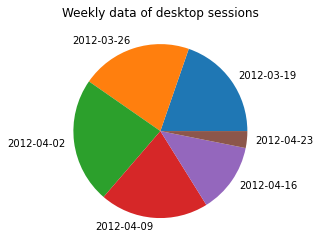

In [102]:
import matplotlib.pyplot as plt
plt.pie(x['desktop_sessions'], labels=x['week_start_date'])
plt.title("Weekly data of desktop sessions")
plt.show()

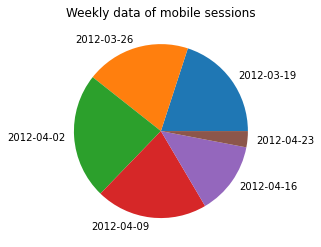

In [103]:
import matplotlib.pyplot as plt
plt.pie(x['mobile_sessions'], labels=x['week_start_date'])
plt.title("Weekly data of mobile sessions")
plt.show()

In [104]:
y=pd.read_excel("click_rates.xlsx")
len(y)

2

In [105]:
y

,Unnamed: 0,Sessions,to_products,to_mrfuzzy,to_cart,to_shipping,to_billing,to_thankyou
0,0,saw_homepage,2497,966,685,294,198,157
1,1,uh oh... check logic,2372,0,0,0,0,0


In [106]:
y.drop(["Unnamed: 0"], axis=1, inplace=True)
y.columns

Index(['Sessions', 'to_products', 'to_mrfuzzy', 'to_cart', 'to_shipping',
       'to_billing', 'to_thankyou'],
      dtype='object')

In [107]:
data=y.iloc[0,1:]
data

to_products    2497
to_mrfuzzy      966
to_cart         685
to_shipping     294
to_billing      198
to_thankyou     157
Name: 0, dtype: object

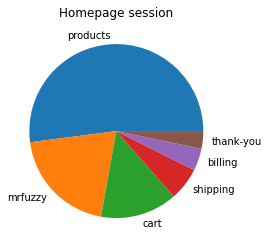

In [109]:
label=['products','mrfuzzy','cart','shipping','billing','thank-you']
plt.pie(data, labels=label)
plt.title("Homepage session")
plt.show()

In [110]:
z=pd.read_excel("traffic_breakdown.xlsx")
len(z)

6

In [111]:
z

,Unnamed: 0,utm source,utm_campaign,http_referer,sessions
0,0,gsearch,nonbrand,https://www.gsearch.com,4869
1,1,gsearch,brand,https://www.gsearch.com,57
2,2,NaN,NaN,NaN,39
3,3,NaN,NaN,https://www.gsearch.com,13
4,4,bsearch,brand,https://www.bsearch.com,13
5,5,NaN,NaN,https://www.bsearch.com,9


In [112]:
z.drop(["Unnamed: 0"],axis=1,inplace=True)
z.columns

Index(['utm source', 'utm_campaign', 'http_referer', 'sessions'], dtype='object')

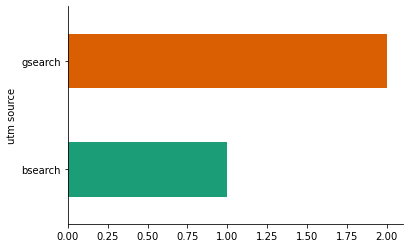

In [113]:
from matplotlib import pyplot as plt
import seaborn as sns
z.groupby('utm source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# APRIORI ALGORITHM

In [142]:
#import the dataset
x1=pd.read_excel("website_sessions.xlsx")
len(x1)

5000

In [143]:
#top 10 rows of the data
x1.head(10)

,Unnamed: 0,website_session_id,created_at,user_id,is_repeat_session,utm_source,utm_content,utm_campaign,device_type,http_referer
0,0,1,2012-03-19 08:04:16,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
1,1,2,2012-03-19 08:16:49,2,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
2,2,3,2012-03-19 08:26:55,3,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
3,3,4,2012-03-19 08:37:33,4,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
4,4,5,2012-03-19 09:00:55,5,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
5,5,6,2012-03-19 09:05:46,6,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
6,6,7,2012-03-19 09:06:27,7,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
7,7,8,2012-03-19 09:17:17,8,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
8,8,9,2012-03-19 09:27:56,9,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
9,9,10,2012-03-19 09:35:37,10,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com


In [144]:
#drop unwanted columns from the dataset
list1=["Unnamed: 0", "website_session_id", "created_at", "user_id", "is_repeat_session"]
x1.drop(list1,axis=1,inplace=True)

In [145]:
#check current columns
x1.columns

Index(['utm_source', 'utm_content', 'utm_campaign', 'device_type',
       'http_referer'],
      dtype='object')

In [146]:
#import necessary libraries
import pandas as pd
import numpy as np
from itertools import combinations

In [119]:
#top five rows of the data
x1.head()

,utm_source,utm_content,utm_campaign,device_type,http_referer
0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
1,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
2,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
3,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
4,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com


In [120]:
#number of rows and columns
x1.shape

(5000, 5)

In [147]:
#get minimum support from user
Candidate_set = []
Frequent_set = []
items = pd.unique(x1.values.ravel('K'))
items = items[~pd.isnull(items)]
min_support = int(input("Enter Min Support:")) #Input from user

Enter Min Support:7


In [122]:
len(items)

12

In [123]:
items

array(['gsearch', 'bsearch', 'nonbrand', 'brand', 'g_ad_1', 'g_ad_2',
       'b_ad_2', 'b_ad_1', 'mobile', 'desktop', 'https://www.gsearch.com',
       'https://www.bsearch.com'], dtype=object)

In [148]:
#apply apriori to get the frequent set of items
for iterno in range(1,len(items)): #Max iterations is equal to length of max set possible i.e. #items in the dataset
    Count = {}
    intermediate = []

    if iterno==1:
        Candidate_set.append(items)
        for txn in Candidate_set[iterno-1]:
            ctr=0
            for val in x1.values:
                if txn in val:
                    ctr+=1
            Count[txn] = ctr
    else:
        Candidate_set.append(list(combinations(np.unique(np.array(Frequent_set[iterno-2]).ravel('K')),iterno)))
        for txn in Candidate_set[iterno-1]:
            ctr = 0
            for val in x1.values:
                if all(i in val for i in txn):
                    ctr+=1
            Count[txn] = ctr

    for k in Count.keys():
        if Count[k] >= min_support:
            intermediate.append(k)

    if intermediate == []:
        print(Frequent_set)
        break
        print("\n")

    Frequent_set.append(intermediate)

[['gsearch', 'bsearch', 'nonbrand', 'brand', 'g_ad_1', 'g_ad_2', 'b_ad_2', 'mobile', 'desktop', 'https://www.gsearch.com', 'https://www.bsearch.com'], [('b_ad_2', 'brand'), ('b_ad_2', 'bsearch'), ('b_ad_2', 'desktop'), ('b_ad_2', 'https://www.bsearch.com'), ('brand', 'bsearch'), ('brand', 'desktop'), ('brand', 'g_ad_2'), ('brand', 'gsearch'), ('brand', 'https://www.bsearch.com'), ('brand', 'https://www.gsearch.com'), ('brand', 'mobile'), ('bsearch', 'desktop'), ('bsearch', 'https://www.bsearch.com'), ('desktop', 'g_ad_1'), ('desktop', 'g_ad_2'), ('desktop', 'gsearch'), ('desktop', 'https://www.bsearch.com'), ('desktop', 'https://www.gsearch.com'), ('desktop', 'nonbrand'), ('g_ad_1', 'gsearch'), ('g_ad_1', 'https://www.gsearch.com'), ('g_ad_1', 'mobile'), ('g_ad_1', 'nonbrand'), ('g_ad_2', 'gsearch'), ('g_ad_2', 'https://www.gsearch.com'), ('g_ad_2', 'mobile'), ('gsearch', 'https://www.gsearch.com'), ('gsearch', 'mobile'), ('gsearch', 'nonbrand'), ('https://www.gsearch.com', 'mobile'), 

In [125]:
Frequent_set

[['gsearch',
  'bsearch',
  'nonbrand',
  'brand',
  'g_ad_1',
  'g_ad_2',
  'b_ad_2',
  'mobile',
  'desktop',
  'https://www.gsearch.com',
  'https://www.bsearch.com'],
 [('b_ad_2', 'brand'),
  ('b_ad_2', 'bsearch'),
  ('b_ad_2', 'desktop'),
  ('b_ad_2', 'https://www.bsearch.com'),
  ('brand', 'bsearch'),
  ('brand', 'desktop'),
  ('brand', 'g_ad_2'),
  ('brand', 'gsearch'),
  ('brand', 'https://www.bsearch.com'),
  ('brand', 'https://www.gsearch.com'),
  ('brand', 'mobile'),
  ('bsearch', 'desktop'),
  ('bsearch', 'https://www.bsearch.com'),
  ('desktop', 'g_ad_1'),
  ('desktop', 'g_ad_2'),
  ('desktop', 'gsearch'),
  ('desktop', 'https://www.bsearch.com'),
  ('desktop', 'https://www.gsearch.com'),
  ('desktop', 'nonbrand'),
  ('g_ad_1', 'gsearch'),
  ('g_ad_1', 'https://www.gsearch.com'),
  ('g_ad_1', 'mobile'),
  ('g_ad_1', 'nonbrand'),
  ('g_ad_2', 'gsearch'),
  ('g_ad_2', 'https://www.gsearch.com'),
  ('g_ad_2', 'mobile'),
  ('gsearch', 'https://www.gsearch.com'),
  ('gsearch', 

# THANK YOU!!